In [1]:
# Libraries
library(stringr)
library(tidyr)
library(dplyr)
library(ggplot2)


Attaching package: ‘dplyr’


The following objects are masked from ‘package:stats’:

    filter, lag


The following objects are masked from ‘package:base’:

    intersect, setdiff, setequal, union




In [2]:
## Adjust PATH
wd <- getwd()
subdir <- "/bin" # should be 'scripts' if location is ./scripts/thisfile
if (endsWith(wd, subdir)) {
    wd <- str_remove(wd, subdir)
    setwd(wd)
}
getwd()

[1] "/projects/health_sciences/bms/microbiology/fineranlab/arabinosylation-anti-CRISPR"

In [3]:
# Variables
in_file <- 'refseq.txt'

url <- list(
    refseq = 'ftp://ftp.ncbi.nlm.nih.gov/genomes/refseq/bacteria/assembly_summary.txt',
    genbank = 'ftp://ftp.ncbi.nlm.nih.gov/genomes/genbank/assembly_summary_genbank.txt'
)

out_path <- paste0('data/collection_refseq-genbank','/')
# out_path <- paste0('data/collection_refseq-genbank_',Sys.Date(),'/')
dir.create(out_path)
print(out_path)

Warning message in dir.create(out_path):
“'data/collection_refseq-genbank' already exists”


[1] "data/collection_refseq-genbank/"


In [4]:
# Download and read files
options(timeout=1e6)

if (!exists('ov')) {

    # Create overview
    ov <- list()
    
    ## Iterate over URLs
    for (i in names(url)) {
        fn <- paste0(out_path,i,'_assembly_summary.txt')
        if (!file.exists(fn)) {
            print(paste('Fetch DB: ',i))
            download.file(url[[i]], fn)
        }
        print(paste('Reading DB summary for: ',i))
        ov[[i]] <- read.delim(fn, skip=1, quote="")
        ov[[i]][['db']] <- i
    }

    # Combine across DBs
    if (is.list(ov)) {
        ov <- do.call('rbind', ov)
    }
    
}

[1] "Reading DB summary for:  refseq"
[1] "Reading DB summary for:  genbank"


In [5]:
# View
dim(ov)
rbind(head(ov,3),tail(ov,3))
names(ov)

[1] 3114281      39

,X.assembly_accession,bioproject,biosample,wgs_master,refseq_category,taxid,species_taxid,organism_name,infraspecific_name,isolate,⋯,scaffold_count,contig_count,annotation_provider,annotation_name,annotation_date,total_gene_count,protein_coding_gene_count,non_coding_gene_count,pubmed_id,db
,<chr>,<chr>,<chr>,<chr>,<chr>,<int>,<int>,<chr>,<chr>,<chr>,⋯,<int>,<int>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>
refseq.1,GCF_036600855.1,PRJNA224116,SAMN38772065,JBAFXD000000000.1,na,7,7,Azorhizobium caulinodans,strain=CNM20190194,na,⋯,171,171,NCBI RefSeq,NCBI Prokaryotic Genome Annotation Pipeline (PGAP),2024-02-14,5320,5174,58,na,refseq
refseq.2,GCF_036600875.1,PRJNA224116,SAMN38772066,JBAFXC000000000.1,na,7,7,Azorhizobium caulinodans,strain=CNM20190462,na,⋯,171,171,NCBI RefSeq,NCBI Prokaryotic Genome Annotation Pipeline (PGAP),2024-02-15,5266,5119,58,na,refseq
refseq.3,GCF_036600895.1,PRJNA224116,SAMN38772064,JBAFXE000000000.1,na,7,7,Azorhizobium caulinodans,strain=CNM20190156,na,⋯,260,260,NCBI RefSeq,NCBI Prokaryotic Genome Annotation Pipeline (PGAP),2024-02-14,5339,5187,58,na,refseq
genbank.2716468,GCA_964513795.1,PRJEB21331,SAMEA117399223,CAZEQR000000000.1,na,1820334,1820334,Tenacibaculum sediminilitoris,na,YKTF-3(T),⋯,51,51,INRA,Annotation submitted by INRA,2024-12-08,2779,2669,51,na,genbank
genbank.2716469,GCA_964513915.1,PRJEB21331,SAMEA117399222,CAZEQS000000000.1,na,321269,321269,Tenacibaculum litoreum,na,CL-TF13(T),⋯,4,4,INRA,Annotation submitted by INRA,2024-12-08,3140,3064,70,na,genbank
genbank.2716470,GCA_964514025.1,PRJEB21331,SAMEA117399221,CAZEQT000000000.1,na,396016,396016,Tenacibaculum litopenaei,na,B-I(T),⋯,10,10,INRA,Annotation submitted by INRA,2024-12-08,4099,4010,58,na,genbank


[1] "X.assembly_accession"      "bioproject"               
 [3] "biosample"                 "wgs_master"               
 [5] "refseq_category"           "taxid"                    
 [7] "species_taxid"             "organism_name"            
 [9] "infraspecific_name"        "isolate"                  
[11] "version_status"            "assembly_level"           
[13] "release_type"              "genome_rep"               
[15] "seq_rel_date"              "asm_name"                 
[17] "asm_submitter"             "gbrs_paired_asm"          
[19] "paired_asm_comp"           "ftp_path"                 
[21] "excluded_from_refseq"      "relation_to_type_material"
[23] "asm_not_live_date"         "assembly_type"            
[25] "group"                     "genome_size"              
[27] "genome_size_ungapped"      "gc_percent"               
[29] "replicon_count"            "scaffold_count"           
[31] "contig_count"              "annotation_provider"      
[33] "annotation_name"           "annotation_date"          
[35] "total_gene_count"          "protein_coding_gene_count"
[37] "non_coding_gene_count"     "pubmed_id"                
[39] "db"

Warning message in scale_y_continuous(trans = "log10"):
“log-10 transformation introduced infinite values.”
Warning message:
“Removed 866 rows containing missing values or values outside the scale range
(`geom_bar()`).”


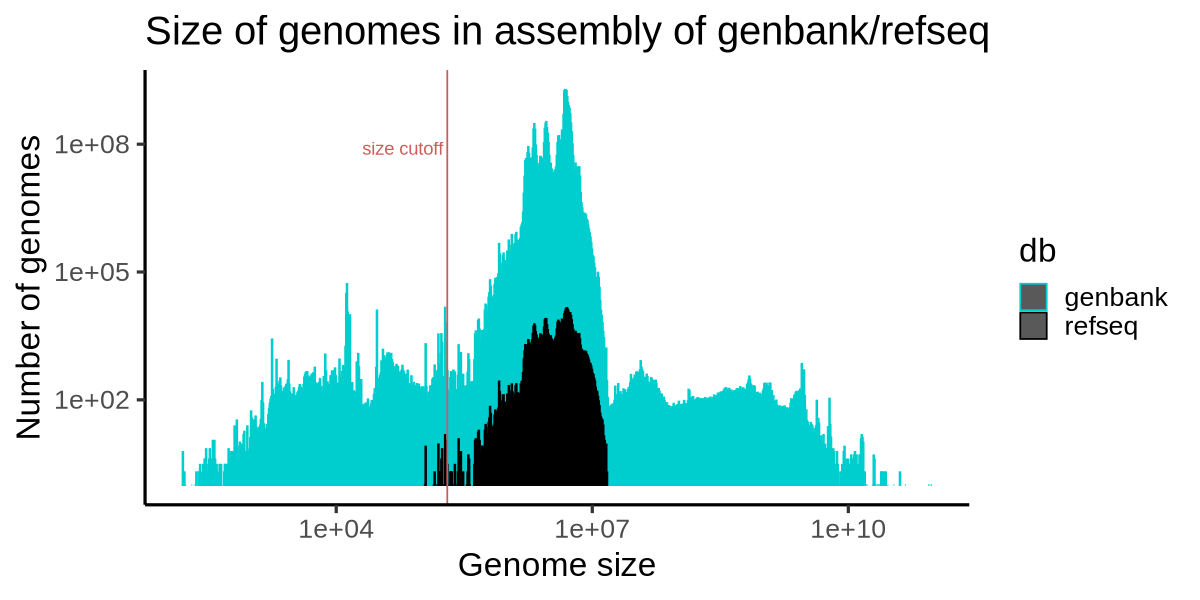

In [6]:
# Check genome size
options(repr.plot.width=10, repr.plot.height=5)

## Set limit for phage genome size
max_phage_size <- 2e5

## Plot
ggplot(ov, aes(genome_size, col=db)) +
  geom_histogram(bins=1000) +
  scale_color_manual(values=c('cyan3','black')) +
  scale_x_continuous(trans='log10') +
  scale_y_continuous(trans='log10') +
  geom_vline(xintercept = max_phage_size, col = 'indianred') +
  theme_classic(20) +
  annotate('text', x=6e4, y=8e7, label='size cutoff', col='indianred') +
  labs(title='Size of genomes in assembly of genbank/refseq', x='Genome size', y='Number of genomes')

In [7]:
# Select
index <- list()

## Size
index$size <- ov$genome_size <= max_phage_size
table(index$size)

## Name
index$name <- str_detect(ov$organism_name, ' phage ')
table(index$name)


  FALSE    TRUE 
2904485  209796 


  FALSE    TRUE 
3092708   21573 

In [8]:
# Filter
sel <- ov[index$name, ]

Warning message in scale_y_continuous(trans = "log10"):
“log-10 transformation introduced infinite values.”
Warning message:
“Removed 427 rows containing missing values or values outside the scale range
(`geom_bar()`).”


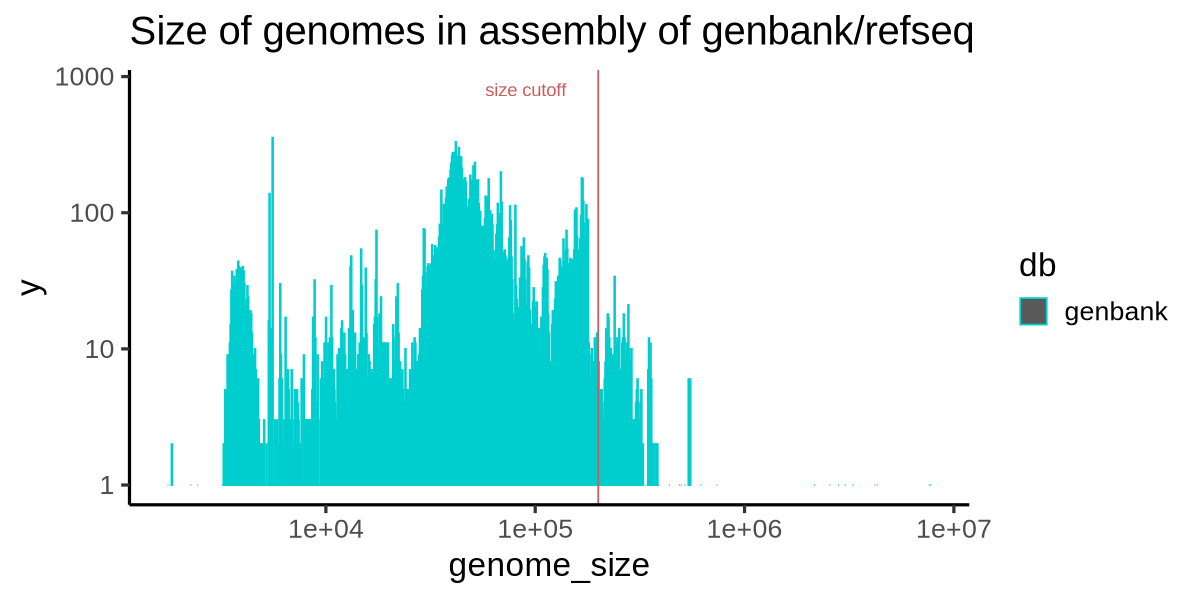

In [9]:
# Check genome size
options(repr.plot.width=10, repr.plot.height=5)

## Set limit for phage genome size
max_phage_size <- 2e5

## Plot
ggplot(sel, aes(genome_size, col=db)) +
  geom_histogram(bins=1000) +
  scale_color_manual(values=c('cyan3','black')) +
  scale_x_continuous(trans='log10') +
  scale_y_continuous(trans='log10') +
  geom_vline(xintercept = max_phage_size, col = 'indianred') +
  theme_classic(20) +
  annotate('text', x=9e4, y=8e2, label='size cutoff', col='indianred') +
  labs(title='Size of genomes in assembly of genbank/refseq')

In [10]:
# Check duplicate entries
any(duplicated(sel$organism_name))

[1] TRUE

In [11]:
# Export IDs

## should be turned into function ...

## Check PATH
index$ftp <- !is.na(sel$ftp_path)
message('FTP path present?')
as.list(table(index$ftp))
if (any(index$ftp)) {
    sel <- sel[index$ftp, ]
}

## Select components
component <- c(
    'genome' = 'genomic.fna.gz',
    'annotation' = 'genomic.gff.gz',
    'protein' = 'protein.faa.gz',
    'features' = 'feature_table.txt.gz',
    'genbank' = 'genomic.gbff.gz'
)

## Create FTP table
ftp <- list()
for (i in names(component)) {
    ftp_name <- gsub(".*/(GC[FA]_)","\\1",sel$ftp_path) ## sure? : str_split(sel$ftp_path, '\\/', simplify=TRUE)[, last]
    ftp[[i]] <- data.frame(
        row.names = 1:nrow(sel),
        'assembly.accession' = sel$X.assembly_accession,
        'component' = i,
        'ftp.path' = paste0(sel$ftp_path,'/',ftp_name,'_',component[[i]]),
        'file.path' = paste0(out_path,i,'/',sel$X.assembly_accession,'_',component[[i]])
    )
}
ftp <- do.call('rbind', ftp)
#row.names(ftp) <- paste(ftp$assembly.accession, ftp$component, sep = '--')

## Create N parts (for parallel processing, max. 12 NCBI queries)
n_parts <- 2
ftp$part <- sample(1:n_parts, nrow(ftp), replace=TRUE)

## Check which files already exist
ftp$on.disk <- file.exists(ftp$file.path)
message('Files present?')
as.list(table(ftp$on.disk))

## View
rbind(head(ftp,3),tail(ftp,3))

FTP path present?



$`TRUE`
[1] 21573

Files present?



$`FALSE`
[1] 7198

$`TRUE`
[1] 100667

,assembly.accession,component,ftp.path,file.path,part,on.disk
,<chr>,<chr>,<chr>,<chr>,<int>,<lgl>
genome.1,GCA_000819615.1,genome,https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/000/819/615/GCA_000819615.1_ViralProj14015/GCA_000819615.1_ViralProj14015_genomic.fna.gz,data/collection_refseq-genbank/genome/GCA_000819615.1_genomic.fna.gz,1,TRUE
genome.2,GCA_000836805.1,genome,https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/000/836/805/GCA_000836805.1_ViralProj14012/GCA_000836805.1_ViralProj14012_genomic.fna.gz,data/collection_refseq-genbank/genome/GCA_000836805.1_genomic.fna.gz,1,TRUE
genome.3,GCA_000836925.1,genome,https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/000/836/925/GCA_000836925.1_ViralProj14039/GCA_000836925.1_ViralProj14039_genomic.fna.gz,data/collection_refseq-genbank/genome/GCA_000836925.1_genomic.fna.gz,2,TRUE
genbank.21571,GCA_964186595.1,genbank,https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/964/186/595/GCA_964186595.1_vB_AbaM_AB-Navy-v2/GCA_964186595.1_vB_AbaM_AB-Navy-v2_genomic.gbff.gz,data/collection_refseq-genbank/genbank/GCA_964186595.1_genomic.gbff.gz,2,FALSE
genbank.21572,GCA_964186605.1,genbank,https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/964/186/605/GCA_964186605.1_vB_AbaP_Fanak/GCA_964186605.1_vB_AbaP_Fanak_genomic.gbff.gz,data/collection_refseq-genbank/genbank/GCA_964186605.1_genomic.gbff.gz,1,FALSE
genbank.21573,GCA_964186635.1,genbank,https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/964/186/635/GCA_964186635.1_Salten/GCA_964186635.1_Salten_genomic.gbff.gz,data/collection_refseq-genbank/genbank/GCA_964186635.1_genomic.gbff.gz,1,FALSE


In [12]:
# Download files
options(timeout=1e6)

## cURL
ids <- ftp[!ftp$on.disk, ]
for (n in 1:nrow(ids)) {
    try(download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]))
}

Warning message in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]):
“cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/000/836/805/GCA_000836805.1_ViralProj14012/GCA_000836805.1_ViralProj14012_genomic.gff.gz': HTTP status was '404 Not Found'”


Error in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]) : 
  cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/000/836/805/GCA_000836805.1_ViralProj14012/GCA_000836805.1_ViralProj14012_genomic.gff.gz'


Warning message in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]):
“cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/000/843/805/GCA_000843805.1_ViralProj14420/GCA_000843805.1_ViralProj14420_genomic.gff.gz': HTTP status was '404 Not Found'”


Error in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]) : 
  cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/000/843/805/GCA_000843805.1_ViralProj14420/GCA_000843805.1_ViralProj14420_genomic.gff.gz'


Warning message in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]):
“cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/000/864/505/GCA_000864505.1_ViralProj16384/GCA_000864505.1_ViralProj16384_genomic.gff.gz': HTTP status was '404 Not Found'”


Error in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]) : 
  cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/000/864/505/GCA_000864505.1_ViralProj16384/GCA_000864505.1_ViralProj16384_genomic.gff.gz'


Warning message in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]):
“cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/000/864/525/GCA_000864525.1_ViralProj16388/GCA_000864525.1_ViralProj16388_genomic.gff.gz': HTTP status was '404 Not Found'”


Error in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]) : 
  cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/000/864/525/GCA_000864525.1_ViralProj16388/GCA_000864525.1_ViralProj16388_genomic.gff.gz'


Warning message in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]):
“cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/000/865/465/GCA_000865465.1_ViralProj16383/GCA_000865465.1_ViralProj16383_genomic.gff.gz': HTTP status was '404 Not Found'”


Error in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]) : 
  cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/000/865/465/GCA_000865465.1_ViralProj16383/GCA_000865465.1_ViralProj16383_genomic.gff.gz'


Warning message in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]):
“cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/000/865/485/GCA_000865485.1_ViralProj16387/GCA_000865485.1_ViralProj16387_genomic.gff.gz': HTTP status was '404 Not Found'”


Error in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]) : 
  cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/000/865/485/GCA_000865485.1_ViralProj16387/GCA_000865485.1_ViralProj16387_genomic.gff.gz'


Warning message in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]):
“cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/000/866/225/GCA_000866225.1_ViralProj16385/GCA_000866225.1_ViralProj16385_genomic.gff.gz': HTTP status was '404 Not Found'”


Error in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]) : 
  cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/000/866/225/GCA_000866225.1_ViralProj16385/GCA_000866225.1_ViralProj16385_genomic.gff.gz'


Warning message in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]):
“cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/000/867/045/GCA_000867045.1_ViralProj16386/GCA_000867045.1_ViralProj16386_genomic.gff.gz': HTTP status was '404 Not Found'”


Error in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]) : 
  cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/000/867/045/GCA_000867045.1_ViralProj16386/GCA_000867045.1_ViralProj16386_genomic.gff.gz'


Warning message in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]):
“cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/000/955/335/GCA_000955335.1_ViralProj276857/GCA_000955335.1_ViralProj276857_genomic.gff.gz': HTTP status was '404 Not Found'”


Error in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]) : 
  cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/000/955/335/GCA_000955335.1_ViralProj276857/GCA_000955335.1_ViralProj276857_genomic.gff.gz'


Warning message in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]):
“cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/001/041/395/GCA_001041395.1_ViralProj287962/GCA_001041395.1_ViralProj287962_genomic.gff.gz': HTTP status was '404 Not Found'”


Error in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]) : 
  cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/001/041/395/GCA_001041395.1_ViralProj287962/GCA_001041395.1_ViralProj287962_genomic.gff.gz'


Warning message in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]):
“cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/002/091/415/GCA_002091415.1_ASM209141v1/GCA_002091415.1_ASM209141v1_genomic.gff.gz': HTTP status was '404 Not Found'”


Error in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]) : 
  cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/002/091/415/GCA_002091415.1_ASM209141v1/GCA_002091415.1_ASM209141v1_genomic.gff.gz'


Warning message in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]):
“cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/002/091/435/GCA_002091435.1_ASM209143v1/GCA_002091435.1_ASM209143v1_genomic.gff.gz': HTTP status was '404 Not Found'”


Error in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]) : 
  cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/002/091/435/GCA_002091435.1_ASM209143v1/GCA_002091435.1_ASM209143v1_genomic.gff.gz'


Warning message in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]):
“cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/002/091/455/GCA_002091455.1_ASM209145v1/GCA_002091455.1_ASM209145v1_genomic.gff.gz': HTTP status was '404 Not Found'”


Error in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]) : 
  cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/002/091/455/GCA_002091455.1_ASM209145v1/GCA_002091455.1_ASM209145v1_genomic.gff.gz'


Warning message in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]):
“cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/002/585/465/GCA_002585465.1_ASM258546v1/GCA_002585465.1_ASM258546v1_genomic.gff.gz': HTTP status was '404 Not Found'”


Error in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]) : 
  cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/002/585/465/GCA_002585465.1_ASM258546v1/GCA_002585465.1_ASM258546v1_genomic.gff.gz'


Warning message in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]):
“cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/002/585/505/GCA_002585505.1_ASM258550v1/GCA_002585505.1_ASM258550v1_genomic.gff.gz': HTTP status was '404 Not Found'”


Error in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]) : 
  cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/002/585/505/GCA_002585505.1_ASM258550v1/GCA_002585505.1_ASM258550v1_genomic.gff.gz'


Warning message in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]):
“cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/002/585/555/GCA_002585555.1_ASM258555v1/GCA_002585555.1_ASM258555v1_genomic.gff.gz': HTTP status was '404 Not Found'”


Error in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]) : 
  cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/002/585/555/GCA_002585555.1_ASM258555v1/GCA_002585555.1_ASM258555v1_genomic.gff.gz'


Warning message in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]):
“cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/002/585/585/GCA_002585585.1_ASM258558v1/GCA_002585585.1_ASM258558v1_genomic.gff.gz': HTTP status was '404 Not Found'”


Error in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]) : 
  cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/002/585/585/GCA_002585585.1_ASM258558v1/GCA_002585585.1_ASM258558v1_genomic.gff.gz'


Warning message in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]):
“cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/002/585/655/GCA_002585655.1_ASM258565v1/GCA_002585655.1_ASM258565v1_genomic.gff.gz': HTTP status was '404 Not Found'”


Error in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]) : 
  cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/002/585/655/GCA_002585655.1_ASM258565v1/GCA_002585655.1_ASM258565v1_genomic.gff.gz'


Warning message in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]):
“cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/002/585/745/GCA_002585745.1_ASM258574v1/GCA_002585745.1_ASM258574v1_genomic.gff.gz': HTTP status was '404 Not Found'”


Error in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]) : 
  cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/002/585/745/GCA_002585745.1_ASM258574v1/GCA_002585745.1_ASM258574v1_genomic.gff.gz'


Warning message in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]):
“cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/002/585/775/GCA_002585775.1_ASM258577v1/GCA_002585775.1_ASM258577v1_genomic.gff.gz': HTTP status was '404 Not Found'”


Error in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]) : 
  cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/002/585/775/GCA_002585775.1_ASM258577v1/GCA_002585775.1_ASM258577v1_genomic.gff.gz'


Warning message in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]):
“cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/002/585/855/GCA_002585855.1_ASM258585v1/GCA_002585855.1_ASM258585v1_genomic.gff.gz': HTTP status was '404 Not Found'”


Error in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]) : 
  cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/002/585/855/GCA_002585855.1_ASM258585v1/GCA_002585855.1_ASM258585v1_genomic.gff.gz'


Warning message in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]):
“cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/002/585/885/GCA_002585885.1_ASM258588v1/GCA_002585885.1_ASM258588v1_genomic.gff.gz': HTTP status was '404 Not Found'”


Error in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]) : 
  cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/002/585/885/GCA_002585885.1_ASM258588v1/GCA_002585885.1_ASM258588v1_genomic.gff.gz'


Warning message in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]):
“cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/002/585/915/GCA_002585915.1_ASM258591v1/GCA_002585915.1_ASM258591v1_genomic.gff.gz': HTTP status was '404 Not Found'”


Error in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]) : 
  cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/002/585/915/GCA_002585915.1_ASM258591v1/GCA_002585915.1_ASM258591v1_genomic.gff.gz'


Warning message in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]):
“cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/002/585/965/GCA_002585965.1_ASM258596v1/GCA_002585965.1_ASM258596v1_genomic.gff.gz': HTTP status was '404 Not Found'”


Error in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]) : 
  cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/002/585/965/GCA_002585965.1_ASM258596v1/GCA_002585965.1_ASM258596v1_genomic.gff.gz'


Warning message in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]):
“cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/002/585/995/GCA_002585995.1_ASM258599v1/GCA_002585995.1_ASM258599v1_genomic.gff.gz': HTTP status was '404 Not Found'”


Error in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]) : 
  cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/002/585/995/GCA_002585995.1_ASM258599v1/GCA_002585995.1_ASM258599v1_genomic.gff.gz'


Warning message in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]):
“cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/002/586/025/GCA_002586025.1_ASM258602v1/GCA_002586025.1_ASM258602v1_genomic.gff.gz': HTTP status was '404 Not Found'”


Error in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]) : 
  cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/002/586/025/GCA_002586025.1_ASM258602v1/GCA_002586025.1_ASM258602v1_genomic.gff.gz'


Warning message in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]):
“cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/002/586/055/GCA_002586055.1_ASM258605v1/GCA_002586055.1_ASM258605v1_genomic.gff.gz': HTTP status was '404 Not Found'”


Error in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]) : 
  cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/002/586/055/GCA_002586055.1_ASM258605v1/GCA_002586055.1_ASM258605v1_genomic.gff.gz'


Warning message in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]):
“cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/002/586/235/GCA_002586235.1_ASM258623v1/GCA_002586235.1_ASM258623v1_genomic.gff.gz': HTTP status was '404 Not Found'”


Error in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]) : 
  cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/002/586/235/GCA_002586235.1_ASM258623v1/GCA_002586235.1_ASM258623v1_genomic.gff.gz'


Warning message in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]):
“cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/002/586/385/GCA_002586385.1_ASM258638v1/GCA_002586385.1_ASM258638v1_genomic.gff.gz': HTTP status was '404 Not Found'”


Error in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]) : 
  cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/002/586/385/GCA_002586385.1_ASM258638v1/GCA_002586385.1_ASM258638v1_genomic.gff.gz'


Warning message in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]):
“cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/002/587/645/GCA_002587645.1_ASM258764v1/GCA_002587645.1_ASM258764v1_genomic.gff.gz': HTTP status was '404 Not Found'”


Error in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]) : 
  cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/002/587/645/GCA_002587645.1_ASM258764v1/GCA_002587645.1_ASM258764v1_genomic.gff.gz'


Warning message in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]):
“cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/002/587/745/GCA_002587745.1_ASM258774v1/GCA_002587745.1_ASM258774v1_genomic.gff.gz': HTTP status was '404 Not Found'”


Error in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]) : 
  cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/002/587/745/GCA_002587745.1_ASM258774v1/GCA_002587745.1_ASM258774v1_genomic.gff.gz'


Warning message in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]):
“cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/002/587/765/GCA_002587765.1_ASM258776v1/GCA_002587765.1_ASM258776v1_genomic.gff.gz': HTTP status was '404 Not Found'”


Error in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]) : 
  cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/002/587/765/GCA_002587765.1_ASM258776v1/GCA_002587765.1_ASM258776v1_genomic.gff.gz'


Warning message in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]):
“cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/002/587/785/GCA_002587785.1_ASM258778v1/GCA_002587785.1_ASM258778v1_genomic.gff.gz': HTTP status was '404 Not Found'”


Error in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]) : 
  cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/002/587/785/GCA_002587785.1_ASM258778v1/GCA_002587785.1_ASM258778v1_genomic.gff.gz'


Warning message in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]):
“cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/002/588/715/GCA_002588715.1_ASM258871v1/GCA_002588715.1_ASM258871v1_genomic.gff.gz': HTTP status was '404 Not Found'”


Error in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]) : 
  cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/002/588/715/GCA_002588715.1_ASM258871v1/GCA_002588715.1_ASM258871v1_genomic.gff.gz'


Warning message in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]):
“cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/002/588/755/GCA_002588755.1_ASM258875v1/GCA_002588755.1_ASM258875v1_genomic.gff.gz': HTTP status was '404 Not Found'”


Error in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]) : 
  cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/002/588/755/GCA_002588755.1_ASM258875v1/GCA_002588755.1_ASM258875v1_genomic.gff.gz'


Warning message in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]):
“cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/002/588/855/GCA_002588855.1_ASM258885v1/GCA_002588855.1_ASM258885v1_genomic.gff.gz': HTTP status was '404 Not Found'”


Error in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]) : 
  cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/002/588/855/GCA_002588855.1_ASM258885v1/GCA_002588855.1_ASM258885v1_genomic.gff.gz'


Warning message in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]):
“cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/002/597/205/GCA_002597205.1_ASM259720v1/GCA_002597205.1_ASM259720v1_genomic.gff.gz': HTTP status was '404 Not Found'”


Error in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]) : 
  cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/002/597/205/GCA_002597205.1_ASM259720v1/GCA_002597205.1_ASM259720v1_genomic.gff.gz'


Warning message in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]):
“cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/002/603/865/GCA_002603865.1_ASM260386v1/GCA_002603865.1_ASM260386v1_genomic.gff.gz': HTTP status was '404 Not Found'”


Error in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]) : 
  cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/002/603/865/GCA_002603865.1_ASM260386v1/GCA_002603865.1_ASM260386v1_genomic.gff.gz'


Warning message in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]):
“cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/002/603/885/GCA_002603885.1_ASM260388v1/GCA_002603885.1_ASM260388v1_genomic.gff.gz': HTTP status was '404 Not Found'”


Error in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]) : 
  cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/002/603/885/GCA_002603885.1_ASM260388v1/GCA_002603885.1_ASM260388v1_genomic.gff.gz'


Warning message in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]):
“cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/002/603/905/GCA_002603905.1_ASM260390v1/GCA_002603905.1_ASM260390v1_genomic.gff.gz': HTTP status was '404 Not Found'”


Error in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]) : 
  cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/002/603/905/GCA_002603905.1_ASM260390v1/GCA_002603905.1_ASM260390v1_genomic.gff.gz'


Warning message in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]):
“cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/002/603/925/GCA_002603925.1_ASM260392v1/GCA_002603925.1_ASM260392v1_genomic.gff.gz': HTTP status was '404 Not Found'”


Error in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]) : 
  cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/002/603/925/GCA_002603925.1_ASM260392v1/GCA_002603925.1_ASM260392v1_genomic.gff.gz'


Warning message in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]):
“cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/002/603/945/GCA_002603945.1_ASM260394v1/GCA_002603945.1_ASM260394v1_genomic.gff.gz': HTTP status was '404 Not Found'”


Error in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]) : 
  cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/002/603/945/GCA_002603945.1_ASM260394v1/GCA_002603945.1_ASM260394v1_genomic.gff.gz'


Warning message in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]):
“cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/002/603/965/GCA_002603965.1_ASM260396v1/GCA_002603965.1_ASM260396v1_genomic.gff.gz': HTTP status was '404 Not Found'”


Error in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]) : 
  cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/002/603/965/GCA_002603965.1_ASM260396v1/GCA_002603965.1_ASM260396v1_genomic.gff.gz'


Warning message in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]):
“cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/002/604/565/GCA_002604565.1_ASM260456v1/GCA_002604565.1_ASM260456v1_genomic.gff.gz': HTTP status was '404 Not Found'”


Error in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]) : 
  cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/002/604/565/GCA_002604565.1_ASM260456v1/GCA_002604565.1_ASM260456v1_genomic.gff.gz'


Warning message in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]):
“cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/002/608/965/GCA_002608965.1_ASM260896v1/GCA_002608965.1_ASM260896v1_genomic.gff.gz': HTTP status was '404 Not Found'”


Error in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]) : 
  cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/002/608/965/GCA_002608965.1_ASM260896v1/GCA_002608965.1_ASM260896v1_genomic.gff.gz'


Warning message in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]):
“cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/002/609/465/GCA_002609465.1_ASM260946v1/GCA_002609465.1_ASM260946v1_genomic.gff.gz': HTTP status was '404 Not Found'”


Error in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]) : 
  cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/002/609/465/GCA_002609465.1_ASM260946v1/GCA_002609465.1_ASM260946v1_genomic.gff.gz'


Warning message in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]):
“cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/002/614/185/GCA_002614185.1_ASM261418v1/GCA_002614185.1_ASM261418v1_genomic.gff.gz': HTTP status was '404 Not Found'”


Error in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]) : 
  cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/002/614/185/GCA_002614185.1_ASM261418v1/GCA_002614185.1_ASM261418v1_genomic.gff.gz'


Warning message in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]):
“cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/002/615/625/GCA_002615625.1_ASM261562v1/GCA_002615625.1_ASM261562v1_genomic.gff.gz': HTTP status was '404 Not Found'”


Error in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]) : 
  cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/002/615/625/GCA_002615625.1_ASM261562v1/GCA_002615625.1_ASM261562v1_genomic.gff.gz'


Warning message in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]):
“cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/002/619/885/GCA_002619885.1_ASM261988v1/GCA_002619885.1_ASM261988v1_genomic.gff.gz': HTTP status was '404 Not Found'”


Error in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]) : 
  cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/002/619/885/GCA_002619885.1_ASM261988v1/GCA_002619885.1_ASM261988v1_genomic.gff.gz'


Warning message in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]):
“cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/002/619/905/GCA_002619905.1_ASM261990v1/GCA_002619905.1_ASM261990v1_genomic.gff.gz': HTTP status was '404 Not Found'”


Error in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]) : 
  cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/002/619/905/GCA_002619905.1_ASM261990v1/GCA_002619905.1_ASM261990v1_genomic.gff.gz'


Warning message in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]):
“cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/002/619/925/GCA_002619925.1_ASM261992v1/GCA_002619925.1_ASM261992v1_genomic.gff.gz': HTTP status was '404 Not Found'”


Error in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]) : 
  cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/002/619/925/GCA_002619925.1_ASM261992v1/GCA_002619925.1_ASM261992v1_genomic.gff.gz'


Warning message in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]):
“cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/002/630/085/GCA_002630085.1_ASM263008v1/GCA_002630085.1_ASM263008v1_genomic.gff.gz': HTTP status was '404 Not Found'”


Error in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]) : 
  cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/002/630/085/GCA_002630085.1_ASM263008v1/GCA_002630085.1_ASM263008v1_genomic.gff.gz'


Warning message in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]):
“cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/002/630/245/GCA_002630245.1_ASM263024v1/GCA_002630245.1_ASM263024v1_genomic.gff.gz': HTTP status was '404 Not Found'”


Error in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]) : 
  cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/002/630/245/GCA_002630245.1_ASM263024v1/GCA_002630245.1_ASM263024v1_genomic.gff.gz'


Warning message in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]):
“cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/002/630/385/GCA_002630385.1_ASM263038v1/GCA_002630385.1_ASM263038v1_genomic.gff.gz': HTTP status was '404 Not Found'”


Error in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]) : 
  cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/002/630/385/GCA_002630385.1_ASM263038v1/GCA_002630385.1_ASM263038v1_genomic.gff.gz'


Warning message in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]):
“cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/002/633/705/GCA_002633705.1_ASM263370v1/GCA_002633705.1_ASM263370v1_genomic.gff.gz': HTTP status was '404 Not Found'”


Error in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]) : 
  cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/002/633/705/GCA_002633705.1_ASM263370v1/GCA_002633705.1_ASM263370v1_genomic.gff.gz'


Warning message in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]):
“cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/002/633/725/GCA_002633725.1_ASM263372v1/GCA_002633725.1_ASM263372v1_genomic.gff.gz': HTTP status was '404 Not Found'”


Error in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]) : 
  cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/002/633/725/GCA_002633725.1_ASM263372v1/GCA_002633725.1_ASM263372v1_genomic.gff.gz'


Warning message in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]):
“cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/002/709/745/GCA_002709745.1_ASM270974v1/GCA_002709745.1_ASM270974v1_genomic.gff.gz': HTTP status was '404 Not Found'”


Error in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]) : 
  cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/002/709/745/GCA_002709745.1_ASM270974v1/GCA_002709745.1_ASM270974v1_genomic.gff.gz'


Warning message in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]):
“cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/002/709/805/GCA_002709805.1_ASM270980v1/GCA_002709805.1_ASM270980v1_genomic.gff.gz': HTTP status was '404 Not Found'”


Error in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]) : 
  cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/002/709/805/GCA_002709805.1_ASM270980v1/GCA_002709805.1_ASM270980v1_genomic.gff.gz'


Warning message in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]):
“cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/002/709/865/GCA_002709865.1_ASM270986v1/GCA_002709865.1_ASM270986v1_genomic.gff.gz': HTTP status was '404 Not Found'”


Error in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]) : 
  cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/002/709/865/GCA_002709865.1_ASM270986v1/GCA_002709865.1_ASM270986v1_genomic.gff.gz'


Warning message in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]):
“cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/002/709/885/GCA_002709885.1_ASM270988v1/GCA_002709885.1_ASM270988v1_genomic.gff.gz': HTTP status was '404 Not Found'”


Error in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]) : 
  cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/002/709/885/GCA_002709885.1_ASM270988v1/GCA_002709885.1_ASM270988v1_genomic.gff.gz'


Warning message in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]):
“cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/002/709/905/GCA_002709905.1_ASM270990v1/GCA_002709905.1_ASM270990v1_genomic.gff.gz': HTTP status was '404 Not Found'”


Error in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]) : 
  cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/002/709/905/GCA_002709905.1_ASM270990v1/GCA_002709905.1_ASM270990v1_genomic.gff.gz'


Warning message in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]):
“cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/002/709/985/GCA_002709985.1_ASM270998v1/GCA_002709985.1_ASM270998v1_genomic.gff.gz': HTTP status was '404 Not Found'”


Error in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]) : 
  cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/002/709/985/GCA_002709985.1_ASM270998v1/GCA_002709985.1_ASM270998v1_genomic.gff.gz'


Warning message in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]):
“cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/002/710/055/GCA_002710055.1_ASM271005v1/GCA_002710055.1_ASM271005v1_genomic.gff.gz': HTTP status was '404 Not Found'”


Error in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]) : 
  cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/002/710/055/GCA_002710055.1_ASM271005v1/GCA_002710055.1_ASM271005v1_genomic.gff.gz'


Warning message in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]):
“cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/002/814/475/GCA_002814475.1_ASM281447v1/GCA_002814475.1_ASM281447v1_genomic.gff.gz': HTTP status was '404 Not Found'”


Error in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]) : 
  cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/002/814/475/GCA_002814475.1_ASM281447v1/GCA_002814475.1_ASM281447v1_genomic.gff.gz'


Warning message in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]):
“cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/002/955/315/GCA_002955315.1_ASM295531v1/GCA_002955315.1_ASM295531v1_genomic.gff.gz': HTTP status was '404 Not Found'”


Error in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]) : 
  cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/002/955/315/GCA_002955315.1_ASM295531v1/GCA_002955315.1_ASM295531v1_genomic.gff.gz'


Warning message in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]):
“cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/002/956/545/GCA_002956545.1_ASM295654v1/GCA_002956545.1_ASM295654v1_genomic.gff.gz': HTTP status was '404 Not Found'”


Error in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]) : 
  cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/002/956/545/GCA_002956545.1_ASM295654v1/GCA_002956545.1_ASM295654v1_genomic.gff.gz'


Warning message in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]):
“cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/002/956/555/GCA_002956555.1_ASM295655v1/GCA_002956555.1_ASM295655v1_genomic.gff.gz': HTTP status was '404 Not Found'”


Error in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]) : 
  cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/002/956/555/GCA_002956555.1_ASM295655v1/GCA_002956555.1_ASM295655v1_genomic.gff.gz'


Warning message in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]):
“cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/002/956/565/GCA_002956565.1_ASM295656v1/GCA_002956565.1_ASM295656v1_genomic.gff.gz': HTTP status was '404 Not Found'”


Error in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]) : 
  cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/002/956/565/GCA_002956565.1_ASM295656v1/GCA_002956565.1_ASM295656v1_genomic.gff.gz'


Warning message in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]):
“cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/002/956/575/GCA_002956575.1_ASM295657v1/GCA_002956575.1_ASM295657v1_genomic.gff.gz': HTTP status was '404 Not Found'”


Error in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]) : 
  cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/002/956/575/GCA_002956575.1_ASM295657v1/GCA_002956575.1_ASM295657v1_genomic.gff.gz'


Warning message in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]):
“cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/002/956/585/GCA_002956585.1_ASM295658v1/GCA_002956585.1_ASM295658v1_genomic.gff.gz': HTTP status was '404 Not Found'”


Error in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]) : 
  cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/002/956/585/GCA_002956585.1_ASM295658v1/GCA_002956585.1_ASM295658v1_genomic.gff.gz'


Warning message in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]):
“cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/002/956/605/GCA_002956605.1_ASM295660v1/GCA_002956605.1_ASM295660v1_genomic.gff.gz': HTTP status was '404 Not Found'”


Error in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]) : 
  cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/002/956/605/GCA_002956605.1_ASM295660v1/GCA_002956605.1_ASM295660v1_genomic.gff.gz'


Warning message in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]):
“cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/002/956/615/GCA_002956615.1_ASM295661v1/GCA_002956615.1_ASM295661v1_genomic.gff.gz': HTTP status was '404 Not Found'”


Error in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]) : 
  cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/002/956/615/GCA_002956615.1_ASM295661v1/GCA_002956615.1_ASM295661v1_genomic.gff.gz'


Warning message in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]):
“cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/002/956/625/GCA_002956625.1_ASM295662v1/GCA_002956625.1_ASM295662v1_genomic.gff.gz': HTTP status was '404 Not Found'”


Error in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]) : 
  cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/002/956/625/GCA_002956625.1_ASM295662v1/GCA_002956625.1_ASM295662v1_genomic.gff.gz'


Warning message in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]):
“cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/002/956/635/GCA_002956635.1_ASM295663v1/GCA_002956635.1_ASM295663v1_genomic.gff.gz': HTTP status was '404 Not Found'”


Error in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]) : 
  cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/002/956/635/GCA_002956635.1_ASM295663v1/GCA_002956635.1_ASM295663v1_genomic.gff.gz'


Warning message in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]):
“cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/002/956/645/GCA_002956645.1_ASM295664v1/GCA_002956645.1_ASM295664v1_genomic.gff.gz': HTTP status was '404 Not Found'”


Error in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]) : 
  cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/002/956/645/GCA_002956645.1_ASM295664v1/GCA_002956645.1_ASM295664v1_genomic.gff.gz'


Warning message in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]):
“cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/002/956/655/GCA_002956655.1_ASM295665v1/GCA_002956655.1_ASM295665v1_genomic.gff.gz': HTTP status was '404 Not Found'”


Error in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]) : 
  cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/002/956/655/GCA_002956655.1_ASM295665v1/GCA_002956655.1_ASM295665v1_genomic.gff.gz'


Warning message in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]):
“cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/002/956/665/GCA_002956665.1_ASM295666v1/GCA_002956665.1_ASM295666v1_genomic.gff.gz': HTTP status was '404 Not Found'”


Error in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]) : 
  cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/002/956/665/GCA_002956665.1_ASM295666v1/GCA_002956665.1_ASM295666v1_genomic.gff.gz'


Warning message in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]):
“cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/002/956/675/GCA_002956675.1_ASM295667v1/GCA_002956675.1_ASM295667v1_genomic.gff.gz': HTTP status was '404 Not Found'”


Error in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]) : 
  cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/002/956/675/GCA_002956675.1_ASM295667v1/GCA_002956675.1_ASM295667v1_genomic.gff.gz'


Warning message in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]):
“cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/002/956/685/GCA_002956685.1_ASM295668v1/GCA_002956685.1_ASM295668v1_genomic.gff.gz': HTTP status was '404 Not Found'”


Error in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]) : 
  cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/002/956/685/GCA_002956685.1_ASM295668v1/GCA_002956685.1_ASM295668v1_genomic.gff.gz'


Warning message in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]):
“cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/002/956/695/GCA_002956695.1_ASM295669v1/GCA_002956695.1_ASM295669v1_genomic.gff.gz': HTTP status was '404 Not Found'”


Error in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]) : 
  cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/002/956/695/GCA_002956695.1_ASM295669v1/GCA_002956695.1_ASM295669v1_genomic.gff.gz'


Warning message in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]):
“cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/002/956/705/GCA_002956705.1_ASM295670v1/GCA_002956705.1_ASM295670v1_genomic.gff.gz': HTTP status was '404 Not Found'”


Error in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]) : 
  cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/002/956/705/GCA_002956705.1_ASM295670v1/GCA_002956705.1_ASM295670v1_genomic.gff.gz'


Warning message in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]):
“cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/002/956/715/GCA_002956715.1_ASM295671v1/GCA_002956715.1_ASM295671v1_genomic.gff.gz': HTTP status was '404 Not Found'”


Error in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]) : 
  cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/002/956/715/GCA_002956715.1_ASM295671v1/GCA_002956715.1_ASM295671v1_genomic.gff.gz'


Warning message in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]):
“cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/002/956/725/GCA_002956725.1_ASM295672v1/GCA_002956725.1_ASM295672v1_genomic.gff.gz': HTTP status was '404 Not Found'”


Error in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]) : 
  cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/002/956/725/GCA_002956725.1_ASM295672v1/GCA_002956725.1_ASM295672v1_genomic.gff.gz'


Warning message in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]):
“cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/002/956/735/GCA_002956735.1_ASM295673v1/GCA_002956735.1_ASM295673v1_genomic.gff.gz': HTTP status was '404 Not Found'”


Error in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]) : 
  cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/002/956/735/GCA_002956735.1_ASM295673v1/GCA_002956735.1_ASM295673v1_genomic.gff.gz'


Warning message in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]):
“cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/002/956/745/GCA_002956745.1_ASM295674v1/GCA_002956745.1_ASM295674v1_genomic.gff.gz': HTTP status was '404 Not Found'”


Error in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]) : 
  cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/002/956/745/GCA_002956745.1_ASM295674v1/GCA_002956745.1_ASM295674v1_genomic.gff.gz'


Warning message in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]):
“cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/002/956/755/GCA_002956755.1_ASM295675v1/GCA_002956755.1_ASM295675v1_genomic.gff.gz': HTTP status was '404 Not Found'”


Error in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]) : 
  cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/002/956/755/GCA_002956755.1_ASM295675v1/GCA_002956755.1_ASM295675v1_genomic.gff.gz'


Warning message in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]):
“cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/002/956/765/GCA_002956765.1_ASM295676v1/GCA_002956765.1_ASM295676v1_genomic.gff.gz': HTTP status was '404 Not Found'”


Error in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]) : 
  cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/002/956/765/GCA_002956765.1_ASM295676v1/GCA_002956765.1_ASM295676v1_genomic.gff.gz'


Warning message in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]):
“cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/002/956/775/GCA_002956775.1_ASM295677v1/GCA_002956775.1_ASM295677v1_genomic.gff.gz': HTTP status was '404 Not Found'”


Error in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]) : 
  cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/002/956/775/GCA_002956775.1_ASM295677v1/GCA_002956775.1_ASM295677v1_genomic.gff.gz'


Warning message in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]):
“cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/002/956/785/GCA_002956785.1_ASM295678v1/GCA_002956785.1_ASM295678v1_genomic.gff.gz': HTTP status was '404 Not Found'”


Error in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]) : 
  cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/002/956/785/GCA_002956785.1_ASM295678v1/GCA_002956785.1_ASM295678v1_genomic.gff.gz'


Warning message in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]):
“cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/002/956/795/GCA_002956795.1_ASM295679v1/GCA_002956795.1_ASM295679v1_genomic.gff.gz': HTTP status was '404 Not Found'”


Error in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]) : 
  cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/002/956/795/GCA_002956795.1_ASM295679v1/GCA_002956795.1_ASM295679v1_genomic.gff.gz'


Warning message in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]):
“cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/002/956/805/GCA_002956805.1_ASM295680v1/GCA_002956805.1_ASM295680v1_genomic.gff.gz': HTTP status was '404 Not Found'”


Error in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]) : 
  cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/002/956/805/GCA_002956805.1_ASM295680v1/GCA_002956805.1_ASM295680v1_genomic.gff.gz'


Warning message in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]):
“cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/002/956/815/GCA_002956815.1_ASM295681v1/GCA_002956815.1_ASM295681v1_genomic.gff.gz': HTTP status was '404 Not Found'”


Error in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]) : 
  cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/002/956/815/GCA_002956815.1_ASM295681v1/GCA_002956815.1_ASM295681v1_genomic.gff.gz'


Warning message in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]):
“cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/002/956/825/GCA_002956825.1_ASM295682v1/GCA_002956825.1_ASM295682v1_genomic.gff.gz': HTTP status was '404 Not Found'”


Error in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]) : 
  cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/002/956/825/GCA_002956825.1_ASM295682v1/GCA_002956825.1_ASM295682v1_genomic.gff.gz'


Warning message in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]):
“cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/002/956/835/GCA_002956835.1_ASM295683v1/GCA_002956835.1_ASM295683v1_genomic.gff.gz': HTTP status was '404 Not Found'”


Error in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]) : 
  cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/002/956/835/GCA_002956835.1_ASM295683v1/GCA_002956835.1_ASM295683v1_genomic.gff.gz'


Warning message in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]):
“cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/002/956/845/GCA_002956845.1_ASM295684v1/GCA_002956845.1_ASM295684v1_genomic.gff.gz': HTTP status was '404 Not Found'”


Error in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]) : 
  cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/002/956/845/GCA_002956845.1_ASM295684v1/GCA_002956845.1_ASM295684v1_genomic.gff.gz'


Warning message in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]):
“cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/002/956/855/GCA_002956855.1_ASM295685v1/GCA_002956855.1_ASM295685v1_genomic.gff.gz': HTTP status was '404 Not Found'”


Error in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]) : 
  cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/002/956/855/GCA_002956855.1_ASM295685v1/GCA_002956855.1_ASM295685v1_genomic.gff.gz'


Warning message in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]):
“cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/002/956/865/GCA_002956865.1_ASM295686v1/GCA_002956865.1_ASM295686v1_genomic.gff.gz': HTTP status was '404 Not Found'”


Error in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]) : 
  cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/002/956/865/GCA_002956865.1_ASM295686v1/GCA_002956865.1_ASM295686v1_genomic.gff.gz'


Warning message in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]):
“cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/002/956/875/GCA_002956875.1_ASM295687v1/GCA_002956875.1_ASM295687v1_genomic.gff.gz': HTTP status was '404 Not Found'”


Error in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]) : 
  cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/002/956/875/GCA_002956875.1_ASM295687v1/GCA_002956875.1_ASM295687v1_genomic.gff.gz'


Warning message in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]):
“cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/002/956/885/GCA_002956885.1_ASM295688v1/GCA_002956885.1_ASM295688v1_genomic.gff.gz': HTTP status was '404 Not Found'”


Error in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]) : 
  cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/002/956/885/GCA_002956885.1_ASM295688v1/GCA_002956885.1_ASM295688v1_genomic.gff.gz'


Warning message in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]):
“cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/002/956/895/GCA_002956895.1_ASM295689v1/GCA_002956895.1_ASM295689v1_genomic.gff.gz': HTTP status was '404 Not Found'”


Error in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]) : 
  cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/002/956/895/GCA_002956895.1_ASM295689v1/GCA_002956895.1_ASM295689v1_genomic.gff.gz'


Warning message in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]):
“cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/002/956/905/GCA_002956905.1_ASM295690v1/GCA_002956905.1_ASM295690v1_genomic.gff.gz': HTTP status was '404 Not Found'”


Error in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]) : 
  cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/002/956/905/GCA_002956905.1_ASM295690v1/GCA_002956905.1_ASM295690v1_genomic.gff.gz'


Warning message in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]):
“cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/002/956/915/GCA_002956915.1_ASM295691v1/GCA_002956915.1_ASM295691v1_genomic.gff.gz': HTTP status was '404 Not Found'”


Error in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]) : 
  cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/002/956/915/GCA_002956915.1_ASM295691v1/GCA_002956915.1_ASM295691v1_genomic.gff.gz'


Warning message in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]):
“cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/002/956/925/GCA_002956925.1_ASM295692v1/GCA_002956925.1_ASM295692v1_genomic.gff.gz': HTTP status was '404 Not Found'”


Error in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]) : 
  cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/002/956/925/GCA_002956925.1_ASM295692v1/GCA_002956925.1_ASM295692v1_genomic.gff.gz'


Warning message in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]):
“cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/002/956/935/GCA_002956935.1_ASM295693v1/GCA_002956935.1_ASM295693v1_genomic.gff.gz': HTTP status was '404 Not Found'”


Error in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]) : 
  cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/002/956/935/GCA_002956935.1_ASM295693v1/GCA_002956935.1_ASM295693v1_genomic.gff.gz'


Warning message in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]):
“cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/002/956/955/GCA_002956955.1_ASM295695v1/GCA_002956955.1_ASM295695v1_genomic.gff.gz': HTTP status was '404 Not Found'”


Error in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]) : 
  cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/002/956/955/GCA_002956955.1_ASM295695v1/GCA_002956955.1_ASM295695v1_genomic.gff.gz'


Warning message in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]):
“cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/002/956/975/GCA_002956975.1_ASM295697v1/GCA_002956975.1_ASM295697v1_genomic.gff.gz': HTTP status was '404 Not Found'”


Error in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]) : 
  cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/002/956/975/GCA_002956975.1_ASM295697v1/GCA_002956975.1_ASM295697v1_genomic.gff.gz'


Warning message in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]):
“cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/002/956/985/GCA_002956985.1_ASM295698v1/GCA_002956985.1_ASM295698v1_genomic.gff.gz': HTTP status was '404 Not Found'”


Error in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]) : 
  cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/002/956/985/GCA_002956985.1_ASM295698v1/GCA_002956985.1_ASM295698v1_genomic.gff.gz'


Warning message in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]):
“cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/002/956/995/GCA_002956995.1_ASM295699v1/GCA_002956995.1_ASM295699v1_genomic.gff.gz': HTTP status was '404 Not Found'”


Error in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]) : 
  cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/002/956/995/GCA_002956995.1_ASM295699v1/GCA_002956995.1_ASM295699v1_genomic.gff.gz'


Warning message in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]):
“cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/002/957/005/GCA_002957005.1_ASM295700v1/GCA_002957005.1_ASM295700v1_genomic.gff.gz': HTTP status was '404 Not Found'”


Error in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]) : 
  cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/002/957/005/GCA_002957005.1_ASM295700v1/GCA_002957005.1_ASM295700v1_genomic.gff.gz'


Warning message in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]):
“cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/002/957/015/GCA_002957015.1_ASM295701v1/GCA_002957015.1_ASM295701v1_genomic.gff.gz': HTTP status was '404 Not Found'”


Error in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]) : 
  cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/002/957/015/GCA_002957015.1_ASM295701v1/GCA_002957015.1_ASM295701v1_genomic.gff.gz'


Warning message in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]):
“cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/002/957/025/GCA_002957025.1_ASM295702v1/GCA_002957025.1_ASM295702v1_genomic.gff.gz': HTTP status was '404 Not Found'”


Error in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]) : 
  cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/002/957/025/GCA_002957025.1_ASM295702v1/GCA_002957025.1_ASM295702v1_genomic.gff.gz'


Warning message in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]):
“cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/002/957/035/GCA_002957035.1_ASM295703v1/GCA_002957035.1_ASM295703v1_genomic.gff.gz': HTTP status was '404 Not Found'”


Error in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]) : 
  cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/002/957/035/GCA_002957035.1_ASM295703v1/GCA_002957035.1_ASM295703v1_genomic.gff.gz'


Warning message in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]):
“cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/002/957/045/GCA_002957045.1_ASM295704v1/GCA_002957045.1_ASM295704v1_genomic.gff.gz': HTTP status was '404 Not Found'”


Error in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]) : 
  cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/002/957/045/GCA_002957045.1_ASM295704v1/GCA_002957045.1_ASM295704v1_genomic.gff.gz'


Warning message in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]):
“cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/002/957/055/GCA_002957055.1_ASM295705v1/GCA_002957055.1_ASM295705v1_genomic.gff.gz': HTTP status was '404 Not Found'”


Error in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]) : 
  cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/002/957/055/GCA_002957055.1_ASM295705v1/GCA_002957055.1_ASM295705v1_genomic.gff.gz'


Warning message in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]):
“cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/002/957/065/GCA_002957065.1_ASM295706v1/GCA_002957065.1_ASM295706v1_genomic.gff.gz': HTTP status was '404 Not Found'”


Error in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]) : 
  cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/002/957/065/GCA_002957065.1_ASM295706v1/GCA_002957065.1_ASM295706v1_genomic.gff.gz'


Warning message in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]):
“cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/002/957/085/GCA_002957085.1_ASM295708v1/GCA_002957085.1_ASM295708v1_genomic.gff.gz': HTTP status was '404 Not Found'”


Error in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]) : 
  cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/002/957/085/GCA_002957085.1_ASM295708v1/GCA_002957085.1_ASM295708v1_genomic.gff.gz'


Warning message in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]):
“cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/002/957/095/GCA_002957095.1_ASM295709v1/GCA_002957095.1_ASM295709v1_genomic.gff.gz': HTTP status was '404 Not Found'”


Error in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]) : 
  cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/002/957/095/GCA_002957095.1_ASM295709v1/GCA_002957095.1_ASM295709v1_genomic.gff.gz'


Warning message in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]):
“cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/002/957/105/GCA_002957105.1_ASM295710v1/GCA_002957105.1_ASM295710v1_genomic.gff.gz': HTTP status was '404 Not Found'”


Error in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]) : 
  cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/002/957/105/GCA_002957105.1_ASM295710v1/GCA_002957105.1_ASM295710v1_genomic.gff.gz'


Warning message in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]):
“cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/002/957/115/GCA_002957115.1_ASM295711v1/GCA_002957115.1_ASM295711v1_genomic.gff.gz': HTTP status was '404 Not Found'”


Error in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]) : 
  cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/002/957/115/GCA_002957115.1_ASM295711v1/GCA_002957115.1_ASM295711v1_genomic.gff.gz'


Warning message in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]):
“cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/002/957/285/GCA_002957285.1_ASM295728v1/GCA_002957285.1_ASM295728v1_genomic.gff.gz': HTTP status was '404 Not Found'”


Error in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]) : 
  cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/002/957/285/GCA_002957285.1_ASM295728v1/GCA_002957285.1_ASM295728v1_genomic.gff.gz'


Warning message in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]):
“cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/002/957/355/GCA_002957355.1_ASM295735v1/GCA_002957355.1_ASM295735v1_genomic.gff.gz': HTTP status was '404 Not Found'”


Error in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]) : 
  cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/002/957/355/GCA_002957355.1_ASM295735v1/GCA_002957355.1_ASM295735v1_genomic.gff.gz'


Warning message in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]):
“cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/002/957/365/GCA_002957365.1_ASM295736v1/GCA_002957365.1_ASM295736v1_genomic.gff.gz': HTTP status was '404 Not Found'”


Error in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]) : 
  cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/002/957/365/GCA_002957365.1_ASM295736v1/GCA_002957365.1_ASM295736v1_genomic.gff.gz'


Warning message in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]):
“cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/002/988/115/GCA_002988115.1_ASM298811v1/GCA_002988115.1_ASM298811v1_genomic.gff.gz': HTTP status was '404 Not Found'”


Error in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]) : 
  cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/002/988/115/GCA_002988115.1_ASM298811v1/GCA_002988115.1_ASM298811v1_genomic.gff.gz'


Warning message in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]):
“cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/002/990/885/GCA_002990885.1_ASM299088v1/GCA_002990885.1_ASM299088v1_genomic.gff.gz': HTTP status was '404 Not Found'”


Error in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]) : 
  cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/002/990/885/GCA_002990885.1_ASM299088v1/GCA_002990885.1_ASM299088v1_genomic.gff.gz'


Warning message in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]):
“cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/002/990/895/GCA_002990895.1_ASM299089v1/GCA_002990895.1_ASM299089v1_genomic.gff.gz': HTTP status was '404 Not Found'”


Error in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]) : 
  cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/002/990/895/GCA_002990895.1_ASM299089v1/GCA_002990895.1_ASM299089v1_genomic.gff.gz'


Warning message in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]):
“cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/002/990/915/GCA_002990915.1_ASM299091v1/GCA_002990915.1_ASM299091v1_genomic.gff.gz': HTTP status was '404 Not Found'”


Error in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]) : 
  cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/002/990/915/GCA_002990915.1_ASM299091v1/GCA_002990915.1_ASM299091v1_genomic.gff.gz'


Warning message in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]):
“cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/002/990/925/GCA_002990925.1_ASM299092v1/GCA_002990925.1_ASM299092v1_genomic.gff.gz': HTTP status was '404 Not Found'”


Error in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]) : 
  cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/002/990/925/GCA_002990925.1_ASM299092v1/GCA_002990925.1_ASM299092v1_genomic.gff.gz'


Warning message in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]):
“cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/002/990/945/GCA_002990945.1_ASM299094v1/GCA_002990945.1_ASM299094v1_genomic.gff.gz': HTTP status was '404 Not Found'”


Error in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]) : 
  cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/002/990/945/GCA_002990945.1_ASM299094v1/GCA_002990945.1_ASM299094v1_genomic.gff.gz'


Warning message in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]):
“cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/002/991/175/GCA_002991175.1_ASM299117v1/GCA_002991175.1_ASM299117v1_genomic.gff.gz': HTTP status was '404 Not Found'”


Error in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]) : 
  cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/002/991/175/GCA_002991175.1_ASM299117v1/GCA_002991175.1_ASM299117v1_genomic.gff.gz'


Warning message in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]):
“cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/002/991/185/GCA_002991185.1_ASM299118v1/GCA_002991185.1_ASM299118v1_genomic.gff.gz': HTTP status was '404 Not Found'”


Error in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]) : 
  cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/002/991/185/GCA_002991185.1_ASM299118v1/GCA_002991185.1_ASM299118v1_genomic.gff.gz'


Warning message in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]):
“cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/003/006/225/GCA_003006225.1_ASM300622v1/GCA_003006225.1_ASM300622v1_genomic.gff.gz': HTTP status was '404 Not Found'”


Error in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]) : 
  cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/003/006/225/GCA_003006225.1_ASM300622v1/GCA_003006225.1_ASM300622v1_genomic.gff.gz'


Warning message in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]):
“cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/003/012/515/GCA_003012515.1_ASM301251v1/GCA_003012515.1_ASM301251v1_genomic.gff.gz': HTTP status was '404 Not Found'”


Error in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]) : 
  cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/003/012/515/GCA_003012515.1_ASM301251v1/GCA_003012515.1_ASM301251v1_genomic.gff.gz'


Warning message in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]):
“cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/003/059/915/GCA_003059915.1_ASM305991v1/GCA_003059915.1_ASM305991v1_genomic.gff.gz': HTTP status was '404 Not Found'”


Error in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]) : 
  cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/003/059/915/GCA_003059915.1_ASM305991v1/GCA_003059915.1_ASM305991v1_genomic.gff.gz'


Warning message in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]):
“cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/003/060/005/GCA_003060005.1_ASM306000v1/GCA_003060005.1_ASM306000v1_genomic.gff.gz': HTTP status was '404 Not Found'”


Error in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]) : 
  cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/003/060/005/GCA_003060005.1_ASM306000v1/GCA_003060005.1_ASM306000v1_genomic.gff.gz'


Warning message in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]):
“cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/003/060/095/GCA_003060095.1_ASM306009v1/GCA_003060095.1_ASM306009v1_genomic.gff.gz': HTTP status was '404 Not Found'”


Error in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]) : 
  cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/003/060/095/GCA_003060095.1_ASM306009v1/GCA_003060095.1_ASM306009v1_genomic.gff.gz'


Warning message in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]):
“cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/003/060/145/GCA_003060145.1_ASM306014v1/GCA_003060145.1_ASM306014v1_genomic.gff.gz': HTTP status was '404 Not Found'”


Error in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]) : 
  cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/003/060/145/GCA_003060145.1_ASM306014v1/GCA_003060145.1_ASM306014v1_genomic.gff.gz'


Warning message in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]):
“cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/003/060/175/GCA_003060175.1_ASM306017v1/GCA_003060175.1_ASM306017v1_genomic.gff.gz': HTTP status was '404 Not Found'”


Error in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]) : 
  cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/003/060/175/GCA_003060175.1_ASM306017v1/GCA_003060175.1_ASM306017v1_genomic.gff.gz'


Warning message in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]):
“cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/003/060/205/GCA_003060205.1_ASM306020v1/GCA_003060205.1_ASM306020v1_genomic.gff.gz': HTTP status was '404 Not Found'”


Error in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]) : 
  cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/003/060/205/GCA_003060205.1_ASM306020v1/GCA_003060205.1_ASM306020v1_genomic.gff.gz'


Warning message in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]):
“cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/003/060/225/GCA_003060225.1_ASM306022v1/GCA_003060225.1_ASM306022v1_genomic.gff.gz': HTTP status was '404 Not Found'”


Error in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]) : 
  cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/003/060/225/GCA_003060225.1_ASM306022v1/GCA_003060225.1_ASM306022v1_genomic.gff.gz'


Warning message in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]):
“cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/003/060/245/GCA_003060245.1_ASM306024v1/GCA_003060245.1_ASM306024v1_genomic.gff.gz': HTTP status was '404 Not Found'”


Error in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]) : 
  cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/003/060/245/GCA_003060245.1_ASM306024v1/GCA_003060245.1_ASM306024v1_genomic.gff.gz'


Warning message in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]):
“cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/003/060/265/GCA_003060265.1_ASM306026v1/GCA_003060265.1_ASM306026v1_genomic.gff.gz': HTTP status was '404 Not Found'”


Error in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]) : 
  cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/003/060/265/GCA_003060265.1_ASM306026v1/GCA_003060265.1_ASM306026v1_genomic.gff.gz'


Warning message in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]):
“cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/003/060/285/GCA_003060285.1_ASM306028v1/GCA_003060285.1_ASM306028v1_genomic.gff.gz': HTTP status was '404 Not Found'”


Error in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]) : 
  cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/003/060/285/GCA_003060285.1_ASM306028v1/GCA_003060285.1_ASM306028v1_genomic.gff.gz'


Warning message in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]):
“cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/003/060/305/GCA_003060305.1_ASM306030v1/GCA_003060305.1_ASM306030v1_genomic.gff.gz': HTTP status was '404 Not Found'”


Error in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]) : 
  cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/003/060/305/GCA_003060305.1_ASM306030v1/GCA_003060305.1_ASM306030v1_genomic.gff.gz'


Warning message in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]):
“cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/003/060/325/GCA_003060325.1_ASM306032v1/GCA_003060325.1_ASM306032v1_genomic.gff.gz': HTTP status was '404 Not Found'”


Error in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]) : 
  cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/003/060/325/GCA_003060325.1_ASM306032v1/GCA_003060325.1_ASM306032v1_genomic.gff.gz'


Warning message in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]):
“cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/003/060/345/GCA_003060345.1_ASM306034v1/GCA_003060345.1_ASM306034v1_genomic.gff.gz': HTTP status was '404 Not Found'”


Error in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]) : 
  cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/003/060/345/GCA_003060345.1_ASM306034v1/GCA_003060345.1_ASM306034v1_genomic.gff.gz'


Warning message in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]):
“cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/003/060/365/GCA_003060365.1_ASM306036v1/GCA_003060365.1_ASM306036v1_genomic.gff.gz': HTTP status was '404 Not Found'”


Error in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]) : 
  cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/003/060/365/GCA_003060365.1_ASM306036v1/GCA_003060365.1_ASM306036v1_genomic.gff.gz'


Warning message in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]):
“cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/003/060/405/GCA_003060405.1_ASM306040v1/GCA_003060405.1_ASM306040v1_genomic.gff.gz': HTTP status was '404 Not Found'”


Error in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]) : 
  cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/003/060/405/GCA_003060405.1_ASM306040v1/GCA_003060405.1_ASM306040v1_genomic.gff.gz'


Warning message in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]):
“cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/003/060/425/GCA_003060425.1_ASM306042v1/GCA_003060425.1_ASM306042v1_genomic.gff.gz': HTTP status was '404 Not Found'”


Error in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]) : 
  cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/003/060/425/GCA_003060425.1_ASM306042v1/GCA_003060425.1_ASM306042v1_genomic.gff.gz'


Warning message in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]):
“cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/003/060/445/GCA_003060445.1_ASM306044v1/GCA_003060445.1_ASM306044v1_genomic.gff.gz': HTTP status was '404 Not Found'”


Error in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]) : 
  cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/003/060/445/GCA_003060445.1_ASM306044v1/GCA_003060445.1_ASM306044v1_genomic.gff.gz'


Warning message in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]):
“cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/003/060/465/GCA_003060465.1_ASM306046v1/GCA_003060465.1_ASM306046v1_genomic.gff.gz': HTTP status was '404 Not Found'”


Error in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]) : 
  cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/003/060/465/GCA_003060465.1_ASM306046v1/GCA_003060465.1_ASM306046v1_genomic.gff.gz'


Warning message in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]):
“cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/003/060/485/GCA_003060485.1_ASM306048v1/GCA_003060485.1_ASM306048v1_genomic.gff.gz': HTTP status was '404 Not Found'”


Error in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]) : 
  cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/003/060/485/GCA_003060485.1_ASM306048v1/GCA_003060485.1_ASM306048v1_genomic.gff.gz'


Warning message in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]):
“cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/003/060/505/GCA_003060505.1_ASM306050v1/GCA_003060505.1_ASM306050v1_genomic.gff.gz': HTTP status was '404 Not Found'”


Error in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]) : 
  cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/003/060/505/GCA_003060505.1_ASM306050v1/GCA_003060505.1_ASM306050v1_genomic.gff.gz'


Warning message in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]):
“cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/003/060/525/GCA_003060525.1_ASM306052v1/GCA_003060525.1_ASM306052v1_genomic.gff.gz': HTTP status was '404 Not Found'”


Error in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]) : 
  cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/003/060/525/GCA_003060525.1_ASM306052v1/GCA_003060525.1_ASM306052v1_genomic.gff.gz'


Warning message in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]):
“cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/003/060/545/GCA_003060545.1_ASM306054v1/GCA_003060545.1_ASM306054v1_genomic.gff.gz': HTTP status was '404 Not Found'”


Error in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]) : 
  cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/003/060/545/GCA_003060545.1_ASM306054v1/GCA_003060545.1_ASM306054v1_genomic.gff.gz'


Warning message in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]):
“cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/003/060/565/GCA_003060565.1_ASM306056v1/GCA_003060565.1_ASM306056v1_genomic.gff.gz': HTTP status was '404 Not Found'”


Error in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]) : 
  cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/003/060/565/GCA_003060565.1_ASM306056v1/GCA_003060565.1_ASM306056v1_genomic.gff.gz'


Warning message in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]):
“cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/003/060/585/GCA_003060585.1_ASM306058v1/GCA_003060585.1_ASM306058v1_genomic.gff.gz': HTTP status was '404 Not Found'”


Error in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]) : 
  cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/003/060/585/GCA_003060585.1_ASM306058v1/GCA_003060585.1_ASM306058v1_genomic.gff.gz'


Warning message in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]):
“cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/003/060/605/GCA_003060605.1_ASM306060v1/GCA_003060605.1_ASM306060v1_genomic.gff.gz': HTTP status was '404 Not Found'”


Error in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]) : 
  cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/003/060/605/GCA_003060605.1_ASM306060v1/GCA_003060605.1_ASM306060v1_genomic.gff.gz'


Warning message in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]):
“cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/003/060/625/GCA_003060625.1_ASM306062v1/GCA_003060625.1_ASM306062v1_genomic.gff.gz': HTTP status was '404 Not Found'”


Error in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]) : 
  cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/003/060/625/GCA_003060625.1_ASM306062v1/GCA_003060625.1_ASM306062v1_genomic.gff.gz'


Warning message in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]):
“cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/003/060/645/GCA_003060645.1_ASM306064v1/GCA_003060645.1_ASM306064v1_genomic.gff.gz': HTTP status was '404 Not Found'”


Error in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]) : 
  cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/003/060/645/GCA_003060645.1_ASM306064v1/GCA_003060645.1_ASM306064v1_genomic.gff.gz'


Warning message in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]):
“cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/003/060/665/GCA_003060665.1_ASM306066v1/GCA_003060665.1_ASM306066v1_genomic.gff.gz': HTTP status was '404 Not Found'”


Error in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]) : 
  cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/003/060/665/GCA_003060665.1_ASM306066v1/GCA_003060665.1_ASM306066v1_genomic.gff.gz'


Warning message in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]):
“cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/003/060/685/GCA_003060685.1_ASM306068v1/GCA_003060685.1_ASM306068v1_genomic.gff.gz': HTTP status was '404 Not Found'”


Error in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]) : 
  cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/003/060/685/GCA_003060685.1_ASM306068v1/GCA_003060685.1_ASM306068v1_genomic.gff.gz'


Warning message in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]):
“cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/003/062/225/GCA_003062225.1_ASM306222v1/GCA_003062225.1_ASM306222v1_genomic.gff.gz': HTTP status was '404 Not Found'”


Error in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]) : 
  cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/003/062/225/GCA_003062225.1_ASM306222v1/GCA_003062225.1_ASM306222v1_genomic.gff.gz'


Warning message in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]):
“cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/003/069/425/GCA_003069425.1_ASM306942v1/GCA_003069425.1_ASM306942v1_genomic.gff.gz': HTTP status was '404 Not Found'”


Error in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]) : 
  cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/003/069/425/GCA_003069425.1_ASM306942v1/GCA_003069425.1_ASM306942v1_genomic.gff.gz'


Warning message in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]):
“cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/003/114/155/GCA_003114155.1_ASM311415v1/GCA_003114155.1_ASM311415v1_genomic.gff.gz': HTTP status was '404 Not Found'”


Error in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]) : 
  cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/003/114/155/GCA_003114155.1_ASM311415v1/GCA_003114155.1_ASM311415v1_genomic.gff.gz'


Warning message in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]):
“cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/003/147/105/GCA_003147105.1_ASM314710v1/GCA_003147105.1_ASM314710v1_genomic.gff.gz': HTTP status was '404 Not Found'”


Error in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]) : 
  cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/003/147/105/GCA_003147105.1_ASM314710v1/GCA_003147105.1_ASM314710v1_genomic.gff.gz'


Warning message in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]):
“cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/003/147/125/GCA_003147125.1_ASM314712v1/GCA_003147125.1_ASM314712v1_genomic.gff.gz': HTTP status was '404 Not Found'”


Error in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]) : 
  cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/003/147/125/GCA_003147125.1_ASM314712v1/GCA_003147125.1_ASM314712v1_genomic.gff.gz'


Warning message in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]):
“cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/003/147/145/GCA_003147145.1_ASM314714v1/GCA_003147145.1_ASM314714v1_genomic.gff.gz': HTTP status was '404 Not Found'”


Error in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]) : 
  cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/003/147/145/GCA_003147145.1_ASM314714v1/GCA_003147145.1_ASM314714v1_genomic.gff.gz'


Warning message in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]):
“cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/003/147/165/GCA_003147165.1_ASM314716v1/GCA_003147165.1_ASM314716v1_genomic.gff.gz': HTTP status was '404 Not Found'”


Error in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]) : 
  cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/003/147/165/GCA_003147165.1_ASM314716v1/GCA_003147165.1_ASM314716v1_genomic.gff.gz'


Warning message in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]):
“cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/003/147/185/GCA_003147185.1_ASM314718v1/GCA_003147185.1_ASM314718v1_genomic.gff.gz': HTTP status was '404 Not Found'”


Error in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]) : 
  cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/003/147/185/GCA_003147185.1_ASM314718v1/GCA_003147185.1_ASM314718v1_genomic.gff.gz'


Warning message in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]):
“cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/003/203/715/GCA_003203715.1_ASM320371v1/GCA_003203715.1_ASM320371v1_genomic.gff.gz': HTTP status was '404 Not Found'”


Error in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]) : 
  cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/003/203/715/GCA_003203715.1_ASM320371v1/GCA_003203715.1_ASM320371v1_genomic.gff.gz'


Warning message in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]):
“cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/003/203/735/GCA_003203735.1_ASM320373v1/GCA_003203735.1_ASM320373v1_genomic.gff.gz': HTTP status was '404 Not Found'”


Error in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]) : 
  cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/003/203/735/GCA_003203735.1_ASM320373v1/GCA_003203735.1_ASM320373v1_genomic.gff.gz'


Warning message in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]):
“cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/003/329/045/GCA_003329045.1_ASM332904v1/GCA_003329045.1_ASM332904v1_genomic.gff.gz': HTTP status was '404 Not Found'”


Error in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]) : 
  cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/003/329/045/GCA_003329045.1_ASM332904v1/GCA_003329045.1_ASM332904v1_genomic.gff.gz'


Warning message in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]):
“cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/003/329/125/GCA_003329125.1_ASM332912v1/GCA_003329125.1_ASM332912v1_genomic.gff.gz': HTTP status was '404 Not Found'”


Error in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]) : 
  cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/003/329/125/GCA_003329125.1_ASM332912v1/GCA_003329125.1_ASM332912v1_genomic.gff.gz'


Warning message in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]):
“cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/003/329/585/GCA_003329585.1_ASM332958v1/GCA_003329585.1_ASM332958v1_genomic.gff.gz': HTTP status was '404 Not Found'”


Error in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]) : 
  cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/003/329/585/GCA_003329585.1_ASM332958v1/GCA_003329585.1_ASM332958v1_genomic.gff.gz'


Warning message in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]):
“cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/003/329/665/GCA_003329665.1_ASM332966v1/GCA_003329665.1_ASM332966v1_genomic.gff.gz': HTTP status was '404 Not Found'”


Error in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]) : 
  cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/003/329/665/GCA_003329665.1_ASM332966v1/GCA_003329665.1_ASM332966v1_genomic.gff.gz'


Warning message in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]):
“cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/003/330/165/GCA_003330165.1_ASM333016v1/GCA_003330165.1_ASM333016v1_genomic.gff.gz': HTTP status was '404 Not Found'”


Error in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]) : 
  cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/003/330/165/GCA_003330165.1_ASM333016v1/GCA_003330165.1_ASM333016v1_genomic.gff.gz'


Warning message in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]):
“cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/003/330/385/GCA_003330385.1_ASM333038v1/GCA_003330385.1_ASM333038v1_genomic.gff.gz': HTTP status was '404 Not Found'”


Error in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]) : 
  cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/003/330/385/GCA_003330385.1_ASM333038v1/GCA_003330385.1_ASM333038v1_genomic.gff.gz'


Warning message in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]):
“cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/003/330/445/GCA_003330445.1_ASM333044v1/GCA_003330445.1_ASM333044v1_genomic.gff.gz': HTTP status was '404 Not Found'”


Error in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]) : 
  cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/003/330/445/GCA_003330445.1_ASM333044v1/GCA_003330445.1_ASM333044v1_genomic.gff.gz'


Warning message in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]):
“cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/003/330/465/GCA_003330465.1_ASM333046v1/GCA_003330465.1_ASM333046v1_genomic.gff.gz': HTTP status was '404 Not Found'”


Error in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]) : 
  cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/003/330/465/GCA_003330465.1_ASM333046v1/GCA_003330465.1_ASM333046v1_genomic.gff.gz'


Warning message in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]):
“cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/003/340/815/GCA_003340815.1_Cucumis_polished_assembly.fasta/GCA_003340815.1_Cucumis_polished_assembly.fasta_genomic.gff.gz': HTTP status was '404 Not Found'”


Error in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]) : 
  cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/003/340/815/GCA_003340815.1_Cucumis_polished_assembly.fasta/GCA_003340815.1_Cucumis_polished_assembly.fasta_genomic.gff.gz'


Warning message in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]):
“cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/003/423/445/GCA_003423445.1_ASM342344v1/GCA_003423445.1_ASM342344v1_genomic.gff.gz': HTTP status was '404 Not Found'”


Error in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]) : 
  cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/003/423/445/GCA_003423445.1_ASM342344v1/GCA_003423445.1_ASM342344v1_genomic.gff.gz'


Warning message in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]):
“cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/003/931/495/GCA_003931495.1_ASM393149v1/GCA_003931495.1_ASM393149v1_genomic.gff.gz': HTTP status was '404 Not Found'”


Error in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]) : 
  cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/003/931/495/GCA_003931495.1_ASM393149v1/GCA_003931495.1_ASM393149v1_genomic.gff.gz'


Warning message in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]):
“cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/003/958/705/GCA_003958705.1_ASM395870v1/GCA_003958705.1_ASM395870v1_genomic.gff.gz': HTTP status was '404 Not Found'”


Error in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]) : 
  cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/003/958/705/GCA_003958705.1_ASM395870v1/GCA_003958705.1_ASM395870v1_genomic.gff.gz'


Warning message in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]):
“cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/003/958/725/GCA_003958725.1_ASM395872v1/GCA_003958725.1_ASM395872v1_genomic.gff.gz': HTTP status was '404 Not Found'”


Error in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]) : 
  cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/003/958/725/GCA_003958725.1_ASM395872v1/GCA_003958725.1_ASM395872v1_genomic.gff.gz'


Warning message in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]):
“cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/003/958/765/GCA_003958765.1_ASM395876v1/GCA_003958765.1_ASM395876v1_genomic.gff.gz': HTTP status was '404 Not Found'”


Error in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]) : 
  cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/003/958/765/GCA_003958765.1_ASM395876v1/GCA_003958765.1_ASM395876v1_genomic.gff.gz'


Warning message in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]):
“cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/003/958/845/GCA_003958845.1_ASM395884v1/GCA_003958845.1_ASM395884v1_genomic.gff.gz': HTTP status was '404 Not Found'”


Error in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]) : 
  cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/003/958/845/GCA_003958845.1_ASM395884v1/GCA_003958845.1_ASM395884v1_genomic.gff.gz'


Warning message in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]):
“cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/003/958/905/GCA_003958905.1_ASM395890v1/GCA_003958905.1_ASM395890v1_genomic.gff.gz': HTTP status was '404 Not Found'”


Error in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]) : 
  cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/003/958/905/GCA_003958905.1_ASM395890v1/GCA_003958905.1_ASM395890v1_genomic.gff.gz'


Warning message in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]):
“cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/003/967/255/GCA_003967255.1_ASM396725v1/GCA_003967255.1_ASM396725v1_genomic.gff.gz': HTTP status was '404 Not Found'”


Error in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]) : 
  cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/003/967/255/GCA_003967255.1_ASM396725v1/GCA_003967255.1_ASM396725v1_genomic.gff.gz'


Warning message in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]):
“cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/003/991/785/GCA_003991785.1_ASM399178v1/GCA_003991785.1_ASM399178v1_genomic.gff.gz': HTTP status was '404 Not Found'”


Error in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]) : 
  cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/003/991/785/GCA_003991785.1_ASM399178v1/GCA_003991785.1_ASM399178v1_genomic.gff.gz'


Warning message in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]):
“cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/003/991/805/GCA_003991805.1_ASM399180v1/GCA_003991805.1_ASM399180v1_genomic.gff.gz': HTTP status was '404 Not Found'”


Error in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]) : 
  cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/003/991/805/GCA_003991805.1_ASM399180v1/GCA_003991805.1_ASM399180v1_genomic.gff.gz'


Warning message in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]):
“cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/004/028/855/GCA_004028855.1_ASM402885v1/GCA_004028855.1_ASM402885v1_genomic.gff.gz': HTTP status was '404 Not Found'”


Error in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]) : 
  cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/004/028/855/GCA_004028855.1_ASM402885v1/GCA_004028855.1_ASM402885v1_genomic.gff.gz'


Warning message in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]):
“cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/004/150/005/GCA_004150005.1_ASM415000v1/GCA_004150005.1_ASM415000v1_genomic.gff.gz': HTTP status was '404 Not Found'”


Error in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]) : 
  cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/004/150/005/GCA_004150005.1_ASM415000v1/GCA_004150005.1_ASM415000v1_genomic.gff.gz'


Warning message in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]):
“cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/004/150/025/GCA_004150025.1_ASM415002v1/GCA_004150025.1_ASM415002v1_genomic.gff.gz': HTTP status was '404 Not Found'”


Error in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]) : 
  cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/004/150/025/GCA_004150025.1_ASM415002v1/GCA_004150025.1_ASM415002v1_genomic.gff.gz'


Warning message in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]):
“cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/004/340/605/GCA_004340605.1_ASM434060v1/GCA_004340605.1_ASM434060v1_genomic.gff.gz': HTTP status was '404 Not Found'”


Error in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]) : 
  cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/004/340/605/GCA_004340605.1_ASM434060v1/GCA_004340605.1_ASM434060v1_genomic.gff.gz'


Warning message in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]):
“cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/004/379/415/GCA_004379415.1_ASM437941v1/GCA_004379415.1_ASM437941v1_genomic.gff.gz': HTTP status was '404 Not Found'”


Error in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]) : 
  cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/004/379/415/GCA_004379415.1_ASM437941v1/GCA_004379415.1_ASM437941v1_genomic.gff.gz'


Warning message in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]):
“cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/004/379/435/GCA_004379435.1_ASM437943v1/GCA_004379435.1_ASM437943v1_genomic.gff.gz': HTTP status was '404 Not Found'”


Error in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]) : 
  cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/004/379/435/GCA_004379435.1_ASM437943v1/GCA_004379435.1_ASM437943v1_genomic.gff.gz'


Warning message in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]):
“cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/004/379/455/GCA_004379455.1_ASM437945v1/GCA_004379455.1_ASM437945v1_genomic.gff.gz': HTTP status was '404 Not Found'”


Error in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]) : 
  cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/004/379/455/GCA_004379455.1_ASM437945v1/GCA_004379455.1_ASM437945v1_genomic.gff.gz'


Warning message in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]):
“cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/004/379/475/GCA_004379475.1_ASM437947v1/GCA_004379475.1_ASM437947v1_genomic.gff.gz': HTTP status was '404 Not Found'”


Error in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]) : 
  cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/004/379/475/GCA_004379475.1_ASM437947v1/GCA_004379475.1_ASM437947v1_genomic.gff.gz'


Warning message in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]):
“cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/004/379/495/GCA_004379495.1_ASM437949v1/GCA_004379495.1_ASM437949v1_genomic.gff.gz': HTTP status was '404 Not Found'”


Error in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]) : 
  cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/004/379/495/GCA_004379495.1_ASM437949v1/GCA_004379495.1_ASM437949v1_genomic.gff.gz'


Warning message in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]):
“cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/004/379/515/GCA_004379515.1_ASM437951v1/GCA_004379515.1_ASM437951v1_genomic.gff.gz': HTTP status was '404 Not Found'”


Error in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]) : 
  cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/004/379/515/GCA_004379515.1_ASM437951v1/GCA_004379515.1_ASM437951v1_genomic.gff.gz'


Warning message in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]):
“cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/004/379/535/GCA_004379535.1_ASM437953v1/GCA_004379535.1_ASM437953v1_genomic.gff.gz': HTTP status was '404 Not Found'”


Error in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]) : 
  cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/004/379/535/GCA_004379535.1_ASM437953v1/GCA_004379535.1_ASM437953v1_genomic.gff.gz'


Warning message in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]):
“cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/004/379/555/GCA_004379555.1_ASM437955v1/GCA_004379555.1_ASM437955v1_genomic.gff.gz': HTTP status was '404 Not Found'”


Error in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]) : 
  cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/004/379/555/GCA_004379555.1_ASM437955v1/GCA_004379555.1_ASM437955v1_genomic.gff.gz'


Warning message in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]):
“cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/004/379/575/GCA_004379575.1_ASM437957v1/GCA_004379575.1_ASM437957v1_genomic.gff.gz': HTTP status was '404 Not Found'”


Error in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]) : 
  cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/004/379/575/GCA_004379575.1_ASM437957v1/GCA_004379575.1_ASM437957v1_genomic.gff.gz'


Warning message in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]):
“cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/004/379/595/GCA_004379595.1_ASM437959v1/GCA_004379595.1_ASM437959v1_genomic.gff.gz': HTTP status was '404 Not Found'”


Error in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]) : 
  cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/004/379/595/GCA_004379595.1_ASM437959v1/GCA_004379595.1_ASM437959v1_genomic.gff.gz'


Warning message in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]):
“cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/004/379/615/GCA_004379615.1_ASM437961v1/GCA_004379615.1_ASM437961v1_genomic.gff.gz': HTTP status was '404 Not Found'”


Error in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]) : 
  cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/004/379/615/GCA_004379615.1_ASM437961v1/GCA_004379615.1_ASM437961v1_genomic.gff.gz'


Warning message in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]):
“cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/004/379/635/GCA_004379635.1_ASM437963v1/GCA_004379635.1_ASM437963v1_genomic.gff.gz': HTTP status was '404 Not Found'”


Error in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]) : 
  cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/004/379/635/GCA_004379635.1_ASM437963v1/GCA_004379635.1_ASM437963v1_genomic.gff.gz'


Warning message in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]):
“cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/004/379/655/GCA_004379655.1_ASM437965v1/GCA_004379655.1_ASM437965v1_genomic.gff.gz': HTTP status was '404 Not Found'”


Error in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]) : 
  cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/004/379/655/GCA_004379655.1_ASM437965v1/GCA_004379655.1_ASM437965v1_genomic.gff.gz'


Warning message in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]):
“cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/004/379/675/GCA_004379675.1_ASM437967v1/GCA_004379675.1_ASM437967v1_genomic.gff.gz': HTTP status was '404 Not Found'”


Error in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]) : 
  cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/004/379/675/GCA_004379675.1_ASM437967v1/GCA_004379675.1_ASM437967v1_genomic.gff.gz'


Warning message in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]):
“cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/004/379/695/GCA_004379695.1_ASM437969v1/GCA_004379695.1_ASM437969v1_genomic.gff.gz': HTTP status was '404 Not Found'”


Error in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]) : 
  cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/004/379/695/GCA_004379695.1_ASM437969v1/GCA_004379695.1_ASM437969v1_genomic.gff.gz'


Warning message in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]):
“cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/004/521/475/GCA_004521475.1_ASM452147v1/GCA_004521475.1_ASM452147v1_genomic.gff.gz': HTTP status was '404 Not Found'”


Error in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]) : 
  cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/004/521/475/GCA_004521475.1_ASM452147v1/GCA_004521475.1_ASM452147v1_genomic.gff.gz'


Warning message in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]):
“cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/006/384/615/GCA_006384615.1_ASM638461v1/GCA_006384615.1_ASM638461v1_genomic.gff.gz': HTTP status was '404 Not Found'”


Error in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]) : 
  cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/006/384/615/GCA_006384615.1_ASM638461v1/GCA_006384615.1_ASM638461v1_genomic.gff.gz'


Warning message in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]):
“cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/007/998/215/GCA_007998215.1_ASM799821v1/GCA_007998215.1_ASM799821v1_genomic.gff.gz': HTTP status was '404 Not Found'”


Error in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]) : 
  cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/007/998/215/GCA_007998215.1_ASM799821v1/GCA_007998215.1_ASM799821v1_genomic.gff.gz'


Warning message in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]):
“cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/009/671/265/GCA_009671265.1_ASM967126v1/GCA_009671265.1_ASM967126v1_genomic.gff.gz': HTTP status was '404 Not Found'”


Error in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]) : 
  cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/009/671/265/GCA_009671265.1_ASM967126v1/GCA_009671265.1_ASM967126v1_genomic.gff.gz'


Warning message in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]):
“cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/009/671/525/GCA_009671525.1_ASM967152v1/GCA_009671525.1_ASM967152v1_genomic.gff.gz': HTTP status was '404 Not Found'”


Error in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]) : 
  cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/009/671/525/GCA_009671525.1_ASM967152v1/GCA_009671525.1_ASM967152v1_genomic.gff.gz'


Warning message in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]):
“cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/009/671/865/GCA_009671865.1_ASM967186v1/GCA_009671865.1_ASM967186v1_genomic.gff.gz': HTTP status was '404 Not Found'”


Error in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]) : 
  cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/009/671/865/GCA_009671865.1_ASM967186v1/GCA_009671865.1_ASM967186v1_genomic.gff.gz'


Warning message in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]):
“cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/009/671/905/GCA_009671905.1_ASM967190v1/GCA_009671905.1_ASM967190v1_genomic.gff.gz': HTTP status was '404 Not Found'”


Error in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]) : 
  cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/009/671/905/GCA_009671905.1_ASM967190v1/GCA_009671905.1_ASM967190v1_genomic.gff.gz'


Warning message in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]):
“cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/009/671/985/GCA_009671985.1_ASM967198v1/GCA_009671985.1_ASM967198v1_genomic.gff.gz': HTTP status was '404 Not Found'”


Error in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]) : 
  cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/009/671/985/GCA_009671985.1_ASM967198v1/GCA_009671985.1_ASM967198v1_genomic.gff.gz'


Warning message in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]):
“cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/009/672/105/GCA_009672105.1_ASM967210v1/GCA_009672105.1_ASM967210v1_genomic.gff.gz': HTTP status was '404 Not Found'”


Error in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]) : 
  cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/009/672/105/GCA_009672105.1_ASM967210v1/GCA_009672105.1_ASM967210v1_genomic.gff.gz'


Warning message in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]):
“cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/009/672/145/GCA_009672145.1_ASM967214v1/GCA_009672145.1_ASM967214v1_genomic.gff.gz': HTTP status was '404 Not Found'”


Error in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]) : 
  cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/009/672/145/GCA_009672145.1_ASM967214v1/GCA_009672145.1_ASM967214v1_genomic.gff.gz'


Warning message in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]):
“cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/009/672/265/GCA_009672265.1_ASM967226v1/GCA_009672265.1_ASM967226v1_genomic.gff.gz': HTTP status was '404 Not Found'”


Error in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]) : 
  cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/009/672/265/GCA_009672265.1_ASM967226v1/GCA_009672265.1_ASM967226v1_genomic.gff.gz'


Warning message in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]):
“cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/009/672/285/GCA_009672285.1_ASM967228v1/GCA_009672285.1_ASM967228v1_genomic.gff.gz': HTTP status was '404 Not Found'”


Error in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]) : 
  cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/009/672/285/GCA_009672285.1_ASM967228v1/GCA_009672285.1_ASM967228v1_genomic.gff.gz'


Warning message in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]):
“cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/009/674/205/GCA_009674205.1_ASM967420v1/GCA_009674205.1_ASM967420v1_genomic.gff.gz': HTTP status was '404 Not Found'”


Error in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]) : 
  cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/009/674/205/GCA_009674205.1_ASM967420v1/GCA_009674205.1_ASM967420v1_genomic.gff.gz'


Warning message in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]):
“cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/009/744/835/GCA_009744835.1_ASM974483v1/GCA_009744835.1_ASM974483v1_genomic.gff.gz': HTTP status was '404 Not Found'”


Error in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]) : 
  cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/009/744/835/GCA_009744835.1_ASM974483v1/GCA_009744835.1_ASM974483v1_genomic.gff.gz'


Warning message in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]):
“cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/009/744/895/GCA_009744895.1_ASM974489v1/GCA_009744895.1_ASM974489v1_genomic.gff.gz': HTTP status was '404 Not Found'”


Error in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]) : 
  cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/009/744/895/GCA_009744895.1_ASM974489v1/GCA_009744895.1_ASM974489v1_genomic.gff.gz'


Warning message in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]):
“cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/009/744/915/GCA_009744915.1_ASM974491v1/GCA_009744915.1_ASM974491v1_genomic.gff.gz': HTTP status was '404 Not Found'”


Error in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]) : 
  cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/009/744/915/GCA_009744915.1_ASM974491v1/GCA_009744915.1_ASM974491v1_genomic.gff.gz'


Warning message in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]):
“cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/009/744/935/GCA_009744935.1_ASM974493v1/GCA_009744935.1_ASM974493v1_genomic.gff.gz': HTTP status was '404 Not Found'”


Error in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]) : 
  cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/009/744/935/GCA_009744935.1_ASM974493v1/GCA_009744935.1_ASM974493v1_genomic.gff.gz'


Warning message in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]):
“cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/009/744/955/GCA_009744955.1_ASM974495v1/GCA_009744955.1_ASM974495v1_genomic.gff.gz': HTTP status was '404 Not Found'”


Error in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]) : 
  cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/009/744/955/GCA_009744955.1_ASM974495v1/GCA_009744955.1_ASM974495v1_genomic.gff.gz'


Warning message in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]):
“cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/009/744/975/GCA_009744975.1_ASM974497v1/GCA_009744975.1_ASM974497v1_genomic.gff.gz': HTTP status was '404 Not Found'”


Error in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]) : 
  cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/009/744/975/GCA_009744975.1_ASM974497v1/GCA_009744975.1_ASM974497v1_genomic.gff.gz'


Warning message in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]):
“cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/009/744/995/GCA_009744995.1_ASM974499v1/GCA_009744995.1_ASM974499v1_genomic.gff.gz': HTTP status was '404 Not Found'”


Error in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]) : 
  cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/009/744/995/GCA_009744995.1_ASM974499v1/GCA_009744995.1_ASM974499v1_genomic.gff.gz'


Warning message in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]):
“cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/009/745/015/GCA_009745015.1_ASM974501v1/GCA_009745015.1_ASM974501v1_genomic.gff.gz': HTTP status was '404 Not Found'”


Error in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]) : 
  cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/009/745/015/GCA_009745015.1_ASM974501v1/GCA_009745015.1_ASM974501v1_genomic.gff.gz'


Warning message in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]):
“cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/009/745/055/GCA_009745055.1_ASM974505v1/GCA_009745055.1_ASM974505v1_genomic.gff.gz': HTTP status was '404 Not Found'”


Error in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]) : 
  cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/009/745/055/GCA_009745055.1_ASM974505v1/GCA_009745055.1_ASM974505v1_genomic.gff.gz'


Warning message in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]):
“cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/009/745/075/GCA_009745075.1_ASM974507v1/GCA_009745075.1_ASM974507v1_genomic.gff.gz': HTTP status was '404 Not Found'”


Error in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]) : 
  cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/009/745/075/GCA_009745075.1_ASM974507v1/GCA_009745075.1_ASM974507v1_genomic.gff.gz'


Warning message in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]):
“cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/009/745/095/GCA_009745095.1_ASM974509v1/GCA_009745095.1_ASM974509v1_genomic.gff.gz': HTTP status was '404 Not Found'”


Error in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]) : 
  cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/009/745/095/GCA_009745095.1_ASM974509v1/GCA_009745095.1_ASM974509v1_genomic.gff.gz'


Warning message in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]):
“cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/009/745/115/GCA_009745115.1_ASM974511v1/GCA_009745115.1_ASM974511v1_genomic.gff.gz': HTTP status was '404 Not Found'”


Error in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]) : 
  cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/009/745/115/GCA_009745115.1_ASM974511v1/GCA_009745115.1_ASM974511v1_genomic.gff.gz'


Warning message in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]):
“cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/009/910/355/GCA_009910355.1_ASM991035v1/GCA_009910355.1_ASM991035v1_genomic.gff.gz': HTTP status was '404 Not Found'”


Error in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]) : 
  cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/009/910/355/GCA_009910355.1_ASM991035v1/GCA_009910355.1_ASM991035v1_genomic.gff.gz'


Warning message in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]):
“cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/009/910/395/GCA_009910395.1_ASM991039v1/GCA_009910395.1_ASM991039v1_genomic.gff.gz': HTTP status was '404 Not Found'”


Error in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]) : 
  cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/009/910/395/GCA_009910395.1_ASM991039v1/GCA_009910395.1_ASM991039v1_genomic.gff.gz'


Warning message in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]):
“cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/009/910/415/GCA_009910415.1_ASM991041v1/GCA_009910415.1_ASM991041v1_genomic.gff.gz': HTTP status was '404 Not Found'”


Error in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]) : 
  cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/009/910/415/GCA_009910415.1_ASM991041v1/GCA_009910415.1_ASM991041v1_genomic.gff.gz'


Warning message in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]):
“cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/010/700/715/GCA_010700715.1_ASM1070071v1/GCA_010700715.1_ASM1070071v1_genomic.gff.gz': HTTP status was '404 Not Found'”


Error in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]) : 
  cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/010/700/715/GCA_010700715.1_ASM1070071v1/GCA_010700715.1_ASM1070071v1_genomic.gff.gz'


Warning message in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]):
“cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/010/701/175/GCA_010701175.1_ASM1070117v1/GCA_010701175.1_ASM1070117v1_genomic.gff.gz': HTTP status was '404 Not Found'”


Error in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]) : 
  cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/010/701/175/GCA_010701175.1_ASM1070117v1/GCA_010701175.1_ASM1070117v1_genomic.gff.gz'


Warning message in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]):
“cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/010/701/245/GCA_010701245.1_ASM1070124v1/GCA_010701245.1_ASM1070124v1_genomic.gff.gz': HTTP status was '404 Not Found'”


Error in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]) : 
  cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/010/701/245/GCA_010701245.1_ASM1070124v1/GCA_010701245.1_ASM1070124v1_genomic.gff.gz'


Warning message in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]):
“cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/010/701/295/GCA_010701295.1_ASM1070129v1/GCA_010701295.1_ASM1070129v1_genomic.gff.gz': HTTP status was '404 Not Found'”


Error in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]) : 
  cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/010/701/295/GCA_010701295.1_ASM1070129v1/GCA_010701295.1_ASM1070129v1_genomic.gff.gz'


Warning message in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]):
“cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/010/701/345/GCA_010701345.1_ASM1070134v1/GCA_010701345.1_ASM1070134v1_genomic.gff.gz': HTTP status was '404 Not Found'”


Error in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]) : 
  cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/010/701/345/GCA_010701345.1_ASM1070134v1/GCA_010701345.1_ASM1070134v1_genomic.gff.gz'


Warning message in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]):
“cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/010/701/415/GCA_010701415.1_ASM1070141v1/GCA_010701415.1_ASM1070141v1_genomic.gff.gz': HTTP status was '404 Not Found'”


Error in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]) : 
  cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/010/701/415/GCA_010701415.1_ASM1070141v1/GCA_010701415.1_ASM1070141v1_genomic.gff.gz'


Warning message in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]):
“cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/010/701/465/GCA_010701465.1_ASM1070146v1/GCA_010701465.1_ASM1070146v1_genomic.gff.gz': HTTP status was '404 Not Found'”


Error in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]) : 
  cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/010/701/465/GCA_010701465.1_ASM1070146v1/GCA_010701465.1_ASM1070146v1_genomic.gff.gz'


Warning message in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]):
“cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/010/701/535/GCA_010701535.1_ASM1070153v1/GCA_010701535.1_ASM1070153v1_genomic.gff.gz': HTTP status was '404 Not Found'”


Error in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]) : 
  cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/010/701/535/GCA_010701535.1_ASM1070153v1/GCA_010701535.1_ASM1070153v1_genomic.gff.gz'


Warning message in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]):
“cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/010/701/565/GCA_010701565.1_ASM1070156v1/GCA_010701565.1_ASM1070156v1_genomic.gff.gz': HTTP status was '404 Not Found'”


Error in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]) : 
  cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/010/701/565/GCA_010701565.1_ASM1070156v1/GCA_010701565.1_ASM1070156v1_genomic.gff.gz'


Warning message in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]):
“cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/010/701/635/GCA_010701635.1_ASM1070163v1/GCA_010701635.1_ASM1070163v1_genomic.gff.gz': HTTP status was '404 Not Found'”


Error in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]) : 
  cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/010/701/635/GCA_010701635.1_ASM1070163v1/GCA_010701635.1_ASM1070163v1_genomic.gff.gz'


Warning message in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]):
“cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/010/701/665/GCA_010701665.1_ASM1070166v1/GCA_010701665.1_ASM1070166v1_genomic.gff.gz': HTTP status was '404 Not Found'”


Error in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]) : 
  cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/010/701/665/GCA_010701665.1_ASM1070166v1/GCA_010701665.1_ASM1070166v1_genomic.gff.gz'


Warning message in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]):
“cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/010/701/725/GCA_010701725.1_ASM1070172v1/GCA_010701725.1_ASM1070172v1_genomic.gff.gz': HTTP status was '404 Not Found'”


Error in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]) : 
  cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/010/701/725/GCA_010701725.1_ASM1070172v1/GCA_010701725.1_ASM1070172v1_genomic.gff.gz'


Warning message in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]):
“cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/010/701/755/GCA_010701755.1_ASM1070175v1/GCA_010701755.1_ASM1070175v1_genomic.gff.gz': HTTP status was '404 Not Found'”


Error in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]) : 
  cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/010/701/755/GCA_010701755.1_ASM1070175v1/GCA_010701755.1_ASM1070175v1_genomic.gff.gz'


Warning message in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]):
“cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/010/701/855/GCA_010701855.1_ASM1070185v1/GCA_010701855.1_ASM1070185v1_genomic.gff.gz': HTTP status was '404 Not Found'”


Error in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]) : 
  cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/010/701/855/GCA_010701855.1_ASM1070185v1/GCA_010701855.1_ASM1070185v1_genomic.gff.gz'


Warning message in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]):
“cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/010/701/865/GCA_010701865.1_ASM1070186v1/GCA_010701865.1_ASM1070186v1_genomic.gff.gz': HTTP status was '404 Not Found'”


Error in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]) : 
  cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/010/701/865/GCA_010701865.1_ASM1070186v1/GCA_010701865.1_ASM1070186v1_genomic.gff.gz'


Warning message in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]):
“cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/010/701/915/GCA_010701915.1_ASM1070191v1/GCA_010701915.1_ASM1070191v1_genomic.gff.gz': HTTP status was '404 Not Found'”


Error in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]) : 
  cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/010/701/915/GCA_010701915.1_ASM1070191v1/GCA_010701915.1_ASM1070191v1_genomic.gff.gz'


Warning message in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]):
“cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/010/701/985/GCA_010701985.1_ASM1070198v1/GCA_010701985.1_ASM1070198v1_genomic.gff.gz': HTTP status was '404 Not Found'”


Error in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]) : 
  cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/010/701/985/GCA_010701985.1_ASM1070198v1/GCA_010701985.1_ASM1070198v1_genomic.gff.gz'


Warning message in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]):
“cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/010/702/105/GCA_010702105.1_ASM1070210v1/GCA_010702105.1_ASM1070210v1_genomic.gff.gz': HTTP status was '404 Not Found'”


Error in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]) : 
  cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/010/702/105/GCA_010702105.1_ASM1070210v1/GCA_010702105.1_ASM1070210v1_genomic.gff.gz'


Warning message in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]):
“cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/010/702/175/GCA_010702175.1_ASM1070217v1/GCA_010702175.1_ASM1070217v1_genomic.gff.gz': HTTP status was '404 Not Found'”


Error in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]) : 
  cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/010/702/175/GCA_010702175.1_ASM1070217v1/GCA_010702175.1_ASM1070217v1_genomic.gff.gz'


Warning message in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]):
“cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/010/702/215/GCA_010702215.1_ASM1070221v1/GCA_010702215.1_ASM1070221v1_genomic.gff.gz': HTTP status was '404 Not Found'”


Error in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]) : 
  cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/010/702/215/GCA_010702215.1_ASM1070221v1/GCA_010702215.1_ASM1070221v1_genomic.gff.gz'


Warning message in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]):
“cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/010/702/315/GCA_010702315.1_ASM1070231v1/GCA_010702315.1_ASM1070231v1_genomic.gff.gz': HTTP status was '404 Not Found'”


Error in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]) : 
  cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/010/702/315/GCA_010702315.1_ASM1070231v1/GCA_010702315.1_ASM1070231v1_genomic.gff.gz'


Warning message in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]):
“cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/010/702/325/GCA_010702325.1_ASM1070232v1/GCA_010702325.1_ASM1070232v1_genomic.gff.gz': HTTP status was '404 Not Found'”


Error in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]) : 
  cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/010/702/325/GCA_010702325.1_ASM1070232v1/GCA_010702325.1_ASM1070232v1_genomic.gff.gz'


Warning message in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]):
“cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/010/702/375/GCA_010702375.1_ASM1070237v1/GCA_010702375.1_ASM1070237v1_genomic.gff.gz': HTTP status was '404 Not Found'”


Error in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]) : 
  cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/010/702/375/GCA_010702375.1_ASM1070237v1/GCA_010702375.1_ASM1070237v1_genomic.gff.gz'


Warning message in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]):
“cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/010/702/445/GCA_010702445.1_ASM1070244v1/GCA_010702445.1_ASM1070244v1_genomic.gff.gz': HTTP status was '404 Not Found'”


Error in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]) : 
  cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/010/702/445/GCA_010702445.1_ASM1070244v1/GCA_010702445.1_ASM1070244v1_genomic.gff.gz'


Warning message in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]):
“cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/010/702/495/GCA_010702495.1_ASM1070249v1/GCA_010702495.1_ASM1070249v1_genomic.gff.gz': HTTP status was '404 Not Found'”


Error in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]) : 
  cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/010/702/495/GCA_010702495.1_ASM1070249v1/GCA_010702495.1_ASM1070249v1_genomic.gff.gz'


Warning message in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]):
“cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/010/702/565/GCA_010702565.1_ASM1070256v1/GCA_010702565.1_ASM1070256v1_genomic.gff.gz': HTTP status was '404 Not Found'”


Error in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]) : 
  cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/010/702/565/GCA_010702565.1_ASM1070256v1/GCA_010702565.1_ASM1070256v1_genomic.gff.gz'


Warning message in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]):
“cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/010/702/615/GCA_010702615.1_ASM1070261v1/GCA_010702615.1_ASM1070261v1_genomic.gff.gz': HTTP status was '404 Not Found'”


Error in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]) : 
  cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/010/702/615/GCA_010702615.1_ASM1070261v1/GCA_010702615.1_ASM1070261v1_genomic.gff.gz'


Warning message in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]):
“cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/010/702/685/GCA_010702685.1_ASM1070268v1/GCA_010702685.1_ASM1070268v1_genomic.gff.gz': HTTP status was '404 Not Found'”


Error in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]) : 
  cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/010/702/685/GCA_010702685.1_ASM1070268v1/GCA_010702685.1_ASM1070268v1_genomic.gff.gz'


Warning message in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]):
“cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/010/702/715/GCA_010702715.1_ASM1070271v1/GCA_010702715.1_ASM1070271v1_genomic.gff.gz': HTTP status was '404 Not Found'”


Error in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]) : 
  cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/010/702/715/GCA_010702715.1_ASM1070271v1/GCA_010702715.1_ASM1070271v1_genomic.gff.gz'


Warning message in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]):
“cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/010/702/805/GCA_010702805.1_ASM1070280v1/GCA_010702805.1_ASM1070280v1_genomic.gff.gz': HTTP status was '404 Not Found'”


Error in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]) : 
  cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/010/702/805/GCA_010702805.1_ASM1070280v1/GCA_010702805.1_ASM1070280v1_genomic.gff.gz'


Warning message in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]):
“cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/010/702/855/GCA_010702855.1_ASM1070285v1/GCA_010702855.1_ASM1070285v1_genomic.gff.gz': HTTP status was '404 Not Found'”


Error in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]) : 
  cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/010/702/855/GCA_010702855.1_ASM1070285v1/GCA_010702855.1_ASM1070285v1_genomic.gff.gz'


Warning message in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]):
“cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/010/702/905/GCA_010702905.1_ASM1070290v1/GCA_010702905.1_ASM1070290v1_genomic.gff.gz': HTTP status was '404 Not Found'”


Error in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]) : 
  cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/010/702/905/GCA_010702905.1_ASM1070290v1/GCA_010702905.1_ASM1070290v1_genomic.gff.gz'


Warning message in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]):
“cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/010/702/975/GCA_010702975.1_ASM1070297v1/GCA_010702975.1_ASM1070297v1_genomic.gff.gz': HTTP status was '404 Not Found'”


Error in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]) : 
  cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/010/702/975/GCA_010702975.1_ASM1070297v1/GCA_010702975.1_ASM1070297v1_genomic.gff.gz'


Warning message in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]):
“cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/010/703/025/GCA_010703025.1_ASM1070302v1/GCA_010703025.1_ASM1070302v1_genomic.gff.gz': HTTP status was '404 Not Found'”


Error in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]) : 
  cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/010/703/025/GCA_010703025.1_ASM1070302v1/GCA_010703025.1_ASM1070302v1_genomic.gff.gz'


Warning message in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]):
“cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/010/703/095/GCA_010703095.1_ASM1070309v1/GCA_010703095.1_ASM1070309v1_genomic.gff.gz': HTTP status was '404 Not Found'”


Error in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]) : 
  cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/010/703/095/GCA_010703095.1_ASM1070309v1/GCA_010703095.1_ASM1070309v1_genomic.gff.gz'


Warning message in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]):
“cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/010/703/145/GCA_010703145.1_ASM1070314v1/GCA_010703145.1_ASM1070314v1_genomic.gff.gz': HTTP status was '404 Not Found'”


Error in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]) : 
  cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/010/703/145/GCA_010703145.1_ASM1070314v1/GCA_010703145.1_ASM1070314v1_genomic.gff.gz'


Warning message in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]):
“cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/010/703/215/GCA_010703215.1_ASM1070321v1/GCA_010703215.1_ASM1070321v1_genomic.gff.gz': HTTP status was '404 Not Found'”


Error in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]) : 
  cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/010/703/215/GCA_010703215.1_ASM1070321v1/GCA_010703215.1_ASM1070321v1_genomic.gff.gz'


Warning message in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]):
“cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/010/703/265/GCA_010703265.1_ASM1070326v1/GCA_010703265.1_ASM1070326v1_genomic.gff.gz': HTTP status was '404 Not Found'”


Error in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]) : 
  cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/010/703/265/GCA_010703265.1_ASM1070326v1/GCA_010703265.1_ASM1070326v1_genomic.gff.gz'


Warning message in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]):
“cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/010/703/335/GCA_010703335.1_ASM1070333v1/GCA_010703335.1_ASM1070333v1_genomic.gff.gz': HTTP status was '404 Not Found'”


Error in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]) : 
  cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/010/703/335/GCA_010703335.1_ASM1070333v1/GCA_010703335.1_ASM1070333v1_genomic.gff.gz'


Warning message in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]):
“cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/010/703/375/GCA_010703375.1_ASM1070337v1/GCA_010703375.1_ASM1070337v1_genomic.gff.gz': HTTP status was '404 Not Found'”


Error in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]) : 
  cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/010/703/375/GCA_010703375.1_ASM1070337v1/GCA_010703375.1_ASM1070337v1_genomic.gff.gz'


Warning message in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]):
“cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/010/703/455/GCA_010703455.1_ASM1070345v1/GCA_010703455.1_ASM1070345v1_genomic.gff.gz': HTTP status was '404 Not Found'”


Error in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]) : 
  cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/010/703/455/GCA_010703455.1_ASM1070345v1/GCA_010703455.1_ASM1070345v1_genomic.gff.gz'


Warning message in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]):
“cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/010/706/105/GCA_010706105.1_ASM1070610v1/GCA_010706105.1_ASM1070610v1_genomic.gff.gz': HTTP status was '404 Not Found'”


Error in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]) : 
  cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/010/706/105/GCA_010706105.1_ASM1070610v1/GCA_010706105.1_ASM1070610v1_genomic.gff.gz'


Warning message in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]):
“cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/010/706/115/GCA_010706115.1_ASM1070611v1/GCA_010706115.1_ASM1070611v1_genomic.gff.gz': HTTP status was '404 Not Found'”


Error in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]) : 
  cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/010/706/115/GCA_010706115.1_ASM1070611v1/GCA_010706115.1_ASM1070611v1_genomic.gff.gz'


Warning message in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]):
“cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/010/706/125/GCA_010706125.1_ASM1070612v1/GCA_010706125.1_ASM1070612v1_genomic.gff.gz': HTTP status was '404 Not Found'”


Error in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]) : 
  cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/010/706/125/GCA_010706125.1_ASM1070612v1/GCA_010706125.1_ASM1070612v1_genomic.gff.gz'


Warning message in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]):
“cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/010/706/135/GCA_010706135.1_ASM1070613v1/GCA_010706135.1_ASM1070613v1_genomic.gff.gz': HTTP status was '404 Not Found'”


Error in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]) : 
  cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/010/706/135/GCA_010706135.1_ASM1070613v1/GCA_010706135.1_ASM1070613v1_genomic.gff.gz'


Warning message in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]):
“cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/010/706/145/GCA_010706145.1_ASM1070614v1/GCA_010706145.1_ASM1070614v1_genomic.gff.gz': HTTP status was '404 Not Found'”


Error in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]) : 
  cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/010/706/145/GCA_010706145.1_ASM1070614v1/GCA_010706145.1_ASM1070614v1_genomic.gff.gz'


Warning message in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]):
“cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/010/706/155/GCA_010706155.1_ASM1070615v1/GCA_010706155.1_ASM1070615v1_genomic.gff.gz': HTTP status was '404 Not Found'”


Error in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]) : 
  cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/010/706/155/GCA_010706155.1_ASM1070615v1/GCA_010706155.1_ASM1070615v1_genomic.gff.gz'


Warning message in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]):
“cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/010/706/165/GCA_010706165.1_ASM1070616v1/GCA_010706165.1_ASM1070616v1_genomic.gff.gz': HTTP status was '404 Not Found'”


Error in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]) : 
  cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/010/706/165/GCA_010706165.1_ASM1070616v1/GCA_010706165.1_ASM1070616v1_genomic.gff.gz'


Warning message in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]):
“cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/010/706/175/GCA_010706175.1_ASM1070617v1/GCA_010706175.1_ASM1070617v1_genomic.gff.gz': HTTP status was '404 Not Found'”


Error in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]) : 
  cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/010/706/175/GCA_010706175.1_ASM1070617v1/GCA_010706175.1_ASM1070617v1_genomic.gff.gz'


Warning message in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]):
“cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/010/706/185/GCA_010706185.1_ASM1070618v1/GCA_010706185.1_ASM1070618v1_genomic.gff.gz': HTTP status was '404 Not Found'”


Error in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]) : 
  cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/010/706/185/GCA_010706185.1_ASM1070618v1/GCA_010706185.1_ASM1070618v1_genomic.gff.gz'


Warning message in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]):
“cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/010/706/195/GCA_010706195.1_ASM1070619v1/GCA_010706195.1_ASM1070619v1_genomic.gff.gz': HTTP status was '404 Not Found'”


Error in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]) : 
  cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/010/706/195/GCA_010706195.1_ASM1070619v1/GCA_010706195.1_ASM1070619v1_genomic.gff.gz'


Warning message in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]):
“cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/010/706/205/GCA_010706205.1_ASM1070620v1/GCA_010706205.1_ASM1070620v1_genomic.gff.gz': HTTP status was '404 Not Found'”


Error in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]) : 
  cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/010/706/205/GCA_010706205.1_ASM1070620v1/GCA_010706205.1_ASM1070620v1_genomic.gff.gz'


Warning message in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]):
“cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/010/706/215/GCA_010706215.1_ASM1070621v1/GCA_010706215.1_ASM1070621v1_genomic.gff.gz': HTTP status was '404 Not Found'”


Error in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]) : 
  cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/010/706/215/GCA_010706215.1_ASM1070621v1/GCA_010706215.1_ASM1070621v1_genomic.gff.gz'


Warning message in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]):
“cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/010/706/225/GCA_010706225.1_ASM1070622v1/GCA_010706225.1_ASM1070622v1_genomic.gff.gz': HTTP status was '404 Not Found'”


Error in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]) : 
  cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/010/706/225/GCA_010706225.1_ASM1070622v1/GCA_010706225.1_ASM1070622v1_genomic.gff.gz'


Warning message in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]):
“cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/010/706/235/GCA_010706235.1_ASM1070623v1/GCA_010706235.1_ASM1070623v1_genomic.gff.gz': HTTP status was '404 Not Found'”


Error in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]) : 
  cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/010/706/235/GCA_010706235.1_ASM1070623v1/GCA_010706235.1_ASM1070623v1_genomic.gff.gz'


Warning message in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]):
“cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/010/706/245/GCA_010706245.1_ASM1070624v1/GCA_010706245.1_ASM1070624v1_genomic.gff.gz': HTTP status was '404 Not Found'”


Error in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]) : 
  cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/010/706/245/GCA_010706245.1_ASM1070624v1/GCA_010706245.1_ASM1070624v1_genomic.gff.gz'


Warning message in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]):
“cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/010/706/255/GCA_010706255.1_ASM1070625v1/GCA_010706255.1_ASM1070625v1_genomic.gff.gz': HTTP status was '404 Not Found'”


Error in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]) : 
  cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/010/706/255/GCA_010706255.1_ASM1070625v1/GCA_010706255.1_ASM1070625v1_genomic.gff.gz'


Warning message in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]):
“cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/010/706/265/GCA_010706265.1_ASM1070626v1/GCA_010706265.1_ASM1070626v1_genomic.gff.gz': HTTP status was '404 Not Found'”


Error in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]) : 
  cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/010/706/265/GCA_010706265.1_ASM1070626v1/GCA_010706265.1_ASM1070626v1_genomic.gff.gz'


Warning message in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]):
“cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/010/706/275/GCA_010706275.1_ASM1070627v1/GCA_010706275.1_ASM1070627v1_genomic.gff.gz': HTTP status was '404 Not Found'”


Error in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]) : 
  cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/010/706/275/GCA_010706275.1_ASM1070627v1/GCA_010706275.1_ASM1070627v1_genomic.gff.gz'


Warning message in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]):
“cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/010/706/285/GCA_010706285.1_ASM1070628v1/GCA_010706285.1_ASM1070628v1_genomic.gff.gz': HTTP status was '404 Not Found'”


Error in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]) : 
  cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/010/706/285/GCA_010706285.1_ASM1070628v1/GCA_010706285.1_ASM1070628v1_genomic.gff.gz'


Warning message in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]):
“cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/010/706/335/GCA_010706335.1_ASM1070633v1/GCA_010706335.1_ASM1070633v1_genomic.gff.gz': HTTP status was '404 Not Found'”


Error in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]) : 
  cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/010/706/335/GCA_010706335.1_ASM1070633v1/GCA_010706335.1_ASM1070633v1_genomic.gff.gz'


Warning message in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]):
“cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/010/706/365/GCA_010706365.1_ASM1070636v1/GCA_010706365.1_ASM1070636v1_genomic.gff.gz': HTTP status was '404 Not Found'”


Error in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]) : 
  cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/010/706/365/GCA_010706365.1_ASM1070636v1/GCA_010706365.1_ASM1070636v1_genomic.gff.gz'


Warning message in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]):
“cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/010/706/385/GCA_010706385.1_ASM1070638v1/GCA_010706385.1_ASM1070638v1_genomic.gff.gz': HTTP status was '404 Not Found'”


Error in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]) : 
  cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/010/706/385/GCA_010706385.1_ASM1070638v1/GCA_010706385.1_ASM1070638v1_genomic.gff.gz'


Warning message in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]):
“cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/010/706/425/GCA_010706425.1_ASM1070642v1/GCA_010706425.1_ASM1070642v1_genomic.gff.gz': HTTP status was '404 Not Found'”


Error in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]) : 
  cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/010/706/425/GCA_010706425.1_ASM1070642v1/GCA_010706425.1_ASM1070642v1_genomic.gff.gz'


Warning message in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]):
“cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/011/067/605/GCA_011067605.1_ASM1106760v1/GCA_011067605.1_ASM1106760v1_genomic.gff.gz': HTTP status was '404 Not Found'”


Error in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]) : 
  cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/011/067/605/GCA_011067605.1_ASM1106760v1/GCA_011067605.1_ASM1106760v1_genomic.gff.gz'


Warning message in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]):
“cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/011/207/355/GCA_011207355.1_ASM1120735v1/GCA_011207355.1_ASM1120735v1_genomic.gff.gz': HTTP status was '404 Not Found'”


Error in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]) : 
  cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/011/207/355/GCA_011207355.1_ASM1120735v1/GCA_011207355.1_ASM1120735v1_genomic.gff.gz'


Warning message in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]):
“cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/011/207/435/GCA_011207435.1_ASM1120743v1/GCA_011207435.1_ASM1120743v1_genomic.gff.gz': HTTP status was '404 Not Found'”


Error in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]) : 
  cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/011/207/435/GCA_011207435.1_ASM1120743v1/GCA_011207435.1_ASM1120743v1_genomic.gff.gz'


Warning message in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]):
“cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/011/207/495/GCA_011207495.1_ASM1120749v1/GCA_011207495.1_ASM1120749v1_genomic.gff.gz': HTTP status was '404 Not Found'”


Error in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]) : 
  cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/011/207/495/GCA_011207495.1_ASM1120749v1/GCA_011207495.1_ASM1120749v1_genomic.gff.gz'


Warning message in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]):
“cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/011/207/545/GCA_011207545.1_ASM1120754v1/GCA_011207545.1_ASM1120754v1_genomic.gff.gz': HTTP status was '404 Not Found'”


Error in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]) : 
  cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/011/207/545/GCA_011207545.1_ASM1120754v1/GCA_011207545.1_ASM1120754v1_genomic.gff.gz'


Warning message in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]):
“cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/011/207/615/GCA_011207615.1_ASM1120761v1/GCA_011207615.1_ASM1120761v1_genomic.gff.gz': HTTP status was '404 Not Found'”


Error in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]) : 
  cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/011/207/615/GCA_011207615.1_ASM1120761v1/GCA_011207615.1_ASM1120761v1_genomic.gff.gz'


Warning message in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]):
“cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/011/207/665/GCA_011207665.1_ASM1120766v1/GCA_011207665.1_ASM1120766v1_genomic.gff.gz': HTTP status was '404 Not Found'”


Error in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]) : 
  cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/011/207/665/GCA_011207665.1_ASM1120766v1/GCA_011207665.1_ASM1120766v1_genomic.gff.gz'


Warning message in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]):
“cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/011/207/715/GCA_011207715.1_ASM1120771v1/GCA_011207715.1_ASM1120771v1_genomic.gff.gz': HTTP status was '404 Not Found'”


Error in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]) : 
  cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/011/207/715/GCA_011207715.1_ASM1120771v1/GCA_011207715.1_ASM1120771v1_genomic.gff.gz'


Warning message in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]):
“cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/011/207/785/GCA_011207785.1_ASM1120778v1/GCA_011207785.1_ASM1120778v1_genomic.gff.gz': HTTP status was '404 Not Found'”


Error in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]) : 
  cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/011/207/785/GCA_011207785.1_ASM1120778v1/GCA_011207785.1_ASM1120778v1_genomic.gff.gz'


Warning message in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]):
“cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/011/207/815/GCA_011207815.1_ASM1120781v1/GCA_011207815.1_ASM1120781v1_genomic.gff.gz': HTTP status was '404 Not Found'”


Error in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]) : 
  cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/011/207/815/GCA_011207815.1_ASM1120781v1/GCA_011207815.1_ASM1120781v1_genomic.gff.gz'


Warning message in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]):
“cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/011/207/845/GCA_011207845.1_ASM1120784v1/GCA_011207845.1_ASM1120784v1_genomic.gff.gz': HTTP status was '404 Not Found'”


Error in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]) : 
  cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/011/207/845/GCA_011207845.1_ASM1120784v1/GCA_011207845.1_ASM1120784v1_genomic.gff.gz'


Warning message in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]):
“cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/011/207/935/GCA_011207935.1_ASM1120793v1/GCA_011207935.1_ASM1120793v1_genomic.gff.gz': HTTP status was '404 Not Found'”


Error in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]) : 
  cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/011/207/935/GCA_011207935.1_ASM1120793v1/GCA_011207935.1_ASM1120793v1_genomic.gff.gz'


Warning message in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]):
“cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/011/207/985/GCA_011207985.1_ASM1120798v1/GCA_011207985.1_ASM1120798v1_genomic.gff.gz': HTTP status was '404 Not Found'”


Error in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]) : 
  cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/011/207/985/GCA_011207985.1_ASM1120798v1/GCA_011207985.1_ASM1120798v1_genomic.gff.gz'


Warning message in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]):
“cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/011/208/035/GCA_011208035.1_ASM1120803v1/GCA_011208035.1_ASM1120803v1_genomic.gff.gz': HTTP status was '404 Not Found'”


Error in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]) : 
  cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/011/208/035/GCA_011208035.1_ASM1120803v1/GCA_011208035.1_ASM1120803v1_genomic.gff.gz'


Warning message in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]):
“cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/011/208/105/GCA_011208105.1_ASM1120810v1/GCA_011208105.1_ASM1120810v1_genomic.gff.gz': HTTP status was '404 Not Found'”


Error in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]) : 
  cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/011/208/105/GCA_011208105.1_ASM1120810v1/GCA_011208105.1_ASM1120810v1_genomic.gff.gz'


Warning message in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]):
“cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/011/208/175/GCA_011208175.1_ASM1120817v1/GCA_011208175.1_ASM1120817v1_genomic.gff.gz': HTTP status was '404 Not Found'”


Error in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]) : 
  cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/011/208/175/GCA_011208175.1_ASM1120817v1/GCA_011208175.1_ASM1120817v1_genomic.gff.gz'


Warning message in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]):
“cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/011/208/205/GCA_011208205.1_ASM1120820v1/GCA_011208205.1_ASM1120820v1_genomic.gff.gz': HTTP status was '404 Not Found'”


Error in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]) : 
  cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/011/208/205/GCA_011208205.1_ASM1120820v1/GCA_011208205.1_ASM1120820v1_genomic.gff.gz'


Warning message in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]):
“cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/011/208/235/GCA_011208235.1_ASM1120823v1/GCA_011208235.1_ASM1120823v1_genomic.gff.gz': HTTP status was '404 Not Found'”


Error in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]) : 
  cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/011/208/235/GCA_011208235.1_ASM1120823v1/GCA_011208235.1_ASM1120823v1_genomic.gff.gz'


Warning message in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]):
“cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/011/208/285/GCA_011208285.1_ASM1120828v1/GCA_011208285.1_ASM1120828v1_genomic.gff.gz': HTTP status was '404 Not Found'”


Error in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]) : 
  cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/011/208/285/GCA_011208285.1_ASM1120828v1/GCA_011208285.1_ASM1120828v1_genomic.gff.gz'


Warning message in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]):
“cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/011/208/355/GCA_011208355.1_ASM1120835v1/GCA_011208355.1_ASM1120835v1_genomic.gff.gz': HTTP status was '404 Not Found'”


Error in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]) : 
  cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/011/208/355/GCA_011208355.1_ASM1120835v1/GCA_011208355.1_ASM1120835v1_genomic.gff.gz'


Warning message in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]):
“cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/011/208/375/GCA_011208375.1_ASM1120837v1/GCA_011208375.1_ASM1120837v1_genomic.gff.gz': HTTP status was '404 Not Found'”


Error in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]) : 
  cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/011/208/375/GCA_011208375.1_ASM1120837v1/GCA_011208375.1_ASM1120837v1_genomic.gff.gz'


Warning message in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]):
“cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/011/208/435/GCA_011208435.1_ASM1120843v1/GCA_011208435.1_ASM1120843v1_genomic.gff.gz': HTTP status was '404 Not Found'”


Error in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]) : 
  cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/011/208/435/GCA_011208435.1_ASM1120843v1/GCA_011208435.1_ASM1120843v1_genomic.gff.gz'


Warning message in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]):
“cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/013/122/625/GCA_013122625.1_ASM1312262v1/GCA_013122625.1_ASM1312262v1_genomic.gff.gz': HTTP status was '404 Not Found'”


Error in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]) : 
  cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/013/122/625/GCA_013122625.1_ASM1312262v1/GCA_013122625.1_ASM1312262v1_genomic.gff.gz'


Warning message in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]):
“cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/013/122/675/GCA_013122675.1_ASM1312267v1/GCA_013122675.1_ASM1312267v1_genomic.gff.gz': HTTP status was '404 Not Found'”


Error in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]) : 
  cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/013/122/675/GCA_013122675.1_ASM1312267v1/GCA_013122675.1_ASM1312267v1_genomic.gff.gz'


Warning message in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]):
“cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/013/122/685/GCA_013122685.1_ASM1312268v1/GCA_013122685.1_ASM1312268v1_genomic.gff.gz': HTTP status was '404 Not Found'”


Error in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]) : 
  cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/013/122/685/GCA_013122685.1_ASM1312268v1/GCA_013122685.1_ASM1312268v1_genomic.gff.gz'


Warning message in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]):
“cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/013/122/695/GCA_013122695.1_ASM1312269v1/GCA_013122695.1_ASM1312269v1_genomic.gff.gz': HTTP status was '404 Not Found'”


Error in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]) : 
  cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/013/122/695/GCA_013122695.1_ASM1312269v1/GCA_013122695.1_ASM1312269v1_genomic.gff.gz'


Warning message in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]):
“cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/013/122/705/GCA_013122705.1_ASM1312270v1/GCA_013122705.1_ASM1312270v1_genomic.gff.gz': HTTP status was '404 Not Found'”


Error in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]) : 
  cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/013/122/705/GCA_013122705.1_ASM1312270v1/GCA_013122705.1_ASM1312270v1_genomic.gff.gz'


Warning message in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]):
“cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/013/122/715/GCA_013122715.1_ASM1312271v1/GCA_013122715.1_ASM1312271v1_genomic.gff.gz': HTTP status was '404 Not Found'”


Error in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]) : 
  cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/013/122/715/GCA_013122715.1_ASM1312271v1/GCA_013122715.1_ASM1312271v1_genomic.gff.gz'


Warning message in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]):
“cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/013/122/725/GCA_013122725.1_ASM1312272v1/GCA_013122725.1_ASM1312272v1_genomic.gff.gz': HTTP status was '404 Not Found'”


Error in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]) : 
  cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/013/122/725/GCA_013122725.1_ASM1312272v1/GCA_013122725.1_ASM1312272v1_genomic.gff.gz'


Warning message in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]):
“cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/013/267/935/GCA_013267935.1_ASM1326793v1/GCA_013267935.1_ASM1326793v1_genomic.gff.gz': HTTP status was '404 Not Found'”


Error in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]) : 
  cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/013/267/935/GCA_013267935.1_ASM1326793v1/GCA_013267935.1_ASM1326793v1_genomic.gff.gz'


Warning message in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]):
“cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/013/317/075/GCA_013317075.1_ASM1331707v1/GCA_013317075.1_ASM1331707v1_genomic.gff.gz': HTTP status was '404 Not Found'”


Error in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]) : 
  cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/013/317/075/GCA_013317075.1_ASM1331707v1/GCA_013317075.1_ASM1331707v1_genomic.gff.gz'


Warning message in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]):
“cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/013/317/205/GCA_013317205.1_ASM1331720v1/GCA_013317205.1_ASM1331720v1_genomic.gff.gz': HTTP status was '404 Not Found'”


Error in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]) : 
  cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/013/317/205/GCA_013317205.1_ASM1331720v1/GCA_013317205.1_ASM1331720v1_genomic.gff.gz'


Warning message in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]):
“cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/013/348/295/GCA_013348295.1_ASM1334829v1/GCA_013348295.1_ASM1334829v1_genomic.gff.gz': HTTP status was '404 Not Found'”


Error in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]) : 
  cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/013/348/295/GCA_013348295.1_ASM1334829v1/GCA_013348295.1_ASM1334829v1_genomic.gff.gz'


Warning message in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]):
“cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/013/348/325/GCA_013348325.1_ASM1334832v1/GCA_013348325.1_ASM1334832v1_genomic.gff.gz': HTTP status was '404 Not Found'”


Error in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]) : 
  cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/013/348/325/GCA_013348325.1_ASM1334832v1/GCA_013348325.1_ASM1334832v1_genomic.gff.gz'


Warning message in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]):
“cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/013/426/655/GCA_013426655.1_proteus_criepir89/GCA_013426655.1_proteus_criepir89_genomic.gff.gz': HTTP status was '404 Not Found'”


Error in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]) : 
  cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/013/426/655/GCA_013426655.1_proteus_criepir89/GCA_013426655.1_proteus_criepir89_genomic.gff.gz'


Warning message in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]):
“cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/013/490/675/GCA_013490675.1_ASM1349067v1/GCA_013490675.1_ASM1349067v1_genomic.gff.gz': HTTP status was '404 Not Found'”


Error in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]) : 
  cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/013/490/675/GCA_013490675.1_ASM1349067v1/GCA_013490675.1_ASM1349067v1_genomic.gff.gz'


Warning message in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]):
“cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/014/131/235/GCA_014131235.1_ASM1413123v1/GCA_014131235.1_ASM1413123v1_genomic.gff.gz': HTTP status was '404 Not Found'”


Error in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]) : 
  cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/014/131/235/GCA_014131235.1_ASM1413123v1/GCA_014131235.1_ASM1413123v1_genomic.gff.gz'


Warning message in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]):
“cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/014/338/365/GCA_014338365.1_ASM1433836v1/GCA_014338365.1_ASM1433836v1_genomic.gff.gz': HTTP status was '404 Not Found'”


Error in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]) : 
  cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/014/338/365/GCA_014338365.1_ASM1433836v1/GCA_014338365.1_ASM1433836v1_genomic.gff.gz'


Warning message in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]):
“cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/014/338/375/GCA_014338375.1_ASM1433837v1/GCA_014338375.1_ASM1433837v1_genomic.gff.gz': HTTP status was '404 Not Found'”


Error in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]) : 
  cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/014/338/375/GCA_014338375.1_ASM1433837v1/GCA_014338375.1_ASM1433837v1_genomic.gff.gz'


Warning message in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]):
“cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/014/338/385/GCA_014338385.1_ASM1433838v1/GCA_014338385.1_ASM1433838v1_genomic.gff.gz': HTTP status was '404 Not Found'”


Error in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]) : 
  cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/014/338/385/GCA_014338385.1_ASM1433838v1/GCA_014338385.1_ASM1433838v1_genomic.gff.gz'


Warning message in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]):
“cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/014/823/995/GCA_014823995.1_ASM1482399v1/GCA_014823995.1_ASM1482399v1_genomic.gff.gz': HTTP status was '404 Not Found'”


Error in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]) : 
  cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/014/823/995/GCA_014823995.1_ASM1482399v1/GCA_014823995.1_ASM1482399v1_genomic.gff.gz'


Warning message in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]):
“cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/014/824/065/GCA_014824065.1_ASM1482406v1/GCA_014824065.1_ASM1482406v1_genomic.gff.gz': HTTP status was '404 Not Found'”


Error in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]) : 
  cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/014/824/065/GCA_014824065.1_ASM1482406v1/GCA_014824065.1_ASM1482406v1_genomic.gff.gz'


Warning message in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]):
“cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/014/824/075/GCA_014824075.1_ASM1482407v1/GCA_014824075.1_ASM1482407v1_genomic.gff.gz': HTTP status was '404 Not Found'”


Error in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]) : 
  cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/014/824/075/GCA_014824075.1_ASM1482407v1/GCA_014824075.1_ASM1482407v1_genomic.gff.gz'


Warning message in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]):
“cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/014/824/315/GCA_014824315.1_ASM1482431v1/GCA_014824315.1_ASM1482431v1_genomic.gff.gz': HTTP status was '404 Not Found'”


Error in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]) : 
  cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/014/824/315/GCA_014824315.1_ASM1482431v1/GCA_014824315.1_ASM1482431v1_genomic.gff.gz'


Warning message in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]):
“cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/016/653/805/GCA_016653805.1_ASM1665380v1/GCA_016653805.1_ASM1665380v1_genomic.gff.gz': HTTP status was '404 Not Found'”


Error in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]) : 
  cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/016/653/805/GCA_016653805.1_ASM1665380v1/GCA_016653805.1_ASM1665380v1_genomic.gff.gz'


Warning message in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]):
“cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/016/653/965/GCA_016653965.1_ASM1665396v1/GCA_016653965.1_ASM1665396v1_genomic.gff.gz': HTTP status was '404 Not Found'”


Error in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]) : 
  cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/016/653/965/GCA_016653965.1_ASM1665396v1/GCA_016653965.1_ASM1665396v1_genomic.gff.gz'


Warning message in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]):
“cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/016/653/975/GCA_016653975.1_ASM1665397v1/GCA_016653975.1_ASM1665397v1_genomic.gff.gz': HTTP status was '404 Not Found'”


Error in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]) : 
  cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/016/653/975/GCA_016653975.1_ASM1665397v1/GCA_016653975.1_ASM1665397v1_genomic.gff.gz'


Warning message in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]):
“cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/016/653/985/GCA_016653985.1_ASM1665398v1/GCA_016653985.1_ASM1665398v1_genomic.gff.gz': HTTP status was '404 Not Found'”


Error in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]) : 
  cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/016/653/985/GCA_016653985.1_ASM1665398v1/GCA_016653985.1_ASM1665398v1_genomic.gff.gz'


Warning message in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]):
“cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/016/673/625/GCA_016673625.1_ASM1667362v1/GCA_016673625.1_ASM1667362v1_genomic.gff.gz': HTTP status was '404 Not Found'”


Error in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]) : 
  cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/016/673/625/GCA_016673625.1_ASM1667362v1/GCA_016673625.1_ASM1667362v1_genomic.gff.gz'


Warning message in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]):
“cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/016/673/635/GCA_016673635.1_ASM1667363v1/GCA_016673635.1_ASM1667363v1_genomic.gff.gz': HTTP status was '404 Not Found'”


Error in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]) : 
  cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/016/673/635/GCA_016673635.1_ASM1667363v1/GCA_016673635.1_ASM1667363v1_genomic.gff.gz'


Warning message in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]):
“cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/016/673/645/GCA_016673645.1_ASM1667364v1/GCA_016673645.1_ASM1667364v1_genomic.gff.gz': HTTP status was '404 Not Found'”


Error in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]) : 
  cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/016/673/645/GCA_016673645.1_ASM1667364v1/GCA_016673645.1_ASM1667364v1_genomic.gff.gz'


Warning message in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]):
“cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/016/673/655/GCA_016673655.1_ASM1667365v1/GCA_016673655.1_ASM1667365v1_genomic.gff.gz': HTTP status was '404 Not Found'”


Error in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]) : 
  cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/016/673/655/GCA_016673655.1_ASM1667365v1/GCA_016673655.1_ASM1667365v1_genomic.gff.gz'


Warning message in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]):
“cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/016/673/665/GCA_016673665.1_ASM1667366v1/GCA_016673665.1_ASM1667366v1_genomic.gff.gz': HTTP status was '404 Not Found'”


Error in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]) : 
  cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/016/673/665/GCA_016673665.1_ASM1667366v1/GCA_016673665.1_ASM1667366v1_genomic.gff.gz'


Warning message in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]):
“cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/016/673/675/GCA_016673675.1_ASM1667367v1/GCA_016673675.1_ASM1667367v1_genomic.gff.gz': HTTP status was '404 Not Found'”


Error in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]) : 
  cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/016/673/675/GCA_016673675.1_ASM1667367v1/GCA_016673675.1_ASM1667367v1_genomic.gff.gz'


Warning message in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]):
“cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/016/811/305/GCA_016811305.1_ASM1681130v1/GCA_016811305.1_ASM1681130v1_genomic.gff.gz': HTTP status was '404 Not Found'”


Error in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]) : 
  cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/016/811/305/GCA_016811305.1_ASM1681130v1/GCA_016811305.1_ASM1681130v1_genomic.gff.gz'


Warning message in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]):
“cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/016/811/365/GCA_016811365.1_ASM1681136v1/GCA_016811365.1_ASM1681136v1_genomic.gff.gz': HTTP status was '404 Not Found'”


Error in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]) : 
  cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/016/811/365/GCA_016811365.1_ASM1681136v1/GCA_016811365.1_ASM1681136v1_genomic.gff.gz'


Warning message in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]):
“cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/016/811/485/GCA_016811485.1_ASM1681148v1/GCA_016811485.1_ASM1681148v1_genomic.gff.gz': HTTP status was '404 Not Found'”


Error in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]) : 
  cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/016/811/485/GCA_016811485.1_ASM1681148v1/GCA_016811485.1_ASM1681148v1_genomic.gff.gz'


Warning message in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]):
“cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/016/811/495/GCA_016811495.1_ASM1681149v1/GCA_016811495.1_ASM1681149v1_genomic.gff.gz': HTTP status was '404 Not Found'”


Error in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]) : 
  cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/016/811/495/GCA_016811495.1_ASM1681149v1/GCA_016811495.1_ASM1681149v1_genomic.gff.gz'


Warning message in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]):
“cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/016/811/505/GCA_016811505.1_ASM1681150v1/GCA_016811505.1_ASM1681150v1_genomic.gff.gz': HTTP status was '404 Not Found'”


Error in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]) : 
  cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/016/811/505/GCA_016811505.1_ASM1681150v1/GCA_016811505.1_ASM1681150v1_genomic.gff.gz'


Warning message in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]):
“cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/016/811/515/GCA_016811515.1_ASM1681151v1/GCA_016811515.1_ASM1681151v1_genomic.gff.gz': HTTP status was '404 Not Found'”


Error in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]) : 
  cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/016/811/515/GCA_016811515.1_ASM1681151v1/GCA_016811515.1_ASM1681151v1_genomic.gff.gz'


Warning message in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]):
“cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/016/811/525/GCA_016811525.1_ASM1681152v1/GCA_016811525.1_ASM1681152v1_genomic.gff.gz': HTTP status was '404 Not Found'”


Error in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]) : 
  cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/016/811/525/GCA_016811525.1_ASM1681152v1/GCA_016811525.1_ASM1681152v1_genomic.gff.gz'


Warning message in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]):
“cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/016/811/535/GCA_016811535.1_ASM1681153v1/GCA_016811535.1_ASM1681153v1_genomic.gff.gz': HTTP status was '404 Not Found'”


Error in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]) : 
  cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/016/811/535/GCA_016811535.1_ASM1681153v1/GCA_016811535.1_ASM1681153v1_genomic.gff.gz'


Warning message in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]):
“cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/016/811/545/GCA_016811545.1_ASM1681154v1/GCA_016811545.1_ASM1681154v1_genomic.gff.gz': HTTP status was '404 Not Found'”


Error in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]) : 
  cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/016/811/545/GCA_016811545.1_ASM1681154v1/GCA_016811545.1_ASM1681154v1_genomic.gff.gz'


Warning message in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]):
“cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/016/811/555/GCA_016811555.1_ASM1681155v1/GCA_016811555.1_ASM1681155v1_genomic.gff.gz': HTTP status was '404 Not Found'”


Error in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]) : 
  cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/016/811/555/GCA_016811555.1_ASM1681155v1/GCA_016811555.1_ASM1681155v1_genomic.gff.gz'


Warning message in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]):
“cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/016/811/635/GCA_016811635.1_ASM1681163v1/GCA_016811635.1_ASM1681163v1_genomic.gff.gz': HTTP status was '404 Not Found'”


Error in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]) : 
  cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/016/811/635/GCA_016811635.1_ASM1681163v1/GCA_016811635.1_ASM1681163v1_genomic.gff.gz'


Warning message in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]):
“cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/016/811/645/GCA_016811645.1_ASM1681164v1/GCA_016811645.1_ASM1681164v1_genomic.gff.gz': HTTP status was '404 Not Found'”


Error in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]) : 
  cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/016/811/645/GCA_016811645.1_ASM1681164v1/GCA_016811645.1_ASM1681164v1_genomic.gff.gz'


Warning message in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]):
“cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/016/811/655/GCA_016811655.1_ASM1681165v1/GCA_016811655.1_ASM1681165v1_genomic.gff.gz': HTTP status was '404 Not Found'”


Error in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]) : 
  cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/016/811/655/GCA_016811655.1_ASM1681165v1/GCA_016811655.1_ASM1681165v1_genomic.gff.gz'


Warning message in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]):
“cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/016/811/665/GCA_016811665.1_ASM1681166v1/GCA_016811665.1_ASM1681166v1_genomic.gff.gz': HTTP status was '404 Not Found'”


Error in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]) : 
  cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/016/811/665/GCA_016811665.1_ASM1681166v1/GCA_016811665.1_ASM1681166v1_genomic.gff.gz'


Warning message in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]):
“cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/016/811/675/GCA_016811675.1_ASM1681167v1/GCA_016811675.1_ASM1681167v1_genomic.gff.gz': HTTP status was '404 Not Found'”


Error in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]) : 
  cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/016/811/675/GCA_016811675.1_ASM1681167v1/GCA_016811675.1_ASM1681167v1_genomic.gff.gz'


Warning message in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]):
“cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/016/882/635/GCA_016882635.1_ASM1688263v1/GCA_016882635.1_ASM1688263v1_genomic.gff.gz': HTTP status was '404 Not Found'”


Error in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]) : 
  cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/016/882/635/GCA_016882635.1_ASM1688263v1/GCA_016882635.1_ASM1688263v1_genomic.gff.gz'


Warning message in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]):
“cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/017/121/695/GCA_017121695.1_ASM1712169v1/GCA_017121695.1_ASM1712169v1_genomic.gff.gz': HTTP status was '404 Not Found'”


Error in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]) : 
  cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/017/121/695/GCA_017121695.1_ASM1712169v1/GCA_017121695.1_ASM1712169v1_genomic.gff.gz'


Warning message in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]):
“cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/017/348/085/GCA_017348085.1_ASM1734808v1/GCA_017348085.1_ASM1734808v1_genomic.gff.gz': HTTP status was '404 Not Found'”


Error in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]) : 
  cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/017/348/085/GCA_017348085.1_ASM1734808v1/GCA_017348085.1_ASM1734808v1_genomic.gff.gz'


Warning message in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]):
“cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/017/348/745/GCA_017348745.1_ASM1734874v1/GCA_017348745.1_ASM1734874v1_genomic.gff.gz': HTTP status was '404 Not Found'”


Error in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]) : 
  cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/017/348/745/GCA_017348745.1_ASM1734874v1/GCA_017348745.1_ASM1734874v1_genomic.gff.gz'


Warning message in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]):
“cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/017/348/755/GCA_017348755.1_ASM1734875v1/GCA_017348755.1_ASM1734875v1_genomic.gff.gz': HTTP status was '404 Not Found'”


Error in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]) : 
  cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/017/348/755/GCA_017348755.1_ASM1734875v1/GCA_017348755.1_ASM1734875v1_genomic.gff.gz'


Warning message in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]):
“cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/017/348/765/GCA_017348765.1_ASM1734876v1/GCA_017348765.1_ASM1734876v1_genomic.gff.gz': HTTP status was '404 Not Found'”


Error in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]) : 
  cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/017/348/765/GCA_017348765.1_ASM1734876v1/GCA_017348765.1_ASM1734876v1_genomic.gff.gz'


Warning message in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]):
“cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/017/348/775/GCA_017348775.1_ASM1734877v1/GCA_017348775.1_ASM1734877v1_genomic.gff.gz': HTTP status was '404 Not Found'”


Error in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]) : 
  cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/017/348/775/GCA_017348775.1_ASM1734877v1/GCA_017348775.1_ASM1734877v1_genomic.gff.gz'


Warning message in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]):
“cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/017/348/785/GCA_017348785.1_ASM1734878v1/GCA_017348785.1_ASM1734878v1_genomic.gff.gz': HTTP status was '404 Not Found'”


Error in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]) : 
  cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/017/348/785/GCA_017348785.1_ASM1734878v1/GCA_017348785.1_ASM1734878v1_genomic.gff.gz'


Warning message in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]):
“cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/017/903/805/GCA_017903805.1_ASM1790380v1/GCA_017903805.1_ASM1790380v1_genomic.gff.gz': HTTP status was '404 Not Found'”


Error in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]) : 
  cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/017/903/805/GCA_017903805.1_ASM1790380v1/GCA_017903805.1_ASM1790380v1_genomic.gff.gz'


Warning message in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]):
“cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/018/361/445/GCA_018361445.1_ASM1836144v1/GCA_018361445.1_ASM1836144v1_genomic.gff.gz': HTTP status was '404 Not Found'”


Error in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]) : 
  cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/018/361/445/GCA_018361445.1_ASM1836144v1/GCA_018361445.1_ASM1836144v1_genomic.gff.gz'


Warning message in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]):
“cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/018/726/275/GCA_018726275.1_ASM1872627v1/GCA_018726275.1_ASM1872627v1_genomic.gff.gz': HTTP status was '404 Not Found'”


Error in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]) : 
  cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/018/726/275/GCA_018726275.1_ASM1872627v1/GCA_018726275.1_ASM1872627v1_genomic.gff.gz'


Warning message in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]):
“cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/018/729/695/GCA_018729695.1_ASM1872969v1/GCA_018729695.1_ASM1872969v1_genomic.gff.gz': HTTP status was '404 Not Found'”


Error in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]) : 
  cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/018/729/695/GCA_018729695.1_ASM1872969v1/GCA_018729695.1_ASM1872969v1_genomic.gff.gz'


Warning message in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]):
“cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/018/855/885/GCA_018855885.1_WBG8381-ST5-nanopore-2021/GCA_018855885.1_WBG8381-ST5-nanopore-2021_genomic.gff.gz': HTTP status was '404 Not Found'”


Error in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]) : 
  cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/018/855/885/GCA_018855885.1_WBG8381-ST5-nanopore-2021/GCA_018855885.1_WBG8381-ST5-nanopore-2021_genomic.gff.gz'


Warning message in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]):
“cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/019/095/235/GCA_019095235.1_ASM1909523v1/GCA_019095235.1_ASM1909523v1_genomic.gff.gz': HTTP status was '404 Not Found'”


Error in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]) : 
  cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/019/095/235/GCA_019095235.1_ASM1909523v1/GCA_019095235.1_ASM1909523v1_genomic.gff.gz'


Warning message in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]):
“cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/019/333/585/GCA_019333585.1_ASM1933358v1/GCA_019333585.1_ASM1933358v1_genomic.gff.gz': HTTP status was '404 Not Found'”


Error in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]) : 
  cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/019/333/585/GCA_019333585.1_ASM1933358v1/GCA_019333585.1_ASM1933358v1_genomic.gff.gz'


Warning message in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]):
“cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/019/333/595/GCA_019333595.1_ASM1933359v1/GCA_019333595.1_ASM1933359v1_genomic.gff.gz': HTTP status was '404 Not Found'”


Error in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]) : 
  cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/019/333/595/GCA_019333595.1_ASM1933359v1/GCA_019333595.1_ASM1933359v1_genomic.gff.gz'


Warning message in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]):
“cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/019/333/605/GCA_019333605.1_ASM1933360v1/GCA_019333605.1_ASM1933360v1_genomic.gff.gz': HTTP status was '404 Not Found'”


Error in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]) : 
  cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/019/333/605/GCA_019333605.1_ASM1933360v1/GCA_019333605.1_ASM1933360v1_genomic.gff.gz'


Warning message in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]):
“cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/019/333/615/GCA_019333615.1_ASM1933361v1/GCA_019333615.1_ASM1933361v1_genomic.gff.gz': HTTP status was '404 Not Found'”


Error in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]) : 
  cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/019/333/615/GCA_019333615.1_ASM1933361v1/GCA_019333615.1_ASM1933361v1_genomic.gff.gz'


Warning message in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]):
“cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/019/456/545/GCA_019456545.1_ASM1945654v1/GCA_019456545.1_ASM1945654v1_genomic.gff.gz': HTTP status was '404 Not Found'”


Error in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]) : 
  cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/019/456/545/GCA_019456545.1_ASM1945654v1/GCA_019456545.1_ASM1945654v1_genomic.gff.gz'


Warning message in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]):
“cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/019/466/585/GCA_019466585.1_ASM1946658v1/GCA_019466585.1_ASM1946658v1_genomic.gff.gz': HTTP status was '404 Not Found'”


Error in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]) : 
  cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/019/466/585/GCA_019466585.1_ASM1946658v1/GCA_019466585.1_ASM1946658v1_genomic.gff.gz'


Warning message in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]):
“cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/020/237/215/GCA_020237215.1_Amuc_114322/GCA_020237215.1_Amuc_114322_genomic.gff.gz': HTTP status was '404 Not Found'”


Error in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]) : 
  cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/020/237/215/GCA_020237215.1_Amuc_114322/GCA_020237215.1_Amuc_114322_genomic.gff.gz'


Warning message in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]):
“cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/020/487/795/GCA_020487795.1_Unicycler/GCA_020487795.1_Unicycler_genomic.gff.gz': HTTP status was '404 Not Found'”


Error in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]) : 
  cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/020/487/795/GCA_020487795.1_Unicycler/GCA_020487795.1_Unicycler_genomic.gff.gz'


Warning message in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]):
“cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/020/487/805/GCA_020487805.1_Unicycler/GCA_020487805.1_Unicycler_genomic.gff.gz': HTTP status was '404 Not Found'”


Error in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]) : 
  cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/020/487/805/GCA_020487805.1_Unicycler/GCA_020487805.1_Unicycler_genomic.gff.gz'


Warning message in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]):
“cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/020/487/815/GCA_020487815.1_Unicycler/GCA_020487815.1_Unicycler_genomic.gff.gz': HTTP status was '404 Not Found'”


Error in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]) : 
  cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/020/487/815/GCA_020487815.1_Unicycler/GCA_020487815.1_Unicycler_genomic.gff.gz'


Warning message in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]):
“cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/020/487/825/GCA_020487825.1_Unicycler/GCA_020487825.1_Unicycler_genomic.gff.gz': HTTP status was '404 Not Found'”


Error in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]) : 
  cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/020/487/825/GCA_020487825.1_Unicycler/GCA_020487825.1_Unicycler_genomic.gff.gz'


Warning message in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]):
“cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/020/487/835/GCA_020487835.1_Unicycler/GCA_020487835.1_Unicycler_genomic.gff.gz': HTTP status was '404 Not Found'”


Error in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]) : 
  cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/020/487/835/GCA_020487835.1_Unicycler/GCA_020487835.1_Unicycler_genomic.gff.gz'


Warning message in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]):
“cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/020/487/855/GCA_020487855.1_ASM2048785v1/GCA_020487855.1_ASM2048785v1_genomic.gff.gz': HTTP status was '404 Not Found'”


Error in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]) : 
  cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/020/487/855/GCA_020487855.1_ASM2048785v1/GCA_020487855.1_ASM2048785v1_genomic.gff.gz'


Warning message in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]):
“cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/020/489/905/GCA_020489905.1_ASM2048990v1/GCA_020489905.1_ASM2048990v1_genomic.gff.gz': HTTP status was '404 Not Found'”


Error in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]) : 
  cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/020/489/905/GCA_020489905.1_ASM2048990v1/GCA_020489905.1_ASM2048990v1_genomic.gff.gz'


Warning message in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]):
“cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/020/489/975/GCA_020489975.1_ASM2048997v1/GCA_020489975.1_ASM2048997v1_genomic.gff.gz': HTTP status was '404 Not Found'”


Error in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]) : 
  cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/020/489/975/GCA_020489975.1_ASM2048997v1/GCA_020489975.1_ASM2048997v1_genomic.gff.gz'


Warning message in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]):
“cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/020/523/205/GCA_020523205.1_ASM2052320v1/GCA_020523205.1_ASM2052320v1_genomic.gff.gz': HTTP status was '404 Not Found'”


Error in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]) : 
  cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/020/523/205/GCA_020523205.1_ASM2052320v1/GCA_020523205.1_ASM2052320v1_genomic.gff.gz'


Warning message in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]):
“cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/020/535/845/GCA_020535845.2_ASM2053584v2/GCA_020535845.2_ASM2053584v2_genomic.gff.gz': HTTP status was '404 Not Found'”


Error in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]) : 
  cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/020/535/845/GCA_020535845.2_ASM2053584v2/GCA_020535845.2_ASM2053584v2_genomic.gff.gz'


Warning message in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]):
“cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/020/662/725/GCA_020662725.1_ESS010701/GCA_020662725.1_ESS010701_genomic.gff.gz': HTTP status was '404 Not Found'”


Error in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]) : 
  cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/020/662/725/GCA_020662725.1_ESS010701/GCA_020662725.1_ESS010701_genomic.gff.gz'


Warning message in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]):
“cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/020/662/735/GCA_020662735.1_ESS017301/GCA_020662735.1_ESS017301_genomic.gff.gz': HTTP status was '404 Not Found'”


Error in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]) : 
  cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/020/662/735/GCA_020662735.1_ESS017301/GCA_020662735.1_ESS017301_genomic.gff.gz'


Warning message in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]):
“cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/020/809/685/GCA_020809685.1_ASM2080968v1/GCA_020809685.1_ASM2080968v1_genomic.gff.gz': HTTP status was '404 Not Found'”


Error in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]) : 
  cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/020/809/685/GCA_020809685.1_ASM2080968v1/GCA_020809685.1_ASM2080968v1_genomic.gff.gz'


Warning message in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]):
“cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/021/089/945/GCA_021089945.1_ASM2108994v1/GCA_021089945.1_ASM2108994v1_genomic.gff.gz': HTTP status was '404 Not Found'”


Error in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]) : 
  cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/021/089/945/GCA_021089945.1_ASM2108994v1/GCA_021089945.1_ASM2108994v1_genomic.gff.gz'


Warning message in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]):
“cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/021/090/005/GCA_021090005.1_ASM2109000v1/GCA_021090005.1_ASM2109000v1_genomic.gff.gz': HTTP status was '404 Not Found'”


Error in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]) : 
  cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/021/090/005/GCA_021090005.1_ASM2109000v1/GCA_021090005.1_ASM2109000v1_genomic.gff.gz'


Warning message in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]):
“cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/021/090/075/GCA_021090075.1_ASM2109007v1/GCA_021090075.1_ASM2109007v1_genomic.gff.gz': HTTP status was '404 Not Found'”


Error in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]) : 
  cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/021/090/075/GCA_021090075.1_ASM2109007v1/GCA_021090075.1_ASM2109007v1_genomic.gff.gz'


Warning message in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]):
“cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/021/090/665/GCA_021090665.1_ASM2109066v1/GCA_021090665.1_ASM2109066v1_genomic.gff.gz': HTTP status was '404 Not Found'”


Error in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]) : 
  cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/021/090/665/GCA_021090665.1_ASM2109066v1/GCA_021090665.1_ASM2109066v1_genomic.gff.gz'


Warning message in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]):
“cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/021/090/675/GCA_021090675.1_ASM2109067v1/GCA_021090675.1_ASM2109067v1_genomic.gff.gz': HTTP status was '404 Not Found'”


Error in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]) : 
  cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/021/090/675/GCA_021090675.1_ASM2109067v1/GCA_021090675.1_ASM2109067v1_genomic.gff.gz'


Warning message in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]):
“cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/021/090/685/GCA_021090685.1_ASM2109068v1/GCA_021090685.1_ASM2109068v1_genomic.gff.gz': HTTP status was '404 Not Found'”


Error in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]) : 
  cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/021/090/685/GCA_021090685.1_ASM2109068v1/GCA_021090685.1_ASM2109068v1_genomic.gff.gz'


Warning message in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]):
“cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/021/090/695/GCA_021090695.1_ASM2109069v1/GCA_021090695.1_ASM2109069v1_genomic.gff.gz': HTTP status was '404 Not Found'”


Error in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]) : 
  cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/021/090/695/GCA_021090695.1_ASM2109069v1/GCA_021090695.1_ASM2109069v1_genomic.gff.gz'


Warning message in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]):
“cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/021/090/705/GCA_021090705.1_ASM2109070v1/GCA_021090705.1_ASM2109070v1_genomic.gff.gz': HTTP status was '404 Not Found'”


Error in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]) : 
  cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/021/090/705/GCA_021090705.1_ASM2109070v1/GCA_021090705.1_ASM2109070v1_genomic.gff.gz'


Warning message in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]):
“cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/021/090/715/GCA_021090715.1_ASM2109071v1/GCA_021090715.1_ASM2109071v1_genomic.gff.gz': HTTP status was '404 Not Found'”


Error in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]) : 
  cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/021/090/715/GCA_021090715.1_ASM2109071v1/GCA_021090715.1_ASM2109071v1_genomic.gff.gz'


Warning message in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]):
“cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/021/090/725/GCA_021090725.1_ASM2109072v1/GCA_021090725.1_ASM2109072v1_genomic.gff.gz': HTTP status was '404 Not Found'”


Error in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]) : 
  cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/021/090/725/GCA_021090725.1_ASM2109072v1/GCA_021090725.1_ASM2109072v1_genomic.gff.gz'


Warning message in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]):
“cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/021/090/735/GCA_021090735.1_ASM2109073v1/GCA_021090735.1_ASM2109073v1_genomic.gff.gz': HTTP status was '404 Not Found'”


Error in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]) : 
  cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/021/090/735/GCA_021090735.1_ASM2109073v1/GCA_021090735.1_ASM2109073v1_genomic.gff.gz'


Warning message in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]):
“cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/021/090/745/GCA_021090745.1_ASM2109074v1/GCA_021090745.1_ASM2109074v1_genomic.gff.gz': HTTP status was '404 Not Found'”


Error in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]) : 
  cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/021/090/745/GCA_021090745.1_ASM2109074v1/GCA_021090745.1_ASM2109074v1_genomic.gff.gz'


Warning message in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]):
“cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/021/090/755/GCA_021090755.1_ASM2109075v1/GCA_021090755.1_ASM2109075v1_genomic.gff.gz': HTTP status was '404 Not Found'”


Error in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]) : 
  cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/021/090/755/GCA_021090755.1_ASM2109075v1/GCA_021090755.1_ASM2109075v1_genomic.gff.gz'


Warning message in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]):
“cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/021/090/765/GCA_021090765.1_ASM2109076v1/GCA_021090765.1_ASM2109076v1_genomic.gff.gz': HTTP status was '404 Not Found'”


Error in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]) : 
  cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/021/090/765/GCA_021090765.1_ASM2109076v1/GCA_021090765.1_ASM2109076v1_genomic.gff.gz'


Warning message in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]):
“cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/021/090/775/GCA_021090775.1_ASM2109077v1/GCA_021090775.1_ASM2109077v1_genomic.gff.gz': HTTP status was '404 Not Found'”


Error in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]) : 
  cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/021/090/775/GCA_021090775.1_ASM2109077v1/GCA_021090775.1_ASM2109077v1_genomic.gff.gz'


Warning message in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]):
“cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/021/090/785/GCA_021090785.1_ASM2109078v1/GCA_021090785.1_ASM2109078v1_genomic.gff.gz': HTTP status was '404 Not Found'”


Error in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]) : 
  cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/021/090/785/GCA_021090785.1_ASM2109078v1/GCA_021090785.1_ASM2109078v1_genomic.gff.gz'


Warning message in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]):
“cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/021/090/795/GCA_021090795.1_ASM2109079v1/GCA_021090795.1_ASM2109079v1_genomic.gff.gz': HTTP status was '404 Not Found'”


Error in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]) : 
  cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/021/090/795/GCA_021090795.1_ASM2109079v1/GCA_021090795.1_ASM2109079v1_genomic.gff.gz'


Warning message in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]):
“cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/021/090/805/GCA_021090805.1_ASM2109080v1/GCA_021090805.1_ASM2109080v1_genomic.gff.gz': HTTP status was '404 Not Found'”


Error in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]) : 
  cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/021/090/805/GCA_021090805.1_ASM2109080v1/GCA_021090805.1_ASM2109080v1_genomic.gff.gz'


Warning message in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]):
“cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/021/090/815/GCA_021090815.1_ASM2109081v1/GCA_021090815.1_ASM2109081v1_genomic.gff.gz': HTTP status was '404 Not Found'”


Error in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]) : 
  cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/021/090/815/GCA_021090815.1_ASM2109081v1/GCA_021090815.1_ASM2109081v1_genomic.gff.gz'


Warning message in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]):
“cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/021/090/825/GCA_021090825.1_ASM2109082v1/GCA_021090825.1_ASM2109082v1_genomic.gff.gz': HTTP status was '404 Not Found'”


Error in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]) : 
  cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/021/090/825/GCA_021090825.1_ASM2109082v1/GCA_021090825.1_ASM2109082v1_genomic.gff.gz'


Warning message in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]):
“cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/021/090/835/GCA_021090835.1_ASM2109083v1/GCA_021090835.1_ASM2109083v1_genomic.gff.gz': HTTP status was '404 Not Found'”


Error in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]) : 
  cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/021/090/835/GCA_021090835.1_ASM2109083v1/GCA_021090835.1_ASM2109083v1_genomic.gff.gz'


Warning message in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]):
“cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/021/090/845/GCA_021090845.1_ASM2109084v1/GCA_021090845.1_ASM2109084v1_genomic.gff.gz': HTTP status was '404 Not Found'”


Error in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]) : 
  cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/021/090/845/GCA_021090845.1_ASM2109084v1/GCA_021090845.1_ASM2109084v1_genomic.gff.gz'


Warning message in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]):
“cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/021/090/855/GCA_021090855.1_ASM2109085v1/GCA_021090855.1_ASM2109085v1_genomic.gff.gz': HTTP status was '404 Not Found'”


Error in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]) : 
  cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/021/090/855/GCA_021090855.1_ASM2109085v1/GCA_021090855.1_ASM2109085v1_genomic.gff.gz'


Warning message in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]):
“cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/021/090/865/GCA_021090865.1_ASM2109086v1/GCA_021090865.1_ASM2109086v1_genomic.gff.gz': HTTP status was '404 Not Found'”


Error in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]) : 
  cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/021/090/865/GCA_021090865.1_ASM2109086v1/GCA_021090865.1_ASM2109086v1_genomic.gff.gz'


Warning message in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]):
“cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/021/090/875/GCA_021090875.1_ASM2109087v1/GCA_021090875.1_ASM2109087v1_genomic.gff.gz': HTTP status was '404 Not Found'”


Error in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]) : 
  cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/021/090/875/GCA_021090875.1_ASM2109087v1/GCA_021090875.1_ASM2109087v1_genomic.gff.gz'


Warning message in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]):
“cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/021/090/885/GCA_021090885.1_ASM2109088v1/GCA_021090885.1_ASM2109088v1_genomic.gff.gz': HTTP status was '404 Not Found'”


Error in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]) : 
  cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/021/090/885/GCA_021090885.1_ASM2109088v1/GCA_021090885.1_ASM2109088v1_genomic.gff.gz'


Warning message in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]):
“cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/021/090/895/GCA_021090895.1_ASM2109089v1/GCA_021090895.1_ASM2109089v1_genomic.gff.gz': HTTP status was '404 Not Found'”


Error in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]) : 
  cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/021/090/895/GCA_021090895.1_ASM2109089v1/GCA_021090895.1_ASM2109089v1_genomic.gff.gz'


Warning message in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]):
“cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/021/090/905/GCA_021090905.1_ASM2109090v1/GCA_021090905.1_ASM2109090v1_genomic.gff.gz': HTTP status was '404 Not Found'”


Error in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]) : 
  cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/021/090/905/GCA_021090905.1_ASM2109090v1/GCA_021090905.1_ASM2109090v1_genomic.gff.gz'


Warning message in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]):
“cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/021/090/915/GCA_021090915.1_ASM2109091v1/GCA_021090915.1_ASM2109091v1_genomic.gff.gz': HTTP status was '404 Not Found'”


Error in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]) : 
  cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/021/090/915/GCA_021090915.1_ASM2109091v1/GCA_021090915.1_ASM2109091v1_genomic.gff.gz'


Warning message in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]):
“cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/021/090/925/GCA_021090925.1_ASM2109092v1/GCA_021090925.1_ASM2109092v1_genomic.gff.gz': HTTP status was '404 Not Found'”


Error in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]) : 
  cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/021/090/925/GCA_021090925.1_ASM2109092v1/GCA_021090925.1_ASM2109092v1_genomic.gff.gz'


Warning message in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]):
“cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/021/090/935/GCA_021090935.1_ASM2109093v1/GCA_021090935.1_ASM2109093v1_genomic.gff.gz': HTTP status was '404 Not Found'”


Error in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]) : 
  cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/021/090/935/GCA_021090935.1_ASM2109093v1/GCA_021090935.1_ASM2109093v1_genomic.gff.gz'


Warning message in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]):
“cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/021/090/945/GCA_021090945.1_ASM2109094v1/GCA_021090945.1_ASM2109094v1_genomic.gff.gz': HTTP status was '404 Not Found'”


Error in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]) : 
  cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/021/090/945/GCA_021090945.1_ASM2109094v1/GCA_021090945.1_ASM2109094v1_genomic.gff.gz'


Warning message in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]):
“cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/021/090/955/GCA_021090955.1_ASM2109095v1/GCA_021090955.1_ASM2109095v1_genomic.gff.gz': HTTP status was '404 Not Found'”


Error in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]) : 
  cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/021/090/955/GCA_021090955.1_ASM2109095v1/GCA_021090955.1_ASM2109095v1_genomic.gff.gz'


Warning message in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]):
“cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/021/090/965/GCA_021090965.1_ASM2109096v1/GCA_021090965.1_ASM2109096v1_genomic.gff.gz': HTTP status was '404 Not Found'”


Error in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]) : 
  cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/021/090/965/GCA_021090965.1_ASM2109096v1/GCA_021090965.1_ASM2109096v1_genomic.gff.gz'


Warning message in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]):
“cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/021/090/975/GCA_021090975.1_ASM2109097v1/GCA_021090975.1_ASM2109097v1_genomic.gff.gz': HTTP status was '404 Not Found'”


Error in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]) : 
  cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/021/090/975/GCA_021090975.1_ASM2109097v1/GCA_021090975.1_ASM2109097v1_genomic.gff.gz'


Warning message in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]):
“cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/021/090/985/GCA_021090985.1_ASM2109098v1/GCA_021090985.1_ASM2109098v1_genomic.gff.gz': HTTP status was '404 Not Found'”


Error in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]) : 
  cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/021/090/985/GCA_021090985.1_ASM2109098v1/GCA_021090985.1_ASM2109098v1_genomic.gff.gz'


Warning message in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]):
“cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/021/090/995/GCA_021090995.1_ASM2109099v1/GCA_021090995.1_ASM2109099v1_genomic.gff.gz': HTTP status was '404 Not Found'”


Error in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]) : 
  cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/021/090/995/GCA_021090995.1_ASM2109099v1/GCA_021090995.1_ASM2109099v1_genomic.gff.gz'


Warning message in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]):
“cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/021/091/005/GCA_021091005.1_ASM2109100v1/GCA_021091005.1_ASM2109100v1_genomic.gff.gz': HTTP status was '404 Not Found'”


Error in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]) : 
  cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/021/091/005/GCA_021091005.1_ASM2109100v1/GCA_021091005.1_ASM2109100v1_genomic.gff.gz'


Warning message in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]):
“cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/021/091/015/GCA_021091015.1_ASM2109101v1/GCA_021091015.1_ASM2109101v1_genomic.gff.gz': HTTP status was '404 Not Found'”


Error in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]) : 
  cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/021/091/015/GCA_021091015.1_ASM2109101v1/GCA_021091015.1_ASM2109101v1_genomic.gff.gz'


Warning message in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]):
“cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/021/091/025/GCA_021091025.1_ASM2109102v1/GCA_021091025.1_ASM2109102v1_genomic.gff.gz': HTTP status was '404 Not Found'”


Error in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]) : 
  cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/021/091/025/GCA_021091025.1_ASM2109102v1/GCA_021091025.1_ASM2109102v1_genomic.gff.gz'


Warning message in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]):
“cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/021/091/035/GCA_021091035.1_ASM2109103v1/GCA_021091035.1_ASM2109103v1_genomic.gff.gz': HTTP status was '404 Not Found'”


Error in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]) : 
  cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/021/091/035/GCA_021091035.1_ASM2109103v1/GCA_021091035.1_ASM2109103v1_genomic.gff.gz'


Warning message in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]):
“cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/021/091/045/GCA_021091045.1_ASM2109104v1/GCA_021091045.1_ASM2109104v1_genomic.gff.gz': HTTP status was '404 Not Found'”


Error in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]) : 
  cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/021/091/045/GCA_021091045.1_ASM2109104v1/GCA_021091045.1_ASM2109104v1_genomic.gff.gz'


Warning message in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]):
“cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/021/091/055/GCA_021091055.1_ASM2109105v1/GCA_021091055.1_ASM2109105v1_genomic.gff.gz': HTTP status was '404 Not Found'”


Error in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]) : 
  cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/021/091/055/GCA_021091055.1_ASM2109105v1/GCA_021091055.1_ASM2109105v1_genomic.gff.gz'


Warning message in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]):
“cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/021/216/355/GCA_021216355.1_ASM2121635v1/GCA_021216355.1_ASM2121635v1_genomic.gff.gz': HTTP status was '404 Not Found'”


Error in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]) : 
  cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/021/216/355/GCA_021216355.1_ASM2121635v1/GCA_021216355.1_ASM2121635v1_genomic.gff.gz'


Warning message in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]):
“cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/021/216/365/GCA_021216365.1_ASM2121636v1/GCA_021216365.1_ASM2121636v1_genomic.gff.gz': HTTP status was '404 Not Found'”


Error in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]) : 
  cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/021/216/365/GCA_021216365.1_ASM2121636v1/GCA_021216365.1_ASM2121636v1_genomic.gff.gz'


Warning message in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]):
“cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/021/216/375/GCA_021216375.1_ASM2121637v1/GCA_021216375.1_ASM2121637v1_genomic.gff.gz': HTTP status was '404 Not Found'”


Error in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]) : 
  cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/021/216/375/GCA_021216375.1_ASM2121637v1/GCA_021216375.1_ASM2121637v1_genomic.gff.gz'


Warning message in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]):
“cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/021/216/385/GCA_021216385.1_ASM2121638v1/GCA_021216385.1_ASM2121638v1_genomic.gff.gz': HTTP status was '404 Not Found'”


Error in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]) : 
  cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/021/216/385/GCA_021216385.1_ASM2121638v1/GCA_021216385.1_ASM2121638v1_genomic.gff.gz'


Warning message in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]):
“cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/021/216/395/GCA_021216395.1_ASM2121639v1/GCA_021216395.1_ASM2121639v1_genomic.gff.gz': HTTP status was '404 Not Found'”


Error in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]) : 
  cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/021/216/395/GCA_021216395.1_ASM2121639v1/GCA_021216395.1_ASM2121639v1_genomic.gff.gz'


Warning message in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]):
“cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/021/216/405/GCA_021216405.1_ASM2121640v1/GCA_021216405.1_ASM2121640v1_genomic.gff.gz': HTTP status was '404 Not Found'”


Error in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]) : 
  cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/021/216/405/GCA_021216405.1_ASM2121640v1/GCA_021216405.1_ASM2121640v1_genomic.gff.gz'


Warning message in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]):
“cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/021/216/465/GCA_021216465.1_ASM2121646v1/GCA_021216465.1_ASM2121646v1_genomic.gff.gz': HTTP status was '404 Not Found'”


Error in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]) : 
  cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/021/216/465/GCA_021216465.1_ASM2121646v1/GCA_021216465.1_ASM2121646v1_genomic.gff.gz'


Warning message in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]):
“cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/021/216/475/GCA_021216475.1_ASM2121647v1/GCA_021216475.1_ASM2121647v1_genomic.gff.gz': HTTP status was '404 Not Found'”


Error in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]) : 
  cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/021/216/475/GCA_021216475.1_ASM2121647v1/GCA_021216475.1_ASM2121647v1_genomic.gff.gz'


Warning message in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]):
“cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/021/216/485/GCA_021216485.1_ASM2121648v1/GCA_021216485.1_ASM2121648v1_genomic.gff.gz': HTTP status was '404 Not Found'”


Error in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]) : 
  cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/021/216/485/GCA_021216485.1_ASM2121648v1/GCA_021216485.1_ASM2121648v1_genomic.gff.gz'


Warning message in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]):
“cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/021/216/495/GCA_021216495.1_ASM2121649v1/GCA_021216495.1_ASM2121649v1_genomic.gff.gz': HTTP status was '404 Not Found'”


Error in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]) : 
  cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/021/216/495/GCA_021216495.1_ASM2121649v1/GCA_021216495.1_ASM2121649v1_genomic.gff.gz'


Warning message in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]):
“cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/021/216/505/GCA_021216505.1_ASM2121650v1/GCA_021216505.1_ASM2121650v1_genomic.gff.gz': HTTP status was '404 Not Found'”


Error in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]) : 
  cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/021/216/505/GCA_021216505.1_ASM2121650v1/GCA_021216505.1_ASM2121650v1_genomic.gff.gz'


Warning message in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]):
“cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/021/216/515/GCA_021216515.1_ASM2121651v1/GCA_021216515.1_ASM2121651v1_genomic.gff.gz': HTTP status was '404 Not Found'”


Error in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]) : 
  cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/021/216/515/GCA_021216515.1_ASM2121651v1/GCA_021216515.1_ASM2121651v1_genomic.gff.gz'


Warning message in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]):
“cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/021/351/745/GCA_021351745.1_ASM2135174v1/GCA_021351745.1_ASM2135174v1_genomic.gff.gz': HTTP status was '404 Not Found'”


Error in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]) : 
  cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/021/351/745/GCA_021351745.1_ASM2135174v1/GCA_021351745.1_ASM2135174v1_genomic.gff.gz'


Warning message in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]):
“cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/021/351/965/GCA_021351965.1_ASM2135196v1/GCA_021351965.1_ASM2135196v1_genomic.gff.gz': HTTP status was '404 Not Found'”


Error in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]) : 
  cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/021/351/965/GCA_021351965.1_ASM2135196v1/GCA_021351965.1_ASM2135196v1_genomic.gff.gz'


Warning message in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]):
“cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/021/351/975/GCA_021351975.1_ASM2135197v1/GCA_021351975.1_ASM2135197v1_genomic.gff.gz': HTTP status was '404 Not Found'”


Error in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]) : 
  cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/021/351/975/GCA_021351975.1_ASM2135197v1/GCA_021351975.1_ASM2135197v1_genomic.gff.gz'


Warning message in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]):
“cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/021/351/985/GCA_021351985.1_ASM2135198v1/GCA_021351985.1_ASM2135198v1_genomic.gff.gz': HTTP status was '404 Not Found'”


Error in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]) : 
  cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/021/351/985/GCA_021351985.1_ASM2135198v1/GCA_021351985.1_ASM2135198v1_genomic.gff.gz'


Warning message in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]):
“cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/021/351/995/GCA_021351995.1_ASM2135199v1/GCA_021351995.1_ASM2135199v1_genomic.gff.gz': HTTP status was '404 Not Found'”


Error in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]) : 
  cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/021/351/995/GCA_021351995.1_ASM2135199v1/GCA_021351995.1_ASM2135199v1_genomic.gff.gz'


Warning message in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]):
“cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/021/352/005/GCA_021352005.1_ASM2135200v1/GCA_021352005.1_ASM2135200v1_genomic.gff.gz': HTTP status was '404 Not Found'”


Error in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]) : 
  cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/021/352/005/GCA_021352005.1_ASM2135200v1/GCA_021352005.1_ASM2135200v1_genomic.gff.gz'


Warning message in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]):
“cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/021/352/015/GCA_021352015.1_ASM2135201v1/GCA_021352015.1_ASM2135201v1_genomic.gff.gz': HTTP status was '404 Not Found'”


Error in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]) : 
  cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/021/352/015/GCA_021352015.1_ASM2135201v1/GCA_021352015.1_ASM2135201v1_genomic.gff.gz'


Warning message in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]):
“cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/021/352/025/GCA_021352025.1_ASM2135202v1/GCA_021352025.1_ASM2135202v1_genomic.gff.gz': HTTP status was '404 Not Found'”


Error in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]) : 
  cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/021/352/025/GCA_021352025.1_ASM2135202v1/GCA_021352025.1_ASM2135202v1_genomic.gff.gz'


Warning message in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]):
“cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/021/352/035/GCA_021352035.1_ASM2135203v1/GCA_021352035.1_ASM2135203v1_genomic.gff.gz': HTTP status was '404 Not Found'”


Error in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]) : 
  cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/021/352/035/GCA_021352035.1_ASM2135203v1/GCA_021352035.1_ASM2135203v1_genomic.gff.gz'


Warning message in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]):
“cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/021/352/045/GCA_021352045.1_ASM2135204v1/GCA_021352045.1_ASM2135204v1_genomic.gff.gz': HTTP status was '404 Not Found'”


Error in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]) : 
  cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/021/352/045/GCA_021352045.1_ASM2135204v1/GCA_021352045.1_ASM2135204v1_genomic.gff.gz'


Warning message in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]):
“cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/021/352/055/GCA_021352055.1_ASM2135205v1/GCA_021352055.1_ASM2135205v1_genomic.gff.gz': HTTP status was '404 Not Found'”


Error in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]) : 
  cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/021/352/055/GCA_021352055.1_ASM2135205v1/GCA_021352055.1_ASM2135205v1_genomic.gff.gz'


Warning message in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]):
“cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/021/352/065/GCA_021352065.1_ASM2135206v1/GCA_021352065.1_ASM2135206v1_genomic.gff.gz': HTTP status was '404 Not Found'”


Error in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]) : 
  cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/021/352/065/GCA_021352065.1_ASM2135206v1/GCA_021352065.1_ASM2135206v1_genomic.gff.gz'


Warning message in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]):
“cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/021/352/075/GCA_021352075.1_ASM2135207v1/GCA_021352075.1_ASM2135207v1_genomic.gff.gz': HTTP status was '404 Not Found'”


Error in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]) : 
  cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/021/352/075/GCA_021352075.1_ASM2135207v1/GCA_021352075.1_ASM2135207v1_genomic.gff.gz'


Warning message in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]):
“cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/021/352/085/GCA_021352085.1_ASM2135208v1/GCA_021352085.1_ASM2135208v1_genomic.gff.gz': HTTP status was '404 Not Found'”


Error in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]) : 
  cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/021/352/085/GCA_021352085.1_ASM2135208v1/GCA_021352085.1_ASM2135208v1_genomic.gff.gz'


Warning message in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]):
“cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/021/352/095/GCA_021352095.1_ASM2135209v1/GCA_021352095.1_ASM2135209v1_genomic.gff.gz': HTTP status was '404 Not Found'”


Error in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]) : 
  cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/021/352/095/GCA_021352095.1_ASM2135209v1/GCA_021352095.1_ASM2135209v1_genomic.gff.gz'


Warning message in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]):
“cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/021/352/105/GCA_021352105.1_ASM2135210v1/GCA_021352105.1_ASM2135210v1_genomic.gff.gz': HTTP status was '404 Not Found'”


Error in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]) : 
  cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/021/352/105/GCA_021352105.1_ASM2135210v1/GCA_021352105.1_ASM2135210v1_genomic.gff.gz'


Warning message in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]):
“cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/021/352/115/GCA_021352115.1_ASM2135211v1/GCA_021352115.1_ASM2135211v1_genomic.gff.gz': HTTP status was '404 Not Found'”


Error in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]) : 
  cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/021/352/115/GCA_021352115.1_ASM2135211v1/GCA_021352115.1_ASM2135211v1_genomic.gff.gz'


Warning message in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]):
“cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/021/352/125/GCA_021352125.1_ASM2135212v1/GCA_021352125.1_ASM2135212v1_genomic.gff.gz': HTTP status was '404 Not Found'”


Error in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]) : 
  cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/021/352/125/GCA_021352125.1_ASM2135212v1/GCA_021352125.1_ASM2135212v1_genomic.gff.gz'


Warning message in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]):
“cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/021/352/135/GCA_021352135.1_ASM2135213v1/GCA_021352135.1_ASM2135213v1_genomic.gff.gz': HTTP status was '404 Not Found'”


Error in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]) : 
  cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/021/352/135/GCA_021352135.1_ASM2135213v1/GCA_021352135.1_ASM2135213v1_genomic.gff.gz'


Warning message in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]):
“cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/021/352/145/GCA_021352145.1_ASM2135214v1/GCA_021352145.1_ASM2135214v1_genomic.gff.gz': HTTP status was '404 Not Found'”


Error in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]) : 
  cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/021/352/145/GCA_021352145.1_ASM2135214v1/GCA_021352145.1_ASM2135214v1_genomic.gff.gz'


Warning message in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]):
“cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/021/353/195/GCA_021353195.1_ASM2135319v1/GCA_021353195.1_ASM2135319v1_genomic.gff.gz': HTTP status was '404 Not Found'”


Error in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]) : 
  cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/021/353/195/GCA_021353195.1_ASM2135319v1/GCA_021353195.1_ASM2135319v1_genomic.gff.gz'


Warning message in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]):
“cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/021/353/225/GCA_021353225.1_ASM2135322v1/GCA_021353225.1_ASM2135322v1_genomic.gff.gz': HTTP status was '404 Not Found'”


Error in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]) : 
  cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/021/353/225/GCA_021353225.1_ASM2135322v1/GCA_021353225.1_ASM2135322v1_genomic.gff.gz'


Warning message in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]):
“cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/021/353/255/GCA_021353255.1_ASM2135325v1/GCA_021353255.1_ASM2135325v1_genomic.gff.gz': HTTP status was '404 Not Found'”


Error in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]) : 
  cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/021/353/255/GCA_021353255.1_ASM2135325v1/GCA_021353255.1_ASM2135325v1_genomic.gff.gz'


Warning message in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]):
“cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/021/353/285/GCA_021353285.1_ASM2135328v1/GCA_021353285.1_ASM2135328v1_genomic.gff.gz': HTTP status was '404 Not Found'”


Error in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]) : 
  cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/021/353/285/GCA_021353285.1_ASM2135328v1/GCA_021353285.1_ASM2135328v1_genomic.gff.gz'


Warning message in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]):
“cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/021/353/325/GCA_021353325.1_ASM2135332v1/GCA_021353325.1_ASM2135332v1_genomic.gff.gz': HTTP status was '404 Not Found'”


Error in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]) : 
  cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/021/353/325/GCA_021353325.1_ASM2135332v1/GCA_021353325.1_ASM2135332v1_genomic.gff.gz'


Warning message in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]):
“cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/021/353/345/GCA_021353345.1_ASM2135334v1/GCA_021353345.1_ASM2135334v1_genomic.gff.gz': HTTP status was '404 Not Found'”


Error in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]) : 
  cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/021/353/345/GCA_021353345.1_ASM2135334v1/GCA_021353345.1_ASM2135334v1_genomic.gff.gz'


Warning message in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]):
“cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/021/353/355/GCA_021353355.1_ASM2135335v1/GCA_021353355.1_ASM2135335v1_genomic.gff.gz': HTTP status was '404 Not Found'”


Error in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]) : 
  cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/021/353/355/GCA_021353355.1_ASM2135335v1/GCA_021353355.1_ASM2135335v1_genomic.gff.gz'


Warning message in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]):
“cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/021/353/365/GCA_021353365.1_ASM2135336v1/GCA_021353365.1_ASM2135336v1_genomic.gff.gz': HTTP status was '404 Not Found'”


Error in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]) : 
  cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/021/353/365/GCA_021353365.1_ASM2135336v1/GCA_021353365.1_ASM2135336v1_genomic.gff.gz'


Warning message in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]):
“cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/021/353/375/GCA_021353375.1_ASM2135337v1/GCA_021353375.1_ASM2135337v1_genomic.gff.gz': HTTP status was '404 Not Found'”


Error in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]) : 
  cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/021/353/375/GCA_021353375.1_ASM2135337v1/GCA_021353375.1_ASM2135337v1_genomic.gff.gz'


Warning message in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]):
“cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/021/353/385/GCA_021353385.1_ASM2135338v1/GCA_021353385.1_ASM2135338v1_genomic.gff.gz': HTTP status was '404 Not Found'”


Error in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]) : 
  cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/021/353/385/GCA_021353385.1_ASM2135338v1/GCA_021353385.1_ASM2135338v1_genomic.gff.gz'


Warning message in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]):
“cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/021/353/395/GCA_021353395.1_ASM2135339v1/GCA_021353395.1_ASM2135339v1_genomic.gff.gz': HTTP status was '404 Not Found'”


Error in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]) : 
  cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/021/353/395/GCA_021353395.1_ASM2135339v1/GCA_021353395.1_ASM2135339v1_genomic.gff.gz'


Warning message in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]):
“cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/021/353/405/GCA_021353405.1_ASM2135340v1/GCA_021353405.1_ASM2135340v1_genomic.gff.gz': HTTP status was '404 Not Found'”


Error in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]) : 
  cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/021/353/405/GCA_021353405.1_ASM2135340v1/GCA_021353405.1_ASM2135340v1_genomic.gff.gz'


Warning message in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]):
“cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/021/353/415/GCA_021353415.1_ASM2135341v1/GCA_021353415.1_ASM2135341v1_genomic.gff.gz': HTTP status was '404 Not Found'”


Error in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]) : 
  cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/021/353/415/GCA_021353415.1_ASM2135341v1/GCA_021353415.1_ASM2135341v1_genomic.gff.gz'


Warning message in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]):
“cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/021/353/425/GCA_021353425.1_ASM2135342v1/GCA_021353425.1_ASM2135342v1_genomic.gff.gz': HTTP status was '404 Not Found'”


Error in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]) : 
  cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/021/353/425/GCA_021353425.1_ASM2135342v1/GCA_021353425.1_ASM2135342v1_genomic.gff.gz'


Warning message in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]):
“cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/021/353/435/GCA_021353435.1_ASM2135343v1/GCA_021353435.1_ASM2135343v1_genomic.gff.gz': HTTP status was '404 Not Found'”


Error in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]) : 
  cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/021/353/435/GCA_021353435.1_ASM2135343v1/GCA_021353435.1_ASM2135343v1_genomic.gff.gz'


Warning message in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]):
“cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/021/353/445/GCA_021353445.1_ASM2135344v1/GCA_021353445.1_ASM2135344v1_genomic.gff.gz': HTTP status was '404 Not Found'”


Error in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]) : 
  cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/021/353/445/GCA_021353445.1_ASM2135344v1/GCA_021353445.1_ASM2135344v1_genomic.gff.gz'


Warning message in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]):
“cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/021/353/455/GCA_021353455.1_ASM2135345v1/GCA_021353455.1_ASM2135345v1_genomic.gff.gz': HTTP status was '404 Not Found'”


Error in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]) : 
  cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/021/353/455/GCA_021353455.1_ASM2135345v1/GCA_021353455.1_ASM2135345v1_genomic.gff.gz'


Warning message in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]):
“cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/021/353/465/GCA_021353465.1_ASM2135346v1/GCA_021353465.1_ASM2135346v1_genomic.gff.gz': HTTP status was '404 Not Found'”


Error in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]) : 
  cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/021/353/465/GCA_021353465.1_ASM2135346v1/GCA_021353465.1_ASM2135346v1_genomic.gff.gz'


Warning message in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]):
“cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/021/353/475/GCA_021353475.1_ASM2135347v1/GCA_021353475.1_ASM2135347v1_genomic.gff.gz': HTTP status was '404 Not Found'”


Error in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]) : 
  cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/021/353/475/GCA_021353475.1_ASM2135347v1/GCA_021353475.1_ASM2135347v1_genomic.gff.gz'


Warning message in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]):
“cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/021/353/485/GCA_021353485.1_ASM2135348v1/GCA_021353485.1_ASM2135348v1_genomic.gff.gz': HTTP status was '404 Not Found'”


Error in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]) : 
  cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/021/353/485/GCA_021353485.1_ASM2135348v1/GCA_021353485.1_ASM2135348v1_genomic.gff.gz'


Warning message in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]):
“cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/021/353/495/GCA_021353495.1_ASM2135349v1/GCA_021353495.1_ASM2135349v1_genomic.gff.gz': HTTP status was '404 Not Found'”


Error in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]) : 
  cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/021/353/495/GCA_021353495.1_ASM2135349v1/GCA_021353495.1_ASM2135349v1_genomic.gff.gz'


Warning message in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]):
“cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/021/353/505/GCA_021353505.1_ASM2135350v1/GCA_021353505.1_ASM2135350v1_genomic.gff.gz': HTTP status was '404 Not Found'”


Error in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]) : 
  cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/021/353/505/GCA_021353505.1_ASM2135350v1/GCA_021353505.1_ASM2135350v1_genomic.gff.gz'


Warning message in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]):
“cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/021/353/515/GCA_021353515.1_ASM2135351v1/GCA_021353515.1_ASM2135351v1_genomic.gff.gz': HTTP status was '404 Not Found'”


Error in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]) : 
  cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/021/353/515/GCA_021353515.1_ASM2135351v1/GCA_021353515.1_ASM2135351v1_genomic.gff.gz'


Warning message in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]):
“cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/021/353/545/GCA_021353545.1_ASM2135354v1/GCA_021353545.1_ASM2135354v1_genomic.gff.gz': HTTP status was '404 Not Found'”


Error in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]) : 
  cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/021/353/545/GCA_021353545.1_ASM2135354v1/GCA_021353545.1_ASM2135354v1_genomic.gff.gz'


Warning message in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]):
“cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/021/353/555/GCA_021353555.1_ASM2135355v1/GCA_021353555.1_ASM2135355v1_genomic.gff.gz': HTTP status was '404 Not Found'”


Error in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]) : 
  cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/021/353/555/GCA_021353555.1_ASM2135355v1/GCA_021353555.1_ASM2135355v1_genomic.gff.gz'


Warning message in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]):
“cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/021/353/565/GCA_021353565.1_ASM2135356v1/GCA_021353565.1_ASM2135356v1_genomic.gff.gz': HTTP status was '404 Not Found'”


Error in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]) : 
  cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/021/353/565/GCA_021353565.1_ASM2135356v1/GCA_021353565.1_ASM2135356v1_genomic.gff.gz'


Warning message in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]):
“cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/021/353/575/GCA_021353575.1_ASM2135357v1/GCA_021353575.1_ASM2135357v1_genomic.gff.gz': HTTP status was '404 Not Found'”


Error in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]) : 
  cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/021/353/575/GCA_021353575.1_ASM2135357v1/GCA_021353575.1_ASM2135357v1_genomic.gff.gz'


Warning message in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]):
“cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/021/353/585/GCA_021353585.1_ASM2135358v1/GCA_021353585.1_ASM2135358v1_genomic.gff.gz': HTTP status was '404 Not Found'”


Error in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]) : 
  cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/021/353/585/GCA_021353585.1_ASM2135358v1/GCA_021353585.1_ASM2135358v1_genomic.gff.gz'


Warning message in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]):
“cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/021/353/615/GCA_021353615.1_ASM2135361v1/GCA_021353615.1_ASM2135361v1_genomic.gff.gz': HTTP status was '404 Not Found'”


Error in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]) : 
  cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/021/353/615/GCA_021353615.1_ASM2135361v1/GCA_021353615.1_ASM2135361v1_genomic.gff.gz'


Warning message in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]):
“cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/021/353/625/GCA_021353625.1_ASM2135362v1/GCA_021353625.1_ASM2135362v1_genomic.gff.gz': HTTP status was '404 Not Found'”


Error in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]) : 
  cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/021/353/625/GCA_021353625.1_ASM2135362v1/GCA_021353625.1_ASM2135362v1_genomic.gff.gz'


Warning message in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]):
“cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/021/353/635/GCA_021353635.1_ASM2135363v1/GCA_021353635.1_ASM2135363v1_genomic.gff.gz': HTTP status was '404 Not Found'”


Error in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]) : 
  cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/021/353/635/GCA_021353635.1_ASM2135363v1/GCA_021353635.1_ASM2135363v1_genomic.gff.gz'


Warning message in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]):
“cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/021/353/645/GCA_021353645.1_ASM2135364v1/GCA_021353645.1_ASM2135364v1_genomic.gff.gz': HTTP status was '404 Not Found'”


Error in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]) : 
  cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/021/353/645/GCA_021353645.1_ASM2135364v1/GCA_021353645.1_ASM2135364v1_genomic.gff.gz'


Warning message in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]):
“cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/021/353/685/GCA_021353685.1_ASM2135368v1/GCA_021353685.1_ASM2135368v1_genomic.gff.gz': HTTP status was '404 Not Found'”


Error in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]) : 
  cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/021/353/685/GCA_021353685.1_ASM2135368v1/GCA_021353685.1_ASM2135368v1_genomic.gff.gz'


Warning message in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]):
“cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/021/353/705/GCA_021353705.1_ASM2135370v1/GCA_021353705.1_ASM2135370v1_genomic.gff.gz': HTTP status was '404 Not Found'”


Error in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]) : 
  cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/021/353/705/GCA_021353705.1_ASM2135370v1/GCA_021353705.1_ASM2135370v1_genomic.gff.gz'


Warning message in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]):
“cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/021/353/715/GCA_021353715.1_ASM2135371v1/GCA_021353715.1_ASM2135371v1_genomic.gff.gz': HTTP status was '404 Not Found'”


Error in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]) : 
  cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/021/353/715/GCA_021353715.1_ASM2135371v1/GCA_021353715.1_ASM2135371v1_genomic.gff.gz'


Warning message in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]):
“cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/021/353/725/GCA_021353725.1_ASM2135372v1/GCA_021353725.1_ASM2135372v1_genomic.gff.gz': HTTP status was '404 Not Found'”


Error in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]) : 
  cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/021/353/725/GCA_021353725.1_ASM2135372v1/GCA_021353725.1_ASM2135372v1_genomic.gff.gz'


Warning message in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]):
“cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/021/353/735/GCA_021353735.1_ASM2135373v1/GCA_021353735.1_ASM2135373v1_genomic.gff.gz': HTTP status was '404 Not Found'”


Error in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]) : 
  cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/021/353/735/GCA_021353735.1_ASM2135373v1/GCA_021353735.1_ASM2135373v1_genomic.gff.gz'


Warning message in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]):
“cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/021/353/745/GCA_021353745.1_ASM2135374v1/GCA_021353745.1_ASM2135374v1_genomic.gff.gz': HTTP status was '404 Not Found'”


Error in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]) : 
  cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/021/353/745/GCA_021353745.1_ASM2135374v1/GCA_021353745.1_ASM2135374v1_genomic.gff.gz'


Warning message in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]):
“cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/021/353/755/GCA_021353755.1_ASM2135375v1/GCA_021353755.1_ASM2135375v1_genomic.gff.gz': HTTP status was '404 Not Found'”


Error in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]) : 
  cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/021/353/755/GCA_021353755.1_ASM2135375v1/GCA_021353755.1_ASM2135375v1_genomic.gff.gz'


Warning message in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]):
“cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/021/353/775/GCA_021353775.1_ASM2135377v1/GCA_021353775.1_ASM2135377v1_genomic.gff.gz': HTTP status was '404 Not Found'”


Error in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]) : 
  cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/021/353/775/GCA_021353775.1_ASM2135377v1/GCA_021353775.1_ASM2135377v1_genomic.gff.gz'


Warning message in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]):
“cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/021/353/795/GCA_021353795.1_ASM2135379v1/GCA_021353795.1_ASM2135379v1_genomic.gff.gz': HTTP status was '404 Not Found'”


Error in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]) : 
  cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/021/353/795/GCA_021353795.1_ASM2135379v1/GCA_021353795.1_ASM2135379v1_genomic.gff.gz'


Warning message in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]):
“cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/021/353/805/GCA_021353805.1_ASM2135380v1/GCA_021353805.1_ASM2135380v1_genomic.gff.gz': HTTP status was '404 Not Found'”


Error in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]) : 
  cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/021/353/805/GCA_021353805.1_ASM2135380v1/GCA_021353805.1_ASM2135380v1_genomic.gff.gz'


Warning message in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]):
“cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/021/353/815/GCA_021353815.1_ASM2135381v1/GCA_021353815.1_ASM2135381v1_genomic.gff.gz': HTTP status was '404 Not Found'”


Error in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]) : 
  cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/021/353/815/GCA_021353815.1_ASM2135381v1/GCA_021353815.1_ASM2135381v1_genomic.gff.gz'


Warning message in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]):
“cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/021/353/825/GCA_021353825.1_ASM2135382v1/GCA_021353825.1_ASM2135382v1_genomic.gff.gz': HTTP status was '404 Not Found'”


Error in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]) : 
  cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/021/353/825/GCA_021353825.1_ASM2135382v1/GCA_021353825.1_ASM2135382v1_genomic.gff.gz'


Warning message in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]):
“cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/021/353/835/GCA_021353835.1_ASM2135383v1/GCA_021353835.1_ASM2135383v1_genomic.gff.gz': HTTP status was '404 Not Found'”


Error in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]) : 
  cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/021/353/835/GCA_021353835.1_ASM2135383v1/GCA_021353835.1_ASM2135383v1_genomic.gff.gz'


Warning message in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]):
“cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/021/353/875/GCA_021353875.1_ASM2135387v1/GCA_021353875.1_ASM2135387v1_genomic.gff.gz': HTTP status was '404 Not Found'”


Error in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]) : 
  cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/021/353/875/GCA_021353875.1_ASM2135387v1/GCA_021353875.1_ASM2135387v1_genomic.gff.gz'


Warning message in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]):
“cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/021/353/915/GCA_021353915.1_ASM2135391v1/GCA_021353915.1_ASM2135391v1_genomic.gff.gz': HTTP status was '404 Not Found'”


Error in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]) : 
  cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/021/353/915/GCA_021353915.1_ASM2135391v1/GCA_021353915.1_ASM2135391v1_genomic.gff.gz'


Warning message in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]):
“cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/021/353/945/GCA_021353945.1_ASM2135394v1/GCA_021353945.1_ASM2135394v1_genomic.gff.gz': HTTP status was '404 Not Found'”


Error in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]) : 
  cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/021/353/945/GCA_021353945.1_ASM2135394v1/GCA_021353945.1_ASM2135394v1_genomic.gff.gz'


Warning message in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]):
“cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/021/353/955/GCA_021353955.1_ASM2135395v1/GCA_021353955.1_ASM2135395v1_genomic.gff.gz': HTTP status was '404 Not Found'”


Error in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]) : 
  cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/021/353/955/GCA_021353955.1_ASM2135395v1/GCA_021353955.1_ASM2135395v1_genomic.gff.gz'


Warning message in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]):
“cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/021/353/965/GCA_021353965.1_ASM2135396v1/GCA_021353965.1_ASM2135396v1_genomic.gff.gz': HTTP status was '404 Not Found'”


Error in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]) : 
  cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/021/353/965/GCA_021353965.1_ASM2135396v1/GCA_021353965.1_ASM2135396v1_genomic.gff.gz'


Warning message in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]):
“cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/021/354/655/GCA_021354655.1_ASM2135465v1/GCA_021354655.1_ASM2135465v1_genomic.gff.gz': HTTP status was '404 Not Found'”


Error in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]) : 
  cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/021/354/655/GCA_021354655.1_ASM2135465v1/GCA_021354655.1_ASM2135465v1_genomic.gff.gz'


Warning message in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]):
“cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/021/354/855/GCA_021354855.1_ASM2135485v1/GCA_021354855.1_ASM2135485v1_genomic.gff.gz': HTTP status was '404 Not Found'”


Error in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]) : 
  cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/021/354/855/GCA_021354855.1_ASM2135485v1/GCA_021354855.1_ASM2135485v1_genomic.gff.gz'


Warning message in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]):
“cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/021/354/865/GCA_021354865.1_ASM2135486v1/GCA_021354865.1_ASM2135486v1_genomic.gff.gz': HTTP status was '404 Not Found'”


Error in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]) : 
  cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/021/354/865/GCA_021354865.1_ASM2135486v1/GCA_021354865.1_ASM2135486v1_genomic.gff.gz'


Warning message in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]):
“cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/021/354/875/GCA_021354875.1_ASM2135487v1/GCA_021354875.1_ASM2135487v1_genomic.gff.gz': HTTP status was '404 Not Found'”


Error in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]) : 
  cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/021/354/875/GCA_021354875.1_ASM2135487v1/GCA_021354875.1_ASM2135487v1_genomic.gff.gz'


Warning message in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]):
“cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/021/354/885/GCA_021354885.1_ASM2135488v1/GCA_021354885.1_ASM2135488v1_genomic.gff.gz': HTTP status was '404 Not Found'”


Error in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]) : 
  cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/021/354/885/GCA_021354885.1_ASM2135488v1/GCA_021354885.1_ASM2135488v1_genomic.gff.gz'


Warning message in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]):
“cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/021/354/895/GCA_021354895.1_ASM2135489v1/GCA_021354895.1_ASM2135489v1_genomic.gff.gz': HTTP status was '404 Not Found'”


Error in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]) : 
  cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/021/354/895/GCA_021354895.1_ASM2135489v1/GCA_021354895.1_ASM2135489v1_genomic.gff.gz'


Warning message in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]):
“cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/021/354/905/GCA_021354905.1_ASM2135490v1/GCA_021354905.1_ASM2135490v1_genomic.gff.gz': HTTP status was '404 Not Found'”


Error in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]) : 
  cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/021/354/905/GCA_021354905.1_ASM2135490v1/GCA_021354905.1_ASM2135490v1_genomic.gff.gz'


Warning message in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]):
“cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/021/354/915/GCA_021354915.1_ASM2135491v1/GCA_021354915.1_ASM2135491v1_genomic.gff.gz': HTTP status was '404 Not Found'”


Error in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]) : 
  cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/021/354/915/GCA_021354915.1_ASM2135491v1/GCA_021354915.1_ASM2135491v1_genomic.gff.gz'


Warning message in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]):
“cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/021/354/925/GCA_021354925.1_ASM2135492v1/GCA_021354925.1_ASM2135492v1_genomic.gff.gz': HTTP status was '404 Not Found'”


Error in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]) : 
  cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/021/354/925/GCA_021354925.1_ASM2135492v1/GCA_021354925.1_ASM2135492v1_genomic.gff.gz'


Warning message in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]):
“cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/021/354/935/GCA_021354935.1_ASM2135493v1/GCA_021354935.1_ASM2135493v1_genomic.gff.gz': HTTP status was '404 Not Found'”


Error in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]) : 
  cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/021/354/935/GCA_021354935.1_ASM2135493v1/GCA_021354935.1_ASM2135493v1_genomic.gff.gz'


Warning message in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]):
“cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/021/354/945/GCA_021354945.1_ASM2135494v1/GCA_021354945.1_ASM2135494v1_genomic.gff.gz': HTTP status was '404 Not Found'”


Error in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]) : 
  cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/021/354/945/GCA_021354945.1_ASM2135494v1/GCA_021354945.1_ASM2135494v1_genomic.gff.gz'


Warning message in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]):
“cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/021/354/955/GCA_021354955.1_ASM2135495v1/GCA_021354955.1_ASM2135495v1_genomic.gff.gz': HTTP status was '404 Not Found'”


Error in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]) : 
  cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/021/354/955/GCA_021354955.1_ASM2135495v1/GCA_021354955.1_ASM2135495v1_genomic.gff.gz'


Warning message in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]):
“cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/021/354/965/GCA_021354965.1_ASM2135496v1/GCA_021354965.1_ASM2135496v1_genomic.gff.gz': HTTP status was '404 Not Found'”


Error in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]) : 
  cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/021/354/965/GCA_021354965.1_ASM2135496v1/GCA_021354965.1_ASM2135496v1_genomic.gff.gz'


Warning message in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]):
“cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/021/354/975/GCA_021354975.1_ASM2135497v1/GCA_021354975.1_ASM2135497v1_genomic.gff.gz': HTTP status was '404 Not Found'”


Error in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]) : 
  cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/021/354/975/GCA_021354975.1_ASM2135497v1/GCA_021354975.1_ASM2135497v1_genomic.gff.gz'


Warning message in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]):
“cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/021/355/125/GCA_021355125.1_ASM2135512v1/GCA_021355125.1_ASM2135512v1_genomic.gff.gz': HTTP status was '404 Not Found'”


Error in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]) : 
  cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/021/355/125/GCA_021355125.1_ASM2135512v1/GCA_021355125.1_ASM2135512v1_genomic.gff.gz'


Warning message in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]):
“cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/021/355/135/GCA_021355135.1_ASM2135513v1/GCA_021355135.1_ASM2135513v1_genomic.gff.gz': HTTP status was '404 Not Found'”


Error in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]) : 
  cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/021/355/135/GCA_021355135.1_ASM2135513v1/GCA_021355135.1_ASM2135513v1_genomic.gff.gz'


Warning message in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]):
“cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/021/355/145/GCA_021355145.1_ASM2135514v1/GCA_021355145.1_ASM2135514v1_genomic.gff.gz': HTTP status was '404 Not Found'”


Error in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]) : 
  cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/021/355/145/GCA_021355145.1_ASM2135514v1/GCA_021355145.1_ASM2135514v1_genomic.gff.gz'


Warning message in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]):
“cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/021/355/155/GCA_021355155.1_ASM2135515v1/GCA_021355155.1_ASM2135515v1_genomic.gff.gz': HTTP status was '404 Not Found'”


Error in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]) : 
  cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/021/355/155/GCA_021355155.1_ASM2135515v1/GCA_021355155.1_ASM2135515v1_genomic.gff.gz'


Warning message in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]):
“cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/021/355/165/GCA_021355165.1_ASM2135516v1/GCA_021355165.1_ASM2135516v1_genomic.gff.gz': HTTP status was '404 Not Found'”


Error in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]) : 
  cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/021/355/165/GCA_021355165.1_ASM2135516v1/GCA_021355165.1_ASM2135516v1_genomic.gff.gz'


Warning message in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]):
“cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/021/355/175/GCA_021355175.1_ASM2135517v1/GCA_021355175.1_ASM2135517v1_genomic.gff.gz': HTTP status was '404 Not Found'”


Error in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]) : 
  cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/021/355/175/GCA_021355175.1_ASM2135517v1/GCA_021355175.1_ASM2135517v1_genomic.gff.gz'


Warning message in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]):
“cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/021/355/215/GCA_021355215.1_ASM2135521v1/GCA_021355215.1_ASM2135521v1_genomic.gff.gz': HTTP status was '404 Not Found'”


Error in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]) : 
  cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/021/355/215/GCA_021355215.1_ASM2135521v1/GCA_021355215.1_ASM2135521v1_genomic.gff.gz'


Warning message in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]):
“cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/021/355/225/GCA_021355225.1_ASM2135522v1/GCA_021355225.1_ASM2135522v1_genomic.gff.gz': HTTP status was '404 Not Found'”


Error in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]) : 
  cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/021/355/225/GCA_021355225.1_ASM2135522v1/GCA_021355225.1_ASM2135522v1_genomic.gff.gz'


Warning message in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]):
“cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/021/536/535/GCA_021536535.1_ASM2153653v1/GCA_021536535.1_ASM2153653v1_genomic.gff.gz': HTTP status was '404 Not Found'”


Error in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]) : 
  cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/021/536/535/GCA_021536535.1_ASM2153653v1/GCA_021536535.1_ASM2153653v1_genomic.gff.gz'


Warning message in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]):
“cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/022/211/055/GCA_022211055.1_ASM2221105v1/GCA_022211055.1_ASM2221105v1_genomic.gff.gz': HTTP status was '404 Not Found'”


Error in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]) : 
  cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/022/211/055/GCA_022211055.1_ASM2221105v1/GCA_022211055.1_ASM2221105v1_genomic.gff.gz'


Warning message in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]):
“cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/022/211/195/GCA_022211195.1_ASM2221119v1/GCA_022211195.1_ASM2221119v1_genomic.gff.gz': HTTP status was '404 Not Found'”


Error in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]) : 
  cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/022/211/195/GCA_022211195.1_ASM2221119v1/GCA_022211195.1_ASM2221119v1_genomic.gff.gz'


Warning message in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]):
“cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/022/213/555/GCA_022213555.1_ASM2221355v1/GCA_022213555.1_ASM2221355v1_genomic.gff.gz': HTTP status was '404 Not Found'”


Error in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]) : 
  cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/022/213/555/GCA_022213555.1_ASM2221355v1/GCA_022213555.1_ASM2221355v1_genomic.gff.gz'


Warning message in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]):
“cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/022/213/695/GCA_022213695.1_ASM2221369v1/GCA_022213695.1_ASM2221369v1_genomic.gff.gz': HTTP status was '404 Not Found'”


Error in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]) : 
  cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/022/213/695/GCA_022213695.1_ASM2221369v1/GCA_022213695.1_ASM2221369v1_genomic.gff.gz'


Warning message in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]):
“cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/022/213/715/GCA_022213715.1_ASM2221371v1/GCA_022213715.1_ASM2221371v1_genomic.gff.gz': HTTP status was '404 Not Found'”


Error in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]) : 
  cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/022/213/715/GCA_022213715.1_ASM2221371v1/GCA_022213715.1_ASM2221371v1_genomic.gff.gz'


Warning message in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]):
“cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/022/213/895/GCA_022213895.1_ASM2221389v1/GCA_022213895.1_ASM2221389v1_genomic.gff.gz': HTTP status was '404 Not Found'”


Error in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]) : 
  cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/022/213/895/GCA_022213895.1_ASM2221389v1/GCA_022213895.1_ASM2221389v1_genomic.gff.gz'


Warning message in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]):
“cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/022/516/435/GCA_022516435.1_ASM2251643v1/GCA_022516435.1_ASM2251643v1_genomic.gff.gz': HTTP status was '404 Not Found'”


Error in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]) : 
  cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/022/516/435/GCA_022516435.1_ASM2251643v1/GCA_022516435.1_ASM2251643v1_genomic.gff.gz'


Warning message in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]):
“cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/022/516/445/GCA_022516445.1_ASM2251644v1/GCA_022516445.1_ASM2251644v1_genomic.gff.gz': HTTP status was '404 Not Found'”


Error in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]) : 
  cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/022/516/445/GCA_022516445.1_ASM2251644v1/GCA_022516445.1_ASM2251644v1_genomic.gff.gz'


Warning message in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]):
“cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/022/516/455/GCA_022516455.1_ASM2251645v1/GCA_022516455.1_ASM2251645v1_genomic.gff.gz': HTTP status was '404 Not Found'”


Error in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]) : 
  cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/022/516/455/GCA_022516455.1_ASM2251645v1/GCA_022516455.1_ASM2251645v1_genomic.gff.gz'


Warning message in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]):
“cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/022/516/465/GCA_022516465.1_ASM2251646v1/GCA_022516465.1_ASM2251646v1_genomic.gff.gz': HTTP status was '404 Not Found'”


Error in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]) : 
  cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/022/516/465/GCA_022516465.1_ASM2251646v1/GCA_022516465.1_ASM2251646v1_genomic.gff.gz'


Warning message in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]):
“cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/022/516/475/GCA_022516475.1_ASM2251647v1/GCA_022516475.1_ASM2251647v1_genomic.gff.gz': HTTP status was '404 Not Found'”


Error in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]) : 
  cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/022/516/475/GCA_022516475.1_ASM2251647v1/GCA_022516475.1_ASM2251647v1_genomic.gff.gz'


Warning message in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]):
“cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/022/516/485/GCA_022516485.1_ASM2251648v1/GCA_022516485.1_ASM2251648v1_genomic.gff.gz': HTTP status was '404 Not Found'”


Error in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]) : 
  cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/022/516/485/GCA_022516485.1_ASM2251648v1/GCA_022516485.1_ASM2251648v1_genomic.gff.gz'


Warning message in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]):
“cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/022/516/495/GCA_022516495.1_ASM2251649v1/GCA_022516495.1_ASM2251649v1_genomic.gff.gz': HTTP status was '404 Not Found'”


Error in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]) : 
  cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/022/516/495/GCA_022516495.1_ASM2251649v1/GCA_022516495.1_ASM2251649v1_genomic.gff.gz'


Warning message in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]):
“cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/022/516/505/GCA_022516505.1_ASM2251650v1/GCA_022516505.1_ASM2251650v1_genomic.gff.gz': HTTP status was '404 Not Found'”


Error in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]) : 
  cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/022/516/505/GCA_022516505.1_ASM2251650v1/GCA_022516505.1_ASM2251650v1_genomic.gff.gz'


Warning message in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]):
“cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/022/516/515/GCA_022516515.1_ASM2251651v1/GCA_022516515.1_ASM2251651v1_genomic.gff.gz': HTTP status was '404 Not Found'”


Error in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]) : 
  cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/022/516/515/GCA_022516515.1_ASM2251651v1/GCA_022516515.1_ASM2251651v1_genomic.gff.gz'


Warning message in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]):
“cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/022/516/525/GCA_022516525.1_ASM2251652v1/GCA_022516525.1_ASM2251652v1_genomic.gff.gz': HTTP status was '404 Not Found'”


Error in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]) : 
  cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/022/516/525/GCA_022516525.1_ASM2251652v1/GCA_022516525.1_ASM2251652v1_genomic.gff.gz'


Warning message in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]):
“cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/022/516/535/GCA_022516535.1_ASM2251653v1/GCA_022516535.1_ASM2251653v1_genomic.gff.gz': HTTP status was '404 Not Found'”


Error in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]) : 
  cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/022/516/535/GCA_022516535.1_ASM2251653v1/GCA_022516535.1_ASM2251653v1_genomic.gff.gz'


Warning message in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]):
“cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/022/516/545/GCA_022516545.1_ASM2251654v1/GCA_022516545.1_ASM2251654v1_genomic.gff.gz': HTTP status was '404 Not Found'”


Error in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]) : 
  cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/022/516/545/GCA_022516545.1_ASM2251654v1/GCA_022516545.1_ASM2251654v1_genomic.gff.gz'


Warning message in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]):
“cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/022/516/555/GCA_022516555.1_ASM2251655v1/GCA_022516555.1_ASM2251655v1_genomic.gff.gz': HTTP status was '404 Not Found'”


Error in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]) : 
  cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/022/516/555/GCA_022516555.1_ASM2251655v1/GCA_022516555.1_ASM2251655v1_genomic.gff.gz'


Warning message in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]):
“cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/022/516/565/GCA_022516565.1_ASM2251656v1/GCA_022516565.1_ASM2251656v1_genomic.gff.gz': HTTP status was '404 Not Found'”


Error in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]) : 
  cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/022/516/565/GCA_022516565.1_ASM2251656v1/GCA_022516565.1_ASM2251656v1_genomic.gff.gz'


Warning message in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]):
“cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/022/516/575/GCA_022516575.1_ASM2251657v1/GCA_022516575.1_ASM2251657v1_genomic.gff.gz': HTTP status was '404 Not Found'”


Error in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]) : 
  cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/022/516/575/GCA_022516575.1_ASM2251657v1/GCA_022516575.1_ASM2251657v1_genomic.gff.gz'


Warning message in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]):
“cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/022/516/585/GCA_022516585.1_ASM2251658v1/GCA_022516585.1_ASM2251658v1_genomic.gff.gz': HTTP status was '404 Not Found'”


Error in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]) : 
  cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/022/516/585/GCA_022516585.1_ASM2251658v1/GCA_022516585.1_ASM2251658v1_genomic.gff.gz'


Warning message in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]):
“cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/022/537/635/GCA_022537635.1_ASM2253763v1/GCA_022537635.1_ASM2253763v1_genomic.gff.gz': HTTP status was '404 Not Found'”


Error in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]) : 
  cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/022/537/635/GCA_022537635.1_ASM2253763v1/GCA_022537635.1_ASM2253763v1_genomic.gff.gz'


Warning message in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]):
“cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/022/544/595/GCA_022544595.1_ASM2254459v1/GCA_022544595.1_ASM2254459v1_genomic.gff.gz': HTTP status was '404 Not Found'”


Error in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]) : 
  cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/022/544/595/GCA_022544595.1_ASM2254459v1/GCA_022544595.1_ASM2254459v1_genomic.gff.gz'


Warning message in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]):
“cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/022/544/675/GCA_022544675.1_ASM2254467v1/GCA_022544675.1_ASM2254467v1_genomic.gff.gz': HTTP status was '404 Not Found'”


Error in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]) : 
  cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/022/544/675/GCA_022544675.1_ASM2254467v1/GCA_022544675.1_ASM2254467v1_genomic.gff.gz'


Warning message in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]):
“cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/022/544/685/GCA_022544685.1_ASM2254468v1/GCA_022544685.1_ASM2254468v1_genomic.gff.gz': HTTP status was '404 Not Found'”


Error in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]) : 
  cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/022/544/685/GCA_022544685.1_ASM2254468v1/GCA_022544685.1_ASM2254468v1_genomic.gff.gz'


Warning message in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]):
“cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/022/544/695/GCA_022544695.1_ASM2254469v1/GCA_022544695.1_ASM2254469v1_genomic.gff.gz': HTTP status was '404 Not Found'”


Error in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]) : 
  cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/022/544/695/GCA_022544695.1_ASM2254469v1/GCA_022544695.1_ASM2254469v1_genomic.gff.gz'


Warning message in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]):
“cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/022/694/605/GCA_022694605.1_ASM2269460v1/GCA_022694605.1_ASM2269460v1_genomic.gff.gz': HTTP status was '404 Not Found'”


Error in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]) : 
  cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/022/694/605/GCA_022694605.1_ASM2269460v1/GCA_022694605.1_ASM2269460v1_genomic.gff.gz'


Warning message in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]):
“cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/022/763/545/GCA_022763545.1_ASM2276354v1/GCA_022763545.1_ASM2276354v1_genomic.gff.gz': HTTP status was '404 Not Found'”


Error in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]) : 
  cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/022/763/545/GCA_022763545.1_ASM2276354v1/GCA_022763545.1_ASM2276354v1_genomic.gff.gz'


Warning message in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]):
“cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/022/763/555/GCA_022763555.1_ASM2276355v1/GCA_022763555.1_ASM2276355v1_genomic.gff.gz': HTTP status was '404 Not Found'”


Error in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]) : 
  cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/022/763/555/GCA_022763555.1_ASM2276355v1/GCA_022763555.1_ASM2276355v1_genomic.gff.gz'


Warning message in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]):
“cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/022/763/565/GCA_022763565.1_ASM2276356v1/GCA_022763565.1_ASM2276356v1_genomic.gff.gz': HTTP status was '404 Not Found'”


Error in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]) : 
  cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/022/763/565/GCA_022763565.1_ASM2276356v1/GCA_022763565.1_ASM2276356v1_genomic.gff.gz'


Warning message in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]):
“cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/022/763/575/GCA_022763575.1_ASM2276357v1/GCA_022763575.1_ASM2276357v1_genomic.gff.gz': HTTP status was '404 Not Found'”


Error in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]) : 
  cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/022/763/575/GCA_022763575.1_ASM2276357v1/GCA_022763575.1_ASM2276357v1_genomic.gff.gz'


Warning message in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]):
“cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/022/763/585/GCA_022763585.1_ASM2276358v1/GCA_022763585.1_ASM2276358v1_genomic.gff.gz': HTTP status was '404 Not Found'”


Error in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]) : 
  cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/022/763/585/GCA_022763585.1_ASM2276358v1/GCA_022763585.1_ASM2276358v1_genomic.gff.gz'


Warning message in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]):
“cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/022/763/595/GCA_022763595.1_ASM2276359v1/GCA_022763595.1_ASM2276359v1_genomic.gff.gz': HTTP status was '404 Not Found'”


Error in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]) : 
  cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/022/763/595/GCA_022763595.1_ASM2276359v1/GCA_022763595.1_ASM2276359v1_genomic.gff.gz'


Warning message in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]):
“cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/022/763/605/GCA_022763605.1_ASM2276360v1/GCA_022763605.1_ASM2276360v1_genomic.gff.gz': HTTP status was '404 Not Found'”


Error in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]) : 
  cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/022/763/605/GCA_022763605.1_ASM2276360v1/GCA_022763605.1_ASM2276360v1_genomic.gff.gz'


Warning message in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]):
“cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/022/763/615/GCA_022763615.1_ASM2276361v1/GCA_022763615.1_ASM2276361v1_genomic.gff.gz': HTTP status was '404 Not Found'”


Error in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]) : 
  cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/022/763/615/GCA_022763615.1_ASM2276361v1/GCA_022763615.1_ASM2276361v1_genomic.gff.gz'


Warning message in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]):
“cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/022/763/625/GCA_022763625.1_ASM2276362v1/GCA_022763625.1_ASM2276362v1_genomic.gff.gz': HTTP status was '404 Not Found'”


Error in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]) : 
  cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/022/763/625/GCA_022763625.1_ASM2276362v1/GCA_022763625.1_ASM2276362v1_genomic.gff.gz'


Warning message in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]):
“cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/022/763/635/GCA_022763635.1_ASM2276363v1/GCA_022763635.1_ASM2276363v1_genomic.gff.gz': HTTP status was '404 Not Found'”


Error in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]) : 
  cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/022/763/635/GCA_022763635.1_ASM2276363v1/GCA_022763635.1_ASM2276363v1_genomic.gff.gz'


Warning message in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]):
“cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/022/763/645/GCA_022763645.1_ASM2276364v1/GCA_022763645.1_ASM2276364v1_genomic.gff.gz': HTTP status was '404 Not Found'”


Error in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]) : 
  cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/022/763/645/GCA_022763645.1_ASM2276364v1/GCA_022763645.1_ASM2276364v1_genomic.gff.gz'


Warning message in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]):
“cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/022/763/655/GCA_022763655.1_ASM2276365v1/GCA_022763655.1_ASM2276365v1_genomic.gff.gz': HTTP status was '404 Not Found'”


Error in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]) : 
  cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/022/763/655/GCA_022763655.1_ASM2276365v1/GCA_022763655.1_ASM2276365v1_genomic.gff.gz'


Warning message in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]):
“cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/022/763/665/GCA_022763665.1_ASM2276366v1/GCA_022763665.1_ASM2276366v1_genomic.gff.gz': HTTP status was '404 Not Found'”


Error in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]) : 
  cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/022/763/665/GCA_022763665.1_ASM2276366v1/GCA_022763665.1_ASM2276366v1_genomic.gff.gz'


Warning message in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]):
“cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/022/763/675/GCA_022763675.1_ASM2276367v1/GCA_022763675.1_ASM2276367v1_genomic.gff.gz': HTTP status was '404 Not Found'”


Error in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]) : 
  cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/022/763/675/GCA_022763675.1_ASM2276367v1/GCA_022763675.1_ASM2276367v1_genomic.gff.gz'


Warning message in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]):
“cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/022/984/245/GCA_022984245.1_ASM2298424v1/GCA_022984245.1_ASM2298424v1_genomic.gff.gz': HTTP status was '404 Not Found'”


Error in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]) : 
  cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/022/984/245/GCA_022984245.1_ASM2298424v1/GCA_022984245.1_ASM2298424v1_genomic.gff.gz'


Warning message in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]):
“cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/022/984/255/GCA_022984255.1_ASM2298425v1/GCA_022984255.1_ASM2298425v1_genomic.gff.gz': HTTP status was '404 Not Found'”


Error in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]) : 
  cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/022/984/255/GCA_022984255.1_ASM2298425v1/GCA_022984255.1_ASM2298425v1_genomic.gff.gz'


Warning message in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]):
“cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/023/523/945/GCA_023523945.1_ASM2352394v1/GCA_023523945.1_ASM2352394v1_genomic.gff.gz': HTTP status was '404 Not Found'”


Error in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]) : 
  cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/023/523/945/GCA_023523945.1_ASM2352394v1/GCA_023523945.1_ASM2352394v1_genomic.gff.gz'


Warning message in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]):
“cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/023/523/955/GCA_023523955.1_ASM2352395v1/GCA_023523955.1_ASM2352395v1_genomic.gff.gz': HTTP status was '404 Not Found'”


Error in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]) : 
  cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/023/523/955/GCA_023523955.1_ASM2352395v1/GCA_023523955.1_ASM2352395v1_genomic.gff.gz'


Warning message in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]):
“cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/023/700/175/GCA_023700175.1_ASM2370017v1/GCA_023700175.1_ASM2370017v1_genomic.gff.gz': HTTP status was '404 Not Found'”


Error in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]) : 
  cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/023/700/175/GCA_023700175.1_ASM2370017v1/GCA_023700175.1_ASM2370017v1_genomic.gff.gz'


Warning message in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]):
“cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/023/897/765/GCA_023897765.1_ASM2389776v1/GCA_023897765.1_ASM2389776v1_genomic.gff.gz': HTTP status was '404 Not Found'”


Error in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]) : 
  cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/023/897/765/GCA_023897765.1_ASM2389776v1/GCA_023897765.1_ASM2389776v1_genomic.gff.gz'


Warning message in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]):
“cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/024/124/015/GCA_024124015.1_ASM2412401v1/GCA_024124015.1_ASM2412401v1_genomic.gff.gz': HTTP status was '404 Not Found'”


Error in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]) : 
  cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/024/124/015/GCA_024124015.1_ASM2412401v1/GCA_024124015.1_ASM2412401v1_genomic.gff.gz'


Warning message in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]):
“cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/024/124/025/GCA_024124025.1_ASM2412402v1/GCA_024124025.1_ASM2412402v1_genomic.gff.gz': HTTP status was '404 Not Found'”


Error in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]) : 
  cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/024/124/025/GCA_024124025.1_ASM2412402v1/GCA_024124025.1_ASM2412402v1_genomic.gff.gz'


Warning message in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]):
“cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/024/124/035/GCA_024124035.1_ASM2412403v1/GCA_024124035.1_ASM2412403v1_genomic.gff.gz': HTTP status was '404 Not Found'”


Error in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]) : 
  cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/024/124/035/GCA_024124035.1_ASM2412403v1/GCA_024124035.1_ASM2412403v1_genomic.gff.gz'


Warning message in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]):
“cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/024/124/045/GCA_024124045.1_ASM2412404v1/GCA_024124045.1_ASM2412404v1_genomic.gff.gz': HTTP status was '404 Not Found'”


Error in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]) : 
  cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/024/124/045/GCA_024124045.1_ASM2412404v1/GCA_024124045.1_ASM2412404v1_genomic.gff.gz'


Warning message in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]):
“cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/024/124/055/GCA_024124055.1_ASM2412405v1/GCA_024124055.1_ASM2412405v1_genomic.gff.gz': HTTP status was '404 Not Found'”


Error in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]) : 
  cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/024/124/055/GCA_024124055.1_ASM2412405v1/GCA_024124055.1_ASM2412405v1_genomic.gff.gz'


Warning message in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]):
“cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/024/124/065/GCA_024124065.1_ASM2412406v1/GCA_024124065.1_ASM2412406v1_genomic.gff.gz': HTTP status was '404 Not Found'”


Error in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]) : 
  cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/024/124/065/GCA_024124065.1_ASM2412406v1/GCA_024124065.1_ASM2412406v1_genomic.gff.gz'


Warning message in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]):
“cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/024/124/075/GCA_024124075.1_ASM2412407v1/GCA_024124075.1_ASM2412407v1_genomic.gff.gz': HTTP status was '404 Not Found'”


Error in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]) : 
  cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/024/124/075/GCA_024124075.1_ASM2412407v1/GCA_024124075.1_ASM2412407v1_genomic.gff.gz'


Warning message in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]):
“cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/024/172/815/GCA_024172815.2_ASM2417281v1/GCA_024172815.2_ASM2417281v1_genomic.gff.gz': HTTP status was '404 Not Found'”


Error in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]) : 
  cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/024/172/815/GCA_024172815.2_ASM2417281v1/GCA_024172815.2_ASM2417281v1_genomic.gff.gz'


Warning message in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]):
“cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/024/381/075/GCA_024381075.1_ASM2438107v1/GCA_024381075.1_ASM2438107v1_genomic.gff.gz': HTTP status was '404 Not Found'”


Error in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]) : 
  cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/024/381/075/GCA_024381075.1_ASM2438107v1/GCA_024381075.1_ASM2438107v1_genomic.gff.gz'


Warning message in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]):
“cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/024/381/085/GCA_024381085.1_ASM2438108v1/GCA_024381085.1_ASM2438108v1_genomic.gff.gz': HTTP status was '404 Not Found'”


Error in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]) : 
  cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/024/381/085/GCA_024381085.1_ASM2438108v1/GCA_024381085.1_ASM2438108v1_genomic.gff.gz'


Warning message in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]):
“cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/024/637/845/GCA_024637845.1_ASM2463784v1/GCA_024637845.1_ASM2463784v1_genomic.gff.gz': HTTP status was '404 Not Found'”


Error in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]) : 
  cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/024/637/845/GCA_024637845.1_ASM2463784v1/GCA_024637845.1_ASM2463784v1_genomic.gff.gz'


Warning message in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]):
“cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/024/825/085/GCA_024825085.1_ASM2482508v1/GCA_024825085.1_ASM2482508v1_genomic.gff.gz': HTTP status was '404 Not Found'”


Error in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]) : 
  cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/024/825/085/GCA_024825085.1_ASM2482508v1/GCA_024825085.1_ASM2482508v1_genomic.gff.gz'


Warning message in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]):
“cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/024/930/625/GCA_024930625.1_ASM2493062v1/GCA_024930625.1_ASM2493062v1_genomic.gff.gz': HTTP status was '404 Not Found'”


Error in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]) : 
  cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/024/930/625/GCA_024930625.1_ASM2493062v1/GCA_024930625.1_ASM2493062v1_genomic.gff.gz'


Warning message in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]):
“cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/025/085/935/GCA_025085935.1_HGP05/GCA_025085935.1_HGP05_genomic.gff.gz': HTTP status was '404 Not Found'”


Error in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]) : 
  cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/025/085/935/GCA_025085935.1_HGP05/GCA_025085935.1_HGP05_genomic.gff.gz'


Warning message in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]):
“cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/025/133/435/GCA_025133435.1_ASM2513343v1/GCA_025133435.1_ASM2513343v1_genomic.gff.gz': HTTP status was '404 Not Found'”


Error in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]) : 
  cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/025/133/435/GCA_025133435.1_ASM2513343v1/GCA_025133435.1_ASM2513343v1_genomic.gff.gz'


Warning message in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]):
“cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/025/133/445/GCA_025133445.1_ASM2513344v1/GCA_025133445.1_ASM2513344v1_genomic.gff.gz': HTTP status was '404 Not Found'”


Error in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]) : 
  cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/025/133/445/GCA_025133445.1_ASM2513344v1/GCA_025133445.1_ASM2513344v1_genomic.gff.gz'


Warning message in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]):
“cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/025/133/455/GCA_025133455.1_ASM2513345v1/GCA_025133455.1_ASM2513345v1_genomic.gff.gz': HTTP status was '404 Not Found'”


Error in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]) : 
  cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/025/133/455/GCA_025133455.1_ASM2513345v1/GCA_025133455.1_ASM2513345v1_genomic.gff.gz'


Warning message in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]):
“cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/025/133/465/GCA_025133465.1_ASM2513346v1/GCA_025133465.1_ASM2513346v1_genomic.gff.gz': HTTP status was '404 Not Found'”


Error in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]) : 
  cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/025/133/465/GCA_025133465.1_ASM2513346v1/GCA_025133465.1_ASM2513346v1_genomic.gff.gz'


Warning message in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]):
“cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/025/133/475/GCA_025133475.1_ASM2513347v1/GCA_025133475.1_ASM2513347v1_genomic.gff.gz': HTTP status was '404 Not Found'”


Error in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]) : 
  cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/025/133/475/GCA_025133475.1_ASM2513347v1/GCA_025133475.1_ASM2513347v1_genomic.gff.gz'


Warning message in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]):
“cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/025/133/485/GCA_025133485.1_ASM2513348v1/GCA_025133485.1_ASM2513348v1_genomic.gff.gz': HTTP status was '404 Not Found'”


Error in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]) : 
  cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/025/133/485/GCA_025133485.1_ASM2513348v1/GCA_025133485.1_ASM2513348v1_genomic.gff.gz'


Warning message in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]):
“cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/025/133/495/GCA_025133495.1_ASM2513349v1/GCA_025133495.1_ASM2513349v1_genomic.gff.gz': HTTP status was '404 Not Found'”


Error in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]) : 
  cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/025/133/495/GCA_025133495.1_ASM2513349v1/GCA_025133495.1_ASM2513349v1_genomic.gff.gz'


Warning message in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]):
“cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/025/133/505/GCA_025133505.1_ASM2513350v1/GCA_025133505.1_ASM2513350v1_genomic.gff.gz': HTTP status was '404 Not Found'”


Error in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]) : 
  cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/025/133/505/GCA_025133505.1_ASM2513350v1/GCA_025133505.1_ASM2513350v1_genomic.gff.gz'


Warning message in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]):
“cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/025/133/515/GCA_025133515.1_ASM2513351v1/GCA_025133515.1_ASM2513351v1_genomic.gff.gz': HTTP status was '404 Not Found'”


Error in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]) : 
  cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/025/133/515/GCA_025133515.1_ASM2513351v1/GCA_025133515.1_ASM2513351v1_genomic.gff.gz'


Warning message in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]):
“cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/025/133/525/GCA_025133525.1_ASM2513352v1/GCA_025133525.1_ASM2513352v1_genomic.gff.gz': HTTP status was '404 Not Found'”


Error in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]) : 
  cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/025/133/525/GCA_025133525.1_ASM2513352v1/GCA_025133525.1_ASM2513352v1_genomic.gff.gz'


Warning message in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]):
“cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/025/133/535/GCA_025133535.1_ASM2513353v1/GCA_025133535.1_ASM2513353v1_genomic.gff.gz': HTTP status was '404 Not Found'”


Error in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]) : 
  cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/025/133/535/GCA_025133535.1_ASM2513353v1/GCA_025133535.1_ASM2513353v1_genomic.gff.gz'


Warning message in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]):
“cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/025/133/545/GCA_025133545.1_ASM2513354v1/GCA_025133545.1_ASM2513354v1_genomic.gff.gz': HTTP status was '404 Not Found'”


Error in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]) : 
  cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/025/133/545/GCA_025133545.1_ASM2513354v1/GCA_025133545.1_ASM2513354v1_genomic.gff.gz'


Warning message in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]):
“cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/025/133/555/GCA_025133555.1_ASM2513355v1/GCA_025133555.1_ASM2513355v1_genomic.gff.gz': HTTP status was '404 Not Found'”


Error in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]) : 
  cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/025/133/555/GCA_025133555.1_ASM2513355v1/GCA_025133555.1_ASM2513355v1_genomic.gff.gz'


Warning message in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]):
“cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/025/133/565/GCA_025133565.1_ASM2513356v1/GCA_025133565.1_ASM2513356v1_genomic.gff.gz': HTTP status was '404 Not Found'”


Error in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]) : 
  cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/025/133/565/GCA_025133565.1_ASM2513356v1/GCA_025133565.1_ASM2513356v1_genomic.gff.gz'


Warning message in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]):
“cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/025/133/595/GCA_025133595.1_ASM2513359v1/GCA_025133595.1_ASM2513359v1_genomic.gff.gz': HTTP status was '404 Not Found'”


Error in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]) : 
  cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/025/133/595/GCA_025133595.1_ASM2513359v1/GCA_025133595.1_ASM2513359v1_genomic.gff.gz'


Warning message in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]):
“cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/025/133/605/GCA_025133605.1_ASM2513360v1/GCA_025133605.1_ASM2513360v1_genomic.gff.gz': HTTP status was '404 Not Found'”


Error in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]) : 
  cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/025/133/605/GCA_025133605.1_ASM2513360v1/GCA_025133605.1_ASM2513360v1_genomic.gff.gz'


Warning message in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]):
“cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/025/133/615/GCA_025133615.1_ASM2513361v1/GCA_025133615.1_ASM2513361v1_genomic.gff.gz': HTTP status was '404 Not Found'”


Error in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]) : 
  cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/025/133/615/GCA_025133615.1_ASM2513361v1/GCA_025133615.1_ASM2513361v1_genomic.gff.gz'


Warning message in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]):
“cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/025/133/625/GCA_025133625.1_ASM2513362v1/GCA_025133625.1_ASM2513362v1_genomic.gff.gz': HTTP status was '404 Not Found'”


Error in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]) : 
  cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/025/133/625/GCA_025133625.1_ASM2513362v1/GCA_025133625.1_ASM2513362v1_genomic.gff.gz'


Warning message in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]):
“cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/025/133/635/GCA_025133635.1_ASM2513363v1/GCA_025133635.1_ASM2513363v1_genomic.gff.gz': HTTP status was '404 Not Found'”


Error in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]) : 
  cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/025/133/635/GCA_025133635.1_ASM2513363v1/GCA_025133635.1_ASM2513363v1_genomic.gff.gz'


Warning message in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]):
“cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/025/133/645/GCA_025133645.1_ASM2513364v1/GCA_025133645.1_ASM2513364v1_genomic.gff.gz': HTTP status was '404 Not Found'”


Error in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]) : 
  cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/025/133/645/GCA_025133645.1_ASM2513364v1/GCA_025133645.1_ASM2513364v1_genomic.gff.gz'


Warning message in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]):
“cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/025/133/655/GCA_025133655.1_ASM2513365v1/GCA_025133655.1_ASM2513365v1_genomic.gff.gz': HTTP status was '404 Not Found'”


Error in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]) : 
  cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/025/133/655/GCA_025133655.1_ASM2513365v1/GCA_025133655.1_ASM2513365v1_genomic.gff.gz'


Warning message in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]):
“cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/025/133/665/GCA_025133665.1_ASM2513366v1/GCA_025133665.1_ASM2513366v1_genomic.gff.gz': HTTP status was '404 Not Found'”


Error in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]) : 
  cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/025/133/665/GCA_025133665.1_ASM2513366v1/GCA_025133665.1_ASM2513366v1_genomic.gff.gz'


Warning message in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]):
“cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/025/133/675/GCA_025133675.1_ASM2513367v1/GCA_025133675.1_ASM2513367v1_genomic.gff.gz': HTTP status was '404 Not Found'”


Error in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]) : 
  cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/025/133/675/GCA_025133675.1_ASM2513367v1/GCA_025133675.1_ASM2513367v1_genomic.gff.gz'


Warning message in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]):
“cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/025/133/685/GCA_025133685.1_ASM2513368v1/GCA_025133685.1_ASM2513368v1_genomic.gff.gz': HTTP status was '404 Not Found'”


Error in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]) : 
  cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/025/133/685/GCA_025133685.1_ASM2513368v1/GCA_025133685.1_ASM2513368v1_genomic.gff.gz'


Warning message in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]):
“cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/025/133/695/GCA_025133695.1_ASM2513369v1/GCA_025133695.1_ASM2513369v1_genomic.gff.gz': HTTP status was '404 Not Found'”


Error in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]) : 
  cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/025/133/695/GCA_025133695.1_ASM2513369v1/GCA_025133695.1_ASM2513369v1_genomic.gff.gz'


Warning message in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]):
“cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/025/133/705/GCA_025133705.1_ASM2513370v1/GCA_025133705.1_ASM2513370v1_genomic.gff.gz': HTTP status was '404 Not Found'”


Error in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]) : 
  cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/025/133/705/GCA_025133705.1_ASM2513370v1/GCA_025133705.1_ASM2513370v1_genomic.gff.gz'


Warning message in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]):
“cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/025/133/715/GCA_025133715.1_ASM2513371v1/GCA_025133715.1_ASM2513371v1_genomic.gff.gz': HTTP status was '404 Not Found'”


Error in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]) : 
  cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/025/133/715/GCA_025133715.1_ASM2513371v1/GCA_025133715.1_ASM2513371v1_genomic.gff.gz'


Warning message in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]):
“cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/025/133/725/GCA_025133725.1_ASM2513372v1/GCA_025133725.1_ASM2513372v1_genomic.gff.gz': HTTP status was '404 Not Found'”


Error in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]) : 
  cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/025/133/725/GCA_025133725.1_ASM2513372v1/GCA_025133725.1_ASM2513372v1_genomic.gff.gz'


Warning message in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]):
“cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/025/133/735/GCA_025133735.1_ASM2513373v1/GCA_025133735.1_ASM2513373v1_genomic.gff.gz': HTTP status was '404 Not Found'”


Error in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]) : 
  cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/025/133/735/GCA_025133735.1_ASM2513373v1/GCA_025133735.1_ASM2513373v1_genomic.gff.gz'


Warning message in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]):
“cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/025/133/745/GCA_025133745.1_ASM2513374v1/GCA_025133745.1_ASM2513374v1_genomic.gff.gz': HTTP status was '404 Not Found'”


Error in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]) : 
  cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/025/133/745/GCA_025133745.1_ASM2513374v1/GCA_025133745.1_ASM2513374v1_genomic.gff.gz'


Warning message in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]):
“cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/025/133/755/GCA_025133755.1_ASM2513375v1/GCA_025133755.1_ASM2513375v1_genomic.gff.gz': HTTP status was '404 Not Found'”


Error in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]) : 
  cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/025/133/755/GCA_025133755.1_ASM2513375v1/GCA_025133755.1_ASM2513375v1_genomic.gff.gz'


Warning message in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]):
“cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/025/133/765/GCA_025133765.1_ASM2513376v1/GCA_025133765.1_ASM2513376v1_genomic.gff.gz': HTTP status was '404 Not Found'”


Error in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]) : 
  cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/025/133/765/GCA_025133765.1_ASM2513376v1/GCA_025133765.1_ASM2513376v1_genomic.gff.gz'


Warning message in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]):
“cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/025/133/775/GCA_025133775.1_ASM2513377v1/GCA_025133775.1_ASM2513377v1_genomic.gff.gz': HTTP status was '404 Not Found'”


Error in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]) : 
  cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/025/133/775/GCA_025133775.1_ASM2513377v1/GCA_025133775.1_ASM2513377v1_genomic.gff.gz'


Warning message in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]):
“cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/025/133/785/GCA_025133785.1_ASM2513378v1/GCA_025133785.1_ASM2513378v1_genomic.gff.gz': HTTP status was '404 Not Found'”


Error in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]) : 
  cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/025/133/785/GCA_025133785.1_ASM2513378v1/GCA_025133785.1_ASM2513378v1_genomic.gff.gz'


Warning message in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]):
“cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/025/133/795/GCA_025133795.1_ASM2513379v1/GCA_025133795.1_ASM2513379v1_genomic.gff.gz': HTTP status was '404 Not Found'”


Error in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]) : 
  cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/025/133/795/GCA_025133795.1_ASM2513379v1/GCA_025133795.1_ASM2513379v1_genomic.gff.gz'


Warning message in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]):
“cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/025/133/805/GCA_025133805.1_ASM2513380v1/GCA_025133805.1_ASM2513380v1_genomic.gff.gz': HTTP status was '404 Not Found'”


Error in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]) : 
  cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/025/133/805/GCA_025133805.1_ASM2513380v1/GCA_025133805.1_ASM2513380v1_genomic.gff.gz'


Warning message in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]):
“cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/025/133/815/GCA_025133815.1_ASM2513381v1/GCA_025133815.1_ASM2513381v1_genomic.gff.gz': HTTP status was '404 Not Found'”


Error in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]) : 
  cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/025/133/815/GCA_025133815.1_ASM2513381v1/GCA_025133815.1_ASM2513381v1_genomic.gff.gz'


Warning message in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]):
“cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/025/133/825/GCA_025133825.1_ASM2513382v1/GCA_025133825.1_ASM2513382v1_genomic.gff.gz': HTTP status was '404 Not Found'”


Error in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]) : 
  cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/025/133/825/GCA_025133825.1_ASM2513382v1/GCA_025133825.1_ASM2513382v1_genomic.gff.gz'


Warning message in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]):
“cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/025/204/165/GCA_025204165.1_ASM2520416v1/GCA_025204165.1_ASM2520416v1_genomic.gff.gz': HTTP status was '404 Not Found'”


Error in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]) : 
  cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/025/204/165/GCA_025204165.1_ASM2520416v1/GCA_025204165.1_ASM2520416v1_genomic.gff.gz'


Warning message in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]):
“cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/025/204/315/GCA_025204315.1_ASM2520431v1/GCA_025204315.1_ASM2520431v1_genomic.gff.gz': HTTP status was '404 Not Found'”


Error in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]) : 
  cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/025/204/315/GCA_025204315.1_ASM2520431v1/GCA_025204315.1_ASM2520431v1_genomic.gff.gz'


Warning message in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]):
“cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/025/204/325/GCA_025204325.1_ASM2520432v1/GCA_025204325.1_ASM2520432v1_genomic.gff.gz': HTTP status was '404 Not Found'”


Error in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]) : 
  cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/025/204/325/GCA_025204325.1_ASM2520432v1/GCA_025204325.1_ASM2520432v1_genomic.gff.gz'


Warning message in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]):
“cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/025/318/365/GCA_025318365.1_ASM2531836v1/GCA_025318365.1_ASM2531836v1_genomic.gff.gz': HTTP status was '404 Not Found'”


Error in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]) : 
  cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/025/318/365/GCA_025318365.1_ASM2531836v1/GCA_025318365.1_ASM2531836v1_genomic.gff.gz'


Warning message in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]):
“cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/025/318/375/GCA_025318375.1_ASM2531837v1/GCA_025318375.1_ASM2531837v1_genomic.gff.gz': HTTP status was '404 Not Found'”


Error in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]) : 
  cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/025/318/375/GCA_025318375.1_ASM2531837v1/GCA_025318375.1_ASM2531837v1_genomic.gff.gz'


Warning message in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]):
“cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/025/318/385/GCA_025318385.1_ASM2531838v1/GCA_025318385.1_ASM2531838v1_genomic.gff.gz': HTTP status was '404 Not Found'”


Error in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]) : 
  cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/025/318/385/GCA_025318385.1_ASM2531838v1/GCA_025318385.1_ASM2531838v1_genomic.gff.gz'


Warning message in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]):
“cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/025/318/415/GCA_025318415.1_ASM2531841v1/GCA_025318415.1_ASM2531841v1_genomic.gff.gz': HTTP status was '404 Not Found'”


Error in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]) : 
  cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/025/318/415/GCA_025318415.1_ASM2531841v1/GCA_025318415.1_ASM2531841v1_genomic.gff.gz'


Warning message in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]):
“cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/025/318/465/GCA_025318465.1_ASM2531846v1/GCA_025318465.1_ASM2531846v1_genomic.gff.gz': HTTP status was '404 Not Found'”


Error in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]) : 
  cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/025/318/465/GCA_025318465.1_ASM2531846v1/GCA_025318465.1_ASM2531846v1_genomic.gff.gz'


Warning message in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]):
“cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/025/318/475/GCA_025318475.1_ASM2531847v1/GCA_025318475.1_ASM2531847v1_genomic.gff.gz': HTTP status was '404 Not Found'”


Error in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]) : 
  cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/025/318/475/GCA_025318475.1_ASM2531847v1/GCA_025318475.1_ASM2531847v1_genomic.gff.gz'


Warning message in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]):
“cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/025/318/485/GCA_025318485.1_ASM2531848v1/GCA_025318485.1_ASM2531848v1_genomic.gff.gz': HTTP status was '404 Not Found'”


Error in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]) : 
  cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/025/318/485/GCA_025318485.1_ASM2531848v1/GCA_025318485.1_ASM2531848v1_genomic.gff.gz'


Warning message in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]):
“cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/025/318/505/GCA_025318505.1_ASM2531850v1/GCA_025318505.1_ASM2531850v1_genomic.gff.gz': HTTP status was '404 Not Found'”


Error in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]) : 
  cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/025/318/505/GCA_025318505.1_ASM2531850v1/GCA_025318505.1_ASM2531850v1_genomic.gff.gz'


Warning message in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]):
“cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/025/318/545/GCA_025318545.1_ASM2531854v1/GCA_025318545.1_ASM2531854v1_genomic.gff.gz': HTTP status was '404 Not Found'”


Error in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]) : 
  cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/025/318/545/GCA_025318545.1_ASM2531854v1/GCA_025318545.1_ASM2531854v1_genomic.gff.gz'


Warning message in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]):
“cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/025/434/865/GCA_025434865.1_ASM2543486v1/GCA_025434865.1_ASM2543486v1_genomic.gff.gz': HTTP status was '404 Not Found'”


Error in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]) : 
  cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/025/434/865/GCA_025434865.1_ASM2543486v1/GCA_025434865.1_ASM2543486v1_genomic.gff.gz'


Warning message in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]):
“cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/025/434/935/GCA_025434935.1_ASM2543493v1/GCA_025434935.1_ASM2543493v1_genomic.gff.gz': HTTP status was '404 Not Found'”


Error in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]) : 
  cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/025/434/935/GCA_025434935.1_ASM2543493v1/GCA_025434935.1_ASM2543493v1_genomic.gff.gz'


Warning message in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]):
“cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/025/434/955/GCA_025434955.1_ASM2543495v1/GCA_025434955.1_ASM2543495v1_genomic.gff.gz': HTTP status was '404 Not Found'”


Error in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]) : 
  cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/025/434/955/GCA_025434955.1_ASM2543495v1/GCA_025434955.1_ASM2543495v1_genomic.gff.gz'


Warning message in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]):
“cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/025/434/965/GCA_025434965.1_ASM2543496v1/GCA_025434965.1_ASM2543496v1_genomic.gff.gz': HTTP status was '404 Not Found'”


Error in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]) : 
  cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/025/434/965/GCA_025434965.1_ASM2543496v1/GCA_025434965.1_ASM2543496v1_genomic.gff.gz'


Warning message in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]):
“cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/025/434/985/GCA_025434985.1_ASM2543498v1/GCA_025434985.1_ASM2543498v1_genomic.gff.gz': HTTP status was '404 Not Found'”


Error in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]) : 
  cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/025/434/985/GCA_025434985.1_ASM2543498v1/GCA_025434985.1_ASM2543498v1_genomic.gff.gz'


Warning message in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]):
“cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/025/434/995/GCA_025434995.1_ASM2543499v1/GCA_025434995.1_ASM2543499v1_genomic.gff.gz': HTTP status was '404 Not Found'”


Error in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]) : 
  cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/025/434/995/GCA_025434995.1_ASM2543499v1/GCA_025434995.1_ASM2543499v1_genomic.gff.gz'


Warning message in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]):
“cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/025/435/005/GCA_025435005.1_ASM2543500v1/GCA_025435005.1_ASM2543500v1_genomic.gff.gz': HTTP status was '404 Not Found'”


Error in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]) : 
  cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/025/435/005/GCA_025435005.1_ASM2543500v1/GCA_025435005.1_ASM2543500v1_genomic.gff.gz'


Warning message in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]):
“cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/025/515/745/GCA_025515745.1_ASM2551574v1/GCA_025515745.1_ASM2551574v1_genomic.gff.gz': HTTP status was '404 Not Found'”


Error in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]) : 
  cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/025/515/745/GCA_025515745.1_ASM2551574v1/GCA_025515745.1_ASM2551574v1_genomic.gff.gz'


Warning message in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]):
“cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/025/630/305/GCA_025630305.1_ASM2563030v1/GCA_025630305.1_ASM2563030v1_genomic.gff.gz': HTTP status was '404 Not Found'”


Error in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]) : 
  cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/025/630/305/GCA_025630305.1_ASM2563030v1/GCA_025630305.1_ASM2563030v1_genomic.gff.gz'


Warning message in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]):
“cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/025/630/315/GCA_025630315.1_ASM2563031v1/GCA_025630315.1_ASM2563031v1_genomic.gff.gz': HTTP status was '404 Not Found'”


Error in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]) : 
  cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/025/630/315/GCA_025630315.1_ASM2563031v1/GCA_025630315.1_ASM2563031v1_genomic.gff.gz'


Warning message in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]):
“cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/025/630/325/GCA_025630325.1_ASM2563032v1/GCA_025630325.1_ASM2563032v1_genomic.gff.gz': HTTP status was '404 Not Found'”


Error in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]) : 
  cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/025/630/325/GCA_025630325.1_ASM2563032v1/GCA_025630325.1_ASM2563032v1_genomic.gff.gz'


Warning message in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]):
“cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/025/630/335/GCA_025630335.1_ASM2563033v1/GCA_025630335.1_ASM2563033v1_genomic.gff.gz': HTTP status was '404 Not Found'”


Error in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]) : 
  cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/025/630/335/GCA_025630335.1_ASM2563033v1/GCA_025630335.1_ASM2563033v1_genomic.gff.gz'


Warning message in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]):
“cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/025/630/345/GCA_025630345.1_ASM2563034v1/GCA_025630345.1_ASM2563034v1_genomic.gff.gz': HTTP status was '404 Not Found'”


Error in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]) : 
  cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/025/630/345/GCA_025630345.1_ASM2563034v1/GCA_025630345.1_ASM2563034v1_genomic.gff.gz'


Warning message in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]):
“cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/025/630/355/GCA_025630355.1_ASM2563035v1/GCA_025630355.1_ASM2563035v1_genomic.gff.gz': HTTP status was '404 Not Found'”


Error in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]) : 
  cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/025/630/355/GCA_025630355.1_ASM2563035v1/GCA_025630355.1_ASM2563035v1_genomic.gff.gz'


Warning message in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]):
“cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/025/838/295/GCA_025838295.1_ASM2583829v1/GCA_025838295.1_ASM2583829v1_genomic.gff.gz': HTTP status was '404 Not Found'”


Error in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]) : 
  cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/025/838/295/GCA_025838295.1_ASM2583829v1/GCA_025838295.1_ASM2583829v1_genomic.gff.gz'


Warning message in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]):
“cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/025/838/305/GCA_025838305.1_ASM2583830v1/GCA_025838305.1_ASM2583830v1_genomic.gff.gz': HTTP status was '404 Not Found'”


Error in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]) : 
  cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/025/838/305/GCA_025838305.1_ASM2583830v1/GCA_025838305.1_ASM2583830v1_genomic.gff.gz'


Warning message in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]):
“cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/025/838/315/GCA_025838315.1_ASM2583831v1/GCA_025838315.1_ASM2583831v1_genomic.gff.gz': HTTP status was '404 Not Found'”


Error in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]) : 
  cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/025/838/315/GCA_025838315.1_ASM2583831v1/GCA_025838315.1_ASM2583831v1_genomic.gff.gz'


Warning message in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]):
“cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/025/838/325/GCA_025838325.1_ASM2583832v1/GCA_025838325.1_ASM2583832v1_genomic.gff.gz': HTTP status was '404 Not Found'”


Error in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]) : 
  cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/025/838/325/GCA_025838325.1_ASM2583832v1/GCA_025838325.1_ASM2583832v1_genomic.gff.gz'


Warning message in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]):
“cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/025/838/335/GCA_025838335.1_ASM2583833v1/GCA_025838335.1_ASM2583833v1_genomic.gff.gz': HTTP status was '404 Not Found'”


Error in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]) : 
  cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/025/838/335/GCA_025838335.1_ASM2583833v1/GCA_025838335.1_ASM2583833v1_genomic.gff.gz'


Warning message in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]):
“cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/025/838/345/GCA_025838345.1_ASM2583834v1/GCA_025838345.1_ASM2583834v1_genomic.gff.gz': HTTP status was '404 Not Found'”


Error in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]) : 
  cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/025/838/345/GCA_025838345.1_ASM2583834v1/GCA_025838345.1_ASM2583834v1_genomic.gff.gz'


Warning message in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]):
“cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/025/838/355/GCA_025838355.1_ASM2583835v1/GCA_025838355.1_ASM2583835v1_genomic.gff.gz': HTTP status was '404 Not Found'”


Error in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]) : 
  cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/025/838/355/GCA_025838355.1_ASM2583835v1/GCA_025838355.1_ASM2583835v1_genomic.gff.gz'


Warning message in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]):
“cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/025/838/365/GCA_025838365.1_ASM2583836v1/GCA_025838365.1_ASM2583836v1_genomic.gff.gz': HTTP status was '404 Not Found'”


Error in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]) : 
  cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/025/838/365/GCA_025838365.1_ASM2583836v1/GCA_025838365.1_ASM2583836v1_genomic.gff.gz'


Warning message in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]):
“cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/025/838/375/GCA_025838375.1_ASM2583837v1/GCA_025838375.1_ASM2583837v1_genomic.gff.gz': HTTP status was '404 Not Found'”


Error in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]) : 
  cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/025/838/375/GCA_025838375.1_ASM2583837v1/GCA_025838375.1_ASM2583837v1_genomic.gff.gz'


Warning message in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]):
“cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/025/838/385/GCA_025838385.1_ASM2583838v1/GCA_025838385.1_ASM2583838v1_genomic.gff.gz': HTTP status was '404 Not Found'”


Error in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]) : 
  cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/025/838/385/GCA_025838385.1_ASM2583838v1/GCA_025838385.1_ASM2583838v1_genomic.gff.gz'


Warning message in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]):
“cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/025/838/395/GCA_025838395.1_ASM2583839v1/GCA_025838395.1_ASM2583839v1_genomic.gff.gz': HTTP status was '404 Not Found'”


Error in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]) : 
  cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/025/838/395/GCA_025838395.1_ASM2583839v1/GCA_025838395.1_ASM2583839v1_genomic.gff.gz'


Warning message in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]):
“cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/025/838/405/GCA_025838405.1_ASM2583840v1/GCA_025838405.1_ASM2583840v1_genomic.gff.gz': HTTP status was '404 Not Found'”


Error in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]) : 
  cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/025/838/405/GCA_025838405.1_ASM2583840v1/GCA_025838405.1_ASM2583840v1_genomic.gff.gz'


Warning message in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]):
“cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/025/838/415/GCA_025838415.1_ASM2583841v1/GCA_025838415.1_ASM2583841v1_genomic.gff.gz': HTTP status was '404 Not Found'”


Error in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]) : 
  cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/025/838/415/GCA_025838415.1_ASM2583841v1/GCA_025838415.1_ASM2583841v1_genomic.gff.gz'


Warning message in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]):
“cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/025/838/425/GCA_025838425.1_ASM2583842v1/GCA_025838425.1_ASM2583842v1_genomic.gff.gz': HTTP status was '404 Not Found'”


Error in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]) : 
  cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/025/838/425/GCA_025838425.1_ASM2583842v1/GCA_025838425.1_ASM2583842v1_genomic.gff.gz'


Warning message in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]):
“cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/025/838/435/GCA_025838435.1_ASM2583843v1/GCA_025838435.1_ASM2583843v1_genomic.gff.gz': HTTP status was '404 Not Found'”


Error in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]) : 
  cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/025/838/435/GCA_025838435.1_ASM2583843v1/GCA_025838435.1_ASM2583843v1_genomic.gff.gz'


Warning message in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]):
“cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/025/838/445/GCA_025838445.1_ASM2583844v1/GCA_025838445.1_ASM2583844v1_genomic.gff.gz': HTTP status was '404 Not Found'”


Error in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]) : 
  cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/025/838/445/GCA_025838445.1_ASM2583844v1/GCA_025838445.1_ASM2583844v1_genomic.gff.gz'


Warning message in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]):
“cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/025/838/455/GCA_025838455.1_ASM2583845v1/GCA_025838455.1_ASM2583845v1_genomic.gff.gz': HTTP status was '404 Not Found'”


Error in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]) : 
  cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/025/838/455/GCA_025838455.1_ASM2583845v1/GCA_025838455.1_ASM2583845v1_genomic.gff.gz'


Warning message in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]):
“cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/025/838/465/GCA_025838465.1_ASM2583846v1/GCA_025838465.1_ASM2583846v1_genomic.gff.gz': HTTP status was '404 Not Found'”


Error in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]) : 
  cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/025/838/465/GCA_025838465.1_ASM2583846v1/GCA_025838465.1_ASM2583846v1_genomic.gff.gz'


Warning message in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]):
“cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/025/838/475/GCA_025838475.1_ASM2583847v1/GCA_025838475.1_ASM2583847v1_genomic.gff.gz': HTTP status was '404 Not Found'”


Error in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]) : 
  cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/025/838/475/GCA_025838475.1_ASM2583847v1/GCA_025838475.1_ASM2583847v1_genomic.gff.gz'


Warning message in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]):
“cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/025/838/485/GCA_025838485.1_ASM2583848v1/GCA_025838485.1_ASM2583848v1_genomic.gff.gz': HTTP status was '404 Not Found'”


Error in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]) : 
  cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/025/838/485/GCA_025838485.1_ASM2583848v1/GCA_025838485.1_ASM2583848v1_genomic.gff.gz'


Warning message in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]):
“cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/025/838/495/GCA_025838495.1_ASM2583849v1/GCA_025838495.1_ASM2583849v1_genomic.gff.gz': HTTP status was '404 Not Found'”


Error in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]) : 
  cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/025/838/495/GCA_025838495.1_ASM2583849v1/GCA_025838495.1_ASM2583849v1_genomic.gff.gz'


Warning message in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]):
“cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/025/838/505/GCA_025838505.1_ASM2583850v1/GCA_025838505.1_ASM2583850v1_genomic.gff.gz': HTTP status was '404 Not Found'”


Error in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]) : 
  cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/025/838/505/GCA_025838505.1_ASM2583850v1/GCA_025838505.1_ASM2583850v1_genomic.gff.gz'


Warning message in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]):
“cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/025/838/515/GCA_025838515.1_ASM2583851v1/GCA_025838515.1_ASM2583851v1_genomic.gff.gz': HTTP status was '404 Not Found'”


Error in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]) : 
  cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/025/838/515/GCA_025838515.1_ASM2583851v1/GCA_025838515.1_ASM2583851v1_genomic.gff.gz'


Warning message in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]):
“cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/025/838/525/GCA_025838525.1_ASM2583852v1/GCA_025838525.1_ASM2583852v1_genomic.gff.gz': HTTP status was '404 Not Found'”


Error in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]) : 
  cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/025/838/525/GCA_025838525.1_ASM2583852v1/GCA_025838525.1_ASM2583852v1_genomic.gff.gz'


Warning message in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]):
“cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/025/838/535/GCA_025838535.1_ASM2583853v1/GCA_025838535.1_ASM2583853v1_genomic.gff.gz': HTTP status was '404 Not Found'”


Error in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]) : 
  cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/025/838/535/GCA_025838535.1_ASM2583853v1/GCA_025838535.1_ASM2583853v1_genomic.gff.gz'


Warning message in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]):
“cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/025/838/545/GCA_025838545.1_ASM2583854v1/GCA_025838545.1_ASM2583854v1_genomic.gff.gz': HTTP status was '404 Not Found'”


Error in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]) : 
  cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/025/838/545/GCA_025838545.1_ASM2583854v1/GCA_025838545.1_ASM2583854v1_genomic.gff.gz'


Warning message in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]):
“cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/025/838/555/GCA_025838555.1_ASM2583855v1/GCA_025838555.1_ASM2583855v1_genomic.gff.gz': HTTP status was '404 Not Found'”


Error in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]) : 
  cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/025/838/555/GCA_025838555.1_ASM2583855v1/GCA_025838555.1_ASM2583855v1_genomic.gff.gz'


Warning message in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]):
“cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/025/838/565/GCA_025838565.1_ASM2583856v1/GCA_025838565.1_ASM2583856v1_genomic.gff.gz': HTTP status was '404 Not Found'”


Error in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]) : 
  cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/025/838/565/GCA_025838565.1_ASM2583856v1/GCA_025838565.1_ASM2583856v1_genomic.gff.gz'


Warning message in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]):
“cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/025/838/575/GCA_025838575.1_ASM2583857v1/GCA_025838575.1_ASM2583857v1_genomic.gff.gz': HTTP status was '404 Not Found'”


Error in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]) : 
  cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/025/838/575/GCA_025838575.1_ASM2583857v1/GCA_025838575.1_ASM2583857v1_genomic.gff.gz'


Warning message in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]):
“cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/025/838/585/GCA_025838585.1_ASM2583858v1/GCA_025838585.1_ASM2583858v1_genomic.gff.gz': HTTP status was '404 Not Found'”


Error in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]) : 
  cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/025/838/585/GCA_025838585.1_ASM2583858v1/GCA_025838585.1_ASM2583858v1_genomic.gff.gz'


Warning message in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]):
“cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/025/838/595/GCA_025838595.1_ASM2583859v1/GCA_025838595.1_ASM2583859v1_genomic.gff.gz': HTTP status was '404 Not Found'”


Error in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]) : 
  cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/025/838/595/GCA_025838595.1_ASM2583859v1/GCA_025838595.1_ASM2583859v1_genomic.gff.gz'


Warning message in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]):
“cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/025/838/605/GCA_025838605.1_ASM2583860v1/GCA_025838605.1_ASM2583860v1_genomic.gff.gz': HTTP status was '404 Not Found'”


Error in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]) : 
  cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/025/838/605/GCA_025838605.1_ASM2583860v1/GCA_025838605.1_ASM2583860v1_genomic.gff.gz'


Warning message in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]):
“cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/025/838/615/GCA_025838615.1_ASM2583861v1/GCA_025838615.1_ASM2583861v1_genomic.gff.gz': HTTP status was '404 Not Found'”


Error in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]) : 
  cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/025/838/615/GCA_025838615.1_ASM2583861v1/GCA_025838615.1_ASM2583861v1_genomic.gff.gz'


Warning message in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]):
“cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/025/838/625/GCA_025838625.1_ASM2583862v1/GCA_025838625.1_ASM2583862v1_genomic.gff.gz': HTTP status was '404 Not Found'”


Error in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]) : 
  cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/025/838/625/GCA_025838625.1_ASM2583862v1/GCA_025838625.1_ASM2583862v1_genomic.gff.gz'


Warning message in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]):
“cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/025/838/635/GCA_025838635.1_ASM2583863v1/GCA_025838635.1_ASM2583863v1_genomic.gff.gz': HTTP status was '404 Not Found'”


Error in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]) : 
  cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/025/838/635/GCA_025838635.1_ASM2583863v1/GCA_025838635.1_ASM2583863v1_genomic.gff.gz'


Warning message in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]):
“cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/025/838/645/GCA_025838645.1_ASM2583864v1/GCA_025838645.1_ASM2583864v1_genomic.gff.gz': HTTP status was '404 Not Found'”


Error in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]) : 
  cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/025/838/645/GCA_025838645.1_ASM2583864v1/GCA_025838645.1_ASM2583864v1_genomic.gff.gz'


Warning message in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]):
“cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/025/838/655/GCA_025838655.1_ASM2583865v1/GCA_025838655.1_ASM2583865v1_genomic.gff.gz': HTTP status was '404 Not Found'”


Error in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]) : 
  cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/025/838/655/GCA_025838655.1_ASM2583865v1/GCA_025838655.1_ASM2583865v1_genomic.gff.gz'


Warning message in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]):
“cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/025/838/805/GCA_025838805.1_ASM2583880v1/GCA_025838805.1_ASM2583880v1_genomic.gff.gz': HTTP status was '404 Not Found'”


Error in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]) : 
  cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/025/838/805/GCA_025838805.1_ASM2583880v1/GCA_025838805.1_ASM2583880v1_genomic.gff.gz'


Warning message in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]):
“cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/025/838/815/GCA_025838815.1_ASM2583881v1/GCA_025838815.1_ASM2583881v1_genomic.gff.gz': HTTP status was '404 Not Found'”


Error in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]) : 
  cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/025/838/815/GCA_025838815.1_ASM2583881v1/GCA_025838815.1_ASM2583881v1_genomic.gff.gz'


Warning message in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]):
“cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/025/838/825/GCA_025838825.1_ASM2583882v1/GCA_025838825.1_ASM2583882v1_genomic.gff.gz': HTTP status was '404 Not Found'”


Error in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]) : 
  cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/025/838/825/GCA_025838825.1_ASM2583882v1/GCA_025838825.1_ASM2583882v1_genomic.gff.gz'


Warning message in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]):
“cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/025/838/835/GCA_025838835.1_ASM2583883v1/GCA_025838835.1_ASM2583883v1_genomic.gff.gz': HTTP status was '404 Not Found'”


Error in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]) : 
  cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/025/838/835/GCA_025838835.1_ASM2583883v1/GCA_025838835.1_ASM2583883v1_genomic.gff.gz'


Warning message in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]):
“cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/025/838/845/GCA_025838845.1_ASM2583884v1/GCA_025838845.1_ASM2583884v1_genomic.gff.gz': HTTP status was '404 Not Found'”


Error in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]) : 
  cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/025/838/845/GCA_025838845.1_ASM2583884v1/GCA_025838845.1_ASM2583884v1_genomic.gff.gz'


Warning message in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]):
“cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/025/838/855/GCA_025838855.1_ASM2583885v1/GCA_025838855.1_ASM2583885v1_genomic.gff.gz': HTTP status was '404 Not Found'”


Error in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]) : 
  cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/025/838/855/GCA_025838855.1_ASM2583885v1/GCA_025838855.1_ASM2583885v1_genomic.gff.gz'


Warning message in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]):
“cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/025/838/865/GCA_025838865.1_ASM2583886v1/GCA_025838865.1_ASM2583886v1_genomic.gff.gz': HTTP status was '404 Not Found'”


Error in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]) : 
  cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/025/838/865/GCA_025838865.1_ASM2583886v1/GCA_025838865.1_ASM2583886v1_genomic.gff.gz'


Warning message in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]):
“cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/025/838/875/GCA_025838875.1_ASM2583887v1/GCA_025838875.1_ASM2583887v1_genomic.gff.gz': HTTP status was '404 Not Found'”


Error in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]) : 
  cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/025/838/875/GCA_025838875.1_ASM2583887v1/GCA_025838875.1_ASM2583887v1_genomic.gff.gz'


Warning message in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]):
“cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/025/838/885/GCA_025838885.1_ASM2583888v1/GCA_025838885.1_ASM2583888v1_genomic.gff.gz': HTTP status was '404 Not Found'”


Error in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]) : 
  cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/025/838/885/GCA_025838885.1_ASM2583888v1/GCA_025838885.1_ASM2583888v1_genomic.gff.gz'


Warning message in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]):
“cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/025/838/895/GCA_025838895.1_ASM2583889v1/GCA_025838895.1_ASM2583889v1_genomic.gff.gz': HTTP status was '404 Not Found'”


Error in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]) : 
  cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/025/838/895/GCA_025838895.1_ASM2583889v1/GCA_025838895.1_ASM2583889v1_genomic.gff.gz'


Warning message in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]):
“cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/025/838/905/GCA_025838905.1_ASM2583890v1/GCA_025838905.1_ASM2583890v1_genomic.gff.gz': HTTP status was '404 Not Found'”


Error in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]) : 
  cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/025/838/905/GCA_025838905.1_ASM2583890v1/GCA_025838905.1_ASM2583890v1_genomic.gff.gz'


Warning message in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]):
“cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/025/838/915/GCA_025838915.1_ASM2583891v1/GCA_025838915.1_ASM2583891v1_genomic.gff.gz': HTTP status was '404 Not Found'”


Error in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]) : 
  cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/025/838/915/GCA_025838915.1_ASM2583891v1/GCA_025838915.1_ASM2583891v1_genomic.gff.gz'


Warning message in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]):
“cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/025/838/925/GCA_025838925.1_ASM2583892v1/GCA_025838925.1_ASM2583892v1_genomic.gff.gz': HTTP status was '404 Not Found'”


Error in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]) : 
  cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/025/838/925/GCA_025838925.1_ASM2583892v1/GCA_025838925.1_ASM2583892v1_genomic.gff.gz'


Warning message in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]):
“cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/025/838/935/GCA_025838935.1_ASM2583893v1/GCA_025838935.1_ASM2583893v1_genomic.gff.gz': HTTP status was '404 Not Found'”


Error in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]) : 
  cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/025/838/935/GCA_025838935.1_ASM2583893v1/GCA_025838935.1_ASM2583893v1_genomic.gff.gz'


Warning message in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]):
“cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/025/838/945/GCA_025838945.1_ASM2583894v1/GCA_025838945.1_ASM2583894v1_genomic.gff.gz': HTTP status was '404 Not Found'”


Error in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]) : 
  cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/025/838/945/GCA_025838945.1_ASM2583894v1/GCA_025838945.1_ASM2583894v1_genomic.gff.gz'


Warning message in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]):
“cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/025/838/955/GCA_025838955.1_ASM2583895v1/GCA_025838955.1_ASM2583895v1_genomic.gff.gz': HTTP status was '404 Not Found'”


Error in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]) : 
  cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/025/838/955/GCA_025838955.1_ASM2583895v1/GCA_025838955.1_ASM2583895v1_genomic.gff.gz'


Warning message in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]):
“cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/025/838/965/GCA_025838965.1_ASM2583896v1/GCA_025838965.1_ASM2583896v1_genomic.gff.gz': HTTP status was '404 Not Found'”


Error in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]) : 
  cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/025/838/965/GCA_025838965.1_ASM2583896v1/GCA_025838965.1_ASM2583896v1_genomic.gff.gz'


Warning message in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]):
“cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/025/838/975/GCA_025838975.1_ASM2583897v1/GCA_025838975.1_ASM2583897v1_genomic.gff.gz': HTTP status was '404 Not Found'”


Error in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]) : 
  cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/025/838/975/GCA_025838975.1_ASM2583897v1/GCA_025838975.1_ASM2583897v1_genomic.gff.gz'


Warning message in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]):
“cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/025/838/985/GCA_025838985.1_ASM2583898v1/GCA_025838985.1_ASM2583898v1_genomic.gff.gz': HTTP status was '404 Not Found'”


Error in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]) : 
  cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/025/838/985/GCA_025838985.1_ASM2583898v1/GCA_025838985.1_ASM2583898v1_genomic.gff.gz'


Warning message in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]):
“cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/025/839/015/GCA_025839015.1_ASM2583901v1/GCA_025839015.1_ASM2583901v1_genomic.gff.gz': HTTP status was '404 Not Found'”


Error in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]) : 
  cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/025/839/015/GCA_025839015.1_ASM2583901v1/GCA_025839015.1_ASM2583901v1_genomic.gff.gz'


Warning message in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]):
“cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/025/839/025/GCA_025839025.1_ASM2583902v1/GCA_025839025.1_ASM2583902v1_genomic.gff.gz': HTTP status was '404 Not Found'”


Error in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]) : 
  cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/025/839/025/GCA_025839025.1_ASM2583902v1/GCA_025839025.1_ASM2583902v1_genomic.gff.gz'


Warning message in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]):
“cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/025/839/035/GCA_025839035.1_ASM2583903v1/GCA_025839035.1_ASM2583903v1_genomic.gff.gz': HTTP status was '404 Not Found'”


Error in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]) : 
  cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/025/839/035/GCA_025839035.1_ASM2583903v1/GCA_025839035.1_ASM2583903v1_genomic.gff.gz'


Warning message in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]):
“cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/025/839/045/GCA_025839045.1_ASM2583904v1/GCA_025839045.1_ASM2583904v1_genomic.gff.gz': HTTP status was '404 Not Found'”


Error in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]) : 
  cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/025/839/045/GCA_025839045.1_ASM2583904v1/GCA_025839045.1_ASM2583904v1_genomic.gff.gz'


Warning message in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]):
“cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/025/839/055/GCA_025839055.1_ASM2583905v1/GCA_025839055.1_ASM2583905v1_genomic.gff.gz': HTTP status was '404 Not Found'”


Error in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]) : 
  cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/025/839/055/GCA_025839055.1_ASM2583905v1/GCA_025839055.1_ASM2583905v1_genomic.gff.gz'


Warning message in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]):
“cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/025/839/065/GCA_025839065.1_ASM2583906v1/GCA_025839065.1_ASM2583906v1_genomic.gff.gz': HTTP status was '404 Not Found'”


Error in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]) : 
  cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/025/839/065/GCA_025839065.1_ASM2583906v1/GCA_025839065.1_ASM2583906v1_genomic.gff.gz'


Warning message in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]):
“cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/025/839/075/GCA_025839075.1_ASM2583907v1/GCA_025839075.1_ASM2583907v1_genomic.gff.gz': HTTP status was '404 Not Found'”


Error in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]) : 
  cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/025/839/075/GCA_025839075.1_ASM2583907v1/GCA_025839075.1_ASM2583907v1_genomic.gff.gz'


Warning message in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]):
“cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/025/839/085/GCA_025839085.1_ASM2583908v1/GCA_025839085.1_ASM2583908v1_genomic.gff.gz': HTTP status was '404 Not Found'”


Error in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]) : 
  cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/025/839/085/GCA_025839085.1_ASM2583908v1/GCA_025839085.1_ASM2583908v1_genomic.gff.gz'


Warning message in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]):
“cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/025/839/095/GCA_025839095.1_ASM2583909v1/GCA_025839095.1_ASM2583909v1_genomic.gff.gz': HTTP status was '404 Not Found'”


Error in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]) : 
  cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/025/839/095/GCA_025839095.1_ASM2583909v1/GCA_025839095.1_ASM2583909v1_genomic.gff.gz'


Warning message in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]):
“cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/025/839/105/GCA_025839105.1_ASM2583910v1/GCA_025839105.1_ASM2583910v1_genomic.gff.gz': HTTP status was '404 Not Found'”


Error in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]) : 
  cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/025/839/105/GCA_025839105.1_ASM2583910v1/GCA_025839105.1_ASM2583910v1_genomic.gff.gz'


Warning message in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]):
“cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/025/839/115/GCA_025839115.1_ASM2583911v1/GCA_025839115.1_ASM2583911v1_genomic.gff.gz': HTTP status was '404 Not Found'”


Error in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]) : 
  cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/025/839/115/GCA_025839115.1_ASM2583911v1/GCA_025839115.1_ASM2583911v1_genomic.gff.gz'


Warning message in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]):
“cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/025/839/125/GCA_025839125.1_ASM2583912v1/GCA_025839125.1_ASM2583912v1_genomic.gff.gz': HTTP status was '404 Not Found'”


Error in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]) : 
  cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/025/839/125/GCA_025839125.1_ASM2583912v1/GCA_025839125.1_ASM2583912v1_genomic.gff.gz'


Warning message in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]):
“cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/025/839/135/GCA_025839135.1_ASM2583913v1/GCA_025839135.1_ASM2583913v1_genomic.gff.gz': HTTP status was '404 Not Found'”


Error in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]) : 
  cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/025/839/135/GCA_025839135.1_ASM2583913v1/GCA_025839135.1_ASM2583913v1_genomic.gff.gz'


Warning message in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]):
“cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/025/839/145/GCA_025839145.1_ASM2583914v1/GCA_025839145.1_ASM2583914v1_genomic.gff.gz': HTTP status was '404 Not Found'”


Error in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]) : 
  cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/025/839/145/GCA_025839145.1_ASM2583914v1/GCA_025839145.1_ASM2583914v1_genomic.gff.gz'


Warning message in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]):
“cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/025/839/155/GCA_025839155.1_ASM2583915v1/GCA_025839155.1_ASM2583915v1_genomic.gff.gz': HTTP status was '404 Not Found'”


Error in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]) : 
  cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/025/839/155/GCA_025839155.1_ASM2583915v1/GCA_025839155.1_ASM2583915v1_genomic.gff.gz'


Warning message in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]):
“cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/025/839/165/GCA_025839165.1_ASM2583916v1/GCA_025839165.1_ASM2583916v1_genomic.gff.gz': HTTP status was '404 Not Found'”


Error in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]) : 
  cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/025/839/165/GCA_025839165.1_ASM2583916v1/GCA_025839165.1_ASM2583916v1_genomic.gff.gz'


Warning message in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]):
“cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/025/839/175/GCA_025839175.1_ASM2583917v1/GCA_025839175.1_ASM2583917v1_genomic.gff.gz': HTTP status was '404 Not Found'”


Error in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]) : 
  cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/025/839/175/GCA_025839175.1_ASM2583917v1/GCA_025839175.1_ASM2583917v1_genomic.gff.gz'


Warning message in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]):
“cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/025/839/185/GCA_025839185.1_ASM2583918v1/GCA_025839185.1_ASM2583918v1_genomic.gff.gz': HTTP status was '404 Not Found'”


Error in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]) : 
  cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/025/839/185/GCA_025839185.1_ASM2583918v1/GCA_025839185.1_ASM2583918v1_genomic.gff.gz'


Warning message in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]):
“cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/025/839/195/GCA_025839195.1_ASM2583919v1/GCA_025839195.1_ASM2583919v1_genomic.gff.gz': HTTP status was '404 Not Found'”


Error in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]) : 
  cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/025/839/195/GCA_025839195.1_ASM2583919v1/GCA_025839195.1_ASM2583919v1_genomic.gff.gz'


Warning message in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]):
“cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/025/839/205/GCA_025839205.1_ASM2583920v1/GCA_025839205.1_ASM2583920v1_genomic.gff.gz': HTTP status was '404 Not Found'”


Error in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]) : 
  cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/025/839/205/GCA_025839205.1_ASM2583920v1/GCA_025839205.1_ASM2583920v1_genomic.gff.gz'


Warning message in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]):
“cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/025/839/215/GCA_025839215.1_ASM2583921v1/GCA_025839215.1_ASM2583921v1_genomic.gff.gz': HTTP status was '404 Not Found'”


Error in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]) : 
  cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/025/839/215/GCA_025839215.1_ASM2583921v1/GCA_025839215.1_ASM2583921v1_genomic.gff.gz'


Warning message in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]):
“cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/025/839/225/GCA_025839225.1_ASM2583922v1/GCA_025839225.1_ASM2583922v1_genomic.gff.gz': HTTP status was '404 Not Found'”


Error in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]) : 
  cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/025/839/225/GCA_025839225.1_ASM2583922v1/GCA_025839225.1_ASM2583922v1_genomic.gff.gz'


Warning message in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]):
“cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/025/839/235/GCA_025839235.1_ASM2583923v1/GCA_025839235.1_ASM2583923v1_genomic.gff.gz': HTTP status was '404 Not Found'”


Error in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]) : 
  cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/025/839/235/GCA_025839235.1_ASM2583923v1/GCA_025839235.1_ASM2583923v1_genomic.gff.gz'


Warning message in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]):
“cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/025/839/245/GCA_025839245.1_ASM2583924v1/GCA_025839245.1_ASM2583924v1_genomic.gff.gz': HTTP status was '404 Not Found'”


Error in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]) : 
  cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/025/839/245/GCA_025839245.1_ASM2583924v1/GCA_025839245.1_ASM2583924v1_genomic.gff.gz'


Warning message in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]):
“cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/025/839/255/GCA_025839255.1_ASM2583925v1/GCA_025839255.1_ASM2583925v1_genomic.gff.gz': HTTP status was '404 Not Found'”


Error in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]) : 
  cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/025/839/255/GCA_025839255.1_ASM2583925v1/GCA_025839255.1_ASM2583925v1_genomic.gff.gz'


Warning message in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]):
“cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/025/839/265/GCA_025839265.1_ASM2583926v1/GCA_025839265.1_ASM2583926v1_genomic.gff.gz': HTTP status was '404 Not Found'”


Error in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]) : 
  cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/025/839/265/GCA_025839265.1_ASM2583926v1/GCA_025839265.1_ASM2583926v1_genomic.gff.gz'


Warning message in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]):
“cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/025/839/275/GCA_025839275.1_ASM2583927v1/GCA_025839275.1_ASM2583927v1_genomic.gff.gz': HTTP status was '404 Not Found'”


Error in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]) : 
  cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/025/839/275/GCA_025839275.1_ASM2583927v1/GCA_025839275.1_ASM2583927v1_genomic.gff.gz'


Warning message in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]):
“cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/025/839/285/GCA_025839285.1_ASM2583928v1/GCA_025839285.1_ASM2583928v1_genomic.gff.gz': HTTP status was '404 Not Found'”


Error in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]) : 
  cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/025/839/285/GCA_025839285.1_ASM2583928v1/GCA_025839285.1_ASM2583928v1_genomic.gff.gz'


Warning message in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]):
“cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/025/839/295/GCA_025839295.1_ASM2583929v1/GCA_025839295.1_ASM2583929v1_genomic.gff.gz': HTTP status was '404 Not Found'”


Error in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]) : 
  cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/025/839/295/GCA_025839295.1_ASM2583929v1/GCA_025839295.1_ASM2583929v1_genomic.gff.gz'


Warning message in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]):
“cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/025/839/305/GCA_025839305.1_ASM2583930v1/GCA_025839305.1_ASM2583930v1_genomic.gff.gz': HTTP status was '404 Not Found'”


Error in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]) : 
  cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/025/839/305/GCA_025839305.1_ASM2583930v1/GCA_025839305.1_ASM2583930v1_genomic.gff.gz'


Warning message in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]):
“cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/025/839/315/GCA_025839315.1_ASM2583931v1/GCA_025839315.1_ASM2583931v1_genomic.gff.gz': HTTP status was '404 Not Found'”


Error in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]) : 
  cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/025/839/315/GCA_025839315.1_ASM2583931v1/GCA_025839315.1_ASM2583931v1_genomic.gff.gz'


Warning message in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]):
“cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/025/839/665/GCA_025839665.1_ASM2583966v1/GCA_025839665.1_ASM2583966v1_genomic.gff.gz': HTTP status was '404 Not Found'”


Error in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]) : 
  cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/025/839/665/GCA_025839665.1_ASM2583966v1/GCA_025839665.1_ASM2583966v1_genomic.gff.gz'


Warning message in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]):
“cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/025/839/685/GCA_025839685.1_ASM2583968v1/GCA_025839685.1_ASM2583968v1_genomic.gff.gz': HTTP status was '404 Not Found'”


Error in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]) : 
  cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/025/839/685/GCA_025839685.1_ASM2583968v1/GCA_025839685.1_ASM2583968v1_genomic.gff.gz'


Warning message in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]):
“cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/025/839/705/GCA_025839705.1_ASM2583970v1/GCA_025839705.1_ASM2583970v1_genomic.gff.gz': HTTP status was '404 Not Found'”


Error in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]) : 
  cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/025/839/705/GCA_025839705.1_ASM2583970v1/GCA_025839705.1_ASM2583970v1_genomic.gff.gz'


Warning message in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]):
“cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/025/839/715/GCA_025839715.1_ASM2583971v1/GCA_025839715.1_ASM2583971v1_genomic.gff.gz': HTTP status was '404 Not Found'”


Error in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]) : 
  cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/025/839/715/GCA_025839715.1_ASM2583971v1/GCA_025839715.1_ASM2583971v1_genomic.gff.gz'


Warning message in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]):
“cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/025/839/725/GCA_025839725.1_ASM2583972v1/GCA_025839725.1_ASM2583972v1_genomic.gff.gz': HTTP status was '404 Not Found'”


Error in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]) : 
  cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/025/839/725/GCA_025839725.1_ASM2583972v1/GCA_025839725.1_ASM2583972v1_genomic.gff.gz'


Warning message in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]):
“cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/025/839/735/GCA_025839735.1_ASM2583973v1/GCA_025839735.1_ASM2583973v1_genomic.gff.gz': HTTP status was '404 Not Found'”


Error in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]) : 
  cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/025/839/735/GCA_025839735.1_ASM2583973v1/GCA_025839735.1_ASM2583973v1_genomic.gff.gz'


Warning message in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]):
“cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/025/839/745/GCA_025839745.1_ASM2583974v1/GCA_025839745.1_ASM2583974v1_genomic.gff.gz': HTTP status was '404 Not Found'”


Error in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]) : 
  cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/025/839/745/GCA_025839745.1_ASM2583974v1/GCA_025839745.1_ASM2583974v1_genomic.gff.gz'


Warning message in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]):
“cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/025/839/755/GCA_025839755.1_ASM2583975v1/GCA_025839755.1_ASM2583975v1_genomic.gff.gz': HTTP status was '404 Not Found'”


Error in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]) : 
  cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/025/839/755/GCA_025839755.1_ASM2583975v1/GCA_025839755.1_ASM2583975v1_genomic.gff.gz'


Warning message in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]):
“cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/025/839/765/GCA_025839765.1_ASM2583976v1/GCA_025839765.1_ASM2583976v1_genomic.gff.gz': HTTP status was '404 Not Found'”


Error in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]) : 
  cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/025/839/765/GCA_025839765.1_ASM2583976v1/GCA_025839765.1_ASM2583976v1_genomic.gff.gz'


Warning message in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]):
“cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/025/839/775/GCA_025839775.1_ASM2583977v1/GCA_025839775.1_ASM2583977v1_genomic.gff.gz': HTTP status was '404 Not Found'”


Error in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]) : 
  cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/025/839/775/GCA_025839775.1_ASM2583977v1/GCA_025839775.1_ASM2583977v1_genomic.gff.gz'


Warning message in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]):
“cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/025/839/785/GCA_025839785.1_ASM2583978v1/GCA_025839785.1_ASM2583978v1_genomic.gff.gz': HTTP status was '404 Not Found'”


Error in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]) : 
  cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/025/839/785/GCA_025839785.1_ASM2583978v1/GCA_025839785.1_ASM2583978v1_genomic.gff.gz'


Warning message in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]):
“cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/025/839/795/GCA_025839795.1_ASM2583979v1/GCA_025839795.1_ASM2583979v1_genomic.gff.gz': HTTP status was '404 Not Found'”


Error in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]) : 
  cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/025/839/795/GCA_025839795.1_ASM2583979v1/GCA_025839795.1_ASM2583979v1_genomic.gff.gz'


Warning message in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]):
“cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/025/839/805/GCA_025839805.1_ASM2583980v1/GCA_025839805.1_ASM2583980v1_genomic.gff.gz': HTTP status was '404 Not Found'”


Error in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]) : 
  cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/025/839/805/GCA_025839805.1_ASM2583980v1/GCA_025839805.1_ASM2583980v1_genomic.gff.gz'


Warning message in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]):
“cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/025/839/815/GCA_025839815.1_ASM2583981v1/GCA_025839815.1_ASM2583981v1_genomic.gff.gz': HTTP status was '404 Not Found'”


Error in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]) : 
  cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/025/839/815/GCA_025839815.1_ASM2583981v1/GCA_025839815.1_ASM2583981v1_genomic.gff.gz'


Warning message in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]):
“cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/025/839/825/GCA_025839825.1_ASM2583982v1/GCA_025839825.1_ASM2583982v1_genomic.gff.gz': HTTP status was '404 Not Found'”


Error in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]) : 
  cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/025/839/825/GCA_025839825.1_ASM2583982v1/GCA_025839825.1_ASM2583982v1_genomic.gff.gz'


Warning message in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]):
“cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/025/839/835/GCA_025839835.1_ASM2583983v1/GCA_025839835.1_ASM2583983v1_genomic.gff.gz': HTTP status was '404 Not Found'”


Error in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]) : 
  cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/025/839/835/GCA_025839835.1_ASM2583983v1/GCA_025839835.1_ASM2583983v1_genomic.gff.gz'


Warning message in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]):
“cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/025/839/845/GCA_025839845.1_ASM2583984v1/GCA_025839845.1_ASM2583984v1_genomic.gff.gz': HTTP status was '404 Not Found'”


Error in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]) : 
  cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/025/839/845/GCA_025839845.1_ASM2583984v1/GCA_025839845.1_ASM2583984v1_genomic.gff.gz'


Warning message in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]):
“cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/025/839/855/GCA_025839855.1_ASM2583985v1/GCA_025839855.1_ASM2583985v1_genomic.gff.gz': HTTP status was '404 Not Found'”


Error in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]) : 
  cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/025/839/855/GCA_025839855.1_ASM2583985v1/GCA_025839855.1_ASM2583985v1_genomic.gff.gz'


Warning message in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]):
“cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/025/839/865/GCA_025839865.1_ASM2583986v1/GCA_025839865.1_ASM2583986v1_genomic.gff.gz': HTTP status was '404 Not Found'”


Error in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]) : 
  cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/025/839/865/GCA_025839865.1_ASM2583986v1/GCA_025839865.1_ASM2583986v1_genomic.gff.gz'


Warning message in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]):
“cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/025/839/875/GCA_025839875.1_ASM2583987v1/GCA_025839875.1_ASM2583987v1_genomic.gff.gz': HTTP status was '404 Not Found'”


Error in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]) : 
  cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/025/839/875/GCA_025839875.1_ASM2583987v1/GCA_025839875.1_ASM2583987v1_genomic.gff.gz'


Warning message in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]):
“cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/025/839/885/GCA_025839885.1_ASM2583988v1/GCA_025839885.1_ASM2583988v1_genomic.gff.gz': HTTP status was '404 Not Found'”


Error in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]) : 
  cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/025/839/885/GCA_025839885.1_ASM2583988v1/GCA_025839885.1_ASM2583988v1_genomic.gff.gz'


Warning message in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]):
“cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/025/839/895/GCA_025839895.1_ASM2583989v1/GCA_025839895.1_ASM2583989v1_genomic.gff.gz': HTTP status was '404 Not Found'”


Error in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]) : 
  cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/025/839/895/GCA_025839895.1_ASM2583989v1/GCA_025839895.1_ASM2583989v1_genomic.gff.gz'


Warning message in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]):
“cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/025/839/905/GCA_025839905.1_ASM2583990v1/GCA_025839905.1_ASM2583990v1_genomic.gff.gz': HTTP status was '404 Not Found'”


Error in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]) : 
  cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/025/839/905/GCA_025839905.1_ASM2583990v1/GCA_025839905.1_ASM2583990v1_genomic.gff.gz'


Warning message in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]):
“cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/025/839/915/GCA_025839915.1_ASM2583991v1/GCA_025839915.1_ASM2583991v1_genomic.gff.gz': HTTP status was '404 Not Found'”


Error in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]) : 
  cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/025/839/915/GCA_025839915.1_ASM2583991v1/GCA_025839915.1_ASM2583991v1_genomic.gff.gz'


Warning message in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]):
“cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/025/839/925/GCA_025839925.1_ASM2583992v1/GCA_025839925.1_ASM2583992v1_genomic.gff.gz': HTTP status was '404 Not Found'”


Error in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]) : 
  cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/025/839/925/GCA_025839925.1_ASM2583992v1/GCA_025839925.1_ASM2583992v1_genomic.gff.gz'


Warning message in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]):
“cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/025/839/935/GCA_025839935.1_ASM2583993v1/GCA_025839935.1_ASM2583993v1_genomic.gff.gz': HTTP status was '404 Not Found'”


Error in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]) : 
  cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/025/839/935/GCA_025839935.1_ASM2583993v1/GCA_025839935.1_ASM2583993v1_genomic.gff.gz'


Warning message in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]):
“cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/025/839/945/GCA_025839945.1_ASM2583994v1/GCA_025839945.1_ASM2583994v1_genomic.gff.gz': HTTP status was '404 Not Found'”


Error in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]) : 
  cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/025/839/945/GCA_025839945.1_ASM2583994v1/GCA_025839945.1_ASM2583994v1_genomic.gff.gz'


Warning message in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]):
“cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/025/839/955/GCA_025839955.1_ASM2583995v1/GCA_025839955.1_ASM2583995v1_genomic.gff.gz': HTTP status was '404 Not Found'”


Error in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]) : 
  cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/025/839/955/GCA_025839955.1_ASM2583995v1/GCA_025839955.1_ASM2583995v1_genomic.gff.gz'


Warning message in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]):
“cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/025/839/965/GCA_025839965.1_ASM2583996v1/GCA_025839965.1_ASM2583996v1_genomic.gff.gz': HTTP status was '404 Not Found'”


Error in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]) : 
  cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/025/839/965/GCA_025839965.1_ASM2583996v1/GCA_025839965.1_ASM2583996v1_genomic.gff.gz'


Warning message in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]):
“cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/025/839/975/GCA_025839975.1_ASM2583997v1/GCA_025839975.1_ASM2583997v1_genomic.gff.gz': HTTP status was '404 Not Found'”


Error in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]) : 
  cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/025/839/975/GCA_025839975.1_ASM2583997v1/GCA_025839975.1_ASM2583997v1_genomic.gff.gz'


Warning message in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]):
“cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/025/839/985/GCA_025839985.1_ASM2583998v1/GCA_025839985.1_ASM2583998v1_genomic.gff.gz': HTTP status was '404 Not Found'”


Error in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]) : 
  cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/025/839/985/GCA_025839985.1_ASM2583998v1/GCA_025839985.1_ASM2583998v1_genomic.gff.gz'


Warning message in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]):
“cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/025/839/995/GCA_025839995.1_ASM2583999v1/GCA_025839995.1_ASM2583999v1_genomic.gff.gz': HTTP status was '404 Not Found'”


Error in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]) : 
  cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/025/839/995/GCA_025839995.1_ASM2583999v1/GCA_025839995.1_ASM2583999v1_genomic.gff.gz'


Warning message in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]):
“cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/025/840/005/GCA_025840005.1_ASM2584000v1/GCA_025840005.1_ASM2584000v1_genomic.gff.gz': HTTP status was '404 Not Found'”


Error in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]) : 
  cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/025/840/005/GCA_025840005.1_ASM2584000v1/GCA_025840005.1_ASM2584000v1_genomic.gff.gz'


Warning message in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]):
“cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/025/840/015/GCA_025840015.1_ASM2584001v1/GCA_025840015.1_ASM2584001v1_genomic.gff.gz': HTTP status was '404 Not Found'”


Error in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]) : 
  cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/025/840/015/GCA_025840015.1_ASM2584001v1/GCA_025840015.1_ASM2584001v1_genomic.gff.gz'


Warning message in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]):
“cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/025/840/025/GCA_025840025.1_ASM2584002v1/GCA_025840025.1_ASM2584002v1_genomic.gff.gz': HTTP status was '404 Not Found'”


Error in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]) : 
  cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/025/840/025/GCA_025840025.1_ASM2584002v1/GCA_025840025.1_ASM2584002v1_genomic.gff.gz'


Warning message in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]):
“cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/025/840/035/GCA_025840035.1_ASM2584003v1/GCA_025840035.1_ASM2584003v1_genomic.gff.gz': HTTP status was '404 Not Found'”


Error in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]) : 
  cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/025/840/035/GCA_025840035.1_ASM2584003v1/GCA_025840035.1_ASM2584003v1_genomic.gff.gz'


Warning message in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]):
“cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/025/840/045/GCA_025840045.1_ASM2584004v1/GCA_025840045.1_ASM2584004v1_genomic.gff.gz': HTTP status was '404 Not Found'”


Error in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]) : 
  cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/025/840/045/GCA_025840045.1_ASM2584004v1/GCA_025840045.1_ASM2584004v1_genomic.gff.gz'


Warning message in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]):
“cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/025/840/055/GCA_025840055.1_ASM2584005v1/GCA_025840055.1_ASM2584005v1_genomic.gff.gz': HTTP status was '404 Not Found'”


Error in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]) : 
  cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/025/840/055/GCA_025840055.1_ASM2584005v1/GCA_025840055.1_ASM2584005v1_genomic.gff.gz'


Warning message in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]):
“cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/025/840/065/GCA_025840065.1_ASM2584006v1/GCA_025840065.1_ASM2584006v1_genomic.gff.gz': HTTP status was '404 Not Found'”


Error in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]) : 
  cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/025/840/065/GCA_025840065.1_ASM2584006v1/GCA_025840065.1_ASM2584006v1_genomic.gff.gz'


Warning message in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]):
“cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/025/840/075/GCA_025840075.1_ASM2584007v1/GCA_025840075.1_ASM2584007v1_genomic.gff.gz': HTTP status was '404 Not Found'”


Error in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]) : 
  cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/025/840/075/GCA_025840075.1_ASM2584007v1/GCA_025840075.1_ASM2584007v1_genomic.gff.gz'


Warning message in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]):
“cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/025/840/085/GCA_025840085.1_ASM2584008v1/GCA_025840085.1_ASM2584008v1_genomic.gff.gz': HTTP status was '404 Not Found'”


Error in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]) : 
  cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/025/840/085/GCA_025840085.1_ASM2584008v1/GCA_025840085.1_ASM2584008v1_genomic.gff.gz'


Warning message in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]):
“cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/025/840/095/GCA_025840095.1_ASM2584009v1/GCA_025840095.1_ASM2584009v1_genomic.gff.gz': HTTP status was '404 Not Found'”


Error in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]) : 
  cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/025/840/095/GCA_025840095.1_ASM2584009v1/GCA_025840095.1_ASM2584009v1_genomic.gff.gz'


Warning message in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]):
“cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/025/840/105/GCA_025840105.1_ASM2584010v1/GCA_025840105.1_ASM2584010v1_genomic.gff.gz': HTTP status was '404 Not Found'”


Error in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]) : 
  cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/025/840/105/GCA_025840105.1_ASM2584010v1/GCA_025840105.1_ASM2584010v1_genomic.gff.gz'


Warning message in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]):
“cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/025/840/115/GCA_025840115.1_ASM2584011v1/GCA_025840115.1_ASM2584011v1_genomic.gff.gz': HTTP status was '404 Not Found'”


Error in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]) : 
  cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/025/840/115/GCA_025840115.1_ASM2584011v1/GCA_025840115.1_ASM2584011v1_genomic.gff.gz'


Warning message in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]):
“cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/025/840/125/GCA_025840125.1_ASM2584012v1/GCA_025840125.1_ASM2584012v1_genomic.gff.gz': HTTP status was '404 Not Found'”


Error in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]) : 
  cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/025/840/125/GCA_025840125.1_ASM2584012v1/GCA_025840125.1_ASM2584012v1_genomic.gff.gz'


Warning message in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]):
“cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/025/840/135/GCA_025840135.1_ASM2584013v1/GCA_025840135.1_ASM2584013v1_genomic.gff.gz': HTTP status was '404 Not Found'”


Error in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]) : 
  cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/025/840/135/GCA_025840135.1_ASM2584013v1/GCA_025840135.1_ASM2584013v1_genomic.gff.gz'


Warning message in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]):
“cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/025/840/145/GCA_025840145.1_ASM2584014v1/GCA_025840145.1_ASM2584014v1_genomic.gff.gz': HTTP status was '404 Not Found'”


Error in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]) : 
  cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/025/840/145/GCA_025840145.1_ASM2584014v1/GCA_025840145.1_ASM2584014v1_genomic.gff.gz'


Warning message in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]):
“cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/025/840/155/GCA_025840155.1_ASM2584015v1/GCA_025840155.1_ASM2584015v1_genomic.gff.gz': HTTP status was '404 Not Found'”


Error in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]) : 
  cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/025/840/155/GCA_025840155.1_ASM2584015v1/GCA_025840155.1_ASM2584015v1_genomic.gff.gz'


Warning message in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]):
“cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/025/840/165/GCA_025840165.1_ASM2584016v1/GCA_025840165.1_ASM2584016v1_genomic.gff.gz': HTTP status was '404 Not Found'”


Error in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]) : 
  cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/025/840/165/GCA_025840165.1_ASM2584016v1/GCA_025840165.1_ASM2584016v1_genomic.gff.gz'


Warning message in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]):
“cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/025/840/175/GCA_025840175.1_ASM2584017v1/GCA_025840175.1_ASM2584017v1_genomic.gff.gz': HTTP status was '404 Not Found'”


Error in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]) : 
  cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/025/840/175/GCA_025840175.1_ASM2584017v1/GCA_025840175.1_ASM2584017v1_genomic.gff.gz'


Warning message in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]):
“cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/025/841/325/GCA_025841325.1_ASM2584132v1/GCA_025841325.1_ASM2584132v1_genomic.gff.gz': HTTP status was '404 Not Found'”


Error in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]) : 
  cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/025/841/325/GCA_025841325.1_ASM2584132v1/GCA_025841325.1_ASM2584132v1_genomic.gff.gz'


Warning message in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]):
“cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/025/841/335/GCA_025841335.1_ASM2584133v1/GCA_025841335.1_ASM2584133v1_genomic.gff.gz': HTTP status was '404 Not Found'”


Error in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]) : 
  cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/025/841/335/GCA_025841335.1_ASM2584133v1/GCA_025841335.1_ASM2584133v1_genomic.gff.gz'


Warning message in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]):
“cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/025/841/345/GCA_025841345.1_ASM2584134v1/GCA_025841345.1_ASM2584134v1_genomic.gff.gz': HTTP status was '404 Not Found'”


Error in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]) : 
  cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/025/841/345/GCA_025841345.1_ASM2584134v1/GCA_025841345.1_ASM2584134v1_genomic.gff.gz'


Warning message in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]):
“cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/025/841/355/GCA_025841355.1_ASM2584135v1/GCA_025841355.1_ASM2584135v1_genomic.gff.gz': HTTP status was '404 Not Found'”


Error in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]) : 
  cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/025/841/355/GCA_025841355.1_ASM2584135v1/GCA_025841355.1_ASM2584135v1_genomic.gff.gz'


Warning message in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]):
“cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/025/841/365/GCA_025841365.1_ASM2584136v1/GCA_025841365.1_ASM2584136v1_genomic.gff.gz': HTTP status was '404 Not Found'”


Error in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]) : 
  cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/025/841/365/GCA_025841365.1_ASM2584136v1/GCA_025841365.1_ASM2584136v1_genomic.gff.gz'


Warning message in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]):
“cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/025/841/375/GCA_025841375.1_ASM2584137v1/GCA_025841375.1_ASM2584137v1_genomic.gff.gz': HTTP status was '404 Not Found'”


Error in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]) : 
  cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/025/841/375/GCA_025841375.1_ASM2584137v1/GCA_025841375.1_ASM2584137v1_genomic.gff.gz'


Warning message in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]):
“cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/025/841/385/GCA_025841385.1_ASM2584138v1/GCA_025841385.1_ASM2584138v1_genomic.gff.gz': HTTP status was '404 Not Found'”


Error in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]) : 
  cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/025/841/385/GCA_025841385.1_ASM2584138v1/GCA_025841385.1_ASM2584138v1_genomic.gff.gz'


Warning message in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]):
“cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/025/841/395/GCA_025841395.1_ASM2584139v1/GCA_025841395.1_ASM2584139v1_genomic.gff.gz': HTTP status was '404 Not Found'”


Error in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]) : 
  cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/025/841/395/GCA_025841395.1_ASM2584139v1/GCA_025841395.1_ASM2584139v1_genomic.gff.gz'


Warning message in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]):
“cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/025/841/405/GCA_025841405.1_ASM2584140v1/GCA_025841405.1_ASM2584140v1_genomic.gff.gz': HTTP status was '404 Not Found'”


Error in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]) : 
  cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/025/841/405/GCA_025841405.1_ASM2584140v1/GCA_025841405.1_ASM2584140v1_genomic.gff.gz'


Warning message in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]):
“cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/025/841/415/GCA_025841415.1_ASM2584141v1/GCA_025841415.1_ASM2584141v1_genomic.gff.gz': HTTP status was '404 Not Found'”


Error in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]) : 
  cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/025/841/415/GCA_025841415.1_ASM2584141v1/GCA_025841415.1_ASM2584141v1_genomic.gff.gz'


Warning message in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]):
“cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/025/841/425/GCA_025841425.1_ASM2584142v1/GCA_025841425.1_ASM2584142v1_genomic.gff.gz': HTTP status was '404 Not Found'”


Error in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]) : 
  cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/025/841/425/GCA_025841425.1_ASM2584142v1/GCA_025841425.1_ASM2584142v1_genomic.gff.gz'


Warning message in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]):
“cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/025/841/435/GCA_025841435.1_ASM2584143v1/GCA_025841435.1_ASM2584143v1_genomic.gff.gz': HTTP status was '404 Not Found'”


Error in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]) : 
  cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/025/841/435/GCA_025841435.1_ASM2584143v1/GCA_025841435.1_ASM2584143v1_genomic.gff.gz'


Warning message in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]):
“cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/025/841/445/GCA_025841445.1_ASM2584144v1/GCA_025841445.1_ASM2584144v1_genomic.gff.gz': HTTP status was '404 Not Found'”


Error in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]) : 
  cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/025/841/445/GCA_025841445.1_ASM2584144v1/GCA_025841445.1_ASM2584144v1_genomic.gff.gz'


Warning message in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]):
“cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/025/841/455/GCA_025841455.1_ASM2584145v1/GCA_025841455.1_ASM2584145v1_genomic.gff.gz': HTTP status was '404 Not Found'”


Error in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]) : 
  cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/025/841/455/GCA_025841455.1_ASM2584145v1/GCA_025841455.1_ASM2584145v1_genomic.gff.gz'


Warning message in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]):
“cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/025/841/465/GCA_025841465.1_ASM2584146v1/GCA_025841465.1_ASM2584146v1_genomic.gff.gz': HTTP status was '404 Not Found'”


Error in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]) : 
  cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/025/841/465/GCA_025841465.1_ASM2584146v1/GCA_025841465.1_ASM2584146v1_genomic.gff.gz'


Warning message in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]):
“cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/025/841/475/GCA_025841475.1_ASM2584147v1/GCA_025841475.1_ASM2584147v1_genomic.gff.gz': HTTP status was '404 Not Found'”


Error in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]) : 
  cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/025/841/475/GCA_025841475.1_ASM2584147v1/GCA_025841475.1_ASM2584147v1_genomic.gff.gz'


Warning message in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]):
“cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/025/841/485/GCA_025841485.1_ASM2584148v1/GCA_025841485.1_ASM2584148v1_genomic.gff.gz': HTTP status was '404 Not Found'”


Error in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]) : 
  cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/025/841/485/GCA_025841485.1_ASM2584148v1/GCA_025841485.1_ASM2584148v1_genomic.gff.gz'


Warning message in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]):
“cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/025/841/495/GCA_025841495.1_ASM2584149v1/GCA_025841495.1_ASM2584149v1_genomic.gff.gz': HTTP status was '404 Not Found'”


Error in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]) : 
  cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/025/841/495/GCA_025841495.1_ASM2584149v1/GCA_025841495.1_ASM2584149v1_genomic.gff.gz'


Warning message in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]):
“cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/025/841/505/GCA_025841505.1_ASM2584150v1/GCA_025841505.1_ASM2584150v1_genomic.gff.gz': HTTP status was '404 Not Found'”


Error in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]) : 
  cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/025/841/505/GCA_025841505.1_ASM2584150v1/GCA_025841505.1_ASM2584150v1_genomic.gff.gz'


Warning message in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]):
“cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/025/841/515/GCA_025841515.1_ASM2584151v1/GCA_025841515.1_ASM2584151v1_genomic.gff.gz': HTTP status was '404 Not Found'”


Error in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]) : 
  cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/025/841/515/GCA_025841515.1_ASM2584151v1/GCA_025841515.1_ASM2584151v1_genomic.gff.gz'


Warning message in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]):
“cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/025/841/525/GCA_025841525.1_ASM2584152v1/GCA_025841525.1_ASM2584152v1_genomic.gff.gz': HTTP status was '404 Not Found'”


Error in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]) : 
  cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/025/841/525/GCA_025841525.1_ASM2584152v1/GCA_025841525.1_ASM2584152v1_genomic.gff.gz'


Warning message in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]):
“cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/025/841/535/GCA_025841535.1_ASM2584153v1/GCA_025841535.1_ASM2584153v1_genomic.gff.gz': HTTP status was '404 Not Found'”


Error in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]) : 
  cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/025/841/535/GCA_025841535.1_ASM2584153v1/GCA_025841535.1_ASM2584153v1_genomic.gff.gz'


Warning message in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]):
“cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/025/841/545/GCA_025841545.1_ASM2584154v1/GCA_025841545.1_ASM2584154v1_genomic.gff.gz': HTTP status was '404 Not Found'”


Error in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]) : 
  cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/025/841/545/GCA_025841545.1_ASM2584154v1/GCA_025841545.1_ASM2584154v1_genomic.gff.gz'


Warning message in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]):
“cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/025/841/555/GCA_025841555.1_ASM2584155v1/GCA_025841555.1_ASM2584155v1_genomic.gff.gz': HTTP status was '404 Not Found'”


Error in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]) : 
  cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/025/841/555/GCA_025841555.1_ASM2584155v1/GCA_025841555.1_ASM2584155v1_genomic.gff.gz'


Warning message in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]):
“cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/025/841/565/GCA_025841565.1_ASM2584156v1/GCA_025841565.1_ASM2584156v1_genomic.gff.gz': HTTP status was '404 Not Found'”


Error in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]) : 
  cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/025/841/565/GCA_025841565.1_ASM2584156v1/GCA_025841565.1_ASM2584156v1_genomic.gff.gz'


Warning message in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]):
“cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/025/841/575/GCA_025841575.1_ASM2584157v1/GCA_025841575.1_ASM2584157v1_genomic.gff.gz': HTTP status was '404 Not Found'”


Error in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]) : 
  cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/025/841/575/GCA_025841575.1_ASM2584157v1/GCA_025841575.1_ASM2584157v1_genomic.gff.gz'


Warning message in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]):
“cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/025/841/585/GCA_025841585.1_ASM2584158v1/GCA_025841585.1_ASM2584158v1_genomic.gff.gz': HTTP status was '404 Not Found'”


Error in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]) : 
  cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/025/841/585/GCA_025841585.1_ASM2584158v1/GCA_025841585.1_ASM2584158v1_genomic.gff.gz'


Warning message in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]):
“cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/025/841/595/GCA_025841595.1_ASM2584159v1/GCA_025841595.1_ASM2584159v1_genomic.gff.gz': HTTP status was '404 Not Found'”


Error in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]) : 
  cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/025/841/595/GCA_025841595.1_ASM2584159v1/GCA_025841595.1_ASM2584159v1_genomic.gff.gz'


Warning message in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]):
“cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/025/841/605/GCA_025841605.1_ASM2584160v1/GCA_025841605.1_ASM2584160v1_genomic.gff.gz': HTTP status was '404 Not Found'”


Error in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]) : 
  cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/025/841/605/GCA_025841605.1_ASM2584160v1/GCA_025841605.1_ASM2584160v1_genomic.gff.gz'


Warning message in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]):
“cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/025/841/615/GCA_025841615.1_ASM2584161v1/GCA_025841615.1_ASM2584161v1_genomic.gff.gz': HTTP status was '404 Not Found'”


Error in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]) : 
  cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/025/841/615/GCA_025841615.1_ASM2584161v1/GCA_025841615.1_ASM2584161v1_genomic.gff.gz'


Warning message in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]):
“cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/025/841/625/GCA_025841625.1_ASM2584162v1/GCA_025841625.1_ASM2584162v1_genomic.gff.gz': HTTP status was '404 Not Found'”


Error in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]) : 
  cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/025/841/625/GCA_025841625.1_ASM2584162v1/GCA_025841625.1_ASM2584162v1_genomic.gff.gz'


Warning message in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]):
“cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/025/841/635/GCA_025841635.1_ASM2584163v1/GCA_025841635.1_ASM2584163v1_genomic.gff.gz': HTTP status was '404 Not Found'”


Error in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]) : 
  cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/025/841/635/GCA_025841635.1_ASM2584163v1/GCA_025841635.1_ASM2584163v1_genomic.gff.gz'


Warning message in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]):
“cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/025/841/645/GCA_025841645.1_ASM2584164v1/GCA_025841645.1_ASM2584164v1_genomic.gff.gz': HTTP status was '404 Not Found'”


Error in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]) : 
  cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/025/841/645/GCA_025841645.1_ASM2584164v1/GCA_025841645.1_ASM2584164v1_genomic.gff.gz'


Warning message in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]):
“cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/025/841/655/GCA_025841655.1_ASM2584165v1/GCA_025841655.1_ASM2584165v1_genomic.gff.gz': HTTP status was '404 Not Found'”


Error in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]) : 
  cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/025/841/655/GCA_025841655.1_ASM2584165v1/GCA_025841655.1_ASM2584165v1_genomic.gff.gz'


Warning message in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]):
“cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/025/841/665/GCA_025841665.1_ASM2584166v1/GCA_025841665.1_ASM2584166v1_genomic.gff.gz': HTTP status was '404 Not Found'”


Error in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]) : 
  cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/025/841/665/GCA_025841665.1_ASM2584166v1/GCA_025841665.1_ASM2584166v1_genomic.gff.gz'


Warning message in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]):
“cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/025/841/675/GCA_025841675.1_ASM2584167v1/GCA_025841675.1_ASM2584167v1_genomic.gff.gz': HTTP status was '404 Not Found'”


Error in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]) : 
  cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/025/841/675/GCA_025841675.1_ASM2584167v1/GCA_025841675.1_ASM2584167v1_genomic.gff.gz'


Warning message in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]):
“cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/025/841/685/GCA_025841685.1_ASM2584168v1/GCA_025841685.1_ASM2584168v1_genomic.gff.gz': HTTP status was '404 Not Found'”


Error in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]) : 
  cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/025/841/685/GCA_025841685.1_ASM2584168v1/GCA_025841685.1_ASM2584168v1_genomic.gff.gz'


Warning message in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]):
“cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/025/841/695/GCA_025841695.1_ASM2584169v1/GCA_025841695.1_ASM2584169v1_genomic.gff.gz': HTTP status was '404 Not Found'”


Error in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]) : 
  cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/025/841/695/GCA_025841695.1_ASM2584169v1/GCA_025841695.1_ASM2584169v1_genomic.gff.gz'


Warning message in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]):
“cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/025/841/705/GCA_025841705.1_ASM2584170v1/GCA_025841705.1_ASM2584170v1_genomic.gff.gz': HTTP status was '404 Not Found'”


Error in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]) : 
  cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/025/841/705/GCA_025841705.1_ASM2584170v1/GCA_025841705.1_ASM2584170v1_genomic.gff.gz'


Warning message in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]):
“cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/025/841/715/GCA_025841715.1_ASM2584171v1/GCA_025841715.1_ASM2584171v1_genomic.gff.gz': HTTP status was '404 Not Found'”


Error in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]) : 
  cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/025/841/715/GCA_025841715.1_ASM2584171v1/GCA_025841715.1_ASM2584171v1_genomic.gff.gz'


Warning message in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]):
“cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/025/841/725/GCA_025841725.1_ASM2584172v1/GCA_025841725.1_ASM2584172v1_genomic.gff.gz': HTTP status was '404 Not Found'”


Error in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]) : 
  cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/025/841/725/GCA_025841725.1_ASM2584172v1/GCA_025841725.1_ASM2584172v1_genomic.gff.gz'


Warning message in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]):
“cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/025/841/735/GCA_025841735.1_ASM2584173v1/GCA_025841735.1_ASM2584173v1_genomic.gff.gz': HTTP status was '404 Not Found'”


Error in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]) : 
  cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/025/841/735/GCA_025841735.1_ASM2584173v1/GCA_025841735.1_ASM2584173v1_genomic.gff.gz'


Warning message in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]):
“cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/025/841/745/GCA_025841745.1_ASM2584174v1/GCA_025841745.1_ASM2584174v1_genomic.gff.gz': HTTP status was '404 Not Found'”


Error in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]) : 
  cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/025/841/745/GCA_025841745.1_ASM2584174v1/GCA_025841745.1_ASM2584174v1_genomic.gff.gz'


Warning message in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]):
“cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/025/841/755/GCA_025841755.1_ASM2584175v1/GCA_025841755.1_ASM2584175v1_genomic.gff.gz': HTTP status was '404 Not Found'”


Error in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]) : 
  cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/025/841/755/GCA_025841755.1_ASM2584175v1/GCA_025841755.1_ASM2584175v1_genomic.gff.gz'


Warning message in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]):
“cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/025/841/915/GCA_025841915.1_ASM2584191v1/GCA_025841915.1_ASM2584191v1_genomic.gff.gz': HTTP status was '404 Not Found'”


Error in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]) : 
  cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/025/841/915/GCA_025841915.1_ASM2584191v1/GCA_025841915.1_ASM2584191v1_genomic.gff.gz'


Warning message in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]):
“cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/025/841/925/GCA_025841925.1_ASM2584192v1/GCA_025841925.1_ASM2584192v1_genomic.gff.gz': HTTP status was '404 Not Found'”


Error in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]) : 
  cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/025/841/925/GCA_025841925.1_ASM2584192v1/GCA_025841925.1_ASM2584192v1_genomic.gff.gz'


Warning message in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]):
“cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/025/841/935/GCA_025841935.1_ASM2584193v1/GCA_025841935.1_ASM2584193v1_genomic.gff.gz': HTTP status was '404 Not Found'”


Error in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]) : 
  cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/025/841/935/GCA_025841935.1_ASM2584193v1/GCA_025841935.1_ASM2584193v1_genomic.gff.gz'


Warning message in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]):
“cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/025/841/945/GCA_025841945.1_ASM2584194v1/GCA_025841945.1_ASM2584194v1_genomic.gff.gz': HTTP status was '404 Not Found'”


Error in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]) : 
  cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/025/841/945/GCA_025841945.1_ASM2584194v1/GCA_025841945.1_ASM2584194v1_genomic.gff.gz'


Warning message in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]):
“cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/025/841/955/GCA_025841955.1_ASM2584195v1/GCA_025841955.1_ASM2584195v1_genomic.gff.gz': HTTP status was '404 Not Found'”


Error in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]) : 
  cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/025/841/955/GCA_025841955.1_ASM2584195v1/GCA_025841955.1_ASM2584195v1_genomic.gff.gz'


Warning message in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]):
“cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/025/841/965/GCA_025841965.1_ASM2584196v1/GCA_025841965.1_ASM2584196v1_genomic.gff.gz': HTTP status was '404 Not Found'”


Error in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]) : 
  cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/025/841/965/GCA_025841965.1_ASM2584196v1/GCA_025841965.1_ASM2584196v1_genomic.gff.gz'


Warning message in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]):
“cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/025/841/975/GCA_025841975.1_ASM2584197v1/GCA_025841975.1_ASM2584197v1_genomic.gff.gz': HTTP status was '404 Not Found'”


Error in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]) : 
  cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/025/841/975/GCA_025841975.1_ASM2584197v1/GCA_025841975.1_ASM2584197v1_genomic.gff.gz'


Warning message in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]):
“cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/025/841/985/GCA_025841985.1_ASM2584198v1/GCA_025841985.1_ASM2584198v1_genomic.gff.gz': HTTP status was '404 Not Found'”


Error in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]) : 
  cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/025/841/985/GCA_025841985.1_ASM2584198v1/GCA_025841985.1_ASM2584198v1_genomic.gff.gz'


Warning message in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]):
“cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/025/841/995/GCA_025841995.1_ASM2584199v1/GCA_025841995.1_ASM2584199v1_genomic.gff.gz': HTTP status was '404 Not Found'”


Error in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]) : 
  cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/025/841/995/GCA_025841995.1_ASM2584199v1/GCA_025841995.1_ASM2584199v1_genomic.gff.gz'


Warning message in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]):
“cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/025/842/005/GCA_025842005.1_ASM2584200v1/GCA_025842005.1_ASM2584200v1_genomic.gff.gz': HTTP status was '404 Not Found'”


Error in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]) : 
  cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/025/842/005/GCA_025842005.1_ASM2584200v1/GCA_025842005.1_ASM2584200v1_genomic.gff.gz'


Warning message in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]):
“cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/025/842/015/GCA_025842015.1_ASM2584201v1/GCA_025842015.1_ASM2584201v1_genomic.gff.gz': HTTP status was '404 Not Found'”


Error in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]) : 
  cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/025/842/015/GCA_025842015.1_ASM2584201v1/GCA_025842015.1_ASM2584201v1_genomic.gff.gz'


Warning message in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]):
“cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/025/842/025/GCA_025842025.1_ASM2584202v1/GCA_025842025.1_ASM2584202v1_genomic.gff.gz': HTTP status was '404 Not Found'”


Error in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]) : 
  cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/025/842/025/GCA_025842025.1_ASM2584202v1/GCA_025842025.1_ASM2584202v1_genomic.gff.gz'


Warning message in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]):
“cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/025/842/035/GCA_025842035.1_ASM2584203v1/GCA_025842035.1_ASM2584203v1_genomic.gff.gz': HTTP status was '404 Not Found'”


Error in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]) : 
  cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/025/842/035/GCA_025842035.1_ASM2584203v1/GCA_025842035.1_ASM2584203v1_genomic.gff.gz'


Warning message in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]):
“cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/025/842/045/GCA_025842045.1_ASM2584204v1/GCA_025842045.1_ASM2584204v1_genomic.gff.gz': HTTP status was '404 Not Found'”


Error in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]) : 
  cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/025/842/045/GCA_025842045.1_ASM2584204v1/GCA_025842045.1_ASM2584204v1_genomic.gff.gz'


Warning message in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]):
“cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/025/842/055/GCA_025842055.1_ASM2584205v1/GCA_025842055.1_ASM2584205v1_genomic.gff.gz': HTTP status was '404 Not Found'”


Error in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]) : 
  cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/025/842/055/GCA_025842055.1_ASM2584205v1/GCA_025842055.1_ASM2584205v1_genomic.gff.gz'


Warning message in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]):
“cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/025/842/065/GCA_025842065.1_ASM2584206v1/GCA_025842065.1_ASM2584206v1_genomic.gff.gz': HTTP status was '404 Not Found'”


Error in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]) : 
  cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/025/842/065/GCA_025842065.1_ASM2584206v1/GCA_025842065.1_ASM2584206v1_genomic.gff.gz'


Warning message in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]):
“cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/025/842/075/GCA_025842075.1_ASM2584207v1/GCA_025842075.1_ASM2584207v1_genomic.gff.gz': HTTP status was '404 Not Found'”


Error in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]) : 
  cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/025/842/075/GCA_025842075.1_ASM2584207v1/GCA_025842075.1_ASM2584207v1_genomic.gff.gz'


Warning message in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]):
“cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/025/842/085/GCA_025842085.1_ASM2584208v1/GCA_025842085.1_ASM2584208v1_genomic.gff.gz': HTTP status was '404 Not Found'”


Error in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]) : 
  cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/025/842/085/GCA_025842085.1_ASM2584208v1/GCA_025842085.1_ASM2584208v1_genomic.gff.gz'


Warning message in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]):
“cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/025/842/095/GCA_025842095.1_ASM2584209v1/GCA_025842095.1_ASM2584209v1_genomic.gff.gz': HTTP status was '404 Not Found'”


Error in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]) : 
  cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/025/842/095/GCA_025842095.1_ASM2584209v1/GCA_025842095.1_ASM2584209v1_genomic.gff.gz'


Warning message in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]):
“cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/025/842/105/GCA_025842105.1_ASM2584210v1/GCA_025842105.1_ASM2584210v1_genomic.gff.gz': HTTP status was '404 Not Found'”


Error in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]) : 
  cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/025/842/105/GCA_025842105.1_ASM2584210v1/GCA_025842105.1_ASM2584210v1_genomic.gff.gz'


Warning message in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]):
“cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/025/842/115/GCA_025842115.1_ASM2584211v1/GCA_025842115.1_ASM2584211v1_genomic.gff.gz': HTTP status was '404 Not Found'”


Error in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]) : 
  cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/025/842/115/GCA_025842115.1_ASM2584211v1/GCA_025842115.1_ASM2584211v1_genomic.gff.gz'


Warning message in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]):
“cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/025/842/125/GCA_025842125.1_ASM2584212v1/GCA_025842125.1_ASM2584212v1_genomic.gff.gz': HTTP status was '404 Not Found'”


Error in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]) : 
  cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/025/842/125/GCA_025842125.1_ASM2584212v1/GCA_025842125.1_ASM2584212v1_genomic.gff.gz'


Warning message in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]):
“cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/025/842/135/GCA_025842135.1_ASM2584213v1/GCA_025842135.1_ASM2584213v1_genomic.gff.gz': HTTP status was '404 Not Found'”


Error in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]) : 
  cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/025/842/135/GCA_025842135.1_ASM2584213v1/GCA_025842135.1_ASM2584213v1_genomic.gff.gz'


Warning message in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]):
“cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/025/842/145/GCA_025842145.1_ASM2584214v1/GCA_025842145.1_ASM2584214v1_genomic.gff.gz': HTTP status was '404 Not Found'”


Error in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]) : 
  cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/025/842/145/GCA_025842145.1_ASM2584214v1/GCA_025842145.1_ASM2584214v1_genomic.gff.gz'


Warning message in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]):
“cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/025/842/155/GCA_025842155.1_ASM2584215v1/GCA_025842155.1_ASM2584215v1_genomic.gff.gz': HTTP status was '404 Not Found'”


Error in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]) : 
  cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/025/842/155/GCA_025842155.1_ASM2584215v1/GCA_025842155.1_ASM2584215v1_genomic.gff.gz'


Warning message in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]):
“cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/025/842/165/GCA_025842165.1_ASM2584216v1/GCA_025842165.1_ASM2584216v1_genomic.gff.gz': HTTP status was '404 Not Found'”


Error in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]) : 
  cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/025/842/165/GCA_025842165.1_ASM2584216v1/GCA_025842165.1_ASM2584216v1_genomic.gff.gz'


Warning message in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]):
“cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/025/842/175/GCA_025842175.1_ASM2584217v1/GCA_025842175.1_ASM2584217v1_genomic.gff.gz': HTTP status was '404 Not Found'”


Error in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]) : 
  cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/025/842/175/GCA_025842175.1_ASM2584217v1/GCA_025842175.1_ASM2584217v1_genomic.gff.gz'


Warning message in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]):
“cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/025/842/185/GCA_025842185.1_ASM2584218v1/GCA_025842185.1_ASM2584218v1_genomic.gff.gz': HTTP status was '404 Not Found'”


Error in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]) : 
  cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/025/842/185/GCA_025842185.1_ASM2584218v1/GCA_025842185.1_ASM2584218v1_genomic.gff.gz'


Warning message in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]):
“cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/025/842/195/GCA_025842195.1_ASM2584219v1/GCA_025842195.1_ASM2584219v1_genomic.gff.gz': HTTP status was '404 Not Found'”


Error in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]) : 
  cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/025/842/195/GCA_025842195.1_ASM2584219v1/GCA_025842195.1_ASM2584219v1_genomic.gff.gz'


Warning message in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]):
“cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/025/842/205/GCA_025842205.1_ASM2584220v1/GCA_025842205.1_ASM2584220v1_genomic.gff.gz': HTTP status was '404 Not Found'”


Error in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]) : 
  cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/025/842/205/GCA_025842205.1_ASM2584220v1/GCA_025842205.1_ASM2584220v1_genomic.gff.gz'


Warning message in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]):
“cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/025/842/215/GCA_025842215.1_ASM2584221v1/GCA_025842215.1_ASM2584221v1_genomic.gff.gz': HTTP status was '404 Not Found'”


Error in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]) : 
  cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/025/842/215/GCA_025842215.1_ASM2584221v1/GCA_025842215.1_ASM2584221v1_genomic.gff.gz'


Warning message in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]):
“cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/025/842/225/GCA_025842225.1_ASM2584222v1/GCA_025842225.1_ASM2584222v1_genomic.gff.gz': HTTP status was '404 Not Found'”


Error in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]) : 
  cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/025/842/225/GCA_025842225.1_ASM2584222v1/GCA_025842225.1_ASM2584222v1_genomic.gff.gz'


Warning message in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]):
“cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/025/842/235/GCA_025842235.1_ASM2584223v1/GCA_025842235.1_ASM2584223v1_genomic.gff.gz': HTTP status was '404 Not Found'”


Error in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]) : 
  cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/025/842/235/GCA_025842235.1_ASM2584223v1/GCA_025842235.1_ASM2584223v1_genomic.gff.gz'


Warning message in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]):
“cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/025/842/245/GCA_025842245.1_ASM2584224v1/GCA_025842245.1_ASM2584224v1_genomic.gff.gz': HTTP status was '404 Not Found'”


Error in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]) : 
  cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/025/842/245/GCA_025842245.1_ASM2584224v1/GCA_025842245.1_ASM2584224v1_genomic.gff.gz'


Warning message in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]):
“cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/025/842/255/GCA_025842255.1_ASM2584225v1/GCA_025842255.1_ASM2584225v1_genomic.gff.gz': HTTP status was '404 Not Found'”


Error in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]) : 
  cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/025/842/255/GCA_025842255.1_ASM2584225v1/GCA_025842255.1_ASM2584225v1_genomic.gff.gz'


Warning message in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]):
“cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/025/842/265/GCA_025842265.1_ASM2584226v1/GCA_025842265.1_ASM2584226v1_genomic.gff.gz': HTTP status was '404 Not Found'”


Error in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]) : 
  cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/025/842/265/GCA_025842265.1_ASM2584226v1/GCA_025842265.1_ASM2584226v1_genomic.gff.gz'


Warning message in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]):
“cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/025/842/275/GCA_025842275.1_ASM2584227v1/GCA_025842275.1_ASM2584227v1_genomic.gff.gz': HTTP status was '404 Not Found'”


Error in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]) : 
  cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/025/842/275/GCA_025842275.1_ASM2584227v1/GCA_025842275.1_ASM2584227v1_genomic.gff.gz'


Warning message in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]):
“cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/025/842/285/GCA_025842285.1_ASM2584228v1/GCA_025842285.1_ASM2584228v1_genomic.gff.gz': HTTP status was '404 Not Found'”


Error in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]) : 
  cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/025/842/285/GCA_025842285.1_ASM2584228v1/GCA_025842285.1_ASM2584228v1_genomic.gff.gz'


Warning message in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]):
“cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/025/842/295/GCA_025842295.1_ASM2584229v1/GCA_025842295.1_ASM2584229v1_genomic.gff.gz': HTTP status was '404 Not Found'”


Error in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]) : 
  cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/025/842/295/GCA_025842295.1_ASM2584229v1/GCA_025842295.1_ASM2584229v1_genomic.gff.gz'


Warning message in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]):
“cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/025/842/305/GCA_025842305.1_ASM2584230v1/GCA_025842305.1_ASM2584230v1_genomic.gff.gz': HTTP status was '404 Not Found'”


Error in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]) : 
  cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/025/842/305/GCA_025842305.1_ASM2584230v1/GCA_025842305.1_ASM2584230v1_genomic.gff.gz'


Warning message in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]):
“cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/025/842/315/GCA_025842315.1_ASM2584231v1/GCA_025842315.1_ASM2584231v1_genomic.gff.gz': HTTP status was '404 Not Found'”


Error in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]) : 
  cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/025/842/315/GCA_025842315.1_ASM2584231v1/GCA_025842315.1_ASM2584231v1_genomic.gff.gz'


Warning message in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]):
“cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/025/842/325/GCA_025842325.1_ASM2584232v1/GCA_025842325.1_ASM2584232v1_genomic.gff.gz': HTTP status was '404 Not Found'”


Error in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]) : 
  cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/025/842/325/GCA_025842325.1_ASM2584232v1/GCA_025842325.1_ASM2584232v1_genomic.gff.gz'


Warning message in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]):
“cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/025/842/335/GCA_025842335.1_ASM2584233v1/GCA_025842335.1_ASM2584233v1_genomic.gff.gz': HTTP status was '404 Not Found'”


Error in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]) : 
  cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/025/842/335/GCA_025842335.1_ASM2584233v1/GCA_025842335.1_ASM2584233v1_genomic.gff.gz'


Warning message in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]):
“cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/025/842/345/GCA_025842345.1_ASM2584234v1/GCA_025842345.1_ASM2584234v1_genomic.gff.gz': HTTP status was '404 Not Found'”


Error in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]) : 
  cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/025/842/345/GCA_025842345.1_ASM2584234v1/GCA_025842345.1_ASM2584234v1_genomic.gff.gz'


Warning message in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]):
“cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/025/842/355/GCA_025842355.1_ASM2584235v1/GCA_025842355.1_ASM2584235v1_genomic.gff.gz': HTTP status was '404 Not Found'”


Error in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]) : 
  cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/025/842/355/GCA_025842355.1_ASM2584235v1/GCA_025842355.1_ASM2584235v1_genomic.gff.gz'


Warning message in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]):
“cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/025/842/365/GCA_025842365.1_ASM2584236v1/GCA_025842365.1_ASM2584236v1_genomic.gff.gz': HTTP status was '404 Not Found'”


Error in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]) : 
  cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/025/842/365/GCA_025842365.1_ASM2584236v1/GCA_025842365.1_ASM2584236v1_genomic.gff.gz'


Warning message in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]):
“cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/025/842/375/GCA_025842375.1_ASM2584237v1/GCA_025842375.1_ASM2584237v1_genomic.gff.gz': HTTP status was '404 Not Found'”


Error in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]) : 
  cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/025/842/375/GCA_025842375.1_ASM2584237v1/GCA_025842375.1_ASM2584237v1_genomic.gff.gz'


Warning message in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]):
“cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/025/842/385/GCA_025842385.1_ASM2584238v1/GCA_025842385.1_ASM2584238v1_genomic.gff.gz': HTTP status was '404 Not Found'”


Error in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]) : 
  cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/025/842/385/GCA_025842385.1_ASM2584238v1/GCA_025842385.1_ASM2584238v1_genomic.gff.gz'


Warning message in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]):
“cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/025/842/395/GCA_025842395.1_ASM2584239v1/GCA_025842395.1_ASM2584239v1_genomic.gff.gz': HTTP status was '404 Not Found'”


Error in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]) : 
  cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/025/842/395/GCA_025842395.1_ASM2584239v1/GCA_025842395.1_ASM2584239v1_genomic.gff.gz'


Warning message in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]):
“cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/025/842/405/GCA_025842405.1_ASM2584240v1/GCA_025842405.1_ASM2584240v1_genomic.gff.gz': HTTP status was '404 Not Found'”


Error in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]) : 
  cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/025/842/405/GCA_025842405.1_ASM2584240v1/GCA_025842405.1_ASM2584240v1_genomic.gff.gz'


Warning message in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]):
“cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/025/842/605/GCA_025842605.1_ASM2584260v1/GCA_025842605.1_ASM2584260v1_genomic.gff.gz': HTTP status was '404 Not Found'”


Error in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]) : 
  cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/025/842/605/GCA_025842605.1_ASM2584260v1/GCA_025842605.1_ASM2584260v1_genomic.gff.gz'


Warning message in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]):
“cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/025/842/615/GCA_025842615.1_ASM2584261v1/GCA_025842615.1_ASM2584261v1_genomic.gff.gz': HTTP status was '404 Not Found'”


Error in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]) : 
  cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/025/842/615/GCA_025842615.1_ASM2584261v1/GCA_025842615.1_ASM2584261v1_genomic.gff.gz'


Warning message in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]):
“cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/025/842/625/GCA_025842625.1_ASM2584262v1/GCA_025842625.1_ASM2584262v1_genomic.gff.gz': HTTP status was '404 Not Found'”


Error in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]) : 
  cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/025/842/625/GCA_025842625.1_ASM2584262v1/GCA_025842625.1_ASM2584262v1_genomic.gff.gz'


Warning message in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]):
“cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/025/842/635/GCA_025842635.1_ASM2584263v1/GCA_025842635.1_ASM2584263v1_genomic.gff.gz': HTTP status was '404 Not Found'”


Error in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]) : 
  cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/025/842/635/GCA_025842635.1_ASM2584263v1/GCA_025842635.1_ASM2584263v1_genomic.gff.gz'


Warning message in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]):
“cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/025/842/645/GCA_025842645.1_ASM2584264v1/GCA_025842645.1_ASM2584264v1_genomic.gff.gz': HTTP status was '404 Not Found'”


Error in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]) : 
  cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/025/842/645/GCA_025842645.1_ASM2584264v1/GCA_025842645.1_ASM2584264v1_genomic.gff.gz'


Warning message in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]):
“cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/025/842/655/GCA_025842655.1_ASM2584265v1/GCA_025842655.1_ASM2584265v1_genomic.gff.gz': HTTP status was '404 Not Found'”


Error in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]) : 
  cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/025/842/655/GCA_025842655.1_ASM2584265v1/GCA_025842655.1_ASM2584265v1_genomic.gff.gz'


Warning message in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]):
“cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/025/842/665/GCA_025842665.1_ASM2584266v1/GCA_025842665.1_ASM2584266v1_genomic.gff.gz': HTTP status was '404 Not Found'”


Error in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]) : 
  cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/025/842/665/GCA_025842665.1_ASM2584266v1/GCA_025842665.1_ASM2584266v1_genomic.gff.gz'


Warning message in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]):
“cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/025/842/675/GCA_025842675.1_ASM2584267v1/GCA_025842675.1_ASM2584267v1_genomic.gff.gz': HTTP status was '404 Not Found'”


Error in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]) : 
  cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/025/842/675/GCA_025842675.1_ASM2584267v1/GCA_025842675.1_ASM2584267v1_genomic.gff.gz'


Warning message in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]):
“cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/025/842/685/GCA_025842685.1_ASM2584268v1/GCA_025842685.1_ASM2584268v1_genomic.gff.gz': HTTP status was '404 Not Found'”


Error in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]) : 
  cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/025/842/685/GCA_025842685.1_ASM2584268v1/GCA_025842685.1_ASM2584268v1_genomic.gff.gz'


Warning message in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]):
“cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/025/842/695/GCA_025842695.1_ASM2584269v1/GCA_025842695.1_ASM2584269v1_genomic.gff.gz': HTTP status was '404 Not Found'”


Error in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]) : 
  cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/025/842/695/GCA_025842695.1_ASM2584269v1/GCA_025842695.1_ASM2584269v1_genomic.gff.gz'


Warning message in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]):
“cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/025/842/705/GCA_025842705.1_ASM2584270v1/GCA_025842705.1_ASM2584270v1_genomic.gff.gz': HTTP status was '404 Not Found'”


Error in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]) : 
  cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/025/842/705/GCA_025842705.1_ASM2584270v1/GCA_025842705.1_ASM2584270v1_genomic.gff.gz'


Warning message in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]):
“cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/025/842/715/GCA_025842715.1_ASM2584271v1/GCA_025842715.1_ASM2584271v1_genomic.gff.gz': HTTP status was '404 Not Found'”


Error in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]) : 
  cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/025/842/715/GCA_025842715.1_ASM2584271v1/GCA_025842715.1_ASM2584271v1_genomic.gff.gz'


Warning message in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]):
“cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/025/842/725/GCA_025842725.1_ASM2584272v1/GCA_025842725.1_ASM2584272v1_genomic.gff.gz': HTTP status was '404 Not Found'”


Error in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]) : 
  cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/025/842/725/GCA_025842725.1_ASM2584272v1/GCA_025842725.1_ASM2584272v1_genomic.gff.gz'


Warning message in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]):
“cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/025/842/735/GCA_025842735.1_ASM2584273v1/GCA_025842735.1_ASM2584273v1_genomic.gff.gz': HTTP status was '404 Not Found'”


Error in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]) : 
  cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/025/842/735/GCA_025842735.1_ASM2584273v1/GCA_025842735.1_ASM2584273v1_genomic.gff.gz'


Warning message in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]):
“cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/025/842/745/GCA_025842745.1_ASM2584274v1/GCA_025842745.1_ASM2584274v1_genomic.gff.gz': HTTP status was '404 Not Found'”


Error in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]) : 
  cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/025/842/745/GCA_025842745.1_ASM2584274v1/GCA_025842745.1_ASM2584274v1_genomic.gff.gz'


Warning message in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]):
“cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/025/842/755/GCA_025842755.1_ASM2584275v1/GCA_025842755.1_ASM2584275v1_genomic.gff.gz': HTTP status was '404 Not Found'”


Error in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]) : 
  cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/025/842/755/GCA_025842755.1_ASM2584275v1/GCA_025842755.1_ASM2584275v1_genomic.gff.gz'


Warning message in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]):
“cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/025/842/765/GCA_025842765.1_ASM2584276v1/GCA_025842765.1_ASM2584276v1_genomic.gff.gz': HTTP status was '404 Not Found'”


Error in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]) : 
  cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/025/842/765/GCA_025842765.1_ASM2584276v1/GCA_025842765.1_ASM2584276v1_genomic.gff.gz'


Warning message in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]):
“cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/025/842/775/GCA_025842775.1_ASM2584277v1/GCA_025842775.1_ASM2584277v1_genomic.gff.gz': HTTP status was '404 Not Found'”


Error in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]) : 
  cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/025/842/775/GCA_025842775.1_ASM2584277v1/GCA_025842775.1_ASM2584277v1_genomic.gff.gz'


Warning message in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]):
“cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/025/842/785/GCA_025842785.1_ASM2584278v1/GCA_025842785.1_ASM2584278v1_genomic.gff.gz': HTTP status was '404 Not Found'”


Error in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]) : 
  cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/025/842/785/GCA_025842785.1_ASM2584278v1/GCA_025842785.1_ASM2584278v1_genomic.gff.gz'


Warning message in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]):
“cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/025/842/795/GCA_025842795.1_ASM2584279v1/GCA_025842795.1_ASM2584279v1_genomic.gff.gz': HTTP status was '404 Not Found'”


Error in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]) : 
  cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/025/842/795/GCA_025842795.1_ASM2584279v1/GCA_025842795.1_ASM2584279v1_genomic.gff.gz'


Warning message in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]):
“cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/025/842/805/GCA_025842805.1_ASM2584280v1/GCA_025842805.1_ASM2584280v1_genomic.gff.gz': HTTP status was '404 Not Found'”


Error in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]) : 
  cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/025/842/805/GCA_025842805.1_ASM2584280v1/GCA_025842805.1_ASM2584280v1_genomic.gff.gz'


Warning message in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]):
“cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/025/842/815/GCA_025842815.1_ASM2584281v1/GCA_025842815.1_ASM2584281v1_genomic.gff.gz': HTTP status was '404 Not Found'”


Error in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]) : 
  cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/025/842/815/GCA_025842815.1_ASM2584281v1/GCA_025842815.1_ASM2584281v1_genomic.gff.gz'


Warning message in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]):
“cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/025/842/825/GCA_025842825.1_ASM2584282v1/GCA_025842825.1_ASM2584282v1_genomic.gff.gz': HTTP status was '404 Not Found'”


Error in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]) : 
  cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/025/842/825/GCA_025842825.1_ASM2584282v1/GCA_025842825.1_ASM2584282v1_genomic.gff.gz'


Warning message in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]):
“cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/025/842/835/GCA_025842835.1_ASM2584283v1/GCA_025842835.1_ASM2584283v1_genomic.gff.gz': HTTP status was '404 Not Found'”


Error in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]) : 
  cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/025/842/835/GCA_025842835.1_ASM2584283v1/GCA_025842835.1_ASM2584283v1_genomic.gff.gz'


Warning message in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]):
“cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/025/842/845/GCA_025842845.1_ASM2584284v1/GCA_025842845.1_ASM2584284v1_genomic.gff.gz': HTTP status was '404 Not Found'”


Error in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]) : 
  cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/025/842/845/GCA_025842845.1_ASM2584284v1/GCA_025842845.1_ASM2584284v1_genomic.gff.gz'


Warning message in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]):
“cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/025/842/855/GCA_025842855.1_ASM2584285v1/GCA_025842855.1_ASM2584285v1_genomic.gff.gz': HTTP status was '404 Not Found'”


Error in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]) : 
  cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/025/842/855/GCA_025842855.1_ASM2584285v1/GCA_025842855.1_ASM2584285v1_genomic.gff.gz'


Warning message in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]):
“cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/025/842/865/GCA_025842865.1_ASM2584286v1/GCA_025842865.1_ASM2584286v1_genomic.gff.gz': HTTP status was '404 Not Found'”


Error in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]) : 
  cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/025/842/865/GCA_025842865.1_ASM2584286v1/GCA_025842865.1_ASM2584286v1_genomic.gff.gz'


Warning message in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]):
“cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/025/842/875/GCA_025842875.1_ASM2584287v1/GCA_025842875.1_ASM2584287v1_genomic.gff.gz': HTTP status was '404 Not Found'”


Error in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]) : 
  cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/025/842/875/GCA_025842875.1_ASM2584287v1/GCA_025842875.1_ASM2584287v1_genomic.gff.gz'


Warning message in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]):
“cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/025/842/885/GCA_025842885.1_ASM2584288v1/GCA_025842885.1_ASM2584288v1_genomic.gff.gz': HTTP status was '404 Not Found'”


Error in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]) : 
  cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/025/842/885/GCA_025842885.1_ASM2584288v1/GCA_025842885.1_ASM2584288v1_genomic.gff.gz'


Warning message in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]):
“cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/025/842/895/GCA_025842895.1_ASM2584289v1/GCA_025842895.1_ASM2584289v1_genomic.gff.gz': HTTP status was '404 Not Found'”


Error in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]) : 
  cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/025/842/895/GCA_025842895.1_ASM2584289v1/GCA_025842895.1_ASM2584289v1_genomic.gff.gz'


Warning message in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]):
“cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/025/842/905/GCA_025842905.1_ASM2584290v1/GCA_025842905.1_ASM2584290v1_genomic.gff.gz': HTTP status was '404 Not Found'”


Error in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]) : 
  cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/025/842/905/GCA_025842905.1_ASM2584290v1/GCA_025842905.1_ASM2584290v1_genomic.gff.gz'


Warning message in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]):
“cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/025/842/915/GCA_025842915.1_ASM2584291v1/GCA_025842915.1_ASM2584291v1_genomic.gff.gz': HTTP status was '404 Not Found'”


Error in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]) : 
  cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/025/842/915/GCA_025842915.1_ASM2584291v1/GCA_025842915.1_ASM2584291v1_genomic.gff.gz'


Warning message in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]):
“cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/025/842/925/GCA_025842925.1_ASM2584292v1/GCA_025842925.1_ASM2584292v1_genomic.gff.gz': HTTP status was '404 Not Found'”


Error in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]) : 
  cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/025/842/925/GCA_025842925.1_ASM2584292v1/GCA_025842925.1_ASM2584292v1_genomic.gff.gz'


Warning message in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]):
“cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/025/842/935/GCA_025842935.1_ASM2584293v1/GCA_025842935.1_ASM2584293v1_genomic.gff.gz': HTTP status was '404 Not Found'”


Error in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]) : 
  cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/025/842/935/GCA_025842935.1_ASM2584293v1/GCA_025842935.1_ASM2584293v1_genomic.gff.gz'


Warning message in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]):
“cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/025/842/945/GCA_025842945.1_ASM2584294v1/GCA_025842945.1_ASM2584294v1_genomic.gff.gz': HTTP status was '404 Not Found'”


Error in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]) : 
  cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/025/842/945/GCA_025842945.1_ASM2584294v1/GCA_025842945.1_ASM2584294v1_genomic.gff.gz'


Warning message in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]):
“cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/025/842/955/GCA_025842955.1_ASM2584295v1/GCA_025842955.1_ASM2584295v1_genomic.gff.gz': HTTP status was '404 Not Found'”


Error in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]) : 
  cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/025/842/955/GCA_025842955.1_ASM2584295v1/GCA_025842955.1_ASM2584295v1_genomic.gff.gz'


Warning message in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]):
“cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/025/842/965/GCA_025842965.1_ASM2584296v1/GCA_025842965.1_ASM2584296v1_genomic.gff.gz': HTTP status was '404 Not Found'”


Error in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]) : 
  cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/025/842/965/GCA_025842965.1_ASM2584296v1/GCA_025842965.1_ASM2584296v1_genomic.gff.gz'


Warning message in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]):
“cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/025/842/975/GCA_025842975.1_ASM2584297v1/GCA_025842975.1_ASM2584297v1_genomic.gff.gz': HTTP status was '404 Not Found'”


Error in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]) : 
  cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/025/842/975/GCA_025842975.1_ASM2584297v1/GCA_025842975.1_ASM2584297v1_genomic.gff.gz'


Warning message in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]):
“cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/025/842/985/GCA_025842985.1_ASM2584298v1/GCA_025842985.1_ASM2584298v1_genomic.gff.gz': HTTP status was '404 Not Found'”


Error in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]) : 
  cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/025/842/985/GCA_025842985.1_ASM2584298v1/GCA_025842985.1_ASM2584298v1_genomic.gff.gz'


Warning message in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]):
“cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/025/842/995/GCA_025842995.1_ASM2584299v1/GCA_025842995.1_ASM2584299v1_genomic.gff.gz': HTTP status was '404 Not Found'”


Error in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]) : 
  cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/025/842/995/GCA_025842995.1_ASM2584299v1/GCA_025842995.1_ASM2584299v1_genomic.gff.gz'


Warning message in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]):
“cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/025/843/005/GCA_025843005.1_ASM2584300v1/GCA_025843005.1_ASM2584300v1_genomic.gff.gz': HTTP status was '404 Not Found'”


Error in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]) : 
  cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/025/843/005/GCA_025843005.1_ASM2584300v1/GCA_025843005.1_ASM2584300v1_genomic.gff.gz'


Warning message in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]):
“cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/025/843/015/GCA_025843015.1_ASM2584301v1/GCA_025843015.1_ASM2584301v1_genomic.gff.gz': HTTP status was '404 Not Found'”


Error in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]) : 
  cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/025/843/015/GCA_025843015.1_ASM2584301v1/GCA_025843015.1_ASM2584301v1_genomic.gff.gz'


Warning message in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]):
“cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/025/843/025/GCA_025843025.1_ASM2584302v1/GCA_025843025.1_ASM2584302v1_genomic.gff.gz': HTTP status was '404 Not Found'”


Error in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]) : 
  cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/025/843/025/GCA_025843025.1_ASM2584302v1/GCA_025843025.1_ASM2584302v1_genomic.gff.gz'


Warning message in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]):
“cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/025/843/035/GCA_025843035.1_ASM2584303v1/GCA_025843035.1_ASM2584303v1_genomic.gff.gz': HTTP status was '404 Not Found'”


Error in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]) : 
  cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/025/843/035/GCA_025843035.1_ASM2584303v1/GCA_025843035.1_ASM2584303v1_genomic.gff.gz'


Warning message in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]):
“cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/025/843/045/GCA_025843045.1_ASM2584304v1/GCA_025843045.1_ASM2584304v1_genomic.gff.gz': HTTP status was '404 Not Found'”


Error in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]) : 
  cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/025/843/045/GCA_025843045.1_ASM2584304v1/GCA_025843045.1_ASM2584304v1_genomic.gff.gz'


Warning message in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]):
“cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/025/843/055/GCA_025843055.1_ASM2584305v1/GCA_025843055.1_ASM2584305v1_genomic.gff.gz': HTTP status was '404 Not Found'”


Error in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]) : 
  cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/025/843/055/GCA_025843055.1_ASM2584305v1/GCA_025843055.1_ASM2584305v1_genomic.gff.gz'


Warning message in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]):
“cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/025/843/065/GCA_025843065.1_ASM2584306v1/GCA_025843065.1_ASM2584306v1_genomic.gff.gz': HTTP status was '404 Not Found'”


Error in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]) : 
  cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/025/843/065/GCA_025843065.1_ASM2584306v1/GCA_025843065.1_ASM2584306v1_genomic.gff.gz'


Warning message in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]):
“cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/025/843/075/GCA_025843075.1_ASM2584307v1/GCA_025843075.1_ASM2584307v1_genomic.gff.gz': HTTP status was '404 Not Found'”


Error in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]) : 
  cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/025/843/075/GCA_025843075.1_ASM2584307v1/GCA_025843075.1_ASM2584307v1_genomic.gff.gz'


Warning message in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]):
“cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/025/843/085/GCA_025843085.1_ASM2584308v1/GCA_025843085.1_ASM2584308v1_genomic.gff.gz': HTTP status was '404 Not Found'”


Error in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]) : 
  cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/025/843/085/GCA_025843085.1_ASM2584308v1/GCA_025843085.1_ASM2584308v1_genomic.gff.gz'


Warning message in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]):
“cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/025/843/095/GCA_025843095.1_ASM2584309v1/GCA_025843095.1_ASM2584309v1_genomic.gff.gz': HTTP status was '404 Not Found'”


Error in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]) : 
  cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/025/843/095/GCA_025843095.1_ASM2584309v1/GCA_025843095.1_ASM2584309v1_genomic.gff.gz'


Warning message in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]):
“cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/025/843/165/GCA_025843165.1_ASM2584316v1/GCA_025843165.1_ASM2584316v1_genomic.gff.gz': HTTP status was '404 Not Found'”


Error in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]) : 
  cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/025/843/165/GCA_025843165.1_ASM2584316v1/GCA_025843165.1_ASM2584316v1_genomic.gff.gz'


Warning message in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]):
“cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/025/843/175/GCA_025843175.1_ASM2584317v1/GCA_025843175.1_ASM2584317v1_genomic.gff.gz': HTTP status was '404 Not Found'”


Error in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]) : 
  cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/025/843/175/GCA_025843175.1_ASM2584317v1/GCA_025843175.1_ASM2584317v1_genomic.gff.gz'


Warning message in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]):
“cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/025/843/185/GCA_025843185.1_ASM2584318v1/GCA_025843185.1_ASM2584318v1_genomic.gff.gz': HTTP status was '404 Not Found'”


Error in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]) : 
  cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/025/843/185/GCA_025843185.1_ASM2584318v1/GCA_025843185.1_ASM2584318v1_genomic.gff.gz'


Warning message in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]):
“cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/025/843/195/GCA_025843195.1_ASM2584319v1/GCA_025843195.1_ASM2584319v1_genomic.gff.gz': HTTP status was '404 Not Found'”


Error in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]) : 
  cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/025/843/195/GCA_025843195.1_ASM2584319v1/GCA_025843195.1_ASM2584319v1_genomic.gff.gz'


Warning message in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]):
“cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/025/843/205/GCA_025843205.1_ASM2584320v1/GCA_025843205.1_ASM2584320v1_genomic.gff.gz': HTTP status was '404 Not Found'”


Error in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]) : 
  cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/025/843/205/GCA_025843205.1_ASM2584320v1/GCA_025843205.1_ASM2584320v1_genomic.gff.gz'


Warning message in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]):
“cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/025/843/215/GCA_025843215.1_ASM2584321v1/GCA_025843215.1_ASM2584321v1_genomic.gff.gz': HTTP status was '404 Not Found'”


Error in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]) : 
  cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/025/843/215/GCA_025843215.1_ASM2584321v1/GCA_025843215.1_ASM2584321v1_genomic.gff.gz'


Warning message in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]):
“cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/025/843/225/GCA_025843225.1_ASM2584322v1/GCA_025843225.1_ASM2584322v1_genomic.gff.gz': HTTP status was '404 Not Found'”


Error in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]) : 
  cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/025/843/225/GCA_025843225.1_ASM2584322v1/GCA_025843225.1_ASM2584322v1_genomic.gff.gz'


Warning message in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]):
“cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/025/843/235/GCA_025843235.1_ASM2584323v1/GCA_025843235.1_ASM2584323v1_genomic.gff.gz': HTTP status was '404 Not Found'”


Error in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]) : 
  cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/025/843/235/GCA_025843235.1_ASM2584323v1/GCA_025843235.1_ASM2584323v1_genomic.gff.gz'


Warning message in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]):
“cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/025/843/245/GCA_025843245.1_ASM2584324v1/GCA_025843245.1_ASM2584324v1_genomic.gff.gz': HTTP status was '404 Not Found'”


Error in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]) : 
  cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/025/843/245/GCA_025843245.1_ASM2584324v1/GCA_025843245.1_ASM2584324v1_genomic.gff.gz'


Warning message in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]):
“cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/025/843/255/GCA_025843255.1_ASM2584325v1/GCA_025843255.1_ASM2584325v1_genomic.gff.gz': HTTP status was '404 Not Found'”


Error in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]) : 
  cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/025/843/255/GCA_025843255.1_ASM2584325v1/GCA_025843255.1_ASM2584325v1_genomic.gff.gz'


Warning message in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]):
“cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/025/843/265/GCA_025843265.1_ASM2584326v1/GCA_025843265.1_ASM2584326v1_genomic.gff.gz': HTTP status was '404 Not Found'”


Error in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]) : 
  cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/025/843/265/GCA_025843265.1_ASM2584326v1/GCA_025843265.1_ASM2584326v1_genomic.gff.gz'


Warning message in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]):
“cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/025/843/275/GCA_025843275.1_ASM2584327v1/GCA_025843275.1_ASM2584327v1_genomic.gff.gz': HTTP status was '404 Not Found'”


Error in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]) : 
  cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/025/843/275/GCA_025843275.1_ASM2584327v1/GCA_025843275.1_ASM2584327v1_genomic.gff.gz'


Warning message in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]):
“cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/025/843/285/GCA_025843285.1_ASM2584328v1/GCA_025843285.1_ASM2584328v1_genomic.gff.gz': HTTP status was '404 Not Found'”


Error in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]) : 
  cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/025/843/285/GCA_025843285.1_ASM2584328v1/GCA_025843285.1_ASM2584328v1_genomic.gff.gz'


Warning message in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]):
“cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/025/843/295/GCA_025843295.1_ASM2584329v1/GCA_025843295.1_ASM2584329v1_genomic.gff.gz': HTTP status was '404 Not Found'”


Error in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]) : 
  cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/025/843/295/GCA_025843295.1_ASM2584329v1/GCA_025843295.1_ASM2584329v1_genomic.gff.gz'


Warning message in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]):
“cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/025/843/305/GCA_025843305.1_ASM2584330v1/GCA_025843305.1_ASM2584330v1_genomic.gff.gz': HTTP status was '404 Not Found'”


Error in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]) : 
  cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/025/843/305/GCA_025843305.1_ASM2584330v1/GCA_025843305.1_ASM2584330v1_genomic.gff.gz'


Warning message in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]):
“cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/025/843/315/GCA_025843315.1_ASM2584331v1/GCA_025843315.1_ASM2584331v1_genomic.gff.gz': HTTP status was '404 Not Found'”


Error in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]) : 
  cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/025/843/315/GCA_025843315.1_ASM2584331v1/GCA_025843315.1_ASM2584331v1_genomic.gff.gz'


Warning message in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]):
“cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/025/843/325/GCA_025843325.1_ASM2584332v1/GCA_025843325.1_ASM2584332v1_genomic.gff.gz': HTTP status was '404 Not Found'”


Error in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]) : 
  cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/025/843/325/GCA_025843325.1_ASM2584332v1/GCA_025843325.1_ASM2584332v1_genomic.gff.gz'


Warning message in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]):
“cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/025/843/335/GCA_025843335.1_ASM2584333v1/GCA_025843335.1_ASM2584333v1_genomic.gff.gz': HTTP status was '404 Not Found'”


Error in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]) : 
  cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/025/843/335/GCA_025843335.1_ASM2584333v1/GCA_025843335.1_ASM2584333v1_genomic.gff.gz'


Warning message in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]):
“cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/025/843/345/GCA_025843345.1_ASM2584334v1/GCA_025843345.1_ASM2584334v1_genomic.gff.gz': HTTP status was '404 Not Found'”


Error in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]) : 
  cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/025/843/345/GCA_025843345.1_ASM2584334v1/GCA_025843345.1_ASM2584334v1_genomic.gff.gz'


Warning message in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]):
“cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/025/843/355/GCA_025843355.1_ASM2584335v1/GCA_025843355.1_ASM2584335v1_genomic.gff.gz': HTTP status was '404 Not Found'”


Error in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]) : 
  cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/025/843/355/GCA_025843355.1_ASM2584335v1/GCA_025843355.1_ASM2584335v1_genomic.gff.gz'


Warning message in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]):
“cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/025/843/365/GCA_025843365.1_ASM2584336v1/GCA_025843365.1_ASM2584336v1_genomic.gff.gz': HTTP status was '404 Not Found'”


Error in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]) : 
  cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/025/843/365/GCA_025843365.1_ASM2584336v1/GCA_025843365.1_ASM2584336v1_genomic.gff.gz'


Warning message in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]):
“cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/025/843/375/GCA_025843375.1_ASM2584337v1/GCA_025843375.1_ASM2584337v1_genomic.gff.gz': HTTP status was '404 Not Found'”


Error in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]) : 
  cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/025/843/375/GCA_025843375.1_ASM2584337v1/GCA_025843375.1_ASM2584337v1_genomic.gff.gz'


Warning message in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]):
“cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/025/843/385/GCA_025843385.1_ASM2584338v1/GCA_025843385.1_ASM2584338v1_genomic.gff.gz': HTTP status was '404 Not Found'”


Error in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]) : 
  cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/025/843/385/GCA_025843385.1_ASM2584338v1/GCA_025843385.1_ASM2584338v1_genomic.gff.gz'


Warning message in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]):
“cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/025/843/395/GCA_025843395.1_ASM2584339v1/GCA_025843395.1_ASM2584339v1_genomic.gff.gz': HTTP status was '404 Not Found'”


Error in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]) : 
  cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/025/843/395/GCA_025843395.1_ASM2584339v1/GCA_025843395.1_ASM2584339v1_genomic.gff.gz'


Warning message in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]):
“cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/025/843/405/GCA_025843405.1_ASM2584340v1/GCA_025843405.1_ASM2584340v1_genomic.gff.gz': HTTP status was '404 Not Found'”


Error in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]) : 
  cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/025/843/405/GCA_025843405.1_ASM2584340v1/GCA_025843405.1_ASM2584340v1_genomic.gff.gz'


Warning message in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]):
“cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/025/843/415/GCA_025843415.1_ASM2584341v1/GCA_025843415.1_ASM2584341v1_genomic.gff.gz': HTTP status was '404 Not Found'”


Error in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]) : 
  cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/025/843/415/GCA_025843415.1_ASM2584341v1/GCA_025843415.1_ASM2584341v1_genomic.gff.gz'


Warning message in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]):
“cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/025/843/425/GCA_025843425.1_ASM2584342v1/GCA_025843425.1_ASM2584342v1_genomic.gff.gz': HTTP status was '404 Not Found'”


Error in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]) : 
  cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/025/843/425/GCA_025843425.1_ASM2584342v1/GCA_025843425.1_ASM2584342v1_genomic.gff.gz'


Warning message in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]):
“cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/025/843/435/GCA_025843435.1_ASM2584343v1/GCA_025843435.1_ASM2584343v1_genomic.gff.gz': HTTP status was '404 Not Found'”


Error in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]) : 
  cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/025/843/435/GCA_025843435.1_ASM2584343v1/GCA_025843435.1_ASM2584343v1_genomic.gff.gz'


Warning message in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]):
“cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/025/843/445/GCA_025843445.1_ASM2584344v1/GCA_025843445.1_ASM2584344v1_genomic.gff.gz': HTTP status was '404 Not Found'”


Error in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]) : 
  cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/025/843/445/GCA_025843445.1_ASM2584344v1/GCA_025843445.1_ASM2584344v1_genomic.gff.gz'


Warning message in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]):
“cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/025/843/455/GCA_025843455.1_ASM2584345v1/GCA_025843455.1_ASM2584345v1_genomic.gff.gz': HTTP status was '404 Not Found'”


Error in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]) : 
  cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/025/843/455/GCA_025843455.1_ASM2584345v1/GCA_025843455.1_ASM2584345v1_genomic.gff.gz'


Warning message in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]):
“cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/025/843/465/GCA_025843465.1_ASM2584346v1/GCA_025843465.1_ASM2584346v1_genomic.gff.gz': HTTP status was '404 Not Found'”


Error in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]) : 
  cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/025/843/465/GCA_025843465.1_ASM2584346v1/GCA_025843465.1_ASM2584346v1_genomic.gff.gz'


Warning message in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]):
“cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/025/843/475/GCA_025843475.1_ASM2584347v1/GCA_025843475.1_ASM2584347v1_genomic.gff.gz': HTTP status was '404 Not Found'”


Error in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]) : 
  cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/025/843/475/GCA_025843475.1_ASM2584347v1/GCA_025843475.1_ASM2584347v1_genomic.gff.gz'


Warning message in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]):
“cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/025/843/485/GCA_025843485.1_ASM2584348v1/GCA_025843485.1_ASM2584348v1_genomic.gff.gz': HTTP status was '404 Not Found'”


Error in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]) : 
  cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/025/843/485/GCA_025843485.1_ASM2584348v1/GCA_025843485.1_ASM2584348v1_genomic.gff.gz'


Warning message in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]):
“cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/025/843/495/GCA_025843495.1_ASM2584349v1/GCA_025843495.1_ASM2584349v1_genomic.gff.gz': HTTP status was '404 Not Found'”


Error in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]) : 
  cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/025/843/495/GCA_025843495.1_ASM2584349v1/GCA_025843495.1_ASM2584349v1_genomic.gff.gz'


Warning message in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]):
“cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/025/843/505/GCA_025843505.1_ASM2584350v1/GCA_025843505.1_ASM2584350v1_genomic.gff.gz': HTTP status was '404 Not Found'”


Error in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]) : 
  cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/025/843/505/GCA_025843505.1_ASM2584350v1/GCA_025843505.1_ASM2584350v1_genomic.gff.gz'


Warning message in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]):
“cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/025/843/515/GCA_025843515.1_ASM2584351v1/GCA_025843515.1_ASM2584351v1_genomic.gff.gz': HTTP status was '404 Not Found'”


Error in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]) : 
  cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/025/843/515/GCA_025843515.1_ASM2584351v1/GCA_025843515.1_ASM2584351v1_genomic.gff.gz'


Warning message in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]):
“cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/025/843/525/GCA_025843525.1_ASM2584352v1/GCA_025843525.1_ASM2584352v1_genomic.gff.gz': HTTP status was '404 Not Found'”


Error in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]) : 
  cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/025/843/525/GCA_025843525.1_ASM2584352v1/GCA_025843525.1_ASM2584352v1_genomic.gff.gz'


Warning message in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]):
“cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/025/843/535/GCA_025843535.1_ASM2584353v1/GCA_025843535.1_ASM2584353v1_genomic.gff.gz': HTTP status was '404 Not Found'”


Error in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]) : 
  cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/025/843/535/GCA_025843535.1_ASM2584353v1/GCA_025843535.1_ASM2584353v1_genomic.gff.gz'


Warning message in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]):
“cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/025/843/545/GCA_025843545.1_ASM2584354v1/GCA_025843545.1_ASM2584354v1_genomic.gff.gz': HTTP status was '404 Not Found'”


Error in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]) : 
  cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/025/843/545/GCA_025843545.1_ASM2584354v1/GCA_025843545.1_ASM2584354v1_genomic.gff.gz'


Warning message in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]):
“cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/025/843/555/GCA_025843555.1_ASM2584355v1/GCA_025843555.1_ASM2584355v1_genomic.gff.gz': HTTP status was '404 Not Found'”


Error in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]) : 
  cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/025/843/555/GCA_025843555.1_ASM2584355v1/GCA_025843555.1_ASM2584355v1_genomic.gff.gz'


Warning message in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]):
“cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/025/843/565/GCA_025843565.1_ASM2584356v1/GCA_025843565.1_ASM2584356v1_genomic.gff.gz': HTTP status was '404 Not Found'”


Error in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]) : 
  cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/025/843/565/GCA_025843565.1_ASM2584356v1/GCA_025843565.1_ASM2584356v1_genomic.gff.gz'


Warning message in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]):
“cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/025/843/575/GCA_025843575.1_ASM2584357v1/GCA_025843575.1_ASM2584357v1_genomic.gff.gz': HTTP status was '404 Not Found'”


Error in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]) : 
  cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/025/843/575/GCA_025843575.1_ASM2584357v1/GCA_025843575.1_ASM2584357v1_genomic.gff.gz'


Warning message in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]):
“cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/025/843/585/GCA_025843585.1_ASM2584358v1/GCA_025843585.1_ASM2584358v1_genomic.gff.gz': HTTP status was '404 Not Found'”


Error in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]) : 
  cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/025/843/585/GCA_025843585.1_ASM2584358v1/GCA_025843585.1_ASM2584358v1_genomic.gff.gz'


Warning message in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]):
“cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/025/843/595/GCA_025843595.1_ASM2584359v1/GCA_025843595.1_ASM2584359v1_genomic.gff.gz': HTTP status was '404 Not Found'”


Error in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]) : 
  cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/025/843/595/GCA_025843595.1_ASM2584359v1/GCA_025843595.1_ASM2584359v1_genomic.gff.gz'


Warning message in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]):
“cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/025/843/605/GCA_025843605.1_ASM2584360v1/GCA_025843605.1_ASM2584360v1_genomic.gff.gz': HTTP status was '404 Not Found'”


Error in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]) : 
  cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/025/843/605/GCA_025843605.1_ASM2584360v1/GCA_025843605.1_ASM2584360v1_genomic.gff.gz'


Warning message in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]):
“cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/025/843/615/GCA_025843615.1_ASM2584361v1/GCA_025843615.1_ASM2584361v1_genomic.gff.gz': HTTP status was '404 Not Found'”


Error in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]) : 
  cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/025/843/615/GCA_025843615.1_ASM2584361v1/GCA_025843615.1_ASM2584361v1_genomic.gff.gz'


Warning message in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]):
“cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/025/843/625/GCA_025843625.1_ASM2584362v1/GCA_025843625.1_ASM2584362v1_genomic.gff.gz': HTTP status was '404 Not Found'”


Error in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]) : 
  cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/025/843/625/GCA_025843625.1_ASM2584362v1/GCA_025843625.1_ASM2584362v1_genomic.gff.gz'


Warning message in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]):
“cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/025/843/635/GCA_025843635.1_ASM2584363v1/GCA_025843635.1_ASM2584363v1_genomic.gff.gz': HTTP status was '404 Not Found'”


Error in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]) : 
  cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/025/843/635/GCA_025843635.1_ASM2584363v1/GCA_025843635.1_ASM2584363v1_genomic.gff.gz'


Warning message in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]):
“cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/025/843/645/GCA_025843645.1_ASM2584364v1/GCA_025843645.1_ASM2584364v1_genomic.gff.gz': HTTP status was '404 Not Found'”


Error in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]) : 
  cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/025/843/645/GCA_025843645.1_ASM2584364v1/GCA_025843645.1_ASM2584364v1_genomic.gff.gz'


Warning message in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]):
“cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/025/843/655/GCA_025843655.1_ASM2584365v1/GCA_025843655.1_ASM2584365v1_genomic.gff.gz': HTTP status was '404 Not Found'”


Error in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]) : 
  cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/025/843/655/GCA_025843655.1_ASM2584365v1/GCA_025843655.1_ASM2584365v1_genomic.gff.gz'


Warning message in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]):
“cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/025/843/865/GCA_025843865.1_ASM2584386v1/GCA_025843865.1_ASM2584386v1_genomic.gff.gz': HTTP status was '404 Not Found'”


Error in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]) : 
  cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/025/843/865/GCA_025843865.1_ASM2584386v1/GCA_025843865.1_ASM2584386v1_genomic.gff.gz'


Warning message in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]):
“cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/025/843/875/GCA_025843875.1_ASM2584387v1/GCA_025843875.1_ASM2584387v1_genomic.gff.gz': HTTP status was '404 Not Found'”


Error in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]) : 
  cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/025/843/875/GCA_025843875.1_ASM2584387v1/GCA_025843875.1_ASM2584387v1_genomic.gff.gz'


Warning message in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]):
“cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/025/843/885/GCA_025843885.1_ASM2584388v1/GCA_025843885.1_ASM2584388v1_genomic.gff.gz': HTTP status was '404 Not Found'”


Error in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]) : 
  cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/025/843/885/GCA_025843885.1_ASM2584388v1/GCA_025843885.1_ASM2584388v1_genomic.gff.gz'


Warning message in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]):
“cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/025/843/895/GCA_025843895.1_ASM2584389v1/GCA_025843895.1_ASM2584389v1_genomic.gff.gz': HTTP status was '404 Not Found'”


Error in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]) : 
  cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/025/843/895/GCA_025843895.1_ASM2584389v1/GCA_025843895.1_ASM2584389v1_genomic.gff.gz'


Warning message in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]):
“cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/025/843/905/GCA_025843905.1_ASM2584390v1/GCA_025843905.1_ASM2584390v1_genomic.gff.gz': HTTP status was '404 Not Found'”


Error in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]) : 
  cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/025/843/905/GCA_025843905.1_ASM2584390v1/GCA_025843905.1_ASM2584390v1_genomic.gff.gz'


Warning message in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]):
“cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/025/843/915/GCA_025843915.1_ASM2584391v1/GCA_025843915.1_ASM2584391v1_genomic.gff.gz': HTTP status was '404 Not Found'”


Error in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]) : 
  cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/025/843/915/GCA_025843915.1_ASM2584391v1/GCA_025843915.1_ASM2584391v1_genomic.gff.gz'


Warning message in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]):
“cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/025/843/925/GCA_025843925.1_ASM2584392v1/GCA_025843925.1_ASM2584392v1_genomic.gff.gz': HTTP status was '404 Not Found'”


Error in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]) : 
  cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/025/843/925/GCA_025843925.1_ASM2584392v1/GCA_025843925.1_ASM2584392v1_genomic.gff.gz'


Warning message in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]):
“cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/025/863/675/GCA_025863675.1_ASM2586367v1/GCA_025863675.1_ASM2586367v1_genomic.gff.gz': HTTP status was '404 Not Found'”


Error in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]) : 
  cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/025/863/675/GCA_025863675.1_ASM2586367v1/GCA_025863675.1_ASM2586367v1_genomic.gff.gz'


Warning message in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]):
“cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/025/863/685/GCA_025863685.1_ASM2586368v1/GCA_025863685.1_ASM2586368v1_genomic.gff.gz': HTTP status was '404 Not Found'”


Error in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]) : 
  cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/025/863/685/GCA_025863685.1_ASM2586368v1/GCA_025863685.1_ASM2586368v1_genomic.gff.gz'


Warning message in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]):
“cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/025/863/695/GCA_025863695.1_ASM2586369v1/GCA_025863695.1_ASM2586369v1_genomic.gff.gz': HTTP status was '404 Not Found'”


Error in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]) : 
  cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/025/863/695/GCA_025863695.1_ASM2586369v1/GCA_025863695.1_ASM2586369v1_genomic.gff.gz'


Warning message in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]):
“cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/025/863/705/GCA_025863705.1_ASM2586370v1/GCA_025863705.1_ASM2586370v1_genomic.gff.gz': HTTP status was '404 Not Found'”


Error in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]) : 
  cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/025/863/705/GCA_025863705.1_ASM2586370v1/GCA_025863705.1_ASM2586370v1_genomic.gff.gz'


Warning message in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]):
“cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/025/863/715/GCA_025863715.1_ASM2586371v1/GCA_025863715.1_ASM2586371v1_genomic.gff.gz': HTTP status was '404 Not Found'”


Error in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]) : 
  cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/025/863/715/GCA_025863715.1_ASM2586371v1/GCA_025863715.1_ASM2586371v1_genomic.gff.gz'


Warning message in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]):
“cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/025/863/725/GCA_025863725.1_ASM2586372v1/GCA_025863725.1_ASM2586372v1_genomic.gff.gz': HTTP status was '404 Not Found'”


Error in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]) : 
  cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/025/863/725/GCA_025863725.1_ASM2586372v1/GCA_025863725.1_ASM2586372v1_genomic.gff.gz'


Warning message in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]):
“cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/025/888/345/GCA_025888345.1_ASM2588834v1/GCA_025888345.1_ASM2588834v1_genomic.gff.gz': HTTP status was '404 Not Found'”


Error in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]) : 
  cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/025/888/345/GCA_025888345.1_ASM2588834v1/GCA_025888345.1_ASM2588834v1_genomic.gff.gz'


Warning message in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]):
“cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/025/888/355/GCA_025888355.1_ASM2588835v1/GCA_025888355.1_ASM2588835v1_genomic.gff.gz': HTTP status was '404 Not Found'”


Error in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]) : 
  cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/025/888/355/GCA_025888355.1_ASM2588835v1/GCA_025888355.1_ASM2588835v1_genomic.gff.gz'


Warning message in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]):
“cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/025/888/365/GCA_025888365.1_ASM2588836v1/GCA_025888365.1_ASM2588836v1_genomic.gff.gz': HTTP status was '404 Not Found'”


Error in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]) : 
  cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/025/888/365/GCA_025888365.1_ASM2588836v1/GCA_025888365.1_ASM2588836v1_genomic.gff.gz'


Warning message in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]):
“cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/026/568/195/GCA_026568195.1_ASM2656819v1/GCA_026568195.1_ASM2656819v1_genomic.gff.gz': HTTP status was '404 Not Found'”


Error in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]) : 
  cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/026/568/195/GCA_026568195.1_ASM2656819v1/GCA_026568195.1_ASM2656819v1_genomic.gff.gz'


Warning message in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]):
“cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/026/723/995/GCA_026723995.1_ASM2672399v1/GCA_026723995.1_ASM2672399v1_genomic.gff.gz': HTTP status was '404 Not Found'”


Error in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]) : 
  cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/026/723/995/GCA_026723995.1_ASM2672399v1/GCA_026723995.1_ASM2672399v1_genomic.gff.gz'


Warning message in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]):
“cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/026/831/955/GCA_026831955.3_ASM2683195v1/GCA_026831955.3_ASM2683195v1_genomic.gff.gz': HTTP status was '404 Not Found'”


Error in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]) : 
  cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/026/831/955/GCA_026831955.3_ASM2683195v1/GCA_026831955.3_ASM2683195v1_genomic.gff.gz'


Warning message in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]):
“cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/026/831/965/GCA_026831965.2_ASM2683196v1/GCA_026831965.2_ASM2683196v1_genomic.gff.gz': HTTP status was '404 Not Found'”


Error in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]) : 
  cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/026/831/965/GCA_026831965.2_ASM2683196v1/GCA_026831965.2_ASM2683196v1_genomic.gff.gz'


Warning message in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]):
“cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/027/239/825/GCA_027239825.1_ASM2723982v1/GCA_027239825.1_ASM2723982v1_genomic.gff.gz': HTTP status was '404 Not Found'”


Error in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]) : 
  cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/027/239/825/GCA_027239825.1_ASM2723982v1/GCA_027239825.1_ASM2723982v1_genomic.gff.gz'


Warning message in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]):
“cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/027/240/045/GCA_027240045.1_ASM2724004v1/GCA_027240045.1_ASM2724004v1_genomic.gff.gz': HTTP status was '404 Not Found'”


Error in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]) : 
  cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/027/240/045/GCA_027240045.1_ASM2724004v1/GCA_027240045.1_ASM2724004v1_genomic.gff.gz'


Warning message in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]):
“cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/027/240/075/GCA_027240075.1_ASM2724007v1/GCA_027240075.1_ASM2724007v1_genomic.gff.gz': HTTP status was '404 Not Found'”


Error in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]) : 
  cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/027/240/075/GCA_027240075.1_ASM2724007v1/GCA_027240075.1_ASM2724007v1_genomic.gff.gz'


Warning message in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]):
“cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/027/240/085/GCA_027240085.1_ASM2724008v1/GCA_027240085.1_ASM2724008v1_genomic.gff.gz': HTTP status was '404 Not Found'”


Error in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]) : 
  cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/027/240/085/GCA_027240085.1_ASM2724008v1/GCA_027240085.1_ASM2724008v1_genomic.gff.gz'


Warning message in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]):
“cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/027/240/125/GCA_027240125.1_ASM2724012v1/GCA_027240125.1_ASM2724012v1_genomic.gff.gz': HTTP status was '404 Not Found'”


Error in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]) : 
  cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/027/240/125/GCA_027240125.1_ASM2724012v1/GCA_027240125.1_ASM2724012v1_genomic.gff.gz'


Warning message in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]):
“cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/027/240/135/GCA_027240135.1_ASM2724013v1/GCA_027240135.1_ASM2724013v1_genomic.gff.gz': HTTP status was '404 Not Found'”


Error in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]) : 
  cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/027/240/135/GCA_027240135.1_ASM2724013v1/GCA_027240135.1_ASM2724013v1_genomic.gff.gz'


Warning message in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]):
“cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/027/240/145/GCA_027240145.1_ASM2724014v1/GCA_027240145.1_ASM2724014v1_genomic.gff.gz': HTTP status was '404 Not Found'”


Error in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]) : 
  cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/027/240/145/GCA_027240145.1_ASM2724014v1/GCA_027240145.1_ASM2724014v1_genomic.gff.gz'


Warning message in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]):
“cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/027/240/155/GCA_027240155.1_ASM2724015v1/GCA_027240155.1_ASM2724015v1_genomic.gff.gz': HTTP status was '404 Not Found'”


Error in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]) : 
  cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/027/240/155/GCA_027240155.1_ASM2724015v1/GCA_027240155.1_ASM2724015v1_genomic.gff.gz'


Warning message in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]):
“cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/027/582/565/GCA_027582565.1_ASM2758256v1/GCA_027582565.1_ASM2758256v1_genomic.gff.gz': HTTP status was '404 Not Found'”


Error in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]) : 
  cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/027/582/565/GCA_027582565.1_ASM2758256v1/GCA_027582565.1_ASM2758256v1_genomic.gff.gz'


Warning message in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]):
“cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/027/582/655/GCA_027582655.1_ASM2758265v1/GCA_027582655.1_ASM2758265v1_genomic.gff.gz': HTTP status was '404 Not Found'”


Error in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]) : 
  cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/027/582/655/GCA_027582655.1_ASM2758265v1/GCA_027582655.1_ASM2758265v1_genomic.gff.gz'


Warning message in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]):
“cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/027/582/665/GCA_027582665.1_ASM2758266v1/GCA_027582665.1_ASM2758266v1_genomic.gff.gz': HTTP status was '404 Not Found'”


Error in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]) : 
  cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/027/582/665/GCA_027582665.1_ASM2758266v1/GCA_027582665.1_ASM2758266v1_genomic.gff.gz'


Warning message in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]):
“cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/027/582/675/GCA_027582675.1_ASM2758267v1/GCA_027582675.1_ASM2758267v1_genomic.gff.gz': HTTP status was '404 Not Found'”


Error in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]) : 
  cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/027/582/675/GCA_027582675.1_ASM2758267v1/GCA_027582675.1_ASM2758267v1_genomic.gff.gz'


Warning message in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]):
“cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/027/582/685/GCA_027582685.1_ASM2758268v1/GCA_027582685.1_ASM2758268v1_genomic.gff.gz': HTTP status was '404 Not Found'”


Error in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]) : 
  cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/027/582/685/GCA_027582685.1_ASM2758268v1/GCA_027582685.1_ASM2758268v1_genomic.gff.gz'


Warning message in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]):
“cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/027/590/165/GCA_027590165.1_ASM2759016v1/GCA_027590165.1_ASM2759016v1_genomic.gff.gz': HTTP status was '404 Not Found'”


Error in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]) : 
  cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/027/590/165/GCA_027590165.1_ASM2759016v1/GCA_027590165.1_ASM2759016v1_genomic.gff.gz'


Warning message in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]):
“cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/027/590/555/GCA_027590555.1_ASM2759055v1/GCA_027590555.1_ASM2759055v1_genomic.gff.gz': HTTP status was '404 Not Found'”


Error in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]) : 
  cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/027/590/555/GCA_027590555.1_ASM2759055v1/GCA_027590555.1_ASM2759055v1_genomic.gff.gz'


Warning message in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]):
“cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/027/590/635/GCA_027590635.1_ASM2759063v1/GCA_027590635.1_ASM2759063v1_genomic.gff.gz': HTTP status was '404 Not Found'”


Error in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]) : 
  cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/027/590/635/GCA_027590635.1_ASM2759063v1/GCA_027590635.1_ASM2759063v1_genomic.gff.gz'


Warning message in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]):
“cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/027/590/645/GCA_027590645.1_ASM2759064v1/GCA_027590645.1_ASM2759064v1_genomic.gff.gz': HTTP status was '404 Not Found'”


Error in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]) : 
  cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/027/590/645/GCA_027590645.1_ASM2759064v1/GCA_027590645.1_ASM2759064v1_genomic.gff.gz'


Warning message in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]):
“cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/027/590/655/GCA_027590655.1_ASM2759065v1/GCA_027590655.1_ASM2759065v1_genomic.gff.gz': HTTP status was '404 Not Found'”


Error in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]) : 
  cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/027/590/655/GCA_027590655.1_ASM2759065v1/GCA_027590655.1_ASM2759065v1_genomic.gff.gz'


Warning message in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]):
“cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/027/590/665/GCA_027590665.1_ASM2759066v1/GCA_027590665.1_ASM2759066v1_genomic.gff.gz': HTTP status was '404 Not Found'”


Error in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]) : 
  cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/027/590/665/GCA_027590665.1_ASM2759066v1/GCA_027590665.1_ASM2759066v1_genomic.gff.gz'


Warning message in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]):
“cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/027/590/675/GCA_027590675.1_ASM2759067v1/GCA_027590675.1_ASM2759067v1_genomic.gff.gz': HTTP status was '404 Not Found'”


Error in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]) : 
  cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/027/590/675/GCA_027590675.1_ASM2759067v1/GCA_027590675.1_ASM2759067v1_genomic.gff.gz'


Warning message in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]):
“cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/027/590/685/GCA_027590685.1_ASM2759068v1/GCA_027590685.1_ASM2759068v1_genomic.gff.gz': HTTP status was '404 Not Found'”


Error in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]) : 
  cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/027/590/685/GCA_027590685.1_ASM2759068v1/GCA_027590685.1_ASM2759068v1_genomic.gff.gz'


Warning message in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]):
“cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/027/590/695/GCA_027590695.1_ASM2759069v1/GCA_027590695.1_ASM2759069v1_genomic.gff.gz': HTTP status was '404 Not Found'”


Error in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]) : 
  cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/027/590/695/GCA_027590695.1_ASM2759069v1/GCA_027590695.1_ASM2759069v1_genomic.gff.gz'


Warning message in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]):
“cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/027/590/705/GCA_027590705.1_ASM2759070v1/GCA_027590705.1_ASM2759070v1_genomic.gff.gz': HTTP status was '404 Not Found'”


Error in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]) : 
  cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/027/590/705/GCA_027590705.1_ASM2759070v1/GCA_027590705.1_ASM2759070v1_genomic.gff.gz'


Warning message in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]):
“cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/027/590/715/GCA_027590715.1_ASM2759071v1/GCA_027590715.1_ASM2759071v1_genomic.gff.gz': HTTP status was '404 Not Found'”


Error in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]) : 
  cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/027/590/715/GCA_027590715.1_ASM2759071v1/GCA_027590715.1_ASM2759071v1_genomic.gff.gz'


Warning message in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]):
“cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/027/590/725/GCA_027590725.1_ASM2759072v1/GCA_027590725.1_ASM2759072v1_genomic.gff.gz': HTTP status was '404 Not Found'”


Error in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]) : 
  cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/027/590/725/GCA_027590725.1_ASM2759072v1/GCA_027590725.1_ASM2759072v1_genomic.gff.gz'


Warning message in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]):
“cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/027/590/735/GCA_027590735.1_ASM2759073v1/GCA_027590735.1_ASM2759073v1_genomic.gff.gz': HTTP status was '404 Not Found'”


Error in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]) : 
  cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/027/590/735/GCA_027590735.1_ASM2759073v1/GCA_027590735.1_ASM2759073v1_genomic.gff.gz'


Warning message in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]):
“cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/027/590/745/GCA_027590745.1_ASM2759074v1/GCA_027590745.1_ASM2759074v1_genomic.gff.gz': HTTP status was '404 Not Found'”


Error in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]) : 
  cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/027/590/745/GCA_027590745.1_ASM2759074v1/GCA_027590745.1_ASM2759074v1_genomic.gff.gz'


Warning message in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]):
“cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/027/887/265/GCA_027887265.1_ASM2788726v1/GCA_027887265.1_ASM2788726v1_genomic.gff.gz': HTTP status was '404 Not Found'”


Error in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]) : 
  cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/027/887/265/GCA_027887265.1_ASM2788726v1/GCA_027887265.1_ASM2788726v1_genomic.gff.gz'


Warning message in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]):
“cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/027/920/735/GCA_027920735.1_C_braakii_GW-Imi-1b1/GCA_027920735.1_C_braakii_GW-Imi-1b1_genomic.gff.gz': HTTP status was '404 Not Found'”


Error in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]) : 
  cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/027/920/735/GCA_027920735.1_C_braakii_GW-Imi-1b1/GCA_027920735.1_C_braakii_GW-Imi-1b1_genomic.gff.gz'


Warning message in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]):
“cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/027/926/285/GCA_027926285.1_ASM2792628v1/GCA_027926285.1_ASM2792628v1_genomic.gff.gz': HTTP status was '404 Not Found'”


Error in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]) : 
  cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/027/926/285/GCA_027926285.1_ASM2792628v1/GCA_027926285.1_ASM2792628v1_genomic.gff.gz'


Warning message in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]):
“cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/028/515/085/GCA_028515085.1_ASM2851508v1/GCA_028515085.1_ASM2851508v1_genomic.gff.gz': HTTP status was '404 Not Found'”


Error in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]) : 
  cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/028/515/085/GCA_028515085.1_ASM2851508v1/GCA_028515085.1_ASM2851508v1_genomic.gff.gz'


Warning message in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]):
“cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/028/515/195/GCA_028515195.1_ASM2851519v1/GCA_028515195.1_ASM2851519v1_genomic.gff.gz': HTTP status was '404 Not Found'”


Error in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]) : 
  cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/028/515/195/GCA_028515195.1_ASM2851519v1/GCA_028515195.1_ASM2851519v1_genomic.gff.gz'


Warning message in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]):
“cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/029/535/685/GCA_029535685.1_ASM2953568v1/GCA_029535685.1_ASM2953568v1_genomic.gff.gz': HTTP status was '404 Not Found'”


Error in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]) : 
  cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/029/535/685/GCA_029535685.1_ASM2953568v1/GCA_029535685.1_ASM2953568v1_genomic.gff.gz'


Warning message in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]):
“cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/029/535/695/GCA_029535695.1_ASM2953569v1/GCA_029535695.1_ASM2953569v1_genomic.gff.gz': HTTP status was '404 Not Found'”


Error in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]) : 
  cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/029/535/695/GCA_029535695.1_ASM2953569v1/GCA_029535695.1_ASM2953569v1_genomic.gff.gz'


Warning message in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]):
“cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/029/686/055/GCA_029686055.1_ASM2968605v1/GCA_029686055.1_ASM2968605v1_genomic.gff.gz': HTTP status was '404 Not Found'”


Error in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]) : 
  cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/029/686/055/GCA_029686055.1_ASM2968605v1/GCA_029686055.1_ASM2968605v1_genomic.gff.gz'


Warning message in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]):
“cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/029/816/985/GCA_029816985.1_ASM2981698v1/GCA_029816985.1_ASM2981698v1_genomic.gff.gz': HTTP status was '404 Not Found'”


Error in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]) : 
  cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/029/816/985/GCA_029816985.1_ASM2981698v1/GCA_029816985.1_ASM2981698v1_genomic.gff.gz'


Warning message in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]):
“cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/029/855/435/GCA_029855435.1_ASM2985543v1/GCA_029855435.1_ASM2985543v1_genomic.gff.gz': HTTP status was '404 Not Found'”


Error in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]) : 
  cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/029/855/435/GCA_029855435.1_ASM2985543v1/GCA_029855435.1_ASM2985543v1_genomic.gff.gz'


Warning message in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]):
“cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/029/875/625/GCA_029875625.1_ASM2987562v1/GCA_029875625.1_ASM2987562v1_genomic.gff.gz': HTTP status was '404 Not Found'”


Error in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]) : 
  cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/029/875/625/GCA_029875625.1_ASM2987562v1/GCA_029875625.1_ASM2987562v1_genomic.gff.gz'


Warning message in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]):
“cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/029/875/635/GCA_029875635.1_ASM2987563v1/GCA_029875635.1_ASM2987563v1_genomic.gff.gz': HTTP status was '404 Not Found'”


Error in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]) : 
  cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/029/875/635/GCA_029875635.1_ASM2987563v1/GCA_029875635.1_ASM2987563v1_genomic.gff.gz'


Warning message in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]):
“cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/029/875/645/GCA_029875645.1_ASM2987564v1/GCA_029875645.1_ASM2987564v1_genomic.gff.gz': HTTP status was '404 Not Found'”


Error in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]) : 
  cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/029/875/645/GCA_029875645.1_ASM2987564v1/GCA_029875645.1_ASM2987564v1_genomic.gff.gz'


Warning message in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]):
“cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/029/875/655/GCA_029875655.1_ASM2987565v1/GCA_029875655.1_ASM2987565v1_genomic.gff.gz': HTTP status was '404 Not Found'”


Error in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]) : 
  cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/029/875/655/GCA_029875655.1_ASM2987565v1/GCA_029875655.1_ASM2987565v1_genomic.gff.gz'


Warning message in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]):
“cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/029/875/665/GCA_029875665.1_ASM2987566v1/GCA_029875665.1_ASM2987566v1_genomic.gff.gz': HTTP status was '404 Not Found'”


Error in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]) : 
  cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/029/875/665/GCA_029875665.1_ASM2987566v1/GCA_029875665.1_ASM2987566v1_genomic.gff.gz'


Warning message in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]):
“cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/029/910/705/GCA_029910705.1_ASM2991070v1/GCA_029910705.1_ASM2991070v1_genomic.gff.gz': HTTP status was '404 Not Found'”


Error in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]) : 
  cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/029/910/705/GCA_029910705.1_ASM2991070v1/GCA_029910705.1_ASM2991070v1_genomic.gff.gz'


Warning message in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]):
“cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/029/910/715/GCA_029910715.1_ASM2991071v1/GCA_029910715.1_ASM2991071v1_genomic.gff.gz': HTTP status was '404 Not Found'”


Error in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]) : 
  cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/029/910/715/GCA_029910715.1_ASM2991071v1/GCA_029910715.1_ASM2991071v1_genomic.gff.gz'


Warning message in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]):
“cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/029/910/725/GCA_029910725.1_ASM2991072v1/GCA_029910725.1_ASM2991072v1_genomic.gff.gz': HTTP status was '404 Not Found'”


Error in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]) : 
  cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/029/910/725/GCA_029910725.1_ASM2991072v1/GCA_029910725.1_ASM2991072v1_genomic.gff.gz'


Warning message in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]):
“cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/029/910/735/GCA_029910735.1_ASM2991073v1/GCA_029910735.1_ASM2991073v1_genomic.gff.gz': HTTP status was '404 Not Found'”


Error in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]) : 
  cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/029/910/735/GCA_029910735.1_ASM2991073v1/GCA_029910735.1_ASM2991073v1_genomic.gff.gz'


Warning message in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]):
“cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/029/910/745/GCA_029910745.1_ASM2991074v1/GCA_029910745.1_ASM2991074v1_genomic.gff.gz': HTTP status was '404 Not Found'”


Error in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]) : 
  cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/029/910/745/GCA_029910745.1_ASM2991074v1/GCA_029910745.1_ASM2991074v1_genomic.gff.gz'


Warning message in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]):
“cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/029/910/755/GCA_029910755.1_ASM2991075v1/GCA_029910755.1_ASM2991075v1_genomic.gff.gz': HTTP status was '404 Not Found'”


Error in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]) : 
  cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/029/910/755/GCA_029910755.1_ASM2991075v1/GCA_029910755.1_ASM2991075v1_genomic.gff.gz'


Warning message in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]):
“cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/029/910/805/GCA_029910805.1_ASM2991080v1/GCA_029910805.1_ASM2991080v1_genomic.gff.gz': HTTP status was '404 Not Found'”


Error in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]) : 
  cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/029/910/805/GCA_029910805.1_ASM2991080v1/GCA_029910805.1_ASM2991080v1_genomic.gff.gz'


Warning message in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]):
“cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/029/910/815/GCA_029910815.1_ASM2991081v1/GCA_029910815.1_ASM2991081v1_genomic.gff.gz': HTTP status was '404 Not Found'”


Error in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]) : 
  cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/029/910/815/GCA_029910815.1_ASM2991081v1/GCA_029910815.1_ASM2991081v1_genomic.gff.gz'


Warning message in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]):
“cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/029/910/825/GCA_029910825.1_ASM2991082v1/GCA_029910825.1_ASM2991082v1_genomic.gff.gz': HTTP status was '404 Not Found'”


Error in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]) : 
  cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/029/910/825/GCA_029910825.1_ASM2991082v1/GCA_029910825.1_ASM2991082v1_genomic.gff.gz'


Warning message in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]):
“cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/029/910/835/GCA_029910835.1_ASM2991083v1/GCA_029910835.1_ASM2991083v1_genomic.gff.gz': HTTP status was '404 Not Found'”


Error in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]) : 
  cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/029/910/835/GCA_029910835.1_ASM2991083v1/GCA_029910835.1_ASM2991083v1_genomic.gff.gz'


Warning message in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]):
“cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/029/910/845/GCA_029910845.1_ASM2991084v1/GCA_029910845.1_ASM2991084v1_genomic.gff.gz': HTTP status was '404 Not Found'”


Error in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]) : 
  cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/029/910/845/GCA_029910845.1_ASM2991084v1/GCA_029910845.1_ASM2991084v1_genomic.gff.gz'


Warning message in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]):
“cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/029/910/855/GCA_029910855.1_ASM2991085v1/GCA_029910855.1_ASM2991085v1_genomic.gff.gz': HTTP status was '404 Not Found'”


Error in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]) : 
  cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/029/910/855/GCA_029910855.1_ASM2991085v1/GCA_029910855.1_ASM2991085v1_genomic.gff.gz'


Warning message in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]):
“cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/029/910/865/GCA_029910865.1_ASM2991086v1/GCA_029910865.1_ASM2991086v1_genomic.gff.gz': HTTP status was '404 Not Found'”


Error in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]) : 
  cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/029/910/865/GCA_029910865.1_ASM2991086v1/GCA_029910865.1_ASM2991086v1_genomic.gff.gz'


Warning message in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]):
“cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/029/910/875/GCA_029910875.1_ASM2991087v1/GCA_029910875.1_ASM2991087v1_genomic.gff.gz': HTTP status was '404 Not Found'”


Error in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]) : 
  cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/029/910/875/GCA_029910875.1_ASM2991087v1/GCA_029910875.1_ASM2991087v1_genomic.gff.gz'


Warning message in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]):
“cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/029/910/885/GCA_029910885.1_ASM2991088v1/GCA_029910885.1_ASM2991088v1_genomic.gff.gz': HTTP status was '404 Not Found'”


Error in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]) : 
  cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/029/910/885/GCA_029910885.1_ASM2991088v1/GCA_029910885.1_ASM2991088v1_genomic.gff.gz'


Warning message in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]):
“cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/029/910/895/GCA_029910895.1_ASM2991089v1/GCA_029910895.1_ASM2991089v1_genomic.gff.gz': HTTP status was '404 Not Found'”


Error in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]) : 
  cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/029/910/895/GCA_029910895.1_ASM2991089v1/GCA_029910895.1_ASM2991089v1_genomic.gff.gz'


Warning message in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]):
“cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/029/910/905/GCA_029910905.1_ASM2991090v1/GCA_029910905.1_ASM2991090v1_genomic.gff.gz': HTTP status was '404 Not Found'”


Error in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]) : 
  cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/029/910/905/GCA_029910905.1_ASM2991090v1/GCA_029910905.1_ASM2991090v1_genomic.gff.gz'


Warning message in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]):
“cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/029/910/915/GCA_029910915.1_ASM2991091v1/GCA_029910915.1_ASM2991091v1_genomic.gff.gz': HTTP status was '404 Not Found'”


Error in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]) : 
  cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/029/910/915/GCA_029910915.1_ASM2991091v1/GCA_029910915.1_ASM2991091v1_genomic.gff.gz'


Warning message in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]):
“cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/029/910/925/GCA_029910925.1_ASM2991092v1/GCA_029910925.1_ASM2991092v1_genomic.gff.gz': HTTP status was '404 Not Found'”


Error in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]) : 
  cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/029/910/925/GCA_029910925.1_ASM2991092v1/GCA_029910925.1_ASM2991092v1_genomic.gff.gz'


Warning message in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]):
“cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/029/958/955/GCA_029958955.1_ASM2995895v1/GCA_029958955.1_ASM2995895v1_genomic.gff.gz': HTTP status was '404 Not Found'”


Error in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]) : 
  cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/029/958/955/GCA_029958955.1_ASM2995895v1/GCA_029958955.1_ASM2995895v1_genomic.gff.gz'


Warning message in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]):
“cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/030/143/695/GCA_030143695.1_ASM3014369v1/GCA_030143695.1_ASM3014369v1_genomic.gff.gz': HTTP status was '404 Not Found'”


Error in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]) : 
  cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/030/143/695/GCA_030143695.1_ASM3014369v1/GCA_030143695.1_ASM3014369v1_genomic.gff.gz'


Warning message in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]):
“cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/030/516/025/GCA_030516025.1_ASM3051602v1/GCA_030516025.1_ASM3051602v1_genomic.gff.gz': HTTP status was '404 Not Found'”


Error in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]) : 
  cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/030/516/025/GCA_030516025.1_ASM3051602v1/GCA_030516025.1_ASM3051602v1_genomic.gff.gz'


Warning message in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]):
“cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/030/516/035/GCA_030516035.1_ASM3051603v1/GCA_030516035.1_ASM3051603v1_genomic.gff.gz': HTTP status was '404 Not Found'”


Error in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]) : 
  cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/030/516/035/GCA_030516035.1_ASM3051603v1/GCA_030516035.1_ASM3051603v1_genomic.gff.gz'


Warning message in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]):
“cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/030/516/045/GCA_030516045.1_ASM3051604v1/GCA_030516045.1_ASM3051604v1_genomic.gff.gz': HTTP status was '404 Not Found'”


Error in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]) : 
  cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/030/516/045/GCA_030516045.1_ASM3051604v1/GCA_030516045.1_ASM3051604v1_genomic.gff.gz'


Warning message in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]):
“cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/030/516/075/GCA_030516075.1_ASM3051607v1/GCA_030516075.1_ASM3051607v1_genomic.gff.gz': HTTP status was '404 Not Found'”


Error in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]) : 
  cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/030/516/075/GCA_030516075.1_ASM3051607v1/GCA_030516075.1_ASM3051607v1_genomic.gff.gz'


Warning message in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]):
“cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/030/516/085/GCA_030516085.1_ASM3051608v1/GCA_030516085.1_ASM3051608v1_genomic.gff.gz': HTTP status was '404 Not Found'”


Error in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]) : 
  cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/030/516/085/GCA_030516085.1_ASM3051608v1/GCA_030516085.1_ASM3051608v1_genomic.gff.gz'


Warning message in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]):
“cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/030/516/095/GCA_030516095.1_ASM3051609v1/GCA_030516095.1_ASM3051609v1_genomic.gff.gz': HTTP status was '404 Not Found'”


Error in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]) : 
  cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/030/516/095/GCA_030516095.1_ASM3051609v1/GCA_030516095.1_ASM3051609v1_genomic.gff.gz'


Warning message in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]):
“cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/030/585/685/GCA_030585685.1_ASM3058568v1/GCA_030585685.1_ASM3058568v1_genomic.gff.gz': HTTP status was '404 Not Found'”


Error in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]) : 
  cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/030/585/685/GCA_030585685.1_ASM3058568v1/GCA_030585685.1_ASM3058568v1_genomic.gff.gz'


Warning message in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]):
“cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/030/585/695/GCA_030585695.1_ASM3058569v1/GCA_030585695.1_ASM3058569v1_genomic.gff.gz': HTTP status was '404 Not Found'”


Error in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]) : 
  cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/030/585/695/GCA_030585695.1_ASM3058569v1/GCA_030585695.1_ASM3058569v1_genomic.gff.gz'


Warning message in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]):
“cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/030/585/705/GCA_030585705.1_ASM3058570v1/GCA_030585705.1_ASM3058570v1_genomic.gff.gz': HTTP status was '404 Not Found'”


Error in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]) : 
  cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/030/585/705/GCA_030585705.1_ASM3058570v1/GCA_030585705.1_ASM3058570v1_genomic.gff.gz'


Warning message in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]):
“cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/030/585/715/GCA_030585715.1_ASM3058571v1/GCA_030585715.1_ASM3058571v1_genomic.gff.gz': HTTP status was '404 Not Found'”


Error in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]) : 
  cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/030/585/715/GCA_030585715.1_ASM3058571v1/GCA_030585715.1_ASM3058571v1_genomic.gff.gz'


Warning message in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]):
“cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/030/585/745/GCA_030585745.1_ASM3058574v1/GCA_030585745.1_ASM3058574v1_genomic.gff.gz': HTTP status was '404 Not Found'”


Error in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]) : 
  cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/030/585/745/GCA_030585745.1_ASM3058574v1/GCA_030585745.1_ASM3058574v1_genomic.gff.gz'


Warning message in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]):
“cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/030/585/825/GCA_030585825.1_ASM3058582v1/GCA_030585825.1_ASM3058582v1_genomic.gff.gz': HTTP status was '404 Not Found'”


Error in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]) : 
  cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/030/585/825/GCA_030585825.1_ASM3058582v1/GCA_030585825.1_ASM3058582v1_genomic.gff.gz'


Warning message in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]):
“cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/030/585/835/GCA_030585835.1_ASM3058583v1/GCA_030585835.1_ASM3058583v1_genomic.gff.gz': HTTP status was '404 Not Found'”


Error in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]) : 
  cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/030/585/835/GCA_030585835.1_ASM3058583v1/GCA_030585835.1_ASM3058583v1_genomic.gff.gz'


Warning message in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]):
“cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/030/585/845/GCA_030585845.1_ASM3058584v1/GCA_030585845.1_ASM3058584v1_genomic.gff.gz': HTTP status was '404 Not Found'”


Error in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]) : 
  cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/030/585/845/GCA_030585845.1_ASM3058584v1/GCA_030585845.1_ASM3058584v1_genomic.gff.gz'


Warning message in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]):
“cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/030/585/855/GCA_030585855.1_ASM3058585v1/GCA_030585855.1_ASM3058585v1_genomic.gff.gz': HTTP status was '404 Not Found'”


Error in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]) : 
  cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/030/585/855/GCA_030585855.1_ASM3058585v1/GCA_030585855.1_ASM3058585v1_genomic.gff.gz'


Warning message in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]):
“cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/030/585/865/GCA_030585865.1_ASM3058586v1/GCA_030585865.1_ASM3058586v1_genomic.gff.gz': HTTP status was '404 Not Found'”


Error in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]) : 
  cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/030/585/865/GCA_030585865.1_ASM3058586v1/GCA_030585865.1_ASM3058586v1_genomic.gff.gz'


Warning message in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]):
“cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/030/585/875/GCA_030585875.1_ASM3058587v1/GCA_030585875.1_ASM3058587v1_genomic.gff.gz': HTTP status was '404 Not Found'”


Error in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]) : 
  cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/030/585/875/GCA_030585875.1_ASM3058587v1/GCA_030585875.1_ASM3058587v1_genomic.gff.gz'


Warning message in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]):
“cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/030/585/905/GCA_030585905.1_ASM3058590v1/GCA_030585905.1_ASM3058590v1_genomic.gff.gz': HTTP status was '404 Not Found'”


Error in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]) : 
  cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/030/585/905/GCA_030585905.1_ASM3058590v1/GCA_030585905.1_ASM3058590v1_genomic.gff.gz'


Warning message in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]):
“cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/030/585/925/GCA_030585925.1_ASM3058592v1/GCA_030585925.1_ASM3058592v1_genomic.gff.gz': HTTP status was '404 Not Found'”


Error in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]) : 
  cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/030/585/925/GCA_030585925.1_ASM3058592v1/GCA_030585925.1_ASM3058592v1_genomic.gff.gz'


Warning message in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]):
“cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/030/585/935/GCA_030585935.1_ASM3058593v1/GCA_030585935.1_ASM3058593v1_genomic.gff.gz': HTTP status was '404 Not Found'”


Error in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]) : 
  cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/030/585/935/GCA_030585935.1_ASM3058593v1/GCA_030585935.1_ASM3058593v1_genomic.gff.gz'


Warning message in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]):
“cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/030/585/945/GCA_030585945.1_ASM3058594v1/GCA_030585945.1_ASM3058594v1_genomic.gff.gz': HTTP status was '404 Not Found'”


Error in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]) : 
  cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/030/585/945/GCA_030585945.1_ASM3058594v1/GCA_030585945.1_ASM3058594v1_genomic.gff.gz'


Warning message in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]):
“cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/030/585/955/GCA_030585955.1_ASM3058595v1/GCA_030585955.1_ASM3058595v1_genomic.gff.gz': HTTP status was '404 Not Found'”


Error in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]) : 
  cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/030/585/955/GCA_030585955.1_ASM3058595v1/GCA_030585955.1_ASM3058595v1_genomic.gff.gz'


Warning message in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]):
“cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/030/585/995/GCA_030585995.1_ASM3058599v1/GCA_030585995.1_ASM3058599v1_genomic.gff.gz': HTTP status was '404 Not Found'”


Error in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]) : 
  cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/030/585/995/GCA_030585995.1_ASM3058599v1/GCA_030585995.1_ASM3058599v1_genomic.gff.gz'


Warning message in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]):
“cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/030/586/005/GCA_030586005.1_ASM3058600v1/GCA_030586005.1_ASM3058600v1_genomic.gff.gz': HTTP status was '404 Not Found'”


Error in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]) : 
  cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/030/586/005/GCA_030586005.1_ASM3058600v1/GCA_030586005.1_ASM3058600v1_genomic.gff.gz'


Warning message in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]):
“cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/030/586/015/GCA_030586015.1_ASM3058601v1/GCA_030586015.1_ASM3058601v1_genomic.gff.gz': HTTP status was '404 Not Found'”


Error in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]) : 
  cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/030/586/015/GCA_030586015.1_ASM3058601v1/GCA_030586015.1_ASM3058601v1_genomic.gff.gz'


Warning message in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]):
“cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/030/586/025/GCA_030586025.1_ASM3058602v1/GCA_030586025.1_ASM3058602v1_genomic.gff.gz': HTTP status was '404 Not Found'”


Error in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]) : 
  cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/030/586/025/GCA_030586025.1_ASM3058602v1/GCA_030586025.1_ASM3058602v1_genomic.gff.gz'


Warning message in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]):
“cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/030/586/045/GCA_030586045.1_ASM3058604v1/GCA_030586045.1_ASM3058604v1_genomic.gff.gz': HTTP status was '404 Not Found'”


Error in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]) : 
  cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/030/586/045/GCA_030586045.1_ASM3058604v1/GCA_030586045.1_ASM3058604v1_genomic.gff.gz'


Warning message in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]):
“cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/030/586/065/GCA_030586065.1_ASM3058606v1/GCA_030586065.1_ASM3058606v1_genomic.gff.gz': HTTP status was '404 Not Found'”


Error in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]) : 
  cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/030/586/065/GCA_030586065.1_ASM3058606v1/GCA_030586065.1_ASM3058606v1_genomic.gff.gz'


Warning message in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]):
“cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/030/586/075/GCA_030586075.1_ASM3058607v1/GCA_030586075.1_ASM3058607v1_genomic.gff.gz': HTTP status was '404 Not Found'”


Error in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]) : 
  cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/030/586/075/GCA_030586075.1_ASM3058607v1/GCA_030586075.1_ASM3058607v1_genomic.gff.gz'


Warning message in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]):
“cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/030/586/085/GCA_030586085.1_ASM3058608v1/GCA_030586085.1_ASM3058608v1_genomic.gff.gz': HTTP status was '404 Not Found'”


Error in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]) : 
  cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/030/586/085/GCA_030586085.1_ASM3058608v1/GCA_030586085.1_ASM3058608v1_genomic.gff.gz'


Warning message in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]):
“cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/030/586/095/GCA_030586095.1_ASM3058609v1/GCA_030586095.1_ASM3058609v1_genomic.gff.gz': HTTP status was '404 Not Found'”


Error in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]) : 
  cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/030/586/095/GCA_030586095.1_ASM3058609v1/GCA_030586095.1_ASM3058609v1_genomic.gff.gz'


Warning message in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]):
“cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/030/586/105/GCA_030586105.1_ASM3058610v1/GCA_030586105.1_ASM3058610v1_genomic.gff.gz': HTTP status was '404 Not Found'”


Error in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]) : 
  cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/030/586/105/GCA_030586105.1_ASM3058610v1/GCA_030586105.1_ASM3058610v1_genomic.gff.gz'


Warning message in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]):
“cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/030/586/115/GCA_030586115.1_ASM3058611v1/GCA_030586115.1_ASM3058611v1_genomic.gff.gz': HTTP status was '404 Not Found'”


Error in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]) : 
  cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/030/586/115/GCA_030586115.1_ASM3058611v1/GCA_030586115.1_ASM3058611v1_genomic.gff.gz'


Warning message in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]):
“cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/030/586/135/GCA_030586135.1_ASM3058613v1/GCA_030586135.1_ASM3058613v1_genomic.gff.gz': HTTP status was '404 Not Found'”


Error in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]) : 
  cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/030/586/135/GCA_030586135.1_ASM3058613v1/GCA_030586135.1_ASM3058613v1_genomic.gff.gz'


Warning message in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]):
“cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/030/586/145/GCA_030586145.1_ASM3058614v1/GCA_030586145.1_ASM3058614v1_genomic.gff.gz': HTTP status was '404 Not Found'”


Error in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]) : 
  cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/030/586/145/GCA_030586145.1_ASM3058614v1/GCA_030586145.1_ASM3058614v1_genomic.gff.gz'


Warning message in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]):
“cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/030/586/205/GCA_030586205.1_ASM3058620v1/GCA_030586205.1_ASM3058620v1_genomic.gff.gz': HTTP status was '404 Not Found'”


Error in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]) : 
  cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/030/586/205/GCA_030586205.1_ASM3058620v1/GCA_030586205.1_ASM3058620v1_genomic.gff.gz'


Warning message in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]):
“cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/030/586/215/GCA_030586215.1_ASM3058621v1/GCA_030586215.1_ASM3058621v1_genomic.gff.gz': HTTP status was '404 Not Found'”


Error in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]) : 
  cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/030/586/215/GCA_030586215.1_ASM3058621v1/GCA_030586215.1_ASM3058621v1_genomic.gff.gz'


Warning message in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]):
“cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/030/586/235/GCA_030586235.1_ASM3058623v1/GCA_030586235.1_ASM3058623v1_genomic.gff.gz': HTTP status was '404 Not Found'”


Error in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]) : 
  cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/030/586/235/GCA_030586235.1_ASM3058623v1/GCA_030586235.1_ASM3058623v1_genomic.gff.gz'


Warning message in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]):
“cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/030/586/245/GCA_030586245.1_ASM3058624v1/GCA_030586245.1_ASM3058624v1_genomic.gff.gz': HTTP status was '404 Not Found'”


Error in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]) : 
  cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/030/586/245/GCA_030586245.1_ASM3058624v1/GCA_030586245.1_ASM3058624v1_genomic.gff.gz'


Warning message in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]):
“cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/030/586/255/GCA_030586255.1_ASM3058625v1/GCA_030586255.1_ASM3058625v1_genomic.gff.gz': HTTP status was '404 Not Found'”


Error in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]) : 
  cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/030/586/255/GCA_030586255.1_ASM3058625v1/GCA_030586255.1_ASM3058625v1_genomic.gff.gz'


Warning message in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]):
“cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/030/586/265/GCA_030586265.1_ASM3058626v1/GCA_030586265.1_ASM3058626v1_genomic.gff.gz': HTTP status was '404 Not Found'”


Error in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]) : 
  cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/030/586/265/GCA_030586265.1_ASM3058626v1/GCA_030586265.1_ASM3058626v1_genomic.gff.gz'


Warning message in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]):
“cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/030/586/275/GCA_030586275.1_ASM3058627v1/GCA_030586275.1_ASM3058627v1_genomic.gff.gz': HTTP status was '404 Not Found'”


Error in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]) : 
  cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/030/586/275/GCA_030586275.1_ASM3058627v1/GCA_030586275.1_ASM3058627v1_genomic.gff.gz'


Warning message in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]):
“cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/030/586/285/GCA_030586285.1_ASM3058628v1/GCA_030586285.1_ASM3058628v1_genomic.gff.gz': HTTP status was '404 Not Found'”


Error in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]) : 
  cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/030/586/285/GCA_030586285.1_ASM3058628v1/GCA_030586285.1_ASM3058628v1_genomic.gff.gz'


Warning message in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]):
“cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/030/586/295/GCA_030586295.1_ASM3058629v1/GCA_030586295.1_ASM3058629v1_genomic.gff.gz': HTTP status was '404 Not Found'”


Error in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]) : 
  cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/030/586/295/GCA_030586295.1_ASM3058629v1/GCA_030586295.1_ASM3058629v1_genomic.gff.gz'


Warning message in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]):
“cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/030/586/305/GCA_030586305.1_ASM3058630v1/GCA_030586305.1_ASM3058630v1_genomic.gff.gz': HTTP status was '404 Not Found'”


Error in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]) : 
  cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/030/586/305/GCA_030586305.1_ASM3058630v1/GCA_030586305.1_ASM3058630v1_genomic.gff.gz'


Warning message in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]):
“cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/030/586/315/GCA_030586315.1_ASM3058631v1/GCA_030586315.1_ASM3058631v1_genomic.gff.gz': HTTP status was '404 Not Found'”


Error in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]) : 
  cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/030/586/315/GCA_030586315.1_ASM3058631v1/GCA_030586315.1_ASM3058631v1_genomic.gff.gz'


Warning message in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]):
“cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/030/586/325/GCA_030586325.1_ASM3058632v1/GCA_030586325.1_ASM3058632v1_genomic.gff.gz': HTTP status was '404 Not Found'”


Error in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]) : 
  cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/030/586/325/GCA_030586325.1_ASM3058632v1/GCA_030586325.1_ASM3058632v1_genomic.gff.gz'


Warning message in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]):
“cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/030/586/365/GCA_030586365.1_ASM3058636v1/GCA_030586365.1_ASM3058636v1_genomic.gff.gz': HTTP status was '404 Not Found'”


Error in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]) : 
  cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/030/586/365/GCA_030586365.1_ASM3058636v1/GCA_030586365.1_ASM3058636v1_genomic.gff.gz'


Warning message in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]):
“cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/030/864/555/GCA_030864555.1_ASM3086455v1/GCA_030864555.1_ASM3086455v1_genomic.gff.gz': HTTP status was '404 Not Found'”


Error in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]) : 
  cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/030/864/555/GCA_030864555.1_ASM3086455v1/GCA_030864555.1_ASM3086455v1_genomic.gff.gz'


Warning message in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]):
“cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/030/865/115/GCA_030865115.1_ASM3086511v1/GCA_030865115.1_ASM3086511v1_genomic.gff.gz': HTTP status was '404 Not Found'”


Error in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]) : 
  cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/030/865/115/GCA_030865115.1_ASM3086511v1/GCA_030865115.1_ASM3086511v1_genomic.gff.gz'


Warning message in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]):
“cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/030/875/205/GCA_030875205.1_ASM3087520v1/GCA_030875205.1_ASM3087520v1_genomic.gff.gz': HTTP status was '404 Not Found'”


Error in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]) : 
  cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/030/875/205/GCA_030875205.1_ASM3087520v1/GCA_030875205.1_ASM3087520v1_genomic.gff.gz'


Warning message in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]):
“cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/030/875/215/GCA_030875215.1_ASM3087521v1/GCA_030875215.1_ASM3087521v1_genomic.gff.gz': HTTP status was '404 Not Found'”


Error in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]) : 
  cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/030/875/215/GCA_030875215.1_ASM3087521v1/GCA_030875215.1_ASM3087521v1_genomic.gff.gz'


Warning message in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]):
“cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/031/678/335/GCA_031678335.1_ASM3167833v1/GCA_031678335.1_ASM3167833v1_genomic.gff.gz': HTTP status was '404 Not Found'”


Error in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]) : 
  cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/031/678/335/GCA_031678335.1_ASM3167833v1/GCA_031678335.1_ASM3167833v1_genomic.gff.gz'


Warning message in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]):
“cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/031/697/405/GCA_031697405.1_ASM3169740v1/GCA_031697405.1_ASM3169740v1_genomic.gff.gz': HTTP status was '404 Not Found'”


Error in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]) : 
  cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/031/697/405/GCA_031697405.1_ASM3169740v1/GCA_031697405.1_ASM3169740v1_genomic.gff.gz'


Warning message in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]):
“cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/031/834/105/GCA_031834105.1_ASM3183410v1/GCA_031834105.1_ASM3183410v1_genomic.gff.gz': HTTP status was '404 Not Found'”


Error in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]) : 
  cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/031/834/105/GCA_031834105.1_ASM3183410v1/GCA_031834105.1_ASM3183410v1_genomic.gff.gz'


Warning message in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]):
“cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/031/834/115/GCA_031834115.1_ASM3183411v1/GCA_031834115.1_ASM3183411v1_genomic.gff.gz': HTTP status was '404 Not Found'”


Error in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]) : 
  cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/031/834/115/GCA_031834115.1_ASM3183411v1/GCA_031834115.1_ASM3183411v1_genomic.gff.gz'


Warning message in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]):
“cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/031/834/195/GCA_031834195.1_ASM3183419v1/GCA_031834195.1_ASM3183419v1_genomic.gff.gz': HTTP status was '404 Not Found'”


Error in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]) : 
  cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/031/834/195/GCA_031834195.1_ASM3183419v1/GCA_031834195.1_ASM3183419v1_genomic.gff.gz'


Warning message in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]):
“cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/031/834/205/GCA_031834205.1_ASM3183420v1/GCA_031834205.1_ASM3183420v1_genomic.gff.gz': HTTP status was '404 Not Found'”


Error in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]) : 
  cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/031/834/205/GCA_031834205.1_ASM3183420v1/GCA_031834205.1_ASM3183420v1_genomic.gff.gz'


Warning message in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]):
“cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/031/834/215/GCA_031834215.1_ASM3183421v1/GCA_031834215.1_ASM3183421v1_genomic.gff.gz': HTTP status was '404 Not Found'”


Error in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]) : 
  cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/031/834/215/GCA_031834215.1_ASM3183421v1/GCA_031834215.1_ASM3183421v1_genomic.gff.gz'


Warning message in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]):
“cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/031/834/225/GCA_031834225.1_ASM3183422v1/GCA_031834225.1_ASM3183422v1_genomic.gff.gz': HTTP status was '404 Not Found'”


Error in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]) : 
  cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/031/834/225/GCA_031834225.1_ASM3183422v1/GCA_031834225.1_ASM3183422v1_genomic.gff.gz'


Warning message in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]):
“cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/031/834/235/GCA_031834235.1_ASM3183423v1/GCA_031834235.1_ASM3183423v1_genomic.gff.gz': HTTP status was '404 Not Found'”


Error in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]) : 
  cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/031/834/235/GCA_031834235.1_ASM3183423v1/GCA_031834235.1_ASM3183423v1_genomic.gff.gz'


Warning message in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]):
“cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/031/834/265/GCA_031834265.1_ASM3183426v1/GCA_031834265.1_ASM3183426v1_genomic.gff.gz': HTTP status was '404 Not Found'”


Error in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]) : 
  cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/031/834/265/GCA_031834265.1_ASM3183426v1/GCA_031834265.1_ASM3183426v1_genomic.gff.gz'


Warning message in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]):
“cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/031/834/285/GCA_031834285.1_ASM3183428v1/GCA_031834285.1_ASM3183428v1_genomic.gff.gz': HTTP status was '404 Not Found'”


Error in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]) : 
  cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/031/834/285/GCA_031834285.1_ASM3183428v1/GCA_031834285.1_ASM3183428v1_genomic.gff.gz'


Warning message in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]):
“cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/031/834/295/GCA_031834295.1_ASM3183429v1/GCA_031834295.1_ASM3183429v1_genomic.gff.gz': HTTP status was '404 Not Found'”


Error in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]) : 
  cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/031/834/295/GCA_031834295.1_ASM3183429v1/GCA_031834295.1_ASM3183429v1_genomic.gff.gz'


Warning message in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]):
“cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/032/255/655/GCA_032255655.1_ASM3225565v1/GCA_032255655.1_ASM3225565v1_genomic.gff.gz': HTTP status was '404 Not Found'”


Error in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]) : 
  cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/032/255/655/GCA_032255655.1_ASM3225565v1/GCA_032255655.1_ASM3225565v1_genomic.gff.gz'


Warning message in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]):
“cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/032/255/955/GCA_032255955.1_ASM3225595v1/GCA_032255955.1_ASM3225595v1_genomic.gff.gz': HTTP status was '404 Not Found'”


Error in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]) : 
  cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/032/255/955/GCA_032255955.1_ASM3225595v1/GCA_032255955.1_ASM3225595v1_genomic.gff.gz'


Warning message in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]):
“cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/032/446/425/GCA_032446425.1_ASM3244642v1/GCA_032446425.1_ASM3244642v1_genomic.gff.gz': HTTP status was '404 Not Found'”


Error in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]) : 
  cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/032/446/425/GCA_032446425.1_ASM3244642v1/GCA_032446425.1_ASM3244642v1_genomic.gff.gz'


Warning message in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]):
“cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/033/038/105/GCA_033038105.1_ASM3303810v1/GCA_033038105.1_ASM3303810v1_genomic.gff.gz': HTTP status was '404 Not Found'”


Error in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]) : 
  cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/033/038/105/GCA_033038105.1_ASM3303810v1/GCA_033038105.1_ASM3303810v1_genomic.gff.gz'


Warning message in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]):
“cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/033/038/115/GCA_033038115.1_ASM3303811v1/GCA_033038115.1_ASM3303811v1_genomic.gff.gz': HTTP status was '404 Not Found'”


Error in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]) : 
  cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/033/038/115/GCA_033038115.1_ASM3303811v1/GCA_033038115.1_ASM3303811v1_genomic.gff.gz'


Warning message in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]):
“cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/033/038/125/GCA_033038125.1_ASM3303812v1/GCA_033038125.1_ASM3303812v1_genomic.gff.gz': HTTP status was '404 Not Found'”


Error in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]) : 
  cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/033/038/125/GCA_033038125.1_ASM3303812v1/GCA_033038125.1_ASM3303812v1_genomic.gff.gz'


Warning message in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]):
“cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/033/038/135/GCA_033038135.1_ASM3303813v1/GCA_033038135.1_ASM3303813v1_genomic.gff.gz': HTTP status was '404 Not Found'”


Error in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]) : 
  cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/033/038/135/GCA_033038135.1_ASM3303813v1/GCA_033038135.1_ASM3303813v1_genomic.gff.gz'


Warning message in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]):
“cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/033/038/145/GCA_033038145.1_ASM3303814v1/GCA_033038145.1_ASM3303814v1_genomic.gff.gz': HTTP status was '404 Not Found'”


Error in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]) : 
  cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/033/038/145/GCA_033038145.1_ASM3303814v1/GCA_033038145.1_ASM3303814v1_genomic.gff.gz'


Warning message in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]):
“cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/033/038/155/GCA_033038155.1_ASM3303815v1/GCA_033038155.1_ASM3303815v1_genomic.gff.gz': HTTP status was '404 Not Found'”


Error in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]) : 
  cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/033/038/155/GCA_033038155.1_ASM3303815v1/GCA_033038155.1_ASM3303815v1_genomic.gff.gz'


Warning message in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]):
“cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/033/038/165/GCA_033038165.1_ASM3303816v1/GCA_033038165.1_ASM3303816v1_genomic.gff.gz': HTTP status was '404 Not Found'”


Error in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]) : 
  cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/033/038/165/GCA_033038165.1_ASM3303816v1/GCA_033038165.1_ASM3303816v1_genomic.gff.gz'


Warning message in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]):
“cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/033/038/175/GCA_033038175.1_ASM3303817v1/GCA_033038175.1_ASM3303817v1_genomic.gff.gz': HTTP status was '404 Not Found'”


Error in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]) : 
  cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/033/038/175/GCA_033038175.1_ASM3303817v1/GCA_033038175.1_ASM3303817v1_genomic.gff.gz'


Warning message in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]):
“cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/033/038/195/GCA_033038195.1_ASM3303819v1/GCA_033038195.1_ASM3303819v1_genomic.gff.gz': HTTP status was '404 Not Found'”


Error in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]) : 
  cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/033/038/195/GCA_033038195.1_ASM3303819v1/GCA_033038195.1_ASM3303819v1_genomic.gff.gz'


Warning message in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]):
“cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/033/565/685/GCA_033565685.1_ASM3356568v1/GCA_033565685.1_ASM3356568v1_genomic.gff.gz': HTTP status was '404 Not Found'”


Error in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]) : 
  cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/033/565/685/GCA_033565685.1_ASM3356568v1/GCA_033565685.1_ASM3356568v1_genomic.gff.gz'


Warning message in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]):
“cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/033/951/885/GCA_033951885.1_ASM3395188v1/GCA_033951885.1_ASM3395188v1_genomic.gff.gz': HTTP status was '404 Not Found'”


Error in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]) : 
  cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/033/951/885/GCA_033951885.1_ASM3395188v1/GCA_033951885.1_ASM3395188v1_genomic.gff.gz'


Warning message in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]):
“cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/033/951/965/GCA_033951965.1_ASM3395196v1/GCA_033951965.1_ASM3395196v1_genomic.gff.gz': HTTP status was '404 Not Found'”


Error in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]) : 
  cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/033/951/965/GCA_033951965.1_ASM3395196v1/GCA_033951965.1_ASM3395196v1_genomic.gff.gz'


Warning message in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]):
“cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/034/016/855/GCA_034016855.1_ASM3401685v1/GCA_034016855.1_ASM3401685v1_genomic.gff.gz': HTTP status was '404 Not Found'”


Error in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]) : 
  cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/034/016/855/GCA_034016855.1_ASM3401685v1/GCA_034016855.1_ASM3401685v1_genomic.gff.gz'


Warning message in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]):
“cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/034/857/175/GCA_034857175.1_ASM3485717v1/GCA_034857175.1_ASM3485717v1_genomic.gff.gz': HTTP status was '404 Not Found'”


Error in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]) : 
  cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/034/857/175/GCA_034857175.1_ASM3485717v1/GCA_034857175.1_ASM3485717v1_genomic.gff.gz'


Warning message in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]):
“cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/034/857/205/GCA_034857205.1_ASM3485720v1/GCA_034857205.1_ASM3485720v1_genomic.gff.gz': HTTP status was '404 Not Found'”


Error in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]) : 
  cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/034/857/205/GCA_034857205.1_ASM3485720v1/GCA_034857205.1_ASM3485720v1_genomic.gff.gz'


Warning message in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]):
“cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/035/134/605/GCA_035134605.1_ASM3513460v1/GCA_035134605.1_ASM3513460v1_genomic.gff.gz': HTTP status was '404 Not Found'”


Error in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]) : 
  cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/035/134/605/GCA_035134605.1_ASM3513460v1/GCA_035134605.1_ASM3513460v1_genomic.gff.gz'


Warning message in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]):
“cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/035/134/945/GCA_035134945.1_ASM3513494v1/GCA_035134945.1_ASM3513494v1_genomic.gff.gz': HTTP status was '404 Not Found'”


Error in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]) : 
  cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/035/134/945/GCA_035134945.1_ASM3513494v1/GCA_035134945.1_ASM3513494v1_genomic.gff.gz'


Warning message in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]):
“cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/035/135/015/GCA_035135015.1_ASM3513501v1/GCA_035135015.1_ASM3513501v1_genomic.gff.gz': HTTP status was '404 Not Found'”


Error in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]) : 
  cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/035/135/015/GCA_035135015.1_ASM3513501v1/GCA_035135015.1_ASM3513501v1_genomic.gff.gz'


Warning message in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]):
“cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/035/208/525/GCA_035208525.1_ASM3520852v1/GCA_035208525.1_ASM3520852v1_genomic.gff.gz': HTTP status was '404 Not Found'”


Error in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]) : 
  cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/035/208/525/GCA_035208525.1_ASM3520852v1/GCA_035208525.1_ASM3520852v1_genomic.gff.gz'


Warning message in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]):
“cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/036/333/765/GCA_036333765.2_ASM3633376v1/GCA_036333765.2_ASM3633376v1_genomic.gff.gz': HTTP status was '404 Not Found'”


Error in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]) : 
  cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/036/333/765/GCA_036333765.2_ASM3633376v1/GCA_036333765.2_ASM3633376v1_genomic.gff.gz'


Warning message in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]):
“cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/036/333/775/GCA_036333775.2_ASM3633377v1/GCA_036333775.2_ASM3633377v1_genomic.gff.gz': HTTP status was '404 Not Found'”


Error in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]) : 
  cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/036/333/775/GCA_036333775.2_ASM3633377v1/GCA_036333775.2_ASM3633377v1_genomic.gff.gz'


Warning message in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]):
“cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/036/333/805/GCA_036333805.1_ASM3633380v1/GCA_036333805.1_ASM3633380v1_genomic.gff.gz': HTTP status was '404 Not Found'”


Error in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]) : 
  cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/036/333/805/GCA_036333805.1_ASM3633380v1/GCA_036333805.1_ASM3633380v1_genomic.gff.gz'


Warning message in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]):
“cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/036/333/875/GCA_036333875.1_ASM3633387v1/GCA_036333875.1_ASM3633387v1_genomic.gff.gz': HTTP status was '404 Not Found'”


Error in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]) : 
  cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/036/333/875/GCA_036333875.1_ASM3633387v1/GCA_036333875.1_ASM3633387v1_genomic.gff.gz'


Warning message in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]):
“cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/036/418/825/GCA_036418825.1_ASM3641882v1/GCA_036418825.1_ASM3641882v1_genomic.gff.gz': HTTP status was '404 Not Found'”


Error in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]) : 
  cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/036/418/825/GCA_036418825.1_ASM3641882v1/GCA_036418825.1_ASM3641882v1_genomic.gff.gz'


Warning message in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]):
“cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/036/584/325/GCA_036584325.1_ASM3658432v1/GCA_036584325.1_ASM3658432v1_genomic.gff.gz': HTTP status was '404 Not Found'”


Error in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]) : 
  cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/036/584/325/GCA_036584325.1_ASM3658432v1/GCA_036584325.1_ASM3658432v1_genomic.gff.gz'


Warning message in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]):
“cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/036/630/205/GCA_036630205.1_ASM3663020v1/GCA_036630205.1_ASM3663020v1_genomic.gff.gz': HTTP status was '404 Not Found'”


Error in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]) : 
  cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/036/630/205/GCA_036630205.1_ASM3663020v1/GCA_036630205.1_ASM3663020v1_genomic.gff.gz'


Warning message in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]):
“cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/036/630/215/GCA_036630215.1_ASM3663021v1/GCA_036630215.1_ASM3663021v1_genomic.gff.gz': HTTP status was '404 Not Found'”


Error in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]) : 
  cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/036/630/215/GCA_036630215.1_ASM3663021v1/GCA_036630215.1_ASM3663021v1_genomic.gff.gz'


Warning message in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]):
“cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/036/630/245/GCA_036630245.1_ASM3663024v1/GCA_036630245.1_ASM3663024v1_genomic.gff.gz': HTTP status was '404 Not Found'”


Error in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]) : 
  cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/036/630/245/GCA_036630245.1_ASM3663024v1/GCA_036630245.1_ASM3663024v1_genomic.gff.gz'


Warning message in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]):
“cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/036/630/255/GCA_036630255.1_ASM3663025v1/GCA_036630255.1_ASM3663025v1_genomic.gff.gz': HTTP status was '404 Not Found'”


Error in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]) : 
  cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/036/630/255/GCA_036630255.1_ASM3663025v1/GCA_036630255.1_ASM3663025v1_genomic.gff.gz'


Warning message in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]):
“cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/036/630/265/GCA_036630265.1_ASM3663026v1/GCA_036630265.1_ASM3663026v1_genomic.gff.gz': HTTP status was '404 Not Found'”


Error in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]) : 
  cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/036/630/265/GCA_036630265.1_ASM3663026v1/GCA_036630265.1_ASM3663026v1_genomic.gff.gz'


Warning message in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]):
“cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/036/630/275/GCA_036630275.1_ASM3663027v1/GCA_036630275.1_ASM3663027v1_genomic.gff.gz': HTTP status was '404 Not Found'”


Error in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]) : 
  cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/036/630/275/GCA_036630275.1_ASM3663027v1/GCA_036630275.1_ASM3663027v1_genomic.gff.gz'


Warning message in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]):
“cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/036/689/935/GCA_036689935.1_ASM3668993v1/GCA_036689935.1_ASM3668993v1_genomic.gff.gz': HTTP status was '404 Not Found'”


Error in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]) : 
  cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/036/689/935/GCA_036689935.1_ASM3668993v1/GCA_036689935.1_ASM3668993v1_genomic.gff.gz'


Warning message in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]):
“cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/036/689/945/GCA_036689945.1_ASM3668994v1/GCA_036689945.1_ASM3668994v1_genomic.gff.gz': HTTP status was '404 Not Found'”


Error in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]) : 
  cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/036/689/945/GCA_036689945.1_ASM3668994v1/GCA_036689945.1_ASM3668994v1_genomic.gff.gz'


Warning message in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]):
“cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/036/689/955/GCA_036689955.1_ASM3668995v1/GCA_036689955.1_ASM3668995v1_genomic.gff.gz': HTTP status was '404 Not Found'”


Error in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]) : 
  cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/036/689/955/GCA_036689955.1_ASM3668995v1/GCA_036689955.1_ASM3668995v1_genomic.gff.gz'


Warning message in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]):
“cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/036/689/965/GCA_036689965.1_ASM3668996v1/GCA_036689965.1_ASM3668996v1_genomic.gff.gz': HTTP status was '404 Not Found'”


Error in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]) : 
  cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/036/689/965/GCA_036689965.1_ASM3668996v1/GCA_036689965.1_ASM3668996v1_genomic.gff.gz'


Warning message in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]):
“cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/036/689/975/GCA_036689975.1_ASM3668997v1/GCA_036689975.1_ASM3668997v1_genomic.gff.gz': HTTP status was '404 Not Found'”


Error in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]) : 
  cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/036/689/975/GCA_036689975.1_ASM3668997v1/GCA_036689975.1_ASM3668997v1_genomic.gff.gz'


Warning message in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]):
“cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/036/725/125/GCA_036725125.1_ASM3672512v1/GCA_036725125.1_ASM3672512v1_genomic.gff.gz': HTTP status was '404 Not Found'”


Error in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]) : 
  cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/036/725/125/GCA_036725125.1_ASM3672512v1/GCA_036725125.1_ASM3672512v1_genomic.gff.gz'


Warning message in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]):
“cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/036/852/215/GCA_036852215.1_ASM3685221v1/GCA_036852215.1_ASM3685221v1_genomic.gff.gz': HTTP status was '404 Not Found'”


Error in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]) : 
  cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/036/852/215/GCA_036852215.1_ASM3685221v1/GCA_036852215.1_ASM3685221v1_genomic.gff.gz'


Warning message in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]):
“cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/036/852/225/GCA_036852225.1_ASM3685222v1/GCA_036852225.1_ASM3685222v1_genomic.gff.gz': HTTP status was '404 Not Found'”


Error in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]) : 
  cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/036/852/225/GCA_036852225.1_ASM3685222v1/GCA_036852225.1_ASM3685222v1_genomic.gff.gz'


Warning message in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]):
“cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/036/852/235/GCA_036852235.1_ASM3685223v1/GCA_036852235.1_ASM3685223v1_genomic.gff.gz': HTTP status was '404 Not Found'”


Error in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]) : 
  cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/036/852/235/GCA_036852235.1_ASM3685223v1/GCA_036852235.1_ASM3685223v1_genomic.gff.gz'


Warning message in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]):
“cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/036/852/245/GCA_036852245.1_ASM3685224v1/GCA_036852245.1_ASM3685224v1_genomic.gff.gz': HTTP status was '404 Not Found'”


Error in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]) : 
  cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/036/852/245/GCA_036852245.1_ASM3685224v1/GCA_036852245.1_ASM3685224v1_genomic.gff.gz'


Warning message in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]):
“cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/036/979/465/GCA_036979465.1_ASM3697946v1/GCA_036979465.1_ASM3697946v1_genomic.gff.gz': HTTP status was '404 Not Found'”


Error in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]) : 
  cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/036/979/465/GCA_036979465.1_ASM3697946v1/GCA_036979465.1_ASM3697946v1_genomic.gff.gz'


Warning message in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]):
“cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/036/979/475/GCA_036979475.1_ASM3697947v1/GCA_036979475.1_ASM3697947v1_genomic.gff.gz': HTTP status was '404 Not Found'”


Error in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]) : 
  cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/036/979/475/GCA_036979475.1_ASM3697947v1/GCA_036979475.1_ASM3697947v1_genomic.gff.gz'


Warning message in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]):
“cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/036/979/485/GCA_036979485.1_ASM3697948v1/GCA_036979485.1_ASM3697948v1_genomic.gff.gz': HTTP status was '404 Not Found'”


Error in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]) : 
  cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/036/979/485/GCA_036979485.1_ASM3697948v1/GCA_036979485.1_ASM3697948v1_genomic.gff.gz'


Warning message in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]):
“cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/036/979/495/GCA_036979495.1_ASM3697949v1/GCA_036979495.1_ASM3697949v1_genomic.gff.gz': HTTP status was '404 Not Found'”


Error in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]) : 
  cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/036/979/495/GCA_036979495.1_ASM3697949v1/GCA_036979495.1_ASM3697949v1_genomic.gff.gz'


Warning message in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]):
“cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/036/979/565/GCA_036979565.1_ASM3697956v1/GCA_036979565.1_ASM3697956v1_genomic.gff.gz': HTTP status was '404 Not Found'”


Error in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]) : 
  cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/036/979/565/GCA_036979565.1_ASM3697956v1/GCA_036979565.1_ASM3697956v1_genomic.gff.gz'


Warning message in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]):
“cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/036/979/575/GCA_036979575.1_ASM3697957v1/GCA_036979575.1_ASM3697957v1_genomic.gff.gz': HTTP status was '404 Not Found'”


Error in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]) : 
  cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/036/979/575/GCA_036979575.1_ASM3697957v1/GCA_036979575.1_ASM3697957v1_genomic.gff.gz'


Warning message in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]):
“cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/036/979/585/GCA_036979585.1_ASM3697958v1/GCA_036979585.1_ASM3697958v1_genomic.gff.gz': HTTP status was '404 Not Found'”


Error in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]) : 
  cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/036/979/585/GCA_036979585.1_ASM3697958v1/GCA_036979585.1_ASM3697958v1_genomic.gff.gz'


Warning message in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]):
“cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/037/061/935/GCA_037061935.1_ASM3706193v1/GCA_037061935.1_ASM3706193v1_genomic.gff.gz': HTTP status was '404 Not Found'”


Error in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]) : 
  cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/037/061/935/GCA_037061935.1_ASM3706193v1/GCA_037061935.1_ASM3706193v1_genomic.gff.gz'


Warning message in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]):
“cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/037/100/105/GCA_037100105.1_ASM3710010v1/GCA_037100105.1_ASM3710010v1_genomic.gff.gz': HTTP status was '404 Not Found'”


Error in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]) : 
  cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/037/100/105/GCA_037100105.1_ASM3710010v1/GCA_037100105.1_ASM3710010v1_genomic.gff.gz'


Warning message in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]):
“cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/038/022/495/GCA_038022495.1_ASM3802249v1/GCA_038022495.1_ASM3802249v1_genomic.gff.gz': HTTP status was '404 Not Found'”


Error in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]) : 
  cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/038/022/495/GCA_038022495.1_ASM3802249v1/GCA_038022495.1_ASM3802249v1_genomic.gff.gz'


Warning message in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]):
“cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/038/022/905/GCA_038022905.1_ASM3802290v1/GCA_038022905.1_ASM3802290v1_genomic.gff.gz': HTTP status was '404 Not Found'”


Error in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]) : 
  cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/038/022/905/GCA_038022905.1_ASM3802290v1/GCA_038022905.1_ASM3802290v1_genomic.gff.gz'


Warning message in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]):
“cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/038/022/915/GCA_038022915.1_ASM3802291v1/GCA_038022915.1_ASM3802291v1_genomic.gff.gz': HTTP status was '404 Not Found'”


Error in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]) : 
  cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/038/022/915/GCA_038022915.1_ASM3802291v1/GCA_038022915.1_ASM3802291v1_genomic.gff.gz'


Warning message in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]):
“cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/038/022/925/GCA_038022925.1_ASM3802292v1/GCA_038022925.1_ASM3802292v1_genomic.gff.gz': HTTP status was '404 Not Found'”


Error in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]) : 
  cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/038/022/925/GCA_038022925.1_ASM3802292v1/GCA_038022925.1_ASM3802292v1_genomic.gff.gz'


Warning message in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]):
“cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/038/022/935/GCA_038022935.1_ASM3802293v1/GCA_038022935.1_ASM3802293v1_genomic.gff.gz': HTTP status was '404 Not Found'”


Error in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]) : 
  cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/038/022/935/GCA_038022935.1_ASM3802293v1/GCA_038022935.1_ASM3802293v1_genomic.gff.gz'


Warning message in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]):
“cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/038/022/945/GCA_038022945.1_ASM3802294v1/GCA_038022945.1_ASM3802294v1_genomic.gff.gz': HTTP status was '404 Not Found'”


Error in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]) : 
  cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/038/022/945/GCA_038022945.1_ASM3802294v1/GCA_038022945.1_ASM3802294v1_genomic.gff.gz'


Warning message in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]):
“cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/038/022/955/GCA_038022955.1_ASM3802295v1/GCA_038022955.1_ASM3802295v1_genomic.gff.gz': HTTP status was '404 Not Found'”


Error in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]) : 
  cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/038/022/955/GCA_038022955.1_ASM3802295v1/GCA_038022955.1_ASM3802295v1_genomic.gff.gz'


Warning message in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]):
“cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/038/022/965/GCA_038022965.1_ASM3802296v1/GCA_038022965.1_ASM3802296v1_genomic.gff.gz': HTTP status was '404 Not Found'”


Error in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]) : 
  cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/038/022/965/GCA_038022965.1_ASM3802296v1/GCA_038022965.1_ASM3802296v1_genomic.gff.gz'


Warning message in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]):
“cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/038/022/975/GCA_038022975.1_ASM3802297v1/GCA_038022975.1_ASM3802297v1_genomic.gff.gz': HTTP status was '404 Not Found'”


Error in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]) : 
  cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/038/022/975/GCA_038022975.1_ASM3802297v1/GCA_038022975.1_ASM3802297v1_genomic.gff.gz'


Warning message in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]):
“cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/038/022/985/GCA_038022985.1_ASM3802298v1/GCA_038022985.1_ASM3802298v1_genomic.gff.gz': HTTP status was '404 Not Found'”


Error in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]) : 
  cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/038/022/985/GCA_038022985.1_ASM3802298v1/GCA_038022985.1_ASM3802298v1_genomic.gff.gz'


Warning message in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]):
“cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/038/022/995/GCA_038022995.1_ASM3802299v1/GCA_038022995.1_ASM3802299v1_genomic.gff.gz': HTTP status was '404 Not Found'”


Error in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]) : 
  cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/038/022/995/GCA_038022995.1_ASM3802299v1/GCA_038022995.1_ASM3802299v1_genomic.gff.gz'


Warning message in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]):
“cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/038/023/005/GCA_038023005.1_ASM3802300v1/GCA_038023005.1_ASM3802300v1_genomic.gff.gz': HTTP status was '404 Not Found'”


Error in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]) : 
  cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/038/023/005/GCA_038023005.1_ASM3802300v1/GCA_038023005.1_ASM3802300v1_genomic.gff.gz'


Warning message in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]):
“cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/038/023/085/GCA_038023085.1_ASM3802308v1/GCA_038023085.1_ASM3802308v1_genomic.gff.gz': HTTP status was '404 Not Found'”


Error in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]) : 
  cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/038/023/085/GCA_038023085.1_ASM3802308v1/GCA_038023085.1_ASM3802308v1_genomic.gff.gz'


Warning message in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]):
“cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/038/023/095/GCA_038023095.1_ASM3802309v1/GCA_038023095.1_ASM3802309v1_genomic.gff.gz': HTTP status was '404 Not Found'”


Error in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]) : 
  cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/038/023/095/GCA_038023095.1_ASM3802309v1/GCA_038023095.1_ASM3802309v1_genomic.gff.gz'


Warning message in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]):
“cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/038/023/105/GCA_038023105.1_ASM3802310v1/GCA_038023105.1_ASM3802310v1_genomic.gff.gz': HTTP status was '404 Not Found'”


Error in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]) : 
  cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/038/023/105/GCA_038023105.1_ASM3802310v1/GCA_038023105.1_ASM3802310v1_genomic.gff.gz'


Warning message in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]):
“cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/038/023/275/GCA_038023275.1_ASM3802327v1/GCA_038023275.1_ASM3802327v1_genomic.gff.gz': HTTP status was '404 Not Found'”


Error in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]) : 
  cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/038/023/275/GCA_038023275.1_ASM3802327v1/GCA_038023275.1_ASM3802327v1_genomic.gff.gz'


Warning message in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]):
“cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/038/023/795/GCA_038023795.1_ASM3802379v1/GCA_038023795.1_ASM3802379v1_genomic.gff.gz': HTTP status was '404 Not Found'”


Error in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]) : 
  cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/038/023/795/GCA_038023795.1_ASM3802379v1/GCA_038023795.1_ASM3802379v1_genomic.gff.gz'


Warning message in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]):
“cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/038/023/815/GCA_038023815.1_ASM3802381v1/GCA_038023815.1_ASM3802381v1_genomic.gff.gz': HTTP status was '404 Not Found'”


Error in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]) : 
  cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/038/023/815/GCA_038023815.1_ASM3802381v1/GCA_038023815.1_ASM3802381v1_genomic.gff.gz'


Warning message in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]):
“cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/038/023/835/GCA_038023835.1_ASM3802383v1/GCA_038023835.1_ASM3802383v1_genomic.gff.gz': HTTP status was '404 Not Found'”


Error in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]) : 
  cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/038/023/835/GCA_038023835.1_ASM3802383v1/GCA_038023835.1_ASM3802383v1_genomic.gff.gz'


Warning message in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]):
“cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/038/386/605/GCA_038386605.1_ASM3838660v1/GCA_038386605.1_ASM3838660v1_genomic.gff.gz': HTTP status was '404 Not Found'”


Error in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]) : 
  cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/038/386/605/GCA_038386605.1_ASM3838660v1/GCA_038386605.1_ASM3838660v1_genomic.gff.gz'


Warning message in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]):
“cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/038/386/615/GCA_038386615.1_ASM3838661v1/GCA_038386615.1_ASM3838661v1_genomic.gff.gz': HTTP status was '404 Not Found'”


Error in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]) : 
  cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/038/386/615/GCA_038386615.1_ASM3838661v1/GCA_038386615.1_ASM3838661v1_genomic.gff.gz'


Warning message in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]):
“cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/038/386/645/GCA_038386645.1_ASM3838664v1/GCA_038386645.1_ASM3838664v1_genomic.gff.gz': HTTP status was '404 Not Found'”


Error in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]) : 
  cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/038/386/645/GCA_038386645.1_ASM3838664v1/GCA_038386645.1_ASM3838664v1_genomic.gff.gz'


Warning message in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]):
“cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/038/386/695/GCA_038386695.1_ASM3838669v1/GCA_038386695.1_ASM3838669v1_genomic.gff.gz': HTTP status was '404 Not Found'”


Error in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]) : 
  cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/038/386/695/GCA_038386695.1_ASM3838669v1/GCA_038386695.1_ASM3838669v1_genomic.gff.gz'


Warning message in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]):
“cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/038/386/725/GCA_038386725.1_ASM3838672v1/GCA_038386725.1_ASM3838672v1_genomic.gff.gz': HTTP status was '404 Not Found'”


Error in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]) : 
  cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/038/386/725/GCA_038386725.1_ASM3838672v1/GCA_038386725.1_ASM3838672v1_genomic.gff.gz'


Warning message in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]):
“cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/038/386/775/GCA_038386775.1_ASM3838677v1/GCA_038386775.1_ASM3838677v1_genomic.gff.gz': HTTP status was '404 Not Found'”


Error in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]) : 
  cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/038/386/775/GCA_038386775.1_ASM3838677v1/GCA_038386775.1_ASM3838677v1_genomic.gff.gz'


Warning message in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]):
“cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/038/386/825/GCA_038386825.1_ASM3838682v1/GCA_038386825.1_ASM3838682v1_genomic.gff.gz': HTTP status was '404 Not Found'”


Error in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]) : 
  cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/038/386/825/GCA_038386825.1_ASM3838682v1/GCA_038386825.1_ASM3838682v1_genomic.gff.gz'


Warning message in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]):
“cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/038/386/855/GCA_038386855.1_ASM3838685v1/GCA_038386855.1_ASM3838685v1_genomic.gff.gz': HTTP status was '404 Not Found'”


Error in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]) : 
  cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/038/386/855/GCA_038386855.1_ASM3838685v1/GCA_038386855.1_ASM3838685v1_genomic.gff.gz'


Warning message in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]):
“cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/038/386/895/GCA_038386895.1_ASM3838689v1/GCA_038386895.1_ASM3838689v1_genomic.gff.gz': HTTP status was '404 Not Found'”


Error in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]) : 
  cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/038/386/895/GCA_038386895.1_ASM3838689v1/GCA_038386895.1_ASM3838689v1_genomic.gff.gz'


Warning message in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]):
“cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/038/386/905/GCA_038386905.1_ASM3838690v1/GCA_038386905.1_ASM3838690v1_genomic.gff.gz': HTTP status was '404 Not Found'”


Error in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]) : 
  cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/038/386/905/GCA_038386905.1_ASM3838690v1/GCA_038386905.1_ASM3838690v1_genomic.gff.gz'


Warning message in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]):
“cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/038/386/975/GCA_038386975.1_ASM3838697v1/GCA_038386975.1_ASM3838697v1_genomic.gff.gz': HTTP status was '404 Not Found'”


Error in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]) : 
  cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/038/386/975/GCA_038386975.1_ASM3838697v1/GCA_038386975.1_ASM3838697v1_genomic.gff.gz'


Warning message in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]):
“cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/038/386/985/GCA_038386985.1_ASM3838698v1/GCA_038386985.1_ASM3838698v1_genomic.gff.gz': HTTP status was '404 Not Found'”


Error in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]) : 
  cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/038/386/985/GCA_038386985.1_ASM3838698v1/GCA_038386985.1_ASM3838698v1_genomic.gff.gz'


Warning message in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]):
“cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/038/386/995/GCA_038386995.1_ASM3838699v1/GCA_038386995.1_ASM3838699v1_genomic.gff.gz': HTTP status was '404 Not Found'”


Error in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]) : 
  cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/038/386/995/GCA_038386995.1_ASM3838699v1/GCA_038386995.1_ASM3838699v1_genomic.gff.gz'


Warning message in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]):
“cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/038/387/065/GCA_038387065.1_ASM3838706v1/GCA_038387065.1_ASM3838706v1_genomic.gff.gz': HTTP status was '404 Not Found'”


Error in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]) : 
  cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/038/387/065/GCA_038387065.1_ASM3838706v1/GCA_038387065.1_ASM3838706v1_genomic.gff.gz'


Warning message in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]):
“cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/038/387/115/GCA_038387115.1_ASM3838711v1/GCA_038387115.1_ASM3838711v1_genomic.gff.gz': HTTP status was '404 Not Found'”


Error in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]) : 
  cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/038/387/115/GCA_038387115.1_ASM3838711v1/GCA_038387115.1_ASM3838711v1_genomic.gff.gz'


Warning message in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]):
“cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/038/387/145/GCA_038387145.1_ASM3838714v1/GCA_038387145.1_ASM3838714v1_genomic.gff.gz': HTTP status was '404 Not Found'”


Error in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]) : 
  cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/038/387/145/GCA_038387145.1_ASM3838714v1/GCA_038387145.1_ASM3838714v1_genomic.gff.gz'


Warning message in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]):
“cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/038/387/235/GCA_038387235.1_ASM3838723v1/GCA_038387235.1_ASM3838723v1_genomic.gff.gz': HTTP status was '404 Not Found'”


Error in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]) : 
  cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/038/387/235/GCA_038387235.1_ASM3838723v1/GCA_038387235.1_ASM3838723v1_genomic.gff.gz'


Warning message in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]):
“cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/038/387/245/GCA_038387245.1_ASM3838724v1/GCA_038387245.1_ASM3838724v1_genomic.gff.gz': HTTP status was '404 Not Found'”


Error in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]) : 
  cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/038/387/245/GCA_038387245.1_ASM3838724v1/GCA_038387245.1_ASM3838724v1_genomic.gff.gz'


Warning message in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]):
“cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/038/387/265/GCA_038387265.1_ASM3838726v1/GCA_038387265.1_ASM3838726v1_genomic.gff.gz': HTTP status was '404 Not Found'”


Error in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]) : 
  cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/038/387/265/GCA_038387265.1_ASM3838726v1/GCA_038387265.1_ASM3838726v1_genomic.gff.gz'


Warning message in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]):
“cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/038/387/285/GCA_038387285.1_ASM3838728v1/GCA_038387285.1_ASM3838728v1_genomic.gff.gz': HTTP status was '404 Not Found'”


Error in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]) : 
  cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/038/387/285/GCA_038387285.1_ASM3838728v1/GCA_038387285.1_ASM3838728v1_genomic.gff.gz'


Warning message in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]):
“cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/038/387/365/GCA_038387365.1_ASM3838736v1/GCA_038387365.1_ASM3838736v1_genomic.gff.gz': HTTP status was '404 Not Found'”


Error in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]) : 
  cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/038/387/365/GCA_038387365.1_ASM3838736v1/GCA_038387365.1_ASM3838736v1_genomic.gff.gz'


Warning message in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]):
“cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/038/387/405/GCA_038387405.1_ASM3838740v1/GCA_038387405.1_ASM3838740v1_genomic.gff.gz': HTTP status was '404 Not Found'”


Error in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]) : 
  cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/038/387/405/GCA_038387405.1_ASM3838740v1/GCA_038387405.1_ASM3838740v1_genomic.gff.gz'


Warning message in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]):
“cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/038/387/445/GCA_038387445.1_ASM3838744v1/GCA_038387445.1_ASM3838744v1_genomic.gff.gz': HTTP status was '404 Not Found'”


Error in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]) : 
  cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/038/387/445/GCA_038387445.1_ASM3838744v1/GCA_038387445.1_ASM3838744v1_genomic.gff.gz'


Warning message in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]):
“cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/038/387/545/GCA_038387545.1_ASM3838754v1/GCA_038387545.1_ASM3838754v1_genomic.gff.gz': HTTP status was '404 Not Found'”


Error in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]) : 
  cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/038/387/545/GCA_038387545.1_ASM3838754v1/GCA_038387545.1_ASM3838754v1_genomic.gff.gz'


Warning message in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]):
“cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/038/430/675/GCA_038430675.1_ASM3843067v1/GCA_038430675.1_ASM3843067v1_genomic.gff.gz': HTTP status was '404 Not Found'”


Error in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]) : 
  cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/038/430/675/GCA_038430675.1_ASM3843067v1/GCA_038430675.1_ASM3843067v1_genomic.gff.gz'


Warning message in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]):
“cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/038/430/685/GCA_038430685.1_ASM3843068v1/GCA_038430685.1_ASM3843068v1_genomic.gff.gz': HTTP status was '404 Not Found'”


Error in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]) : 
  cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/038/430/685/GCA_038430685.1_ASM3843068v1/GCA_038430685.1_ASM3843068v1_genomic.gff.gz'


Warning message in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]):
“cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/038/430/695/GCA_038430695.1_ASM3843069v1/GCA_038430695.1_ASM3843069v1_genomic.gff.gz': HTTP status was '404 Not Found'”


Error in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]) : 
  cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/038/430/695/GCA_038430695.1_ASM3843069v1/GCA_038430695.1_ASM3843069v1_genomic.gff.gz'


Warning message in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]):
“cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/038/430/705/GCA_038430705.1_ASM3843070v1/GCA_038430705.1_ASM3843070v1_genomic.gff.gz': HTTP status was '404 Not Found'”


Error in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]) : 
  cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/038/430/705/GCA_038430705.1_ASM3843070v1/GCA_038430705.1_ASM3843070v1_genomic.gff.gz'


Warning message in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]):
“cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/038/430/725/GCA_038430725.1_ASM3843072v1/GCA_038430725.1_ASM3843072v1_genomic.gff.gz': HTTP status was '404 Not Found'”


Error in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]) : 
  cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/038/430/725/GCA_038430725.1_ASM3843072v1/GCA_038430725.1_ASM3843072v1_genomic.gff.gz'


Warning message in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]):
“cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/038/430/735/GCA_038430735.1_ASM3843073v1/GCA_038430735.1_ASM3843073v1_genomic.gff.gz': HTTP status was '404 Not Found'”


Error in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]) : 
  cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/038/430/735/GCA_038430735.1_ASM3843073v1/GCA_038430735.1_ASM3843073v1_genomic.gff.gz'


Warning message in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]):
“cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/038/430/745/GCA_038430745.1_ASM3843074v1/GCA_038430745.1_ASM3843074v1_genomic.gff.gz': HTTP status was '404 Not Found'”


Error in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]) : 
  cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/038/430/745/GCA_038430745.1_ASM3843074v1/GCA_038430745.1_ASM3843074v1_genomic.gff.gz'


Warning message in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]):
“cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/038/430/755/GCA_038430755.1_ASM3843075v1/GCA_038430755.1_ASM3843075v1_genomic.gff.gz': HTTP status was '404 Not Found'”


Error in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]) : 
  cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/038/430/755/GCA_038430755.1_ASM3843075v1/GCA_038430755.1_ASM3843075v1_genomic.gff.gz'


Warning message in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]):
“cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/038/430/765/GCA_038430765.1_ASM3843076v1/GCA_038430765.1_ASM3843076v1_genomic.gff.gz': HTTP status was '404 Not Found'”


Error in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]) : 
  cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/038/430/765/GCA_038430765.1_ASM3843076v1/GCA_038430765.1_ASM3843076v1_genomic.gff.gz'


Warning message in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]):
“cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/038/430/775/GCA_038430775.1_ASM3843077v1/GCA_038430775.1_ASM3843077v1_genomic.gff.gz': HTTP status was '404 Not Found'”


Error in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]) : 
  cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/038/430/775/GCA_038430775.1_ASM3843077v1/GCA_038430775.1_ASM3843077v1_genomic.gff.gz'


Warning message in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]):
“cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/038/430/785/GCA_038430785.1_ASM3843078v1/GCA_038430785.1_ASM3843078v1_genomic.gff.gz': HTTP status was '404 Not Found'”


Error in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]) : 
  cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/038/430/785/GCA_038430785.1_ASM3843078v1/GCA_038430785.1_ASM3843078v1_genomic.gff.gz'


Warning message in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]):
“cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/038/430/795/GCA_038430795.1_ASM3843079v1/GCA_038430795.1_ASM3843079v1_genomic.gff.gz': HTTP status was '404 Not Found'”


Error in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]) : 
  cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/038/430/795/GCA_038430795.1_ASM3843079v1/GCA_038430795.1_ASM3843079v1_genomic.gff.gz'


Warning message in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]):
“cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/038/430/805/GCA_038430805.1_ASM3843080v1/GCA_038430805.1_ASM3843080v1_genomic.gff.gz': HTTP status was '404 Not Found'”


Error in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]) : 
  cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/038/430/805/GCA_038430805.1_ASM3843080v1/GCA_038430805.1_ASM3843080v1_genomic.gff.gz'


Warning message in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]):
“cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/038/430/855/GCA_038430855.1_ASM3843085v1/GCA_038430855.1_ASM3843085v1_genomic.gff.gz': HTTP status was '404 Not Found'”


Error in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]) : 
  cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/038/430/855/GCA_038430855.1_ASM3843085v1/GCA_038430855.1_ASM3843085v1_genomic.gff.gz'


Warning message in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]):
“cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/038/430/925/GCA_038430925.1_ASM3843092v1/GCA_038430925.1_ASM3843092v1_genomic.gff.gz': HTTP status was '404 Not Found'”


Error in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]) : 
  cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/038/430/925/GCA_038430925.1_ASM3843092v1/GCA_038430925.1_ASM3843092v1_genomic.gff.gz'


Warning message in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]):
“cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/038/430/955/GCA_038430955.1_ASM3843095v1/GCA_038430955.1_ASM3843095v1_genomic.gff.gz': HTTP status was '404 Not Found'”


Error in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]) : 
  cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/038/430/955/GCA_038430955.1_ASM3843095v1/GCA_038430955.1_ASM3843095v1_genomic.gff.gz'


Warning message in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]):
“cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/038/430/965/GCA_038430965.1_ASM3843096v1/GCA_038430965.1_ASM3843096v1_genomic.gff.gz': HTTP status was '404 Not Found'”


Error in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]) : 
  cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/038/430/965/GCA_038430965.1_ASM3843096v1/GCA_038430965.1_ASM3843096v1_genomic.gff.gz'


Warning message in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]):
“cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/038/431/085/GCA_038431085.1_ASM3843108v1/GCA_038431085.1_ASM3843108v1_genomic.gff.gz': HTTP status was '404 Not Found'”


Error in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]) : 
  cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/038/431/085/GCA_038431085.1_ASM3843108v1/GCA_038431085.1_ASM3843108v1_genomic.gff.gz'


Warning message in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]):
“cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/038/975/835/GCA_038975835.1_ASM3897583v1/GCA_038975835.1_ASM3897583v1_genomic.gff.gz': HTTP status was '404 Not Found'”


Error in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]) : 
  cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/038/975/835/GCA_038975835.1_ASM3897583v1/GCA_038975835.1_ASM3897583v1_genomic.gff.gz'


Warning message in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]):
“cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/039/516/645/GCA_039516645.1_ASM3951664v1/GCA_039516645.1_ASM3951664v1_genomic.gff.gz': HTTP status was '404 Not Found'”


Error in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]) : 
  cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/039/516/645/GCA_039516645.1_ASM3951664v1/GCA_039516645.1_ASM3951664v1_genomic.gff.gz'


Warning message in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]):
“cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/039/516/875/GCA_039516875.1_ASM3951687v1/GCA_039516875.1_ASM3951687v1_genomic.gff.gz': HTTP status was '404 Not Found'”


Error in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]) : 
  cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/039/516/875/GCA_039516875.1_ASM3951687v1/GCA_039516875.1_ASM3951687v1_genomic.gff.gz'


Warning message in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]):
“cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/900/013/285/GCA_900013285.1_HC15b2/GCA_900013285.1_HC15b2_genomic.gff.gz': HTTP status was '404 Not Found'”


Error in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]) : 
  cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/900/013/285/GCA_900013285.1_HC15b2/GCA_900013285.1_HC15b2_genomic.gff.gz'


Warning message in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]):
“cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/900/016/745/GCA_900016745.1_15b/GCA_900016745.1_15b_genomic.gff.gz': HTTP status was '404 Not Found'”


Error in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]) : 
  cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/900/016/745/GCA_900016745.1_15b/GCA_900016745.1_15b_genomic.gff.gz'


Warning message in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]):
“cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/900/016/765/GCA_900016765.1_17A/GCA_900016765.1_17A_genomic.gff.gz': HTTP status was '404 Not Found'”


Error in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]) : 
  cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/900/016/765/GCA_900016765.1_17A/GCA_900016765.1_17A_genomic.gff.gz'


Warning message in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]):
“cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/900/327/825/GCA_900327825.1_vB_PaeS_PAO1_HW12/GCA_900327825.1_vB_PaeS_PAO1_HW12_genomic.gff.gz': HTTP status was '404 Not Found'”


Error in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]) : 
  cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/900/327/825/GCA_900327825.1_vB_PaeS_PAO1_HW12/GCA_900327825.1_vB_PaeS_PAO1_HW12_genomic.gff.gz'


Warning message in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]):
“cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/910/596/115/GCA_910596115.1_phiRU/GCA_910596115.1_phiRU_genomic.gff.gz': HTTP status was '404 Not Found'”


Error in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]) : 
  cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/910/596/115/GCA_910596115.1_phiRU/GCA_910596115.1_phiRU_genomic.gff.gz'


Warning message in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]):
“cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/910/596/125/GCA_910596125.1_phiLGB22/GCA_910596125.1_phiLGB22_genomic.gff.gz': HTTP status was '404 Not Found'”


Error in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]) : 
  cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/910/596/125/GCA_910596125.1_phiLGB22/GCA_910596125.1_phiLGB22_genomic.gff.gz'


Warning message in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]):
“cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/946/890/395/GCA_946890395.1_Genome_sequence_of_Klebsiella_phage_cp26/GCA_946890395.1_Genome_sequence_of_Klebsiella_phage_cp26_genomic.gff.gz': HTTP status was '404 Not Found'”


Error in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]) : 
  cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/946/890/395/GCA_946890395.1_Genome_sequence_of_Klebsiella_phage_cp26/GCA_946890395.1_Genome_sequence_of_Klebsiella_phage_cp26_genomic.gff.gz'


Warning message in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]):
“cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/946/890/415/GCA_946890415.1_Genome_sequence_of_Klebsiella_phage_mtp2/GCA_946890415.1_Genome_sequence_of_Klebsiella_phage_mtp2_genomic.gff.gz': HTTP status was '404 Not Found'”


Error in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]) : 
  cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/946/890/415/GCA_946890415.1_Genome_sequence_of_Klebsiella_phage_mtp2/GCA_946890415.1_Genome_sequence_of_Klebsiella_phage_mtp2_genomic.gff.gz'


Warning message in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]):
“cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/946/890/445/GCA_946890445.1_Genome_sequence_of_Klebsiella_phage_cp24/GCA_946890445.1_Genome_sequence_of_Klebsiella_phage_cp24_genomic.gff.gz': HTTP status was '404 Not Found'”


Error in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]) : 
  cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/946/890/445/GCA_946890445.1_Genome_sequence_of_Klebsiella_phage_cp24/GCA_946890445.1_Genome_sequence_of_Klebsiella_phage_cp24_genomic.gff.gz'


Warning message in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]):
“cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/946/890/475/GCA_946890475.1_Genome_sequence_of_Klebsiella_phage_mtp24/GCA_946890475.1_Genome_sequence_of_Klebsiella_phage_mtp24_genomic.gff.gz': HTTP status was '404 Not Found'”


Error in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]) : 
  cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/946/890/475/GCA_946890475.1_Genome_sequence_of_Klebsiella_phage_mtp24/GCA_946890475.1_Genome_sequence_of_Klebsiella_phage_mtp24_genomic.gff.gz'


Warning message in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]):
“cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/946/890/515/GCA_946890515.1_Genome_sequence_of_Klebsiella_phage_mtp10/GCA_946890515.1_Genome_sequence_of_Klebsiella_phage_mtp10_genomic.gff.gz': HTTP status was '404 Not Found'”


Error in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]) : 
  cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/946/890/515/GCA_946890515.1_Genome_sequence_of_Klebsiella_phage_mtp10/GCA_946890515.1_Genome_sequence_of_Klebsiella_phage_mtp10_genomic.gff.gz'


Warning message in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]):
“cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/946/890/535/GCA_946890535.1_Genome_sequence_of_Klebsiella_phage_cp34/GCA_946890535.1_Genome_sequence_of_Klebsiella_phage_cp34_genomic.gff.gz': HTTP status was '404 Not Found'”


Error in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]) : 
  cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/946/890/535/GCA_946890535.1_Genome_sequence_of_Klebsiella_phage_cp34/GCA_946890535.1_Genome_sequence_of_Klebsiella_phage_cp34_genomic.gff.gz'


Warning message in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]):
“cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/946/890/585/GCA_946890585.1_Genome_sequence_of_Klebsiella_phage_cp14/GCA_946890585.1_Genome_sequence_of_Klebsiella_phage_cp14_genomic.gff.gz': HTTP status was '404 Not Found'”


Error in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]) : 
  cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/946/890/585/GCA_946890585.1_Genome_sequence_of_Klebsiella_phage_cp14/GCA_946890585.1_Genome_sequence_of_Klebsiella_phage_cp14_genomic.gff.gz'


Warning message in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]):
“cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/946/890/595/GCA_946890595.1_Genome_sequence_of_Klebsiella_phage_cp10/GCA_946890595.1_Genome_sequence_of_Klebsiella_phage_cp10_genomic.gff.gz': HTTP status was '404 Not Found'”


Error in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]) : 
  cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/946/890/595/GCA_946890595.1_Genome_sequence_of_Klebsiella_phage_cp10/GCA_946890595.1_Genome_sequence_of_Klebsiella_phage_cp10_genomic.gff.gz'


Warning message in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]):
“cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/946/890/605/GCA_946890605.1_Genome_sequence_of_Klebsiella_phage_cp15/GCA_946890605.1_Genome_sequence_of_Klebsiella_phage_cp15_genomic.gff.gz': HTTP status was '404 Not Found'”


Error in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]) : 
  cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/946/890/605/GCA_946890605.1_Genome_sequence_of_Klebsiella_phage_cp15/GCA_946890605.1_Genome_sequence_of_Klebsiella_phage_cp15_genomic.gff.gz'


Warning message in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]):
“cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/946/890/645/GCA_946890645.1_Genome_sequence_of_Klebsiella_phage_mtp12/GCA_946890645.1_Genome_sequence_of_Klebsiella_phage_mtp12_genomic.gff.gz': HTTP status was '404 Not Found'”


Error in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]) : 
  cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/946/890/645/GCA_946890645.1_Genome_sequence_of_Klebsiella_phage_mtp12/GCA_946890645.1_Genome_sequence_of_Klebsiella_phage_mtp12_genomic.gff.gz'


Warning message in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]):
“cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/946/890/705/GCA_946890705.1_Genome_sequence_of_Klebsiella_phage_cp45/GCA_946890705.1_Genome_sequence_of_Klebsiella_phage_cp45_genomic.gff.gz': HTTP status was '404 Not Found'”


Error in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]) : 
  cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/946/890/705/GCA_946890705.1_Genome_sequence_of_Klebsiella_phage_cp45/GCA_946890705.1_Genome_sequence_of_Klebsiella_phage_cp45_genomic.gff.gz'


Warning message in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]):
“cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/946/890/765/GCA_946890765.1_Genome_sequence_of_Klebsiella_phage_cp48/GCA_946890765.1_Genome_sequence_of_Klebsiella_phage_cp48_genomic.gff.gz': HTTP status was '404 Not Found'”


Error in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]) : 
  cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/946/890/765/GCA_946890765.1_Genome_sequence_of_Klebsiella_phage_cp48/GCA_946890765.1_Genome_sequence_of_Klebsiella_phage_cp48_genomic.gff.gz'


Warning message in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]):
“cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/946/890/815/GCA_946890815.1_Genome_sequence_of_Klebsiella_phage_cp31/GCA_946890815.1_Genome_sequence_of_Klebsiella_phage_cp31_genomic.gff.gz': HTTP status was '404 Not Found'”


Error in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]) : 
  cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/946/890/815/GCA_946890815.1_Genome_sequence_of_Klebsiella_phage_cp31/GCA_946890815.1_Genome_sequence_of_Klebsiella_phage_cp31_genomic.gff.gz'


Warning message in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]):
“cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/946/890/835/GCA_946890835.1_Genome_sequence_of_Klebsiella_phage_cp4/GCA_946890835.1_Genome_sequence_of_Klebsiella_phage_cp4_genomic.gff.gz': HTTP status was '404 Not Found'”


Error in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]) : 
  cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/946/890/835/GCA_946890835.1_Genome_sequence_of_Klebsiella_phage_cp4/GCA_946890835.1_Genome_sequence_of_Klebsiella_phage_cp4_genomic.gff.gz'


Warning message in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]):
“cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/946/890/845/GCA_946890845.1_Genome_sequence_of_Klebsiella_phage_cp5/GCA_946890845.1_Genome_sequence_of_Klebsiella_phage_cp5_genomic.gff.gz': HTTP status was '404 Not Found'”


Error in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]) : 
  cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/946/890/845/GCA_946890845.1_Genome_sequence_of_Klebsiella_phage_cp5/GCA_946890845.1_Genome_sequence_of_Klebsiella_phage_cp5_genomic.gff.gz'


Warning message in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]):
“cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/946/890/855/GCA_946890855.1_Genome_sequence_of_Klebsiella_phage_cp7/GCA_946890855.1_Genome_sequence_of_Klebsiella_phage_cp7_genomic.gff.gz': HTTP status was '404 Not Found'”


Error in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]) : 
  cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/946/890/855/GCA_946890855.1_Genome_sequence_of_Klebsiella_phage_cp7/GCA_946890855.1_Genome_sequence_of_Klebsiella_phage_cp7_genomic.gff.gz'


Warning message in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]):
“cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/946/890/865/GCA_946890865.1_Genome_sequence_of_Klebsiella_phage_cp6/GCA_946890865.1_Genome_sequence_of_Klebsiella_phage_cp6_genomic.gff.gz': HTTP status was '404 Not Found'”


Error in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]) : 
  cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/946/890/865/GCA_946890865.1_Genome_sequence_of_Klebsiella_phage_cp6/GCA_946890865.1_Genome_sequence_of_Klebsiella_phage_cp6_genomic.gff.gz'


Warning message in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]):
“cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/946/890/885/GCA_946890885.1_Genome_sequence_of_Klebsiella_phage_cp3/GCA_946890885.1_Genome_sequence_of_Klebsiella_phage_cp3_genomic.gff.gz': HTTP status was '404 Not Found'”


Error in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]) : 
  cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/946/890/885/GCA_946890885.1_Genome_sequence_of_Klebsiella_phage_cp3/GCA_946890885.1_Genome_sequence_of_Klebsiella_phage_cp3_genomic.gff.gz'


Warning message in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]):
“cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/946/890/895/GCA_946890895.1_Genome_sequence_of_Klebsiella_phage_mtp28/GCA_946890895.1_Genome_sequence_of_Klebsiella_phage_mtp28_genomic.gff.gz': HTTP status was '404 Not Found'”


Error in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]) : 
  cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/946/890/895/GCA_946890895.1_Genome_sequence_of_Klebsiella_phage_mtp28/GCA_946890895.1_Genome_sequence_of_Klebsiella_phage_mtp28_genomic.gff.gz'


Warning message in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]):
“cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/946/890/905/GCA_946890905.1_Genome_sequence_of_Klebsiella_phage_cp13/GCA_946890905.1_Genome_sequence_of_Klebsiella_phage_cp13_genomic.gff.gz': HTTP status was '404 Not Found'”


Error in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]) : 
  cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/946/890/905/GCA_946890905.1_Genome_sequence_of_Klebsiella_phage_cp13/GCA_946890905.1_Genome_sequence_of_Klebsiella_phage_cp13_genomic.gff.gz'


Warning message in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]):
“cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/946/890/915/GCA_946890915.1_Genome_sequence_of_Klebsiella_phage_mtp27/GCA_946890915.1_Genome_sequence_of_Klebsiella_phage_mtp27_genomic.gff.gz': HTTP status was '404 Not Found'”


Error in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]) : 
  cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/946/890/915/GCA_946890915.1_Genome_sequence_of_Klebsiella_phage_mtp27/GCA_946890915.1_Genome_sequence_of_Klebsiella_phage_mtp27_genomic.gff.gz'


Warning message in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]):
“cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/946/890/925/GCA_946890925.1_Genome_sequence_of_Klebsiella_phage_mtp31/GCA_946890925.1_Genome_sequence_of_Klebsiella_phage_mtp31_genomic.gff.gz': HTTP status was '404 Not Found'”


Error in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]) : 
  cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/946/890/925/GCA_946890925.1_Genome_sequence_of_Klebsiella_phage_mtp31/GCA_946890925.1_Genome_sequence_of_Klebsiella_phage_mtp31_genomic.gff.gz'


Warning message in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]):
“cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/946/890/935/GCA_946890935.1_Genome_sequence_of_Klebsiella_phage_mtp29/GCA_946890935.1_Genome_sequence_of_Klebsiella_phage_mtp29_genomic.gff.gz': HTTP status was '404 Not Found'”


Error in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]) : 
  cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/946/890/935/GCA_946890935.1_Genome_sequence_of_Klebsiella_phage_mtp29/GCA_946890935.1_Genome_sequence_of_Klebsiella_phage_mtp29_genomic.gff.gz'


Warning message in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]):
“cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/946/890/945/GCA_946890945.1_Genome_sequence_of_Klebsiella_phage_cp27/GCA_946890945.1_Genome_sequence_of_Klebsiella_phage_cp27_genomic.gff.gz': HTTP status was '404 Not Found'”


Error in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]) : 
  cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/946/890/945/GCA_946890945.1_Genome_sequence_of_Klebsiella_phage_cp27/GCA_946890945.1_Genome_sequence_of_Klebsiella_phage_cp27_genomic.gff.gz'


Warning message in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]):
“cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/946/890/955/GCA_946890955.1_Genome_sequence_of_Klebsiella_phage_mtp25/GCA_946890955.1_Genome_sequence_of_Klebsiella_phage_mtp25_genomic.gff.gz': HTTP status was '404 Not Found'”


Error in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]) : 
  cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/946/890/955/GCA_946890955.1_Genome_sequence_of_Klebsiella_phage_mtp25/GCA_946890955.1_Genome_sequence_of_Klebsiella_phage_mtp25_genomic.gff.gz'


Warning message in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]):
“cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/946/890/965/GCA_946890965.1_Genome_sequence_of_Klebsiella_phage_mtp30/GCA_946890965.1_Genome_sequence_of_Klebsiella_phage_mtp30_genomic.gff.gz': HTTP status was '404 Not Found'”


Error in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]) : 
  cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/946/890/965/GCA_946890965.1_Genome_sequence_of_Klebsiella_phage_mtp30/GCA_946890965.1_Genome_sequence_of_Klebsiella_phage_mtp30_genomic.gff.gz'


Warning message in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]):
“cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/946/890/985/GCA_946890985.1_Genome_sequence_of_Klebsiella_phage_cp1/GCA_946890985.1_Genome_sequence_of_Klebsiella_phage_cp1_genomic.gff.gz': HTTP status was '404 Not Found'”


Error in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]) : 
  cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/946/890/985/GCA_946890985.1_Genome_sequence_of_Klebsiella_phage_cp1/GCA_946890985.1_Genome_sequence_of_Klebsiella_phage_cp1_genomic.gff.gz'


Warning message in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]):
“cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/946/890/995/GCA_946890995.1_Genome_sequence_of_Klebsiella_phage_cp2/GCA_946890995.1_Genome_sequence_of_Klebsiella_phage_cp2_genomic.gff.gz': HTTP status was '404 Not Found'”


Error in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]) : 
  cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/946/890/995/GCA_946890995.1_Genome_sequence_of_Klebsiella_phage_cp2/GCA_946890995.1_Genome_sequence_of_Klebsiella_phage_cp2_genomic.gff.gz'


Warning message in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]):
“cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/946/891/005/GCA_946891005.1_Genome_sequence_of_Klebsiella_phage_cp11/GCA_946891005.1_Genome_sequence_of_Klebsiella_phage_cp11_genomic.gff.gz': HTTP status was '404 Not Found'”


Error in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]) : 
  cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/946/891/005/GCA_946891005.1_Genome_sequence_of_Klebsiella_phage_cp11/GCA_946891005.1_Genome_sequence_of_Klebsiella_phage_cp11_genomic.gff.gz'


Warning message in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]):
“cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/946/891/015/GCA_946891015.1_Genome_sequence_of_Klebsiella_phage_cp8/GCA_946891015.1_Genome_sequence_of_Klebsiella_phage_cp8_genomic.gff.gz': HTTP status was '404 Not Found'”


Error in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]) : 
  cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/946/891/015/GCA_946891015.1_Genome_sequence_of_Klebsiella_phage_cp8/GCA_946891015.1_Genome_sequence_of_Klebsiella_phage_cp8_genomic.gff.gz'


Warning message in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]):
“cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/946/891/075/GCA_946891075.1_Genome_sequence_of_Klebsiella_phage_mtp3/GCA_946891075.1_Genome_sequence_of_Klebsiella_phage_mtp3_genomic.gff.gz': HTTP status was '404 Not Found'”


Error in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]) : 
  cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/946/891/075/GCA_946891075.1_Genome_sequence_of_Klebsiella_phage_mtp3/GCA_946891075.1_Genome_sequence_of_Klebsiella_phage_mtp3_genomic.gff.gz'


Warning message in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]):
“cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/946/891/085/GCA_946891085.1_Genome_sequence_of_Klebsiella_phage_cp16/GCA_946891085.1_Genome_sequence_of_Klebsiella_phage_cp16_genomic.gff.gz': HTTP status was '404 Not Found'”


Error in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]) : 
  cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/946/891/085/GCA_946891085.1_Genome_sequence_of_Klebsiella_phage_cp16/GCA_946891085.1_Genome_sequence_of_Klebsiella_phage_cp16_genomic.gff.gz'


Warning message in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]):
“cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/946/891/145/GCA_946891145.1_Genome_sequence_of_Klebsiella_phage_mtp5/GCA_946891145.1_Genome_sequence_of_Klebsiella_phage_mtp5_genomic.gff.gz': HTTP status was '404 Not Found'”


Error in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]) : 
  cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/946/891/145/GCA_946891145.1_Genome_sequence_of_Klebsiella_phage_mtp5/GCA_946891145.1_Genome_sequence_of_Klebsiella_phage_mtp5_genomic.gff.gz'


Warning message in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]):
“cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/946/891/155/GCA_946891155.1_Genome_sequence_of_Klebsiella_phage_mtp9/GCA_946891155.1_Genome_sequence_of_Klebsiella_phage_mtp9_genomic.gff.gz': HTTP status was '404 Not Found'”


Error in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]) : 
  cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/946/891/155/GCA_946891155.1_Genome_sequence_of_Klebsiella_phage_mtp9/GCA_946891155.1_Genome_sequence_of_Klebsiella_phage_mtp9_genomic.gff.gz'


Warning message in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]):
“cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/946/891/175/GCA_946891175.1_Genome_sequence_of_Klebsiella_phage_cp17/GCA_946891175.1_Genome_sequence_of_Klebsiella_phage_cp17_genomic.gff.gz': HTTP status was '404 Not Found'”


Error in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]) : 
  cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/946/891/175/GCA_946891175.1_Genome_sequence_of_Klebsiella_phage_cp17/GCA_946891175.1_Genome_sequence_of_Klebsiella_phage_cp17_genomic.gff.gz'


Warning message in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]):
“cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/946/891/185/GCA_946891185.1_Genome_sequence_of_Klebsiella_phage_cp18/GCA_946891185.1_Genome_sequence_of_Klebsiella_phage_cp18_genomic.gff.gz': HTTP status was '404 Not Found'”


Error in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]) : 
  cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/946/891/185/GCA_946891185.1_Genome_sequence_of_Klebsiella_phage_cp18/GCA_946891185.1_Genome_sequence_of_Klebsiella_phage_cp18_genomic.gff.gz'


Warning message in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]):
“cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/946/891/195/GCA_946891195.1_Genome_sequence_of_Klebsiella_phage_mtp7/GCA_946891195.1_Genome_sequence_of_Klebsiella_phage_mtp7_genomic.gff.gz': HTTP status was '404 Not Found'”


Error in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]) : 
  cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/946/891/195/GCA_946891195.1_Genome_sequence_of_Klebsiella_phage_mtp7/GCA_946891195.1_Genome_sequence_of_Klebsiella_phage_mtp7_genomic.gff.gz'


Warning message in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]):
“cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/946/891/245/GCA_946891245.1_Genome_sequence_of_Klebsiella_phage_cp29/GCA_946891245.1_Genome_sequence_of_Klebsiella_phage_cp29_genomic.gff.gz': HTTP status was '404 Not Found'”


Error in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]) : 
  cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/946/891/245/GCA_946891245.1_Genome_sequence_of_Klebsiella_phage_cp29/GCA_946891245.1_Genome_sequence_of_Klebsiella_phage_cp29_genomic.gff.gz'


Warning message in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]):
“cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/946/891/265/GCA_946891265.1_Genome_sequence_of_Klebsiella_phage_cp28/GCA_946891265.1_Genome_sequence_of_Klebsiella_phage_cp28_genomic.gff.gz': HTTP status was '404 Not Found'”


Error in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]) : 
  cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/946/891/265/GCA_946891265.1_Genome_sequence_of_Klebsiella_phage_cp28/GCA_946891265.1_Genome_sequence_of_Klebsiella_phage_cp28_genomic.gff.gz'


Warning message in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]):
“cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/946/891/295/GCA_946891295.1_Genome_sequence_of_Klebsiella_phage_cp19/GCA_946891295.1_Genome_sequence_of_Klebsiella_phage_cp19_genomic.gff.gz': HTTP status was '404 Not Found'”


Error in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]) : 
  cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/946/891/295/GCA_946891295.1_Genome_sequence_of_Klebsiella_phage_cp19/GCA_946891295.1_Genome_sequence_of_Klebsiella_phage_cp19_genomic.gff.gz'


Warning message in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]):
“cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/946/891/345/GCA_946891345.1_Genome_sequence_of_Klebsiella_phage_cp21/GCA_946891345.1_Genome_sequence_of_Klebsiella_phage_cp21_genomic.gff.gz': HTTP status was '404 Not Found'”


Error in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]) : 
  cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/946/891/345/GCA_946891345.1_Genome_sequence_of_Klebsiella_phage_cp21/GCA_946891345.1_Genome_sequence_of_Klebsiella_phage_cp21_genomic.gff.gz'


Warning message in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]):
“cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/946/891/355/GCA_946891355.1_Genome_sequence_of_Klebsiella_phage_cp12/GCA_946891355.1_Genome_sequence_of_Klebsiella_phage_cp12_genomic.gff.gz': HTTP status was '404 Not Found'”


Error in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]) : 
  cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/946/891/355/GCA_946891355.1_Genome_sequence_of_Klebsiella_phage_cp12/GCA_946891355.1_Genome_sequence_of_Klebsiella_phage_cp12_genomic.gff.gz'


Warning message in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]):
“cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/946/891/385/GCA_946891385.1_Genome_sequence_of_Klebsiella_phage_cp20/GCA_946891385.1_Genome_sequence_of_Klebsiella_phage_cp20_genomic.gff.gz': HTTP status was '404 Not Found'”


Error in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]) : 
  cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/946/891/385/GCA_946891385.1_Genome_sequence_of_Klebsiella_phage_cp20/GCA_946891385.1_Genome_sequence_of_Klebsiella_phage_cp20_genomic.gff.gz'


Warning message in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]):
“cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/946/891/395/GCA_946891395.1_Genome_sequence_of_Klebsiella_phage_cp25/GCA_946891395.1_Genome_sequence_of_Klebsiella_phage_cp25_genomic.gff.gz': HTTP status was '404 Not Found'”


Error in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]) : 
  cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/946/891/395/GCA_946891395.1_Genome_sequence_of_Klebsiella_phage_cp25/GCA_946891395.1_Genome_sequence_of_Klebsiella_phage_cp25_genomic.gff.gz'


Warning message in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]):
“cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/946/891/455/GCA_946891455.1_Genome_sequence_of_Klebsiella_phage_cp41/GCA_946891455.1_Genome_sequence_of_Klebsiella_phage_cp41_genomic.gff.gz': HTTP status was '404 Not Found'”


Error in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]) : 
  cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/946/891/455/GCA_946891455.1_Genome_sequence_of_Klebsiella_phage_cp41/GCA_946891455.1_Genome_sequence_of_Klebsiella_phage_cp41_genomic.gff.gz'


Warning message in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]):
“cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/946/891/485/GCA_946891485.1_Genome_sequence_of_Klebsiella_phage_cp36/GCA_946891485.1_Genome_sequence_of_Klebsiella_phage_cp36_genomic.gff.gz': HTTP status was '404 Not Found'”


Error in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]) : 
  cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/946/891/485/GCA_946891485.1_Genome_sequence_of_Klebsiella_phage_cp36/GCA_946891485.1_Genome_sequence_of_Klebsiella_phage_cp36_genomic.gff.gz'


Warning message in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]):
“cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/946/891/505/GCA_946891505.1_Genome_sequence_of_Klebsiella_phage_cp38/GCA_946891505.1_Genome_sequence_of_Klebsiella_phage_cp38_genomic.gff.gz': HTTP status was '404 Not Found'”


Error in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]) : 
  cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/946/891/505/GCA_946891505.1_Genome_sequence_of_Klebsiella_phage_cp38/GCA_946891505.1_Genome_sequence_of_Klebsiella_phage_cp38_genomic.gff.gz'


Warning message in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]):
“cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/946/891/695/GCA_946891695.1_Genome_sequence_of_Klebsiella_phage_mtp15/GCA_946891695.1_Genome_sequence_of_Klebsiella_phage_mtp15_genomic.gff.gz': HTTP status was '404 Not Found'”


Error in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]) : 
  cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/946/891/695/GCA_946891695.1_Genome_sequence_of_Klebsiella_phage_mtp15/GCA_946891695.1_Genome_sequence_of_Klebsiella_phage_mtp15_genomic.gff.gz'


Warning message in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]):
“cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/946/891/745/GCA_946891745.1_Genome_sequence_of_Klebsiella_phage_mtp14/GCA_946891745.1_Genome_sequence_of_Klebsiella_phage_mtp14_genomic.gff.gz': HTTP status was '404 Not Found'”


Error in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]) : 
  cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/946/891/745/GCA_946891745.1_Genome_sequence_of_Klebsiella_phage_mtp14/GCA_946891745.1_Genome_sequence_of_Klebsiella_phage_mtp14_genomic.gff.gz'


Warning message in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]):
“cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/946/891/795/GCA_946891795.1_Genome_sequence_of_Klebsiella_phage_mtp23/GCA_946891795.1_Genome_sequence_of_Klebsiella_phage_mtp23_genomic.gff.gz': HTTP status was '404 Not Found'”


Error in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]) : 
  cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/946/891/795/GCA_946891795.1_Genome_sequence_of_Klebsiella_phage_mtp23/GCA_946891795.1_Genome_sequence_of_Klebsiella_phage_mtp23_genomic.gff.gz'


Warning message in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]):
“cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/946/891/805/GCA_946891805.1_Genome_sequence_of_Klebsiella_phage_mtp19/GCA_946891805.1_Genome_sequence_of_Klebsiella_phage_mtp19_genomic.gff.gz': HTTP status was '404 Not Found'”


Error in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]) : 
  cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/946/891/805/GCA_946891805.1_Genome_sequence_of_Klebsiella_phage_mtp19/GCA_946891805.1_Genome_sequence_of_Klebsiella_phage_mtp19_genomic.gff.gz'


Warning message in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]):
“cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/946/891/945/GCA_946891945.1_Genome_sequence_of_Klebsiella_phage_mtp18/GCA_946891945.1_Genome_sequence_of_Klebsiella_phage_mtp18_genomic.gff.gz': HTTP status was '404 Not Found'”


Error in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]) : 
  cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/946/891/945/GCA_946891945.1_Genome_sequence_of_Klebsiella_phage_mtp18/GCA_946891945.1_Genome_sequence_of_Klebsiella_phage_mtp18_genomic.gff.gz'


Warning message in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]):
“cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/946/892/015/GCA_946892015.1_Genome_sequence_of_Klebsiella_phage_cp30/GCA_946892015.1_Genome_sequence_of_Klebsiella_phage_cp30_genomic.gff.gz': HTTP status was '404 Not Found'”


Error in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]) : 
  cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/946/892/015/GCA_946892015.1_Genome_sequence_of_Klebsiella_phage_cp30/GCA_946892015.1_Genome_sequence_of_Klebsiella_phage_cp30_genomic.gff.gz'


Warning message in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]):
“cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/946/892/185/GCA_946892185.1_Genome_sequence_of_Klebsiella_phage_mtp21/GCA_946892185.1_Genome_sequence_of_Klebsiella_phage_mtp21_genomic.gff.gz': HTTP status was '404 Not Found'”


Error in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]) : 
  cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/946/892/185/GCA_946892185.1_Genome_sequence_of_Klebsiella_phage_mtp21/GCA_946892185.1_Genome_sequence_of_Klebsiella_phage_mtp21_genomic.gff.gz'


Warning message in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]):
“cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/946/892/195/GCA_946892195.1_Genome_sequence_of_Klebsiella_phage_mtp6/GCA_946892195.1_Genome_sequence_of_Klebsiella_phage_mtp6_genomic.gff.gz': HTTP status was '404 Not Found'”


Error in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]) : 
  cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/946/892/195/GCA_946892195.1_Genome_sequence_of_Klebsiella_phage_mtp6/GCA_946892195.1_Genome_sequence_of_Klebsiella_phage_mtp6_genomic.gff.gz'


Warning message in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]):
“cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/946/892/215/GCA_946892215.1_Genome_sequence_of_Klebsiella_phage_mtp8/GCA_946892215.1_Genome_sequence_of_Klebsiella_phage_mtp8_genomic.gff.gz': HTTP status was '404 Not Found'”


Error in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]) : 
  cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/946/892/215/GCA_946892215.1_Genome_sequence_of_Klebsiella_phage_mtp8/GCA_946892215.1_Genome_sequence_of_Klebsiella_phage_mtp8_genomic.gff.gz'


Warning message in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]):
“cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/946/892/235/GCA_946892235.1_Genome_sequence_of_Klebsiella_phage_cp37/GCA_946892235.1_Genome_sequence_of_Klebsiella_phage_cp37_genomic.gff.gz': HTTP status was '404 Not Found'”


Error in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]) : 
  cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/946/892/235/GCA_946892235.1_Genome_sequence_of_Klebsiella_phage_cp37/GCA_946892235.1_Genome_sequence_of_Klebsiella_phage_cp37_genomic.gff.gz'


Warning message in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]):
“cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/946/892/245/GCA_946892245.1_Genome_sequence_of_Klebsiella_phage_mtp1/GCA_946892245.1_Genome_sequence_of_Klebsiella_phage_mtp1_genomic.gff.gz': HTTP status was '404 Not Found'”


Error in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]) : 
  cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/946/892/245/GCA_946892245.1_Genome_sequence_of_Klebsiella_phage_mtp1/GCA_946892245.1_Genome_sequence_of_Klebsiella_phage_mtp1_genomic.gff.gz'


Warning message in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]):
“cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/946/892/265/GCA_946892265.1_Genome_sequence_of_Klebsiella_phage_cp39/GCA_946892265.1_Genome_sequence_of_Klebsiella_phage_cp39_genomic.gff.gz': HTTP status was '404 Not Found'”


Error in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]) : 
  cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/946/892/265/GCA_946892265.1_Genome_sequence_of_Klebsiella_phage_cp39/GCA_946892265.1_Genome_sequence_of_Klebsiella_phage_cp39_genomic.gff.gz'


Warning message in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]):
“cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/946/892/275/GCA_946892275.1_Genome_sequence_of_Klebsiella_phage_mtp20/GCA_946892275.1_Genome_sequence_of_Klebsiella_phage_mtp20_genomic.gff.gz': HTTP status was '404 Not Found'”


Error in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]) : 
  cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/946/892/275/GCA_946892275.1_Genome_sequence_of_Klebsiella_phage_mtp20/GCA_946892275.1_Genome_sequence_of_Klebsiella_phage_mtp20_genomic.gff.gz'


Warning message in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]):
“cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/946/892/285/GCA_946892285.1_Genome_sequence_of_Klebsiella_phage_cp46/GCA_946892285.1_Genome_sequence_of_Klebsiella_phage_cp46_genomic.gff.gz': HTTP status was '404 Not Found'”


Error in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]) : 
  cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/946/892/285/GCA_946892285.1_Genome_sequence_of_Klebsiella_phage_cp46/GCA_946892285.1_Genome_sequence_of_Klebsiella_phage_cp46_genomic.gff.gz'


Warning message in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]):
“cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/946/892/295/GCA_946892295.1_Genome_sequence_of_Klebsiella_phage_mtp13/GCA_946892295.1_Genome_sequence_of_Klebsiella_phage_mtp13_genomic.gff.gz': HTTP status was '404 Not Found'”


Error in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]) : 
  cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/946/892/295/GCA_946892295.1_Genome_sequence_of_Klebsiella_phage_mtp13/GCA_946892295.1_Genome_sequence_of_Klebsiella_phage_mtp13_genomic.gff.gz'


Warning message in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]):
“cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/946/892/305/GCA_946892305.1_Genome_sequence_of_Klebsiella_phage_cp35/GCA_946892305.1_Genome_sequence_of_Klebsiella_phage_cp35_genomic.gff.gz': HTTP status was '404 Not Found'”


Error in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]) : 
  cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/946/892/305/GCA_946892305.1_Genome_sequence_of_Klebsiella_phage_cp35/GCA_946892305.1_Genome_sequence_of_Klebsiella_phage_cp35_genomic.gff.gz'


Warning message in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]):
“cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/946/892/325/GCA_946892325.1_Genome_sequence_of_Klebsiella_phage_mtp4/GCA_946892325.1_Genome_sequence_of_Klebsiella_phage_mtp4_genomic.gff.gz': HTTP status was '404 Not Found'”


Error in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]) : 
  cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/946/892/325/GCA_946892325.1_Genome_sequence_of_Klebsiella_phage_mtp4/GCA_946892325.1_Genome_sequence_of_Klebsiella_phage_mtp4_genomic.gff.gz'


Warning message in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]):
“cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/946/892/345/GCA_946892345.1_Genome_sequence_of_Klebsiella_phage_cp33/GCA_946892345.1_Genome_sequence_of_Klebsiella_phage_cp33_genomic.gff.gz': HTTP status was '404 Not Found'”


Error in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]) : 
  cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/946/892/345/GCA_946892345.1_Genome_sequence_of_Klebsiella_phage_cp33/GCA_946892345.1_Genome_sequence_of_Klebsiella_phage_cp33_genomic.gff.gz'


Warning message in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]):
“cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/946/892/355/GCA_946892355.1_Genome_sequence_of_Klebsiella_phage_cp32/GCA_946892355.1_Genome_sequence_of_Klebsiella_phage_cp32_genomic.gff.gz': HTTP status was '404 Not Found'”


Error in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]) : 
  cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/946/892/355/GCA_946892355.1_Genome_sequence_of_Klebsiella_phage_cp32/GCA_946892355.1_Genome_sequence_of_Klebsiella_phage_cp32_genomic.gff.gz'


Warning message in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]):
“cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/946/892/365/GCA_946892365.1_Genome_sequence_of_Klebsiella_phage_mtp17/GCA_946892365.1_Genome_sequence_of_Klebsiella_phage_mtp17_genomic.gff.gz': HTTP status was '404 Not Found'”


Error in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]) : 
  cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/946/892/365/GCA_946892365.1_Genome_sequence_of_Klebsiella_phage_mtp17/GCA_946892365.1_Genome_sequence_of_Klebsiella_phage_mtp17_genomic.gff.gz'


Warning message in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]):
“cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/946/892/425/GCA_946892425.1_Genome_sequence_of_Klebsiella_phage_cp43/GCA_946892425.1_Genome_sequence_of_Klebsiella_phage_cp43_genomic.gff.gz': HTTP status was '404 Not Found'”


Error in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]) : 
  cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/946/892/425/GCA_946892425.1_Genome_sequence_of_Klebsiella_phage_cp43/GCA_946892425.1_Genome_sequence_of_Klebsiella_phage_cp43_genomic.gff.gz'


Warning message in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]):
“cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/000/836/805/GCA_000836805.1_ViralProj14012/GCA_000836805.1_ViralProj14012_protein.faa.gz': HTTP status was '404 Not Found'”


Error in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]) : 
  cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/000/836/805/GCA_000836805.1_ViralProj14012/GCA_000836805.1_ViralProj14012_protein.faa.gz'


Warning message in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]):
“cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/000/843/805/GCA_000843805.1_ViralProj14420/GCA_000843805.1_ViralProj14420_protein.faa.gz': HTTP status was '404 Not Found'”


Error in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]) : 
  cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/000/843/805/GCA_000843805.1_ViralProj14420/GCA_000843805.1_ViralProj14420_protein.faa.gz'


Warning message in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]):
“cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/000/864/505/GCA_000864505.1_ViralProj16384/GCA_000864505.1_ViralProj16384_protein.faa.gz': HTTP status was '404 Not Found'”


Error in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]) : 
  cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/000/864/505/GCA_000864505.1_ViralProj16384/GCA_000864505.1_ViralProj16384_protein.faa.gz'


Warning message in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]):
“cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/000/864/525/GCA_000864525.1_ViralProj16388/GCA_000864525.1_ViralProj16388_protein.faa.gz': HTTP status was '404 Not Found'”


Error in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]) : 
  cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/000/864/525/GCA_000864525.1_ViralProj16388/GCA_000864525.1_ViralProj16388_protein.faa.gz'


Warning message in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]):
“cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/000/865/465/GCA_000865465.1_ViralProj16383/GCA_000865465.1_ViralProj16383_protein.faa.gz': HTTP status was '404 Not Found'”


Error in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]) : 
  cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/000/865/465/GCA_000865465.1_ViralProj16383/GCA_000865465.1_ViralProj16383_protein.faa.gz'


Warning message in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]):
“cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/000/865/485/GCA_000865485.1_ViralProj16387/GCA_000865485.1_ViralProj16387_protein.faa.gz': HTTP status was '404 Not Found'”


Error in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]) : 
  cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/000/865/485/GCA_000865485.1_ViralProj16387/GCA_000865485.1_ViralProj16387_protein.faa.gz'


Warning message in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]):
“cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/000/866/225/GCA_000866225.1_ViralProj16385/GCA_000866225.1_ViralProj16385_protein.faa.gz': HTTP status was '404 Not Found'”


Error in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]) : 
  cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/000/866/225/GCA_000866225.1_ViralProj16385/GCA_000866225.1_ViralProj16385_protein.faa.gz'


Warning message in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]):
“cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/000/867/045/GCA_000867045.1_ViralProj16386/GCA_000867045.1_ViralProj16386_protein.faa.gz': HTTP status was '404 Not Found'”


Error in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]) : 
  cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/000/867/045/GCA_000867045.1_ViralProj16386/GCA_000867045.1_ViralProj16386_protein.faa.gz'


Warning message in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]):
“cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/000/955/335/GCA_000955335.1_ViralProj276857/GCA_000955335.1_ViralProj276857_protein.faa.gz': HTTP status was '404 Not Found'”


Error in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]) : 
  cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/000/955/335/GCA_000955335.1_ViralProj276857/GCA_000955335.1_ViralProj276857_protein.faa.gz'


Warning message in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]):
“cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/001/041/395/GCA_001041395.1_ViralProj287962/GCA_001041395.1_ViralProj287962_protein.faa.gz': HTTP status was '404 Not Found'”


Error in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]) : 
  cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/001/041/395/GCA_001041395.1_ViralProj287962/GCA_001041395.1_ViralProj287962_protein.faa.gz'


Warning message in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]):
“cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/002/091/415/GCA_002091415.1_ASM209141v1/GCA_002091415.1_ASM209141v1_protein.faa.gz': HTTP status was '404 Not Found'”


Error in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]) : 
  cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/002/091/415/GCA_002091415.1_ASM209141v1/GCA_002091415.1_ASM209141v1_protein.faa.gz'


Warning message in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]):
“cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/002/091/435/GCA_002091435.1_ASM209143v1/GCA_002091435.1_ASM209143v1_protein.faa.gz': HTTP status was '404 Not Found'”


Error in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]) : 
  cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/002/091/435/GCA_002091435.1_ASM209143v1/GCA_002091435.1_ASM209143v1_protein.faa.gz'


Warning message in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]):
“cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/002/091/455/GCA_002091455.1_ASM209145v1/GCA_002091455.1_ASM209145v1_protein.faa.gz': HTTP status was '404 Not Found'”


Error in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]) : 
  cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/002/091/455/GCA_002091455.1_ASM209145v1/GCA_002091455.1_ASM209145v1_protein.faa.gz'


Warning message in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]):
“cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/002/585/465/GCA_002585465.1_ASM258546v1/GCA_002585465.1_ASM258546v1_protein.faa.gz': HTTP status was '404 Not Found'”


Error in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]) : 
  cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/002/585/465/GCA_002585465.1_ASM258546v1/GCA_002585465.1_ASM258546v1_protein.faa.gz'


Warning message in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]):
“cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/002/585/505/GCA_002585505.1_ASM258550v1/GCA_002585505.1_ASM258550v1_protein.faa.gz': HTTP status was '404 Not Found'”


Error in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]) : 
  cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/002/585/505/GCA_002585505.1_ASM258550v1/GCA_002585505.1_ASM258550v1_protein.faa.gz'


Warning message in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]):
“cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/002/585/555/GCA_002585555.1_ASM258555v1/GCA_002585555.1_ASM258555v1_protein.faa.gz': HTTP status was '404 Not Found'”


Error in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]) : 
  cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/002/585/555/GCA_002585555.1_ASM258555v1/GCA_002585555.1_ASM258555v1_protein.faa.gz'


Warning message in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]):
“cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/002/585/585/GCA_002585585.1_ASM258558v1/GCA_002585585.1_ASM258558v1_protein.faa.gz': HTTP status was '404 Not Found'”


Error in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]) : 
  cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/002/585/585/GCA_002585585.1_ASM258558v1/GCA_002585585.1_ASM258558v1_protein.faa.gz'


Warning message in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]):
“cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/002/585/655/GCA_002585655.1_ASM258565v1/GCA_002585655.1_ASM258565v1_protein.faa.gz': HTTP status was '404 Not Found'”


Error in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]) : 
  cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/002/585/655/GCA_002585655.1_ASM258565v1/GCA_002585655.1_ASM258565v1_protein.faa.gz'


Warning message in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]):
“cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/002/585/745/GCA_002585745.1_ASM258574v1/GCA_002585745.1_ASM258574v1_protein.faa.gz': HTTP status was '404 Not Found'”


Error in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]) : 
  cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/002/585/745/GCA_002585745.1_ASM258574v1/GCA_002585745.1_ASM258574v1_protein.faa.gz'


Warning message in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]):
“cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/002/585/775/GCA_002585775.1_ASM258577v1/GCA_002585775.1_ASM258577v1_protein.faa.gz': HTTP status was '404 Not Found'”


Error in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]) : 
  cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/002/585/775/GCA_002585775.1_ASM258577v1/GCA_002585775.1_ASM258577v1_protein.faa.gz'


Warning message in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]):
“cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/002/585/855/GCA_002585855.1_ASM258585v1/GCA_002585855.1_ASM258585v1_protein.faa.gz': HTTP status was '404 Not Found'”


Error in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]) : 
  cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/002/585/855/GCA_002585855.1_ASM258585v1/GCA_002585855.1_ASM258585v1_protein.faa.gz'


Warning message in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]):
“cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/002/585/885/GCA_002585885.1_ASM258588v1/GCA_002585885.1_ASM258588v1_protein.faa.gz': HTTP status was '404 Not Found'”


Error in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]) : 
  cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/002/585/885/GCA_002585885.1_ASM258588v1/GCA_002585885.1_ASM258588v1_protein.faa.gz'


Warning message in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]):
“cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/002/585/915/GCA_002585915.1_ASM258591v1/GCA_002585915.1_ASM258591v1_protein.faa.gz': HTTP status was '404 Not Found'”


Error in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]) : 
  cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/002/585/915/GCA_002585915.1_ASM258591v1/GCA_002585915.1_ASM258591v1_protein.faa.gz'


Warning message in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]):
“cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/002/585/965/GCA_002585965.1_ASM258596v1/GCA_002585965.1_ASM258596v1_protein.faa.gz': HTTP status was '404 Not Found'”


Error in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]) : 
  cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/002/585/965/GCA_002585965.1_ASM258596v1/GCA_002585965.1_ASM258596v1_protein.faa.gz'


Warning message in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]):
“cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/002/585/995/GCA_002585995.1_ASM258599v1/GCA_002585995.1_ASM258599v1_protein.faa.gz': HTTP status was '404 Not Found'”


Error in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]) : 
  cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/002/585/995/GCA_002585995.1_ASM258599v1/GCA_002585995.1_ASM258599v1_protein.faa.gz'


Warning message in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]):
“cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/002/586/025/GCA_002586025.1_ASM258602v1/GCA_002586025.1_ASM258602v1_protein.faa.gz': HTTP status was '404 Not Found'”


Error in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]) : 
  cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/002/586/025/GCA_002586025.1_ASM258602v1/GCA_002586025.1_ASM258602v1_protein.faa.gz'


Warning message in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]):
“cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/002/586/055/GCA_002586055.1_ASM258605v1/GCA_002586055.1_ASM258605v1_protein.faa.gz': HTTP status was '404 Not Found'”


Error in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]) : 
  cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/002/586/055/GCA_002586055.1_ASM258605v1/GCA_002586055.1_ASM258605v1_protein.faa.gz'


Warning message in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]):
“cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/002/586/235/GCA_002586235.1_ASM258623v1/GCA_002586235.1_ASM258623v1_protein.faa.gz': HTTP status was '404 Not Found'”


Error in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]) : 
  cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/002/586/235/GCA_002586235.1_ASM258623v1/GCA_002586235.1_ASM258623v1_protein.faa.gz'


Warning message in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]):
“cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/002/586/385/GCA_002586385.1_ASM258638v1/GCA_002586385.1_ASM258638v1_protein.faa.gz': HTTP status was '404 Not Found'”


Error in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]) : 
  cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/002/586/385/GCA_002586385.1_ASM258638v1/GCA_002586385.1_ASM258638v1_protein.faa.gz'


Warning message in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]):
“cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/002/587/645/GCA_002587645.1_ASM258764v1/GCA_002587645.1_ASM258764v1_protein.faa.gz': HTTP status was '404 Not Found'”


Error in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]) : 
  cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/002/587/645/GCA_002587645.1_ASM258764v1/GCA_002587645.1_ASM258764v1_protein.faa.gz'


Warning message in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]):
“cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/002/587/745/GCA_002587745.1_ASM258774v1/GCA_002587745.1_ASM258774v1_protein.faa.gz': HTTP status was '404 Not Found'”


Error in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]) : 
  cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/002/587/745/GCA_002587745.1_ASM258774v1/GCA_002587745.1_ASM258774v1_protein.faa.gz'


Warning message in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]):
“cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/002/587/765/GCA_002587765.1_ASM258776v1/GCA_002587765.1_ASM258776v1_protein.faa.gz': HTTP status was '404 Not Found'”


Error in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]) : 
  cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/002/587/765/GCA_002587765.1_ASM258776v1/GCA_002587765.1_ASM258776v1_protein.faa.gz'


Warning message in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]):
“cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/002/587/785/GCA_002587785.1_ASM258778v1/GCA_002587785.1_ASM258778v1_protein.faa.gz': HTTP status was '404 Not Found'”


Error in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]) : 
  cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/002/587/785/GCA_002587785.1_ASM258778v1/GCA_002587785.1_ASM258778v1_protein.faa.gz'


Warning message in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]):
“cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/002/588/715/GCA_002588715.1_ASM258871v1/GCA_002588715.1_ASM258871v1_protein.faa.gz': HTTP status was '404 Not Found'”


Error in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]) : 
  cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/002/588/715/GCA_002588715.1_ASM258871v1/GCA_002588715.1_ASM258871v1_protein.faa.gz'


Warning message in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]):
“cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/002/588/755/GCA_002588755.1_ASM258875v1/GCA_002588755.1_ASM258875v1_protein.faa.gz': HTTP status was '404 Not Found'”


Error in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]) : 
  cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/002/588/755/GCA_002588755.1_ASM258875v1/GCA_002588755.1_ASM258875v1_protein.faa.gz'


Warning message in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]):
“cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/002/588/855/GCA_002588855.1_ASM258885v1/GCA_002588855.1_ASM258885v1_protein.faa.gz': HTTP status was '404 Not Found'”


Error in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]) : 
  cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/002/588/855/GCA_002588855.1_ASM258885v1/GCA_002588855.1_ASM258885v1_protein.faa.gz'


Warning message in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]):
“cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/002/597/205/GCA_002597205.1_ASM259720v1/GCA_002597205.1_ASM259720v1_protein.faa.gz': HTTP status was '404 Not Found'”


Error in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]) : 
  cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/002/597/205/GCA_002597205.1_ASM259720v1/GCA_002597205.1_ASM259720v1_protein.faa.gz'


Warning message in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]):
“cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/002/603/865/GCA_002603865.1_ASM260386v1/GCA_002603865.1_ASM260386v1_protein.faa.gz': HTTP status was '404 Not Found'”


Error in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]) : 
  cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/002/603/865/GCA_002603865.1_ASM260386v1/GCA_002603865.1_ASM260386v1_protein.faa.gz'


Warning message in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]):
“cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/002/603/885/GCA_002603885.1_ASM260388v1/GCA_002603885.1_ASM260388v1_protein.faa.gz': HTTP status was '404 Not Found'”


Error in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]) : 
  cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/002/603/885/GCA_002603885.1_ASM260388v1/GCA_002603885.1_ASM260388v1_protein.faa.gz'


Warning message in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]):
“cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/002/603/905/GCA_002603905.1_ASM260390v1/GCA_002603905.1_ASM260390v1_protein.faa.gz': HTTP status was '404 Not Found'”


Error in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]) : 
  cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/002/603/905/GCA_002603905.1_ASM260390v1/GCA_002603905.1_ASM260390v1_protein.faa.gz'


Warning message in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]):
“cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/002/603/925/GCA_002603925.1_ASM260392v1/GCA_002603925.1_ASM260392v1_protein.faa.gz': HTTP status was '404 Not Found'”


Error in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]) : 
  cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/002/603/925/GCA_002603925.1_ASM260392v1/GCA_002603925.1_ASM260392v1_protein.faa.gz'


Warning message in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]):
“cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/002/603/945/GCA_002603945.1_ASM260394v1/GCA_002603945.1_ASM260394v1_protein.faa.gz': HTTP status was '404 Not Found'”


Error in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]) : 
  cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/002/603/945/GCA_002603945.1_ASM260394v1/GCA_002603945.1_ASM260394v1_protein.faa.gz'


Warning message in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]):
“cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/002/603/965/GCA_002603965.1_ASM260396v1/GCA_002603965.1_ASM260396v1_protein.faa.gz': HTTP status was '404 Not Found'”


Error in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]) : 
  cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/002/603/965/GCA_002603965.1_ASM260396v1/GCA_002603965.1_ASM260396v1_protein.faa.gz'


Warning message in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]):
“cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/002/604/325/GCA_002604325.1_ASM260432v1/GCA_002604325.1_ASM260432v1_protein.faa.gz': HTTP status was '404 Not Found'”


Error in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]) : 
  cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/002/604/325/GCA_002604325.1_ASM260432v1/GCA_002604325.1_ASM260432v1_protein.faa.gz'


Warning message in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]):
“cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/002/604/565/GCA_002604565.1_ASM260456v1/GCA_002604565.1_ASM260456v1_protein.faa.gz': HTTP status was '404 Not Found'”


Error in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]) : 
  cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/002/604/565/GCA_002604565.1_ASM260456v1/GCA_002604565.1_ASM260456v1_protein.faa.gz'


Warning message in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]):
“cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/002/608/965/GCA_002608965.1_ASM260896v1/GCA_002608965.1_ASM260896v1_protein.faa.gz': HTTP status was '404 Not Found'”


Error in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]) : 
  cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/002/608/965/GCA_002608965.1_ASM260896v1/GCA_002608965.1_ASM260896v1_protein.faa.gz'


Warning message in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]):
“cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/002/609/465/GCA_002609465.1_ASM260946v1/GCA_002609465.1_ASM260946v1_protein.faa.gz': HTTP status was '404 Not Found'”


Error in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]) : 
  cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/002/609/465/GCA_002609465.1_ASM260946v1/GCA_002609465.1_ASM260946v1_protein.faa.gz'


Warning message in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]):
“cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/002/614/185/GCA_002614185.1_ASM261418v1/GCA_002614185.1_ASM261418v1_protein.faa.gz': HTTP status was '404 Not Found'”


Error in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]) : 
  cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/002/614/185/GCA_002614185.1_ASM261418v1/GCA_002614185.1_ASM261418v1_protein.faa.gz'


Warning message in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]):
“cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/002/615/625/GCA_002615625.1_ASM261562v1/GCA_002615625.1_ASM261562v1_protein.faa.gz': HTTP status was '404 Not Found'”


Error in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]) : 
  cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/002/615/625/GCA_002615625.1_ASM261562v1/GCA_002615625.1_ASM261562v1_protein.faa.gz'


Warning message in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]):
“cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/002/619/885/GCA_002619885.1_ASM261988v1/GCA_002619885.1_ASM261988v1_protein.faa.gz': HTTP status was '404 Not Found'”


Error in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]) : 
  cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/002/619/885/GCA_002619885.1_ASM261988v1/GCA_002619885.1_ASM261988v1_protein.faa.gz'


Warning message in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]):
“cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/002/619/905/GCA_002619905.1_ASM261990v1/GCA_002619905.1_ASM261990v1_protein.faa.gz': HTTP status was '404 Not Found'”


Error in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]) : 
  cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/002/619/905/GCA_002619905.1_ASM261990v1/GCA_002619905.1_ASM261990v1_protein.faa.gz'


Warning message in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]):
“cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/002/619/925/GCA_002619925.1_ASM261992v1/GCA_002619925.1_ASM261992v1_protein.faa.gz': HTTP status was '404 Not Found'”


Error in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]) : 
  cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/002/619/925/GCA_002619925.1_ASM261992v1/GCA_002619925.1_ASM261992v1_protein.faa.gz'


Warning message in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]):
“cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/002/630/085/GCA_002630085.1_ASM263008v1/GCA_002630085.1_ASM263008v1_protein.faa.gz': HTTP status was '404 Not Found'”


Error in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]) : 
  cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/002/630/085/GCA_002630085.1_ASM263008v1/GCA_002630085.1_ASM263008v1_protein.faa.gz'


Warning message in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]):
“cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/002/630/245/GCA_002630245.1_ASM263024v1/GCA_002630245.1_ASM263024v1_protein.faa.gz': HTTP status was '404 Not Found'”


Error in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]) : 
  cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/002/630/245/GCA_002630245.1_ASM263024v1/GCA_002630245.1_ASM263024v1_protein.faa.gz'


Warning message in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]):
“cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/002/630/385/GCA_002630385.1_ASM263038v1/GCA_002630385.1_ASM263038v1_protein.faa.gz': HTTP status was '404 Not Found'”


Error in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]) : 
  cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/002/630/385/GCA_002630385.1_ASM263038v1/GCA_002630385.1_ASM263038v1_protein.faa.gz'


Warning message in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]):
“cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/002/633/705/GCA_002633705.1_ASM263370v1/GCA_002633705.1_ASM263370v1_protein.faa.gz': HTTP status was '404 Not Found'”


Error in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]) : 
  cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/002/633/705/GCA_002633705.1_ASM263370v1/GCA_002633705.1_ASM263370v1_protein.faa.gz'


Warning message in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]):
“cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/002/633/725/GCA_002633725.1_ASM263372v1/GCA_002633725.1_ASM263372v1_protein.faa.gz': HTTP status was '404 Not Found'”


Error in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]) : 
  cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/002/633/725/GCA_002633725.1_ASM263372v1/GCA_002633725.1_ASM263372v1_protein.faa.gz'


Warning message in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]):
“cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/002/709/745/GCA_002709745.1_ASM270974v1/GCA_002709745.1_ASM270974v1_protein.faa.gz': HTTP status was '404 Not Found'”


Error in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]) : 
  cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/002/709/745/GCA_002709745.1_ASM270974v1/GCA_002709745.1_ASM270974v1_protein.faa.gz'


Warning message in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]):
“cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/002/709/805/GCA_002709805.1_ASM270980v1/GCA_002709805.1_ASM270980v1_protein.faa.gz': HTTP status was '404 Not Found'”


Error in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]) : 
  cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/002/709/805/GCA_002709805.1_ASM270980v1/GCA_002709805.1_ASM270980v1_protein.faa.gz'


Warning message in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]):
“cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/002/709/865/GCA_002709865.1_ASM270986v1/GCA_002709865.1_ASM270986v1_protein.faa.gz': HTTP status was '404 Not Found'”


Error in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]) : 
  cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/002/709/865/GCA_002709865.1_ASM270986v1/GCA_002709865.1_ASM270986v1_protein.faa.gz'


Warning message in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]):
“cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/002/709/885/GCA_002709885.1_ASM270988v1/GCA_002709885.1_ASM270988v1_protein.faa.gz': HTTP status was '404 Not Found'”


Error in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]) : 
  cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/002/709/885/GCA_002709885.1_ASM270988v1/GCA_002709885.1_ASM270988v1_protein.faa.gz'


Warning message in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]):
“cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/002/709/905/GCA_002709905.1_ASM270990v1/GCA_002709905.1_ASM270990v1_protein.faa.gz': HTTP status was '404 Not Found'”


Error in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]) : 
  cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/002/709/905/GCA_002709905.1_ASM270990v1/GCA_002709905.1_ASM270990v1_protein.faa.gz'


Warning message in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]):
“cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/002/709/985/GCA_002709985.1_ASM270998v1/GCA_002709985.1_ASM270998v1_protein.faa.gz': HTTP status was '404 Not Found'”


Error in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]) : 
  cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/002/709/985/GCA_002709985.1_ASM270998v1/GCA_002709985.1_ASM270998v1_protein.faa.gz'


Warning message in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]):
“cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/002/710/055/GCA_002710055.1_ASM271005v1/GCA_002710055.1_ASM271005v1_protein.faa.gz': HTTP status was '404 Not Found'”


Error in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]) : 
  cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/002/710/055/GCA_002710055.1_ASM271005v1/GCA_002710055.1_ASM271005v1_protein.faa.gz'


Warning message in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]):
“cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/002/758/435/GCA_002758435.1_ASM275843v1/GCA_002758435.1_ASM275843v1_protein.faa.gz': HTTP status was '404 Not Found'”


Error in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]) : 
  cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/002/758/435/GCA_002758435.1_ASM275843v1/GCA_002758435.1_ASM275843v1_protein.faa.gz'


Warning message in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]):
“cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/002/758/455/GCA_002758455.1_ASM275845v1/GCA_002758455.1_ASM275845v1_protein.faa.gz': HTTP status was '404 Not Found'”


Error in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]) : 
  cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/002/758/455/GCA_002758455.1_ASM275845v1/GCA_002758455.1_ASM275845v1_protein.faa.gz'


Warning message in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]):
“cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/002/814/475/GCA_002814475.1_ASM281447v1/GCA_002814475.1_ASM281447v1_protein.faa.gz': HTTP status was '404 Not Found'”


Error in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]) : 
  cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/002/814/475/GCA_002814475.1_ASM281447v1/GCA_002814475.1_ASM281447v1_protein.faa.gz'


Warning message in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]):
“cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/002/955/315/GCA_002955315.1_ASM295531v1/GCA_002955315.1_ASM295531v1_protein.faa.gz': HTTP status was '404 Not Found'”


Error in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]) : 
  cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/002/955/315/GCA_002955315.1_ASM295531v1/GCA_002955315.1_ASM295531v1_protein.faa.gz'


Warning message in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]):
“cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/002/956/545/GCA_002956545.1_ASM295654v1/GCA_002956545.1_ASM295654v1_protein.faa.gz': HTTP status was '404 Not Found'”


Error in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]) : 
  cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/002/956/545/GCA_002956545.1_ASM295654v1/GCA_002956545.1_ASM295654v1_protein.faa.gz'


Warning message in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]):
“cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/002/956/555/GCA_002956555.1_ASM295655v1/GCA_002956555.1_ASM295655v1_protein.faa.gz': HTTP status was '404 Not Found'”


Error in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]) : 
  cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/002/956/555/GCA_002956555.1_ASM295655v1/GCA_002956555.1_ASM295655v1_protein.faa.gz'


Warning message in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]):
“cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/002/956/565/GCA_002956565.1_ASM295656v1/GCA_002956565.1_ASM295656v1_protein.faa.gz': HTTP status was '404 Not Found'”


Error in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]) : 
  cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/002/956/565/GCA_002956565.1_ASM295656v1/GCA_002956565.1_ASM295656v1_protein.faa.gz'


Warning message in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]):
“cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/002/956/575/GCA_002956575.1_ASM295657v1/GCA_002956575.1_ASM295657v1_protein.faa.gz': HTTP status was '404 Not Found'”


Error in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]) : 
  cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/002/956/575/GCA_002956575.1_ASM295657v1/GCA_002956575.1_ASM295657v1_protein.faa.gz'


Warning message in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]):
“cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/002/956/585/GCA_002956585.1_ASM295658v1/GCA_002956585.1_ASM295658v1_protein.faa.gz': HTTP status was '404 Not Found'”


Error in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]) : 
  cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/002/956/585/GCA_002956585.1_ASM295658v1/GCA_002956585.1_ASM295658v1_protein.faa.gz'


Warning message in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]):
“cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/002/956/605/GCA_002956605.1_ASM295660v1/GCA_002956605.1_ASM295660v1_protein.faa.gz': HTTP status was '404 Not Found'”


Error in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]) : 
  cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/002/956/605/GCA_002956605.1_ASM295660v1/GCA_002956605.1_ASM295660v1_protein.faa.gz'


Warning message in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]):
“cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/002/956/615/GCA_002956615.1_ASM295661v1/GCA_002956615.1_ASM295661v1_protein.faa.gz': HTTP status was '404 Not Found'”


Error in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]) : 
  cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/002/956/615/GCA_002956615.1_ASM295661v1/GCA_002956615.1_ASM295661v1_protein.faa.gz'


Warning message in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]):
“cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/002/956/625/GCA_002956625.1_ASM295662v1/GCA_002956625.1_ASM295662v1_protein.faa.gz': HTTP status was '404 Not Found'”


Error in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]) : 
  cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/002/956/625/GCA_002956625.1_ASM295662v1/GCA_002956625.1_ASM295662v1_protein.faa.gz'


Warning message in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]):
“cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/002/956/635/GCA_002956635.1_ASM295663v1/GCA_002956635.1_ASM295663v1_protein.faa.gz': HTTP status was '404 Not Found'”


Error in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]) : 
  cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/002/956/635/GCA_002956635.1_ASM295663v1/GCA_002956635.1_ASM295663v1_protein.faa.gz'


Warning message in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]):
“cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/002/956/645/GCA_002956645.1_ASM295664v1/GCA_002956645.1_ASM295664v1_protein.faa.gz': HTTP status was '404 Not Found'”


Error in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]) : 
  cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/002/956/645/GCA_002956645.1_ASM295664v1/GCA_002956645.1_ASM295664v1_protein.faa.gz'


Warning message in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]):
“cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/002/956/655/GCA_002956655.1_ASM295665v1/GCA_002956655.1_ASM295665v1_protein.faa.gz': HTTP status was '404 Not Found'”


Error in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]) : 
  cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/002/956/655/GCA_002956655.1_ASM295665v1/GCA_002956655.1_ASM295665v1_protein.faa.gz'


Warning message in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]):
“cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/002/956/665/GCA_002956665.1_ASM295666v1/GCA_002956665.1_ASM295666v1_protein.faa.gz': HTTP status was '404 Not Found'”


Error in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]) : 
  cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/002/956/665/GCA_002956665.1_ASM295666v1/GCA_002956665.1_ASM295666v1_protein.faa.gz'


Warning message in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]):
“cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/002/956/675/GCA_002956675.1_ASM295667v1/GCA_002956675.1_ASM295667v1_protein.faa.gz': HTTP status was '404 Not Found'”


Error in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]) : 
  cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/002/956/675/GCA_002956675.1_ASM295667v1/GCA_002956675.1_ASM295667v1_protein.faa.gz'


Warning message in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]):
“cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/002/956/685/GCA_002956685.1_ASM295668v1/GCA_002956685.1_ASM295668v1_protein.faa.gz': HTTP status was '404 Not Found'”


Error in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]) : 
  cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/002/956/685/GCA_002956685.1_ASM295668v1/GCA_002956685.1_ASM295668v1_protein.faa.gz'


Warning message in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]):
“cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/002/956/695/GCA_002956695.1_ASM295669v1/GCA_002956695.1_ASM295669v1_protein.faa.gz': HTTP status was '404 Not Found'”


Error in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]) : 
  cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/002/956/695/GCA_002956695.1_ASM295669v1/GCA_002956695.1_ASM295669v1_protein.faa.gz'


Warning message in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]):
“cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/002/956/705/GCA_002956705.1_ASM295670v1/GCA_002956705.1_ASM295670v1_protein.faa.gz': HTTP status was '404 Not Found'”


Error in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]) : 
  cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/002/956/705/GCA_002956705.1_ASM295670v1/GCA_002956705.1_ASM295670v1_protein.faa.gz'


Warning message in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]):
“cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/002/956/715/GCA_002956715.1_ASM295671v1/GCA_002956715.1_ASM295671v1_protein.faa.gz': HTTP status was '404 Not Found'”


Error in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]) : 
  cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/002/956/715/GCA_002956715.1_ASM295671v1/GCA_002956715.1_ASM295671v1_protein.faa.gz'


Warning message in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]):
“cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/002/956/725/GCA_002956725.1_ASM295672v1/GCA_002956725.1_ASM295672v1_protein.faa.gz': HTTP status was '404 Not Found'”


Error in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]) : 
  cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/002/956/725/GCA_002956725.1_ASM295672v1/GCA_002956725.1_ASM295672v1_protein.faa.gz'


Warning message in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]):
“cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/002/956/735/GCA_002956735.1_ASM295673v1/GCA_002956735.1_ASM295673v1_protein.faa.gz': HTTP status was '404 Not Found'”


Error in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]) : 
  cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/002/956/735/GCA_002956735.1_ASM295673v1/GCA_002956735.1_ASM295673v1_protein.faa.gz'


Warning message in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]):
“cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/002/956/745/GCA_002956745.1_ASM295674v1/GCA_002956745.1_ASM295674v1_protein.faa.gz': HTTP status was '404 Not Found'”


Error in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]) : 
  cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/002/956/745/GCA_002956745.1_ASM295674v1/GCA_002956745.1_ASM295674v1_protein.faa.gz'


Warning message in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]):
“cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/002/956/755/GCA_002956755.1_ASM295675v1/GCA_002956755.1_ASM295675v1_protein.faa.gz': HTTP status was '404 Not Found'”


Error in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]) : 
  cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/002/956/755/GCA_002956755.1_ASM295675v1/GCA_002956755.1_ASM295675v1_protein.faa.gz'


Warning message in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]):
“cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/002/956/765/GCA_002956765.1_ASM295676v1/GCA_002956765.1_ASM295676v1_protein.faa.gz': HTTP status was '404 Not Found'”


Error in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]) : 
  cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/002/956/765/GCA_002956765.1_ASM295676v1/GCA_002956765.1_ASM295676v1_protein.faa.gz'


Warning message in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]):
“cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/002/956/775/GCA_002956775.1_ASM295677v1/GCA_002956775.1_ASM295677v1_protein.faa.gz': HTTP status was '404 Not Found'”


Error in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]) : 
  cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/002/956/775/GCA_002956775.1_ASM295677v1/GCA_002956775.1_ASM295677v1_protein.faa.gz'


Warning message in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]):
“cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/002/956/785/GCA_002956785.1_ASM295678v1/GCA_002956785.1_ASM295678v1_protein.faa.gz': HTTP status was '404 Not Found'”


Error in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]) : 
  cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/002/956/785/GCA_002956785.1_ASM295678v1/GCA_002956785.1_ASM295678v1_protein.faa.gz'


Warning message in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]):
“cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/002/956/795/GCA_002956795.1_ASM295679v1/GCA_002956795.1_ASM295679v1_protein.faa.gz': HTTP status was '404 Not Found'”


Error in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]) : 
  cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/002/956/795/GCA_002956795.1_ASM295679v1/GCA_002956795.1_ASM295679v1_protein.faa.gz'


Warning message in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]):
“cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/002/956/805/GCA_002956805.1_ASM295680v1/GCA_002956805.1_ASM295680v1_protein.faa.gz': HTTP status was '404 Not Found'”


Error in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]) : 
  cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/002/956/805/GCA_002956805.1_ASM295680v1/GCA_002956805.1_ASM295680v1_protein.faa.gz'


Warning message in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]):
“cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/002/956/815/GCA_002956815.1_ASM295681v1/GCA_002956815.1_ASM295681v1_protein.faa.gz': HTTP status was '404 Not Found'”


Error in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]) : 
  cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/002/956/815/GCA_002956815.1_ASM295681v1/GCA_002956815.1_ASM295681v1_protein.faa.gz'


Warning message in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]):
“cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/002/956/825/GCA_002956825.1_ASM295682v1/GCA_002956825.1_ASM295682v1_protein.faa.gz': HTTP status was '404 Not Found'”


Error in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]) : 
  cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/002/956/825/GCA_002956825.1_ASM295682v1/GCA_002956825.1_ASM295682v1_protein.faa.gz'


Warning message in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]):
“cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/002/956/835/GCA_002956835.1_ASM295683v1/GCA_002956835.1_ASM295683v1_protein.faa.gz': HTTP status was '404 Not Found'”


Error in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]) : 
  cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/002/956/835/GCA_002956835.1_ASM295683v1/GCA_002956835.1_ASM295683v1_protein.faa.gz'


Warning message in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]):
“cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/002/956/845/GCA_002956845.1_ASM295684v1/GCA_002956845.1_ASM295684v1_protein.faa.gz': HTTP status was '404 Not Found'”


Error in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]) : 
  cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/002/956/845/GCA_002956845.1_ASM295684v1/GCA_002956845.1_ASM295684v1_protein.faa.gz'


Warning message in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]):
“cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/002/956/855/GCA_002956855.1_ASM295685v1/GCA_002956855.1_ASM295685v1_protein.faa.gz': HTTP status was '404 Not Found'”


Error in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]) : 
  cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/002/956/855/GCA_002956855.1_ASM295685v1/GCA_002956855.1_ASM295685v1_protein.faa.gz'


Warning message in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]):
“cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/002/956/865/GCA_002956865.1_ASM295686v1/GCA_002956865.1_ASM295686v1_protein.faa.gz': HTTP status was '404 Not Found'”


Error in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]) : 
  cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/002/956/865/GCA_002956865.1_ASM295686v1/GCA_002956865.1_ASM295686v1_protein.faa.gz'


Warning message in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]):
“cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/002/956/875/GCA_002956875.1_ASM295687v1/GCA_002956875.1_ASM295687v1_protein.faa.gz': HTTP status was '404 Not Found'”


Error in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]) : 
  cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/002/956/875/GCA_002956875.1_ASM295687v1/GCA_002956875.1_ASM295687v1_protein.faa.gz'


Warning message in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]):
“cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/002/956/885/GCA_002956885.1_ASM295688v1/GCA_002956885.1_ASM295688v1_protein.faa.gz': HTTP status was '404 Not Found'”


Error in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]) : 
  cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/002/956/885/GCA_002956885.1_ASM295688v1/GCA_002956885.1_ASM295688v1_protein.faa.gz'


Warning message in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]):
“cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/002/956/895/GCA_002956895.1_ASM295689v1/GCA_002956895.1_ASM295689v1_protein.faa.gz': HTTP status was '404 Not Found'”


Error in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]) : 
  cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/002/956/895/GCA_002956895.1_ASM295689v1/GCA_002956895.1_ASM295689v1_protein.faa.gz'


Warning message in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]):
“cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/002/956/905/GCA_002956905.1_ASM295690v1/GCA_002956905.1_ASM295690v1_protein.faa.gz': HTTP status was '404 Not Found'”


Error in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]) : 
  cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/002/956/905/GCA_002956905.1_ASM295690v1/GCA_002956905.1_ASM295690v1_protein.faa.gz'


Warning message in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]):
“cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/002/956/915/GCA_002956915.1_ASM295691v1/GCA_002956915.1_ASM295691v1_protein.faa.gz': HTTP status was '404 Not Found'”


Error in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]) : 
  cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/002/956/915/GCA_002956915.1_ASM295691v1/GCA_002956915.1_ASM295691v1_protein.faa.gz'


Warning message in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]):
“cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/002/956/925/GCA_002956925.1_ASM295692v1/GCA_002956925.1_ASM295692v1_protein.faa.gz': HTTP status was '404 Not Found'”


Error in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]) : 
  cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/002/956/925/GCA_002956925.1_ASM295692v1/GCA_002956925.1_ASM295692v1_protein.faa.gz'


Warning message in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]):
“cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/002/956/935/GCA_002956935.1_ASM295693v1/GCA_002956935.1_ASM295693v1_protein.faa.gz': HTTP status was '404 Not Found'”


Error in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]) : 
  cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/002/956/935/GCA_002956935.1_ASM295693v1/GCA_002956935.1_ASM295693v1_protein.faa.gz'


Warning message in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]):
“cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/002/956/955/GCA_002956955.1_ASM295695v1/GCA_002956955.1_ASM295695v1_protein.faa.gz': HTTP status was '404 Not Found'”


Error in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]) : 
  cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/002/956/955/GCA_002956955.1_ASM295695v1/GCA_002956955.1_ASM295695v1_protein.faa.gz'


Warning message in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]):
“cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/002/956/975/GCA_002956975.1_ASM295697v1/GCA_002956975.1_ASM295697v1_protein.faa.gz': HTTP status was '404 Not Found'”


Error in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]) : 
  cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/002/956/975/GCA_002956975.1_ASM295697v1/GCA_002956975.1_ASM295697v1_protein.faa.gz'


Warning message in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]):
“cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/002/956/985/GCA_002956985.1_ASM295698v1/GCA_002956985.1_ASM295698v1_protein.faa.gz': HTTP status was '404 Not Found'”


Error in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]) : 
  cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/002/956/985/GCA_002956985.1_ASM295698v1/GCA_002956985.1_ASM295698v1_protein.faa.gz'


Warning message in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]):
“cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/002/956/995/GCA_002956995.1_ASM295699v1/GCA_002956995.1_ASM295699v1_protein.faa.gz': HTTP status was '404 Not Found'”


Error in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]) : 
  cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/002/956/995/GCA_002956995.1_ASM295699v1/GCA_002956995.1_ASM295699v1_protein.faa.gz'


Warning message in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]):
“cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/002/957/005/GCA_002957005.1_ASM295700v1/GCA_002957005.1_ASM295700v1_protein.faa.gz': HTTP status was '404 Not Found'”


Error in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]) : 
  cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/002/957/005/GCA_002957005.1_ASM295700v1/GCA_002957005.1_ASM295700v1_protein.faa.gz'


Warning message in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]):
“cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/002/957/015/GCA_002957015.1_ASM295701v1/GCA_002957015.1_ASM295701v1_protein.faa.gz': HTTP status was '404 Not Found'”


Error in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]) : 
  cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/002/957/015/GCA_002957015.1_ASM295701v1/GCA_002957015.1_ASM295701v1_protein.faa.gz'


Warning message in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]):
“cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/002/957/025/GCA_002957025.1_ASM295702v1/GCA_002957025.1_ASM295702v1_protein.faa.gz': HTTP status was '404 Not Found'”


Error in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]) : 
  cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/002/957/025/GCA_002957025.1_ASM295702v1/GCA_002957025.1_ASM295702v1_protein.faa.gz'


Warning message in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]):
“cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/002/957/035/GCA_002957035.1_ASM295703v1/GCA_002957035.1_ASM295703v1_protein.faa.gz': HTTP status was '404 Not Found'”


Error in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]) : 
  cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/002/957/035/GCA_002957035.1_ASM295703v1/GCA_002957035.1_ASM295703v1_protein.faa.gz'


Warning message in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]):
“cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/002/957/045/GCA_002957045.1_ASM295704v1/GCA_002957045.1_ASM295704v1_protein.faa.gz': HTTP status was '404 Not Found'”


Error in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]) : 
  cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/002/957/045/GCA_002957045.1_ASM295704v1/GCA_002957045.1_ASM295704v1_protein.faa.gz'


Warning message in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]):
“cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/002/957/055/GCA_002957055.1_ASM295705v1/GCA_002957055.1_ASM295705v1_protein.faa.gz': HTTP status was '404 Not Found'”


Error in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]) : 
  cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/002/957/055/GCA_002957055.1_ASM295705v1/GCA_002957055.1_ASM295705v1_protein.faa.gz'


Warning message in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]):
“cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/002/957/065/GCA_002957065.1_ASM295706v1/GCA_002957065.1_ASM295706v1_protein.faa.gz': HTTP status was '404 Not Found'”


Error in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]) : 
  cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/002/957/065/GCA_002957065.1_ASM295706v1/GCA_002957065.1_ASM295706v1_protein.faa.gz'


Warning message in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]):
“cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/002/957/085/GCA_002957085.1_ASM295708v1/GCA_002957085.1_ASM295708v1_protein.faa.gz': HTTP status was '404 Not Found'”


Error in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]) : 
  cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/002/957/085/GCA_002957085.1_ASM295708v1/GCA_002957085.1_ASM295708v1_protein.faa.gz'


Warning message in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]):
“cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/002/957/095/GCA_002957095.1_ASM295709v1/GCA_002957095.1_ASM295709v1_protein.faa.gz': HTTP status was '404 Not Found'”


Error in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]) : 
  cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/002/957/095/GCA_002957095.1_ASM295709v1/GCA_002957095.1_ASM295709v1_protein.faa.gz'


Warning message in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]):
“cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/002/957/105/GCA_002957105.1_ASM295710v1/GCA_002957105.1_ASM295710v1_protein.faa.gz': HTTP status was '404 Not Found'”


Error in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]) : 
  cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/002/957/105/GCA_002957105.1_ASM295710v1/GCA_002957105.1_ASM295710v1_protein.faa.gz'


Warning message in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]):
“cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/002/957/115/GCA_002957115.1_ASM295711v1/GCA_002957115.1_ASM295711v1_protein.faa.gz': HTTP status was '404 Not Found'”


Error in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]) : 
  cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/002/957/115/GCA_002957115.1_ASM295711v1/GCA_002957115.1_ASM295711v1_protein.faa.gz'


Warning message in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]):
“cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/002/957/285/GCA_002957285.1_ASM295728v1/GCA_002957285.1_ASM295728v1_protein.faa.gz': HTTP status was '404 Not Found'”


Error in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]) : 
  cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/002/957/285/GCA_002957285.1_ASM295728v1/GCA_002957285.1_ASM295728v1_protein.faa.gz'


Warning message in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]):
“cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/002/957/355/GCA_002957355.1_ASM295735v1/GCA_002957355.1_ASM295735v1_protein.faa.gz': HTTP status was '404 Not Found'”


Error in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]) : 
  cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/002/957/355/GCA_002957355.1_ASM295735v1/GCA_002957355.1_ASM295735v1_protein.faa.gz'


Warning message in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]):
“cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/002/957/365/GCA_002957365.1_ASM295736v1/GCA_002957365.1_ASM295736v1_protein.faa.gz': HTTP status was '404 Not Found'”


Error in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]) : 
  cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/002/957/365/GCA_002957365.1_ASM295736v1/GCA_002957365.1_ASM295736v1_protein.faa.gz'


Warning message in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]):
“cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/002/988/115/GCA_002988115.1_ASM298811v1/GCA_002988115.1_ASM298811v1_protein.faa.gz': HTTP status was '404 Not Found'”


Error in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]) : 
  cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/002/988/115/GCA_002988115.1_ASM298811v1/GCA_002988115.1_ASM298811v1_protein.faa.gz'


Warning message in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]):
“cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/002/990/885/GCA_002990885.1_ASM299088v1/GCA_002990885.1_ASM299088v1_protein.faa.gz': HTTP status was '404 Not Found'”


Error in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]) : 
  cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/002/990/885/GCA_002990885.1_ASM299088v1/GCA_002990885.1_ASM299088v1_protein.faa.gz'


Warning message in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]):
“cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/002/990/895/GCA_002990895.1_ASM299089v1/GCA_002990895.1_ASM299089v1_protein.faa.gz': HTTP status was '404 Not Found'”


Error in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]) : 
  cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/002/990/895/GCA_002990895.1_ASM299089v1/GCA_002990895.1_ASM299089v1_protein.faa.gz'


Warning message in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]):
“cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/002/990/915/GCA_002990915.1_ASM299091v1/GCA_002990915.1_ASM299091v1_protein.faa.gz': HTTP status was '404 Not Found'”


Error in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]) : 
  cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/002/990/915/GCA_002990915.1_ASM299091v1/GCA_002990915.1_ASM299091v1_protein.faa.gz'


Warning message in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]):
“cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/002/990/925/GCA_002990925.1_ASM299092v1/GCA_002990925.1_ASM299092v1_protein.faa.gz': HTTP status was '404 Not Found'”


Error in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]) : 
  cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/002/990/925/GCA_002990925.1_ASM299092v1/GCA_002990925.1_ASM299092v1_protein.faa.gz'


Warning message in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]):
“cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/002/990/945/GCA_002990945.1_ASM299094v1/GCA_002990945.1_ASM299094v1_protein.faa.gz': HTTP status was '404 Not Found'”


Error in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]) : 
  cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/002/990/945/GCA_002990945.1_ASM299094v1/GCA_002990945.1_ASM299094v1_protein.faa.gz'


Warning message in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]):
“cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/002/990/955/GCA_002990955.1_ASM299095v1/GCA_002990955.1_ASM299095v1_protein.faa.gz': HTTP status was '404 Not Found'”


Error in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]) : 
  cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/002/990/955/GCA_002990955.1_ASM299095v1/GCA_002990955.1_ASM299095v1_protein.faa.gz'


Warning message in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]):
“cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/002/991/175/GCA_002991175.1_ASM299117v1/GCA_002991175.1_ASM299117v1_protein.faa.gz': HTTP status was '404 Not Found'”


Error in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]) : 
  cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/002/991/175/GCA_002991175.1_ASM299117v1/GCA_002991175.1_ASM299117v1_protein.faa.gz'


Warning message in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]):
“cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/002/991/185/GCA_002991185.1_ASM299118v1/GCA_002991185.1_ASM299118v1_protein.faa.gz': HTTP status was '404 Not Found'”


Error in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]) : 
  cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/002/991/185/GCA_002991185.1_ASM299118v1/GCA_002991185.1_ASM299118v1_protein.faa.gz'


Warning message in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]):
“cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/003/006/225/GCA_003006225.1_ASM300622v1/GCA_003006225.1_ASM300622v1_protein.faa.gz': HTTP status was '404 Not Found'”


Error in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]) : 
  cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/003/006/225/GCA_003006225.1_ASM300622v1/GCA_003006225.1_ASM300622v1_protein.faa.gz'


Warning message in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]):
“cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/003/012/515/GCA_003012515.1_ASM301251v1/GCA_003012515.1_ASM301251v1_protein.faa.gz': HTTP status was '404 Not Found'”


Error in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]) : 
  cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/003/012/515/GCA_003012515.1_ASM301251v1/GCA_003012515.1_ASM301251v1_protein.faa.gz'


Warning message in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]):
“cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/003/059/915/GCA_003059915.1_ASM305991v1/GCA_003059915.1_ASM305991v1_protein.faa.gz': HTTP status was '404 Not Found'”


Error in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]) : 
  cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/003/059/915/GCA_003059915.1_ASM305991v1/GCA_003059915.1_ASM305991v1_protein.faa.gz'


Warning message in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]):
“cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/003/060/005/GCA_003060005.1_ASM306000v1/GCA_003060005.1_ASM306000v1_protein.faa.gz': HTTP status was '404 Not Found'”


Error in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]) : 
  cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/003/060/005/GCA_003060005.1_ASM306000v1/GCA_003060005.1_ASM306000v1_protein.faa.gz'


Warning message in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]):
“cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/003/060/095/GCA_003060095.1_ASM306009v1/GCA_003060095.1_ASM306009v1_protein.faa.gz': HTTP status was '404 Not Found'”


Error in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]) : 
  cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/003/060/095/GCA_003060095.1_ASM306009v1/GCA_003060095.1_ASM306009v1_protein.faa.gz'


Warning message in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]):
“cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/003/060/145/GCA_003060145.1_ASM306014v1/GCA_003060145.1_ASM306014v1_protein.faa.gz': HTTP status was '404 Not Found'”


Error in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]) : 
  cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/003/060/145/GCA_003060145.1_ASM306014v1/GCA_003060145.1_ASM306014v1_protein.faa.gz'


Warning message in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]):
“cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/003/060/175/GCA_003060175.1_ASM306017v1/GCA_003060175.1_ASM306017v1_protein.faa.gz': HTTP status was '404 Not Found'”


Error in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]) : 
  cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/003/060/175/GCA_003060175.1_ASM306017v1/GCA_003060175.1_ASM306017v1_protein.faa.gz'


Warning message in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]):
“cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/003/060/205/GCA_003060205.1_ASM306020v1/GCA_003060205.1_ASM306020v1_protein.faa.gz': HTTP status was '404 Not Found'”


Error in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]) : 
  cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/003/060/205/GCA_003060205.1_ASM306020v1/GCA_003060205.1_ASM306020v1_protein.faa.gz'


Warning message in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]):
“cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/003/060/225/GCA_003060225.1_ASM306022v1/GCA_003060225.1_ASM306022v1_protein.faa.gz': HTTP status was '404 Not Found'”


Error in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]) : 
  cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/003/060/225/GCA_003060225.1_ASM306022v1/GCA_003060225.1_ASM306022v1_protein.faa.gz'


Warning message in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]):
“cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/003/060/245/GCA_003060245.1_ASM306024v1/GCA_003060245.1_ASM306024v1_protein.faa.gz': HTTP status was '404 Not Found'”


Error in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]) : 
  cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/003/060/245/GCA_003060245.1_ASM306024v1/GCA_003060245.1_ASM306024v1_protein.faa.gz'


Warning message in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]):
“cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/003/060/265/GCA_003060265.1_ASM306026v1/GCA_003060265.1_ASM306026v1_protein.faa.gz': HTTP status was '404 Not Found'”


Error in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]) : 
  cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/003/060/265/GCA_003060265.1_ASM306026v1/GCA_003060265.1_ASM306026v1_protein.faa.gz'


Warning message in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]):
“cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/003/060/285/GCA_003060285.1_ASM306028v1/GCA_003060285.1_ASM306028v1_protein.faa.gz': HTTP status was '404 Not Found'”


Error in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]) : 
  cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/003/060/285/GCA_003060285.1_ASM306028v1/GCA_003060285.1_ASM306028v1_protein.faa.gz'


Warning message in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]):
“cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/003/060/305/GCA_003060305.1_ASM306030v1/GCA_003060305.1_ASM306030v1_protein.faa.gz': HTTP status was '404 Not Found'”


Error in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]) : 
  cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/003/060/305/GCA_003060305.1_ASM306030v1/GCA_003060305.1_ASM306030v1_protein.faa.gz'


Warning message in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]):
“cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/003/060/325/GCA_003060325.1_ASM306032v1/GCA_003060325.1_ASM306032v1_protein.faa.gz': HTTP status was '404 Not Found'”


Error in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]) : 
  cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/003/060/325/GCA_003060325.1_ASM306032v1/GCA_003060325.1_ASM306032v1_protein.faa.gz'


Warning message in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]):
“cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/003/060/345/GCA_003060345.1_ASM306034v1/GCA_003060345.1_ASM306034v1_protein.faa.gz': HTTP status was '404 Not Found'”


Error in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]) : 
  cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/003/060/345/GCA_003060345.1_ASM306034v1/GCA_003060345.1_ASM306034v1_protein.faa.gz'


Warning message in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]):
“cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/003/060/365/GCA_003060365.1_ASM306036v1/GCA_003060365.1_ASM306036v1_protein.faa.gz': HTTP status was '404 Not Found'”


Error in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]) : 
  cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/003/060/365/GCA_003060365.1_ASM306036v1/GCA_003060365.1_ASM306036v1_protein.faa.gz'


Warning message in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]):
“cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/003/060/405/GCA_003060405.1_ASM306040v1/GCA_003060405.1_ASM306040v1_protein.faa.gz': HTTP status was '404 Not Found'”


Error in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]) : 
  cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/003/060/405/GCA_003060405.1_ASM306040v1/GCA_003060405.1_ASM306040v1_protein.faa.gz'


Warning message in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]):
“cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/003/060/425/GCA_003060425.1_ASM306042v1/GCA_003060425.1_ASM306042v1_protein.faa.gz': HTTP status was '404 Not Found'”


Error in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]) : 
  cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/003/060/425/GCA_003060425.1_ASM306042v1/GCA_003060425.1_ASM306042v1_protein.faa.gz'


Warning message in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]):
“cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/003/060/445/GCA_003060445.1_ASM306044v1/GCA_003060445.1_ASM306044v1_protein.faa.gz': HTTP status was '404 Not Found'”


Error in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]) : 
  cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/003/060/445/GCA_003060445.1_ASM306044v1/GCA_003060445.1_ASM306044v1_protein.faa.gz'


Warning message in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]):
“cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/003/060/465/GCA_003060465.1_ASM306046v1/GCA_003060465.1_ASM306046v1_protein.faa.gz': HTTP status was '404 Not Found'”


Error in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]) : 
  cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/003/060/465/GCA_003060465.1_ASM306046v1/GCA_003060465.1_ASM306046v1_protein.faa.gz'


Warning message in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]):
“cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/003/060/485/GCA_003060485.1_ASM306048v1/GCA_003060485.1_ASM306048v1_protein.faa.gz': HTTP status was '404 Not Found'”


Error in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]) : 
  cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/003/060/485/GCA_003060485.1_ASM306048v1/GCA_003060485.1_ASM306048v1_protein.faa.gz'


Warning message in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]):
“cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/003/060/505/GCA_003060505.1_ASM306050v1/GCA_003060505.1_ASM306050v1_protein.faa.gz': HTTP status was '404 Not Found'”


Error in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]) : 
  cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/003/060/505/GCA_003060505.1_ASM306050v1/GCA_003060505.1_ASM306050v1_protein.faa.gz'


Warning message in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]):
“cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/003/060/525/GCA_003060525.1_ASM306052v1/GCA_003060525.1_ASM306052v1_protein.faa.gz': HTTP status was '404 Not Found'”


Error in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]) : 
  cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/003/060/525/GCA_003060525.1_ASM306052v1/GCA_003060525.1_ASM306052v1_protein.faa.gz'


Warning message in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]):
“cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/003/060/545/GCA_003060545.1_ASM306054v1/GCA_003060545.1_ASM306054v1_protein.faa.gz': HTTP status was '404 Not Found'”


Error in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]) : 
  cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/003/060/545/GCA_003060545.1_ASM306054v1/GCA_003060545.1_ASM306054v1_protein.faa.gz'


Warning message in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]):
“cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/003/060/565/GCA_003060565.1_ASM306056v1/GCA_003060565.1_ASM306056v1_protein.faa.gz': HTTP status was '404 Not Found'”


Error in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]) : 
  cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/003/060/565/GCA_003060565.1_ASM306056v1/GCA_003060565.1_ASM306056v1_protein.faa.gz'


Warning message in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]):
“cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/003/060/585/GCA_003060585.1_ASM306058v1/GCA_003060585.1_ASM306058v1_protein.faa.gz': HTTP status was '404 Not Found'”


Error in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]) : 
  cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/003/060/585/GCA_003060585.1_ASM306058v1/GCA_003060585.1_ASM306058v1_protein.faa.gz'


Warning message in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]):
“cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/003/060/605/GCA_003060605.1_ASM306060v1/GCA_003060605.1_ASM306060v1_protein.faa.gz': HTTP status was '404 Not Found'”


Error in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]) : 
  cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/003/060/605/GCA_003060605.1_ASM306060v1/GCA_003060605.1_ASM306060v1_protein.faa.gz'


Warning message in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]):
“cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/003/060/625/GCA_003060625.1_ASM306062v1/GCA_003060625.1_ASM306062v1_protein.faa.gz': HTTP status was '404 Not Found'”


Error in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]) : 
  cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/003/060/625/GCA_003060625.1_ASM306062v1/GCA_003060625.1_ASM306062v1_protein.faa.gz'


Warning message in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]):
“cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/003/060/645/GCA_003060645.1_ASM306064v1/GCA_003060645.1_ASM306064v1_protein.faa.gz': HTTP status was '404 Not Found'”


Error in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]) : 
  cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/003/060/645/GCA_003060645.1_ASM306064v1/GCA_003060645.1_ASM306064v1_protein.faa.gz'


Warning message in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]):
“cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/003/060/665/GCA_003060665.1_ASM306066v1/GCA_003060665.1_ASM306066v1_protein.faa.gz': HTTP status was '404 Not Found'”


Error in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]) : 
  cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/003/060/665/GCA_003060665.1_ASM306066v1/GCA_003060665.1_ASM306066v1_protein.faa.gz'


Warning message in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]):
“cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/003/060/685/GCA_003060685.1_ASM306068v1/GCA_003060685.1_ASM306068v1_protein.faa.gz': HTTP status was '404 Not Found'”


Error in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]) : 
  cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/003/060/685/GCA_003060685.1_ASM306068v1/GCA_003060685.1_ASM306068v1_protein.faa.gz'


Warning message in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]):
“cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/003/062/225/GCA_003062225.1_ASM306222v1/GCA_003062225.1_ASM306222v1_protein.faa.gz': HTTP status was '404 Not Found'”


Error in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]) : 
  cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/003/062/225/GCA_003062225.1_ASM306222v1/GCA_003062225.1_ASM306222v1_protein.faa.gz'


Warning message in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]):
“cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/003/069/425/GCA_003069425.1_ASM306942v1/GCA_003069425.1_ASM306942v1_protein.faa.gz': HTTP status was '404 Not Found'”


Error in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]) : 
  cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/003/069/425/GCA_003069425.1_ASM306942v1/GCA_003069425.1_ASM306942v1_protein.faa.gz'


Warning message in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]):
“cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/003/114/155/GCA_003114155.1_ASM311415v1/GCA_003114155.1_ASM311415v1_protein.faa.gz': HTTP status was '404 Not Found'”


Error in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]) : 
  cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/003/114/155/GCA_003114155.1_ASM311415v1/GCA_003114155.1_ASM311415v1_protein.faa.gz'


Warning message in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]):
“cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/003/146/925/GCA_003146925.1_ASM314692v1/GCA_003146925.1_ASM314692v1_protein.faa.gz': HTTP status was '404 Not Found'”


Error in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]) : 
  cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/003/146/925/GCA_003146925.1_ASM314692v1/GCA_003146925.1_ASM314692v1_protein.faa.gz'


Warning message in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]):
“cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/003/146/945/GCA_003146945.1_ASM314694v1/GCA_003146945.1_ASM314694v1_protein.faa.gz': HTTP status was '404 Not Found'”


Error in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]) : 
  cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/003/146/945/GCA_003146945.1_ASM314694v1/GCA_003146945.1_ASM314694v1_protein.faa.gz'


Warning message in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]):
“cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/003/146/965/GCA_003146965.1_ASM314696v1/GCA_003146965.1_ASM314696v1_protein.faa.gz': HTTP status was '404 Not Found'”


Error in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]) : 
  cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/003/146/965/GCA_003146965.1_ASM314696v1/GCA_003146965.1_ASM314696v1_protein.faa.gz'


Warning message in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]):
“cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/003/147/105/GCA_003147105.1_ASM314710v1/GCA_003147105.1_ASM314710v1_protein.faa.gz': HTTP status was '404 Not Found'”


Error in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]) : 
  cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/003/147/105/GCA_003147105.1_ASM314710v1/GCA_003147105.1_ASM314710v1_protein.faa.gz'


Warning message in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]):
“cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/003/147/125/GCA_003147125.1_ASM314712v1/GCA_003147125.1_ASM314712v1_protein.faa.gz': HTTP status was '404 Not Found'”


Error in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]) : 
  cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/003/147/125/GCA_003147125.1_ASM314712v1/GCA_003147125.1_ASM314712v1_protein.faa.gz'


Warning message in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]):
“cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/003/147/145/GCA_003147145.1_ASM314714v1/GCA_003147145.1_ASM314714v1_protein.faa.gz': HTTP status was '404 Not Found'”


Error in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]) : 
  cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/003/147/145/GCA_003147145.1_ASM314714v1/GCA_003147145.1_ASM314714v1_protein.faa.gz'


Warning message in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]):
“cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/003/147/165/GCA_003147165.1_ASM314716v1/GCA_003147165.1_ASM314716v1_protein.faa.gz': HTTP status was '404 Not Found'”


Error in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]) : 
  cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/003/147/165/GCA_003147165.1_ASM314716v1/GCA_003147165.1_ASM314716v1_protein.faa.gz'


Warning message in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]):
“cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/003/147/185/GCA_003147185.1_ASM314718v1/GCA_003147185.1_ASM314718v1_protein.faa.gz': HTTP status was '404 Not Found'”


Error in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]) : 
  cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/003/147/185/GCA_003147185.1_ASM314718v1/GCA_003147185.1_ASM314718v1_protein.faa.gz'


Warning message in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]):
“cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/003/203/715/GCA_003203715.1_ASM320371v1/GCA_003203715.1_ASM320371v1_protein.faa.gz': HTTP status was '404 Not Found'”


Error in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]) : 
  cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/003/203/715/GCA_003203715.1_ASM320371v1/GCA_003203715.1_ASM320371v1_protein.faa.gz'


Warning message in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]):
“cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/003/203/735/GCA_003203735.1_ASM320373v1/GCA_003203735.1_ASM320373v1_protein.faa.gz': HTTP status was '404 Not Found'”


Error in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]) : 
  cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/003/203/735/GCA_003203735.1_ASM320373v1/GCA_003203735.1_ASM320373v1_protein.faa.gz'


Warning message in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]):
“cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/003/329/045/GCA_003329045.1_ASM332904v1/GCA_003329045.1_ASM332904v1_protein.faa.gz': HTTP status was '404 Not Found'”


Error in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]) : 
  cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/003/329/045/GCA_003329045.1_ASM332904v1/GCA_003329045.1_ASM332904v1_protein.faa.gz'


Warning message in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]):
“cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/003/329/125/GCA_003329125.1_ASM332912v1/GCA_003329125.1_ASM332912v1_protein.faa.gz': HTTP status was '404 Not Found'”


Error in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]) : 
  cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/003/329/125/GCA_003329125.1_ASM332912v1/GCA_003329125.1_ASM332912v1_protein.faa.gz'


Warning message in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]):
“cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/003/329/585/GCA_003329585.1_ASM332958v1/GCA_003329585.1_ASM332958v1_protein.faa.gz': HTTP status was '404 Not Found'”


Error in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]) : 
  cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/003/329/585/GCA_003329585.1_ASM332958v1/GCA_003329585.1_ASM332958v1_protein.faa.gz'


Warning message in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]):
“cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/003/329/665/GCA_003329665.1_ASM332966v1/GCA_003329665.1_ASM332966v1_protein.faa.gz': HTTP status was '404 Not Found'”


Error in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]) : 
  cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/003/329/665/GCA_003329665.1_ASM332966v1/GCA_003329665.1_ASM332966v1_protein.faa.gz'


Warning message in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]):
“cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/003/330/165/GCA_003330165.1_ASM333016v1/GCA_003330165.1_ASM333016v1_protein.faa.gz': HTTP status was '404 Not Found'”


Error in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]) : 
  cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/003/330/165/GCA_003330165.1_ASM333016v1/GCA_003330165.1_ASM333016v1_protein.faa.gz'


Warning message in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]):
“cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/003/330/385/GCA_003330385.1_ASM333038v1/GCA_003330385.1_ASM333038v1_protein.faa.gz': HTTP status was '404 Not Found'”


Error in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]) : 
  cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/003/330/385/GCA_003330385.1_ASM333038v1/GCA_003330385.1_ASM333038v1_protein.faa.gz'


Warning message in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]):
“cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/003/330/445/GCA_003330445.1_ASM333044v1/GCA_003330445.1_ASM333044v1_protein.faa.gz': HTTP status was '404 Not Found'”


Error in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]) : 
  cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/003/330/445/GCA_003330445.1_ASM333044v1/GCA_003330445.1_ASM333044v1_protein.faa.gz'


Warning message in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]):
“cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/003/330/465/GCA_003330465.1_ASM333046v1/GCA_003330465.1_ASM333046v1_protein.faa.gz': HTTP status was '404 Not Found'”


Error in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]) : 
  cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/003/330/465/GCA_003330465.1_ASM333046v1/GCA_003330465.1_ASM333046v1_protein.faa.gz'


Warning message in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]):
“cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/003/340/815/GCA_003340815.1_Cucumis_polished_assembly.fasta/GCA_003340815.1_Cucumis_polished_assembly.fasta_protein.faa.gz': HTTP status was '404 Not Found'”


Error in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]) : 
  cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/003/340/815/GCA_003340815.1_Cucumis_polished_assembly.fasta/GCA_003340815.1_Cucumis_polished_assembly.fasta_protein.faa.gz'


Warning message in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]):
“cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/003/423/445/GCA_003423445.1_ASM342344v1/GCA_003423445.1_ASM342344v1_protein.faa.gz': HTTP status was '404 Not Found'”


Error in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]) : 
  cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/003/423/445/GCA_003423445.1_ASM342344v1/GCA_003423445.1_ASM342344v1_protein.faa.gz'


Warning message in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]):
“cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/003/931/495/GCA_003931495.1_ASM393149v1/GCA_003931495.1_ASM393149v1_protein.faa.gz': HTTP status was '404 Not Found'”


Error in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]) : 
  cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/003/931/495/GCA_003931495.1_ASM393149v1/GCA_003931495.1_ASM393149v1_protein.faa.gz'


Warning message in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]):
“cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/003/958/705/GCA_003958705.1_ASM395870v1/GCA_003958705.1_ASM395870v1_protein.faa.gz': HTTP status was '404 Not Found'”


Error in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]) : 
  cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/003/958/705/GCA_003958705.1_ASM395870v1/GCA_003958705.1_ASM395870v1_protein.faa.gz'


Warning message in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]):
“cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/003/958/725/GCA_003958725.1_ASM395872v1/GCA_003958725.1_ASM395872v1_protein.faa.gz': HTTP status was '404 Not Found'”


Error in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]) : 
  cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/003/958/725/GCA_003958725.1_ASM395872v1/GCA_003958725.1_ASM395872v1_protein.faa.gz'


Warning message in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]):
“cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/003/958/765/GCA_003958765.1_ASM395876v1/GCA_003958765.1_ASM395876v1_protein.faa.gz': HTTP status was '404 Not Found'”


Error in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]) : 
  cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/003/958/765/GCA_003958765.1_ASM395876v1/GCA_003958765.1_ASM395876v1_protein.faa.gz'


Warning message in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]):
“cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/003/958/845/GCA_003958845.1_ASM395884v1/GCA_003958845.1_ASM395884v1_protein.faa.gz': HTTP status was '404 Not Found'”


Error in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]) : 
  cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/003/958/845/GCA_003958845.1_ASM395884v1/GCA_003958845.1_ASM395884v1_protein.faa.gz'


Warning message in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]):
“cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/003/958/905/GCA_003958905.1_ASM395890v1/GCA_003958905.1_ASM395890v1_protein.faa.gz': HTTP status was '404 Not Found'”


Error in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]) : 
  cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/003/958/905/GCA_003958905.1_ASM395890v1/GCA_003958905.1_ASM395890v1_protein.faa.gz'


Warning message in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]):
“cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/003/967/255/GCA_003967255.1_ASM396725v1/GCA_003967255.1_ASM396725v1_protein.faa.gz': HTTP status was '404 Not Found'”


Error in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]) : 
  cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/003/967/255/GCA_003967255.1_ASM396725v1/GCA_003967255.1_ASM396725v1_protein.faa.gz'


Warning message in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]):
“cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/003/991/785/GCA_003991785.1_ASM399178v1/GCA_003991785.1_ASM399178v1_protein.faa.gz': HTTP status was '404 Not Found'”


Error in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]) : 
  cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/003/991/785/GCA_003991785.1_ASM399178v1/GCA_003991785.1_ASM399178v1_protein.faa.gz'


Warning message in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]):
“cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/003/991/805/GCA_003991805.1_ASM399180v1/GCA_003991805.1_ASM399180v1_protein.faa.gz': HTTP status was '404 Not Found'”


Error in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]) : 
  cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/003/991/805/GCA_003991805.1_ASM399180v1/GCA_003991805.1_ASM399180v1_protein.faa.gz'


Warning message in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]):
“cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/004/028/855/GCA_004028855.1_ASM402885v1/GCA_004028855.1_ASM402885v1_protein.faa.gz': HTTP status was '404 Not Found'”


Error in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]) : 
  cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/004/028/855/GCA_004028855.1_ASM402885v1/GCA_004028855.1_ASM402885v1_protein.faa.gz'


Warning message in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]):
“cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/004/150/005/GCA_004150005.1_ASM415000v1/GCA_004150005.1_ASM415000v1_protein.faa.gz': HTTP status was '404 Not Found'”


Error in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]) : 
  cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/004/150/005/GCA_004150005.1_ASM415000v1/GCA_004150005.1_ASM415000v1_protein.faa.gz'


Warning message in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]):
“cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/004/150/025/GCA_004150025.1_ASM415002v1/GCA_004150025.1_ASM415002v1_protein.faa.gz': HTTP status was '404 Not Found'”


Error in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]) : 
  cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/004/150/025/GCA_004150025.1_ASM415002v1/GCA_004150025.1_ASM415002v1_protein.faa.gz'


Warning message in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]):
“cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/004/340/605/GCA_004340605.1_ASM434060v1/GCA_004340605.1_ASM434060v1_protein.faa.gz': HTTP status was '404 Not Found'”


Error in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]) : 
  cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/004/340/605/GCA_004340605.1_ASM434060v1/GCA_004340605.1_ASM434060v1_protein.faa.gz'


Warning message in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]):
“cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/004/379/415/GCA_004379415.1_ASM437941v1/GCA_004379415.1_ASM437941v1_protein.faa.gz': HTTP status was '404 Not Found'”


Error in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]) : 
  cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/004/379/415/GCA_004379415.1_ASM437941v1/GCA_004379415.1_ASM437941v1_protein.faa.gz'


Warning message in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]):
“cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/004/379/435/GCA_004379435.1_ASM437943v1/GCA_004379435.1_ASM437943v1_protein.faa.gz': HTTP status was '404 Not Found'”


Error in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]) : 
  cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/004/379/435/GCA_004379435.1_ASM437943v1/GCA_004379435.1_ASM437943v1_protein.faa.gz'


Warning message in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]):
“cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/004/379/455/GCA_004379455.1_ASM437945v1/GCA_004379455.1_ASM437945v1_protein.faa.gz': HTTP status was '404 Not Found'”


Error in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]) : 
  cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/004/379/455/GCA_004379455.1_ASM437945v1/GCA_004379455.1_ASM437945v1_protein.faa.gz'


Warning message in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]):
“cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/004/379/475/GCA_004379475.1_ASM437947v1/GCA_004379475.1_ASM437947v1_protein.faa.gz': HTTP status was '404 Not Found'”


Error in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]) : 
  cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/004/379/475/GCA_004379475.1_ASM437947v1/GCA_004379475.1_ASM437947v1_protein.faa.gz'


Warning message in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]):
“cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/004/379/495/GCA_004379495.1_ASM437949v1/GCA_004379495.1_ASM437949v1_protein.faa.gz': HTTP status was '404 Not Found'”


Error in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]) : 
  cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/004/379/495/GCA_004379495.1_ASM437949v1/GCA_004379495.1_ASM437949v1_protein.faa.gz'


Warning message in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]):
“cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/004/379/515/GCA_004379515.1_ASM437951v1/GCA_004379515.1_ASM437951v1_protein.faa.gz': HTTP status was '404 Not Found'”


Error in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]) : 
  cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/004/379/515/GCA_004379515.1_ASM437951v1/GCA_004379515.1_ASM437951v1_protein.faa.gz'


Warning message in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]):
“cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/004/379/535/GCA_004379535.1_ASM437953v1/GCA_004379535.1_ASM437953v1_protein.faa.gz': HTTP status was '404 Not Found'”


Error in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]) : 
  cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/004/379/535/GCA_004379535.1_ASM437953v1/GCA_004379535.1_ASM437953v1_protein.faa.gz'


Warning message in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]):
“cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/004/379/555/GCA_004379555.1_ASM437955v1/GCA_004379555.1_ASM437955v1_protein.faa.gz': HTTP status was '404 Not Found'”


Error in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]) : 
  cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/004/379/555/GCA_004379555.1_ASM437955v1/GCA_004379555.1_ASM437955v1_protein.faa.gz'


Warning message in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]):
“cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/004/379/575/GCA_004379575.1_ASM437957v1/GCA_004379575.1_ASM437957v1_protein.faa.gz': HTTP status was '404 Not Found'”


Error in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]) : 
  cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/004/379/575/GCA_004379575.1_ASM437957v1/GCA_004379575.1_ASM437957v1_protein.faa.gz'


Warning message in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]):
“cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/004/379/595/GCA_004379595.1_ASM437959v1/GCA_004379595.1_ASM437959v1_protein.faa.gz': HTTP status was '404 Not Found'”


Error in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]) : 
  cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/004/379/595/GCA_004379595.1_ASM437959v1/GCA_004379595.1_ASM437959v1_protein.faa.gz'


Warning message in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]):
“cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/004/379/615/GCA_004379615.1_ASM437961v1/GCA_004379615.1_ASM437961v1_protein.faa.gz': HTTP status was '404 Not Found'”


Error in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]) : 
  cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/004/379/615/GCA_004379615.1_ASM437961v1/GCA_004379615.1_ASM437961v1_protein.faa.gz'


Warning message in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]):
“cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/004/379/635/GCA_004379635.1_ASM437963v1/GCA_004379635.1_ASM437963v1_protein.faa.gz': HTTP status was '404 Not Found'”


Error in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]) : 
  cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/004/379/635/GCA_004379635.1_ASM437963v1/GCA_004379635.1_ASM437963v1_protein.faa.gz'


Warning message in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]):
“cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/004/379/655/GCA_004379655.1_ASM437965v1/GCA_004379655.1_ASM437965v1_protein.faa.gz': HTTP status was '404 Not Found'”


Error in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]) : 
  cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/004/379/655/GCA_004379655.1_ASM437965v1/GCA_004379655.1_ASM437965v1_protein.faa.gz'


Warning message in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]):
“cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/004/379/675/GCA_004379675.1_ASM437967v1/GCA_004379675.1_ASM437967v1_protein.faa.gz': HTTP status was '404 Not Found'”


Error in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]) : 
  cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/004/379/675/GCA_004379675.1_ASM437967v1/GCA_004379675.1_ASM437967v1_protein.faa.gz'


Warning message in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]):
“cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/004/379/695/GCA_004379695.1_ASM437969v1/GCA_004379695.1_ASM437969v1_protein.faa.gz': HTTP status was '404 Not Found'”


Error in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]) : 
  cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/004/379/695/GCA_004379695.1_ASM437969v1/GCA_004379695.1_ASM437969v1_protein.faa.gz'


Warning message in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]):
“cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/004/521/475/GCA_004521475.1_ASM452147v1/GCA_004521475.1_ASM452147v1_protein.faa.gz': HTTP status was '404 Not Found'”


Error in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]) : 
  cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/004/521/475/GCA_004521475.1_ASM452147v1/GCA_004521475.1_ASM452147v1_protein.faa.gz'


Warning message in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]):
“cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/006/384/615/GCA_006384615.1_ASM638461v1/GCA_006384615.1_ASM638461v1_protein.faa.gz': HTTP status was '404 Not Found'”


Error in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]) : 
  cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/006/384/615/GCA_006384615.1_ASM638461v1/GCA_006384615.1_ASM638461v1_protein.faa.gz'


Warning message in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]):
“cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/007/998/215/GCA_007998215.1_ASM799821v1/GCA_007998215.1_ASM799821v1_protein.faa.gz': HTTP status was '404 Not Found'”


Error in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]) : 
  cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/007/998/215/GCA_007998215.1_ASM799821v1/GCA_007998215.1_ASM799821v1_protein.faa.gz'


Warning message in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]):
“cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/009/671/265/GCA_009671265.1_ASM967126v1/GCA_009671265.1_ASM967126v1_protein.faa.gz': HTTP status was '404 Not Found'”


Error in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]) : 
  cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/009/671/265/GCA_009671265.1_ASM967126v1/GCA_009671265.1_ASM967126v1_protein.faa.gz'


Warning message in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]):
“cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/009/671/525/GCA_009671525.1_ASM967152v1/GCA_009671525.1_ASM967152v1_protein.faa.gz': HTTP status was '404 Not Found'”


Error in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]) : 
  cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/009/671/525/GCA_009671525.1_ASM967152v1/GCA_009671525.1_ASM967152v1_protein.faa.gz'


Warning message in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]):
“cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/009/671/865/GCA_009671865.1_ASM967186v1/GCA_009671865.1_ASM967186v1_protein.faa.gz': HTTP status was '404 Not Found'”


Error in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]) : 
  cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/009/671/865/GCA_009671865.1_ASM967186v1/GCA_009671865.1_ASM967186v1_protein.faa.gz'


Warning message in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]):
“cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/009/671/905/GCA_009671905.1_ASM967190v1/GCA_009671905.1_ASM967190v1_protein.faa.gz': HTTP status was '404 Not Found'”


Error in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]) : 
  cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/009/671/905/GCA_009671905.1_ASM967190v1/GCA_009671905.1_ASM967190v1_protein.faa.gz'


Warning message in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]):
“cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/009/671/985/GCA_009671985.1_ASM967198v1/GCA_009671985.1_ASM967198v1_protein.faa.gz': HTTP status was '404 Not Found'”


Error in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]) : 
  cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/009/671/985/GCA_009671985.1_ASM967198v1/GCA_009671985.1_ASM967198v1_protein.faa.gz'


Warning message in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]):
“cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/009/672/105/GCA_009672105.1_ASM967210v1/GCA_009672105.1_ASM967210v1_protein.faa.gz': HTTP status was '404 Not Found'”


Error in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]) : 
  cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/009/672/105/GCA_009672105.1_ASM967210v1/GCA_009672105.1_ASM967210v1_protein.faa.gz'


Warning message in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]):
“cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/009/672/145/GCA_009672145.1_ASM967214v1/GCA_009672145.1_ASM967214v1_protein.faa.gz': HTTP status was '404 Not Found'”


Error in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]) : 
  cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/009/672/145/GCA_009672145.1_ASM967214v1/GCA_009672145.1_ASM967214v1_protein.faa.gz'


Warning message in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]):
“cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/009/672/265/GCA_009672265.1_ASM967226v1/GCA_009672265.1_ASM967226v1_protein.faa.gz': HTTP status was '404 Not Found'”


Error in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]) : 
  cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/009/672/265/GCA_009672265.1_ASM967226v1/GCA_009672265.1_ASM967226v1_protein.faa.gz'


Warning message in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]):
“cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/009/672/285/GCA_009672285.1_ASM967228v1/GCA_009672285.1_ASM967228v1_protein.faa.gz': HTTP status was '404 Not Found'”


Error in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]) : 
  cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/009/672/285/GCA_009672285.1_ASM967228v1/GCA_009672285.1_ASM967228v1_protein.faa.gz'


Warning message in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]):
“cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/009/674/205/GCA_009674205.1_ASM967420v1/GCA_009674205.1_ASM967420v1_protein.faa.gz': HTTP status was '404 Not Found'”


Error in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]) : 
  cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/009/674/205/GCA_009674205.1_ASM967420v1/GCA_009674205.1_ASM967420v1_protein.faa.gz'


Warning message in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]):
“cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/009/744/835/GCA_009744835.1_ASM974483v1/GCA_009744835.1_ASM974483v1_protein.faa.gz': HTTP status was '404 Not Found'”


Error in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]) : 
  cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/009/744/835/GCA_009744835.1_ASM974483v1/GCA_009744835.1_ASM974483v1_protein.faa.gz'


Warning message in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]):
“cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/009/744/895/GCA_009744895.1_ASM974489v1/GCA_009744895.1_ASM974489v1_protein.faa.gz': HTTP status was '404 Not Found'”


Error in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]) : 
  cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/009/744/895/GCA_009744895.1_ASM974489v1/GCA_009744895.1_ASM974489v1_protein.faa.gz'


Warning message in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]):
“cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/009/744/915/GCA_009744915.1_ASM974491v1/GCA_009744915.1_ASM974491v1_protein.faa.gz': HTTP status was '404 Not Found'”


Error in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]) : 
  cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/009/744/915/GCA_009744915.1_ASM974491v1/GCA_009744915.1_ASM974491v1_protein.faa.gz'


Warning message in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]):
“cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/009/744/935/GCA_009744935.1_ASM974493v1/GCA_009744935.1_ASM974493v1_protein.faa.gz': HTTP status was '404 Not Found'”


Error in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]) : 
  cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/009/744/935/GCA_009744935.1_ASM974493v1/GCA_009744935.1_ASM974493v1_protein.faa.gz'


Warning message in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]):
“cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/009/744/955/GCA_009744955.1_ASM974495v1/GCA_009744955.1_ASM974495v1_protein.faa.gz': HTTP status was '404 Not Found'”


Error in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]) : 
  cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/009/744/955/GCA_009744955.1_ASM974495v1/GCA_009744955.1_ASM974495v1_protein.faa.gz'


Warning message in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]):
“cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/009/744/975/GCA_009744975.1_ASM974497v1/GCA_009744975.1_ASM974497v1_protein.faa.gz': HTTP status was '404 Not Found'”


Error in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]) : 
  cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/009/744/975/GCA_009744975.1_ASM974497v1/GCA_009744975.1_ASM974497v1_protein.faa.gz'


Warning message in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]):
“cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/009/744/995/GCA_009744995.1_ASM974499v1/GCA_009744995.1_ASM974499v1_protein.faa.gz': HTTP status was '404 Not Found'”


Error in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]) : 
  cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/009/744/995/GCA_009744995.1_ASM974499v1/GCA_009744995.1_ASM974499v1_protein.faa.gz'


Warning message in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]):
“cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/009/745/015/GCA_009745015.1_ASM974501v1/GCA_009745015.1_ASM974501v1_protein.faa.gz': HTTP status was '404 Not Found'”


Error in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]) : 
  cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/009/745/015/GCA_009745015.1_ASM974501v1/GCA_009745015.1_ASM974501v1_protein.faa.gz'


Warning message in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]):
“cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/009/745/055/GCA_009745055.1_ASM974505v1/GCA_009745055.1_ASM974505v1_protein.faa.gz': HTTP status was '404 Not Found'”


Error in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]) : 
  cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/009/745/055/GCA_009745055.1_ASM974505v1/GCA_009745055.1_ASM974505v1_protein.faa.gz'


Warning message in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]):
“cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/009/745/075/GCA_009745075.1_ASM974507v1/GCA_009745075.1_ASM974507v1_protein.faa.gz': HTTP status was '404 Not Found'”


Error in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]) : 
  cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/009/745/075/GCA_009745075.1_ASM974507v1/GCA_009745075.1_ASM974507v1_protein.faa.gz'


Warning message in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]):
“cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/009/745/095/GCA_009745095.1_ASM974509v1/GCA_009745095.1_ASM974509v1_protein.faa.gz': HTTP status was '404 Not Found'”


Error in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]) : 
  cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/009/745/095/GCA_009745095.1_ASM974509v1/GCA_009745095.1_ASM974509v1_protein.faa.gz'


Warning message in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]):
“cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/009/745/115/GCA_009745115.1_ASM974511v1/GCA_009745115.1_ASM974511v1_protein.faa.gz': HTTP status was '404 Not Found'”


Error in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]) : 
  cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/009/745/115/GCA_009745115.1_ASM974511v1/GCA_009745115.1_ASM974511v1_protein.faa.gz'


Warning message in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]):
“cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/009/910/355/GCA_009910355.1_ASM991035v1/GCA_009910355.1_ASM991035v1_protein.faa.gz': HTTP status was '404 Not Found'”


Error in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]) : 
  cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/009/910/355/GCA_009910355.1_ASM991035v1/GCA_009910355.1_ASM991035v1_protein.faa.gz'


Warning message in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]):
“cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/009/910/395/GCA_009910395.1_ASM991039v1/GCA_009910395.1_ASM991039v1_protein.faa.gz': HTTP status was '404 Not Found'”


Error in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]) : 
  cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/009/910/395/GCA_009910395.1_ASM991039v1/GCA_009910395.1_ASM991039v1_protein.faa.gz'


Warning message in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]):
“cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/009/910/415/GCA_009910415.1_ASM991041v1/GCA_009910415.1_ASM991041v1_protein.faa.gz': HTTP status was '404 Not Found'”


Error in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]) : 
  cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/009/910/415/GCA_009910415.1_ASM991041v1/GCA_009910415.1_ASM991041v1_protein.faa.gz'


Warning message in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]):
“cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/010/700/715/GCA_010700715.1_ASM1070071v1/GCA_010700715.1_ASM1070071v1_protein.faa.gz': HTTP status was '404 Not Found'”


Error in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]) : 
  cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/010/700/715/GCA_010700715.1_ASM1070071v1/GCA_010700715.1_ASM1070071v1_protein.faa.gz'


Warning message in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]):
“cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/010/701/175/GCA_010701175.1_ASM1070117v1/GCA_010701175.1_ASM1070117v1_protein.faa.gz': HTTP status was '404 Not Found'”


Error in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]) : 
  cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/010/701/175/GCA_010701175.1_ASM1070117v1/GCA_010701175.1_ASM1070117v1_protein.faa.gz'


Warning message in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]):
“cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/010/701/245/GCA_010701245.1_ASM1070124v1/GCA_010701245.1_ASM1070124v1_protein.faa.gz': HTTP status was '404 Not Found'”


Error in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]) : 
  cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/010/701/245/GCA_010701245.1_ASM1070124v1/GCA_010701245.1_ASM1070124v1_protein.faa.gz'


Warning message in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]):
“cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/010/701/295/GCA_010701295.1_ASM1070129v1/GCA_010701295.1_ASM1070129v1_protein.faa.gz': HTTP status was '404 Not Found'”


Error in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]) : 
  cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/010/701/295/GCA_010701295.1_ASM1070129v1/GCA_010701295.1_ASM1070129v1_protein.faa.gz'


Warning message in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]):
“cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/010/701/345/GCA_010701345.1_ASM1070134v1/GCA_010701345.1_ASM1070134v1_protein.faa.gz': HTTP status was '404 Not Found'”


Error in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]) : 
  cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/010/701/345/GCA_010701345.1_ASM1070134v1/GCA_010701345.1_ASM1070134v1_protein.faa.gz'


Warning message in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]):
“cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/010/701/415/GCA_010701415.1_ASM1070141v1/GCA_010701415.1_ASM1070141v1_protein.faa.gz': HTTP status was '404 Not Found'”


Error in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]) : 
  cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/010/701/415/GCA_010701415.1_ASM1070141v1/GCA_010701415.1_ASM1070141v1_protein.faa.gz'


Warning message in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]):
“cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/010/701/465/GCA_010701465.1_ASM1070146v1/GCA_010701465.1_ASM1070146v1_protein.faa.gz': HTTP status was '404 Not Found'”


Error in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]) : 
  cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/010/701/465/GCA_010701465.1_ASM1070146v1/GCA_010701465.1_ASM1070146v1_protein.faa.gz'


Warning message in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]):
“cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/010/701/535/GCA_010701535.1_ASM1070153v1/GCA_010701535.1_ASM1070153v1_protein.faa.gz': HTTP status was '404 Not Found'”


Error in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]) : 
  cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/010/701/535/GCA_010701535.1_ASM1070153v1/GCA_010701535.1_ASM1070153v1_protein.faa.gz'


Warning message in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]):
“cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/010/701/565/GCA_010701565.1_ASM1070156v1/GCA_010701565.1_ASM1070156v1_protein.faa.gz': HTTP status was '404 Not Found'”


Error in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]) : 
  cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/010/701/565/GCA_010701565.1_ASM1070156v1/GCA_010701565.1_ASM1070156v1_protein.faa.gz'


Warning message in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]):
“cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/010/701/635/GCA_010701635.1_ASM1070163v1/GCA_010701635.1_ASM1070163v1_protein.faa.gz': HTTP status was '404 Not Found'”


Error in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]) : 
  cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/010/701/635/GCA_010701635.1_ASM1070163v1/GCA_010701635.1_ASM1070163v1_protein.faa.gz'


Warning message in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]):
“cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/010/701/665/GCA_010701665.1_ASM1070166v1/GCA_010701665.1_ASM1070166v1_protein.faa.gz': HTTP status was '404 Not Found'”


Error in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]) : 
  cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/010/701/665/GCA_010701665.1_ASM1070166v1/GCA_010701665.1_ASM1070166v1_protein.faa.gz'


Warning message in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]):
“cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/010/701/725/GCA_010701725.1_ASM1070172v1/GCA_010701725.1_ASM1070172v1_protein.faa.gz': HTTP status was '404 Not Found'”


Error in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]) : 
  cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/010/701/725/GCA_010701725.1_ASM1070172v1/GCA_010701725.1_ASM1070172v1_protein.faa.gz'


Warning message in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]):
“cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/010/701/755/GCA_010701755.1_ASM1070175v1/GCA_010701755.1_ASM1070175v1_protein.faa.gz': HTTP status was '404 Not Found'”


Error in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]) : 
  cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/010/701/755/GCA_010701755.1_ASM1070175v1/GCA_010701755.1_ASM1070175v1_protein.faa.gz'


Warning message in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]):
“cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/010/701/855/GCA_010701855.1_ASM1070185v1/GCA_010701855.1_ASM1070185v1_protein.faa.gz': HTTP status was '404 Not Found'”


Error in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]) : 
  cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/010/701/855/GCA_010701855.1_ASM1070185v1/GCA_010701855.1_ASM1070185v1_protein.faa.gz'


Warning message in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]):
“cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/010/701/865/GCA_010701865.1_ASM1070186v1/GCA_010701865.1_ASM1070186v1_protein.faa.gz': HTTP status was '404 Not Found'”


Error in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]) : 
  cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/010/701/865/GCA_010701865.1_ASM1070186v1/GCA_010701865.1_ASM1070186v1_protein.faa.gz'


Warning message in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]):
“cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/010/701/915/GCA_010701915.1_ASM1070191v1/GCA_010701915.1_ASM1070191v1_protein.faa.gz': HTTP status was '404 Not Found'”


Error in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]) : 
  cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/010/701/915/GCA_010701915.1_ASM1070191v1/GCA_010701915.1_ASM1070191v1_protein.faa.gz'


Warning message in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]):
“cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/010/701/985/GCA_010701985.1_ASM1070198v1/GCA_010701985.1_ASM1070198v1_protein.faa.gz': HTTP status was '404 Not Found'”


Error in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]) : 
  cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/010/701/985/GCA_010701985.1_ASM1070198v1/GCA_010701985.1_ASM1070198v1_protein.faa.gz'


Warning message in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]):
“cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/010/702/105/GCA_010702105.1_ASM1070210v1/GCA_010702105.1_ASM1070210v1_protein.faa.gz': HTTP status was '404 Not Found'”


Error in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]) : 
  cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/010/702/105/GCA_010702105.1_ASM1070210v1/GCA_010702105.1_ASM1070210v1_protein.faa.gz'


Warning message in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]):
“cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/010/702/175/GCA_010702175.1_ASM1070217v1/GCA_010702175.1_ASM1070217v1_protein.faa.gz': HTTP status was '404 Not Found'”


Error in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]) : 
  cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/010/702/175/GCA_010702175.1_ASM1070217v1/GCA_010702175.1_ASM1070217v1_protein.faa.gz'


Warning message in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]):
“cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/010/702/215/GCA_010702215.1_ASM1070221v1/GCA_010702215.1_ASM1070221v1_protein.faa.gz': HTTP status was '404 Not Found'”


Error in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]) : 
  cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/010/702/215/GCA_010702215.1_ASM1070221v1/GCA_010702215.1_ASM1070221v1_protein.faa.gz'


Warning message in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]):
“cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/010/702/315/GCA_010702315.1_ASM1070231v1/GCA_010702315.1_ASM1070231v1_protein.faa.gz': HTTP status was '404 Not Found'”


Error in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]) : 
  cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/010/702/315/GCA_010702315.1_ASM1070231v1/GCA_010702315.1_ASM1070231v1_protein.faa.gz'


Warning message in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]):
“cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/010/702/325/GCA_010702325.1_ASM1070232v1/GCA_010702325.1_ASM1070232v1_protein.faa.gz': HTTP status was '404 Not Found'”


Error in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]) : 
  cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/010/702/325/GCA_010702325.1_ASM1070232v1/GCA_010702325.1_ASM1070232v1_protein.faa.gz'


Warning message in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]):
“cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/010/702/375/GCA_010702375.1_ASM1070237v1/GCA_010702375.1_ASM1070237v1_protein.faa.gz': HTTP status was '404 Not Found'”


Error in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]) : 
  cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/010/702/375/GCA_010702375.1_ASM1070237v1/GCA_010702375.1_ASM1070237v1_protein.faa.gz'


Warning message in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]):
“cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/010/702/445/GCA_010702445.1_ASM1070244v1/GCA_010702445.1_ASM1070244v1_protein.faa.gz': HTTP status was '404 Not Found'”


Error in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]) : 
  cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/010/702/445/GCA_010702445.1_ASM1070244v1/GCA_010702445.1_ASM1070244v1_protein.faa.gz'


Warning message in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]):
“cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/010/702/495/GCA_010702495.1_ASM1070249v1/GCA_010702495.1_ASM1070249v1_protein.faa.gz': HTTP status was '404 Not Found'”


Error in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]) : 
  cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/010/702/495/GCA_010702495.1_ASM1070249v1/GCA_010702495.1_ASM1070249v1_protein.faa.gz'


Warning message in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]):
“cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/010/702/565/GCA_010702565.1_ASM1070256v1/GCA_010702565.1_ASM1070256v1_protein.faa.gz': HTTP status was '404 Not Found'”


Error in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]) : 
  cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/010/702/565/GCA_010702565.1_ASM1070256v1/GCA_010702565.1_ASM1070256v1_protein.faa.gz'


Warning message in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]):
“cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/010/702/615/GCA_010702615.1_ASM1070261v1/GCA_010702615.1_ASM1070261v1_protein.faa.gz': HTTP status was '404 Not Found'”


Error in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]) : 
  cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/010/702/615/GCA_010702615.1_ASM1070261v1/GCA_010702615.1_ASM1070261v1_protein.faa.gz'


Warning message in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]):
“cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/010/702/685/GCA_010702685.1_ASM1070268v1/GCA_010702685.1_ASM1070268v1_protein.faa.gz': HTTP status was '404 Not Found'”


Error in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]) : 
  cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/010/702/685/GCA_010702685.1_ASM1070268v1/GCA_010702685.1_ASM1070268v1_protein.faa.gz'


Warning message in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]):
“cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/010/702/715/GCA_010702715.1_ASM1070271v1/GCA_010702715.1_ASM1070271v1_protein.faa.gz': HTTP status was '404 Not Found'”


Error in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]) : 
  cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/010/702/715/GCA_010702715.1_ASM1070271v1/GCA_010702715.1_ASM1070271v1_protein.faa.gz'


Warning message in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]):
“cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/010/702/805/GCA_010702805.1_ASM1070280v1/GCA_010702805.1_ASM1070280v1_protein.faa.gz': HTTP status was '404 Not Found'”


Error in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]) : 
  cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/010/702/805/GCA_010702805.1_ASM1070280v1/GCA_010702805.1_ASM1070280v1_protein.faa.gz'


Warning message in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]):
“cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/010/702/855/GCA_010702855.1_ASM1070285v1/GCA_010702855.1_ASM1070285v1_protein.faa.gz': HTTP status was '404 Not Found'”


Error in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]) : 
  cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/010/702/855/GCA_010702855.1_ASM1070285v1/GCA_010702855.1_ASM1070285v1_protein.faa.gz'


Warning message in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]):
“cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/010/702/905/GCA_010702905.1_ASM1070290v1/GCA_010702905.1_ASM1070290v1_protein.faa.gz': HTTP status was '404 Not Found'”


Error in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]) : 
  cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/010/702/905/GCA_010702905.1_ASM1070290v1/GCA_010702905.1_ASM1070290v1_protein.faa.gz'


Warning message in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]):
“cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/010/702/975/GCA_010702975.1_ASM1070297v1/GCA_010702975.1_ASM1070297v1_protein.faa.gz': HTTP status was '404 Not Found'”


Error in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]) : 
  cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/010/702/975/GCA_010702975.1_ASM1070297v1/GCA_010702975.1_ASM1070297v1_protein.faa.gz'


Warning message in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]):
“cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/010/703/025/GCA_010703025.1_ASM1070302v1/GCA_010703025.1_ASM1070302v1_protein.faa.gz': HTTP status was '404 Not Found'”


Error in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]) : 
  cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/010/703/025/GCA_010703025.1_ASM1070302v1/GCA_010703025.1_ASM1070302v1_protein.faa.gz'


Warning message in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]):
“cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/010/703/095/GCA_010703095.1_ASM1070309v1/GCA_010703095.1_ASM1070309v1_protein.faa.gz': HTTP status was '404 Not Found'”


Error in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]) : 
  cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/010/703/095/GCA_010703095.1_ASM1070309v1/GCA_010703095.1_ASM1070309v1_protein.faa.gz'


Warning message in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]):
“cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/010/703/145/GCA_010703145.1_ASM1070314v1/GCA_010703145.1_ASM1070314v1_protein.faa.gz': HTTP status was '404 Not Found'”


Error in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]) : 
  cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/010/703/145/GCA_010703145.1_ASM1070314v1/GCA_010703145.1_ASM1070314v1_protein.faa.gz'


Warning message in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]):
“cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/010/703/215/GCA_010703215.1_ASM1070321v1/GCA_010703215.1_ASM1070321v1_protein.faa.gz': HTTP status was '404 Not Found'”


Error in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]) : 
  cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/010/703/215/GCA_010703215.1_ASM1070321v1/GCA_010703215.1_ASM1070321v1_protein.faa.gz'


Warning message in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]):
“cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/010/703/265/GCA_010703265.1_ASM1070326v1/GCA_010703265.1_ASM1070326v1_protein.faa.gz': HTTP status was '404 Not Found'”


Error in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]) : 
  cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/010/703/265/GCA_010703265.1_ASM1070326v1/GCA_010703265.1_ASM1070326v1_protein.faa.gz'


Warning message in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]):
“cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/010/703/335/GCA_010703335.1_ASM1070333v1/GCA_010703335.1_ASM1070333v1_protein.faa.gz': HTTP status was '404 Not Found'”


Error in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]) : 
  cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/010/703/335/GCA_010703335.1_ASM1070333v1/GCA_010703335.1_ASM1070333v1_protein.faa.gz'


Warning message in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]):
“cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/010/703/375/GCA_010703375.1_ASM1070337v1/GCA_010703375.1_ASM1070337v1_protein.faa.gz': HTTP status was '404 Not Found'”


Error in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]) : 
  cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/010/703/375/GCA_010703375.1_ASM1070337v1/GCA_010703375.1_ASM1070337v1_protein.faa.gz'


Warning message in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]):
“cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/010/703/455/GCA_010703455.1_ASM1070345v1/GCA_010703455.1_ASM1070345v1_protein.faa.gz': HTTP status was '404 Not Found'”


Error in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]) : 
  cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/010/703/455/GCA_010703455.1_ASM1070345v1/GCA_010703455.1_ASM1070345v1_protein.faa.gz'


Warning message in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]):
“cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/010/706/105/GCA_010706105.1_ASM1070610v1/GCA_010706105.1_ASM1070610v1_protein.faa.gz': HTTP status was '404 Not Found'”


Error in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]) : 
  cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/010/706/105/GCA_010706105.1_ASM1070610v1/GCA_010706105.1_ASM1070610v1_protein.faa.gz'


Warning message in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]):
“cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/010/706/115/GCA_010706115.1_ASM1070611v1/GCA_010706115.1_ASM1070611v1_protein.faa.gz': HTTP status was '404 Not Found'”


Error in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]) : 
  cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/010/706/115/GCA_010706115.1_ASM1070611v1/GCA_010706115.1_ASM1070611v1_protein.faa.gz'


Warning message in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]):
“cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/010/706/125/GCA_010706125.1_ASM1070612v1/GCA_010706125.1_ASM1070612v1_protein.faa.gz': HTTP status was '404 Not Found'”


Error in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]) : 
  cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/010/706/125/GCA_010706125.1_ASM1070612v1/GCA_010706125.1_ASM1070612v1_protein.faa.gz'


Warning message in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]):
“cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/010/706/135/GCA_010706135.1_ASM1070613v1/GCA_010706135.1_ASM1070613v1_protein.faa.gz': HTTP status was '404 Not Found'”


Error in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]) : 
  cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/010/706/135/GCA_010706135.1_ASM1070613v1/GCA_010706135.1_ASM1070613v1_protein.faa.gz'


Warning message in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]):
“cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/010/706/145/GCA_010706145.1_ASM1070614v1/GCA_010706145.1_ASM1070614v1_protein.faa.gz': HTTP status was '404 Not Found'”


Error in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]) : 
  cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/010/706/145/GCA_010706145.1_ASM1070614v1/GCA_010706145.1_ASM1070614v1_protein.faa.gz'


Warning message in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]):
“cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/010/706/155/GCA_010706155.1_ASM1070615v1/GCA_010706155.1_ASM1070615v1_protein.faa.gz': HTTP status was '404 Not Found'”


Error in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]) : 
  cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/010/706/155/GCA_010706155.1_ASM1070615v1/GCA_010706155.1_ASM1070615v1_protein.faa.gz'


Warning message in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]):
“cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/010/706/165/GCA_010706165.1_ASM1070616v1/GCA_010706165.1_ASM1070616v1_protein.faa.gz': HTTP status was '404 Not Found'”


Error in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]) : 
  cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/010/706/165/GCA_010706165.1_ASM1070616v1/GCA_010706165.1_ASM1070616v1_protein.faa.gz'


Warning message in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]):
“cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/010/706/175/GCA_010706175.1_ASM1070617v1/GCA_010706175.1_ASM1070617v1_protein.faa.gz': HTTP status was '404 Not Found'”


Error in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]) : 
  cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/010/706/175/GCA_010706175.1_ASM1070617v1/GCA_010706175.1_ASM1070617v1_protein.faa.gz'


Warning message in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]):
“cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/010/706/185/GCA_010706185.1_ASM1070618v1/GCA_010706185.1_ASM1070618v1_protein.faa.gz': HTTP status was '404 Not Found'”


Error in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]) : 
  cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/010/706/185/GCA_010706185.1_ASM1070618v1/GCA_010706185.1_ASM1070618v1_protein.faa.gz'


Warning message in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]):
“cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/010/706/195/GCA_010706195.1_ASM1070619v1/GCA_010706195.1_ASM1070619v1_protein.faa.gz': HTTP status was '404 Not Found'”


Error in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]) : 
  cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/010/706/195/GCA_010706195.1_ASM1070619v1/GCA_010706195.1_ASM1070619v1_protein.faa.gz'


Warning message in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]):
“cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/010/706/205/GCA_010706205.1_ASM1070620v1/GCA_010706205.1_ASM1070620v1_protein.faa.gz': HTTP status was '404 Not Found'”


Error in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]) : 
  cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/010/706/205/GCA_010706205.1_ASM1070620v1/GCA_010706205.1_ASM1070620v1_protein.faa.gz'


Warning message in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]):
“cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/010/706/215/GCA_010706215.1_ASM1070621v1/GCA_010706215.1_ASM1070621v1_protein.faa.gz': HTTP status was '404 Not Found'”


Error in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]) : 
  cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/010/706/215/GCA_010706215.1_ASM1070621v1/GCA_010706215.1_ASM1070621v1_protein.faa.gz'


Warning message in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]):
“cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/010/706/225/GCA_010706225.1_ASM1070622v1/GCA_010706225.1_ASM1070622v1_protein.faa.gz': HTTP status was '404 Not Found'”


Error in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]) : 
  cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/010/706/225/GCA_010706225.1_ASM1070622v1/GCA_010706225.1_ASM1070622v1_protein.faa.gz'


Warning message in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]):
“cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/010/706/235/GCA_010706235.1_ASM1070623v1/GCA_010706235.1_ASM1070623v1_protein.faa.gz': HTTP status was '404 Not Found'”


Error in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]) : 
  cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/010/706/235/GCA_010706235.1_ASM1070623v1/GCA_010706235.1_ASM1070623v1_protein.faa.gz'


Warning message in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]):
“cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/010/706/245/GCA_010706245.1_ASM1070624v1/GCA_010706245.1_ASM1070624v1_protein.faa.gz': HTTP status was '404 Not Found'”


Error in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]) : 
  cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/010/706/245/GCA_010706245.1_ASM1070624v1/GCA_010706245.1_ASM1070624v1_protein.faa.gz'


Warning message in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]):
“cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/010/706/255/GCA_010706255.1_ASM1070625v1/GCA_010706255.1_ASM1070625v1_protein.faa.gz': HTTP status was '404 Not Found'”


Error in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]) : 
  cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/010/706/255/GCA_010706255.1_ASM1070625v1/GCA_010706255.1_ASM1070625v1_protein.faa.gz'


Warning message in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]):
“cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/010/706/265/GCA_010706265.1_ASM1070626v1/GCA_010706265.1_ASM1070626v1_protein.faa.gz': HTTP status was '404 Not Found'”


Error in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]) : 
  cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/010/706/265/GCA_010706265.1_ASM1070626v1/GCA_010706265.1_ASM1070626v1_protein.faa.gz'


Warning message in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]):
“cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/010/706/275/GCA_010706275.1_ASM1070627v1/GCA_010706275.1_ASM1070627v1_protein.faa.gz': HTTP status was '404 Not Found'”


Error in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]) : 
  cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/010/706/275/GCA_010706275.1_ASM1070627v1/GCA_010706275.1_ASM1070627v1_protein.faa.gz'


Warning message in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]):
“cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/010/706/285/GCA_010706285.1_ASM1070628v1/GCA_010706285.1_ASM1070628v1_protein.faa.gz': HTTP status was '404 Not Found'”


Error in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]) : 
  cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/010/706/285/GCA_010706285.1_ASM1070628v1/GCA_010706285.1_ASM1070628v1_protein.faa.gz'


Warning message in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]):
“cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/010/706/335/GCA_010706335.1_ASM1070633v1/GCA_010706335.1_ASM1070633v1_protein.faa.gz': HTTP status was '404 Not Found'”


Error in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]) : 
  cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/010/706/335/GCA_010706335.1_ASM1070633v1/GCA_010706335.1_ASM1070633v1_protein.faa.gz'


Warning message in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]):
“cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/010/706/365/GCA_010706365.1_ASM1070636v1/GCA_010706365.1_ASM1070636v1_protein.faa.gz': HTTP status was '404 Not Found'”


Error in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]) : 
  cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/010/706/365/GCA_010706365.1_ASM1070636v1/GCA_010706365.1_ASM1070636v1_protein.faa.gz'


Warning message in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]):
“cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/010/706/385/GCA_010706385.1_ASM1070638v1/GCA_010706385.1_ASM1070638v1_protein.faa.gz': HTTP status was '404 Not Found'”


Error in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]) : 
  cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/010/706/385/GCA_010706385.1_ASM1070638v1/GCA_010706385.1_ASM1070638v1_protein.faa.gz'


Warning message in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]):
“cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/010/706/425/GCA_010706425.1_ASM1070642v1/GCA_010706425.1_ASM1070642v1_protein.faa.gz': HTTP status was '404 Not Found'”


Error in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]) : 
  cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/010/706/425/GCA_010706425.1_ASM1070642v1/GCA_010706425.1_ASM1070642v1_protein.faa.gz'


Warning message in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]):
“cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/011/067/605/GCA_011067605.1_ASM1106760v1/GCA_011067605.1_ASM1106760v1_protein.faa.gz': HTTP status was '404 Not Found'”


Error in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]) : 
  cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/011/067/605/GCA_011067605.1_ASM1106760v1/GCA_011067605.1_ASM1106760v1_protein.faa.gz'


Warning message in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]):
“cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/011/207/355/GCA_011207355.1_ASM1120735v1/GCA_011207355.1_ASM1120735v1_protein.faa.gz': HTTP status was '404 Not Found'”


Error in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]) : 
  cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/011/207/355/GCA_011207355.1_ASM1120735v1/GCA_011207355.1_ASM1120735v1_protein.faa.gz'


Warning message in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]):
“cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/011/207/435/GCA_011207435.1_ASM1120743v1/GCA_011207435.1_ASM1120743v1_protein.faa.gz': HTTP status was '404 Not Found'”


Error in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]) : 
  cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/011/207/435/GCA_011207435.1_ASM1120743v1/GCA_011207435.1_ASM1120743v1_protein.faa.gz'


Warning message in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]):
“cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/011/207/495/GCA_011207495.1_ASM1120749v1/GCA_011207495.1_ASM1120749v1_protein.faa.gz': HTTP status was '404 Not Found'”


Error in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]) : 
  cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/011/207/495/GCA_011207495.1_ASM1120749v1/GCA_011207495.1_ASM1120749v1_protein.faa.gz'


Warning message in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]):
“cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/011/207/545/GCA_011207545.1_ASM1120754v1/GCA_011207545.1_ASM1120754v1_protein.faa.gz': HTTP status was '404 Not Found'”


Error in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]) : 
  cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/011/207/545/GCA_011207545.1_ASM1120754v1/GCA_011207545.1_ASM1120754v1_protein.faa.gz'


Warning message in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]):
“cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/011/207/615/GCA_011207615.1_ASM1120761v1/GCA_011207615.1_ASM1120761v1_protein.faa.gz': HTTP status was '404 Not Found'”


Error in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]) : 
  cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/011/207/615/GCA_011207615.1_ASM1120761v1/GCA_011207615.1_ASM1120761v1_protein.faa.gz'


Warning message in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]):
“cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/011/207/665/GCA_011207665.1_ASM1120766v1/GCA_011207665.1_ASM1120766v1_protein.faa.gz': HTTP status was '404 Not Found'”


Error in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]) : 
  cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/011/207/665/GCA_011207665.1_ASM1120766v1/GCA_011207665.1_ASM1120766v1_protein.faa.gz'


Warning message in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]):
“cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/011/207/715/GCA_011207715.1_ASM1120771v1/GCA_011207715.1_ASM1120771v1_protein.faa.gz': HTTP status was '404 Not Found'”


Error in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]) : 
  cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/011/207/715/GCA_011207715.1_ASM1120771v1/GCA_011207715.1_ASM1120771v1_protein.faa.gz'


Warning message in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]):
“cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/011/207/785/GCA_011207785.1_ASM1120778v1/GCA_011207785.1_ASM1120778v1_protein.faa.gz': HTTP status was '404 Not Found'”


Error in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]) : 
  cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/011/207/785/GCA_011207785.1_ASM1120778v1/GCA_011207785.1_ASM1120778v1_protein.faa.gz'


Warning message in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]):
“cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/011/207/815/GCA_011207815.1_ASM1120781v1/GCA_011207815.1_ASM1120781v1_protein.faa.gz': HTTP status was '404 Not Found'”


Error in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]) : 
  cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/011/207/815/GCA_011207815.1_ASM1120781v1/GCA_011207815.1_ASM1120781v1_protein.faa.gz'


Warning message in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]):
“cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/011/207/845/GCA_011207845.1_ASM1120784v1/GCA_011207845.1_ASM1120784v1_protein.faa.gz': HTTP status was '404 Not Found'”


Error in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]) : 
  cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/011/207/845/GCA_011207845.1_ASM1120784v1/GCA_011207845.1_ASM1120784v1_protein.faa.gz'


Warning message in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]):
“cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/011/207/935/GCA_011207935.1_ASM1120793v1/GCA_011207935.1_ASM1120793v1_protein.faa.gz': HTTP status was '404 Not Found'”


Error in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]) : 
  cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/011/207/935/GCA_011207935.1_ASM1120793v1/GCA_011207935.1_ASM1120793v1_protein.faa.gz'


Warning message in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]):
“cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/011/207/985/GCA_011207985.1_ASM1120798v1/GCA_011207985.1_ASM1120798v1_protein.faa.gz': HTTP status was '404 Not Found'”


Error in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]) : 
  cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/011/207/985/GCA_011207985.1_ASM1120798v1/GCA_011207985.1_ASM1120798v1_protein.faa.gz'


Warning message in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]):
“cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/011/208/035/GCA_011208035.1_ASM1120803v1/GCA_011208035.1_ASM1120803v1_protein.faa.gz': HTTP status was '404 Not Found'”


Error in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]) : 
  cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/011/208/035/GCA_011208035.1_ASM1120803v1/GCA_011208035.1_ASM1120803v1_protein.faa.gz'


Warning message in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]):
“cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/011/208/105/GCA_011208105.1_ASM1120810v1/GCA_011208105.1_ASM1120810v1_protein.faa.gz': HTTP status was '404 Not Found'”


Error in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]) : 
  cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/011/208/105/GCA_011208105.1_ASM1120810v1/GCA_011208105.1_ASM1120810v1_protein.faa.gz'


Warning message in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]):
“cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/011/208/175/GCA_011208175.1_ASM1120817v1/GCA_011208175.1_ASM1120817v1_protein.faa.gz': HTTP status was '404 Not Found'”


Error in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]) : 
  cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/011/208/175/GCA_011208175.1_ASM1120817v1/GCA_011208175.1_ASM1120817v1_protein.faa.gz'


Warning message in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]):
“cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/011/208/205/GCA_011208205.1_ASM1120820v1/GCA_011208205.1_ASM1120820v1_protein.faa.gz': HTTP status was '404 Not Found'”


Error in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]) : 
  cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/011/208/205/GCA_011208205.1_ASM1120820v1/GCA_011208205.1_ASM1120820v1_protein.faa.gz'


Warning message in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]):
“cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/011/208/235/GCA_011208235.1_ASM1120823v1/GCA_011208235.1_ASM1120823v1_protein.faa.gz': HTTP status was '404 Not Found'”


Error in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]) : 
  cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/011/208/235/GCA_011208235.1_ASM1120823v1/GCA_011208235.1_ASM1120823v1_protein.faa.gz'


Warning message in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]):
“cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/011/208/285/GCA_011208285.1_ASM1120828v1/GCA_011208285.1_ASM1120828v1_protein.faa.gz': HTTP status was '404 Not Found'”


Error in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]) : 
  cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/011/208/285/GCA_011208285.1_ASM1120828v1/GCA_011208285.1_ASM1120828v1_protein.faa.gz'


Warning message in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]):
“cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/011/208/355/GCA_011208355.1_ASM1120835v1/GCA_011208355.1_ASM1120835v1_protein.faa.gz': HTTP status was '404 Not Found'”


Error in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]) : 
  cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/011/208/355/GCA_011208355.1_ASM1120835v1/GCA_011208355.1_ASM1120835v1_protein.faa.gz'


Warning message in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]):
“cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/011/208/375/GCA_011208375.1_ASM1120837v1/GCA_011208375.1_ASM1120837v1_protein.faa.gz': HTTP status was '404 Not Found'”


Error in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]) : 
  cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/011/208/375/GCA_011208375.1_ASM1120837v1/GCA_011208375.1_ASM1120837v1_protein.faa.gz'


Warning message in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]):
“cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/011/208/435/GCA_011208435.1_ASM1120843v1/GCA_011208435.1_ASM1120843v1_protein.faa.gz': HTTP status was '404 Not Found'”


Error in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]) : 
  cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/011/208/435/GCA_011208435.1_ASM1120843v1/GCA_011208435.1_ASM1120843v1_protein.faa.gz'


Warning message in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]):
“cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/013/122/625/GCA_013122625.1_ASM1312262v1/GCA_013122625.1_ASM1312262v1_protein.faa.gz': HTTP status was '404 Not Found'”


Error in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]) : 
  cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/013/122/625/GCA_013122625.1_ASM1312262v1/GCA_013122625.1_ASM1312262v1_protein.faa.gz'


Warning message in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]):
“cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/013/122/675/GCA_013122675.1_ASM1312267v1/GCA_013122675.1_ASM1312267v1_protein.faa.gz': HTTP status was '404 Not Found'”


Error in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]) : 
  cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/013/122/675/GCA_013122675.1_ASM1312267v1/GCA_013122675.1_ASM1312267v1_protein.faa.gz'


Warning message in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]):
“cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/013/122/685/GCA_013122685.1_ASM1312268v1/GCA_013122685.1_ASM1312268v1_protein.faa.gz': HTTP status was '404 Not Found'”


Error in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]) : 
  cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/013/122/685/GCA_013122685.1_ASM1312268v1/GCA_013122685.1_ASM1312268v1_protein.faa.gz'


Warning message in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]):
“cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/013/122/695/GCA_013122695.1_ASM1312269v1/GCA_013122695.1_ASM1312269v1_protein.faa.gz': HTTP status was '404 Not Found'”


Error in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]) : 
  cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/013/122/695/GCA_013122695.1_ASM1312269v1/GCA_013122695.1_ASM1312269v1_protein.faa.gz'


Warning message in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]):
“cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/013/122/705/GCA_013122705.1_ASM1312270v1/GCA_013122705.1_ASM1312270v1_protein.faa.gz': HTTP status was '404 Not Found'”


Error in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]) : 
  cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/013/122/705/GCA_013122705.1_ASM1312270v1/GCA_013122705.1_ASM1312270v1_protein.faa.gz'


Warning message in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]):
“cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/013/122/715/GCA_013122715.1_ASM1312271v1/GCA_013122715.1_ASM1312271v1_protein.faa.gz': HTTP status was '404 Not Found'”


Error in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]) : 
  cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/013/122/715/GCA_013122715.1_ASM1312271v1/GCA_013122715.1_ASM1312271v1_protein.faa.gz'


Warning message in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]):
“cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/013/122/725/GCA_013122725.1_ASM1312272v1/GCA_013122725.1_ASM1312272v1_protein.faa.gz': HTTP status was '404 Not Found'”


Error in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]) : 
  cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/013/122/725/GCA_013122725.1_ASM1312272v1/GCA_013122725.1_ASM1312272v1_protein.faa.gz'


Warning message in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]):
“cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/013/267/935/GCA_013267935.1_ASM1326793v1/GCA_013267935.1_ASM1326793v1_protein.faa.gz': HTTP status was '404 Not Found'”


Error in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]) : 
  cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/013/267/935/GCA_013267935.1_ASM1326793v1/GCA_013267935.1_ASM1326793v1_protein.faa.gz'


Warning message in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]):
“cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/013/317/075/GCA_013317075.1_ASM1331707v1/GCA_013317075.1_ASM1331707v1_protein.faa.gz': HTTP status was '404 Not Found'”


Error in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]) : 
  cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/013/317/075/GCA_013317075.1_ASM1331707v1/GCA_013317075.1_ASM1331707v1_protein.faa.gz'


Warning message in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]):
“cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/013/317/205/GCA_013317205.1_ASM1331720v1/GCA_013317205.1_ASM1331720v1_protein.faa.gz': HTTP status was '404 Not Found'”


Error in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]) : 
  cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/013/317/205/GCA_013317205.1_ASM1331720v1/GCA_013317205.1_ASM1331720v1_protein.faa.gz'


Warning message in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]):
“cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/013/348/295/GCA_013348295.1_ASM1334829v1/GCA_013348295.1_ASM1334829v1_protein.faa.gz': HTTP status was '404 Not Found'”


Error in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]) : 
  cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/013/348/295/GCA_013348295.1_ASM1334829v1/GCA_013348295.1_ASM1334829v1_protein.faa.gz'


Warning message in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]):
“cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/013/348/325/GCA_013348325.1_ASM1334832v1/GCA_013348325.1_ASM1334832v1_protein.faa.gz': HTTP status was '404 Not Found'”


Error in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]) : 
  cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/013/348/325/GCA_013348325.1_ASM1334832v1/GCA_013348325.1_ASM1334832v1_protein.faa.gz'


Warning message in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]):
“cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/013/426/655/GCA_013426655.1_proteus_criepir89/GCA_013426655.1_proteus_criepir89_protein.faa.gz': HTTP status was '404 Not Found'”


Error in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]) : 
  cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/013/426/655/GCA_013426655.1_proteus_criepir89/GCA_013426655.1_proteus_criepir89_protein.faa.gz'


Warning message in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]):
“cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/013/490/675/GCA_013490675.1_ASM1349067v1/GCA_013490675.1_ASM1349067v1_protein.faa.gz': HTTP status was '404 Not Found'”


Error in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]) : 
  cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/013/490/675/GCA_013490675.1_ASM1349067v1/GCA_013490675.1_ASM1349067v1_protein.faa.gz'


Warning message in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]):
“cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/014/131/235/GCA_014131235.1_ASM1413123v1/GCA_014131235.1_ASM1413123v1_protein.faa.gz': HTTP status was '404 Not Found'”


Error in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]) : 
  cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/014/131/235/GCA_014131235.1_ASM1413123v1/GCA_014131235.1_ASM1413123v1_protein.faa.gz'


Warning message in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]):
“cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/014/338/365/GCA_014338365.1_ASM1433836v1/GCA_014338365.1_ASM1433836v1_protein.faa.gz': HTTP status was '404 Not Found'”


Error in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]) : 
  cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/014/338/365/GCA_014338365.1_ASM1433836v1/GCA_014338365.1_ASM1433836v1_protein.faa.gz'


Warning message in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]):
“cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/014/338/375/GCA_014338375.1_ASM1433837v1/GCA_014338375.1_ASM1433837v1_protein.faa.gz': HTTP status was '404 Not Found'”


Error in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]) : 
  cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/014/338/375/GCA_014338375.1_ASM1433837v1/GCA_014338375.1_ASM1433837v1_protein.faa.gz'


Warning message in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]):
“cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/014/338/385/GCA_014338385.1_ASM1433838v1/GCA_014338385.1_ASM1433838v1_protein.faa.gz': HTTP status was '404 Not Found'”


Error in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]) : 
  cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/014/338/385/GCA_014338385.1_ASM1433838v1/GCA_014338385.1_ASM1433838v1_protein.faa.gz'


Warning message in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]):
“cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/014/823/995/GCA_014823995.1_ASM1482399v1/GCA_014823995.1_ASM1482399v1_protein.faa.gz': HTTP status was '404 Not Found'”


Error in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]) : 
  cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/014/823/995/GCA_014823995.1_ASM1482399v1/GCA_014823995.1_ASM1482399v1_protein.faa.gz'


Warning message in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]):
“cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/014/824/065/GCA_014824065.1_ASM1482406v1/GCA_014824065.1_ASM1482406v1_protein.faa.gz': HTTP status was '404 Not Found'”


Error in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]) : 
  cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/014/824/065/GCA_014824065.1_ASM1482406v1/GCA_014824065.1_ASM1482406v1_protein.faa.gz'


Warning message in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]):
“cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/014/824/075/GCA_014824075.1_ASM1482407v1/GCA_014824075.1_ASM1482407v1_protein.faa.gz': HTTP status was '404 Not Found'”


Error in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]) : 
  cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/014/824/075/GCA_014824075.1_ASM1482407v1/GCA_014824075.1_ASM1482407v1_protein.faa.gz'


Warning message in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]):
“cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/014/824/315/GCA_014824315.1_ASM1482431v1/GCA_014824315.1_ASM1482431v1_protein.faa.gz': HTTP status was '404 Not Found'”


Error in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]) : 
  cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/014/824/315/GCA_014824315.1_ASM1482431v1/GCA_014824315.1_ASM1482431v1_protein.faa.gz'


Warning message in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]):
“cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/016/653/805/GCA_016653805.1_ASM1665380v1/GCA_016653805.1_ASM1665380v1_protein.faa.gz': HTTP status was '404 Not Found'”


Error in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]) : 
  cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/016/653/805/GCA_016653805.1_ASM1665380v1/GCA_016653805.1_ASM1665380v1_protein.faa.gz'


Warning message in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]):
“cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/016/653/965/GCA_016653965.1_ASM1665396v1/GCA_016653965.1_ASM1665396v1_protein.faa.gz': HTTP status was '404 Not Found'”


Error in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]) : 
  cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/016/653/965/GCA_016653965.1_ASM1665396v1/GCA_016653965.1_ASM1665396v1_protein.faa.gz'


Warning message in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]):
“cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/016/653/975/GCA_016653975.1_ASM1665397v1/GCA_016653975.1_ASM1665397v1_protein.faa.gz': HTTP status was '404 Not Found'”


Error in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]) : 
  cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/016/653/975/GCA_016653975.1_ASM1665397v1/GCA_016653975.1_ASM1665397v1_protein.faa.gz'


Warning message in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]):
“cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/016/653/985/GCA_016653985.1_ASM1665398v1/GCA_016653985.1_ASM1665398v1_protein.faa.gz': HTTP status was '404 Not Found'”


Error in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]) : 
  cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/016/653/985/GCA_016653985.1_ASM1665398v1/GCA_016653985.1_ASM1665398v1_protein.faa.gz'


Warning message in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]):
“cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/016/673/625/GCA_016673625.1_ASM1667362v1/GCA_016673625.1_ASM1667362v1_protein.faa.gz': HTTP status was '404 Not Found'”


Error in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]) : 
  cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/016/673/625/GCA_016673625.1_ASM1667362v1/GCA_016673625.1_ASM1667362v1_protein.faa.gz'


Warning message in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]):
“cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/016/673/635/GCA_016673635.1_ASM1667363v1/GCA_016673635.1_ASM1667363v1_protein.faa.gz': HTTP status was '404 Not Found'”


Error in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]) : 
  cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/016/673/635/GCA_016673635.1_ASM1667363v1/GCA_016673635.1_ASM1667363v1_protein.faa.gz'


Warning message in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]):
“cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/016/673/645/GCA_016673645.1_ASM1667364v1/GCA_016673645.1_ASM1667364v1_protein.faa.gz': HTTP status was '404 Not Found'”


Error in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]) : 
  cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/016/673/645/GCA_016673645.1_ASM1667364v1/GCA_016673645.1_ASM1667364v1_protein.faa.gz'


Warning message in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]):
“cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/016/673/655/GCA_016673655.1_ASM1667365v1/GCA_016673655.1_ASM1667365v1_protein.faa.gz': HTTP status was '404 Not Found'”


Error in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]) : 
  cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/016/673/655/GCA_016673655.1_ASM1667365v1/GCA_016673655.1_ASM1667365v1_protein.faa.gz'


Warning message in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]):
“cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/016/673/665/GCA_016673665.1_ASM1667366v1/GCA_016673665.1_ASM1667366v1_protein.faa.gz': HTTP status was '404 Not Found'”


Error in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]) : 
  cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/016/673/665/GCA_016673665.1_ASM1667366v1/GCA_016673665.1_ASM1667366v1_protein.faa.gz'


Warning message in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]):
“cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/016/673/675/GCA_016673675.1_ASM1667367v1/GCA_016673675.1_ASM1667367v1_protein.faa.gz': HTTP status was '404 Not Found'”


Error in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]) : 
  cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/016/673/675/GCA_016673675.1_ASM1667367v1/GCA_016673675.1_ASM1667367v1_protein.faa.gz'


Warning message in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]):
“cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/016/811/305/GCA_016811305.1_ASM1681130v1/GCA_016811305.1_ASM1681130v1_protein.faa.gz': HTTP status was '404 Not Found'”


Error in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]) : 
  cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/016/811/305/GCA_016811305.1_ASM1681130v1/GCA_016811305.1_ASM1681130v1_protein.faa.gz'


Warning message in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]):
“cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/016/811/365/GCA_016811365.1_ASM1681136v1/GCA_016811365.1_ASM1681136v1_protein.faa.gz': HTTP status was '404 Not Found'”


Error in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]) : 
  cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/016/811/365/GCA_016811365.1_ASM1681136v1/GCA_016811365.1_ASM1681136v1_protein.faa.gz'


Warning message in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]):
“cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/016/811/485/GCA_016811485.1_ASM1681148v1/GCA_016811485.1_ASM1681148v1_protein.faa.gz': HTTP status was '404 Not Found'”


Error in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]) : 
  cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/016/811/485/GCA_016811485.1_ASM1681148v1/GCA_016811485.1_ASM1681148v1_protein.faa.gz'


Warning message in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]):
“cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/016/811/495/GCA_016811495.1_ASM1681149v1/GCA_016811495.1_ASM1681149v1_protein.faa.gz': HTTP status was '404 Not Found'”


Error in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]) : 
  cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/016/811/495/GCA_016811495.1_ASM1681149v1/GCA_016811495.1_ASM1681149v1_protein.faa.gz'


Warning message in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]):
“cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/016/811/505/GCA_016811505.1_ASM1681150v1/GCA_016811505.1_ASM1681150v1_protein.faa.gz': HTTP status was '404 Not Found'”


Error in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]) : 
  cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/016/811/505/GCA_016811505.1_ASM1681150v1/GCA_016811505.1_ASM1681150v1_protein.faa.gz'


Warning message in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]):
“cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/016/811/515/GCA_016811515.1_ASM1681151v1/GCA_016811515.1_ASM1681151v1_protein.faa.gz': HTTP status was '404 Not Found'”


Error in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]) : 
  cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/016/811/515/GCA_016811515.1_ASM1681151v1/GCA_016811515.1_ASM1681151v1_protein.faa.gz'


Warning message in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]):
“cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/016/811/525/GCA_016811525.1_ASM1681152v1/GCA_016811525.1_ASM1681152v1_protein.faa.gz': HTTP status was '404 Not Found'”


Error in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]) : 
  cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/016/811/525/GCA_016811525.1_ASM1681152v1/GCA_016811525.1_ASM1681152v1_protein.faa.gz'


Warning message in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]):
“cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/016/811/535/GCA_016811535.1_ASM1681153v1/GCA_016811535.1_ASM1681153v1_protein.faa.gz': HTTP status was '404 Not Found'”


Error in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]) : 
  cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/016/811/535/GCA_016811535.1_ASM1681153v1/GCA_016811535.1_ASM1681153v1_protein.faa.gz'


Warning message in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]):
“cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/016/811/545/GCA_016811545.1_ASM1681154v1/GCA_016811545.1_ASM1681154v1_protein.faa.gz': HTTP status was '404 Not Found'”


Error in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]) : 
  cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/016/811/545/GCA_016811545.1_ASM1681154v1/GCA_016811545.1_ASM1681154v1_protein.faa.gz'


Warning message in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]):
“cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/016/811/555/GCA_016811555.1_ASM1681155v1/GCA_016811555.1_ASM1681155v1_protein.faa.gz': HTTP status was '404 Not Found'”


Error in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]) : 
  cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/016/811/555/GCA_016811555.1_ASM1681155v1/GCA_016811555.1_ASM1681155v1_protein.faa.gz'


Warning message in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]):
“cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/016/811/635/GCA_016811635.1_ASM1681163v1/GCA_016811635.1_ASM1681163v1_protein.faa.gz': HTTP status was '404 Not Found'”


Error in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]) : 
  cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/016/811/635/GCA_016811635.1_ASM1681163v1/GCA_016811635.1_ASM1681163v1_protein.faa.gz'


Warning message in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]):
“cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/016/811/645/GCA_016811645.1_ASM1681164v1/GCA_016811645.1_ASM1681164v1_protein.faa.gz': HTTP status was '404 Not Found'”


Error in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]) : 
  cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/016/811/645/GCA_016811645.1_ASM1681164v1/GCA_016811645.1_ASM1681164v1_protein.faa.gz'


Warning message in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]):
“cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/016/811/655/GCA_016811655.1_ASM1681165v1/GCA_016811655.1_ASM1681165v1_protein.faa.gz': HTTP status was '404 Not Found'”


Error in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]) : 
  cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/016/811/655/GCA_016811655.1_ASM1681165v1/GCA_016811655.1_ASM1681165v1_protein.faa.gz'


Warning message in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]):
“cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/016/811/665/GCA_016811665.1_ASM1681166v1/GCA_016811665.1_ASM1681166v1_protein.faa.gz': HTTP status was '404 Not Found'”


Error in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]) : 
  cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/016/811/665/GCA_016811665.1_ASM1681166v1/GCA_016811665.1_ASM1681166v1_protein.faa.gz'


Warning message in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]):
“cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/016/811/675/GCA_016811675.1_ASM1681167v1/GCA_016811675.1_ASM1681167v1_protein.faa.gz': HTTP status was '404 Not Found'”


Error in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]) : 
  cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/016/811/675/GCA_016811675.1_ASM1681167v1/GCA_016811675.1_ASM1681167v1_protein.faa.gz'


Warning message in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]):
“cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/016/882/635/GCA_016882635.1_ASM1688263v1/GCA_016882635.1_ASM1688263v1_protein.faa.gz': HTTP status was '404 Not Found'”


Error in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]) : 
  cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/016/882/635/GCA_016882635.1_ASM1688263v1/GCA_016882635.1_ASM1688263v1_protein.faa.gz'


Warning message in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]):
“cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/017/121/695/GCA_017121695.1_ASM1712169v1/GCA_017121695.1_ASM1712169v1_protein.faa.gz': HTTP status was '404 Not Found'”


Error in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]) : 
  cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/017/121/695/GCA_017121695.1_ASM1712169v1/GCA_017121695.1_ASM1712169v1_protein.faa.gz'


Warning message in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]):
“cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/017/348/085/GCA_017348085.1_ASM1734808v1/GCA_017348085.1_ASM1734808v1_protein.faa.gz': HTTP status was '404 Not Found'”


Error in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]) : 
  cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/017/348/085/GCA_017348085.1_ASM1734808v1/GCA_017348085.1_ASM1734808v1_protein.faa.gz'


Warning message in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]):
“cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/017/348/745/GCA_017348745.1_ASM1734874v1/GCA_017348745.1_ASM1734874v1_protein.faa.gz': HTTP status was '404 Not Found'”


Error in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]) : 
  cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/017/348/745/GCA_017348745.1_ASM1734874v1/GCA_017348745.1_ASM1734874v1_protein.faa.gz'


Warning message in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]):
“cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/017/348/755/GCA_017348755.1_ASM1734875v1/GCA_017348755.1_ASM1734875v1_protein.faa.gz': HTTP status was '404 Not Found'”


Error in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]) : 
  cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/017/348/755/GCA_017348755.1_ASM1734875v1/GCA_017348755.1_ASM1734875v1_protein.faa.gz'


Warning message in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]):
“cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/017/348/765/GCA_017348765.1_ASM1734876v1/GCA_017348765.1_ASM1734876v1_protein.faa.gz': HTTP status was '404 Not Found'”


Error in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]) : 
  cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/017/348/765/GCA_017348765.1_ASM1734876v1/GCA_017348765.1_ASM1734876v1_protein.faa.gz'


Warning message in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]):
“cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/017/348/775/GCA_017348775.1_ASM1734877v1/GCA_017348775.1_ASM1734877v1_protein.faa.gz': HTTP status was '404 Not Found'”


Error in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]) : 
  cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/017/348/775/GCA_017348775.1_ASM1734877v1/GCA_017348775.1_ASM1734877v1_protein.faa.gz'


Warning message in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]):
“cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/017/348/785/GCA_017348785.1_ASM1734878v1/GCA_017348785.1_ASM1734878v1_protein.faa.gz': HTTP status was '404 Not Found'”


Error in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]) : 
  cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/017/348/785/GCA_017348785.1_ASM1734878v1/GCA_017348785.1_ASM1734878v1_protein.faa.gz'


Warning message in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]):
“cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/017/903/805/GCA_017903805.1_ASM1790380v1/GCA_017903805.1_ASM1790380v1_protein.faa.gz': HTTP status was '404 Not Found'”


Error in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]) : 
  cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/017/903/805/GCA_017903805.1_ASM1790380v1/GCA_017903805.1_ASM1790380v1_protein.faa.gz'


Warning message in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]):
“cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/018/361/445/GCA_018361445.1_ASM1836144v1/GCA_018361445.1_ASM1836144v1_protein.faa.gz': HTTP status was '404 Not Found'”


Error in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]) : 
  cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/018/361/445/GCA_018361445.1_ASM1836144v1/GCA_018361445.1_ASM1836144v1_protein.faa.gz'


Warning message in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]):
“cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/018/726/275/GCA_018726275.1_ASM1872627v1/GCA_018726275.1_ASM1872627v1_protein.faa.gz': HTTP status was '404 Not Found'”


Error in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]) : 
  cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/018/726/275/GCA_018726275.1_ASM1872627v1/GCA_018726275.1_ASM1872627v1_protein.faa.gz'


Warning message in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]):
“cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/018/729/695/GCA_018729695.1_ASM1872969v1/GCA_018729695.1_ASM1872969v1_protein.faa.gz': HTTP status was '404 Not Found'”


Error in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]) : 
  cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/018/729/695/GCA_018729695.1_ASM1872969v1/GCA_018729695.1_ASM1872969v1_protein.faa.gz'


Warning message in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]):
“cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/018/855/885/GCA_018855885.1_WBG8381-ST5-nanopore-2021/GCA_018855885.1_WBG8381-ST5-nanopore-2021_protein.faa.gz': HTTP status was '404 Not Found'”


Error in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]) : 
  cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/018/855/885/GCA_018855885.1_WBG8381-ST5-nanopore-2021/GCA_018855885.1_WBG8381-ST5-nanopore-2021_protein.faa.gz'


Warning message in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]):
“cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/019/095/235/GCA_019095235.1_ASM1909523v1/GCA_019095235.1_ASM1909523v1_protein.faa.gz': HTTP status was '404 Not Found'”


Error in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]) : 
  cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/019/095/235/GCA_019095235.1_ASM1909523v1/GCA_019095235.1_ASM1909523v1_protein.faa.gz'


Warning message in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]):
“cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/019/333/585/GCA_019333585.1_ASM1933358v1/GCA_019333585.1_ASM1933358v1_protein.faa.gz': HTTP status was '404 Not Found'”


Error in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]) : 
  cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/019/333/585/GCA_019333585.1_ASM1933358v1/GCA_019333585.1_ASM1933358v1_protein.faa.gz'


Warning message in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]):
“cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/019/333/595/GCA_019333595.1_ASM1933359v1/GCA_019333595.1_ASM1933359v1_protein.faa.gz': HTTP status was '404 Not Found'”


Error in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]) : 
  cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/019/333/595/GCA_019333595.1_ASM1933359v1/GCA_019333595.1_ASM1933359v1_protein.faa.gz'


Warning message in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]):
“cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/019/333/605/GCA_019333605.1_ASM1933360v1/GCA_019333605.1_ASM1933360v1_protein.faa.gz': HTTP status was '404 Not Found'”


Error in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]) : 
  cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/019/333/605/GCA_019333605.1_ASM1933360v1/GCA_019333605.1_ASM1933360v1_protein.faa.gz'


Warning message in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]):
“cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/019/333/615/GCA_019333615.1_ASM1933361v1/GCA_019333615.1_ASM1933361v1_protein.faa.gz': HTTP status was '404 Not Found'”


Error in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]) : 
  cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/019/333/615/GCA_019333615.1_ASM1933361v1/GCA_019333615.1_ASM1933361v1_protein.faa.gz'


Warning message in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]):
“cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/019/333/635/GCA_019333635.1_ASM1933363v1/GCA_019333635.1_ASM1933363v1_protein.faa.gz': HTTP status was '404 Not Found'”


Error in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]) : 
  cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/019/333/635/GCA_019333635.1_ASM1933363v1/GCA_019333635.1_ASM1933363v1_protein.faa.gz'


Warning message in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]):
“cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/019/333/645/GCA_019333645.1_ASM1933364v1/GCA_019333645.1_ASM1933364v1_protein.faa.gz': HTTP status was '404 Not Found'”


Error in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]) : 
  cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/019/333/645/GCA_019333645.1_ASM1933364v1/GCA_019333645.1_ASM1933364v1_protein.faa.gz'


Warning message in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]):
“cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/019/333/655/GCA_019333655.1_ASM1933365v1/GCA_019333655.1_ASM1933365v1_protein.faa.gz': HTTP status was '404 Not Found'”


Error in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]) : 
  cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/019/333/655/GCA_019333655.1_ASM1933365v1/GCA_019333655.1_ASM1933365v1_protein.faa.gz'


Warning message in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]):
“cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/019/333/665/GCA_019333665.1_ASM1933366v1/GCA_019333665.1_ASM1933366v1_protein.faa.gz': HTTP status was '404 Not Found'”


Error in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]) : 
  cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/019/333/665/GCA_019333665.1_ASM1933366v1/GCA_019333665.1_ASM1933366v1_protein.faa.gz'


Warning message in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]):
“cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/019/333/675/GCA_019333675.1_ASM1933367v1/GCA_019333675.1_ASM1933367v1_protein.faa.gz': HTTP status was '404 Not Found'”


Error in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]) : 
  cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/019/333/675/GCA_019333675.1_ASM1933367v1/GCA_019333675.1_ASM1933367v1_protein.faa.gz'


Warning message in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]):
“cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/019/333/685/GCA_019333685.1_ASM1933368v1/GCA_019333685.1_ASM1933368v1_protein.faa.gz': HTTP status was '404 Not Found'”


Error in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]) : 
  cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/019/333/685/GCA_019333685.1_ASM1933368v1/GCA_019333685.1_ASM1933368v1_protein.faa.gz'


Warning message in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]):
“cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/019/333/695/GCA_019333695.1_ASM1933369v1/GCA_019333695.1_ASM1933369v1_protein.faa.gz': HTTP status was '404 Not Found'”


Error in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]) : 
  cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/019/333/695/GCA_019333695.1_ASM1933369v1/GCA_019333695.1_ASM1933369v1_protein.faa.gz'


Warning message in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]):
“cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/019/333/705/GCA_019333705.1_ASM1933370v1/GCA_019333705.1_ASM1933370v1_protein.faa.gz': HTTP status was '404 Not Found'”


Error in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]) : 
  cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/019/333/705/GCA_019333705.1_ASM1933370v1/GCA_019333705.1_ASM1933370v1_protein.faa.gz'


Warning message in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]):
“cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/019/333/715/GCA_019333715.1_ASM1933371v1/GCA_019333715.1_ASM1933371v1_protein.faa.gz': HTTP status was '404 Not Found'”


Error in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]) : 
  cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/019/333/715/GCA_019333715.1_ASM1933371v1/GCA_019333715.1_ASM1933371v1_protein.faa.gz'


Warning message in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]):
“cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/019/333/725/GCA_019333725.1_ASM1933372v1/GCA_019333725.1_ASM1933372v1_protein.faa.gz': HTTP status was '404 Not Found'”


Error in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]) : 
  cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/019/333/725/GCA_019333725.1_ASM1933372v1/GCA_019333725.1_ASM1933372v1_protein.faa.gz'


Warning message in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]):
“cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/019/333/735/GCA_019333735.1_ASM1933373v1/GCA_019333735.1_ASM1933373v1_protein.faa.gz': HTTP status was '404 Not Found'”


Error in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]) : 
  cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/019/333/735/GCA_019333735.1_ASM1933373v1/GCA_019333735.1_ASM1933373v1_protein.faa.gz'


Warning message in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]):
“cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/019/333/745/GCA_019333745.1_ASM1933374v1/GCA_019333745.1_ASM1933374v1_protein.faa.gz': HTTP status was '404 Not Found'”


Error in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]) : 
  cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/019/333/745/GCA_019333745.1_ASM1933374v1/GCA_019333745.1_ASM1933374v1_protein.faa.gz'


Warning message in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]):
“cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/019/333/755/GCA_019333755.1_ASM1933375v1/GCA_019333755.1_ASM1933375v1_protein.faa.gz': HTTP status was '404 Not Found'”


Error in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]) : 
  cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/019/333/755/GCA_019333755.1_ASM1933375v1/GCA_019333755.1_ASM1933375v1_protein.faa.gz'


Warning message in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]):
“cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/019/333/765/GCA_019333765.1_ASM1933376v1/GCA_019333765.1_ASM1933376v1_protein.faa.gz': HTTP status was '404 Not Found'”


Error in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]) : 
  cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/019/333/765/GCA_019333765.1_ASM1933376v1/GCA_019333765.1_ASM1933376v1_protein.faa.gz'


Warning message in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]):
“cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/019/333/775/GCA_019333775.1_ASM1933377v1/GCA_019333775.1_ASM1933377v1_protein.faa.gz': HTTP status was '404 Not Found'”


Error in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]) : 
  cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/019/333/775/GCA_019333775.1_ASM1933377v1/GCA_019333775.1_ASM1933377v1_protein.faa.gz'


Warning message in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]):
“cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/019/333/785/GCA_019333785.1_ASM1933378v1/GCA_019333785.1_ASM1933378v1_protein.faa.gz': HTTP status was '404 Not Found'”


Error in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]) : 
  cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/019/333/785/GCA_019333785.1_ASM1933378v1/GCA_019333785.1_ASM1933378v1_protein.faa.gz'


Warning message in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]):
“cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/019/333/795/GCA_019333795.1_ASM1933379v1/GCA_019333795.1_ASM1933379v1_protein.faa.gz': HTTP status was '404 Not Found'”


Error in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]) : 
  cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/019/333/795/GCA_019333795.1_ASM1933379v1/GCA_019333795.1_ASM1933379v1_protein.faa.gz'


Warning message in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]):
“cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/019/333/805/GCA_019333805.1_ASM1933380v1/GCA_019333805.1_ASM1933380v1_protein.faa.gz': HTTP status was '404 Not Found'”


Error in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]) : 
  cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/019/333/805/GCA_019333805.1_ASM1933380v1/GCA_019333805.1_ASM1933380v1_protein.faa.gz'


Warning message in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]):
“cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/019/333/815/GCA_019333815.1_ASM1933381v1/GCA_019333815.1_ASM1933381v1_protein.faa.gz': HTTP status was '404 Not Found'”


Error in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]) : 
  cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/019/333/815/GCA_019333815.1_ASM1933381v1/GCA_019333815.1_ASM1933381v1_protein.faa.gz'


Warning message in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]):
“cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/019/333/825/GCA_019333825.1_ASM1933382v1/GCA_019333825.1_ASM1933382v1_protein.faa.gz': HTTP status was '404 Not Found'”


Error in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]) : 
  cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/019/333/825/GCA_019333825.1_ASM1933382v1/GCA_019333825.1_ASM1933382v1_protein.faa.gz'


Warning message in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]):
“cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/019/333/835/GCA_019333835.1_ASM1933383v1/GCA_019333835.1_ASM1933383v1_protein.faa.gz': HTTP status was '404 Not Found'”


Error in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]) : 
  cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/019/333/835/GCA_019333835.1_ASM1933383v1/GCA_019333835.1_ASM1933383v1_protein.faa.gz'


Warning message in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]):
“cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/019/333/845/GCA_019333845.1_ASM1933384v1/GCA_019333845.1_ASM1933384v1_protein.faa.gz': HTTP status was '404 Not Found'”


Error in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]) : 
  cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/019/333/845/GCA_019333845.1_ASM1933384v1/GCA_019333845.1_ASM1933384v1_protein.faa.gz'


Warning message in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]):
“cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/019/333/855/GCA_019333855.1_ASM1933385v1/GCA_019333855.1_ASM1933385v1_protein.faa.gz': HTTP status was '404 Not Found'”


Error in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]) : 
  cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/019/333/855/GCA_019333855.1_ASM1933385v1/GCA_019333855.1_ASM1933385v1_protein.faa.gz'


Warning message in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]):
“cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/019/333/865/GCA_019333865.1_ASM1933386v1/GCA_019333865.1_ASM1933386v1_protein.faa.gz': HTTP status was '404 Not Found'”


Error in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]) : 
  cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/019/333/865/GCA_019333865.1_ASM1933386v1/GCA_019333865.1_ASM1933386v1_protein.faa.gz'


Warning message in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]):
“cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/019/333/875/GCA_019333875.1_ASM1933387v1/GCA_019333875.1_ASM1933387v1_protein.faa.gz': HTTP status was '404 Not Found'”


Error in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]) : 
  cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/019/333/875/GCA_019333875.1_ASM1933387v1/GCA_019333875.1_ASM1933387v1_protein.faa.gz'


Warning message in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]):
“cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/019/333/885/GCA_019333885.1_ASM1933388v1/GCA_019333885.1_ASM1933388v1_protein.faa.gz': HTTP status was '404 Not Found'”


Error in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]) : 
  cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/019/333/885/GCA_019333885.1_ASM1933388v1/GCA_019333885.1_ASM1933388v1_protein.faa.gz'


Warning message in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]):
“cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/019/333/895/GCA_019333895.1_ASM1933389v1/GCA_019333895.1_ASM1933389v1_protein.faa.gz': HTTP status was '404 Not Found'”


Error in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]) : 
  cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/019/333/895/GCA_019333895.1_ASM1933389v1/GCA_019333895.1_ASM1933389v1_protein.faa.gz'


Warning message in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]):
“cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/019/333/905/GCA_019333905.1_ASM1933390v1/GCA_019333905.1_ASM1933390v1_protein.faa.gz': HTTP status was '404 Not Found'”


Error in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]) : 
  cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/019/333/905/GCA_019333905.1_ASM1933390v1/GCA_019333905.1_ASM1933390v1_protein.faa.gz'


Warning message in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]):
“cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/019/333/915/GCA_019333915.1_ASM1933391v1/GCA_019333915.1_ASM1933391v1_protein.faa.gz': HTTP status was '404 Not Found'”


Error in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]) : 
  cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/019/333/915/GCA_019333915.1_ASM1933391v1/GCA_019333915.1_ASM1933391v1_protein.faa.gz'


Warning message in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]):
“cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/019/333/925/GCA_019333925.1_ASM1933392v1/GCA_019333925.1_ASM1933392v1_protein.faa.gz': HTTP status was '404 Not Found'”


Error in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]) : 
  cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/019/333/925/GCA_019333925.1_ASM1933392v1/GCA_019333925.1_ASM1933392v1_protein.faa.gz'


Warning message in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]):
“cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/019/333/935/GCA_019333935.1_ASM1933393v1/GCA_019333935.1_ASM1933393v1_protein.faa.gz': HTTP status was '404 Not Found'”


Error in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]) : 
  cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/019/333/935/GCA_019333935.1_ASM1933393v1/GCA_019333935.1_ASM1933393v1_protein.faa.gz'


Warning message in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]):
“cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/019/333/945/GCA_019333945.1_ASM1933394v1/GCA_019333945.1_ASM1933394v1_protein.faa.gz': HTTP status was '404 Not Found'”


Error in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]) : 
  cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/019/333/945/GCA_019333945.1_ASM1933394v1/GCA_019333945.1_ASM1933394v1_protein.faa.gz'


Warning message in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]):
“cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/019/333/955/GCA_019333955.1_ASM1933395v1/GCA_019333955.1_ASM1933395v1_protein.faa.gz': HTTP status was '404 Not Found'”


Error in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]) : 
  cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/019/333/955/GCA_019333955.1_ASM1933395v1/GCA_019333955.1_ASM1933395v1_protein.faa.gz'


Warning message in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]):
“cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/019/333/965/GCA_019333965.1_ASM1933396v1/GCA_019333965.1_ASM1933396v1_protein.faa.gz': HTTP status was '404 Not Found'”


Error in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]) : 
  cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/019/333/965/GCA_019333965.1_ASM1933396v1/GCA_019333965.1_ASM1933396v1_protein.faa.gz'


Warning message in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]):
“cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/019/333/975/GCA_019333975.1_ASM1933397v1/GCA_019333975.1_ASM1933397v1_protein.faa.gz': HTTP status was '404 Not Found'”


Error in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]) : 
  cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/019/333/975/GCA_019333975.1_ASM1933397v1/GCA_019333975.1_ASM1933397v1_protein.faa.gz'


Warning message in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]):
“cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/019/333/985/GCA_019333985.1_ASM1933398v1/GCA_019333985.1_ASM1933398v1_protein.faa.gz': HTTP status was '404 Not Found'”


Error in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]) : 
  cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/019/333/985/GCA_019333985.1_ASM1933398v1/GCA_019333985.1_ASM1933398v1_protein.faa.gz'


Warning message in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]):
“cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/019/333/995/GCA_019333995.1_ASM1933399v1/GCA_019333995.1_ASM1933399v1_protein.faa.gz': HTTP status was '404 Not Found'”


Error in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]) : 
  cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/019/333/995/GCA_019333995.1_ASM1933399v1/GCA_019333995.1_ASM1933399v1_protein.faa.gz'


Warning message in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]):
“cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/019/334/005/GCA_019334005.1_ASM1933400v1/GCA_019334005.1_ASM1933400v1_protein.faa.gz': HTTP status was '404 Not Found'”


Error in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]) : 
  cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/019/334/005/GCA_019334005.1_ASM1933400v1/GCA_019334005.1_ASM1933400v1_protein.faa.gz'


Warning message in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]):
“cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/019/334/015/GCA_019334015.1_ASM1933401v1/GCA_019334015.1_ASM1933401v1_protein.faa.gz': HTTP status was '404 Not Found'”


Error in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]) : 
  cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/019/334/015/GCA_019334015.1_ASM1933401v1/GCA_019334015.1_ASM1933401v1_protein.faa.gz'


Warning message in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]):
“cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/019/334/025/GCA_019334025.1_ASM1933402v1/GCA_019334025.1_ASM1933402v1_protein.faa.gz': HTTP status was '404 Not Found'”


Error in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]) : 
  cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/019/334/025/GCA_019334025.1_ASM1933402v1/GCA_019334025.1_ASM1933402v1_protein.faa.gz'


Warning message in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]):
“cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/019/334/035/GCA_019334035.1_ASM1933403v1/GCA_019334035.1_ASM1933403v1_protein.faa.gz': HTTP status was '404 Not Found'”


Error in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]) : 
  cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/019/334/035/GCA_019334035.1_ASM1933403v1/GCA_019334035.1_ASM1933403v1_protein.faa.gz'


Warning message in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]):
“cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/019/334/045/GCA_019334045.1_ASM1933404v1/GCA_019334045.1_ASM1933404v1_protein.faa.gz': HTTP status was '404 Not Found'”


Error in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]) : 
  cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/019/334/045/GCA_019334045.1_ASM1933404v1/GCA_019334045.1_ASM1933404v1_protein.faa.gz'


Warning message in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]):
“cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/019/334/055/GCA_019334055.1_ASM1933405v1/GCA_019334055.1_ASM1933405v1_protein.faa.gz': HTTP status was '404 Not Found'”


Error in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]) : 
  cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/019/334/055/GCA_019334055.1_ASM1933405v1/GCA_019334055.1_ASM1933405v1_protein.faa.gz'


Warning message in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]):
“cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/019/334/065/GCA_019334065.1_ASM1933406v1/GCA_019334065.1_ASM1933406v1_protein.faa.gz': HTTP status was '404 Not Found'”


Error in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]) : 
  cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/019/334/065/GCA_019334065.1_ASM1933406v1/GCA_019334065.1_ASM1933406v1_protein.faa.gz'


Warning message in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]):
“cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/019/334/075/GCA_019334075.1_ASM1933407v1/GCA_019334075.1_ASM1933407v1_protein.faa.gz': HTTP status was '404 Not Found'”


Error in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]) : 
  cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/019/334/075/GCA_019334075.1_ASM1933407v1/GCA_019334075.1_ASM1933407v1_protein.faa.gz'


Warning message in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]):
“cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/019/334/085/GCA_019334085.1_ASM1933408v1/GCA_019334085.1_ASM1933408v1_protein.faa.gz': HTTP status was '404 Not Found'”


Error in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]) : 
  cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/019/334/085/GCA_019334085.1_ASM1933408v1/GCA_019334085.1_ASM1933408v1_protein.faa.gz'


Warning message in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]):
“cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/019/334/095/GCA_019334095.1_ASM1933409v1/GCA_019334095.1_ASM1933409v1_protein.faa.gz': HTTP status was '404 Not Found'”


Error in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]) : 
  cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/019/334/095/GCA_019334095.1_ASM1933409v1/GCA_019334095.1_ASM1933409v1_protein.faa.gz'


Warning message in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]):
“cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/019/334/105/GCA_019334105.1_ASM1933410v1/GCA_019334105.1_ASM1933410v1_protein.faa.gz': HTTP status was '404 Not Found'”


Error in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]) : 
  cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/019/334/105/GCA_019334105.1_ASM1933410v1/GCA_019334105.1_ASM1933410v1_protein.faa.gz'


Warning message in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]):
“cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/019/334/115/GCA_019334115.1_ASM1933411v1/GCA_019334115.1_ASM1933411v1_protein.faa.gz': HTTP status was '404 Not Found'”


Error in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]) : 
  cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/019/334/115/GCA_019334115.1_ASM1933411v1/GCA_019334115.1_ASM1933411v1_protein.faa.gz'


Warning message in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]):
“cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/019/456/545/GCA_019456545.1_ASM1945654v1/GCA_019456545.1_ASM1945654v1_protein.faa.gz': HTTP status was '404 Not Found'”


Error in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]) : 
  cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/019/456/545/GCA_019456545.1_ASM1945654v1/GCA_019456545.1_ASM1945654v1_protein.faa.gz'


Warning message in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]):
“cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/019/466/585/GCA_019466585.1_ASM1946658v1/GCA_019466585.1_ASM1946658v1_protein.faa.gz': HTTP status was '404 Not Found'”


Error in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]) : 
  cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/019/466/585/GCA_019466585.1_ASM1946658v1/GCA_019466585.1_ASM1946658v1_protein.faa.gz'


Warning message in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]):
“cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/020/237/215/GCA_020237215.1_Amuc_114322/GCA_020237215.1_Amuc_114322_protein.faa.gz': HTTP status was '404 Not Found'”


Error in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]) : 
  cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/020/237/215/GCA_020237215.1_Amuc_114322/GCA_020237215.1_Amuc_114322_protein.faa.gz'


Warning message in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]):
“cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/020/487/795/GCA_020487795.1_Unicycler/GCA_020487795.1_Unicycler_protein.faa.gz': HTTP status was '404 Not Found'”


Error in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]) : 
  cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/020/487/795/GCA_020487795.1_Unicycler/GCA_020487795.1_Unicycler_protein.faa.gz'


Warning message in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]):
“cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/020/487/805/GCA_020487805.1_Unicycler/GCA_020487805.1_Unicycler_protein.faa.gz': HTTP status was '404 Not Found'”


Error in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]) : 
  cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/020/487/805/GCA_020487805.1_Unicycler/GCA_020487805.1_Unicycler_protein.faa.gz'


Warning message in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]):
“cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/020/487/815/GCA_020487815.1_Unicycler/GCA_020487815.1_Unicycler_protein.faa.gz': HTTP status was '404 Not Found'”


Error in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]) : 
  cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/020/487/815/GCA_020487815.1_Unicycler/GCA_020487815.1_Unicycler_protein.faa.gz'


Warning message in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]):
“cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/020/487/825/GCA_020487825.1_Unicycler/GCA_020487825.1_Unicycler_protein.faa.gz': HTTP status was '404 Not Found'”


Error in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]) : 
  cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/020/487/825/GCA_020487825.1_Unicycler/GCA_020487825.1_Unicycler_protein.faa.gz'


Warning message in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]):
“cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/020/487/835/GCA_020487835.1_Unicycler/GCA_020487835.1_Unicycler_protein.faa.gz': HTTP status was '404 Not Found'”


Error in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]) : 
  cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/020/487/835/GCA_020487835.1_Unicycler/GCA_020487835.1_Unicycler_protein.faa.gz'


Warning message in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]):
“cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/020/487/855/GCA_020487855.1_ASM2048785v1/GCA_020487855.1_ASM2048785v1_protein.faa.gz': HTTP status was '404 Not Found'”


Error in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]) : 
  cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/020/487/855/GCA_020487855.1_ASM2048785v1/GCA_020487855.1_ASM2048785v1_protein.faa.gz'


Warning message in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]):
“cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/020/489/905/GCA_020489905.1_ASM2048990v1/GCA_020489905.1_ASM2048990v1_protein.faa.gz': HTTP status was '404 Not Found'”


Error in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]) : 
  cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/020/489/905/GCA_020489905.1_ASM2048990v1/GCA_020489905.1_ASM2048990v1_protein.faa.gz'


Warning message in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]):
“cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/020/489/975/GCA_020489975.1_ASM2048997v1/GCA_020489975.1_ASM2048997v1_protein.faa.gz': HTTP status was '404 Not Found'”


Error in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]) : 
  cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/020/489/975/GCA_020489975.1_ASM2048997v1/GCA_020489975.1_ASM2048997v1_protein.faa.gz'


Warning message in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]):
“cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/020/523/205/GCA_020523205.1_ASM2052320v1/GCA_020523205.1_ASM2052320v1_protein.faa.gz': HTTP status was '404 Not Found'”


Error in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]) : 
  cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/020/523/205/GCA_020523205.1_ASM2052320v1/GCA_020523205.1_ASM2052320v1_protein.faa.gz'


Warning message in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]):
“cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/020/535/845/GCA_020535845.2_ASM2053584v2/GCA_020535845.2_ASM2053584v2_protein.faa.gz': HTTP status was '404 Not Found'”


Error in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]) : 
  cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/020/535/845/GCA_020535845.2_ASM2053584v2/GCA_020535845.2_ASM2053584v2_protein.faa.gz'


Warning message in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]):
“cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/020/662/725/GCA_020662725.1_ESS010701/GCA_020662725.1_ESS010701_protein.faa.gz': HTTP status was '404 Not Found'”


Error in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]) : 
  cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/020/662/725/GCA_020662725.1_ESS010701/GCA_020662725.1_ESS010701_protein.faa.gz'


Warning message in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]):
“cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/020/662/735/GCA_020662735.1_ESS017301/GCA_020662735.1_ESS017301_protein.faa.gz': HTTP status was '404 Not Found'”


Error in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]) : 
  cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/020/662/735/GCA_020662735.1_ESS017301/GCA_020662735.1_ESS017301_protein.faa.gz'


Warning message in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]):
“cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/020/809/685/GCA_020809685.1_ASM2080968v1/GCA_020809685.1_ASM2080968v1_protein.faa.gz': HTTP status was '404 Not Found'”


Error in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]) : 
  cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/020/809/685/GCA_020809685.1_ASM2080968v1/GCA_020809685.1_ASM2080968v1_protein.faa.gz'


Warning message in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]):
“cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/021/042/745/GCA_021042745.1_ASM2104274v1/GCA_021042745.1_ASM2104274v1_protein.faa.gz': HTTP status was '404 Not Found'”


Error in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]) : 
  cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/021/042/745/GCA_021042745.1_ASM2104274v1/GCA_021042745.1_ASM2104274v1_protein.faa.gz'


Warning message in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]):
“cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/021/042/755/GCA_021042755.1_ASM2104275v1/GCA_021042755.1_ASM2104275v1_protein.faa.gz': HTTP status was '404 Not Found'”


Error in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]) : 
  cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/021/042/755/GCA_021042755.1_ASM2104275v1/GCA_021042755.1_ASM2104275v1_protein.faa.gz'


Warning message in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]):
“cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/021/042/765/GCA_021042765.1_ASM2104276v1/GCA_021042765.1_ASM2104276v1_protein.faa.gz': HTTP status was '404 Not Found'”


Error in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]) : 
  cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/021/042/765/GCA_021042765.1_ASM2104276v1/GCA_021042765.1_ASM2104276v1_protein.faa.gz'


Warning message in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]):
“cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/021/042/775/GCA_021042775.1_ASM2104277v1/GCA_021042775.1_ASM2104277v1_protein.faa.gz': HTTP status was '404 Not Found'”


Error in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]) : 
  cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/021/042/775/GCA_021042775.1_ASM2104277v1/GCA_021042775.1_ASM2104277v1_protein.faa.gz'


Warning message in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]):
“cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/021/042/785/GCA_021042785.1_ASM2104278v1/GCA_021042785.1_ASM2104278v1_protein.faa.gz': HTTP status was '404 Not Found'”


Error in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]) : 
  cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/021/042/785/GCA_021042785.1_ASM2104278v1/GCA_021042785.1_ASM2104278v1_protein.faa.gz'


Warning message in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]):
“cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/021/042/795/GCA_021042795.1_ASM2104279v1/GCA_021042795.1_ASM2104279v1_protein.faa.gz': HTTP status was '404 Not Found'”


Error in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]) : 
  cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/021/042/795/GCA_021042795.1_ASM2104279v1/GCA_021042795.1_ASM2104279v1_protein.faa.gz'


Warning message in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]):
“cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/021/042/805/GCA_021042805.1_ASM2104280v1/GCA_021042805.1_ASM2104280v1_protein.faa.gz': HTTP status was '404 Not Found'”


Error in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]) : 
  cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/021/042/805/GCA_021042805.1_ASM2104280v1/GCA_021042805.1_ASM2104280v1_protein.faa.gz'


Warning message in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]):
“cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/021/042/815/GCA_021042815.1_ASM2104281v1/GCA_021042815.1_ASM2104281v1_protein.faa.gz': HTTP status was '404 Not Found'”


Error in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]) : 
  cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/021/042/815/GCA_021042815.1_ASM2104281v1/GCA_021042815.1_ASM2104281v1_protein.faa.gz'


Warning message in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]):
“cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/021/042/825/GCA_021042825.1_ASM2104282v1/GCA_021042825.1_ASM2104282v1_protein.faa.gz': HTTP status was '404 Not Found'”


Error in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]) : 
  cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/021/042/825/GCA_021042825.1_ASM2104282v1/GCA_021042825.1_ASM2104282v1_protein.faa.gz'


Warning message in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]):
“cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/021/042/835/GCA_021042835.1_ASM2104283v1/GCA_021042835.1_ASM2104283v1_protein.faa.gz': HTTP status was '404 Not Found'”


Error in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]) : 
  cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/021/042/835/GCA_021042835.1_ASM2104283v1/GCA_021042835.1_ASM2104283v1_protein.faa.gz'


Warning message in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]):
“cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/021/042/845/GCA_021042845.1_ASM2104284v1/GCA_021042845.1_ASM2104284v1_protein.faa.gz': HTTP status was '404 Not Found'”


Error in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]) : 
  cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/021/042/845/GCA_021042845.1_ASM2104284v1/GCA_021042845.1_ASM2104284v1_protein.faa.gz'


Warning message in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]):
“cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/021/042/855/GCA_021042855.1_ASM2104285v1/GCA_021042855.1_ASM2104285v1_protein.faa.gz': HTTP status was '404 Not Found'”


Error in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]) : 
  cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/021/042/855/GCA_021042855.1_ASM2104285v1/GCA_021042855.1_ASM2104285v1_protein.faa.gz'


Warning message in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]):
“cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/021/042/865/GCA_021042865.1_ASM2104286v1/GCA_021042865.1_ASM2104286v1_protein.faa.gz': HTTP status was '404 Not Found'”


Error in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]) : 
  cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/021/042/865/GCA_021042865.1_ASM2104286v1/GCA_021042865.1_ASM2104286v1_protein.faa.gz'


Warning message in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]):
“cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/021/042/875/GCA_021042875.1_ASM2104287v1/GCA_021042875.1_ASM2104287v1_protein.faa.gz': HTTP status was '404 Not Found'”


Error in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]) : 
  cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/021/042/875/GCA_021042875.1_ASM2104287v1/GCA_021042875.1_ASM2104287v1_protein.faa.gz'


Warning message in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]):
“cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/021/042/885/GCA_021042885.1_ASM2104288v1/GCA_021042885.1_ASM2104288v1_protein.faa.gz': HTTP status was '404 Not Found'”


Error in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]) : 
  cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/021/042/885/GCA_021042885.1_ASM2104288v1/GCA_021042885.1_ASM2104288v1_protein.faa.gz'


Warning message in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]):
“cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/021/042/895/GCA_021042895.1_ASM2104289v1/GCA_021042895.1_ASM2104289v1_protein.faa.gz': HTTP status was '404 Not Found'”


Error in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]) : 
  cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/021/042/895/GCA_021042895.1_ASM2104289v1/GCA_021042895.1_ASM2104289v1_protein.faa.gz'


Warning message in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]):
“cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/021/042/905/GCA_021042905.1_ASM2104290v1/GCA_021042905.1_ASM2104290v1_protein.faa.gz': HTTP status was '404 Not Found'”


Error in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]) : 
  cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/021/042/905/GCA_021042905.1_ASM2104290v1/GCA_021042905.1_ASM2104290v1_protein.faa.gz'


Warning message in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]):
“cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/021/042/915/GCA_021042915.1_ASM2104291v1/GCA_021042915.1_ASM2104291v1_protein.faa.gz': HTTP status was '404 Not Found'”


Error in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]) : 
  cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/021/042/915/GCA_021042915.1_ASM2104291v1/GCA_021042915.1_ASM2104291v1_protein.faa.gz'


Warning message in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]):
“cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/021/042/925/GCA_021042925.1_ASM2104292v1/GCA_021042925.1_ASM2104292v1_protein.faa.gz': HTTP status was '404 Not Found'”


Error in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]) : 
  cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/021/042/925/GCA_021042925.1_ASM2104292v1/GCA_021042925.1_ASM2104292v1_protein.faa.gz'


Warning message in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]):
“cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/021/042/935/GCA_021042935.1_ASM2104293v1/GCA_021042935.1_ASM2104293v1_protein.faa.gz': HTTP status was '404 Not Found'”


Error in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]) : 
  cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/021/042/935/GCA_021042935.1_ASM2104293v1/GCA_021042935.1_ASM2104293v1_protein.faa.gz'


Warning message in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]):
“cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/021/042/945/GCA_021042945.1_ASM2104294v1/GCA_021042945.1_ASM2104294v1_protein.faa.gz': HTTP status was '404 Not Found'”


Error in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]) : 
  cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/021/042/945/GCA_021042945.1_ASM2104294v1/GCA_021042945.1_ASM2104294v1_protein.faa.gz'


Warning message in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]):
“cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/021/042/955/GCA_021042955.1_ASM2104295v1/GCA_021042955.1_ASM2104295v1_protein.faa.gz': HTTP status was '404 Not Found'”


Error in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]) : 
  cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/021/042/955/GCA_021042955.1_ASM2104295v1/GCA_021042955.1_ASM2104295v1_protein.faa.gz'


Warning message in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]):
“cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/021/042/965/GCA_021042965.1_ASM2104296v1/GCA_021042965.1_ASM2104296v1_protein.faa.gz': HTTP status was '404 Not Found'”


Error in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]) : 
  cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/021/042/965/GCA_021042965.1_ASM2104296v1/GCA_021042965.1_ASM2104296v1_protein.faa.gz'


Warning message in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]):
“cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/021/042/975/GCA_021042975.1_ASM2104297v1/GCA_021042975.1_ASM2104297v1_protein.faa.gz': HTTP status was '404 Not Found'”


Error in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]) : 
  cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/021/042/975/GCA_021042975.1_ASM2104297v1/GCA_021042975.1_ASM2104297v1_protein.faa.gz'


Warning message in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]):
“cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/021/042/985/GCA_021042985.1_ASM2104298v1/GCA_021042985.1_ASM2104298v1_protein.faa.gz': HTTP status was '404 Not Found'”


Error in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]) : 
  cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/021/042/985/GCA_021042985.1_ASM2104298v1/GCA_021042985.1_ASM2104298v1_protein.faa.gz'


Warning message in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]):
“cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/021/042/995/GCA_021042995.1_ASM2104299v1/GCA_021042995.1_ASM2104299v1_protein.faa.gz': HTTP status was '404 Not Found'”


Error in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]) : 
  cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/021/042/995/GCA_021042995.1_ASM2104299v1/GCA_021042995.1_ASM2104299v1_protein.faa.gz'


Warning message in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]):
“cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/021/043/005/GCA_021043005.1_ASM2104300v1/GCA_021043005.1_ASM2104300v1_protein.faa.gz': HTTP status was '404 Not Found'”


Error in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]) : 
  cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/021/043/005/GCA_021043005.1_ASM2104300v1/GCA_021043005.1_ASM2104300v1_protein.faa.gz'


Warning message in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]):
“cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/021/043/015/GCA_021043015.1_ASM2104301v1/GCA_021043015.1_ASM2104301v1_protein.faa.gz': HTTP status was '404 Not Found'”


Error in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]) : 
  cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/021/043/015/GCA_021043015.1_ASM2104301v1/GCA_021043015.1_ASM2104301v1_protein.faa.gz'


Warning message in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]):
“cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/021/043/025/GCA_021043025.1_ASM2104302v1/GCA_021043025.1_ASM2104302v1_protein.faa.gz': HTTP status was '404 Not Found'”


Error in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]) : 
  cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/021/043/025/GCA_021043025.1_ASM2104302v1/GCA_021043025.1_ASM2104302v1_protein.faa.gz'


Warning message in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]):
“cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/021/043/035/GCA_021043035.1_ASM2104303v1/GCA_021043035.1_ASM2104303v1_protein.faa.gz': HTTP status was '404 Not Found'”


Error in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]) : 
  cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/021/043/035/GCA_021043035.1_ASM2104303v1/GCA_021043035.1_ASM2104303v1_protein.faa.gz'


Warning message in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]):
“cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/021/043/045/GCA_021043045.1_ASM2104304v1/GCA_021043045.1_ASM2104304v1_protein.faa.gz': HTTP status was '404 Not Found'”


Error in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]) : 
  cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/021/043/045/GCA_021043045.1_ASM2104304v1/GCA_021043045.1_ASM2104304v1_protein.faa.gz'


Warning message in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]):
“cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/021/043/055/GCA_021043055.1_ASM2104305v1/GCA_021043055.1_ASM2104305v1_protein.faa.gz': HTTP status was '404 Not Found'”


Error in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]) : 
  cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/021/043/055/GCA_021043055.1_ASM2104305v1/GCA_021043055.1_ASM2104305v1_protein.faa.gz'


Warning message in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]):
“cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/021/043/065/GCA_021043065.1_ASM2104306v1/GCA_021043065.1_ASM2104306v1_protein.faa.gz': HTTP status was '404 Not Found'”


Error in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]) : 
  cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/021/043/065/GCA_021043065.1_ASM2104306v1/GCA_021043065.1_ASM2104306v1_protein.faa.gz'


Warning message in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]):
“cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/021/043/075/GCA_021043075.1_ASM2104307v1/GCA_021043075.1_ASM2104307v1_protein.faa.gz': HTTP status was '404 Not Found'”


Error in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]) : 
  cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/021/043/075/GCA_021043075.1_ASM2104307v1/GCA_021043075.1_ASM2104307v1_protein.faa.gz'


Warning message in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]):
“cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/021/043/085/GCA_021043085.1_ASM2104308v1/GCA_021043085.1_ASM2104308v1_protein.faa.gz': HTTP status was '404 Not Found'”


Error in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]) : 
  cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/021/043/085/GCA_021043085.1_ASM2104308v1/GCA_021043085.1_ASM2104308v1_protein.faa.gz'


Warning message in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]):
“cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/021/043/095/GCA_021043095.1_ASM2104309v1/GCA_021043095.1_ASM2104309v1_protein.faa.gz': HTTP status was '404 Not Found'”


Error in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]) : 
  cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/021/043/095/GCA_021043095.1_ASM2104309v1/GCA_021043095.1_ASM2104309v1_protein.faa.gz'


Warning message in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]):
“cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/021/043/105/GCA_021043105.1_ASM2104310v1/GCA_021043105.1_ASM2104310v1_protein.faa.gz': HTTP status was '404 Not Found'”


Error in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]) : 
  cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/021/043/105/GCA_021043105.1_ASM2104310v1/GCA_021043105.1_ASM2104310v1_protein.faa.gz'


Warning message in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]):
“cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/021/043/115/GCA_021043115.1_ASM2104311v1/GCA_021043115.1_ASM2104311v1_protein.faa.gz': HTTP status was '404 Not Found'”


Error in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]) : 
  cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/021/043/115/GCA_021043115.1_ASM2104311v1/GCA_021043115.1_ASM2104311v1_protein.faa.gz'


Warning message in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]):
“cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/021/043/125/GCA_021043125.1_ASM2104312v1/GCA_021043125.1_ASM2104312v1_protein.faa.gz': HTTP status was '404 Not Found'”


Error in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]) : 
  cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/021/043/125/GCA_021043125.1_ASM2104312v1/GCA_021043125.1_ASM2104312v1_protein.faa.gz'


Warning message in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]):
“cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/021/043/135/GCA_021043135.1_ASM2104313v1/GCA_021043135.1_ASM2104313v1_protein.faa.gz': HTTP status was '404 Not Found'”


Error in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]) : 
  cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/021/043/135/GCA_021043135.1_ASM2104313v1/GCA_021043135.1_ASM2104313v1_protein.faa.gz'


Warning message in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]):
“cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/021/043/145/GCA_021043145.1_ASM2104314v1/GCA_021043145.1_ASM2104314v1_protein.faa.gz': HTTP status was '404 Not Found'”


Error in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]) : 
  cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/021/043/145/GCA_021043145.1_ASM2104314v1/GCA_021043145.1_ASM2104314v1_protein.faa.gz'


Warning message in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]):
“cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/021/043/155/GCA_021043155.1_ASM2104315v1/GCA_021043155.1_ASM2104315v1_protein.faa.gz': HTTP status was '404 Not Found'”


Error in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]) : 
  cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/021/043/155/GCA_021043155.1_ASM2104315v1/GCA_021043155.1_ASM2104315v1_protein.faa.gz'


Warning message in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]):
“cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/021/043/165/GCA_021043165.1_ASM2104316v1/GCA_021043165.1_ASM2104316v1_protein.faa.gz': HTTP status was '404 Not Found'”


Error in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]) : 
  cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/021/043/165/GCA_021043165.1_ASM2104316v1/GCA_021043165.1_ASM2104316v1_protein.faa.gz'


Warning message in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]):
“cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/021/043/175/GCA_021043175.1_ASM2104317v1/GCA_021043175.1_ASM2104317v1_protein.faa.gz': HTTP status was '404 Not Found'”


Error in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]) : 
  cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/021/043/175/GCA_021043175.1_ASM2104317v1/GCA_021043175.1_ASM2104317v1_protein.faa.gz'


Warning message in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]):
“cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/021/089/945/GCA_021089945.1_ASM2108994v1/GCA_021089945.1_ASM2108994v1_protein.faa.gz': HTTP status was '404 Not Found'”


Error in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]) : 
  cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/021/089/945/GCA_021089945.1_ASM2108994v1/GCA_021089945.1_ASM2108994v1_protein.faa.gz'


Warning message in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]):
“cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/021/090/005/GCA_021090005.1_ASM2109000v1/GCA_021090005.1_ASM2109000v1_protein.faa.gz': HTTP status was '404 Not Found'”


Error in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]) : 
  cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/021/090/005/GCA_021090005.1_ASM2109000v1/GCA_021090005.1_ASM2109000v1_protein.faa.gz'


Warning message in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]):
“cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/021/090/075/GCA_021090075.1_ASM2109007v1/GCA_021090075.1_ASM2109007v1_protein.faa.gz': HTTP status was '404 Not Found'”


Error in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]) : 
  cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/021/090/075/GCA_021090075.1_ASM2109007v1/GCA_021090075.1_ASM2109007v1_protein.faa.gz'


Warning message in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]):
“cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/021/090/665/GCA_021090665.1_ASM2109066v1/GCA_021090665.1_ASM2109066v1_protein.faa.gz': HTTP status was '404 Not Found'”


Error in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]) : 
  cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/021/090/665/GCA_021090665.1_ASM2109066v1/GCA_021090665.1_ASM2109066v1_protein.faa.gz'


Warning message in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]):
“cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/021/090/675/GCA_021090675.1_ASM2109067v1/GCA_021090675.1_ASM2109067v1_protein.faa.gz': HTTP status was '404 Not Found'”


Error in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]) : 
  cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/021/090/675/GCA_021090675.1_ASM2109067v1/GCA_021090675.1_ASM2109067v1_protein.faa.gz'


Warning message in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]):
“cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/021/090/685/GCA_021090685.1_ASM2109068v1/GCA_021090685.1_ASM2109068v1_protein.faa.gz': HTTP status was '404 Not Found'”


Error in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]) : 
  cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/021/090/685/GCA_021090685.1_ASM2109068v1/GCA_021090685.1_ASM2109068v1_protein.faa.gz'


Warning message in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]):
“cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/021/090/695/GCA_021090695.1_ASM2109069v1/GCA_021090695.1_ASM2109069v1_protein.faa.gz': HTTP status was '404 Not Found'”


Error in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]) : 
  cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/021/090/695/GCA_021090695.1_ASM2109069v1/GCA_021090695.1_ASM2109069v1_protein.faa.gz'


Warning message in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]):
“cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/021/090/705/GCA_021090705.1_ASM2109070v1/GCA_021090705.1_ASM2109070v1_protein.faa.gz': HTTP status was '404 Not Found'”


Error in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]) : 
  cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/021/090/705/GCA_021090705.1_ASM2109070v1/GCA_021090705.1_ASM2109070v1_protein.faa.gz'


Warning message in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]):
“cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/021/090/715/GCA_021090715.1_ASM2109071v1/GCA_021090715.1_ASM2109071v1_protein.faa.gz': HTTP status was '404 Not Found'”


Error in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]) : 
  cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/021/090/715/GCA_021090715.1_ASM2109071v1/GCA_021090715.1_ASM2109071v1_protein.faa.gz'


Warning message in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]):
“cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/021/090/725/GCA_021090725.1_ASM2109072v1/GCA_021090725.1_ASM2109072v1_protein.faa.gz': HTTP status was '404 Not Found'”


Error in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]) : 
  cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/021/090/725/GCA_021090725.1_ASM2109072v1/GCA_021090725.1_ASM2109072v1_protein.faa.gz'


Warning message in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]):
“cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/021/090/735/GCA_021090735.1_ASM2109073v1/GCA_021090735.1_ASM2109073v1_protein.faa.gz': HTTP status was '404 Not Found'”


Error in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]) : 
  cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/021/090/735/GCA_021090735.1_ASM2109073v1/GCA_021090735.1_ASM2109073v1_protein.faa.gz'


Warning message in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]):
“cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/021/090/745/GCA_021090745.1_ASM2109074v1/GCA_021090745.1_ASM2109074v1_protein.faa.gz': HTTP status was '404 Not Found'”


Error in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]) : 
  cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/021/090/745/GCA_021090745.1_ASM2109074v1/GCA_021090745.1_ASM2109074v1_protein.faa.gz'


Warning message in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]):
“cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/021/090/755/GCA_021090755.1_ASM2109075v1/GCA_021090755.1_ASM2109075v1_protein.faa.gz': HTTP status was '404 Not Found'”


Error in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]) : 
  cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/021/090/755/GCA_021090755.1_ASM2109075v1/GCA_021090755.1_ASM2109075v1_protein.faa.gz'


Warning message in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]):
“cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/021/090/765/GCA_021090765.1_ASM2109076v1/GCA_021090765.1_ASM2109076v1_protein.faa.gz': HTTP status was '404 Not Found'”


Error in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]) : 
  cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/021/090/765/GCA_021090765.1_ASM2109076v1/GCA_021090765.1_ASM2109076v1_protein.faa.gz'


Warning message in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]):
“cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/021/090/775/GCA_021090775.1_ASM2109077v1/GCA_021090775.1_ASM2109077v1_protein.faa.gz': HTTP status was '404 Not Found'”


Error in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]) : 
  cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/021/090/775/GCA_021090775.1_ASM2109077v1/GCA_021090775.1_ASM2109077v1_protein.faa.gz'


Warning message in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]):
“cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/021/090/785/GCA_021090785.1_ASM2109078v1/GCA_021090785.1_ASM2109078v1_protein.faa.gz': HTTP status was '404 Not Found'”


Error in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]) : 
  cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/021/090/785/GCA_021090785.1_ASM2109078v1/GCA_021090785.1_ASM2109078v1_protein.faa.gz'


Warning message in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]):
“cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/021/090/795/GCA_021090795.1_ASM2109079v1/GCA_021090795.1_ASM2109079v1_protein.faa.gz': HTTP status was '404 Not Found'”


Error in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]) : 
  cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/021/090/795/GCA_021090795.1_ASM2109079v1/GCA_021090795.1_ASM2109079v1_protein.faa.gz'


Warning message in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]):
“cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/021/090/805/GCA_021090805.1_ASM2109080v1/GCA_021090805.1_ASM2109080v1_protein.faa.gz': HTTP status was '404 Not Found'”


Error in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]) : 
  cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/021/090/805/GCA_021090805.1_ASM2109080v1/GCA_021090805.1_ASM2109080v1_protein.faa.gz'


Warning message in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]):
“cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/021/090/815/GCA_021090815.1_ASM2109081v1/GCA_021090815.1_ASM2109081v1_protein.faa.gz': HTTP status was '404 Not Found'”


Error in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]) : 
  cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/021/090/815/GCA_021090815.1_ASM2109081v1/GCA_021090815.1_ASM2109081v1_protein.faa.gz'


Warning message in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]):
“cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/021/090/825/GCA_021090825.1_ASM2109082v1/GCA_021090825.1_ASM2109082v1_protein.faa.gz': HTTP status was '404 Not Found'”


Error in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]) : 
  cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/021/090/825/GCA_021090825.1_ASM2109082v1/GCA_021090825.1_ASM2109082v1_protein.faa.gz'


Warning message in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]):
“cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/021/090/835/GCA_021090835.1_ASM2109083v1/GCA_021090835.1_ASM2109083v1_protein.faa.gz': HTTP status was '404 Not Found'”


Error in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]) : 
  cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/021/090/835/GCA_021090835.1_ASM2109083v1/GCA_021090835.1_ASM2109083v1_protein.faa.gz'


Warning message in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]):
“cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/021/090/845/GCA_021090845.1_ASM2109084v1/GCA_021090845.1_ASM2109084v1_protein.faa.gz': HTTP status was '404 Not Found'”


Error in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]) : 
  cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/021/090/845/GCA_021090845.1_ASM2109084v1/GCA_021090845.1_ASM2109084v1_protein.faa.gz'


Warning message in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]):
“cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/021/090/855/GCA_021090855.1_ASM2109085v1/GCA_021090855.1_ASM2109085v1_protein.faa.gz': HTTP status was '404 Not Found'”


Error in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]) : 
  cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/021/090/855/GCA_021090855.1_ASM2109085v1/GCA_021090855.1_ASM2109085v1_protein.faa.gz'


Warning message in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]):
“cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/021/090/865/GCA_021090865.1_ASM2109086v1/GCA_021090865.1_ASM2109086v1_protein.faa.gz': HTTP status was '404 Not Found'”


Error in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]) : 
  cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/021/090/865/GCA_021090865.1_ASM2109086v1/GCA_021090865.1_ASM2109086v1_protein.faa.gz'


Warning message in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]):
“cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/021/090/875/GCA_021090875.1_ASM2109087v1/GCA_021090875.1_ASM2109087v1_protein.faa.gz': HTTP status was '404 Not Found'”


Error in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]) : 
  cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/021/090/875/GCA_021090875.1_ASM2109087v1/GCA_021090875.1_ASM2109087v1_protein.faa.gz'


Warning message in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]):
“cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/021/090/885/GCA_021090885.1_ASM2109088v1/GCA_021090885.1_ASM2109088v1_protein.faa.gz': HTTP status was '404 Not Found'”


Error in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]) : 
  cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/021/090/885/GCA_021090885.1_ASM2109088v1/GCA_021090885.1_ASM2109088v1_protein.faa.gz'


Warning message in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]):
“cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/021/090/895/GCA_021090895.1_ASM2109089v1/GCA_021090895.1_ASM2109089v1_protein.faa.gz': HTTP status was '404 Not Found'”


Error in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]) : 
  cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/021/090/895/GCA_021090895.1_ASM2109089v1/GCA_021090895.1_ASM2109089v1_protein.faa.gz'


Warning message in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]):
“cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/021/090/905/GCA_021090905.1_ASM2109090v1/GCA_021090905.1_ASM2109090v1_protein.faa.gz': HTTP status was '404 Not Found'”


Error in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]) : 
  cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/021/090/905/GCA_021090905.1_ASM2109090v1/GCA_021090905.1_ASM2109090v1_protein.faa.gz'


Warning message in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]):
“cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/021/090/915/GCA_021090915.1_ASM2109091v1/GCA_021090915.1_ASM2109091v1_protein.faa.gz': HTTP status was '404 Not Found'”


Error in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]) : 
  cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/021/090/915/GCA_021090915.1_ASM2109091v1/GCA_021090915.1_ASM2109091v1_protein.faa.gz'


Warning message in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]):
“cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/021/090/925/GCA_021090925.1_ASM2109092v1/GCA_021090925.1_ASM2109092v1_protein.faa.gz': HTTP status was '404 Not Found'”


Error in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]) : 
  cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/021/090/925/GCA_021090925.1_ASM2109092v1/GCA_021090925.1_ASM2109092v1_protein.faa.gz'


Warning message in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]):
“cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/021/090/935/GCA_021090935.1_ASM2109093v1/GCA_021090935.1_ASM2109093v1_protein.faa.gz': HTTP status was '404 Not Found'”


Error in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]) : 
  cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/021/090/935/GCA_021090935.1_ASM2109093v1/GCA_021090935.1_ASM2109093v1_protein.faa.gz'


Warning message in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]):
“cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/021/090/945/GCA_021090945.1_ASM2109094v1/GCA_021090945.1_ASM2109094v1_protein.faa.gz': HTTP status was '404 Not Found'”


Error in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]) : 
  cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/021/090/945/GCA_021090945.1_ASM2109094v1/GCA_021090945.1_ASM2109094v1_protein.faa.gz'


Warning message in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]):
“cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/021/090/955/GCA_021090955.1_ASM2109095v1/GCA_021090955.1_ASM2109095v1_protein.faa.gz': HTTP status was '404 Not Found'”


Error in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]) : 
  cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/021/090/955/GCA_021090955.1_ASM2109095v1/GCA_021090955.1_ASM2109095v1_protein.faa.gz'


Warning message in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]):
“cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/021/090/965/GCA_021090965.1_ASM2109096v1/GCA_021090965.1_ASM2109096v1_protein.faa.gz': HTTP status was '404 Not Found'”


Error in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]) : 
  cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/021/090/965/GCA_021090965.1_ASM2109096v1/GCA_021090965.1_ASM2109096v1_protein.faa.gz'


Warning message in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]):
“cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/021/090/975/GCA_021090975.1_ASM2109097v1/GCA_021090975.1_ASM2109097v1_protein.faa.gz': HTTP status was '404 Not Found'”


Error in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]) : 
  cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/021/090/975/GCA_021090975.1_ASM2109097v1/GCA_021090975.1_ASM2109097v1_protein.faa.gz'


Warning message in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]):
“cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/021/090/985/GCA_021090985.1_ASM2109098v1/GCA_021090985.1_ASM2109098v1_protein.faa.gz': HTTP status was '404 Not Found'”


Error in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]) : 
  cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/021/090/985/GCA_021090985.1_ASM2109098v1/GCA_021090985.1_ASM2109098v1_protein.faa.gz'


Warning message in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]):
“cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/021/090/995/GCA_021090995.1_ASM2109099v1/GCA_021090995.1_ASM2109099v1_protein.faa.gz': HTTP status was '404 Not Found'”


Error in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]) : 
  cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/021/090/995/GCA_021090995.1_ASM2109099v1/GCA_021090995.1_ASM2109099v1_protein.faa.gz'


Warning message in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]):
“cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/021/091/005/GCA_021091005.1_ASM2109100v1/GCA_021091005.1_ASM2109100v1_protein.faa.gz': HTTP status was '404 Not Found'”


Error in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]) : 
  cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/021/091/005/GCA_021091005.1_ASM2109100v1/GCA_021091005.1_ASM2109100v1_protein.faa.gz'


Warning message in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]):
“cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/021/091/015/GCA_021091015.1_ASM2109101v1/GCA_021091015.1_ASM2109101v1_protein.faa.gz': HTTP status was '404 Not Found'”


Error in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]) : 
  cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/021/091/015/GCA_021091015.1_ASM2109101v1/GCA_021091015.1_ASM2109101v1_protein.faa.gz'


Warning message in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]):
“cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/021/091/025/GCA_021091025.1_ASM2109102v1/GCA_021091025.1_ASM2109102v1_protein.faa.gz': HTTP status was '404 Not Found'”


Error in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]) : 
  cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/021/091/025/GCA_021091025.1_ASM2109102v1/GCA_021091025.1_ASM2109102v1_protein.faa.gz'


Warning message in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]):
“cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/021/091/035/GCA_021091035.1_ASM2109103v1/GCA_021091035.1_ASM2109103v1_protein.faa.gz': HTTP status was '404 Not Found'”


Error in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]) : 
  cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/021/091/035/GCA_021091035.1_ASM2109103v1/GCA_021091035.1_ASM2109103v1_protein.faa.gz'


Warning message in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]):
“cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/021/091/045/GCA_021091045.1_ASM2109104v1/GCA_021091045.1_ASM2109104v1_protein.faa.gz': HTTP status was '404 Not Found'”


Error in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]) : 
  cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/021/091/045/GCA_021091045.1_ASM2109104v1/GCA_021091045.1_ASM2109104v1_protein.faa.gz'


Warning message in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]):
“cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/021/091/055/GCA_021091055.1_ASM2109105v1/GCA_021091055.1_ASM2109105v1_protein.faa.gz': HTTP status was '404 Not Found'”


Error in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]) : 
  cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/021/091/055/GCA_021091055.1_ASM2109105v1/GCA_021091055.1_ASM2109105v1_protein.faa.gz'


Warning message in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]):
“cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/021/216/355/GCA_021216355.1_ASM2121635v1/GCA_021216355.1_ASM2121635v1_protein.faa.gz': HTTP status was '404 Not Found'”


Error in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]) : 
  cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/021/216/355/GCA_021216355.1_ASM2121635v1/GCA_021216355.1_ASM2121635v1_protein.faa.gz'


Warning message in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]):
“cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/021/216/365/GCA_021216365.1_ASM2121636v1/GCA_021216365.1_ASM2121636v1_protein.faa.gz': HTTP status was '404 Not Found'”


Error in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]) : 
  cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/021/216/365/GCA_021216365.1_ASM2121636v1/GCA_021216365.1_ASM2121636v1_protein.faa.gz'


Warning message in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]):
“cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/021/216/375/GCA_021216375.1_ASM2121637v1/GCA_021216375.1_ASM2121637v1_protein.faa.gz': HTTP status was '404 Not Found'”


Error in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]) : 
  cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/021/216/375/GCA_021216375.1_ASM2121637v1/GCA_021216375.1_ASM2121637v1_protein.faa.gz'


Warning message in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]):
“cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/021/216/385/GCA_021216385.1_ASM2121638v1/GCA_021216385.1_ASM2121638v1_protein.faa.gz': HTTP status was '404 Not Found'”


Error in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]) : 
  cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/021/216/385/GCA_021216385.1_ASM2121638v1/GCA_021216385.1_ASM2121638v1_protein.faa.gz'


Warning message in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]):
“cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/021/216/395/GCA_021216395.1_ASM2121639v1/GCA_021216395.1_ASM2121639v1_protein.faa.gz': HTTP status was '404 Not Found'”


Error in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]) : 
  cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/021/216/395/GCA_021216395.1_ASM2121639v1/GCA_021216395.1_ASM2121639v1_protein.faa.gz'


Warning message in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]):
“cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/021/216/405/GCA_021216405.1_ASM2121640v1/GCA_021216405.1_ASM2121640v1_protein.faa.gz': HTTP status was '404 Not Found'”


Error in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]) : 
  cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/021/216/405/GCA_021216405.1_ASM2121640v1/GCA_021216405.1_ASM2121640v1_protein.faa.gz'


Warning message in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]):
“cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/021/216/465/GCA_021216465.1_ASM2121646v1/GCA_021216465.1_ASM2121646v1_protein.faa.gz': HTTP status was '404 Not Found'”


Error in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]) : 
  cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/021/216/465/GCA_021216465.1_ASM2121646v1/GCA_021216465.1_ASM2121646v1_protein.faa.gz'


Warning message in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]):
“cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/021/216/475/GCA_021216475.1_ASM2121647v1/GCA_021216475.1_ASM2121647v1_protein.faa.gz': HTTP status was '404 Not Found'”


Error in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]) : 
  cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/021/216/475/GCA_021216475.1_ASM2121647v1/GCA_021216475.1_ASM2121647v1_protein.faa.gz'


Warning message in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]):
“cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/021/216/485/GCA_021216485.1_ASM2121648v1/GCA_021216485.1_ASM2121648v1_protein.faa.gz': HTTP status was '404 Not Found'”


Error in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]) : 
  cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/021/216/485/GCA_021216485.1_ASM2121648v1/GCA_021216485.1_ASM2121648v1_protein.faa.gz'


Warning message in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]):
“cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/021/216/495/GCA_021216495.1_ASM2121649v1/GCA_021216495.1_ASM2121649v1_protein.faa.gz': HTTP status was '404 Not Found'”


Error in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]) : 
  cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/021/216/495/GCA_021216495.1_ASM2121649v1/GCA_021216495.1_ASM2121649v1_protein.faa.gz'


Warning message in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]):
“cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/021/216/505/GCA_021216505.1_ASM2121650v1/GCA_021216505.1_ASM2121650v1_protein.faa.gz': HTTP status was '404 Not Found'”


Error in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]) : 
  cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/021/216/505/GCA_021216505.1_ASM2121650v1/GCA_021216505.1_ASM2121650v1_protein.faa.gz'


Warning message in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]):
“cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/021/216/515/GCA_021216515.1_ASM2121651v1/GCA_021216515.1_ASM2121651v1_protein.faa.gz': HTTP status was '404 Not Found'”


Error in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]) : 
  cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/021/216/515/GCA_021216515.1_ASM2121651v1/GCA_021216515.1_ASM2121651v1_protein.faa.gz'


Warning message in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]):
“cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/021/351/745/GCA_021351745.1_ASM2135174v1/GCA_021351745.1_ASM2135174v1_protein.faa.gz': HTTP status was '404 Not Found'”


Error in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]) : 
  cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/021/351/745/GCA_021351745.1_ASM2135174v1/GCA_021351745.1_ASM2135174v1_protein.faa.gz'


Warning message in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]):
“cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/021/351/965/GCA_021351965.1_ASM2135196v1/GCA_021351965.1_ASM2135196v1_protein.faa.gz': HTTP status was '404 Not Found'”


Error in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]) : 
  cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/021/351/965/GCA_021351965.1_ASM2135196v1/GCA_021351965.1_ASM2135196v1_protein.faa.gz'


Warning message in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]):
“cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/021/351/975/GCA_021351975.1_ASM2135197v1/GCA_021351975.1_ASM2135197v1_protein.faa.gz': HTTP status was '404 Not Found'”


Error in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]) : 
  cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/021/351/975/GCA_021351975.1_ASM2135197v1/GCA_021351975.1_ASM2135197v1_protein.faa.gz'


Warning message in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]):
“cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/021/351/985/GCA_021351985.1_ASM2135198v1/GCA_021351985.1_ASM2135198v1_protein.faa.gz': HTTP status was '404 Not Found'”


Error in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]) : 
  cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/021/351/985/GCA_021351985.1_ASM2135198v1/GCA_021351985.1_ASM2135198v1_protein.faa.gz'


Warning message in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]):
“cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/021/351/995/GCA_021351995.1_ASM2135199v1/GCA_021351995.1_ASM2135199v1_protein.faa.gz': HTTP status was '404 Not Found'”


Error in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]) : 
  cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/021/351/995/GCA_021351995.1_ASM2135199v1/GCA_021351995.1_ASM2135199v1_protein.faa.gz'


Warning message in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]):
“cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/021/352/005/GCA_021352005.1_ASM2135200v1/GCA_021352005.1_ASM2135200v1_protein.faa.gz': HTTP status was '404 Not Found'”


Error in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]) : 
  cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/021/352/005/GCA_021352005.1_ASM2135200v1/GCA_021352005.1_ASM2135200v1_protein.faa.gz'


Warning message in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]):
“cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/021/352/015/GCA_021352015.1_ASM2135201v1/GCA_021352015.1_ASM2135201v1_protein.faa.gz': HTTP status was '404 Not Found'”


Error in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]) : 
  cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/021/352/015/GCA_021352015.1_ASM2135201v1/GCA_021352015.1_ASM2135201v1_protein.faa.gz'


Warning message in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]):
“cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/021/352/025/GCA_021352025.1_ASM2135202v1/GCA_021352025.1_ASM2135202v1_protein.faa.gz': HTTP status was '404 Not Found'”


Error in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]) : 
  cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/021/352/025/GCA_021352025.1_ASM2135202v1/GCA_021352025.1_ASM2135202v1_protein.faa.gz'


Warning message in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]):
“cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/021/352/035/GCA_021352035.1_ASM2135203v1/GCA_021352035.1_ASM2135203v1_protein.faa.gz': HTTP status was '404 Not Found'”


Error in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]) : 
  cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/021/352/035/GCA_021352035.1_ASM2135203v1/GCA_021352035.1_ASM2135203v1_protein.faa.gz'


Warning message in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]):
“cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/021/352/045/GCA_021352045.1_ASM2135204v1/GCA_021352045.1_ASM2135204v1_protein.faa.gz': HTTP status was '404 Not Found'”


Error in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]) : 
  cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/021/352/045/GCA_021352045.1_ASM2135204v1/GCA_021352045.1_ASM2135204v1_protein.faa.gz'


Warning message in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]):
“cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/021/352/055/GCA_021352055.1_ASM2135205v1/GCA_021352055.1_ASM2135205v1_protein.faa.gz': HTTP status was '404 Not Found'”


Error in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]) : 
  cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/021/352/055/GCA_021352055.1_ASM2135205v1/GCA_021352055.1_ASM2135205v1_protein.faa.gz'


Warning message in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]):
“cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/021/352/065/GCA_021352065.1_ASM2135206v1/GCA_021352065.1_ASM2135206v1_protein.faa.gz': HTTP status was '404 Not Found'”


Error in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]) : 
  cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/021/352/065/GCA_021352065.1_ASM2135206v1/GCA_021352065.1_ASM2135206v1_protein.faa.gz'


Warning message in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]):
“cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/021/352/075/GCA_021352075.1_ASM2135207v1/GCA_021352075.1_ASM2135207v1_protein.faa.gz': HTTP status was '404 Not Found'”


Error in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]) : 
  cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/021/352/075/GCA_021352075.1_ASM2135207v1/GCA_021352075.1_ASM2135207v1_protein.faa.gz'


Warning message in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]):
“cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/021/352/085/GCA_021352085.1_ASM2135208v1/GCA_021352085.1_ASM2135208v1_protein.faa.gz': HTTP status was '404 Not Found'”


Error in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]) : 
  cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/021/352/085/GCA_021352085.1_ASM2135208v1/GCA_021352085.1_ASM2135208v1_protein.faa.gz'


Warning message in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]):
“cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/021/352/095/GCA_021352095.1_ASM2135209v1/GCA_021352095.1_ASM2135209v1_protein.faa.gz': HTTP status was '404 Not Found'”


Error in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]) : 
  cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/021/352/095/GCA_021352095.1_ASM2135209v1/GCA_021352095.1_ASM2135209v1_protein.faa.gz'


Warning message in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]):
“cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/021/352/105/GCA_021352105.1_ASM2135210v1/GCA_021352105.1_ASM2135210v1_protein.faa.gz': HTTP status was '404 Not Found'”


Error in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]) : 
  cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/021/352/105/GCA_021352105.1_ASM2135210v1/GCA_021352105.1_ASM2135210v1_protein.faa.gz'


Warning message in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]):
“cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/021/352/115/GCA_021352115.1_ASM2135211v1/GCA_021352115.1_ASM2135211v1_protein.faa.gz': HTTP status was '404 Not Found'”


Error in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]) : 
  cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/021/352/115/GCA_021352115.1_ASM2135211v1/GCA_021352115.1_ASM2135211v1_protein.faa.gz'


Warning message in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]):
“cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/021/352/125/GCA_021352125.1_ASM2135212v1/GCA_021352125.1_ASM2135212v1_protein.faa.gz': HTTP status was '404 Not Found'”


Error in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]) : 
  cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/021/352/125/GCA_021352125.1_ASM2135212v1/GCA_021352125.1_ASM2135212v1_protein.faa.gz'


Warning message in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]):
“cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/021/352/135/GCA_021352135.1_ASM2135213v1/GCA_021352135.1_ASM2135213v1_protein.faa.gz': HTTP status was '404 Not Found'”


Error in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]) : 
  cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/021/352/135/GCA_021352135.1_ASM2135213v1/GCA_021352135.1_ASM2135213v1_protein.faa.gz'


Warning message in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]):
“cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/021/352/145/GCA_021352145.1_ASM2135214v1/GCA_021352145.1_ASM2135214v1_protein.faa.gz': HTTP status was '404 Not Found'”


Error in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]) : 
  cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/021/352/145/GCA_021352145.1_ASM2135214v1/GCA_021352145.1_ASM2135214v1_protein.faa.gz'


Warning message in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]):
“cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/021/353/195/GCA_021353195.1_ASM2135319v1/GCA_021353195.1_ASM2135319v1_protein.faa.gz': HTTP status was '404 Not Found'”


Error in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]) : 
  cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/021/353/195/GCA_021353195.1_ASM2135319v1/GCA_021353195.1_ASM2135319v1_protein.faa.gz'


Warning message in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]):
“cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/021/353/225/GCA_021353225.1_ASM2135322v1/GCA_021353225.1_ASM2135322v1_protein.faa.gz': HTTP status was '404 Not Found'”


Error in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]) : 
  cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/021/353/225/GCA_021353225.1_ASM2135322v1/GCA_021353225.1_ASM2135322v1_protein.faa.gz'


Warning message in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]):
“cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/021/353/255/GCA_021353255.1_ASM2135325v1/GCA_021353255.1_ASM2135325v1_protein.faa.gz': HTTP status was '404 Not Found'”


Error in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]) : 
  cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/021/353/255/GCA_021353255.1_ASM2135325v1/GCA_021353255.1_ASM2135325v1_protein.faa.gz'


Warning message in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]):
“cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/021/353/285/GCA_021353285.1_ASM2135328v1/GCA_021353285.1_ASM2135328v1_protein.faa.gz': HTTP status was '404 Not Found'”


Error in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]) : 
  cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/021/353/285/GCA_021353285.1_ASM2135328v1/GCA_021353285.1_ASM2135328v1_protein.faa.gz'


Warning message in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]):
“cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/021/353/325/GCA_021353325.1_ASM2135332v1/GCA_021353325.1_ASM2135332v1_protein.faa.gz': HTTP status was '404 Not Found'”


Error in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]) : 
  cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/021/353/325/GCA_021353325.1_ASM2135332v1/GCA_021353325.1_ASM2135332v1_protein.faa.gz'


Warning message in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]):
“cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/021/353/345/GCA_021353345.1_ASM2135334v1/GCA_021353345.1_ASM2135334v1_protein.faa.gz': HTTP status was '404 Not Found'”


Error in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]) : 
  cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/021/353/345/GCA_021353345.1_ASM2135334v1/GCA_021353345.1_ASM2135334v1_protein.faa.gz'


Warning message in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]):
“cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/021/353/355/GCA_021353355.1_ASM2135335v1/GCA_021353355.1_ASM2135335v1_protein.faa.gz': HTTP status was '404 Not Found'”


Error in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]) : 
  cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/021/353/355/GCA_021353355.1_ASM2135335v1/GCA_021353355.1_ASM2135335v1_protein.faa.gz'


Warning message in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]):
“cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/021/353/365/GCA_021353365.1_ASM2135336v1/GCA_021353365.1_ASM2135336v1_protein.faa.gz': HTTP status was '404 Not Found'”


Error in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]) : 
  cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/021/353/365/GCA_021353365.1_ASM2135336v1/GCA_021353365.1_ASM2135336v1_protein.faa.gz'


Warning message in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]):
“cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/021/353/375/GCA_021353375.1_ASM2135337v1/GCA_021353375.1_ASM2135337v1_protein.faa.gz': HTTP status was '404 Not Found'”


Error in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]) : 
  cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/021/353/375/GCA_021353375.1_ASM2135337v1/GCA_021353375.1_ASM2135337v1_protein.faa.gz'


Warning message in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]):
“cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/021/353/385/GCA_021353385.1_ASM2135338v1/GCA_021353385.1_ASM2135338v1_protein.faa.gz': HTTP status was '404 Not Found'”


Error in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]) : 
  cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/021/353/385/GCA_021353385.1_ASM2135338v1/GCA_021353385.1_ASM2135338v1_protein.faa.gz'


Warning message in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]):
“cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/021/353/395/GCA_021353395.1_ASM2135339v1/GCA_021353395.1_ASM2135339v1_protein.faa.gz': HTTP status was '404 Not Found'”


Error in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]) : 
  cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/021/353/395/GCA_021353395.1_ASM2135339v1/GCA_021353395.1_ASM2135339v1_protein.faa.gz'


Warning message in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]):
“cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/021/353/405/GCA_021353405.1_ASM2135340v1/GCA_021353405.1_ASM2135340v1_protein.faa.gz': HTTP status was '404 Not Found'”


Error in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]) : 
  cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/021/353/405/GCA_021353405.1_ASM2135340v1/GCA_021353405.1_ASM2135340v1_protein.faa.gz'


Warning message in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]):
“cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/021/353/415/GCA_021353415.1_ASM2135341v1/GCA_021353415.1_ASM2135341v1_protein.faa.gz': HTTP status was '404 Not Found'”


Error in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]) : 
  cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/021/353/415/GCA_021353415.1_ASM2135341v1/GCA_021353415.1_ASM2135341v1_protein.faa.gz'


Warning message in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]):
“cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/021/353/425/GCA_021353425.1_ASM2135342v1/GCA_021353425.1_ASM2135342v1_protein.faa.gz': HTTP status was '404 Not Found'”


Error in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]) : 
  cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/021/353/425/GCA_021353425.1_ASM2135342v1/GCA_021353425.1_ASM2135342v1_protein.faa.gz'


Warning message in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]):
“cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/021/353/435/GCA_021353435.1_ASM2135343v1/GCA_021353435.1_ASM2135343v1_protein.faa.gz': HTTP status was '404 Not Found'”


Error in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]) : 
  cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/021/353/435/GCA_021353435.1_ASM2135343v1/GCA_021353435.1_ASM2135343v1_protein.faa.gz'


Warning message in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]):
“cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/021/353/445/GCA_021353445.1_ASM2135344v1/GCA_021353445.1_ASM2135344v1_protein.faa.gz': HTTP status was '404 Not Found'”


Error in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]) : 
  cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/021/353/445/GCA_021353445.1_ASM2135344v1/GCA_021353445.1_ASM2135344v1_protein.faa.gz'


Warning message in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]):
“cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/021/353/455/GCA_021353455.1_ASM2135345v1/GCA_021353455.1_ASM2135345v1_protein.faa.gz': HTTP status was '404 Not Found'”


Error in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]) : 
  cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/021/353/455/GCA_021353455.1_ASM2135345v1/GCA_021353455.1_ASM2135345v1_protein.faa.gz'


Warning message in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]):
“cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/021/353/465/GCA_021353465.1_ASM2135346v1/GCA_021353465.1_ASM2135346v1_protein.faa.gz': HTTP status was '404 Not Found'”


Error in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]) : 
  cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/021/353/465/GCA_021353465.1_ASM2135346v1/GCA_021353465.1_ASM2135346v1_protein.faa.gz'


Warning message in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]):
“cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/021/353/475/GCA_021353475.1_ASM2135347v1/GCA_021353475.1_ASM2135347v1_protein.faa.gz': HTTP status was '404 Not Found'”


Error in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]) : 
  cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/021/353/475/GCA_021353475.1_ASM2135347v1/GCA_021353475.1_ASM2135347v1_protein.faa.gz'


Warning message in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]):
“cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/021/353/485/GCA_021353485.1_ASM2135348v1/GCA_021353485.1_ASM2135348v1_protein.faa.gz': HTTP status was '404 Not Found'”


Error in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]) : 
  cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/021/353/485/GCA_021353485.1_ASM2135348v1/GCA_021353485.1_ASM2135348v1_protein.faa.gz'


Warning message in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]):
“cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/021/353/495/GCA_021353495.1_ASM2135349v1/GCA_021353495.1_ASM2135349v1_protein.faa.gz': HTTP status was '404 Not Found'”


Error in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]) : 
  cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/021/353/495/GCA_021353495.1_ASM2135349v1/GCA_021353495.1_ASM2135349v1_protein.faa.gz'


Warning message in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]):
“cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/021/353/505/GCA_021353505.1_ASM2135350v1/GCA_021353505.1_ASM2135350v1_protein.faa.gz': HTTP status was '404 Not Found'”


Error in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]) : 
  cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/021/353/505/GCA_021353505.1_ASM2135350v1/GCA_021353505.1_ASM2135350v1_protein.faa.gz'


Warning message in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]):
“cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/021/353/515/GCA_021353515.1_ASM2135351v1/GCA_021353515.1_ASM2135351v1_protein.faa.gz': HTTP status was '404 Not Found'”


Error in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]) : 
  cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/021/353/515/GCA_021353515.1_ASM2135351v1/GCA_021353515.1_ASM2135351v1_protein.faa.gz'


Warning message in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]):
“cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/021/353/545/GCA_021353545.1_ASM2135354v1/GCA_021353545.1_ASM2135354v1_protein.faa.gz': HTTP status was '404 Not Found'”


Error in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]) : 
  cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/021/353/545/GCA_021353545.1_ASM2135354v1/GCA_021353545.1_ASM2135354v1_protein.faa.gz'


Warning message in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]):
“cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/021/353/555/GCA_021353555.1_ASM2135355v1/GCA_021353555.1_ASM2135355v1_protein.faa.gz': HTTP status was '404 Not Found'”


Error in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]) : 
  cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/021/353/555/GCA_021353555.1_ASM2135355v1/GCA_021353555.1_ASM2135355v1_protein.faa.gz'


Warning message in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]):
“cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/021/353/565/GCA_021353565.1_ASM2135356v1/GCA_021353565.1_ASM2135356v1_protein.faa.gz': HTTP status was '404 Not Found'”


Error in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]) : 
  cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/021/353/565/GCA_021353565.1_ASM2135356v1/GCA_021353565.1_ASM2135356v1_protein.faa.gz'


Warning message in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]):
“cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/021/353/575/GCA_021353575.1_ASM2135357v1/GCA_021353575.1_ASM2135357v1_protein.faa.gz': HTTP status was '404 Not Found'”


Error in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]) : 
  cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/021/353/575/GCA_021353575.1_ASM2135357v1/GCA_021353575.1_ASM2135357v1_protein.faa.gz'


Warning message in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]):
“cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/021/353/585/GCA_021353585.1_ASM2135358v1/GCA_021353585.1_ASM2135358v1_protein.faa.gz': HTTP status was '404 Not Found'”


Error in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]) : 
  cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/021/353/585/GCA_021353585.1_ASM2135358v1/GCA_021353585.1_ASM2135358v1_protein.faa.gz'


Warning message in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]):
“cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/021/353/615/GCA_021353615.1_ASM2135361v1/GCA_021353615.1_ASM2135361v1_protein.faa.gz': HTTP status was '404 Not Found'”


Error in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]) : 
  cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/021/353/615/GCA_021353615.1_ASM2135361v1/GCA_021353615.1_ASM2135361v1_protein.faa.gz'


Warning message in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]):
“cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/021/353/625/GCA_021353625.1_ASM2135362v1/GCA_021353625.1_ASM2135362v1_protein.faa.gz': HTTP status was '404 Not Found'”


Error in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]) : 
  cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/021/353/625/GCA_021353625.1_ASM2135362v1/GCA_021353625.1_ASM2135362v1_protein.faa.gz'


Warning message in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]):
“cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/021/353/635/GCA_021353635.1_ASM2135363v1/GCA_021353635.1_ASM2135363v1_protein.faa.gz': HTTP status was '404 Not Found'”


Error in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]) : 
  cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/021/353/635/GCA_021353635.1_ASM2135363v1/GCA_021353635.1_ASM2135363v1_protein.faa.gz'


Warning message in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]):
“cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/021/353/645/GCA_021353645.1_ASM2135364v1/GCA_021353645.1_ASM2135364v1_protein.faa.gz': HTTP status was '404 Not Found'”


Error in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]) : 
  cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/021/353/645/GCA_021353645.1_ASM2135364v1/GCA_021353645.1_ASM2135364v1_protein.faa.gz'


Warning message in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]):
“cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/021/353/685/GCA_021353685.1_ASM2135368v1/GCA_021353685.1_ASM2135368v1_protein.faa.gz': HTTP status was '404 Not Found'”


Error in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]) : 
  cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/021/353/685/GCA_021353685.1_ASM2135368v1/GCA_021353685.1_ASM2135368v1_protein.faa.gz'


Warning message in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]):
“cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/021/353/705/GCA_021353705.1_ASM2135370v1/GCA_021353705.1_ASM2135370v1_protein.faa.gz': HTTP status was '404 Not Found'”


Error in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]) : 
  cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/021/353/705/GCA_021353705.1_ASM2135370v1/GCA_021353705.1_ASM2135370v1_protein.faa.gz'


Warning message in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]):
“cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/021/353/715/GCA_021353715.1_ASM2135371v1/GCA_021353715.1_ASM2135371v1_protein.faa.gz': HTTP status was '404 Not Found'”


Error in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]) : 
  cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/021/353/715/GCA_021353715.1_ASM2135371v1/GCA_021353715.1_ASM2135371v1_protein.faa.gz'


Warning message in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]):
“cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/021/353/725/GCA_021353725.1_ASM2135372v1/GCA_021353725.1_ASM2135372v1_protein.faa.gz': HTTP status was '404 Not Found'”


Error in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]) : 
  cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/021/353/725/GCA_021353725.1_ASM2135372v1/GCA_021353725.1_ASM2135372v1_protein.faa.gz'


Warning message in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]):
“cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/021/353/735/GCA_021353735.1_ASM2135373v1/GCA_021353735.1_ASM2135373v1_protein.faa.gz': HTTP status was '404 Not Found'”


Error in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]) : 
  cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/021/353/735/GCA_021353735.1_ASM2135373v1/GCA_021353735.1_ASM2135373v1_protein.faa.gz'


Warning message in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]):
“cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/021/353/745/GCA_021353745.1_ASM2135374v1/GCA_021353745.1_ASM2135374v1_protein.faa.gz': HTTP status was '404 Not Found'”


Error in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]) : 
  cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/021/353/745/GCA_021353745.1_ASM2135374v1/GCA_021353745.1_ASM2135374v1_protein.faa.gz'


Warning message in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]):
“cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/021/353/755/GCA_021353755.1_ASM2135375v1/GCA_021353755.1_ASM2135375v1_protein.faa.gz': HTTP status was '404 Not Found'”


Error in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]) : 
  cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/021/353/755/GCA_021353755.1_ASM2135375v1/GCA_021353755.1_ASM2135375v1_protein.faa.gz'


Warning message in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]):
“cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/021/353/775/GCA_021353775.1_ASM2135377v1/GCA_021353775.1_ASM2135377v1_protein.faa.gz': HTTP status was '404 Not Found'”


Error in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]) : 
  cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/021/353/775/GCA_021353775.1_ASM2135377v1/GCA_021353775.1_ASM2135377v1_protein.faa.gz'


Warning message in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]):
“cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/021/353/795/GCA_021353795.1_ASM2135379v1/GCA_021353795.1_ASM2135379v1_protein.faa.gz': HTTP status was '404 Not Found'”


Error in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]) : 
  cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/021/353/795/GCA_021353795.1_ASM2135379v1/GCA_021353795.1_ASM2135379v1_protein.faa.gz'


Warning message in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]):
“cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/021/353/805/GCA_021353805.1_ASM2135380v1/GCA_021353805.1_ASM2135380v1_protein.faa.gz': HTTP status was '404 Not Found'”


Error in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]) : 
  cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/021/353/805/GCA_021353805.1_ASM2135380v1/GCA_021353805.1_ASM2135380v1_protein.faa.gz'


Warning message in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]):
“cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/021/353/815/GCA_021353815.1_ASM2135381v1/GCA_021353815.1_ASM2135381v1_protein.faa.gz': HTTP status was '404 Not Found'”


Error in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]) : 
  cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/021/353/815/GCA_021353815.1_ASM2135381v1/GCA_021353815.1_ASM2135381v1_protein.faa.gz'


Warning message in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]):
“cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/021/353/825/GCA_021353825.1_ASM2135382v1/GCA_021353825.1_ASM2135382v1_protein.faa.gz': HTTP status was '404 Not Found'”


Error in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]) : 
  cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/021/353/825/GCA_021353825.1_ASM2135382v1/GCA_021353825.1_ASM2135382v1_protein.faa.gz'


Warning message in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]):
“cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/021/353/835/GCA_021353835.1_ASM2135383v1/GCA_021353835.1_ASM2135383v1_protein.faa.gz': HTTP status was '404 Not Found'”


Error in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]) : 
  cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/021/353/835/GCA_021353835.1_ASM2135383v1/GCA_021353835.1_ASM2135383v1_protein.faa.gz'


Warning message in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]):
“cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/021/353/875/GCA_021353875.1_ASM2135387v1/GCA_021353875.1_ASM2135387v1_protein.faa.gz': HTTP status was '404 Not Found'”


Error in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]) : 
  cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/021/353/875/GCA_021353875.1_ASM2135387v1/GCA_021353875.1_ASM2135387v1_protein.faa.gz'


Warning message in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]):
“cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/021/353/915/GCA_021353915.1_ASM2135391v1/GCA_021353915.1_ASM2135391v1_protein.faa.gz': HTTP status was '404 Not Found'”


Error in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]) : 
  cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/021/353/915/GCA_021353915.1_ASM2135391v1/GCA_021353915.1_ASM2135391v1_protein.faa.gz'


Warning message in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]):
“cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/021/353/945/GCA_021353945.1_ASM2135394v1/GCA_021353945.1_ASM2135394v1_protein.faa.gz': HTTP status was '404 Not Found'”


Error in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]) : 
  cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/021/353/945/GCA_021353945.1_ASM2135394v1/GCA_021353945.1_ASM2135394v1_protein.faa.gz'


Warning message in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]):
“cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/021/353/955/GCA_021353955.1_ASM2135395v1/GCA_021353955.1_ASM2135395v1_protein.faa.gz': HTTP status was '404 Not Found'”


Error in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]) : 
  cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/021/353/955/GCA_021353955.1_ASM2135395v1/GCA_021353955.1_ASM2135395v1_protein.faa.gz'


Warning message in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]):
“cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/021/353/965/GCA_021353965.1_ASM2135396v1/GCA_021353965.1_ASM2135396v1_protein.faa.gz': HTTP status was '404 Not Found'”


Error in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]) : 
  cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/021/353/965/GCA_021353965.1_ASM2135396v1/GCA_021353965.1_ASM2135396v1_protein.faa.gz'


Warning message in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]):
“cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/021/354/655/GCA_021354655.1_ASM2135465v1/GCA_021354655.1_ASM2135465v1_protein.faa.gz': HTTP status was '404 Not Found'”


Error in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]) : 
  cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/021/354/655/GCA_021354655.1_ASM2135465v1/GCA_021354655.1_ASM2135465v1_protein.faa.gz'


Warning message in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]):
“cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/021/354/855/GCA_021354855.1_ASM2135485v1/GCA_021354855.1_ASM2135485v1_protein.faa.gz': HTTP status was '404 Not Found'”


Error in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]) : 
  cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/021/354/855/GCA_021354855.1_ASM2135485v1/GCA_021354855.1_ASM2135485v1_protein.faa.gz'


Warning message in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]):
“cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/021/354/865/GCA_021354865.1_ASM2135486v1/GCA_021354865.1_ASM2135486v1_protein.faa.gz': HTTP status was '404 Not Found'”


Error in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]) : 
  cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/021/354/865/GCA_021354865.1_ASM2135486v1/GCA_021354865.1_ASM2135486v1_protein.faa.gz'


Warning message in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]):
“cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/021/354/875/GCA_021354875.1_ASM2135487v1/GCA_021354875.1_ASM2135487v1_protein.faa.gz': HTTP status was '404 Not Found'”


Error in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]) : 
  cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/021/354/875/GCA_021354875.1_ASM2135487v1/GCA_021354875.1_ASM2135487v1_protein.faa.gz'


Warning message in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]):
“cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/021/354/885/GCA_021354885.1_ASM2135488v1/GCA_021354885.1_ASM2135488v1_protein.faa.gz': HTTP status was '404 Not Found'”


Error in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]) : 
  cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/021/354/885/GCA_021354885.1_ASM2135488v1/GCA_021354885.1_ASM2135488v1_protein.faa.gz'


Warning message in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]):
“cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/021/354/895/GCA_021354895.1_ASM2135489v1/GCA_021354895.1_ASM2135489v1_protein.faa.gz': HTTP status was '404 Not Found'”


Error in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]) : 
  cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/021/354/895/GCA_021354895.1_ASM2135489v1/GCA_021354895.1_ASM2135489v1_protein.faa.gz'


Warning message in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]):
“cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/021/354/905/GCA_021354905.1_ASM2135490v1/GCA_021354905.1_ASM2135490v1_protein.faa.gz': HTTP status was '404 Not Found'”


Error in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]) : 
  cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/021/354/905/GCA_021354905.1_ASM2135490v1/GCA_021354905.1_ASM2135490v1_protein.faa.gz'


Warning message in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]):
“cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/021/354/915/GCA_021354915.1_ASM2135491v1/GCA_021354915.1_ASM2135491v1_protein.faa.gz': HTTP status was '404 Not Found'”


Error in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]) : 
  cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/021/354/915/GCA_021354915.1_ASM2135491v1/GCA_021354915.1_ASM2135491v1_protein.faa.gz'


Warning message in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]):
“cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/021/354/925/GCA_021354925.1_ASM2135492v1/GCA_021354925.1_ASM2135492v1_protein.faa.gz': HTTP status was '404 Not Found'”


Error in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]) : 
  cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/021/354/925/GCA_021354925.1_ASM2135492v1/GCA_021354925.1_ASM2135492v1_protein.faa.gz'


Warning message in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]):
“cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/021/354/935/GCA_021354935.1_ASM2135493v1/GCA_021354935.1_ASM2135493v1_protein.faa.gz': HTTP status was '404 Not Found'”


Error in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]) : 
  cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/021/354/935/GCA_021354935.1_ASM2135493v1/GCA_021354935.1_ASM2135493v1_protein.faa.gz'


Warning message in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]):
“cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/021/354/945/GCA_021354945.1_ASM2135494v1/GCA_021354945.1_ASM2135494v1_protein.faa.gz': HTTP status was '404 Not Found'”


Error in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]) : 
  cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/021/354/945/GCA_021354945.1_ASM2135494v1/GCA_021354945.1_ASM2135494v1_protein.faa.gz'


Warning message in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]):
“cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/021/354/955/GCA_021354955.1_ASM2135495v1/GCA_021354955.1_ASM2135495v1_protein.faa.gz': HTTP status was '404 Not Found'”


Error in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]) : 
  cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/021/354/955/GCA_021354955.1_ASM2135495v1/GCA_021354955.1_ASM2135495v1_protein.faa.gz'


Warning message in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]):
“cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/021/354/965/GCA_021354965.1_ASM2135496v1/GCA_021354965.1_ASM2135496v1_protein.faa.gz': HTTP status was '404 Not Found'”


Error in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]) : 
  cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/021/354/965/GCA_021354965.1_ASM2135496v1/GCA_021354965.1_ASM2135496v1_protein.faa.gz'


Warning message in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]):
“cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/021/354/975/GCA_021354975.1_ASM2135497v1/GCA_021354975.1_ASM2135497v1_protein.faa.gz': HTTP status was '404 Not Found'”


Error in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]) : 
  cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/021/354/975/GCA_021354975.1_ASM2135497v1/GCA_021354975.1_ASM2135497v1_protein.faa.gz'


Warning message in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]):
“cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/021/355/125/GCA_021355125.1_ASM2135512v1/GCA_021355125.1_ASM2135512v1_protein.faa.gz': HTTP status was '404 Not Found'”


Error in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]) : 
  cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/021/355/125/GCA_021355125.1_ASM2135512v1/GCA_021355125.1_ASM2135512v1_protein.faa.gz'


Warning message in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]):
“cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/021/355/135/GCA_021355135.1_ASM2135513v1/GCA_021355135.1_ASM2135513v1_protein.faa.gz': HTTP status was '404 Not Found'”


Error in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]) : 
  cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/021/355/135/GCA_021355135.1_ASM2135513v1/GCA_021355135.1_ASM2135513v1_protein.faa.gz'


Warning message in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]):
“cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/021/355/145/GCA_021355145.1_ASM2135514v1/GCA_021355145.1_ASM2135514v1_protein.faa.gz': HTTP status was '404 Not Found'”


Error in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]) : 
  cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/021/355/145/GCA_021355145.1_ASM2135514v1/GCA_021355145.1_ASM2135514v1_protein.faa.gz'


Warning message in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]):
“cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/021/355/155/GCA_021355155.1_ASM2135515v1/GCA_021355155.1_ASM2135515v1_protein.faa.gz': HTTP status was '404 Not Found'”


Error in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]) : 
  cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/021/355/155/GCA_021355155.1_ASM2135515v1/GCA_021355155.1_ASM2135515v1_protein.faa.gz'


Warning message in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]):
“cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/021/355/165/GCA_021355165.1_ASM2135516v1/GCA_021355165.1_ASM2135516v1_protein.faa.gz': HTTP status was '404 Not Found'”


Error in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]) : 
  cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/021/355/165/GCA_021355165.1_ASM2135516v1/GCA_021355165.1_ASM2135516v1_protein.faa.gz'


Warning message in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]):
“cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/021/355/175/GCA_021355175.1_ASM2135517v1/GCA_021355175.1_ASM2135517v1_protein.faa.gz': HTTP status was '404 Not Found'”


Error in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]) : 
  cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/021/355/175/GCA_021355175.1_ASM2135517v1/GCA_021355175.1_ASM2135517v1_protein.faa.gz'


Warning message in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]):
“cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/021/355/215/GCA_021355215.1_ASM2135521v1/GCA_021355215.1_ASM2135521v1_protein.faa.gz': HTTP status was '404 Not Found'”


Error in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]) : 
  cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/021/355/215/GCA_021355215.1_ASM2135521v1/GCA_021355215.1_ASM2135521v1_protein.faa.gz'


Warning message in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]):
“cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/021/355/225/GCA_021355225.1_ASM2135522v1/GCA_021355225.1_ASM2135522v1_protein.faa.gz': HTTP status was '404 Not Found'”


Error in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]) : 
  cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/021/355/225/GCA_021355225.1_ASM2135522v1/GCA_021355225.1_ASM2135522v1_protein.faa.gz'


Warning message in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]):
“cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/021/536/535/GCA_021536535.1_ASM2153653v1/GCA_021536535.1_ASM2153653v1_protein.faa.gz': HTTP status was '404 Not Found'”


Error in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]) : 
  cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/021/536/535/GCA_021536535.1_ASM2153653v1/GCA_021536535.1_ASM2153653v1_protein.faa.gz'


Warning message in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]):
“cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/022/211/055/GCA_022211055.1_ASM2221105v1/GCA_022211055.1_ASM2221105v1_protein.faa.gz': HTTP status was '404 Not Found'”


Error in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]) : 
  cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/022/211/055/GCA_022211055.1_ASM2221105v1/GCA_022211055.1_ASM2221105v1_protein.faa.gz'


Warning message in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]):
“cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/022/211/195/GCA_022211195.1_ASM2221119v1/GCA_022211195.1_ASM2221119v1_protein.faa.gz': HTTP status was '404 Not Found'”


Error in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]) : 
  cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/022/211/195/GCA_022211195.1_ASM2221119v1/GCA_022211195.1_ASM2221119v1_protein.faa.gz'


Warning message in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]):
“cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/022/213/555/GCA_022213555.1_ASM2221355v1/GCA_022213555.1_ASM2221355v1_protein.faa.gz': HTTP status was '404 Not Found'”


Error in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]) : 
  cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/022/213/555/GCA_022213555.1_ASM2221355v1/GCA_022213555.1_ASM2221355v1_protein.faa.gz'


Warning message in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]):
“cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/022/213/695/GCA_022213695.1_ASM2221369v1/GCA_022213695.1_ASM2221369v1_protein.faa.gz': HTTP status was '404 Not Found'”


Error in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]) : 
  cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/022/213/695/GCA_022213695.1_ASM2221369v1/GCA_022213695.1_ASM2221369v1_protein.faa.gz'


Warning message in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]):
“cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/022/213/715/GCA_022213715.1_ASM2221371v1/GCA_022213715.1_ASM2221371v1_protein.faa.gz': HTTP status was '404 Not Found'”


Error in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]) : 
  cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/022/213/715/GCA_022213715.1_ASM2221371v1/GCA_022213715.1_ASM2221371v1_protein.faa.gz'


Warning message in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]):
“cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/022/213/895/GCA_022213895.1_ASM2221389v1/GCA_022213895.1_ASM2221389v1_protein.faa.gz': HTTP status was '404 Not Found'”


Error in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]) : 
  cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/022/213/895/GCA_022213895.1_ASM2221389v1/GCA_022213895.1_ASM2221389v1_protein.faa.gz'


Warning message in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]):
“cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/022/516/435/GCA_022516435.1_ASM2251643v1/GCA_022516435.1_ASM2251643v1_protein.faa.gz': HTTP status was '404 Not Found'”


Error in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]) : 
  cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/022/516/435/GCA_022516435.1_ASM2251643v1/GCA_022516435.1_ASM2251643v1_protein.faa.gz'


Warning message in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]):
“cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/022/516/445/GCA_022516445.1_ASM2251644v1/GCA_022516445.1_ASM2251644v1_protein.faa.gz': HTTP status was '404 Not Found'”


Error in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]) : 
  cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/022/516/445/GCA_022516445.1_ASM2251644v1/GCA_022516445.1_ASM2251644v1_protein.faa.gz'


Warning message in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]):
“cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/022/516/455/GCA_022516455.1_ASM2251645v1/GCA_022516455.1_ASM2251645v1_protein.faa.gz': HTTP status was '404 Not Found'”


Error in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]) : 
  cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/022/516/455/GCA_022516455.1_ASM2251645v1/GCA_022516455.1_ASM2251645v1_protein.faa.gz'


Warning message in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]):
“cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/022/516/465/GCA_022516465.1_ASM2251646v1/GCA_022516465.1_ASM2251646v1_protein.faa.gz': HTTP status was '404 Not Found'”


Error in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]) : 
  cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/022/516/465/GCA_022516465.1_ASM2251646v1/GCA_022516465.1_ASM2251646v1_protein.faa.gz'


Warning message in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]):
“cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/022/516/475/GCA_022516475.1_ASM2251647v1/GCA_022516475.1_ASM2251647v1_protein.faa.gz': HTTP status was '404 Not Found'”


Error in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]) : 
  cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/022/516/475/GCA_022516475.1_ASM2251647v1/GCA_022516475.1_ASM2251647v1_protein.faa.gz'


Warning message in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]):
“cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/022/516/485/GCA_022516485.1_ASM2251648v1/GCA_022516485.1_ASM2251648v1_protein.faa.gz': HTTP status was '404 Not Found'”


Error in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]) : 
  cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/022/516/485/GCA_022516485.1_ASM2251648v1/GCA_022516485.1_ASM2251648v1_protein.faa.gz'


Warning message in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]):
“cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/022/516/495/GCA_022516495.1_ASM2251649v1/GCA_022516495.1_ASM2251649v1_protein.faa.gz': HTTP status was '404 Not Found'”


Error in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]) : 
  cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/022/516/495/GCA_022516495.1_ASM2251649v1/GCA_022516495.1_ASM2251649v1_protein.faa.gz'


Warning message in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]):
“cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/022/516/505/GCA_022516505.1_ASM2251650v1/GCA_022516505.1_ASM2251650v1_protein.faa.gz': HTTP status was '404 Not Found'”


Error in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]) : 
  cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/022/516/505/GCA_022516505.1_ASM2251650v1/GCA_022516505.1_ASM2251650v1_protein.faa.gz'


Warning message in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]):
“cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/022/516/515/GCA_022516515.1_ASM2251651v1/GCA_022516515.1_ASM2251651v1_protein.faa.gz': HTTP status was '404 Not Found'”


Error in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]) : 
  cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/022/516/515/GCA_022516515.1_ASM2251651v1/GCA_022516515.1_ASM2251651v1_protein.faa.gz'


Warning message in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]):
“cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/022/516/525/GCA_022516525.1_ASM2251652v1/GCA_022516525.1_ASM2251652v1_protein.faa.gz': HTTP status was '404 Not Found'”


Error in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]) : 
  cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/022/516/525/GCA_022516525.1_ASM2251652v1/GCA_022516525.1_ASM2251652v1_protein.faa.gz'


Warning message in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]):
“cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/022/516/535/GCA_022516535.1_ASM2251653v1/GCA_022516535.1_ASM2251653v1_protein.faa.gz': HTTP status was '404 Not Found'”


Error in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]) : 
  cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/022/516/535/GCA_022516535.1_ASM2251653v1/GCA_022516535.1_ASM2251653v1_protein.faa.gz'


Warning message in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]):
“cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/022/516/545/GCA_022516545.1_ASM2251654v1/GCA_022516545.1_ASM2251654v1_protein.faa.gz': HTTP status was '404 Not Found'”


Error in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]) : 
  cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/022/516/545/GCA_022516545.1_ASM2251654v1/GCA_022516545.1_ASM2251654v1_protein.faa.gz'


Warning message in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]):
“cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/022/516/555/GCA_022516555.1_ASM2251655v1/GCA_022516555.1_ASM2251655v1_protein.faa.gz': HTTP status was '404 Not Found'”


Error in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]) : 
  cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/022/516/555/GCA_022516555.1_ASM2251655v1/GCA_022516555.1_ASM2251655v1_protein.faa.gz'


Warning message in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]):
“cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/022/516/565/GCA_022516565.1_ASM2251656v1/GCA_022516565.1_ASM2251656v1_protein.faa.gz': HTTP status was '404 Not Found'”


Error in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]) : 
  cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/022/516/565/GCA_022516565.1_ASM2251656v1/GCA_022516565.1_ASM2251656v1_protein.faa.gz'


Warning message in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]):
“cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/022/516/575/GCA_022516575.1_ASM2251657v1/GCA_022516575.1_ASM2251657v1_protein.faa.gz': HTTP status was '404 Not Found'”


Error in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]) : 
  cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/022/516/575/GCA_022516575.1_ASM2251657v1/GCA_022516575.1_ASM2251657v1_protein.faa.gz'


Warning message in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]):
“cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/022/516/585/GCA_022516585.1_ASM2251658v1/GCA_022516585.1_ASM2251658v1_protein.faa.gz': HTTP status was '404 Not Found'”


Error in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]) : 
  cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/022/516/585/GCA_022516585.1_ASM2251658v1/GCA_022516585.1_ASM2251658v1_protein.faa.gz'


Warning message in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]):
“cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/022/537/635/GCA_022537635.1_ASM2253763v1/GCA_022537635.1_ASM2253763v1_protein.faa.gz': HTTP status was '404 Not Found'”


Error in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]) : 
  cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/022/537/635/GCA_022537635.1_ASM2253763v1/GCA_022537635.1_ASM2253763v1_protein.faa.gz'


Warning message in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]):
“cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/022/544/595/GCA_022544595.1_ASM2254459v1/GCA_022544595.1_ASM2254459v1_protein.faa.gz': HTTP status was '404 Not Found'”


Error in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]) : 
  cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/022/544/595/GCA_022544595.1_ASM2254459v1/GCA_022544595.1_ASM2254459v1_protein.faa.gz'


Warning message in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]):
“cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/022/544/675/GCA_022544675.1_ASM2254467v1/GCA_022544675.1_ASM2254467v1_protein.faa.gz': HTTP status was '404 Not Found'”


Error in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]) : 
  cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/022/544/675/GCA_022544675.1_ASM2254467v1/GCA_022544675.1_ASM2254467v1_protein.faa.gz'


Warning message in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]):
“cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/022/544/685/GCA_022544685.1_ASM2254468v1/GCA_022544685.1_ASM2254468v1_protein.faa.gz': HTTP status was '404 Not Found'”


Error in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]) : 
  cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/022/544/685/GCA_022544685.1_ASM2254468v1/GCA_022544685.1_ASM2254468v1_protein.faa.gz'


Warning message in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]):
“cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/022/544/695/GCA_022544695.1_ASM2254469v1/GCA_022544695.1_ASM2254469v1_protein.faa.gz': HTTP status was '404 Not Found'”


Error in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]) : 
  cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/022/544/695/GCA_022544695.1_ASM2254469v1/GCA_022544695.1_ASM2254469v1_protein.faa.gz'


Warning message in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]):
“cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/022/694/605/GCA_022694605.1_ASM2269460v1/GCA_022694605.1_ASM2269460v1_protein.faa.gz': HTTP status was '404 Not Found'”


Error in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]) : 
  cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/022/694/605/GCA_022694605.1_ASM2269460v1/GCA_022694605.1_ASM2269460v1_protein.faa.gz'


Warning message in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]):
“cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/022/763/545/GCA_022763545.1_ASM2276354v1/GCA_022763545.1_ASM2276354v1_protein.faa.gz': HTTP status was '404 Not Found'”


Error in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]) : 
  cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/022/763/545/GCA_022763545.1_ASM2276354v1/GCA_022763545.1_ASM2276354v1_protein.faa.gz'


Warning message in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]):
“cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/022/763/555/GCA_022763555.1_ASM2276355v1/GCA_022763555.1_ASM2276355v1_protein.faa.gz': HTTP status was '404 Not Found'”


Error in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]) : 
  cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/022/763/555/GCA_022763555.1_ASM2276355v1/GCA_022763555.1_ASM2276355v1_protein.faa.gz'


Warning message in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]):
“cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/022/763/565/GCA_022763565.1_ASM2276356v1/GCA_022763565.1_ASM2276356v1_protein.faa.gz': HTTP status was '404 Not Found'”


Error in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]) : 
  cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/022/763/565/GCA_022763565.1_ASM2276356v1/GCA_022763565.1_ASM2276356v1_protein.faa.gz'


Warning message in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]):
“cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/022/763/575/GCA_022763575.1_ASM2276357v1/GCA_022763575.1_ASM2276357v1_protein.faa.gz': HTTP status was '404 Not Found'”


Error in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]) : 
  cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/022/763/575/GCA_022763575.1_ASM2276357v1/GCA_022763575.1_ASM2276357v1_protein.faa.gz'


Warning message in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]):
“cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/022/763/585/GCA_022763585.1_ASM2276358v1/GCA_022763585.1_ASM2276358v1_protein.faa.gz': HTTP status was '404 Not Found'”


Error in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]) : 
  cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/022/763/585/GCA_022763585.1_ASM2276358v1/GCA_022763585.1_ASM2276358v1_protein.faa.gz'


Warning message in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]):
“cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/022/763/595/GCA_022763595.1_ASM2276359v1/GCA_022763595.1_ASM2276359v1_protein.faa.gz': HTTP status was '404 Not Found'”


Error in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]) : 
  cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/022/763/595/GCA_022763595.1_ASM2276359v1/GCA_022763595.1_ASM2276359v1_protein.faa.gz'


Warning message in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]):
“cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/022/763/605/GCA_022763605.1_ASM2276360v1/GCA_022763605.1_ASM2276360v1_protein.faa.gz': HTTP status was '404 Not Found'”


Error in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]) : 
  cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/022/763/605/GCA_022763605.1_ASM2276360v1/GCA_022763605.1_ASM2276360v1_protein.faa.gz'


Warning message in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]):
“cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/022/763/615/GCA_022763615.1_ASM2276361v1/GCA_022763615.1_ASM2276361v1_protein.faa.gz': HTTP status was '404 Not Found'”


Error in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]) : 
  cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/022/763/615/GCA_022763615.1_ASM2276361v1/GCA_022763615.1_ASM2276361v1_protein.faa.gz'


Warning message in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]):
“cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/022/763/625/GCA_022763625.1_ASM2276362v1/GCA_022763625.1_ASM2276362v1_protein.faa.gz': HTTP status was '404 Not Found'”


Error in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]) : 
  cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/022/763/625/GCA_022763625.1_ASM2276362v1/GCA_022763625.1_ASM2276362v1_protein.faa.gz'


Warning message in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]):
“cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/022/763/635/GCA_022763635.1_ASM2276363v1/GCA_022763635.1_ASM2276363v1_protein.faa.gz': HTTP status was '404 Not Found'”


Error in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]) : 
  cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/022/763/635/GCA_022763635.1_ASM2276363v1/GCA_022763635.1_ASM2276363v1_protein.faa.gz'


Warning message in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]):
“cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/022/763/645/GCA_022763645.1_ASM2276364v1/GCA_022763645.1_ASM2276364v1_protein.faa.gz': HTTP status was '404 Not Found'”


Error in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]) : 
  cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/022/763/645/GCA_022763645.1_ASM2276364v1/GCA_022763645.1_ASM2276364v1_protein.faa.gz'


Warning message in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]):
“cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/022/763/655/GCA_022763655.1_ASM2276365v1/GCA_022763655.1_ASM2276365v1_protein.faa.gz': HTTP status was '404 Not Found'”


Error in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]) : 
  cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/022/763/655/GCA_022763655.1_ASM2276365v1/GCA_022763655.1_ASM2276365v1_protein.faa.gz'


Warning message in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]):
“cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/022/763/665/GCA_022763665.1_ASM2276366v1/GCA_022763665.1_ASM2276366v1_protein.faa.gz': HTTP status was '404 Not Found'”


Error in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]) : 
  cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/022/763/665/GCA_022763665.1_ASM2276366v1/GCA_022763665.1_ASM2276366v1_protein.faa.gz'


Warning message in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]):
“cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/022/763/675/GCA_022763675.1_ASM2276367v1/GCA_022763675.1_ASM2276367v1_protein.faa.gz': HTTP status was '404 Not Found'”


Error in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]) : 
  cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/022/763/675/GCA_022763675.1_ASM2276367v1/GCA_022763675.1_ASM2276367v1_protein.faa.gz'


Warning message in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]):
“cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/022/984/245/GCA_022984245.1_ASM2298424v1/GCA_022984245.1_ASM2298424v1_protein.faa.gz': HTTP status was '404 Not Found'”


Error in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]) : 
  cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/022/984/245/GCA_022984245.1_ASM2298424v1/GCA_022984245.1_ASM2298424v1_protein.faa.gz'


Warning message in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]):
“cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/022/984/255/GCA_022984255.1_ASM2298425v1/GCA_022984255.1_ASM2298425v1_protein.faa.gz': HTTP status was '404 Not Found'”


Error in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]) : 
  cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/022/984/255/GCA_022984255.1_ASM2298425v1/GCA_022984255.1_ASM2298425v1_protein.faa.gz'


Warning message in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]):
“cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/023/523/945/GCA_023523945.1_ASM2352394v1/GCA_023523945.1_ASM2352394v1_protein.faa.gz': HTTP status was '404 Not Found'”


Error in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]) : 
  cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/023/523/945/GCA_023523945.1_ASM2352394v1/GCA_023523945.1_ASM2352394v1_protein.faa.gz'


Warning message in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]):
“cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/023/523/955/GCA_023523955.1_ASM2352395v1/GCA_023523955.1_ASM2352395v1_protein.faa.gz': HTTP status was '404 Not Found'”


Error in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]) : 
  cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/023/523/955/GCA_023523955.1_ASM2352395v1/GCA_023523955.1_ASM2352395v1_protein.faa.gz'


Warning message in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]):
“cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/023/700/175/GCA_023700175.1_ASM2370017v1/GCA_023700175.1_ASM2370017v1_protein.faa.gz': HTTP status was '404 Not Found'”


Error in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]) : 
  cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/023/700/175/GCA_023700175.1_ASM2370017v1/GCA_023700175.1_ASM2370017v1_protein.faa.gz'


Warning message in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]):
“cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/023/731/715/GCA_023731715.1_ASM2373171v1/GCA_023731715.1_ASM2373171v1_protein.faa.gz': HTTP status was '404 Not Found'”


Error in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]) : 
  cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/023/731/715/GCA_023731715.1_ASM2373171v1/GCA_023731715.1_ASM2373171v1_protein.faa.gz'


Warning message in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]):
“cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/023/731/835/GCA_023731835.1_ASM2373183v1/GCA_023731835.1_ASM2373183v1_protein.faa.gz': HTTP status was '404 Not Found'”


Error in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]) : 
  cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/023/731/835/GCA_023731835.1_ASM2373183v1/GCA_023731835.1_ASM2373183v1_protein.faa.gz'


Warning message in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]):
“cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/023/897/765/GCA_023897765.1_ASM2389776v1/GCA_023897765.1_ASM2389776v1_protein.faa.gz': HTTP status was '404 Not Found'”


Error in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]) : 
  cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/023/897/765/GCA_023897765.1_ASM2389776v1/GCA_023897765.1_ASM2389776v1_protein.faa.gz'


Warning message in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]):
“cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/024/124/015/GCA_024124015.1_ASM2412401v1/GCA_024124015.1_ASM2412401v1_protein.faa.gz': HTTP status was '404 Not Found'”


Error in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]) : 
  cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/024/124/015/GCA_024124015.1_ASM2412401v1/GCA_024124015.1_ASM2412401v1_protein.faa.gz'


Warning message in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]):
“cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/024/124/025/GCA_024124025.1_ASM2412402v1/GCA_024124025.1_ASM2412402v1_protein.faa.gz': HTTP status was '404 Not Found'”


Error in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]) : 
  cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/024/124/025/GCA_024124025.1_ASM2412402v1/GCA_024124025.1_ASM2412402v1_protein.faa.gz'


Warning message in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]):
“cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/024/124/035/GCA_024124035.1_ASM2412403v1/GCA_024124035.1_ASM2412403v1_protein.faa.gz': HTTP status was '404 Not Found'”


Error in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]) : 
  cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/024/124/035/GCA_024124035.1_ASM2412403v1/GCA_024124035.1_ASM2412403v1_protein.faa.gz'


Warning message in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]):
“cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/024/124/045/GCA_024124045.1_ASM2412404v1/GCA_024124045.1_ASM2412404v1_protein.faa.gz': HTTP status was '404 Not Found'”


Error in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]) : 
  cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/024/124/045/GCA_024124045.1_ASM2412404v1/GCA_024124045.1_ASM2412404v1_protein.faa.gz'


Warning message in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]):
“cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/024/124/055/GCA_024124055.1_ASM2412405v1/GCA_024124055.1_ASM2412405v1_protein.faa.gz': HTTP status was '404 Not Found'”


Error in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]) : 
  cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/024/124/055/GCA_024124055.1_ASM2412405v1/GCA_024124055.1_ASM2412405v1_protein.faa.gz'


Warning message in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]):
“cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/024/124/065/GCA_024124065.1_ASM2412406v1/GCA_024124065.1_ASM2412406v1_protein.faa.gz': HTTP status was '404 Not Found'”


Error in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]) : 
  cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/024/124/065/GCA_024124065.1_ASM2412406v1/GCA_024124065.1_ASM2412406v1_protein.faa.gz'


Warning message in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]):
“cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/024/124/075/GCA_024124075.1_ASM2412407v1/GCA_024124075.1_ASM2412407v1_protein.faa.gz': HTTP status was '404 Not Found'”


Error in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]) : 
  cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/024/124/075/GCA_024124075.1_ASM2412407v1/GCA_024124075.1_ASM2412407v1_protein.faa.gz'


Warning message in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]):
“cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/024/172/815/GCA_024172815.2_ASM2417281v1/GCA_024172815.2_ASM2417281v1_protein.faa.gz': HTTP status was '404 Not Found'”


Error in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]) : 
  cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/024/172/815/GCA_024172815.2_ASM2417281v1/GCA_024172815.2_ASM2417281v1_protein.faa.gz'


Warning message in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]):
“cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/024/381/075/GCA_024381075.1_ASM2438107v1/GCA_024381075.1_ASM2438107v1_protein.faa.gz': HTTP status was '404 Not Found'”


Error in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]) : 
  cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/024/381/075/GCA_024381075.1_ASM2438107v1/GCA_024381075.1_ASM2438107v1_protein.faa.gz'


Warning message in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]):
“cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/024/381/085/GCA_024381085.1_ASM2438108v1/GCA_024381085.1_ASM2438108v1_protein.faa.gz': HTTP status was '404 Not Found'”


Error in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]) : 
  cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/024/381/085/GCA_024381085.1_ASM2438108v1/GCA_024381085.1_ASM2438108v1_protein.faa.gz'


Warning message in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]):
“cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/024/637/845/GCA_024637845.1_ASM2463784v1/GCA_024637845.1_ASM2463784v1_protein.faa.gz': HTTP status was '404 Not Found'”


Error in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]) : 
  cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/024/637/845/GCA_024637845.1_ASM2463784v1/GCA_024637845.1_ASM2463784v1_protein.faa.gz'


Warning message in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]):
“cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/024/825/085/GCA_024825085.1_ASM2482508v1/GCA_024825085.1_ASM2482508v1_protein.faa.gz': HTTP status was '404 Not Found'”


Error in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]) : 
  cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/024/825/085/GCA_024825085.1_ASM2482508v1/GCA_024825085.1_ASM2482508v1_protein.faa.gz'


Warning message in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]):
“cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/024/930/625/GCA_024930625.1_ASM2493062v1/GCA_024930625.1_ASM2493062v1_protein.faa.gz': HTTP status was '404 Not Found'”


Error in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]) : 
  cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/024/930/625/GCA_024930625.1_ASM2493062v1/GCA_024930625.1_ASM2493062v1_protein.faa.gz'


Warning message in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]):
“cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/025/085/935/GCA_025085935.1_HGP05/GCA_025085935.1_HGP05_protein.faa.gz': HTTP status was '404 Not Found'”


Error in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]) : 
  cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/025/085/935/GCA_025085935.1_HGP05/GCA_025085935.1_HGP05_protein.faa.gz'


Warning message in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]):
“cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/025/133/435/GCA_025133435.1_ASM2513343v1/GCA_025133435.1_ASM2513343v1_protein.faa.gz': HTTP status was '404 Not Found'”


Error in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]) : 
  cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/025/133/435/GCA_025133435.1_ASM2513343v1/GCA_025133435.1_ASM2513343v1_protein.faa.gz'


Warning message in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]):
“cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/025/133/445/GCA_025133445.1_ASM2513344v1/GCA_025133445.1_ASM2513344v1_protein.faa.gz': HTTP status was '404 Not Found'”


Error in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]) : 
  cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/025/133/445/GCA_025133445.1_ASM2513344v1/GCA_025133445.1_ASM2513344v1_protein.faa.gz'


Warning message in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]):
“cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/025/133/455/GCA_025133455.1_ASM2513345v1/GCA_025133455.1_ASM2513345v1_protein.faa.gz': HTTP status was '404 Not Found'”


Error in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]) : 
  cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/025/133/455/GCA_025133455.1_ASM2513345v1/GCA_025133455.1_ASM2513345v1_protein.faa.gz'


Warning message in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]):
“cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/025/133/465/GCA_025133465.1_ASM2513346v1/GCA_025133465.1_ASM2513346v1_protein.faa.gz': HTTP status was '404 Not Found'”


Error in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]) : 
  cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/025/133/465/GCA_025133465.1_ASM2513346v1/GCA_025133465.1_ASM2513346v1_protein.faa.gz'


Warning message in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]):
“cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/025/133/475/GCA_025133475.1_ASM2513347v1/GCA_025133475.1_ASM2513347v1_protein.faa.gz': HTTP status was '404 Not Found'”


Error in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]) : 
  cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/025/133/475/GCA_025133475.1_ASM2513347v1/GCA_025133475.1_ASM2513347v1_protein.faa.gz'


Warning message in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]):
“cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/025/133/485/GCA_025133485.1_ASM2513348v1/GCA_025133485.1_ASM2513348v1_protein.faa.gz': HTTP status was '404 Not Found'”


Error in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]) : 
  cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/025/133/485/GCA_025133485.1_ASM2513348v1/GCA_025133485.1_ASM2513348v1_protein.faa.gz'


Warning message in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]):
“cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/025/133/495/GCA_025133495.1_ASM2513349v1/GCA_025133495.1_ASM2513349v1_protein.faa.gz': HTTP status was '404 Not Found'”


Error in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]) : 
  cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/025/133/495/GCA_025133495.1_ASM2513349v1/GCA_025133495.1_ASM2513349v1_protein.faa.gz'


Warning message in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]):
“cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/025/133/505/GCA_025133505.1_ASM2513350v1/GCA_025133505.1_ASM2513350v1_protein.faa.gz': HTTP status was '404 Not Found'”


Error in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]) : 
  cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/025/133/505/GCA_025133505.1_ASM2513350v1/GCA_025133505.1_ASM2513350v1_protein.faa.gz'


Warning message in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]):
“cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/025/133/515/GCA_025133515.1_ASM2513351v1/GCA_025133515.1_ASM2513351v1_protein.faa.gz': HTTP status was '404 Not Found'”


Error in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]) : 
  cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/025/133/515/GCA_025133515.1_ASM2513351v1/GCA_025133515.1_ASM2513351v1_protein.faa.gz'


Warning message in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]):
“cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/025/133/525/GCA_025133525.1_ASM2513352v1/GCA_025133525.1_ASM2513352v1_protein.faa.gz': HTTP status was '404 Not Found'”


Error in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]) : 
  cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/025/133/525/GCA_025133525.1_ASM2513352v1/GCA_025133525.1_ASM2513352v1_protein.faa.gz'


Warning message in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]):
“cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/025/133/535/GCA_025133535.1_ASM2513353v1/GCA_025133535.1_ASM2513353v1_protein.faa.gz': HTTP status was '404 Not Found'”


Error in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]) : 
  cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/025/133/535/GCA_025133535.1_ASM2513353v1/GCA_025133535.1_ASM2513353v1_protein.faa.gz'


Warning message in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]):
“cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/025/133/545/GCA_025133545.1_ASM2513354v1/GCA_025133545.1_ASM2513354v1_protein.faa.gz': HTTP status was '404 Not Found'”


Error in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]) : 
  cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/025/133/545/GCA_025133545.1_ASM2513354v1/GCA_025133545.1_ASM2513354v1_protein.faa.gz'


Warning message in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]):
“cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/025/133/555/GCA_025133555.1_ASM2513355v1/GCA_025133555.1_ASM2513355v1_protein.faa.gz': HTTP status was '404 Not Found'”


Error in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]) : 
  cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/025/133/555/GCA_025133555.1_ASM2513355v1/GCA_025133555.1_ASM2513355v1_protein.faa.gz'


Warning message in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]):
“cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/025/133/565/GCA_025133565.1_ASM2513356v1/GCA_025133565.1_ASM2513356v1_protein.faa.gz': HTTP status was '404 Not Found'”


Error in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]) : 
  cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/025/133/565/GCA_025133565.1_ASM2513356v1/GCA_025133565.1_ASM2513356v1_protein.faa.gz'


Warning message in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]):
“cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/025/133/595/GCA_025133595.1_ASM2513359v1/GCA_025133595.1_ASM2513359v1_protein.faa.gz': HTTP status was '404 Not Found'”


Error in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]) : 
  cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/025/133/595/GCA_025133595.1_ASM2513359v1/GCA_025133595.1_ASM2513359v1_protein.faa.gz'


Warning message in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]):
“cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/025/133/605/GCA_025133605.1_ASM2513360v1/GCA_025133605.1_ASM2513360v1_protein.faa.gz': HTTP status was '404 Not Found'”


Error in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]) : 
  cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/025/133/605/GCA_025133605.1_ASM2513360v1/GCA_025133605.1_ASM2513360v1_protein.faa.gz'


Warning message in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]):
“cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/025/133/615/GCA_025133615.1_ASM2513361v1/GCA_025133615.1_ASM2513361v1_protein.faa.gz': HTTP status was '404 Not Found'”


Error in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]) : 
  cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/025/133/615/GCA_025133615.1_ASM2513361v1/GCA_025133615.1_ASM2513361v1_protein.faa.gz'


Warning message in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]):
“cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/025/133/625/GCA_025133625.1_ASM2513362v1/GCA_025133625.1_ASM2513362v1_protein.faa.gz': HTTP status was '404 Not Found'”


Error in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]) : 
  cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/025/133/625/GCA_025133625.1_ASM2513362v1/GCA_025133625.1_ASM2513362v1_protein.faa.gz'


Warning message in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]):
“cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/025/133/635/GCA_025133635.1_ASM2513363v1/GCA_025133635.1_ASM2513363v1_protein.faa.gz': HTTP status was '404 Not Found'”


Error in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]) : 
  cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/025/133/635/GCA_025133635.1_ASM2513363v1/GCA_025133635.1_ASM2513363v1_protein.faa.gz'


Warning message in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]):
“cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/025/133/645/GCA_025133645.1_ASM2513364v1/GCA_025133645.1_ASM2513364v1_protein.faa.gz': HTTP status was '404 Not Found'”


Error in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]) : 
  cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/025/133/645/GCA_025133645.1_ASM2513364v1/GCA_025133645.1_ASM2513364v1_protein.faa.gz'


Warning message in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]):
“cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/025/133/655/GCA_025133655.1_ASM2513365v1/GCA_025133655.1_ASM2513365v1_protein.faa.gz': HTTP status was '404 Not Found'”


Error in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]) : 
  cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/025/133/655/GCA_025133655.1_ASM2513365v1/GCA_025133655.1_ASM2513365v1_protein.faa.gz'


Warning message in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]):
“cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/025/133/665/GCA_025133665.1_ASM2513366v1/GCA_025133665.1_ASM2513366v1_protein.faa.gz': HTTP status was '404 Not Found'”


Error in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]) : 
  cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/025/133/665/GCA_025133665.1_ASM2513366v1/GCA_025133665.1_ASM2513366v1_protein.faa.gz'


Warning message in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]):
“cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/025/133/675/GCA_025133675.1_ASM2513367v1/GCA_025133675.1_ASM2513367v1_protein.faa.gz': HTTP status was '404 Not Found'”


Error in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]) : 
  cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/025/133/675/GCA_025133675.1_ASM2513367v1/GCA_025133675.1_ASM2513367v1_protein.faa.gz'


Warning message in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]):
“cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/025/133/685/GCA_025133685.1_ASM2513368v1/GCA_025133685.1_ASM2513368v1_protein.faa.gz': HTTP status was '404 Not Found'”


Error in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]) : 
  cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/025/133/685/GCA_025133685.1_ASM2513368v1/GCA_025133685.1_ASM2513368v1_protein.faa.gz'


Warning message in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]):
“cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/025/133/695/GCA_025133695.1_ASM2513369v1/GCA_025133695.1_ASM2513369v1_protein.faa.gz': HTTP status was '404 Not Found'”


Error in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]) : 
  cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/025/133/695/GCA_025133695.1_ASM2513369v1/GCA_025133695.1_ASM2513369v1_protein.faa.gz'


Warning message in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]):
“cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/025/133/705/GCA_025133705.1_ASM2513370v1/GCA_025133705.1_ASM2513370v1_protein.faa.gz': HTTP status was '404 Not Found'”


Error in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]) : 
  cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/025/133/705/GCA_025133705.1_ASM2513370v1/GCA_025133705.1_ASM2513370v1_protein.faa.gz'


Warning message in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]):
“cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/025/133/715/GCA_025133715.1_ASM2513371v1/GCA_025133715.1_ASM2513371v1_protein.faa.gz': HTTP status was '404 Not Found'”


Error in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]) : 
  cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/025/133/715/GCA_025133715.1_ASM2513371v1/GCA_025133715.1_ASM2513371v1_protein.faa.gz'


Warning message in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]):
“cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/025/133/725/GCA_025133725.1_ASM2513372v1/GCA_025133725.1_ASM2513372v1_protein.faa.gz': HTTP status was '404 Not Found'”


Error in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]) : 
  cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/025/133/725/GCA_025133725.1_ASM2513372v1/GCA_025133725.1_ASM2513372v1_protein.faa.gz'


Warning message in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]):
“cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/025/133/735/GCA_025133735.1_ASM2513373v1/GCA_025133735.1_ASM2513373v1_protein.faa.gz': HTTP status was '404 Not Found'”


Error in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]) : 
  cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/025/133/735/GCA_025133735.1_ASM2513373v1/GCA_025133735.1_ASM2513373v1_protein.faa.gz'


Warning message in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]):
“cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/025/133/745/GCA_025133745.1_ASM2513374v1/GCA_025133745.1_ASM2513374v1_protein.faa.gz': HTTP status was '404 Not Found'”


Error in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]) : 
  cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/025/133/745/GCA_025133745.1_ASM2513374v1/GCA_025133745.1_ASM2513374v1_protein.faa.gz'


Warning message in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]):
“cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/025/133/755/GCA_025133755.1_ASM2513375v1/GCA_025133755.1_ASM2513375v1_protein.faa.gz': HTTP status was '404 Not Found'”


Error in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]) : 
  cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/025/133/755/GCA_025133755.1_ASM2513375v1/GCA_025133755.1_ASM2513375v1_protein.faa.gz'


Warning message in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]):
“cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/025/133/765/GCA_025133765.1_ASM2513376v1/GCA_025133765.1_ASM2513376v1_protein.faa.gz': HTTP status was '404 Not Found'”


Error in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]) : 
  cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/025/133/765/GCA_025133765.1_ASM2513376v1/GCA_025133765.1_ASM2513376v1_protein.faa.gz'


Warning message in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]):
“cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/025/133/775/GCA_025133775.1_ASM2513377v1/GCA_025133775.1_ASM2513377v1_protein.faa.gz': HTTP status was '404 Not Found'”


Error in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]) : 
  cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/025/133/775/GCA_025133775.1_ASM2513377v1/GCA_025133775.1_ASM2513377v1_protein.faa.gz'


Warning message in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]):
“cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/025/133/785/GCA_025133785.1_ASM2513378v1/GCA_025133785.1_ASM2513378v1_protein.faa.gz': HTTP status was '404 Not Found'”


Error in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]) : 
  cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/025/133/785/GCA_025133785.1_ASM2513378v1/GCA_025133785.1_ASM2513378v1_protein.faa.gz'


Warning message in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]):
“cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/025/133/795/GCA_025133795.1_ASM2513379v1/GCA_025133795.1_ASM2513379v1_protein.faa.gz': HTTP status was '404 Not Found'”


Error in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]) : 
  cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/025/133/795/GCA_025133795.1_ASM2513379v1/GCA_025133795.1_ASM2513379v1_protein.faa.gz'


Warning message in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]):
“cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/025/133/805/GCA_025133805.1_ASM2513380v1/GCA_025133805.1_ASM2513380v1_protein.faa.gz': HTTP status was '404 Not Found'”


Error in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]) : 
  cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/025/133/805/GCA_025133805.1_ASM2513380v1/GCA_025133805.1_ASM2513380v1_protein.faa.gz'


Warning message in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]):
“cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/025/133/815/GCA_025133815.1_ASM2513381v1/GCA_025133815.1_ASM2513381v1_protein.faa.gz': HTTP status was '404 Not Found'”


Error in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]) : 
  cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/025/133/815/GCA_025133815.1_ASM2513381v1/GCA_025133815.1_ASM2513381v1_protein.faa.gz'


Warning message in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]):
“cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/025/133/825/GCA_025133825.1_ASM2513382v1/GCA_025133825.1_ASM2513382v1_protein.faa.gz': HTTP status was '404 Not Found'”


Error in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]) : 
  cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/025/133/825/GCA_025133825.1_ASM2513382v1/GCA_025133825.1_ASM2513382v1_protein.faa.gz'


Warning message in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]):
“cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/025/133/835/GCA_025133835.1_ASM2513383v1/GCA_025133835.1_ASM2513383v1_protein.faa.gz': HTTP status was '404 Not Found'”


Error in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]) : 
  cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/025/133/835/GCA_025133835.1_ASM2513383v1/GCA_025133835.1_ASM2513383v1_protein.faa.gz'


Warning message in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]):
“cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/025/133/845/GCA_025133845.1_ASM2513384v1/GCA_025133845.1_ASM2513384v1_protein.faa.gz': HTTP status was '404 Not Found'”


Error in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]) : 
  cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/025/133/845/GCA_025133845.1_ASM2513384v1/GCA_025133845.1_ASM2513384v1_protein.faa.gz'


Warning message in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]):
“cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/025/133/855/GCA_025133855.1_ASM2513385v1/GCA_025133855.1_ASM2513385v1_protein.faa.gz': HTTP status was '404 Not Found'”


Error in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]) : 
  cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/025/133/855/GCA_025133855.1_ASM2513385v1/GCA_025133855.1_ASM2513385v1_protein.faa.gz'


Warning message in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]):
“cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/025/133/865/GCA_025133865.1_ASM2513386v1/GCA_025133865.1_ASM2513386v1_protein.faa.gz': HTTP status was '404 Not Found'”


Error in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]) : 
  cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/025/133/865/GCA_025133865.1_ASM2513386v1/GCA_025133865.1_ASM2513386v1_protein.faa.gz'


Warning message in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]):
“cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/025/133/875/GCA_025133875.1_ASM2513387v1/GCA_025133875.1_ASM2513387v1_protein.faa.gz': HTTP status was '404 Not Found'”


Error in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]) : 
  cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/025/133/875/GCA_025133875.1_ASM2513387v1/GCA_025133875.1_ASM2513387v1_protein.faa.gz'


Warning message in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]):
“cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/025/133/885/GCA_025133885.1_ASM2513388v1/GCA_025133885.1_ASM2513388v1_protein.faa.gz': HTTP status was '404 Not Found'”


Error in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]) : 
  cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/025/133/885/GCA_025133885.1_ASM2513388v1/GCA_025133885.1_ASM2513388v1_protein.faa.gz'


Warning message in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]):
“cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/025/133/895/GCA_025133895.1_ASM2513389v1/GCA_025133895.1_ASM2513389v1_protein.faa.gz': HTTP status was '404 Not Found'”


Error in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]) : 
  cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/025/133/895/GCA_025133895.1_ASM2513389v1/GCA_025133895.1_ASM2513389v1_protein.faa.gz'


Warning message in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]):
“cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/025/133/905/GCA_025133905.1_ASM2513390v1/GCA_025133905.1_ASM2513390v1_protein.faa.gz': HTTP status was '404 Not Found'”


Error in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]) : 
  cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/025/133/905/GCA_025133905.1_ASM2513390v1/GCA_025133905.1_ASM2513390v1_protein.faa.gz'


Warning message in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]):
“cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/025/133/915/GCA_025133915.1_ASM2513391v1/GCA_025133915.1_ASM2513391v1_protein.faa.gz': HTTP status was '404 Not Found'”


Error in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]) : 
  cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/025/133/915/GCA_025133915.1_ASM2513391v1/GCA_025133915.1_ASM2513391v1_protein.faa.gz'


Warning message in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]):
“cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/025/133/925/GCA_025133925.1_ASM2513392v1/GCA_025133925.1_ASM2513392v1_protein.faa.gz': HTTP status was '404 Not Found'”


Error in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]) : 
  cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/025/133/925/GCA_025133925.1_ASM2513392v1/GCA_025133925.1_ASM2513392v1_protein.faa.gz'


Warning message in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]):
“cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/025/133/935/GCA_025133935.1_ASM2513393v1/GCA_025133935.1_ASM2513393v1_protein.faa.gz': HTTP status was '404 Not Found'”


Error in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]) : 
  cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/025/133/935/GCA_025133935.1_ASM2513393v1/GCA_025133935.1_ASM2513393v1_protein.faa.gz'


Warning message in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]):
“cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/025/133/945/GCA_025133945.1_ASM2513394v1/GCA_025133945.1_ASM2513394v1_protein.faa.gz': HTTP status was '404 Not Found'”


Error in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]) : 
  cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/025/133/945/GCA_025133945.1_ASM2513394v1/GCA_025133945.1_ASM2513394v1_protein.faa.gz'


Warning message in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]):
“cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/025/133/955/GCA_025133955.1_ASM2513395v1/GCA_025133955.1_ASM2513395v1_protein.faa.gz': HTTP status was '404 Not Found'”


Error in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]) : 
  cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/025/133/955/GCA_025133955.1_ASM2513395v1/GCA_025133955.1_ASM2513395v1_protein.faa.gz'


Warning message in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]):
“cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/025/133/965/GCA_025133965.1_ASM2513396v1/GCA_025133965.1_ASM2513396v1_protein.faa.gz': HTTP status was '404 Not Found'”


Error in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]) : 
  cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/025/133/965/GCA_025133965.1_ASM2513396v1/GCA_025133965.1_ASM2513396v1_protein.faa.gz'


Warning message in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]):
“cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/025/133/975/GCA_025133975.1_ASM2513397v1/GCA_025133975.1_ASM2513397v1_protein.faa.gz': HTTP status was '404 Not Found'”


Error in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]) : 
  cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/025/133/975/GCA_025133975.1_ASM2513397v1/GCA_025133975.1_ASM2513397v1_protein.faa.gz'


Warning message in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]):
“cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/025/133/985/GCA_025133985.1_ASM2513398v1/GCA_025133985.1_ASM2513398v1_protein.faa.gz': HTTP status was '404 Not Found'”


Error in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]) : 
  cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/025/133/985/GCA_025133985.1_ASM2513398v1/GCA_025133985.1_ASM2513398v1_protein.faa.gz'


Warning message in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]):
“cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/025/133/995/GCA_025133995.1_ASM2513399v1/GCA_025133995.1_ASM2513399v1_protein.faa.gz': HTTP status was '404 Not Found'”


Error in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]) : 
  cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/025/133/995/GCA_025133995.1_ASM2513399v1/GCA_025133995.1_ASM2513399v1_protein.faa.gz'


Warning message in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]):
“cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/025/134/005/GCA_025134005.1_ASM2513400v1/GCA_025134005.1_ASM2513400v1_protein.faa.gz': HTTP status was '404 Not Found'”


Error in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]) : 
  cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/025/134/005/GCA_025134005.1_ASM2513400v1/GCA_025134005.1_ASM2513400v1_protein.faa.gz'


Warning message in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]):
“cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/025/134/015/GCA_025134015.1_ASM2513401v1/GCA_025134015.1_ASM2513401v1_protein.faa.gz': HTTP status was '404 Not Found'”


Error in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]) : 
  cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/025/134/015/GCA_025134015.1_ASM2513401v1/GCA_025134015.1_ASM2513401v1_protein.faa.gz'


Warning message in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]):
“cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/025/134/025/GCA_025134025.1_ASM2513402v1/GCA_025134025.1_ASM2513402v1_protein.faa.gz': HTTP status was '404 Not Found'”


Error in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]) : 
  cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/025/134/025/GCA_025134025.1_ASM2513402v1/GCA_025134025.1_ASM2513402v1_protein.faa.gz'


Warning message in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]):
“cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/025/134/035/GCA_025134035.1_ASM2513403v1/GCA_025134035.1_ASM2513403v1_protein.faa.gz': HTTP status was '404 Not Found'”


Error in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]) : 
  cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/025/134/035/GCA_025134035.1_ASM2513403v1/GCA_025134035.1_ASM2513403v1_protein.faa.gz'


Warning message in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]):
“cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/025/134/045/GCA_025134045.1_ASM2513404v1/GCA_025134045.1_ASM2513404v1_protein.faa.gz': HTTP status was '404 Not Found'”


Error in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]) : 
  cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/025/134/045/GCA_025134045.1_ASM2513404v1/GCA_025134045.1_ASM2513404v1_protein.faa.gz'


Warning message in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]):
“cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/025/134/055/GCA_025134055.1_ASM2513405v1/GCA_025134055.1_ASM2513405v1_protein.faa.gz': HTTP status was '404 Not Found'”


Error in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]) : 
  cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/025/134/055/GCA_025134055.1_ASM2513405v1/GCA_025134055.1_ASM2513405v1_protein.faa.gz'


Warning message in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]):
“cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/025/134/065/GCA_025134065.1_ASM2513406v1/GCA_025134065.1_ASM2513406v1_protein.faa.gz': HTTP status was '404 Not Found'”


Error in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]) : 
  cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/025/134/065/GCA_025134065.1_ASM2513406v1/GCA_025134065.1_ASM2513406v1_protein.faa.gz'


Warning message in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]):
“cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/025/134/075/GCA_025134075.1_ASM2513407v1/GCA_025134075.1_ASM2513407v1_protein.faa.gz': HTTP status was '404 Not Found'”


Error in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]) : 
  cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/025/134/075/GCA_025134075.1_ASM2513407v1/GCA_025134075.1_ASM2513407v1_protein.faa.gz'


Warning message in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]):
“cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/025/134/085/GCA_025134085.1_ASM2513408v1/GCA_025134085.1_ASM2513408v1_protein.faa.gz': HTTP status was '404 Not Found'”


Error in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]) : 
  cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/025/134/085/GCA_025134085.1_ASM2513408v1/GCA_025134085.1_ASM2513408v1_protein.faa.gz'


Warning message in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]):
“cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/025/134/095/GCA_025134095.1_ASM2513409v1/GCA_025134095.1_ASM2513409v1_protein.faa.gz': HTTP status was '404 Not Found'”


Error in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]) : 
  cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/025/134/095/GCA_025134095.1_ASM2513409v1/GCA_025134095.1_ASM2513409v1_protein.faa.gz'


Warning message in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]):
“cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/025/134/105/GCA_025134105.1_ASM2513410v1/GCA_025134105.1_ASM2513410v1_protein.faa.gz': HTTP status was '404 Not Found'”


Error in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]) : 
  cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/025/134/105/GCA_025134105.1_ASM2513410v1/GCA_025134105.1_ASM2513410v1_protein.faa.gz'


Warning message in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]):
“cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/025/134/115/GCA_025134115.1_ASM2513411v1/GCA_025134115.1_ASM2513411v1_protein.faa.gz': HTTP status was '404 Not Found'”


Error in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]) : 
  cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/025/134/115/GCA_025134115.1_ASM2513411v1/GCA_025134115.1_ASM2513411v1_protein.faa.gz'


Warning message in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]):
“cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/025/204/165/GCA_025204165.1_ASM2520416v1/GCA_025204165.1_ASM2520416v1_protein.faa.gz': HTTP status was '404 Not Found'”


Error in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]) : 
  cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/025/204/165/GCA_025204165.1_ASM2520416v1/GCA_025204165.1_ASM2520416v1_protein.faa.gz'


Warning message in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]):
“cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/025/204/315/GCA_025204315.1_ASM2520431v1/GCA_025204315.1_ASM2520431v1_protein.faa.gz': HTTP status was '404 Not Found'”


Error in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]) : 
  cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/025/204/315/GCA_025204315.1_ASM2520431v1/GCA_025204315.1_ASM2520431v1_protein.faa.gz'


Warning message in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]):
“cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/025/204/325/GCA_025204325.1_ASM2520432v1/GCA_025204325.1_ASM2520432v1_protein.faa.gz': HTTP status was '404 Not Found'”


Error in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]) : 
  cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/025/204/325/GCA_025204325.1_ASM2520432v1/GCA_025204325.1_ASM2520432v1_protein.faa.gz'


Warning message in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]):
“cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/025/318/365/GCA_025318365.1_ASM2531836v1/GCA_025318365.1_ASM2531836v1_protein.faa.gz': HTTP status was '404 Not Found'”


Error in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]) : 
  cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/025/318/365/GCA_025318365.1_ASM2531836v1/GCA_025318365.1_ASM2531836v1_protein.faa.gz'


Warning message in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]):
“cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/025/318/375/GCA_025318375.1_ASM2531837v1/GCA_025318375.1_ASM2531837v1_protein.faa.gz': HTTP status was '404 Not Found'”


Error in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]) : 
  cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/025/318/375/GCA_025318375.1_ASM2531837v1/GCA_025318375.1_ASM2531837v1_protein.faa.gz'


Warning message in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]):
“cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/025/318/385/GCA_025318385.1_ASM2531838v1/GCA_025318385.1_ASM2531838v1_protein.faa.gz': HTTP status was '404 Not Found'”


Error in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]) : 
  cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/025/318/385/GCA_025318385.1_ASM2531838v1/GCA_025318385.1_ASM2531838v1_protein.faa.gz'


Warning message in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]):
“cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/025/318/415/GCA_025318415.1_ASM2531841v1/GCA_025318415.1_ASM2531841v1_protein.faa.gz': HTTP status was '404 Not Found'”


Error in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]) : 
  cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/025/318/415/GCA_025318415.1_ASM2531841v1/GCA_025318415.1_ASM2531841v1_protein.faa.gz'


Warning message in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]):
“cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/025/318/465/GCA_025318465.1_ASM2531846v1/GCA_025318465.1_ASM2531846v1_protein.faa.gz': HTTP status was '404 Not Found'”


Error in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]) : 
  cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/025/318/465/GCA_025318465.1_ASM2531846v1/GCA_025318465.1_ASM2531846v1_protein.faa.gz'


Warning message in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]):
“cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/025/318/475/GCA_025318475.1_ASM2531847v1/GCA_025318475.1_ASM2531847v1_protein.faa.gz': HTTP status was '404 Not Found'”


Error in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]) : 
  cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/025/318/475/GCA_025318475.1_ASM2531847v1/GCA_025318475.1_ASM2531847v1_protein.faa.gz'


Warning message in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]):
“cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/025/318/485/GCA_025318485.1_ASM2531848v1/GCA_025318485.1_ASM2531848v1_protein.faa.gz': HTTP status was '404 Not Found'”


Error in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]) : 
  cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/025/318/485/GCA_025318485.1_ASM2531848v1/GCA_025318485.1_ASM2531848v1_protein.faa.gz'


Warning message in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]):
“cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/025/318/505/GCA_025318505.1_ASM2531850v1/GCA_025318505.1_ASM2531850v1_protein.faa.gz': HTTP status was '404 Not Found'”


Error in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]) : 
  cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/025/318/505/GCA_025318505.1_ASM2531850v1/GCA_025318505.1_ASM2531850v1_protein.faa.gz'


Warning message in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]):
“cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/025/318/545/GCA_025318545.1_ASM2531854v1/GCA_025318545.1_ASM2531854v1_protein.faa.gz': HTTP status was '404 Not Found'”


Error in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]) : 
  cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/025/318/545/GCA_025318545.1_ASM2531854v1/GCA_025318545.1_ASM2531854v1_protein.faa.gz'


Warning message in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]):
“cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/025/434/865/GCA_025434865.1_ASM2543486v1/GCA_025434865.1_ASM2543486v1_protein.faa.gz': HTTP status was '404 Not Found'”


Error in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]) : 
  cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/025/434/865/GCA_025434865.1_ASM2543486v1/GCA_025434865.1_ASM2543486v1_protein.faa.gz'


Warning message in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]):
“cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/025/434/935/GCA_025434935.1_ASM2543493v1/GCA_025434935.1_ASM2543493v1_protein.faa.gz': HTTP status was '404 Not Found'”


Error in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]) : 
  cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/025/434/935/GCA_025434935.1_ASM2543493v1/GCA_025434935.1_ASM2543493v1_protein.faa.gz'


Warning message in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]):
“cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/025/434/955/GCA_025434955.1_ASM2543495v1/GCA_025434955.1_ASM2543495v1_protein.faa.gz': HTTP status was '404 Not Found'”


Error in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]) : 
  cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/025/434/955/GCA_025434955.1_ASM2543495v1/GCA_025434955.1_ASM2543495v1_protein.faa.gz'


Warning message in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]):
“cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/025/434/965/GCA_025434965.1_ASM2543496v1/GCA_025434965.1_ASM2543496v1_protein.faa.gz': HTTP status was '404 Not Found'”


Error in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]) : 
  cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/025/434/965/GCA_025434965.1_ASM2543496v1/GCA_025434965.1_ASM2543496v1_protein.faa.gz'


Warning message in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]):
“cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/025/434/985/GCA_025434985.1_ASM2543498v1/GCA_025434985.1_ASM2543498v1_protein.faa.gz': HTTP status was '404 Not Found'”


Error in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]) : 
  cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/025/434/985/GCA_025434985.1_ASM2543498v1/GCA_025434985.1_ASM2543498v1_protein.faa.gz'


Warning message in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]):
“cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/025/434/995/GCA_025434995.1_ASM2543499v1/GCA_025434995.1_ASM2543499v1_protein.faa.gz': HTTP status was '404 Not Found'”


Error in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]) : 
  cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/025/434/995/GCA_025434995.1_ASM2543499v1/GCA_025434995.1_ASM2543499v1_protein.faa.gz'


Warning message in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]):
“cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/025/435/005/GCA_025435005.1_ASM2543500v1/GCA_025435005.1_ASM2543500v1_protein.faa.gz': HTTP status was '404 Not Found'”


Error in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]) : 
  cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/025/435/005/GCA_025435005.1_ASM2543500v1/GCA_025435005.1_ASM2543500v1_protein.faa.gz'


Warning message in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]):
“cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/025/515/745/GCA_025515745.1_ASM2551574v1/GCA_025515745.1_ASM2551574v1_protein.faa.gz': HTTP status was '404 Not Found'”


Error in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]) : 
  cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/025/515/745/GCA_025515745.1_ASM2551574v1/GCA_025515745.1_ASM2551574v1_protein.faa.gz'


Warning message in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]):
“cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/025/630/305/GCA_025630305.1_ASM2563030v1/GCA_025630305.1_ASM2563030v1_protein.faa.gz': HTTP status was '404 Not Found'”


Error in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]) : 
  cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/025/630/305/GCA_025630305.1_ASM2563030v1/GCA_025630305.1_ASM2563030v1_protein.faa.gz'


Warning message in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]):
“cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/025/630/315/GCA_025630315.1_ASM2563031v1/GCA_025630315.1_ASM2563031v1_protein.faa.gz': HTTP status was '404 Not Found'”


Error in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]) : 
  cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/025/630/315/GCA_025630315.1_ASM2563031v1/GCA_025630315.1_ASM2563031v1_protein.faa.gz'


Warning message in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]):
“cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/025/630/325/GCA_025630325.1_ASM2563032v1/GCA_025630325.1_ASM2563032v1_protein.faa.gz': HTTP status was '404 Not Found'”


Error in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]) : 
  cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/025/630/325/GCA_025630325.1_ASM2563032v1/GCA_025630325.1_ASM2563032v1_protein.faa.gz'


Warning message in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]):
“cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/025/630/335/GCA_025630335.1_ASM2563033v1/GCA_025630335.1_ASM2563033v1_protein.faa.gz': HTTP status was '404 Not Found'”


Error in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]) : 
  cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/025/630/335/GCA_025630335.1_ASM2563033v1/GCA_025630335.1_ASM2563033v1_protein.faa.gz'


Warning message in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]):
“cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/025/630/345/GCA_025630345.1_ASM2563034v1/GCA_025630345.1_ASM2563034v1_protein.faa.gz': HTTP status was '404 Not Found'”


Error in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]) : 
  cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/025/630/345/GCA_025630345.1_ASM2563034v1/GCA_025630345.1_ASM2563034v1_protein.faa.gz'


Warning message in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]):
“cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/025/630/355/GCA_025630355.1_ASM2563035v1/GCA_025630355.1_ASM2563035v1_protein.faa.gz': HTTP status was '404 Not Found'”


Error in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]) : 
  cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/025/630/355/GCA_025630355.1_ASM2563035v1/GCA_025630355.1_ASM2563035v1_protein.faa.gz'


Warning message in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]):
“cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/025/838/295/GCA_025838295.1_ASM2583829v1/GCA_025838295.1_ASM2583829v1_protein.faa.gz': HTTP status was '404 Not Found'”


Error in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]) : 
  cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/025/838/295/GCA_025838295.1_ASM2583829v1/GCA_025838295.1_ASM2583829v1_protein.faa.gz'


Warning message in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]):
“cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/025/838/305/GCA_025838305.1_ASM2583830v1/GCA_025838305.1_ASM2583830v1_protein.faa.gz': HTTP status was '404 Not Found'”


Error in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]) : 
  cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/025/838/305/GCA_025838305.1_ASM2583830v1/GCA_025838305.1_ASM2583830v1_protein.faa.gz'


Warning message in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]):
“cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/025/838/315/GCA_025838315.1_ASM2583831v1/GCA_025838315.1_ASM2583831v1_protein.faa.gz': HTTP status was '404 Not Found'”


Error in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]) : 
  cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/025/838/315/GCA_025838315.1_ASM2583831v1/GCA_025838315.1_ASM2583831v1_protein.faa.gz'


Warning message in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]):
“cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/025/838/325/GCA_025838325.1_ASM2583832v1/GCA_025838325.1_ASM2583832v1_protein.faa.gz': HTTP status was '404 Not Found'”


Error in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]) : 
  cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/025/838/325/GCA_025838325.1_ASM2583832v1/GCA_025838325.1_ASM2583832v1_protein.faa.gz'


Warning message in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]):
“cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/025/838/335/GCA_025838335.1_ASM2583833v1/GCA_025838335.1_ASM2583833v1_protein.faa.gz': HTTP status was '404 Not Found'”


Error in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]) : 
  cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/025/838/335/GCA_025838335.1_ASM2583833v1/GCA_025838335.1_ASM2583833v1_protein.faa.gz'


Warning message in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]):
“cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/025/838/345/GCA_025838345.1_ASM2583834v1/GCA_025838345.1_ASM2583834v1_protein.faa.gz': HTTP status was '404 Not Found'”


Error in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]) : 
  cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/025/838/345/GCA_025838345.1_ASM2583834v1/GCA_025838345.1_ASM2583834v1_protein.faa.gz'


Warning message in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]):
“cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/025/838/355/GCA_025838355.1_ASM2583835v1/GCA_025838355.1_ASM2583835v1_protein.faa.gz': HTTP status was '404 Not Found'”


Error in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]) : 
  cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/025/838/355/GCA_025838355.1_ASM2583835v1/GCA_025838355.1_ASM2583835v1_protein.faa.gz'


Warning message in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]):
“cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/025/838/365/GCA_025838365.1_ASM2583836v1/GCA_025838365.1_ASM2583836v1_protein.faa.gz': HTTP status was '404 Not Found'”


Error in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]) : 
  cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/025/838/365/GCA_025838365.1_ASM2583836v1/GCA_025838365.1_ASM2583836v1_protein.faa.gz'


Warning message in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]):
“cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/025/838/375/GCA_025838375.1_ASM2583837v1/GCA_025838375.1_ASM2583837v1_protein.faa.gz': HTTP status was '404 Not Found'”


Error in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]) : 
  cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/025/838/375/GCA_025838375.1_ASM2583837v1/GCA_025838375.1_ASM2583837v1_protein.faa.gz'


Warning message in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]):
“cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/025/838/385/GCA_025838385.1_ASM2583838v1/GCA_025838385.1_ASM2583838v1_protein.faa.gz': HTTP status was '404 Not Found'”


Error in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]) : 
  cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/025/838/385/GCA_025838385.1_ASM2583838v1/GCA_025838385.1_ASM2583838v1_protein.faa.gz'


Warning message in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]):
“cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/025/838/395/GCA_025838395.1_ASM2583839v1/GCA_025838395.1_ASM2583839v1_protein.faa.gz': HTTP status was '404 Not Found'”


Error in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]) : 
  cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/025/838/395/GCA_025838395.1_ASM2583839v1/GCA_025838395.1_ASM2583839v1_protein.faa.gz'


Warning message in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]):
“cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/025/838/405/GCA_025838405.1_ASM2583840v1/GCA_025838405.1_ASM2583840v1_protein.faa.gz': HTTP status was '404 Not Found'”


Error in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]) : 
  cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/025/838/405/GCA_025838405.1_ASM2583840v1/GCA_025838405.1_ASM2583840v1_protein.faa.gz'


Warning message in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]):
“cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/025/838/415/GCA_025838415.1_ASM2583841v1/GCA_025838415.1_ASM2583841v1_protein.faa.gz': HTTP status was '404 Not Found'”


Error in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]) : 
  cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/025/838/415/GCA_025838415.1_ASM2583841v1/GCA_025838415.1_ASM2583841v1_protein.faa.gz'


Warning message in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]):
“cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/025/838/425/GCA_025838425.1_ASM2583842v1/GCA_025838425.1_ASM2583842v1_protein.faa.gz': HTTP status was '404 Not Found'”


Error in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]) : 
  cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/025/838/425/GCA_025838425.1_ASM2583842v1/GCA_025838425.1_ASM2583842v1_protein.faa.gz'


Warning message in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]):
“cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/025/838/435/GCA_025838435.1_ASM2583843v1/GCA_025838435.1_ASM2583843v1_protein.faa.gz': HTTP status was '404 Not Found'”


Error in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]) : 
  cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/025/838/435/GCA_025838435.1_ASM2583843v1/GCA_025838435.1_ASM2583843v1_protein.faa.gz'


Warning message in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]):
“cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/025/838/445/GCA_025838445.1_ASM2583844v1/GCA_025838445.1_ASM2583844v1_protein.faa.gz': HTTP status was '404 Not Found'”


Error in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]) : 
  cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/025/838/445/GCA_025838445.1_ASM2583844v1/GCA_025838445.1_ASM2583844v1_protein.faa.gz'


Warning message in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]):
“cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/025/838/455/GCA_025838455.1_ASM2583845v1/GCA_025838455.1_ASM2583845v1_protein.faa.gz': HTTP status was '404 Not Found'”


Error in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]) : 
  cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/025/838/455/GCA_025838455.1_ASM2583845v1/GCA_025838455.1_ASM2583845v1_protein.faa.gz'


Warning message in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]):
“cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/025/838/465/GCA_025838465.1_ASM2583846v1/GCA_025838465.1_ASM2583846v1_protein.faa.gz': HTTP status was '404 Not Found'”


Error in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]) : 
  cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/025/838/465/GCA_025838465.1_ASM2583846v1/GCA_025838465.1_ASM2583846v1_protein.faa.gz'


Warning message in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]):
“cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/025/838/475/GCA_025838475.1_ASM2583847v1/GCA_025838475.1_ASM2583847v1_protein.faa.gz': HTTP status was '404 Not Found'”


Error in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]) : 
  cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/025/838/475/GCA_025838475.1_ASM2583847v1/GCA_025838475.1_ASM2583847v1_protein.faa.gz'


Warning message in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]):
“cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/025/838/485/GCA_025838485.1_ASM2583848v1/GCA_025838485.1_ASM2583848v1_protein.faa.gz': HTTP status was '404 Not Found'”


Error in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]) : 
  cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/025/838/485/GCA_025838485.1_ASM2583848v1/GCA_025838485.1_ASM2583848v1_protein.faa.gz'


Warning message in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]):
“cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/025/838/495/GCA_025838495.1_ASM2583849v1/GCA_025838495.1_ASM2583849v1_protein.faa.gz': HTTP status was '404 Not Found'”


Error in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]) : 
  cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/025/838/495/GCA_025838495.1_ASM2583849v1/GCA_025838495.1_ASM2583849v1_protein.faa.gz'


Warning message in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]):
“cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/025/838/505/GCA_025838505.1_ASM2583850v1/GCA_025838505.1_ASM2583850v1_protein.faa.gz': HTTP status was '404 Not Found'”


Error in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]) : 
  cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/025/838/505/GCA_025838505.1_ASM2583850v1/GCA_025838505.1_ASM2583850v1_protein.faa.gz'


Warning message in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]):
“cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/025/838/515/GCA_025838515.1_ASM2583851v1/GCA_025838515.1_ASM2583851v1_protein.faa.gz': HTTP status was '404 Not Found'”


Error in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]) : 
  cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/025/838/515/GCA_025838515.1_ASM2583851v1/GCA_025838515.1_ASM2583851v1_protein.faa.gz'


Warning message in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]):
“cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/025/838/525/GCA_025838525.1_ASM2583852v1/GCA_025838525.1_ASM2583852v1_protein.faa.gz': HTTP status was '404 Not Found'”


Error in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]) : 
  cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/025/838/525/GCA_025838525.1_ASM2583852v1/GCA_025838525.1_ASM2583852v1_protein.faa.gz'


Warning message in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]):
“cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/025/838/535/GCA_025838535.1_ASM2583853v1/GCA_025838535.1_ASM2583853v1_protein.faa.gz': HTTP status was '404 Not Found'”


Error in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]) : 
  cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/025/838/535/GCA_025838535.1_ASM2583853v1/GCA_025838535.1_ASM2583853v1_protein.faa.gz'


Warning message in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]):
“cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/025/838/545/GCA_025838545.1_ASM2583854v1/GCA_025838545.1_ASM2583854v1_protein.faa.gz': HTTP status was '404 Not Found'”


Error in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]) : 
  cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/025/838/545/GCA_025838545.1_ASM2583854v1/GCA_025838545.1_ASM2583854v1_protein.faa.gz'


Warning message in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]):
“cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/025/838/555/GCA_025838555.1_ASM2583855v1/GCA_025838555.1_ASM2583855v1_protein.faa.gz': HTTP status was '404 Not Found'”


Error in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]) : 
  cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/025/838/555/GCA_025838555.1_ASM2583855v1/GCA_025838555.1_ASM2583855v1_protein.faa.gz'


Warning message in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]):
“cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/025/838/565/GCA_025838565.1_ASM2583856v1/GCA_025838565.1_ASM2583856v1_protein.faa.gz': HTTP status was '404 Not Found'”


Error in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]) : 
  cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/025/838/565/GCA_025838565.1_ASM2583856v1/GCA_025838565.1_ASM2583856v1_protein.faa.gz'


Warning message in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]):
“cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/025/838/575/GCA_025838575.1_ASM2583857v1/GCA_025838575.1_ASM2583857v1_protein.faa.gz': HTTP status was '404 Not Found'”


Error in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]) : 
  cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/025/838/575/GCA_025838575.1_ASM2583857v1/GCA_025838575.1_ASM2583857v1_protein.faa.gz'


Warning message in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]):
“cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/025/838/585/GCA_025838585.1_ASM2583858v1/GCA_025838585.1_ASM2583858v1_protein.faa.gz': HTTP status was '404 Not Found'”


Error in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]) : 
  cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/025/838/585/GCA_025838585.1_ASM2583858v1/GCA_025838585.1_ASM2583858v1_protein.faa.gz'


Warning message in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]):
“cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/025/838/595/GCA_025838595.1_ASM2583859v1/GCA_025838595.1_ASM2583859v1_protein.faa.gz': HTTP status was '404 Not Found'”


Error in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]) : 
  cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/025/838/595/GCA_025838595.1_ASM2583859v1/GCA_025838595.1_ASM2583859v1_protein.faa.gz'


Warning message in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]):
“cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/025/838/605/GCA_025838605.1_ASM2583860v1/GCA_025838605.1_ASM2583860v1_protein.faa.gz': HTTP status was '404 Not Found'”


Error in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]) : 
  cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/025/838/605/GCA_025838605.1_ASM2583860v1/GCA_025838605.1_ASM2583860v1_protein.faa.gz'


Warning message in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]):
“cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/025/838/615/GCA_025838615.1_ASM2583861v1/GCA_025838615.1_ASM2583861v1_protein.faa.gz': HTTP status was '404 Not Found'”


Error in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]) : 
  cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/025/838/615/GCA_025838615.1_ASM2583861v1/GCA_025838615.1_ASM2583861v1_protein.faa.gz'


Warning message in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]):
“cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/025/838/625/GCA_025838625.1_ASM2583862v1/GCA_025838625.1_ASM2583862v1_protein.faa.gz': HTTP status was '404 Not Found'”


Error in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]) : 
  cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/025/838/625/GCA_025838625.1_ASM2583862v1/GCA_025838625.1_ASM2583862v1_protein.faa.gz'


Warning message in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]):
“cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/025/838/635/GCA_025838635.1_ASM2583863v1/GCA_025838635.1_ASM2583863v1_protein.faa.gz': HTTP status was '404 Not Found'”


Error in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]) : 
  cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/025/838/635/GCA_025838635.1_ASM2583863v1/GCA_025838635.1_ASM2583863v1_protein.faa.gz'


Warning message in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]):
“cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/025/838/645/GCA_025838645.1_ASM2583864v1/GCA_025838645.1_ASM2583864v1_protein.faa.gz': HTTP status was '404 Not Found'”


Error in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]) : 
  cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/025/838/645/GCA_025838645.1_ASM2583864v1/GCA_025838645.1_ASM2583864v1_protein.faa.gz'


Warning message in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]):
“cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/025/838/655/GCA_025838655.1_ASM2583865v1/GCA_025838655.1_ASM2583865v1_protein.faa.gz': HTTP status was '404 Not Found'”


Error in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]) : 
  cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/025/838/655/GCA_025838655.1_ASM2583865v1/GCA_025838655.1_ASM2583865v1_protein.faa.gz'


Warning message in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]):
“cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/025/838/805/GCA_025838805.1_ASM2583880v1/GCA_025838805.1_ASM2583880v1_protein.faa.gz': HTTP status was '404 Not Found'”


Error in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]) : 
  cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/025/838/805/GCA_025838805.1_ASM2583880v1/GCA_025838805.1_ASM2583880v1_protein.faa.gz'


Warning message in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]):
“cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/025/838/815/GCA_025838815.1_ASM2583881v1/GCA_025838815.1_ASM2583881v1_protein.faa.gz': HTTP status was '404 Not Found'”


Error in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]) : 
  cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/025/838/815/GCA_025838815.1_ASM2583881v1/GCA_025838815.1_ASM2583881v1_protein.faa.gz'


Warning message in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]):
“cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/025/838/825/GCA_025838825.1_ASM2583882v1/GCA_025838825.1_ASM2583882v1_protein.faa.gz': HTTP status was '404 Not Found'”


Error in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]) : 
  cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/025/838/825/GCA_025838825.1_ASM2583882v1/GCA_025838825.1_ASM2583882v1_protein.faa.gz'


Warning message in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]):
“cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/025/838/835/GCA_025838835.1_ASM2583883v1/GCA_025838835.1_ASM2583883v1_protein.faa.gz': HTTP status was '404 Not Found'”


Error in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]) : 
  cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/025/838/835/GCA_025838835.1_ASM2583883v1/GCA_025838835.1_ASM2583883v1_protein.faa.gz'


Warning message in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]):
“cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/025/838/845/GCA_025838845.1_ASM2583884v1/GCA_025838845.1_ASM2583884v1_protein.faa.gz': HTTP status was '404 Not Found'”


Error in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]) : 
  cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/025/838/845/GCA_025838845.1_ASM2583884v1/GCA_025838845.1_ASM2583884v1_protein.faa.gz'


Warning message in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]):
“cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/025/838/855/GCA_025838855.1_ASM2583885v1/GCA_025838855.1_ASM2583885v1_protein.faa.gz': HTTP status was '404 Not Found'”


Error in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]) : 
  cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/025/838/855/GCA_025838855.1_ASM2583885v1/GCA_025838855.1_ASM2583885v1_protein.faa.gz'


Warning message in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]):
“cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/025/838/865/GCA_025838865.1_ASM2583886v1/GCA_025838865.1_ASM2583886v1_protein.faa.gz': HTTP status was '404 Not Found'”


Error in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]) : 
  cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/025/838/865/GCA_025838865.1_ASM2583886v1/GCA_025838865.1_ASM2583886v1_protein.faa.gz'


Warning message in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]):
“cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/025/838/875/GCA_025838875.1_ASM2583887v1/GCA_025838875.1_ASM2583887v1_protein.faa.gz': HTTP status was '404 Not Found'”


Error in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]) : 
  cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/025/838/875/GCA_025838875.1_ASM2583887v1/GCA_025838875.1_ASM2583887v1_protein.faa.gz'


Warning message in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]):
“cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/025/838/885/GCA_025838885.1_ASM2583888v1/GCA_025838885.1_ASM2583888v1_protein.faa.gz': HTTP status was '404 Not Found'”


Error in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]) : 
  cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/025/838/885/GCA_025838885.1_ASM2583888v1/GCA_025838885.1_ASM2583888v1_protein.faa.gz'


Warning message in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]):
“cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/025/838/895/GCA_025838895.1_ASM2583889v1/GCA_025838895.1_ASM2583889v1_protein.faa.gz': HTTP status was '404 Not Found'”


Error in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]) : 
  cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/025/838/895/GCA_025838895.1_ASM2583889v1/GCA_025838895.1_ASM2583889v1_protein.faa.gz'


Warning message in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]):
“cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/025/838/905/GCA_025838905.1_ASM2583890v1/GCA_025838905.1_ASM2583890v1_protein.faa.gz': HTTP status was '404 Not Found'”


Error in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]) : 
  cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/025/838/905/GCA_025838905.1_ASM2583890v1/GCA_025838905.1_ASM2583890v1_protein.faa.gz'


Warning message in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]):
“cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/025/838/915/GCA_025838915.1_ASM2583891v1/GCA_025838915.1_ASM2583891v1_protein.faa.gz': HTTP status was '404 Not Found'”


Error in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]) : 
  cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/025/838/915/GCA_025838915.1_ASM2583891v1/GCA_025838915.1_ASM2583891v1_protein.faa.gz'


Warning message in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]):
“cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/025/838/925/GCA_025838925.1_ASM2583892v1/GCA_025838925.1_ASM2583892v1_protein.faa.gz': HTTP status was '404 Not Found'”


Error in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]) : 
  cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/025/838/925/GCA_025838925.1_ASM2583892v1/GCA_025838925.1_ASM2583892v1_protein.faa.gz'


Warning message in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]):
“cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/025/838/935/GCA_025838935.1_ASM2583893v1/GCA_025838935.1_ASM2583893v1_protein.faa.gz': HTTP status was '404 Not Found'”


Error in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]) : 
  cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/025/838/935/GCA_025838935.1_ASM2583893v1/GCA_025838935.1_ASM2583893v1_protein.faa.gz'


Warning message in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]):
“cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/025/838/945/GCA_025838945.1_ASM2583894v1/GCA_025838945.1_ASM2583894v1_protein.faa.gz': HTTP status was '404 Not Found'”


Error in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]) : 
  cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/025/838/945/GCA_025838945.1_ASM2583894v1/GCA_025838945.1_ASM2583894v1_protein.faa.gz'


Warning message in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]):
“cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/025/838/955/GCA_025838955.1_ASM2583895v1/GCA_025838955.1_ASM2583895v1_protein.faa.gz': HTTP status was '404 Not Found'”


Error in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]) : 
  cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/025/838/955/GCA_025838955.1_ASM2583895v1/GCA_025838955.1_ASM2583895v1_protein.faa.gz'


Warning message in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]):
“cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/025/838/965/GCA_025838965.1_ASM2583896v1/GCA_025838965.1_ASM2583896v1_protein.faa.gz': HTTP status was '404 Not Found'”


Error in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]) : 
  cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/025/838/965/GCA_025838965.1_ASM2583896v1/GCA_025838965.1_ASM2583896v1_protein.faa.gz'


Warning message in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]):
“cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/025/838/975/GCA_025838975.1_ASM2583897v1/GCA_025838975.1_ASM2583897v1_protein.faa.gz': HTTP status was '404 Not Found'”


Error in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]) : 
  cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/025/838/975/GCA_025838975.1_ASM2583897v1/GCA_025838975.1_ASM2583897v1_protein.faa.gz'


Warning message in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]):
“cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/025/838/985/GCA_025838985.1_ASM2583898v1/GCA_025838985.1_ASM2583898v1_protein.faa.gz': HTTP status was '404 Not Found'”


Error in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]) : 
  cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/025/838/985/GCA_025838985.1_ASM2583898v1/GCA_025838985.1_ASM2583898v1_protein.faa.gz'


Warning message in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]):
“cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/025/839/015/GCA_025839015.1_ASM2583901v1/GCA_025839015.1_ASM2583901v1_protein.faa.gz': HTTP status was '404 Not Found'”


Error in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]) : 
  cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/025/839/015/GCA_025839015.1_ASM2583901v1/GCA_025839015.1_ASM2583901v1_protein.faa.gz'


Warning message in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]):
“cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/025/839/025/GCA_025839025.1_ASM2583902v1/GCA_025839025.1_ASM2583902v1_protein.faa.gz': HTTP status was '404 Not Found'”


Error in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]) : 
  cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/025/839/025/GCA_025839025.1_ASM2583902v1/GCA_025839025.1_ASM2583902v1_protein.faa.gz'


Warning message in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]):
“cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/025/839/035/GCA_025839035.1_ASM2583903v1/GCA_025839035.1_ASM2583903v1_protein.faa.gz': HTTP status was '404 Not Found'”


Error in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]) : 
  cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/025/839/035/GCA_025839035.1_ASM2583903v1/GCA_025839035.1_ASM2583903v1_protein.faa.gz'


Warning message in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]):
“cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/025/839/045/GCA_025839045.1_ASM2583904v1/GCA_025839045.1_ASM2583904v1_protein.faa.gz': HTTP status was '404 Not Found'”


Error in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]) : 
  cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/025/839/045/GCA_025839045.1_ASM2583904v1/GCA_025839045.1_ASM2583904v1_protein.faa.gz'


Warning message in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]):
“cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/025/839/055/GCA_025839055.1_ASM2583905v1/GCA_025839055.1_ASM2583905v1_protein.faa.gz': HTTP status was '404 Not Found'”


Error in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]) : 
  cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/025/839/055/GCA_025839055.1_ASM2583905v1/GCA_025839055.1_ASM2583905v1_protein.faa.gz'


Warning message in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]):
“cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/025/839/065/GCA_025839065.1_ASM2583906v1/GCA_025839065.1_ASM2583906v1_protein.faa.gz': HTTP status was '404 Not Found'”


Error in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]) : 
  cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/025/839/065/GCA_025839065.1_ASM2583906v1/GCA_025839065.1_ASM2583906v1_protein.faa.gz'


Warning message in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]):
“cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/025/839/075/GCA_025839075.1_ASM2583907v1/GCA_025839075.1_ASM2583907v1_protein.faa.gz': HTTP status was '404 Not Found'”


Error in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]) : 
  cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/025/839/075/GCA_025839075.1_ASM2583907v1/GCA_025839075.1_ASM2583907v1_protein.faa.gz'


Warning message in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]):
“cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/025/839/085/GCA_025839085.1_ASM2583908v1/GCA_025839085.1_ASM2583908v1_protein.faa.gz': HTTP status was '404 Not Found'”


Error in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]) : 
  cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/025/839/085/GCA_025839085.1_ASM2583908v1/GCA_025839085.1_ASM2583908v1_protein.faa.gz'


Warning message in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]):
“cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/025/839/095/GCA_025839095.1_ASM2583909v1/GCA_025839095.1_ASM2583909v1_protein.faa.gz': HTTP status was '404 Not Found'”


Error in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]) : 
  cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/025/839/095/GCA_025839095.1_ASM2583909v1/GCA_025839095.1_ASM2583909v1_protein.faa.gz'


Warning message in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]):
“cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/025/839/105/GCA_025839105.1_ASM2583910v1/GCA_025839105.1_ASM2583910v1_protein.faa.gz': HTTP status was '404 Not Found'”


Error in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]) : 
  cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/025/839/105/GCA_025839105.1_ASM2583910v1/GCA_025839105.1_ASM2583910v1_protein.faa.gz'


Warning message in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]):
“cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/025/839/115/GCA_025839115.1_ASM2583911v1/GCA_025839115.1_ASM2583911v1_protein.faa.gz': HTTP status was '404 Not Found'”


Error in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]) : 
  cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/025/839/115/GCA_025839115.1_ASM2583911v1/GCA_025839115.1_ASM2583911v1_protein.faa.gz'


Warning message in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]):
“cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/025/839/125/GCA_025839125.1_ASM2583912v1/GCA_025839125.1_ASM2583912v1_protein.faa.gz': HTTP status was '404 Not Found'”


Error in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]) : 
  cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/025/839/125/GCA_025839125.1_ASM2583912v1/GCA_025839125.1_ASM2583912v1_protein.faa.gz'


Warning message in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]):
“cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/025/839/135/GCA_025839135.1_ASM2583913v1/GCA_025839135.1_ASM2583913v1_protein.faa.gz': HTTP status was '404 Not Found'”


Error in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]) : 
  cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/025/839/135/GCA_025839135.1_ASM2583913v1/GCA_025839135.1_ASM2583913v1_protein.faa.gz'


Warning message in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]):
“cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/025/839/145/GCA_025839145.1_ASM2583914v1/GCA_025839145.1_ASM2583914v1_protein.faa.gz': HTTP status was '404 Not Found'”


Error in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]) : 
  cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/025/839/145/GCA_025839145.1_ASM2583914v1/GCA_025839145.1_ASM2583914v1_protein.faa.gz'


Warning message in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]):
“cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/025/839/155/GCA_025839155.1_ASM2583915v1/GCA_025839155.1_ASM2583915v1_protein.faa.gz': HTTP status was '404 Not Found'”


Error in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]) : 
  cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/025/839/155/GCA_025839155.1_ASM2583915v1/GCA_025839155.1_ASM2583915v1_protein.faa.gz'


Warning message in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]):
“cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/025/839/165/GCA_025839165.1_ASM2583916v1/GCA_025839165.1_ASM2583916v1_protein.faa.gz': HTTP status was '404 Not Found'”


Error in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]) : 
  cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/025/839/165/GCA_025839165.1_ASM2583916v1/GCA_025839165.1_ASM2583916v1_protein.faa.gz'


Warning message in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]):
“cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/025/839/175/GCA_025839175.1_ASM2583917v1/GCA_025839175.1_ASM2583917v1_protein.faa.gz': HTTP status was '404 Not Found'”


Error in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]) : 
  cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/025/839/175/GCA_025839175.1_ASM2583917v1/GCA_025839175.1_ASM2583917v1_protein.faa.gz'


Warning message in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]):
“cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/025/839/185/GCA_025839185.1_ASM2583918v1/GCA_025839185.1_ASM2583918v1_protein.faa.gz': HTTP status was '404 Not Found'”


Error in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]) : 
  cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/025/839/185/GCA_025839185.1_ASM2583918v1/GCA_025839185.1_ASM2583918v1_protein.faa.gz'


Warning message in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]):
“cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/025/839/195/GCA_025839195.1_ASM2583919v1/GCA_025839195.1_ASM2583919v1_protein.faa.gz': HTTP status was '404 Not Found'”


Error in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]) : 
  cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/025/839/195/GCA_025839195.1_ASM2583919v1/GCA_025839195.1_ASM2583919v1_protein.faa.gz'


Warning message in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]):
“cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/025/839/205/GCA_025839205.1_ASM2583920v1/GCA_025839205.1_ASM2583920v1_protein.faa.gz': HTTP status was '404 Not Found'”


Error in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]) : 
  cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/025/839/205/GCA_025839205.1_ASM2583920v1/GCA_025839205.1_ASM2583920v1_protein.faa.gz'


Warning message in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]):
“cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/025/839/215/GCA_025839215.1_ASM2583921v1/GCA_025839215.1_ASM2583921v1_protein.faa.gz': HTTP status was '404 Not Found'”


Error in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]) : 
  cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/025/839/215/GCA_025839215.1_ASM2583921v1/GCA_025839215.1_ASM2583921v1_protein.faa.gz'


Warning message in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]):
“cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/025/839/225/GCA_025839225.1_ASM2583922v1/GCA_025839225.1_ASM2583922v1_protein.faa.gz': HTTP status was '404 Not Found'”


Error in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]) : 
  cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/025/839/225/GCA_025839225.1_ASM2583922v1/GCA_025839225.1_ASM2583922v1_protein.faa.gz'


Warning message in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]):
“cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/025/839/235/GCA_025839235.1_ASM2583923v1/GCA_025839235.1_ASM2583923v1_protein.faa.gz': HTTP status was '404 Not Found'”


Error in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]) : 
  cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/025/839/235/GCA_025839235.1_ASM2583923v1/GCA_025839235.1_ASM2583923v1_protein.faa.gz'


Warning message in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]):
“cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/025/839/245/GCA_025839245.1_ASM2583924v1/GCA_025839245.1_ASM2583924v1_protein.faa.gz': HTTP status was '404 Not Found'”


Error in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]) : 
  cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/025/839/245/GCA_025839245.1_ASM2583924v1/GCA_025839245.1_ASM2583924v1_protein.faa.gz'


Warning message in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]):
“cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/025/839/255/GCA_025839255.1_ASM2583925v1/GCA_025839255.1_ASM2583925v1_protein.faa.gz': HTTP status was '404 Not Found'”


Error in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]) : 
  cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/025/839/255/GCA_025839255.1_ASM2583925v1/GCA_025839255.1_ASM2583925v1_protein.faa.gz'


Warning message in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]):
“cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/025/839/265/GCA_025839265.1_ASM2583926v1/GCA_025839265.1_ASM2583926v1_protein.faa.gz': HTTP status was '404 Not Found'”


Error in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]) : 
  cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/025/839/265/GCA_025839265.1_ASM2583926v1/GCA_025839265.1_ASM2583926v1_protein.faa.gz'


Warning message in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]):
“cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/025/839/275/GCA_025839275.1_ASM2583927v1/GCA_025839275.1_ASM2583927v1_protein.faa.gz': HTTP status was '404 Not Found'”


Error in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]) : 
  cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/025/839/275/GCA_025839275.1_ASM2583927v1/GCA_025839275.1_ASM2583927v1_protein.faa.gz'


Warning message in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]):
“cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/025/839/285/GCA_025839285.1_ASM2583928v1/GCA_025839285.1_ASM2583928v1_protein.faa.gz': HTTP status was '404 Not Found'”


Error in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]) : 
  cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/025/839/285/GCA_025839285.1_ASM2583928v1/GCA_025839285.1_ASM2583928v1_protein.faa.gz'


Warning message in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]):
“cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/025/839/295/GCA_025839295.1_ASM2583929v1/GCA_025839295.1_ASM2583929v1_protein.faa.gz': HTTP status was '404 Not Found'”


Error in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]) : 
  cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/025/839/295/GCA_025839295.1_ASM2583929v1/GCA_025839295.1_ASM2583929v1_protein.faa.gz'


Warning message in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]):
“cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/025/839/305/GCA_025839305.1_ASM2583930v1/GCA_025839305.1_ASM2583930v1_protein.faa.gz': HTTP status was '404 Not Found'”


Error in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]) : 
  cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/025/839/305/GCA_025839305.1_ASM2583930v1/GCA_025839305.1_ASM2583930v1_protein.faa.gz'


Warning message in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]):
“cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/025/839/315/GCA_025839315.1_ASM2583931v1/GCA_025839315.1_ASM2583931v1_protein.faa.gz': HTTP status was '404 Not Found'”


Error in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]) : 
  cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/025/839/315/GCA_025839315.1_ASM2583931v1/GCA_025839315.1_ASM2583931v1_protein.faa.gz'


Warning message in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]):
“cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/025/839/665/GCA_025839665.1_ASM2583966v1/GCA_025839665.1_ASM2583966v1_protein.faa.gz': HTTP status was '404 Not Found'”


Error in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]) : 
  cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/025/839/665/GCA_025839665.1_ASM2583966v1/GCA_025839665.1_ASM2583966v1_protein.faa.gz'


Warning message in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]):
“cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/025/839/685/GCA_025839685.1_ASM2583968v1/GCA_025839685.1_ASM2583968v1_protein.faa.gz': HTTP status was '404 Not Found'”


Error in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]) : 
  cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/025/839/685/GCA_025839685.1_ASM2583968v1/GCA_025839685.1_ASM2583968v1_protein.faa.gz'


Warning message in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]):
“cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/025/839/705/GCA_025839705.1_ASM2583970v1/GCA_025839705.1_ASM2583970v1_protein.faa.gz': HTTP status was '404 Not Found'”


Error in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]) : 
  cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/025/839/705/GCA_025839705.1_ASM2583970v1/GCA_025839705.1_ASM2583970v1_protein.faa.gz'


Warning message in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]):
“cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/025/839/715/GCA_025839715.1_ASM2583971v1/GCA_025839715.1_ASM2583971v1_protein.faa.gz': HTTP status was '404 Not Found'”


Error in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]) : 
  cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/025/839/715/GCA_025839715.1_ASM2583971v1/GCA_025839715.1_ASM2583971v1_protein.faa.gz'


Warning message in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]):
“cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/025/839/725/GCA_025839725.1_ASM2583972v1/GCA_025839725.1_ASM2583972v1_protein.faa.gz': HTTP status was '404 Not Found'”


Error in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]) : 
  cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/025/839/725/GCA_025839725.1_ASM2583972v1/GCA_025839725.1_ASM2583972v1_protein.faa.gz'


Warning message in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]):
“cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/025/839/735/GCA_025839735.1_ASM2583973v1/GCA_025839735.1_ASM2583973v1_protein.faa.gz': HTTP status was '404 Not Found'”


Error in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]) : 
  cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/025/839/735/GCA_025839735.1_ASM2583973v1/GCA_025839735.1_ASM2583973v1_protein.faa.gz'


Warning message in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]):
“cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/025/839/745/GCA_025839745.1_ASM2583974v1/GCA_025839745.1_ASM2583974v1_protein.faa.gz': HTTP status was '404 Not Found'”


Error in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]) : 
  cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/025/839/745/GCA_025839745.1_ASM2583974v1/GCA_025839745.1_ASM2583974v1_protein.faa.gz'


Warning message in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]):
“cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/025/839/755/GCA_025839755.1_ASM2583975v1/GCA_025839755.1_ASM2583975v1_protein.faa.gz': HTTP status was '404 Not Found'”


Error in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]) : 
  cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/025/839/755/GCA_025839755.1_ASM2583975v1/GCA_025839755.1_ASM2583975v1_protein.faa.gz'


Warning message in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]):
“cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/025/839/765/GCA_025839765.1_ASM2583976v1/GCA_025839765.1_ASM2583976v1_protein.faa.gz': HTTP status was '404 Not Found'”


Error in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]) : 
  cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/025/839/765/GCA_025839765.1_ASM2583976v1/GCA_025839765.1_ASM2583976v1_protein.faa.gz'


Warning message in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]):
“cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/025/839/775/GCA_025839775.1_ASM2583977v1/GCA_025839775.1_ASM2583977v1_protein.faa.gz': HTTP status was '404 Not Found'”


Error in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]) : 
  cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/025/839/775/GCA_025839775.1_ASM2583977v1/GCA_025839775.1_ASM2583977v1_protein.faa.gz'


Warning message in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]):
“cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/025/839/785/GCA_025839785.1_ASM2583978v1/GCA_025839785.1_ASM2583978v1_protein.faa.gz': HTTP status was '404 Not Found'”


Error in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]) : 
  cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/025/839/785/GCA_025839785.1_ASM2583978v1/GCA_025839785.1_ASM2583978v1_protein.faa.gz'


Warning message in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]):
“cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/025/839/795/GCA_025839795.1_ASM2583979v1/GCA_025839795.1_ASM2583979v1_protein.faa.gz': HTTP status was '404 Not Found'”


Error in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]) : 
  cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/025/839/795/GCA_025839795.1_ASM2583979v1/GCA_025839795.1_ASM2583979v1_protein.faa.gz'


Warning message in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]):
“cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/025/839/805/GCA_025839805.1_ASM2583980v1/GCA_025839805.1_ASM2583980v1_protein.faa.gz': HTTP status was '404 Not Found'”


Error in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]) : 
  cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/025/839/805/GCA_025839805.1_ASM2583980v1/GCA_025839805.1_ASM2583980v1_protein.faa.gz'


Warning message in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]):
“cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/025/839/815/GCA_025839815.1_ASM2583981v1/GCA_025839815.1_ASM2583981v1_protein.faa.gz': HTTP status was '404 Not Found'”


Error in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]) : 
  cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/025/839/815/GCA_025839815.1_ASM2583981v1/GCA_025839815.1_ASM2583981v1_protein.faa.gz'


Warning message in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]):
“cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/025/839/825/GCA_025839825.1_ASM2583982v1/GCA_025839825.1_ASM2583982v1_protein.faa.gz': HTTP status was '404 Not Found'”


Error in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]) : 
  cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/025/839/825/GCA_025839825.1_ASM2583982v1/GCA_025839825.1_ASM2583982v1_protein.faa.gz'


Warning message in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]):
“cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/025/839/835/GCA_025839835.1_ASM2583983v1/GCA_025839835.1_ASM2583983v1_protein.faa.gz': HTTP status was '404 Not Found'”


Error in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]) : 
  cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/025/839/835/GCA_025839835.1_ASM2583983v1/GCA_025839835.1_ASM2583983v1_protein.faa.gz'


Warning message in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]):
“cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/025/839/845/GCA_025839845.1_ASM2583984v1/GCA_025839845.1_ASM2583984v1_protein.faa.gz': HTTP status was '404 Not Found'”


Error in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]) : 
  cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/025/839/845/GCA_025839845.1_ASM2583984v1/GCA_025839845.1_ASM2583984v1_protein.faa.gz'


Warning message in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]):
“cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/025/839/855/GCA_025839855.1_ASM2583985v1/GCA_025839855.1_ASM2583985v1_protein.faa.gz': HTTP status was '404 Not Found'”


Error in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]) : 
  cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/025/839/855/GCA_025839855.1_ASM2583985v1/GCA_025839855.1_ASM2583985v1_protein.faa.gz'


Warning message in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]):
“cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/025/839/865/GCA_025839865.1_ASM2583986v1/GCA_025839865.1_ASM2583986v1_protein.faa.gz': HTTP status was '404 Not Found'”


Error in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]) : 
  cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/025/839/865/GCA_025839865.1_ASM2583986v1/GCA_025839865.1_ASM2583986v1_protein.faa.gz'


Warning message in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]):
“cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/025/839/875/GCA_025839875.1_ASM2583987v1/GCA_025839875.1_ASM2583987v1_protein.faa.gz': HTTP status was '404 Not Found'”


Error in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]) : 
  cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/025/839/875/GCA_025839875.1_ASM2583987v1/GCA_025839875.1_ASM2583987v1_protein.faa.gz'


Warning message in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]):
“cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/025/839/885/GCA_025839885.1_ASM2583988v1/GCA_025839885.1_ASM2583988v1_protein.faa.gz': HTTP status was '404 Not Found'”


Error in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]) : 
  cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/025/839/885/GCA_025839885.1_ASM2583988v1/GCA_025839885.1_ASM2583988v1_protein.faa.gz'


Warning message in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]):
“cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/025/839/895/GCA_025839895.1_ASM2583989v1/GCA_025839895.1_ASM2583989v1_protein.faa.gz': HTTP status was '404 Not Found'”


Error in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]) : 
  cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/025/839/895/GCA_025839895.1_ASM2583989v1/GCA_025839895.1_ASM2583989v1_protein.faa.gz'


Warning message in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]):
“cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/025/839/905/GCA_025839905.1_ASM2583990v1/GCA_025839905.1_ASM2583990v1_protein.faa.gz': HTTP status was '404 Not Found'”


Error in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]) : 
  cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/025/839/905/GCA_025839905.1_ASM2583990v1/GCA_025839905.1_ASM2583990v1_protein.faa.gz'


Warning message in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]):
“cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/025/839/915/GCA_025839915.1_ASM2583991v1/GCA_025839915.1_ASM2583991v1_protein.faa.gz': HTTP status was '404 Not Found'”


Error in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]) : 
  cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/025/839/915/GCA_025839915.1_ASM2583991v1/GCA_025839915.1_ASM2583991v1_protein.faa.gz'


Warning message in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]):
“cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/025/839/925/GCA_025839925.1_ASM2583992v1/GCA_025839925.1_ASM2583992v1_protein.faa.gz': HTTP status was '404 Not Found'”


Error in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]) : 
  cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/025/839/925/GCA_025839925.1_ASM2583992v1/GCA_025839925.1_ASM2583992v1_protein.faa.gz'


Warning message in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]):
“cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/025/839/935/GCA_025839935.1_ASM2583993v1/GCA_025839935.1_ASM2583993v1_protein.faa.gz': HTTP status was '404 Not Found'”


Error in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]) : 
  cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/025/839/935/GCA_025839935.1_ASM2583993v1/GCA_025839935.1_ASM2583993v1_protein.faa.gz'


Warning message in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]):
“cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/025/839/945/GCA_025839945.1_ASM2583994v1/GCA_025839945.1_ASM2583994v1_protein.faa.gz': HTTP status was '404 Not Found'”


Error in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]) : 
  cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/025/839/945/GCA_025839945.1_ASM2583994v1/GCA_025839945.1_ASM2583994v1_protein.faa.gz'


Warning message in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]):
“cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/025/839/955/GCA_025839955.1_ASM2583995v1/GCA_025839955.1_ASM2583995v1_protein.faa.gz': HTTP status was '404 Not Found'”


Error in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]) : 
  cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/025/839/955/GCA_025839955.1_ASM2583995v1/GCA_025839955.1_ASM2583995v1_protein.faa.gz'


Warning message in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]):
“cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/025/839/965/GCA_025839965.1_ASM2583996v1/GCA_025839965.1_ASM2583996v1_protein.faa.gz': HTTP status was '404 Not Found'”


Error in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]) : 
  cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/025/839/965/GCA_025839965.1_ASM2583996v1/GCA_025839965.1_ASM2583996v1_protein.faa.gz'


Warning message in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]):
“cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/025/839/975/GCA_025839975.1_ASM2583997v1/GCA_025839975.1_ASM2583997v1_protein.faa.gz': HTTP status was '404 Not Found'”


Error in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]) : 
  cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/025/839/975/GCA_025839975.1_ASM2583997v1/GCA_025839975.1_ASM2583997v1_protein.faa.gz'


Warning message in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]):
“cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/025/839/985/GCA_025839985.1_ASM2583998v1/GCA_025839985.1_ASM2583998v1_protein.faa.gz': HTTP status was '404 Not Found'”


Error in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]) : 
  cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/025/839/985/GCA_025839985.1_ASM2583998v1/GCA_025839985.1_ASM2583998v1_protein.faa.gz'


Warning message in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]):
“cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/025/839/995/GCA_025839995.1_ASM2583999v1/GCA_025839995.1_ASM2583999v1_protein.faa.gz': HTTP status was '404 Not Found'”


Error in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]) : 
  cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/025/839/995/GCA_025839995.1_ASM2583999v1/GCA_025839995.1_ASM2583999v1_protein.faa.gz'


Warning message in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]):
“cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/025/840/005/GCA_025840005.1_ASM2584000v1/GCA_025840005.1_ASM2584000v1_protein.faa.gz': HTTP status was '404 Not Found'”


Error in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]) : 
  cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/025/840/005/GCA_025840005.1_ASM2584000v1/GCA_025840005.1_ASM2584000v1_protein.faa.gz'


Warning message in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]):
“cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/025/840/015/GCA_025840015.1_ASM2584001v1/GCA_025840015.1_ASM2584001v1_protein.faa.gz': HTTP status was '404 Not Found'”


Error in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]) : 
  cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/025/840/015/GCA_025840015.1_ASM2584001v1/GCA_025840015.1_ASM2584001v1_protein.faa.gz'


Warning message in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]):
“cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/025/840/025/GCA_025840025.1_ASM2584002v1/GCA_025840025.1_ASM2584002v1_protein.faa.gz': HTTP status was '404 Not Found'”


Error in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]) : 
  cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/025/840/025/GCA_025840025.1_ASM2584002v1/GCA_025840025.1_ASM2584002v1_protein.faa.gz'


Warning message in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]):
“cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/025/840/035/GCA_025840035.1_ASM2584003v1/GCA_025840035.1_ASM2584003v1_protein.faa.gz': HTTP status was '404 Not Found'”


Error in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]) : 
  cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/025/840/035/GCA_025840035.1_ASM2584003v1/GCA_025840035.1_ASM2584003v1_protein.faa.gz'


Warning message in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]):
“cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/025/840/045/GCA_025840045.1_ASM2584004v1/GCA_025840045.1_ASM2584004v1_protein.faa.gz': HTTP status was '404 Not Found'”


Error in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]) : 
  cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/025/840/045/GCA_025840045.1_ASM2584004v1/GCA_025840045.1_ASM2584004v1_protein.faa.gz'


Warning message in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]):
“cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/025/840/055/GCA_025840055.1_ASM2584005v1/GCA_025840055.1_ASM2584005v1_protein.faa.gz': HTTP status was '404 Not Found'”


Error in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]) : 
  cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/025/840/055/GCA_025840055.1_ASM2584005v1/GCA_025840055.1_ASM2584005v1_protein.faa.gz'


Warning message in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]):
“cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/025/840/065/GCA_025840065.1_ASM2584006v1/GCA_025840065.1_ASM2584006v1_protein.faa.gz': HTTP status was '404 Not Found'”


Error in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]) : 
  cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/025/840/065/GCA_025840065.1_ASM2584006v1/GCA_025840065.1_ASM2584006v1_protein.faa.gz'


Warning message in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]):
“cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/025/840/075/GCA_025840075.1_ASM2584007v1/GCA_025840075.1_ASM2584007v1_protein.faa.gz': HTTP status was '404 Not Found'”


Error in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]) : 
  cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/025/840/075/GCA_025840075.1_ASM2584007v1/GCA_025840075.1_ASM2584007v1_protein.faa.gz'


Warning message in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]):
“cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/025/840/085/GCA_025840085.1_ASM2584008v1/GCA_025840085.1_ASM2584008v1_protein.faa.gz': HTTP status was '404 Not Found'”


Error in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]) : 
  cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/025/840/085/GCA_025840085.1_ASM2584008v1/GCA_025840085.1_ASM2584008v1_protein.faa.gz'


Warning message in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]):
“cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/025/840/095/GCA_025840095.1_ASM2584009v1/GCA_025840095.1_ASM2584009v1_protein.faa.gz': HTTP status was '404 Not Found'”


Error in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]) : 
  cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/025/840/095/GCA_025840095.1_ASM2584009v1/GCA_025840095.1_ASM2584009v1_protein.faa.gz'


Warning message in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]):
“cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/025/840/105/GCA_025840105.1_ASM2584010v1/GCA_025840105.1_ASM2584010v1_protein.faa.gz': HTTP status was '404 Not Found'”


Error in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]) : 
  cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/025/840/105/GCA_025840105.1_ASM2584010v1/GCA_025840105.1_ASM2584010v1_protein.faa.gz'


Warning message in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]):
“cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/025/840/115/GCA_025840115.1_ASM2584011v1/GCA_025840115.1_ASM2584011v1_protein.faa.gz': HTTP status was '404 Not Found'”


Error in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]) : 
  cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/025/840/115/GCA_025840115.1_ASM2584011v1/GCA_025840115.1_ASM2584011v1_protein.faa.gz'


Warning message in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]):
“cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/025/840/125/GCA_025840125.1_ASM2584012v1/GCA_025840125.1_ASM2584012v1_protein.faa.gz': HTTP status was '404 Not Found'”


Error in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]) : 
  cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/025/840/125/GCA_025840125.1_ASM2584012v1/GCA_025840125.1_ASM2584012v1_protein.faa.gz'


Warning message in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]):
“cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/025/840/135/GCA_025840135.1_ASM2584013v1/GCA_025840135.1_ASM2584013v1_protein.faa.gz': HTTP status was '404 Not Found'”


Error in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]) : 
  cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/025/840/135/GCA_025840135.1_ASM2584013v1/GCA_025840135.1_ASM2584013v1_protein.faa.gz'


Warning message in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]):
“cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/025/840/145/GCA_025840145.1_ASM2584014v1/GCA_025840145.1_ASM2584014v1_protein.faa.gz': HTTP status was '404 Not Found'”


Error in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]) : 
  cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/025/840/145/GCA_025840145.1_ASM2584014v1/GCA_025840145.1_ASM2584014v1_protein.faa.gz'


Warning message in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]):
“cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/025/840/155/GCA_025840155.1_ASM2584015v1/GCA_025840155.1_ASM2584015v1_protein.faa.gz': HTTP status was '404 Not Found'”


Error in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]) : 
  cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/025/840/155/GCA_025840155.1_ASM2584015v1/GCA_025840155.1_ASM2584015v1_protein.faa.gz'


Warning message in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]):
“cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/025/840/165/GCA_025840165.1_ASM2584016v1/GCA_025840165.1_ASM2584016v1_protein.faa.gz': HTTP status was '404 Not Found'”


Error in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]) : 
  cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/025/840/165/GCA_025840165.1_ASM2584016v1/GCA_025840165.1_ASM2584016v1_protein.faa.gz'


Warning message in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]):
“cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/025/840/175/GCA_025840175.1_ASM2584017v1/GCA_025840175.1_ASM2584017v1_protein.faa.gz': HTTP status was '404 Not Found'”


Error in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]) : 
  cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/025/840/175/GCA_025840175.1_ASM2584017v1/GCA_025840175.1_ASM2584017v1_protein.faa.gz'


Warning message in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]):
“cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/025/841/325/GCA_025841325.1_ASM2584132v1/GCA_025841325.1_ASM2584132v1_protein.faa.gz': HTTP status was '404 Not Found'”


Error in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]) : 
  cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/025/841/325/GCA_025841325.1_ASM2584132v1/GCA_025841325.1_ASM2584132v1_protein.faa.gz'


Warning message in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]):
“cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/025/841/335/GCA_025841335.1_ASM2584133v1/GCA_025841335.1_ASM2584133v1_protein.faa.gz': HTTP status was '404 Not Found'”


Error in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]) : 
  cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/025/841/335/GCA_025841335.1_ASM2584133v1/GCA_025841335.1_ASM2584133v1_protein.faa.gz'


Warning message in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]):
“cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/025/841/345/GCA_025841345.1_ASM2584134v1/GCA_025841345.1_ASM2584134v1_protein.faa.gz': HTTP status was '404 Not Found'”


Error in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]) : 
  cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/025/841/345/GCA_025841345.1_ASM2584134v1/GCA_025841345.1_ASM2584134v1_protein.faa.gz'


Warning message in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]):
“cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/025/841/355/GCA_025841355.1_ASM2584135v1/GCA_025841355.1_ASM2584135v1_protein.faa.gz': HTTP status was '404 Not Found'”


Error in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]) : 
  cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/025/841/355/GCA_025841355.1_ASM2584135v1/GCA_025841355.1_ASM2584135v1_protein.faa.gz'


Warning message in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]):
“cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/025/841/365/GCA_025841365.1_ASM2584136v1/GCA_025841365.1_ASM2584136v1_protein.faa.gz': HTTP status was '404 Not Found'”


Error in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]) : 
  cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/025/841/365/GCA_025841365.1_ASM2584136v1/GCA_025841365.1_ASM2584136v1_protein.faa.gz'


Warning message in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]):
“cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/025/841/375/GCA_025841375.1_ASM2584137v1/GCA_025841375.1_ASM2584137v1_protein.faa.gz': HTTP status was '404 Not Found'”


Error in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]) : 
  cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/025/841/375/GCA_025841375.1_ASM2584137v1/GCA_025841375.1_ASM2584137v1_protein.faa.gz'


Warning message in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]):
“cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/025/841/385/GCA_025841385.1_ASM2584138v1/GCA_025841385.1_ASM2584138v1_protein.faa.gz': HTTP status was '404 Not Found'”


Error in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]) : 
  cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/025/841/385/GCA_025841385.1_ASM2584138v1/GCA_025841385.1_ASM2584138v1_protein.faa.gz'


Warning message in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]):
“cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/025/841/395/GCA_025841395.1_ASM2584139v1/GCA_025841395.1_ASM2584139v1_protein.faa.gz': HTTP status was '404 Not Found'”


Error in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]) : 
  cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/025/841/395/GCA_025841395.1_ASM2584139v1/GCA_025841395.1_ASM2584139v1_protein.faa.gz'


Warning message in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]):
“cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/025/841/405/GCA_025841405.1_ASM2584140v1/GCA_025841405.1_ASM2584140v1_protein.faa.gz': HTTP status was '404 Not Found'”


Error in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]) : 
  cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/025/841/405/GCA_025841405.1_ASM2584140v1/GCA_025841405.1_ASM2584140v1_protein.faa.gz'


Warning message in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]):
“cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/025/841/415/GCA_025841415.1_ASM2584141v1/GCA_025841415.1_ASM2584141v1_protein.faa.gz': HTTP status was '404 Not Found'”


Error in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]) : 
  cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/025/841/415/GCA_025841415.1_ASM2584141v1/GCA_025841415.1_ASM2584141v1_protein.faa.gz'


Warning message in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]):
“cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/025/841/425/GCA_025841425.1_ASM2584142v1/GCA_025841425.1_ASM2584142v1_protein.faa.gz': HTTP status was '404 Not Found'”


Error in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]) : 
  cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/025/841/425/GCA_025841425.1_ASM2584142v1/GCA_025841425.1_ASM2584142v1_protein.faa.gz'


Warning message in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]):
“cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/025/841/435/GCA_025841435.1_ASM2584143v1/GCA_025841435.1_ASM2584143v1_protein.faa.gz': HTTP status was '404 Not Found'”


Error in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]) : 
  cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/025/841/435/GCA_025841435.1_ASM2584143v1/GCA_025841435.1_ASM2584143v1_protein.faa.gz'


Warning message in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]):
“cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/025/841/445/GCA_025841445.1_ASM2584144v1/GCA_025841445.1_ASM2584144v1_protein.faa.gz': HTTP status was '404 Not Found'”


Error in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]) : 
  cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/025/841/445/GCA_025841445.1_ASM2584144v1/GCA_025841445.1_ASM2584144v1_protein.faa.gz'


Warning message in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]):
“cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/025/841/455/GCA_025841455.1_ASM2584145v1/GCA_025841455.1_ASM2584145v1_protein.faa.gz': HTTP status was '404 Not Found'”


Error in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]) : 
  cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/025/841/455/GCA_025841455.1_ASM2584145v1/GCA_025841455.1_ASM2584145v1_protein.faa.gz'


Warning message in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]):
“cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/025/841/465/GCA_025841465.1_ASM2584146v1/GCA_025841465.1_ASM2584146v1_protein.faa.gz': HTTP status was '404 Not Found'”


Error in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]) : 
  cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/025/841/465/GCA_025841465.1_ASM2584146v1/GCA_025841465.1_ASM2584146v1_protein.faa.gz'


Warning message in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]):
“cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/025/841/475/GCA_025841475.1_ASM2584147v1/GCA_025841475.1_ASM2584147v1_protein.faa.gz': HTTP status was '404 Not Found'”


Error in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]) : 
  cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/025/841/475/GCA_025841475.1_ASM2584147v1/GCA_025841475.1_ASM2584147v1_protein.faa.gz'


Warning message in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]):
“cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/025/841/485/GCA_025841485.1_ASM2584148v1/GCA_025841485.1_ASM2584148v1_protein.faa.gz': HTTP status was '404 Not Found'”


Error in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]) : 
  cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/025/841/485/GCA_025841485.1_ASM2584148v1/GCA_025841485.1_ASM2584148v1_protein.faa.gz'


Warning message in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]):
“cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/025/841/495/GCA_025841495.1_ASM2584149v1/GCA_025841495.1_ASM2584149v1_protein.faa.gz': HTTP status was '404 Not Found'”


Error in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]) : 
  cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/025/841/495/GCA_025841495.1_ASM2584149v1/GCA_025841495.1_ASM2584149v1_protein.faa.gz'


Warning message in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]):
“cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/025/841/505/GCA_025841505.1_ASM2584150v1/GCA_025841505.1_ASM2584150v1_protein.faa.gz': HTTP status was '404 Not Found'”


Error in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]) : 
  cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/025/841/505/GCA_025841505.1_ASM2584150v1/GCA_025841505.1_ASM2584150v1_protein.faa.gz'


Warning message in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]):
“cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/025/841/515/GCA_025841515.1_ASM2584151v1/GCA_025841515.1_ASM2584151v1_protein.faa.gz': HTTP status was '404 Not Found'”


Error in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]) : 
  cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/025/841/515/GCA_025841515.1_ASM2584151v1/GCA_025841515.1_ASM2584151v1_protein.faa.gz'


Warning message in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]):
“cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/025/841/525/GCA_025841525.1_ASM2584152v1/GCA_025841525.1_ASM2584152v1_protein.faa.gz': HTTP status was '404 Not Found'”


Error in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]) : 
  cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/025/841/525/GCA_025841525.1_ASM2584152v1/GCA_025841525.1_ASM2584152v1_protein.faa.gz'


Warning message in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]):
“cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/025/841/545/GCA_025841545.1_ASM2584154v1/GCA_025841545.1_ASM2584154v1_protein.faa.gz': HTTP status was '404 Not Found'”


Error in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]) : 
  cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/025/841/545/GCA_025841545.1_ASM2584154v1/GCA_025841545.1_ASM2584154v1_protein.faa.gz'


Warning message in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]):
“cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/025/841/555/GCA_025841555.1_ASM2584155v1/GCA_025841555.1_ASM2584155v1_protein.faa.gz': HTTP status was '404 Not Found'”


Error in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]) : 
  cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/025/841/555/GCA_025841555.1_ASM2584155v1/GCA_025841555.1_ASM2584155v1_protein.faa.gz'


Warning message in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]):
“cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/025/841/565/GCA_025841565.1_ASM2584156v1/GCA_025841565.1_ASM2584156v1_protein.faa.gz': HTTP status was '404 Not Found'”


Error in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]) : 
  cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/025/841/565/GCA_025841565.1_ASM2584156v1/GCA_025841565.1_ASM2584156v1_protein.faa.gz'


Warning message in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]):
“cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/025/841/575/GCA_025841575.1_ASM2584157v1/GCA_025841575.1_ASM2584157v1_protein.faa.gz': HTTP status was '404 Not Found'”


Error in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]) : 
  cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/025/841/575/GCA_025841575.1_ASM2584157v1/GCA_025841575.1_ASM2584157v1_protein.faa.gz'


Warning message in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]):
“cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/025/841/585/GCA_025841585.1_ASM2584158v1/GCA_025841585.1_ASM2584158v1_protein.faa.gz': HTTP status was '404 Not Found'”


Error in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]) : 
  cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/025/841/585/GCA_025841585.1_ASM2584158v1/GCA_025841585.1_ASM2584158v1_protein.faa.gz'


Warning message in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]):
“cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/025/841/595/GCA_025841595.1_ASM2584159v1/GCA_025841595.1_ASM2584159v1_protein.faa.gz': HTTP status was '404 Not Found'”


Error in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]) : 
  cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/025/841/595/GCA_025841595.1_ASM2584159v1/GCA_025841595.1_ASM2584159v1_protein.faa.gz'


Warning message in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]):
“cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/025/841/605/GCA_025841605.1_ASM2584160v1/GCA_025841605.1_ASM2584160v1_protein.faa.gz': HTTP status was '404 Not Found'”


Error in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]) : 
  cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/025/841/605/GCA_025841605.1_ASM2584160v1/GCA_025841605.1_ASM2584160v1_protein.faa.gz'


Warning message in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]):
“cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/025/841/615/GCA_025841615.1_ASM2584161v1/GCA_025841615.1_ASM2584161v1_protein.faa.gz': HTTP status was '404 Not Found'”


Error in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]) : 
  cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/025/841/615/GCA_025841615.1_ASM2584161v1/GCA_025841615.1_ASM2584161v1_protein.faa.gz'


Warning message in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]):
“cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/025/841/625/GCA_025841625.1_ASM2584162v1/GCA_025841625.1_ASM2584162v1_protein.faa.gz': HTTP status was '404 Not Found'”


Error in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]) : 
  cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/025/841/625/GCA_025841625.1_ASM2584162v1/GCA_025841625.1_ASM2584162v1_protein.faa.gz'


Warning message in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]):
“cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/025/841/635/GCA_025841635.1_ASM2584163v1/GCA_025841635.1_ASM2584163v1_protein.faa.gz': HTTP status was '404 Not Found'”


Error in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]) : 
  cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/025/841/635/GCA_025841635.1_ASM2584163v1/GCA_025841635.1_ASM2584163v1_protein.faa.gz'


Warning message in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]):
“cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/025/841/645/GCA_025841645.1_ASM2584164v1/GCA_025841645.1_ASM2584164v1_protein.faa.gz': HTTP status was '404 Not Found'”


Error in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]) : 
  cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/025/841/645/GCA_025841645.1_ASM2584164v1/GCA_025841645.1_ASM2584164v1_protein.faa.gz'


Warning message in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]):
“cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/025/841/655/GCA_025841655.1_ASM2584165v1/GCA_025841655.1_ASM2584165v1_protein.faa.gz': HTTP status was '404 Not Found'”


Error in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]) : 
  cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/025/841/655/GCA_025841655.1_ASM2584165v1/GCA_025841655.1_ASM2584165v1_protein.faa.gz'


Warning message in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]):
“cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/025/841/665/GCA_025841665.1_ASM2584166v1/GCA_025841665.1_ASM2584166v1_protein.faa.gz': HTTP status was '404 Not Found'”


Error in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]) : 
  cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/025/841/665/GCA_025841665.1_ASM2584166v1/GCA_025841665.1_ASM2584166v1_protein.faa.gz'


Warning message in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]):
“cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/025/841/675/GCA_025841675.1_ASM2584167v1/GCA_025841675.1_ASM2584167v1_protein.faa.gz': HTTP status was '404 Not Found'”


Error in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]) : 
  cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/025/841/675/GCA_025841675.1_ASM2584167v1/GCA_025841675.1_ASM2584167v1_protein.faa.gz'


Warning message in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]):
“cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/025/841/685/GCA_025841685.1_ASM2584168v1/GCA_025841685.1_ASM2584168v1_protein.faa.gz': HTTP status was '404 Not Found'”


Error in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]) : 
  cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/025/841/685/GCA_025841685.1_ASM2584168v1/GCA_025841685.1_ASM2584168v1_protein.faa.gz'


Warning message in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]):
“cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/025/841/695/GCA_025841695.1_ASM2584169v1/GCA_025841695.1_ASM2584169v1_protein.faa.gz': HTTP status was '404 Not Found'”


Error in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]) : 
  cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/025/841/695/GCA_025841695.1_ASM2584169v1/GCA_025841695.1_ASM2584169v1_protein.faa.gz'


Warning message in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]):
“cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/025/841/705/GCA_025841705.1_ASM2584170v1/GCA_025841705.1_ASM2584170v1_protein.faa.gz': HTTP status was '404 Not Found'”


Error in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]) : 
  cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/025/841/705/GCA_025841705.1_ASM2584170v1/GCA_025841705.1_ASM2584170v1_protein.faa.gz'


Warning message in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]):
“cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/025/841/715/GCA_025841715.1_ASM2584171v1/GCA_025841715.1_ASM2584171v1_protein.faa.gz': HTTP status was '404 Not Found'”


Error in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]) : 
  cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/025/841/715/GCA_025841715.1_ASM2584171v1/GCA_025841715.1_ASM2584171v1_protein.faa.gz'


Warning message in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]):
“cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/025/841/725/GCA_025841725.1_ASM2584172v1/GCA_025841725.1_ASM2584172v1_protein.faa.gz': HTTP status was '404 Not Found'”


Error in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]) : 
  cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/025/841/725/GCA_025841725.1_ASM2584172v1/GCA_025841725.1_ASM2584172v1_protein.faa.gz'


Warning message in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]):
“cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/025/841/735/GCA_025841735.1_ASM2584173v1/GCA_025841735.1_ASM2584173v1_protein.faa.gz': HTTP status was '404 Not Found'”


Error in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]) : 
  cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/025/841/735/GCA_025841735.1_ASM2584173v1/GCA_025841735.1_ASM2584173v1_protein.faa.gz'


Warning message in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]):
“cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/025/841/745/GCA_025841745.1_ASM2584174v1/GCA_025841745.1_ASM2584174v1_protein.faa.gz': HTTP status was '404 Not Found'”


Error in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]) : 
  cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/025/841/745/GCA_025841745.1_ASM2584174v1/GCA_025841745.1_ASM2584174v1_protein.faa.gz'


Warning message in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]):
“cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/025/841/755/GCA_025841755.1_ASM2584175v1/GCA_025841755.1_ASM2584175v1_protein.faa.gz': HTTP status was '404 Not Found'”


Error in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]) : 
  cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/025/841/755/GCA_025841755.1_ASM2584175v1/GCA_025841755.1_ASM2584175v1_protein.faa.gz'


Warning message in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]):
“cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/025/841/915/GCA_025841915.1_ASM2584191v1/GCA_025841915.1_ASM2584191v1_protein.faa.gz': HTTP status was '404 Not Found'”


Error in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]) : 
  cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/025/841/915/GCA_025841915.1_ASM2584191v1/GCA_025841915.1_ASM2584191v1_protein.faa.gz'


Warning message in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]):
“cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/025/841/925/GCA_025841925.1_ASM2584192v1/GCA_025841925.1_ASM2584192v1_protein.faa.gz': HTTP status was '404 Not Found'”


Error in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]) : 
  cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/025/841/925/GCA_025841925.1_ASM2584192v1/GCA_025841925.1_ASM2584192v1_protein.faa.gz'


Warning message in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]):
“cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/025/841/935/GCA_025841935.1_ASM2584193v1/GCA_025841935.1_ASM2584193v1_protein.faa.gz': HTTP status was '404 Not Found'”


Error in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]) : 
  cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/025/841/935/GCA_025841935.1_ASM2584193v1/GCA_025841935.1_ASM2584193v1_protein.faa.gz'


Warning message in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]):
“cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/025/841/945/GCA_025841945.1_ASM2584194v1/GCA_025841945.1_ASM2584194v1_protein.faa.gz': HTTP status was '404 Not Found'”


Error in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]) : 
  cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/025/841/945/GCA_025841945.1_ASM2584194v1/GCA_025841945.1_ASM2584194v1_protein.faa.gz'


Warning message in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]):
“cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/025/841/955/GCA_025841955.1_ASM2584195v1/GCA_025841955.1_ASM2584195v1_protein.faa.gz': HTTP status was '404 Not Found'”


Error in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]) : 
  cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/025/841/955/GCA_025841955.1_ASM2584195v1/GCA_025841955.1_ASM2584195v1_protein.faa.gz'


Warning message in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]):
“cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/025/841/965/GCA_025841965.1_ASM2584196v1/GCA_025841965.1_ASM2584196v1_protein.faa.gz': HTTP status was '404 Not Found'”


Error in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]) : 
  cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/025/841/965/GCA_025841965.1_ASM2584196v1/GCA_025841965.1_ASM2584196v1_protein.faa.gz'


Warning message in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]):
“cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/025/841/975/GCA_025841975.1_ASM2584197v1/GCA_025841975.1_ASM2584197v1_protein.faa.gz': HTTP status was '404 Not Found'”


Error in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]) : 
  cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/025/841/975/GCA_025841975.1_ASM2584197v1/GCA_025841975.1_ASM2584197v1_protein.faa.gz'


Warning message in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]):
“cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/025/841/985/GCA_025841985.1_ASM2584198v1/GCA_025841985.1_ASM2584198v1_protein.faa.gz': HTTP status was '404 Not Found'”


Error in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]) : 
  cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/025/841/985/GCA_025841985.1_ASM2584198v1/GCA_025841985.1_ASM2584198v1_protein.faa.gz'


Warning message in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]):
“cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/025/841/995/GCA_025841995.1_ASM2584199v1/GCA_025841995.1_ASM2584199v1_protein.faa.gz': HTTP status was '404 Not Found'”


Error in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]) : 
  cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/025/841/995/GCA_025841995.1_ASM2584199v1/GCA_025841995.1_ASM2584199v1_protein.faa.gz'


Warning message in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]):
“cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/025/842/005/GCA_025842005.1_ASM2584200v1/GCA_025842005.1_ASM2584200v1_protein.faa.gz': HTTP status was '404 Not Found'”


Error in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]) : 
  cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/025/842/005/GCA_025842005.1_ASM2584200v1/GCA_025842005.1_ASM2584200v1_protein.faa.gz'


Warning message in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]):
“cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/025/842/015/GCA_025842015.1_ASM2584201v1/GCA_025842015.1_ASM2584201v1_protein.faa.gz': HTTP status was '404 Not Found'”


Error in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]) : 
  cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/025/842/015/GCA_025842015.1_ASM2584201v1/GCA_025842015.1_ASM2584201v1_protein.faa.gz'


Warning message in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]):
“cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/025/842/025/GCA_025842025.1_ASM2584202v1/GCA_025842025.1_ASM2584202v1_protein.faa.gz': HTTP status was '404 Not Found'”


Error in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]) : 
  cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/025/842/025/GCA_025842025.1_ASM2584202v1/GCA_025842025.1_ASM2584202v1_protein.faa.gz'


Warning message in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]):
“cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/025/842/035/GCA_025842035.1_ASM2584203v1/GCA_025842035.1_ASM2584203v1_protein.faa.gz': HTTP status was '404 Not Found'”


Error in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]) : 
  cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/025/842/035/GCA_025842035.1_ASM2584203v1/GCA_025842035.1_ASM2584203v1_protein.faa.gz'


Warning message in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]):
“cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/025/842/045/GCA_025842045.1_ASM2584204v1/GCA_025842045.1_ASM2584204v1_protein.faa.gz': HTTP status was '404 Not Found'”


Error in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]) : 
  cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/025/842/045/GCA_025842045.1_ASM2584204v1/GCA_025842045.1_ASM2584204v1_protein.faa.gz'


Warning message in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]):
“cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/025/842/055/GCA_025842055.1_ASM2584205v1/GCA_025842055.1_ASM2584205v1_protein.faa.gz': HTTP status was '404 Not Found'”


Error in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]) : 
  cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/025/842/055/GCA_025842055.1_ASM2584205v1/GCA_025842055.1_ASM2584205v1_protein.faa.gz'


Warning message in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]):
“cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/025/842/065/GCA_025842065.1_ASM2584206v1/GCA_025842065.1_ASM2584206v1_protein.faa.gz': HTTP status was '404 Not Found'”


Error in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]) : 
  cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/025/842/065/GCA_025842065.1_ASM2584206v1/GCA_025842065.1_ASM2584206v1_protein.faa.gz'


Warning message in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]):
“cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/025/842/075/GCA_025842075.1_ASM2584207v1/GCA_025842075.1_ASM2584207v1_protein.faa.gz': HTTP status was '404 Not Found'”


Error in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]) : 
  cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/025/842/075/GCA_025842075.1_ASM2584207v1/GCA_025842075.1_ASM2584207v1_protein.faa.gz'


Warning message in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]):
“cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/025/842/085/GCA_025842085.1_ASM2584208v1/GCA_025842085.1_ASM2584208v1_protein.faa.gz': HTTP status was '404 Not Found'”


Error in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]) : 
  cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/025/842/085/GCA_025842085.1_ASM2584208v1/GCA_025842085.1_ASM2584208v1_protein.faa.gz'


Warning message in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]):
“cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/025/842/095/GCA_025842095.1_ASM2584209v1/GCA_025842095.1_ASM2584209v1_protein.faa.gz': HTTP status was '404 Not Found'”


Error in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]) : 
  cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/025/842/095/GCA_025842095.1_ASM2584209v1/GCA_025842095.1_ASM2584209v1_protein.faa.gz'


Warning message in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]):
“cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/025/842/105/GCA_025842105.1_ASM2584210v1/GCA_025842105.1_ASM2584210v1_protein.faa.gz': HTTP status was '404 Not Found'”


Error in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]) : 
  cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/025/842/105/GCA_025842105.1_ASM2584210v1/GCA_025842105.1_ASM2584210v1_protein.faa.gz'


Warning message in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]):
“cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/025/842/115/GCA_025842115.1_ASM2584211v1/GCA_025842115.1_ASM2584211v1_protein.faa.gz': HTTP status was '404 Not Found'”


Error in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]) : 
  cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/025/842/115/GCA_025842115.1_ASM2584211v1/GCA_025842115.1_ASM2584211v1_protein.faa.gz'


Warning message in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]):
“cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/025/842/125/GCA_025842125.1_ASM2584212v1/GCA_025842125.1_ASM2584212v1_protein.faa.gz': HTTP status was '404 Not Found'”


Error in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]) : 
  cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/025/842/125/GCA_025842125.1_ASM2584212v1/GCA_025842125.1_ASM2584212v1_protein.faa.gz'


Warning message in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]):
“cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/025/842/135/GCA_025842135.1_ASM2584213v1/GCA_025842135.1_ASM2584213v1_protein.faa.gz': HTTP status was '404 Not Found'”


Error in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]) : 
  cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/025/842/135/GCA_025842135.1_ASM2584213v1/GCA_025842135.1_ASM2584213v1_protein.faa.gz'


Warning message in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]):
“cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/025/842/145/GCA_025842145.1_ASM2584214v1/GCA_025842145.1_ASM2584214v1_protein.faa.gz': HTTP status was '404 Not Found'”


Error in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]) : 
  cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/025/842/145/GCA_025842145.1_ASM2584214v1/GCA_025842145.1_ASM2584214v1_protein.faa.gz'


Warning message in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]):
“cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/025/842/155/GCA_025842155.1_ASM2584215v1/GCA_025842155.1_ASM2584215v1_protein.faa.gz': HTTP status was '404 Not Found'”


Error in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]) : 
  cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/025/842/155/GCA_025842155.1_ASM2584215v1/GCA_025842155.1_ASM2584215v1_protein.faa.gz'


Warning message in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]):
“cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/025/842/165/GCA_025842165.1_ASM2584216v1/GCA_025842165.1_ASM2584216v1_protein.faa.gz': HTTP status was '404 Not Found'”


Error in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]) : 
  cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/025/842/165/GCA_025842165.1_ASM2584216v1/GCA_025842165.1_ASM2584216v1_protein.faa.gz'


Warning message in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]):
“cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/025/842/175/GCA_025842175.1_ASM2584217v1/GCA_025842175.1_ASM2584217v1_protein.faa.gz': HTTP status was '404 Not Found'”


Error in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]) : 
  cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/025/842/175/GCA_025842175.1_ASM2584217v1/GCA_025842175.1_ASM2584217v1_protein.faa.gz'


Warning message in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]):
“cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/025/842/185/GCA_025842185.1_ASM2584218v1/GCA_025842185.1_ASM2584218v1_protein.faa.gz': HTTP status was '404 Not Found'”


Error in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]) : 
  cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/025/842/185/GCA_025842185.1_ASM2584218v1/GCA_025842185.1_ASM2584218v1_protein.faa.gz'


Warning message in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]):
“cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/025/842/195/GCA_025842195.1_ASM2584219v1/GCA_025842195.1_ASM2584219v1_protein.faa.gz': HTTP status was '404 Not Found'”


Error in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]) : 
  cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/025/842/195/GCA_025842195.1_ASM2584219v1/GCA_025842195.1_ASM2584219v1_protein.faa.gz'


Warning message in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]):
“cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/025/842/205/GCA_025842205.1_ASM2584220v1/GCA_025842205.1_ASM2584220v1_protein.faa.gz': HTTP status was '404 Not Found'”


Error in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]) : 
  cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/025/842/205/GCA_025842205.1_ASM2584220v1/GCA_025842205.1_ASM2584220v1_protein.faa.gz'


Warning message in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]):
“cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/025/842/215/GCA_025842215.1_ASM2584221v1/GCA_025842215.1_ASM2584221v1_protein.faa.gz': HTTP status was '404 Not Found'”


Error in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]) : 
  cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/025/842/215/GCA_025842215.1_ASM2584221v1/GCA_025842215.1_ASM2584221v1_protein.faa.gz'


Warning message in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]):
“cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/025/842/225/GCA_025842225.1_ASM2584222v1/GCA_025842225.1_ASM2584222v1_protein.faa.gz': HTTP status was '404 Not Found'”


Error in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]) : 
  cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/025/842/225/GCA_025842225.1_ASM2584222v1/GCA_025842225.1_ASM2584222v1_protein.faa.gz'


Warning message in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]):
“cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/025/842/235/GCA_025842235.1_ASM2584223v1/GCA_025842235.1_ASM2584223v1_protein.faa.gz': HTTP status was '404 Not Found'”


Error in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]) : 
  cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/025/842/235/GCA_025842235.1_ASM2584223v1/GCA_025842235.1_ASM2584223v1_protein.faa.gz'


Warning message in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]):
“cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/025/842/245/GCA_025842245.1_ASM2584224v1/GCA_025842245.1_ASM2584224v1_protein.faa.gz': HTTP status was '404 Not Found'”


Error in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]) : 
  cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/025/842/245/GCA_025842245.1_ASM2584224v1/GCA_025842245.1_ASM2584224v1_protein.faa.gz'


Warning message in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]):
“cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/025/842/255/GCA_025842255.1_ASM2584225v1/GCA_025842255.1_ASM2584225v1_protein.faa.gz': HTTP status was '404 Not Found'”


Error in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]) : 
  cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/025/842/255/GCA_025842255.1_ASM2584225v1/GCA_025842255.1_ASM2584225v1_protein.faa.gz'


Warning message in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]):
“cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/025/842/265/GCA_025842265.1_ASM2584226v1/GCA_025842265.1_ASM2584226v1_protein.faa.gz': HTTP status was '404 Not Found'”


Error in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]) : 
  cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/025/842/265/GCA_025842265.1_ASM2584226v1/GCA_025842265.1_ASM2584226v1_protein.faa.gz'


Warning message in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]):
“cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/025/842/275/GCA_025842275.1_ASM2584227v1/GCA_025842275.1_ASM2584227v1_protein.faa.gz': HTTP status was '404 Not Found'”


Error in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]) : 
  cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/025/842/275/GCA_025842275.1_ASM2584227v1/GCA_025842275.1_ASM2584227v1_protein.faa.gz'


Warning message in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]):
“cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/025/842/285/GCA_025842285.1_ASM2584228v1/GCA_025842285.1_ASM2584228v1_protein.faa.gz': HTTP status was '404 Not Found'”


Error in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]) : 
  cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/025/842/285/GCA_025842285.1_ASM2584228v1/GCA_025842285.1_ASM2584228v1_protein.faa.gz'


Warning message in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]):
“cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/025/842/295/GCA_025842295.1_ASM2584229v1/GCA_025842295.1_ASM2584229v1_protein.faa.gz': HTTP status was '404 Not Found'”


Error in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]) : 
  cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/025/842/295/GCA_025842295.1_ASM2584229v1/GCA_025842295.1_ASM2584229v1_protein.faa.gz'


Warning message in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]):
“cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/025/842/305/GCA_025842305.1_ASM2584230v1/GCA_025842305.1_ASM2584230v1_protein.faa.gz': HTTP status was '404 Not Found'”


Error in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]) : 
  cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/025/842/305/GCA_025842305.1_ASM2584230v1/GCA_025842305.1_ASM2584230v1_protein.faa.gz'


Warning message in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]):
“cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/025/842/315/GCA_025842315.1_ASM2584231v1/GCA_025842315.1_ASM2584231v1_protein.faa.gz': HTTP status was '404 Not Found'”


Error in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]) : 
  cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/025/842/315/GCA_025842315.1_ASM2584231v1/GCA_025842315.1_ASM2584231v1_protein.faa.gz'


Warning message in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]):
“cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/025/842/325/GCA_025842325.1_ASM2584232v1/GCA_025842325.1_ASM2584232v1_protein.faa.gz': HTTP status was '404 Not Found'”


Error in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]) : 
  cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/025/842/325/GCA_025842325.1_ASM2584232v1/GCA_025842325.1_ASM2584232v1_protein.faa.gz'


Warning message in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]):
“cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/025/842/335/GCA_025842335.1_ASM2584233v1/GCA_025842335.1_ASM2584233v1_protein.faa.gz': HTTP status was '404 Not Found'”


Error in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]) : 
  cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/025/842/335/GCA_025842335.1_ASM2584233v1/GCA_025842335.1_ASM2584233v1_protein.faa.gz'


Warning message in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]):
“cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/025/842/345/GCA_025842345.1_ASM2584234v1/GCA_025842345.1_ASM2584234v1_protein.faa.gz': HTTP status was '404 Not Found'”


Error in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]) : 
  cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/025/842/345/GCA_025842345.1_ASM2584234v1/GCA_025842345.1_ASM2584234v1_protein.faa.gz'


Warning message in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]):
“cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/025/842/355/GCA_025842355.1_ASM2584235v1/GCA_025842355.1_ASM2584235v1_protein.faa.gz': HTTP status was '404 Not Found'”


Error in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]) : 
  cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/025/842/355/GCA_025842355.1_ASM2584235v1/GCA_025842355.1_ASM2584235v1_protein.faa.gz'


Warning message in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]):
“cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/025/842/365/GCA_025842365.1_ASM2584236v1/GCA_025842365.1_ASM2584236v1_protein.faa.gz': HTTP status was '404 Not Found'”


Error in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]) : 
  cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/025/842/365/GCA_025842365.1_ASM2584236v1/GCA_025842365.1_ASM2584236v1_protein.faa.gz'


Warning message in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]):
“cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/025/842/375/GCA_025842375.1_ASM2584237v1/GCA_025842375.1_ASM2584237v1_protein.faa.gz': HTTP status was '404 Not Found'”


Error in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]) : 
  cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/025/842/375/GCA_025842375.1_ASM2584237v1/GCA_025842375.1_ASM2584237v1_protein.faa.gz'


Warning message in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]):
“cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/025/842/385/GCA_025842385.1_ASM2584238v1/GCA_025842385.1_ASM2584238v1_protein.faa.gz': HTTP status was '404 Not Found'”


Error in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]) : 
  cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/025/842/385/GCA_025842385.1_ASM2584238v1/GCA_025842385.1_ASM2584238v1_protein.faa.gz'


Warning message in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]):
“cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/025/842/395/GCA_025842395.1_ASM2584239v1/GCA_025842395.1_ASM2584239v1_protein.faa.gz': HTTP status was '404 Not Found'”


Error in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]) : 
  cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/025/842/395/GCA_025842395.1_ASM2584239v1/GCA_025842395.1_ASM2584239v1_protein.faa.gz'


Warning message in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]):
“cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/025/842/405/GCA_025842405.1_ASM2584240v1/GCA_025842405.1_ASM2584240v1_protein.faa.gz': HTTP status was '404 Not Found'”


Error in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]) : 
  cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/025/842/405/GCA_025842405.1_ASM2584240v1/GCA_025842405.1_ASM2584240v1_protein.faa.gz'


Warning message in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]):
“cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/025/842/605/GCA_025842605.1_ASM2584260v1/GCA_025842605.1_ASM2584260v1_protein.faa.gz': HTTP status was '404 Not Found'”


Error in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]) : 
  cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/025/842/605/GCA_025842605.1_ASM2584260v1/GCA_025842605.1_ASM2584260v1_protein.faa.gz'


Warning message in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]):
“cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/025/842/615/GCA_025842615.1_ASM2584261v1/GCA_025842615.1_ASM2584261v1_protein.faa.gz': HTTP status was '404 Not Found'”


Error in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]) : 
  cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/025/842/615/GCA_025842615.1_ASM2584261v1/GCA_025842615.1_ASM2584261v1_protein.faa.gz'


Warning message in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]):
“cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/025/842/625/GCA_025842625.1_ASM2584262v1/GCA_025842625.1_ASM2584262v1_protein.faa.gz': HTTP status was '404 Not Found'”


Error in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]) : 
  cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/025/842/625/GCA_025842625.1_ASM2584262v1/GCA_025842625.1_ASM2584262v1_protein.faa.gz'


Warning message in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]):
“cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/025/842/635/GCA_025842635.1_ASM2584263v1/GCA_025842635.1_ASM2584263v1_protein.faa.gz': HTTP status was '404 Not Found'”


Error in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]) : 
  cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/025/842/635/GCA_025842635.1_ASM2584263v1/GCA_025842635.1_ASM2584263v1_protein.faa.gz'


Warning message in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]):
“cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/025/842/645/GCA_025842645.1_ASM2584264v1/GCA_025842645.1_ASM2584264v1_protein.faa.gz': HTTP status was '404 Not Found'”


Error in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]) : 
  cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/025/842/645/GCA_025842645.1_ASM2584264v1/GCA_025842645.1_ASM2584264v1_protein.faa.gz'


Warning message in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]):
“cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/025/842/655/GCA_025842655.1_ASM2584265v1/GCA_025842655.1_ASM2584265v1_protein.faa.gz': HTTP status was '404 Not Found'”


Error in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]) : 
  cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/025/842/655/GCA_025842655.1_ASM2584265v1/GCA_025842655.1_ASM2584265v1_protein.faa.gz'


Warning message in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]):
“cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/025/842/665/GCA_025842665.1_ASM2584266v1/GCA_025842665.1_ASM2584266v1_protein.faa.gz': HTTP status was '404 Not Found'”


Error in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]) : 
  cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/025/842/665/GCA_025842665.1_ASM2584266v1/GCA_025842665.1_ASM2584266v1_protein.faa.gz'


Warning message in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]):
“cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/025/842/675/GCA_025842675.1_ASM2584267v1/GCA_025842675.1_ASM2584267v1_protein.faa.gz': HTTP status was '404 Not Found'”


Error in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]) : 
  cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/025/842/675/GCA_025842675.1_ASM2584267v1/GCA_025842675.1_ASM2584267v1_protein.faa.gz'


Warning message in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]):
“cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/025/842/685/GCA_025842685.1_ASM2584268v1/GCA_025842685.1_ASM2584268v1_protein.faa.gz': HTTP status was '404 Not Found'”


Error in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]) : 
  cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/025/842/685/GCA_025842685.1_ASM2584268v1/GCA_025842685.1_ASM2584268v1_protein.faa.gz'


Warning message in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]):
“cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/025/842/695/GCA_025842695.1_ASM2584269v1/GCA_025842695.1_ASM2584269v1_protein.faa.gz': HTTP status was '404 Not Found'”


Error in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]) : 
  cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/025/842/695/GCA_025842695.1_ASM2584269v1/GCA_025842695.1_ASM2584269v1_protein.faa.gz'


Warning message in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]):
“cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/025/842/705/GCA_025842705.1_ASM2584270v1/GCA_025842705.1_ASM2584270v1_protein.faa.gz': HTTP status was '404 Not Found'”


Error in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]) : 
  cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/025/842/705/GCA_025842705.1_ASM2584270v1/GCA_025842705.1_ASM2584270v1_protein.faa.gz'


Warning message in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]):
“cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/025/842/715/GCA_025842715.1_ASM2584271v1/GCA_025842715.1_ASM2584271v1_protein.faa.gz': HTTP status was '404 Not Found'”


Error in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]) : 
  cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/025/842/715/GCA_025842715.1_ASM2584271v1/GCA_025842715.1_ASM2584271v1_protein.faa.gz'


Warning message in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]):
“cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/025/842/725/GCA_025842725.1_ASM2584272v1/GCA_025842725.1_ASM2584272v1_protein.faa.gz': HTTP status was '404 Not Found'”


Error in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]) : 
  cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/025/842/725/GCA_025842725.1_ASM2584272v1/GCA_025842725.1_ASM2584272v1_protein.faa.gz'


Warning message in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]):
“cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/025/842/735/GCA_025842735.1_ASM2584273v1/GCA_025842735.1_ASM2584273v1_protein.faa.gz': HTTP status was '404 Not Found'”


Error in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]) : 
  cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/025/842/735/GCA_025842735.1_ASM2584273v1/GCA_025842735.1_ASM2584273v1_protein.faa.gz'


Warning message in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]):
“cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/025/842/745/GCA_025842745.1_ASM2584274v1/GCA_025842745.1_ASM2584274v1_protein.faa.gz': HTTP status was '404 Not Found'”


Error in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]) : 
  cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/025/842/745/GCA_025842745.1_ASM2584274v1/GCA_025842745.1_ASM2584274v1_protein.faa.gz'


Warning message in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]):
“cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/025/842/755/GCA_025842755.1_ASM2584275v1/GCA_025842755.1_ASM2584275v1_protein.faa.gz': HTTP status was '404 Not Found'”


Error in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]) : 
  cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/025/842/755/GCA_025842755.1_ASM2584275v1/GCA_025842755.1_ASM2584275v1_protein.faa.gz'


Warning message in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]):
“cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/025/842/765/GCA_025842765.1_ASM2584276v1/GCA_025842765.1_ASM2584276v1_protein.faa.gz': HTTP status was '404 Not Found'”


Error in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]) : 
  cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/025/842/765/GCA_025842765.1_ASM2584276v1/GCA_025842765.1_ASM2584276v1_protein.faa.gz'


Warning message in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]):
“cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/025/842/775/GCA_025842775.1_ASM2584277v1/GCA_025842775.1_ASM2584277v1_protein.faa.gz': HTTP status was '404 Not Found'”


Error in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]) : 
  cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/025/842/775/GCA_025842775.1_ASM2584277v1/GCA_025842775.1_ASM2584277v1_protein.faa.gz'


Warning message in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]):
“cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/025/842/785/GCA_025842785.1_ASM2584278v1/GCA_025842785.1_ASM2584278v1_protein.faa.gz': HTTP status was '404 Not Found'”


Error in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]) : 
  cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/025/842/785/GCA_025842785.1_ASM2584278v1/GCA_025842785.1_ASM2584278v1_protein.faa.gz'


Warning message in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]):
“cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/025/842/795/GCA_025842795.1_ASM2584279v1/GCA_025842795.1_ASM2584279v1_protein.faa.gz': HTTP status was '404 Not Found'”


Error in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]) : 
  cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/025/842/795/GCA_025842795.1_ASM2584279v1/GCA_025842795.1_ASM2584279v1_protein.faa.gz'


Warning message in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]):
“cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/025/842/805/GCA_025842805.1_ASM2584280v1/GCA_025842805.1_ASM2584280v1_protein.faa.gz': HTTP status was '404 Not Found'”


Error in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]) : 
  cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/025/842/805/GCA_025842805.1_ASM2584280v1/GCA_025842805.1_ASM2584280v1_protein.faa.gz'


Warning message in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]):
“cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/025/842/815/GCA_025842815.1_ASM2584281v1/GCA_025842815.1_ASM2584281v1_protein.faa.gz': HTTP status was '404 Not Found'”


Error in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]) : 
  cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/025/842/815/GCA_025842815.1_ASM2584281v1/GCA_025842815.1_ASM2584281v1_protein.faa.gz'


Warning message in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]):
“cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/025/842/825/GCA_025842825.1_ASM2584282v1/GCA_025842825.1_ASM2584282v1_protein.faa.gz': HTTP status was '404 Not Found'”


Error in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]) : 
  cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/025/842/825/GCA_025842825.1_ASM2584282v1/GCA_025842825.1_ASM2584282v1_protein.faa.gz'


Warning message in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]):
“cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/025/842/835/GCA_025842835.1_ASM2584283v1/GCA_025842835.1_ASM2584283v1_protein.faa.gz': HTTP status was '404 Not Found'”


Error in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]) : 
  cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/025/842/835/GCA_025842835.1_ASM2584283v1/GCA_025842835.1_ASM2584283v1_protein.faa.gz'


Warning message in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]):
“cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/025/842/845/GCA_025842845.1_ASM2584284v1/GCA_025842845.1_ASM2584284v1_protein.faa.gz': HTTP status was '404 Not Found'”


Error in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]) : 
  cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/025/842/845/GCA_025842845.1_ASM2584284v1/GCA_025842845.1_ASM2584284v1_protein.faa.gz'


Warning message in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]):
“cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/025/842/855/GCA_025842855.1_ASM2584285v1/GCA_025842855.1_ASM2584285v1_protein.faa.gz': HTTP status was '404 Not Found'”


Error in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]) : 
  cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/025/842/855/GCA_025842855.1_ASM2584285v1/GCA_025842855.1_ASM2584285v1_protein.faa.gz'


Warning message in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]):
“cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/025/842/865/GCA_025842865.1_ASM2584286v1/GCA_025842865.1_ASM2584286v1_protein.faa.gz': HTTP status was '404 Not Found'”


Error in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]) : 
  cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/025/842/865/GCA_025842865.1_ASM2584286v1/GCA_025842865.1_ASM2584286v1_protein.faa.gz'


Warning message in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]):
“cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/025/842/875/GCA_025842875.1_ASM2584287v1/GCA_025842875.1_ASM2584287v1_protein.faa.gz': HTTP status was '404 Not Found'”


Error in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]) : 
  cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/025/842/875/GCA_025842875.1_ASM2584287v1/GCA_025842875.1_ASM2584287v1_protein.faa.gz'


Warning message in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]):
“cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/025/842/885/GCA_025842885.1_ASM2584288v1/GCA_025842885.1_ASM2584288v1_protein.faa.gz': HTTP status was '404 Not Found'”


Error in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]) : 
  cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/025/842/885/GCA_025842885.1_ASM2584288v1/GCA_025842885.1_ASM2584288v1_protein.faa.gz'


Warning message in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]):
“cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/025/842/895/GCA_025842895.1_ASM2584289v1/GCA_025842895.1_ASM2584289v1_protein.faa.gz': HTTP status was '404 Not Found'”


Error in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]) : 
  cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/025/842/895/GCA_025842895.1_ASM2584289v1/GCA_025842895.1_ASM2584289v1_protein.faa.gz'


Warning message in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]):
“cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/025/842/905/GCA_025842905.1_ASM2584290v1/GCA_025842905.1_ASM2584290v1_protein.faa.gz': HTTP status was '404 Not Found'”


Error in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]) : 
  cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/025/842/905/GCA_025842905.1_ASM2584290v1/GCA_025842905.1_ASM2584290v1_protein.faa.gz'


Warning message in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]):
“cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/025/842/915/GCA_025842915.1_ASM2584291v1/GCA_025842915.1_ASM2584291v1_protein.faa.gz': HTTP status was '404 Not Found'”


Error in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]) : 
  cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/025/842/915/GCA_025842915.1_ASM2584291v1/GCA_025842915.1_ASM2584291v1_protein.faa.gz'


Warning message in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]):
“cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/025/842/925/GCA_025842925.1_ASM2584292v1/GCA_025842925.1_ASM2584292v1_protein.faa.gz': HTTP status was '404 Not Found'”


Error in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]) : 
  cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/025/842/925/GCA_025842925.1_ASM2584292v1/GCA_025842925.1_ASM2584292v1_protein.faa.gz'


Warning message in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]):
“cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/025/842/935/GCA_025842935.1_ASM2584293v1/GCA_025842935.1_ASM2584293v1_protein.faa.gz': HTTP status was '404 Not Found'”


Error in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]) : 
  cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/025/842/935/GCA_025842935.1_ASM2584293v1/GCA_025842935.1_ASM2584293v1_protein.faa.gz'


Warning message in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]):
“cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/025/842/945/GCA_025842945.1_ASM2584294v1/GCA_025842945.1_ASM2584294v1_protein.faa.gz': HTTP status was '404 Not Found'”


Error in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]) : 
  cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/025/842/945/GCA_025842945.1_ASM2584294v1/GCA_025842945.1_ASM2584294v1_protein.faa.gz'


Warning message in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]):
“cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/025/842/955/GCA_025842955.1_ASM2584295v1/GCA_025842955.1_ASM2584295v1_protein.faa.gz': HTTP status was '404 Not Found'”


Error in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]) : 
  cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/025/842/955/GCA_025842955.1_ASM2584295v1/GCA_025842955.1_ASM2584295v1_protein.faa.gz'


Warning message in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]):
“cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/025/842/965/GCA_025842965.1_ASM2584296v1/GCA_025842965.1_ASM2584296v1_protein.faa.gz': HTTP status was '404 Not Found'”


Error in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]) : 
  cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/025/842/965/GCA_025842965.1_ASM2584296v1/GCA_025842965.1_ASM2584296v1_protein.faa.gz'


Warning message in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]):
“cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/025/842/975/GCA_025842975.1_ASM2584297v1/GCA_025842975.1_ASM2584297v1_protein.faa.gz': HTTP status was '404 Not Found'”


Error in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]) : 
  cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/025/842/975/GCA_025842975.1_ASM2584297v1/GCA_025842975.1_ASM2584297v1_protein.faa.gz'


Warning message in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]):
“cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/025/842/985/GCA_025842985.1_ASM2584298v1/GCA_025842985.1_ASM2584298v1_protein.faa.gz': HTTP status was '404 Not Found'”


Error in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]) : 
  cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/025/842/985/GCA_025842985.1_ASM2584298v1/GCA_025842985.1_ASM2584298v1_protein.faa.gz'


Warning message in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]):
“cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/025/842/995/GCA_025842995.1_ASM2584299v1/GCA_025842995.1_ASM2584299v1_protein.faa.gz': HTTP status was '404 Not Found'”


Error in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]) : 
  cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/025/842/995/GCA_025842995.1_ASM2584299v1/GCA_025842995.1_ASM2584299v1_protein.faa.gz'


Warning message in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]):
“cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/025/843/005/GCA_025843005.1_ASM2584300v1/GCA_025843005.1_ASM2584300v1_protein.faa.gz': HTTP status was '404 Not Found'”


Error in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]) : 
  cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/025/843/005/GCA_025843005.1_ASM2584300v1/GCA_025843005.1_ASM2584300v1_protein.faa.gz'


Warning message in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]):
“cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/025/843/015/GCA_025843015.1_ASM2584301v1/GCA_025843015.1_ASM2584301v1_protein.faa.gz': HTTP status was '404 Not Found'”


Error in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]) : 
  cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/025/843/015/GCA_025843015.1_ASM2584301v1/GCA_025843015.1_ASM2584301v1_protein.faa.gz'


Warning message in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]):
“cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/025/843/025/GCA_025843025.1_ASM2584302v1/GCA_025843025.1_ASM2584302v1_protein.faa.gz': HTTP status was '404 Not Found'”


Error in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]) : 
  cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/025/843/025/GCA_025843025.1_ASM2584302v1/GCA_025843025.1_ASM2584302v1_protein.faa.gz'


Warning message in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]):
“cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/025/843/035/GCA_025843035.1_ASM2584303v1/GCA_025843035.1_ASM2584303v1_protein.faa.gz': HTTP status was '404 Not Found'”


Error in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]) : 
  cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/025/843/035/GCA_025843035.1_ASM2584303v1/GCA_025843035.1_ASM2584303v1_protein.faa.gz'


Warning message in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]):
“cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/025/843/045/GCA_025843045.1_ASM2584304v1/GCA_025843045.1_ASM2584304v1_protein.faa.gz': HTTP status was '404 Not Found'”


Error in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]) : 
  cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/025/843/045/GCA_025843045.1_ASM2584304v1/GCA_025843045.1_ASM2584304v1_protein.faa.gz'


Warning message in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]):
“cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/025/843/055/GCA_025843055.1_ASM2584305v1/GCA_025843055.1_ASM2584305v1_protein.faa.gz': HTTP status was '404 Not Found'”


Error in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]) : 
  cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/025/843/055/GCA_025843055.1_ASM2584305v1/GCA_025843055.1_ASM2584305v1_protein.faa.gz'


Warning message in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]):
“cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/025/843/065/GCA_025843065.1_ASM2584306v1/GCA_025843065.1_ASM2584306v1_protein.faa.gz': HTTP status was '404 Not Found'”


Error in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]) : 
  cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/025/843/065/GCA_025843065.1_ASM2584306v1/GCA_025843065.1_ASM2584306v1_protein.faa.gz'


Warning message in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]):
“cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/025/843/075/GCA_025843075.1_ASM2584307v1/GCA_025843075.1_ASM2584307v1_protein.faa.gz': HTTP status was '404 Not Found'”


Error in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]) : 
  cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/025/843/075/GCA_025843075.1_ASM2584307v1/GCA_025843075.1_ASM2584307v1_protein.faa.gz'


Warning message in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]):
“cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/025/843/085/GCA_025843085.1_ASM2584308v1/GCA_025843085.1_ASM2584308v1_protein.faa.gz': HTTP status was '404 Not Found'”


Error in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]) : 
  cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/025/843/085/GCA_025843085.1_ASM2584308v1/GCA_025843085.1_ASM2584308v1_protein.faa.gz'


Warning message in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]):
“cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/025/843/095/GCA_025843095.1_ASM2584309v1/GCA_025843095.1_ASM2584309v1_protein.faa.gz': HTTP status was '404 Not Found'”


Error in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]) : 
  cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/025/843/095/GCA_025843095.1_ASM2584309v1/GCA_025843095.1_ASM2584309v1_protein.faa.gz'


Warning message in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]):
“cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/025/843/165/GCA_025843165.1_ASM2584316v1/GCA_025843165.1_ASM2584316v1_protein.faa.gz': HTTP status was '404 Not Found'”


Error in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]) : 
  cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/025/843/165/GCA_025843165.1_ASM2584316v1/GCA_025843165.1_ASM2584316v1_protein.faa.gz'


Warning message in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]):
“cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/025/843/175/GCA_025843175.1_ASM2584317v1/GCA_025843175.1_ASM2584317v1_protein.faa.gz': HTTP status was '404 Not Found'”


Error in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]) : 
  cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/025/843/175/GCA_025843175.1_ASM2584317v1/GCA_025843175.1_ASM2584317v1_protein.faa.gz'


Warning message in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]):
“cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/025/843/185/GCA_025843185.1_ASM2584318v1/GCA_025843185.1_ASM2584318v1_protein.faa.gz': HTTP status was '404 Not Found'”


Error in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]) : 
  cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/025/843/185/GCA_025843185.1_ASM2584318v1/GCA_025843185.1_ASM2584318v1_protein.faa.gz'


Warning message in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]):
“cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/025/843/195/GCA_025843195.1_ASM2584319v1/GCA_025843195.1_ASM2584319v1_protein.faa.gz': HTTP status was '404 Not Found'”


Error in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]) : 
  cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/025/843/195/GCA_025843195.1_ASM2584319v1/GCA_025843195.1_ASM2584319v1_protein.faa.gz'


Warning message in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]):
“cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/025/843/205/GCA_025843205.1_ASM2584320v1/GCA_025843205.1_ASM2584320v1_protein.faa.gz': HTTP status was '404 Not Found'”


Error in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]) : 
  cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/025/843/205/GCA_025843205.1_ASM2584320v1/GCA_025843205.1_ASM2584320v1_protein.faa.gz'


Warning message in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]):
“cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/025/843/215/GCA_025843215.1_ASM2584321v1/GCA_025843215.1_ASM2584321v1_protein.faa.gz': HTTP status was '404 Not Found'”


Error in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]) : 
  cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/025/843/215/GCA_025843215.1_ASM2584321v1/GCA_025843215.1_ASM2584321v1_protein.faa.gz'


Warning message in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]):
“cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/025/843/225/GCA_025843225.1_ASM2584322v1/GCA_025843225.1_ASM2584322v1_protein.faa.gz': HTTP status was '404 Not Found'”


Error in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]) : 
  cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/025/843/225/GCA_025843225.1_ASM2584322v1/GCA_025843225.1_ASM2584322v1_protein.faa.gz'


Warning message in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]):
“cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/025/843/235/GCA_025843235.1_ASM2584323v1/GCA_025843235.1_ASM2584323v1_protein.faa.gz': HTTP status was '404 Not Found'”


Error in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]) : 
  cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/025/843/235/GCA_025843235.1_ASM2584323v1/GCA_025843235.1_ASM2584323v1_protein.faa.gz'


Warning message in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]):
“cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/025/843/245/GCA_025843245.1_ASM2584324v1/GCA_025843245.1_ASM2584324v1_protein.faa.gz': HTTP status was '404 Not Found'”


Error in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]) : 
  cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/025/843/245/GCA_025843245.1_ASM2584324v1/GCA_025843245.1_ASM2584324v1_protein.faa.gz'


Warning message in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]):
“cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/025/843/255/GCA_025843255.1_ASM2584325v1/GCA_025843255.1_ASM2584325v1_protein.faa.gz': HTTP status was '404 Not Found'”


Error in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]) : 
  cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/025/843/255/GCA_025843255.1_ASM2584325v1/GCA_025843255.1_ASM2584325v1_protein.faa.gz'


Warning message in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]):
“cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/025/843/265/GCA_025843265.1_ASM2584326v1/GCA_025843265.1_ASM2584326v1_protein.faa.gz': HTTP status was '404 Not Found'”


Error in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]) : 
  cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/025/843/265/GCA_025843265.1_ASM2584326v1/GCA_025843265.1_ASM2584326v1_protein.faa.gz'


Warning message in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]):
“cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/025/843/275/GCA_025843275.1_ASM2584327v1/GCA_025843275.1_ASM2584327v1_protein.faa.gz': HTTP status was '404 Not Found'”


Error in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]) : 
  cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/025/843/275/GCA_025843275.1_ASM2584327v1/GCA_025843275.1_ASM2584327v1_protein.faa.gz'


Warning message in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]):
“cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/025/843/285/GCA_025843285.1_ASM2584328v1/GCA_025843285.1_ASM2584328v1_protein.faa.gz': HTTP status was '404 Not Found'”


Error in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]) : 
  cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/025/843/285/GCA_025843285.1_ASM2584328v1/GCA_025843285.1_ASM2584328v1_protein.faa.gz'


Warning message in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]):
“cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/025/843/295/GCA_025843295.1_ASM2584329v1/GCA_025843295.1_ASM2584329v1_protein.faa.gz': HTTP status was '404 Not Found'”


Error in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]) : 
  cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/025/843/295/GCA_025843295.1_ASM2584329v1/GCA_025843295.1_ASM2584329v1_protein.faa.gz'


Warning message in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]):
“cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/025/843/305/GCA_025843305.1_ASM2584330v1/GCA_025843305.1_ASM2584330v1_protein.faa.gz': HTTP status was '404 Not Found'”


Error in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]) : 
  cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/025/843/305/GCA_025843305.1_ASM2584330v1/GCA_025843305.1_ASM2584330v1_protein.faa.gz'


Warning message in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]):
“cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/025/843/315/GCA_025843315.1_ASM2584331v1/GCA_025843315.1_ASM2584331v1_protein.faa.gz': HTTP status was '404 Not Found'”


Error in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]) : 
  cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/025/843/315/GCA_025843315.1_ASM2584331v1/GCA_025843315.1_ASM2584331v1_protein.faa.gz'


Warning message in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]):
“cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/025/843/325/GCA_025843325.1_ASM2584332v1/GCA_025843325.1_ASM2584332v1_protein.faa.gz': HTTP status was '404 Not Found'”


Error in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]) : 
  cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/025/843/325/GCA_025843325.1_ASM2584332v1/GCA_025843325.1_ASM2584332v1_protein.faa.gz'


Warning message in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]):
“cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/025/843/335/GCA_025843335.1_ASM2584333v1/GCA_025843335.1_ASM2584333v1_protein.faa.gz': HTTP status was '404 Not Found'”


Error in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]) : 
  cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/025/843/335/GCA_025843335.1_ASM2584333v1/GCA_025843335.1_ASM2584333v1_protein.faa.gz'


Warning message in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]):
“cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/025/843/345/GCA_025843345.1_ASM2584334v1/GCA_025843345.1_ASM2584334v1_protein.faa.gz': HTTP status was '404 Not Found'”


Error in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]) : 
  cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/025/843/345/GCA_025843345.1_ASM2584334v1/GCA_025843345.1_ASM2584334v1_protein.faa.gz'


Warning message in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]):
“cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/025/843/355/GCA_025843355.1_ASM2584335v1/GCA_025843355.1_ASM2584335v1_protein.faa.gz': HTTP status was '404 Not Found'”


Error in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]) : 
  cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/025/843/355/GCA_025843355.1_ASM2584335v1/GCA_025843355.1_ASM2584335v1_protein.faa.gz'


Warning message in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]):
“cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/025/843/365/GCA_025843365.1_ASM2584336v1/GCA_025843365.1_ASM2584336v1_protein.faa.gz': HTTP status was '404 Not Found'”


Error in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]) : 
  cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/025/843/365/GCA_025843365.1_ASM2584336v1/GCA_025843365.1_ASM2584336v1_protein.faa.gz'


Warning message in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]):
“cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/025/843/375/GCA_025843375.1_ASM2584337v1/GCA_025843375.1_ASM2584337v1_protein.faa.gz': HTTP status was '404 Not Found'”


Error in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]) : 
  cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/025/843/375/GCA_025843375.1_ASM2584337v1/GCA_025843375.1_ASM2584337v1_protein.faa.gz'


Warning message in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]):
“cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/025/843/385/GCA_025843385.1_ASM2584338v1/GCA_025843385.1_ASM2584338v1_protein.faa.gz': HTTP status was '404 Not Found'”


Error in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]) : 
  cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/025/843/385/GCA_025843385.1_ASM2584338v1/GCA_025843385.1_ASM2584338v1_protein.faa.gz'


Warning message in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]):
“cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/025/843/395/GCA_025843395.1_ASM2584339v1/GCA_025843395.1_ASM2584339v1_protein.faa.gz': HTTP status was '404 Not Found'”


Error in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]) : 
  cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/025/843/395/GCA_025843395.1_ASM2584339v1/GCA_025843395.1_ASM2584339v1_protein.faa.gz'


Warning message in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]):
“cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/025/843/405/GCA_025843405.1_ASM2584340v1/GCA_025843405.1_ASM2584340v1_protein.faa.gz': HTTP status was '404 Not Found'”


Error in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]) : 
  cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/025/843/405/GCA_025843405.1_ASM2584340v1/GCA_025843405.1_ASM2584340v1_protein.faa.gz'


Warning message in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]):
“cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/025/843/415/GCA_025843415.1_ASM2584341v1/GCA_025843415.1_ASM2584341v1_protein.faa.gz': HTTP status was '404 Not Found'”


Error in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]) : 
  cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/025/843/415/GCA_025843415.1_ASM2584341v1/GCA_025843415.1_ASM2584341v1_protein.faa.gz'


Warning message in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]):
“cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/025/843/425/GCA_025843425.1_ASM2584342v1/GCA_025843425.1_ASM2584342v1_protein.faa.gz': HTTP status was '404 Not Found'”


Error in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]) : 
  cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/025/843/425/GCA_025843425.1_ASM2584342v1/GCA_025843425.1_ASM2584342v1_protein.faa.gz'


Warning message in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]):
“cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/025/843/435/GCA_025843435.1_ASM2584343v1/GCA_025843435.1_ASM2584343v1_protein.faa.gz': HTTP status was '404 Not Found'”


Error in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]) : 
  cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/025/843/435/GCA_025843435.1_ASM2584343v1/GCA_025843435.1_ASM2584343v1_protein.faa.gz'


Warning message in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]):
“cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/025/843/445/GCA_025843445.1_ASM2584344v1/GCA_025843445.1_ASM2584344v1_protein.faa.gz': HTTP status was '404 Not Found'”


Error in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]) : 
  cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/025/843/445/GCA_025843445.1_ASM2584344v1/GCA_025843445.1_ASM2584344v1_protein.faa.gz'


Warning message in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]):
“cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/025/843/455/GCA_025843455.1_ASM2584345v1/GCA_025843455.1_ASM2584345v1_protein.faa.gz': HTTP status was '404 Not Found'”


Error in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]) : 
  cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/025/843/455/GCA_025843455.1_ASM2584345v1/GCA_025843455.1_ASM2584345v1_protein.faa.gz'


Warning message in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]):
“cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/025/843/465/GCA_025843465.1_ASM2584346v1/GCA_025843465.1_ASM2584346v1_protein.faa.gz': HTTP status was '404 Not Found'”


Error in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]) : 
  cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/025/843/465/GCA_025843465.1_ASM2584346v1/GCA_025843465.1_ASM2584346v1_protein.faa.gz'


Warning message in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]):
“cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/025/843/475/GCA_025843475.1_ASM2584347v1/GCA_025843475.1_ASM2584347v1_protein.faa.gz': HTTP status was '404 Not Found'”


Error in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]) : 
  cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/025/843/475/GCA_025843475.1_ASM2584347v1/GCA_025843475.1_ASM2584347v1_protein.faa.gz'


Warning message in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]):
“cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/025/843/485/GCA_025843485.1_ASM2584348v1/GCA_025843485.1_ASM2584348v1_protein.faa.gz': HTTP status was '404 Not Found'”


Error in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]) : 
  cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/025/843/485/GCA_025843485.1_ASM2584348v1/GCA_025843485.1_ASM2584348v1_protein.faa.gz'


Warning message in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]):
“cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/025/843/495/GCA_025843495.1_ASM2584349v1/GCA_025843495.1_ASM2584349v1_protein.faa.gz': HTTP status was '404 Not Found'”


Error in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]) : 
  cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/025/843/495/GCA_025843495.1_ASM2584349v1/GCA_025843495.1_ASM2584349v1_protein.faa.gz'


Warning message in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]):
“cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/025/843/505/GCA_025843505.1_ASM2584350v1/GCA_025843505.1_ASM2584350v1_protein.faa.gz': HTTP status was '404 Not Found'”


Error in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]) : 
  cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/025/843/505/GCA_025843505.1_ASM2584350v1/GCA_025843505.1_ASM2584350v1_protein.faa.gz'


Warning message in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]):
“cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/025/843/515/GCA_025843515.1_ASM2584351v1/GCA_025843515.1_ASM2584351v1_protein.faa.gz': HTTP status was '404 Not Found'”


Error in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]) : 
  cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/025/843/515/GCA_025843515.1_ASM2584351v1/GCA_025843515.1_ASM2584351v1_protein.faa.gz'


Warning message in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]):
“cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/025/843/525/GCA_025843525.1_ASM2584352v1/GCA_025843525.1_ASM2584352v1_protein.faa.gz': HTTP status was '404 Not Found'”


Error in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]) : 
  cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/025/843/525/GCA_025843525.1_ASM2584352v1/GCA_025843525.1_ASM2584352v1_protein.faa.gz'


Warning message in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]):
“cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/025/843/535/GCA_025843535.1_ASM2584353v1/GCA_025843535.1_ASM2584353v1_protein.faa.gz': HTTP status was '404 Not Found'”


Error in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]) : 
  cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/025/843/535/GCA_025843535.1_ASM2584353v1/GCA_025843535.1_ASM2584353v1_protein.faa.gz'


Warning message in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]):
“cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/025/843/545/GCA_025843545.1_ASM2584354v1/GCA_025843545.1_ASM2584354v1_protein.faa.gz': HTTP status was '404 Not Found'”


Error in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]) : 
  cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/025/843/545/GCA_025843545.1_ASM2584354v1/GCA_025843545.1_ASM2584354v1_protein.faa.gz'


Warning message in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]):
“cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/025/843/555/GCA_025843555.1_ASM2584355v1/GCA_025843555.1_ASM2584355v1_protein.faa.gz': HTTP status was '404 Not Found'”


Error in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]) : 
  cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/025/843/555/GCA_025843555.1_ASM2584355v1/GCA_025843555.1_ASM2584355v1_protein.faa.gz'


Warning message in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]):
“cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/025/843/565/GCA_025843565.1_ASM2584356v1/GCA_025843565.1_ASM2584356v1_protein.faa.gz': HTTP status was '404 Not Found'”


Error in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]) : 
  cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/025/843/565/GCA_025843565.1_ASM2584356v1/GCA_025843565.1_ASM2584356v1_protein.faa.gz'


Warning message in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]):
“cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/025/843/575/GCA_025843575.1_ASM2584357v1/GCA_025843575.1_ASM2584357v1_protein.faa.gz': HTTP status was '404 Not Found'”


Error in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]) : 
  cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/025/843/575/GCA_025843575.1_ASM2584357v1/GCA_025843575.1_ASM2584357v1_protein.faa.gz'


Warning message in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]):
“cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/025/843/585/GCA_025843585.1_ASM2584358v1/GCA_025843585.1_ASM2584358v1_protein.faa.gz': HTTP status was '404 Not Found'”


Error in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]) : 
  cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/025/843/585/GCA_025843585.1_ASM2584358v1/GCA_025843585.1_ASM2584358v1_protein.faa.gz'


Warning message in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]):
“cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/025/843/595/GCA_025843595.1_ASM2584359v1/GCA_025843595.1_ASM2584359v1_protein.faa.gz': HTTP status was '404 Not Found'”


Error in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]) : 
  cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/025/843/595/GCA_025843595.1_ASM2584359v1/GCA_025843595.1_ASM2584359v1_protein.faa.gz'


Warning message in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]):
“cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/025/843/605/GCA_025843605.1_ASM2584360v1/GCA_025843605.1_ASM2584360v1_protein.faa.gz': HTTP status was '404 Not Found'”


Error in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]) : 
  cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/025/843/605/GCA_025843605.1_ASM2584360v1/GCA_025843605.1_ASM2584360v1_protein.faa.gz'


Warning message in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]):
“cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/025/843/615/GCA_025843615.1_ASM2584361v1/GCA_025843615.1_ASM2584361v1_protein.faa.gz': HTTP status was '404 Not Found'”


Error in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]) : 
  cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/025/843/615/GCA_025843615.1_ASM2584361v1/GCA_025843615.1_ASM2584361v1_protein.faa.gz'


Warning message in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]):
“cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/025/843/625/GCA_025843625.1_ASM2584362v1/GCA_025843625.1_ASM2584362v1_protein.faa.gz': HTTP status was '404 Not Found'”


Error in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]) : 
  cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/025/843/625/GCA_025843625.1_ASM2584362v1/GCA_025843625.1_ASM2584362v1_protein.faa.gz'


Warning message in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]):
“cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/025/843/635/GCA_025843635.1_ASM2584363v1/GCA_025843635.1_ASM2584363v1_protein.faa.gz': HTTP status was '404 Not Found'”


Error in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]) : 
  cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/025/843/635/GCA_025843635.1_ASM2584363v1/GCA_025843635.1_ASM2584363v1_protein.faa.gz'


Warning message in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]):
“cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/025/843/645/GCA_025843645.1_ASM2584364v1/GCA_025843645.1_ASM2584364v1_protein.faa.gz': HTTP status was '404 Not Found'”


Error in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]) : 
  cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/025/843/645/GCA_025843645.1_ASM2584364v1/GCA_025843645.1_ASM2584364v1_protein.faa.gz'


Warning message in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]):
“cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/025/843/655/GCA_025843655.1_ASM2584365v1/GCA_025843655.1_ASM2584365v1_protein.faa.gz': HTTP status was '404 Not Found'”


Error in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]) : 
  cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/025/843/655/GCA_025843655.1_ASM2584365v1/GCA_025843655.1_ASM2584365v1_protein.faa.gz'


Warning message in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]):
“cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/025/843/865/GCA_025843865.1_ASM2584386v1/GCA_025843865.1_ASM2584386v1_protein.faa.gz': HTTP status was '404 Not Found'”


Error in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]) : 
  cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/025/843/865/GCA_025843865.1_ASM2584386v1/GCA_025843865.1_ASM2584386v1_protein.faa.gz'


Warning message in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]):
“cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/025/843/875/GCA_025843875.1_ASM2584387v1/GCA_025843875.1_ASM2584387v1_protein.faa.gz': HTTP status was '404 Not Found'”


Error in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]) : 
  cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/025/843/875/GCA_025843875.1_ASM2584387v1/GCA_025843875.1_ASM2584387v1_protein.faa.gz'


Warning message in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]):
“cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/025/843/885/GCA_025843885.1_ASM2584388v1/GCA_025843885.1_ASM2584388v1_protein.faa.gz': HTTP status was '404 Not Found'”


Error in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]) : 
  cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/025/843/885/GCA_025843885.1_ASM2584388v1/GCA_025843885.1_ASM2584388v1_protein.faa.gz'


Warning message in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]):
“cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/025/843/895/GCA_025843895.1_ASM2584389v1/GCA_025843895.1_ASM2584389v1_protein.faa.gz': HTTP status was '404 Not Found'”


Error in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]) : 
  cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/025/843/895/GCA_025843895.1_ASM2584389v1/GCA_025843895.1_ASM2584389v1_protein.faa.gz'


Warning message in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]):
“cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/025/843/905/GCA_025843905.1_ASM2584390v1/GCA_025843905.1_ASM2584390v1_protein.faa.gz': HTTP status was '404 Not Found'”


Error in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]) : 
  cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/025/843/905/GCA_025843905.1_ASM2584390v1/GCA_025843905.1_ASM2584390v1_protein.faa.gz'


Warning message in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]):
“cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/025/843/915/GCA_025843915.1_ASM2584391v1/GCA_025843915.1_ASM2584391v1_protein.faa.gz': HTTP status was '404 Not Found'”


Error in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]) : 
  cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/025/843/915/GCA_025843915.1_ASM2584391v1/GCA_025843915.1_ASM2584391v1_protein.faa.gz'


Warning message in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]):
“cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/025/843/925/GCA_025843925.1_ASM2584392v1/GCA_025843925.1_ASM2584392v1_protein.faa.gz': HTTP status was '404 Not Found'”


Error in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]) : 
  cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/025/843/925/GCA_025843925.1_ASM2584392v1/GCA_025843925.1_ASM2584392v1_protein.faa.gz'


Warning message in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]):
“cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/025/863/675/GCA_025863675.1_ASM2586367v1/GCA_025863675.1_ASM2586367v1_protein.faa.gz': HTTP status was '404 Not Found'”


Error in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]) : 
  cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/025/863/675/GCA_025863675.1_ASM2586367v1/GCA_025863675.1_ASM2586367v1_protein.faa.gz'


Warning message in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]):
“cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/025/863/685/GCA_025863685.1_ASM2586368v1/GCA_025863685.1_ASM2586368v1_protein.faa.gz': HTTP status was '404 Not Found'”


Error in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]) : 
  cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/025/863/685/GCA_025863685.1_ASM2586368v1/GCA_025863685.1_ASM2586368v1_protein.faa.gz'


Warning message in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]):
“cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/025/863/695/GCA_025863695.1_ASM2586369v1/GCA_025863695.1_ASM2586369v1_protein.faa.gz': HTTP status was '404 Not Found'”


Error in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]) : 
  cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/025/863/695/GCA_025863695.1_ASM2586369v1/GCA_025863695.1_ASM2586369v1_protein.faa.gz'


Warning message in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]):
“cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/025/863/705/GCA_025863705.1_ASM2586370v1/GCA_025863705.1_ASM2586370v1_protein.faa.gz': HTTP status was '404 Not Found'”


Error in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]) : 
  cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/025/863/705/GCA_025863705.1_ASM2586370v1/GCA_025863705.1_ASM2586370v1_protein.faa.gz'


Warning message in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]):
“cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/025/863/715/GCA_025863715.1_ASM2586371v1/GCA_025863715.1_ASM2586371v1_protein.faa.gz': HTTP status was '404 Not Found'”


Error in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]) : 
  cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/025/863/715/GCA_025863715.1_ASM2586371v1/GCA_025863715.1_ASM2586371v1_protein.faa.gz'


Warning message in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]):
“cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/025/863/725/GCA_025863725.1_ASM2586372v1/GCA_025863725.1_ASM2586372v1_protein.faa.gz': HTTP status was '404 Not Found'”


Error in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]) : 
  cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/025/863/725/GCA_025863725.1_ASM2586372v1/GCA_025863725.1_ASM2586372v1_protein.faa.gz'


Warning message in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]):
“cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/025/888/345/GCA_025888345.1_ASM2588834v1/GCA_025888345.1_ASM2588834v1_protein.faa.gz': HTTP status was '404 Not Found'”


Error in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]) : 
  cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/025/888/345/GCA_025888345.1_ASM2588834v1/GCA_025888345.1_ASM2588834v1_protein.faa.gz'


Warning message in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]):
“cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/025/888/355/GCA_025888355.1_ASM2588835v1/GCA_025888355.1_ASM2588835v1_protein.faa.gz': HTTP status was '404 Not Found'”


Error in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]) : 
  cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/025/888/355/GCA_025888355.1_ASM2588835v1/GCA_025888355.1_ASM2588835v1_protein.faa.gz'


Warning message in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]):
“cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/025/888/365/GCA_025888365.1_ASM2588836v1/GCA_025888365.1_ASM2588836v1_protein.faa.gz': HTTP status was '404 Not Found'”


Error in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]) : 
  cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/025/888/365/GCA_025888365.1_ASM2588836v1/GCA_025888365.1_ASM2588836v1_protein.faa.gz'


Warning message in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]):
“cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/026/568/195/GCA_026568195.1_ASM2656819v1/GCA_026568195.1_ASM2656819v1_protein.faa.gz': HTTP status was '404 Not Found'”


Error in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]) : 
  cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/026/568/195/GCA_026568195.1_ASM2656819v1/GCA_026568195.1_ASM2656819v1_protein.faa.gz'


Warning message in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]):
“cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/026/723/995/GCA_026723995.1_ASM2672399v1/GCA_026723995.1_ASM2672399v1_protein.faa.gz': HTTP status was '404 Not Found'”


Error in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]) : 
  cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/026/723/995/GCA_026723995.1_ASM2672399v1/GCA_026723995.1_ASM2672399v1_protein.faa.gz'


Warning message in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]):
“cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/026/831/955/GCA_026831955.3_ASM2683195v1/GCA_026831955.3_ASM2683195v1_protein.faa.gz': HTTP status was '404 Not Found'”


Error in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]) : 
  cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/026/831/955/GCA_026831955.3_ASM2683195v1/GCA_026831955.3_ASM2683195v1_protein.faa.gz'


Warning message in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]):
“cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/026/831/965/GCA_026831965.2_ASM2683196v1/GCA_026831965.2_ASM2683196v1_protein.faa.gz': HTTP status was '404 Not Found'”


Error in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]) : 
  cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/026/831/965/GCA_026831965.2_ASM2683196v1/GCA_026831965.2_ASM2683196v1_protein.faa.gz'


Warning message in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]):
“cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/027/239/745/GCA_027239745.1_ASM2723974v1/GCA_027239745.1_ASM2723974v1_protein.faa.gz': HTTP status was '404 Not Found'”


Error in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]) : 
  cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/027/239/745/GCA_027239745.1_ASM2723974v1/GCA_027239745.1_ASM2723974v1_protein.faa.gz'


Warning message in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]):
“cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/027/239/765/GCA_027239765.1_ASM2723976v1/GCA_027239765.1_ASM2723976v1_protein.faa.gz': HTTP status was '404 Not Found'”


Error in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]) : 
  cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/027/239/765/GCA_027239765.1_ASM2723976v1/GCA_027239765.1_ASM2723976v1_protein.faa.gz'


Warning message in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]):
“cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/027/239/825/GCA_027239825.1_ASM2723982v1/GCA_027239825.1_ASM2723982v1_protein.faa.gz': HTTP status was '404 Not Found'”


Error in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]) : 
  cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/027/239/825/GCA_027239825.1_ASM2723982v1/GCA_027239825.1_ASM2723982v1_protein.faa.gz'


Warning message in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]):
“cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/027/239/855/GCA_027239855.1_ASM2723985v1/GCA_027239855.1_ASM2723985v1_protein.faa.gz': HTTP status was '404 Not Found'”


Error in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]) : 
  cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/027/239/855/GCA_027239855.1_ASM2723985v1/GCA_027239855.1_ASM2723985v1_protein.faa.gz'


Warning message in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]):
“cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/027/239/905/GCA_027239905.1_ASM2723990v1/GCA_027239905.1_ASM2723990v1_protein.faa.gz': HTTP status was '404 Not Found'”


Error in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]) : 
  cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/027/239/905/GCA_027239905.1_ASM2723990v1/GCA_027239905.1_ASM2723990v1_protein.faa.gz'


Warning message in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]):
“cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/027/239/915/GCA_027239915.1_ASM2723991v1/GCA_027239915.1_ASM2723991v1_protein.faa.gz': HTTP status was '404 Not Found'”


Error in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]) : 
  cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/027/239/915/GCA_027239915.1_ASM2723991v1/GCA_027239915.1_ASM2723991v1_protein.faa.gz'


Warning message in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]):
“cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/027/239/985/GCA_027239985.1_ASM2723998v1/GCA_027239985.1_ASM2723998v1_protein.faa.gz': HTTP status was '404 Not Found'”


Error in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]) : 
  cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/027/239/985/GCA_027239985.1_ASM2723998v1/GCA_027239985.1_ASM2723998v1_protein.faa.gz'


Warning message in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]):
“cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/027/240/005/GCA_027240005.1_ASM2724000v1/GCA_027240005.1_ASM2724000v1_protein.faa.gz': HTTP status was '404 Not Found'”


Error in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]) : 
  cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/027/240/005/GCA_027240005.1_ASM2724000v1/GCA_027240005.1_ASM2724000v1_protein.faa.gz'


Warning message in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]):
“cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/027/240/045/GCA_027240045.1_ASM2724004v1/GCA_027240045.1_ASM2724004v1_protein.faa.gz': HTTP status was '404 Not Found'”


Error in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]) : 
  cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/027/240/045/GCA_027240045.1_ASM2724004v1/GCA_027240045.1_ASM2724004v1_protein.faa.gz'


Warning message in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]):
“cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/027/240/075/GCA_027240075.1_ASM2724007v1/GCA_027240075.1_ASM2724007v1_protein.faa.gz': HTTP status was '404 Not Found'”


Error in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]) : 
  cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/027/240/075/GCA_027240075.1_ASM2724007v1/GCA_027240075.1_ASM2724007v1_protein.faa.gz'


Warning message in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]):
“cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/027/240/085/GCA_027240085.1_ASM2724008v1/GCA_027240085.1_ASM2724008v1_protein.faa.gz': HTTP status was '404 Not Found'”


Error in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]) : 
  cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/027/240/085/GCA_027240085.1_ASM2724008v1/GCA_027240085.1_ASM2724008v1_protein.faa.gz'


Warning message in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]):
“cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/027/240/095/GCA_027240095.1_ASM2724009v1/GCA_027240095.1_ASM2724009v1_protein.faa.gz': HTTP status was '404 Not Found'”


Error in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]) : 
  cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/027/240/095/GCA_027240095.1_ASM2724009v1/GCA_027240095.1_ASM2724009v1_protein.faa.gz'


Warning message in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]):
“cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/027/240/125/GCA_027240125.1_ASM2724012v1/GCA_027240125.1_ASM2724012v1_protein.faa.gz': HTTP status was '404 Not Found'”


Error in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]) : 
  cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/027/240/125/GCA_027240125.1_ASM2724012v1/GCA_027240125.1_ASM2724012v1_protein.faa.gz'


Warning message in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]):
“cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/027/240/135/GCA_027240135.1_ASM2724013v1/GCA_027240135.1_ASM2724013v1_protein.faa.gz': HTTP status was '404 Not Found'”


Error in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]) : 
  cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/027/240/135/GCA_027240135.1_ASM2724013v1/GCA_027240135.1_ASM2724013v1_protein.faa.gz'


Warning message in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]):
“cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/027/240/145/GCA_027240145.1_ASM2724014v1/GCA_027240145.1_ASM2724014v1_protein.faa.gz': HTTP status was '404 Not Found'”


Error in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]) : 
  cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/027/240/145/GCA_027240145.1_ASM2724014v1/GCA_027240145.1_ASM2724014v1_protein.faa.gz'


Warning message in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]):
“cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/027/240/155/GCA_027240155.1_ASM2724015v1/GCA_027240155.1_ASM2724015v1_protein.faa.gz': HTTP status was '404 Not Found'”


Error in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]) : 
  cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/027/240/155/GCA_027240155.1_ASM2724015v1/GCA_027240155.1_ASM2724015v1_protein.faa.gz'


Warning message in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]):
“cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/027/582/565/GCA_027582565.1_ASM2758256v1/GCA_027582565.1_ASM2758256v1_protein.faa.gz': HTTP status was '404 Not Found'”


Error in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]) : 
  cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/027/582/565/GCA_027582565.1_ASM2758256v1/GCA_027582565.1_ASM2758256v1_protein.faa.gz'


Warning message in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]):
“cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/027/582/655/GCA_027582655.1_ASM2758265v1/GCA_027582655.1_ASM2758265v1_protein.faa.gz': HTTP status was '404 Not Found'”


Error in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]) : 
  cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/027/582/655/GCA_027582655.1_ASM2758265v1/GCA_027582655.1_ASM2758265v1_protein.faa.gz'


Warning message in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]):
“cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/027/582/665/GCA_027582665.1_ASM2758266v1/GCA_027582665.1_ASM2758266v1_protein.faa.gz': HTTP status was '404 Not Found'”


Error in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]) : 
  cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/027/582/665/GCA_027582665.1_ASM2758266v1/GCA_027582665.1_ASM2758266v1_protein.faa.gz'


Warning message in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]):
“cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/027/582/675/GCA_027582675.1_ASM2758267v1/GCA_027582675.1_ASM2758267v1_protein.faa.gz': HTTP status was '404 Not Found'”


Error in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]) : 
  cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/027/582/675/GCA_027582675.1_ASM2758267v1/GCA_027582675.1_ASM2758267v1_protein.faa.gz'


Warning message in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]):
“cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/027/582/685/GCA_027582685.1_ASM2758268v1/GCA_027582685.1_ASM2758268v1_protein.faa.gz': HTTP status was '404 Not Found'”


Error in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]) : 
  cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/027/582/685/GCA_027582685.1_ASM2758268v1/GCA_027582685.1_ASM2758268v1_protein.faa.gz'


Warning message in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]):
“cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/027/590/165/GCA_027590165.1_ASM2759016v1/GCA_027590165.1_ASM2759016v1_protein.faa.gz': HTTP status was '404 Not Found'”


Error in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]) : 
  cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/027/590/165/GCA_027590165.1_ASM2759016v1/GCA_027590165.1_ASM2759016v1_protein.faa.gz'


Warning message in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]):
“cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/027/590/555/GCA_027590555.1_ASM2759055v1/GCA_027590555.1_ASM2759055v1_protein.faa.gz': HTTP status was '404 Not Found'”


Error in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]) : 
  cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/027/590/555/GCA_027590555.1_ASM2759055v1/GCA_027590555.1_ASM2759055v1_protein.faa.gz'


Warning message in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]):
“cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/027/590/635/GCA_027590635.1_ASM2759063v1/GCA_027590635.1_ASM2759063v1_protein.faa.gz': HTTP status was '404 Not Found'”


Error in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]) : 
  cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/027/590/635/GCA_027590635.1_ASM2759063v1/GCA_027590635.1_ASM2759063v1_protein.faa.gz'


Warning message in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]):
“cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/027/590/645/GCA_027590645.1_ASM2759064v1/GCA_027590645.1_ASM2759064v1_protein.faa.gz': HTTP status was '404 Not Found'”


Error in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]) : 
  cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/027/590/645/GCA_027590645.1_ASM2759064v1/GCA_027590645.1_ASM2759064v1_protein.faa.gz'


Warning message in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]):
“cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/027/590/655/GCA_027590655.1_ASM2759065v1/GCA_027590655.1_ASM2759065v1_protein.faa.gz': HTTP status was '404 Not Found'”


Error in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]) : 
  cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/027/590/655/GCA_027590655.1_ASM2759065v1/GCA_027590655.1_ASM2759065v1_protein.faa.gz'


Warning message in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]):
“cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/027/590/665/GCA_027590665.1_ASM2759066v1/GCA_027590665.1_ASM2759066v1_protein.faa.gz': HTTP status was '404 Not Found'”


Error in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]) : 
  cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/027/590/665/GCA_027590665.1_ASM2759066v1/GCA_027590665.1_ASM2759066v1_protein.faa.gz'


Warning message in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]):
“cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/027/590/675/GCA_027590675.1_ASM2759067v1/GCA_027590675.1_ASM2759067v1_protein.faa.gz': HTTP status was '404 Not Found'”


Error in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]) : 
  cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/027/590/675/GCA_027590675.1_ASM2759067v1/GCA_027590675.1_ASM2759067v1_protein.faa.gz'


Warning message in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]):
“cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/027/590/685/GCA_027590685.1_ASM2759068v1/GCA_027590685.1_ASM2759068v1_protein.faa.gz': HTTP status was '404 Not Found'”


Error in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]) : 
  cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/027/590/685/GCA_027590685.1_ASM2759068v1/GCA_027590685.1_ASM2759068v1_protein.faa.gz'


Warning message in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]):
“cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/027/590/695/GCA_027590695.1_ASM2759069v1/GCA_027590695.1_ASM2759069v1_protein.faa.gz': HTTP status was '404 Not Found'”


Error in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]) : 
  cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/027/590/695/GCA_027590695.1_ASM2759069v1/GCA_027590695.1_ASM2759069v1_protein.faa.gz'


Warning message in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]):
“cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/027/590/705/GCA_027590705.1_ASM2759070v1/GCA_027590705.1_ASM2759070v1_protein.faa.gz': HTTP status was '404 Not Found'”


Error in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]) : 
  cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/027/590/705/GCA_027590705.1_ASM2759070v1/GCA_027590705.1_ASM2759070v1_protein.faa.gz'


Warning message in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]):
“cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/027/590/715/GCA_027590715.1_ASM2759071v1/GCA_027590715.1_ASM2759071v1_protein.faa.gz': HTTP status was '404 Not Found'”


Error in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]) : 
  cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/027/590/715/GCA_027590715.1_ASM2759071v1/GCA_027590715.1_ASM2759071v1_protein.faa.gz'


Warning message in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]):
“cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/027/590/725/GCA_027590725.1_ASM2759072v1/GCA_027590725.1_ASM2759072v1_protein.faa.gz': HTTP status was '404 Not Found'”


Error in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]) : 
  cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/027/590/725/GCA_027590725.1_ASM2759072v1/GCA_027590725.1_ASM2759072v1_protein.faa.gz'


Warning message in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]):
“cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/027/590/735/GCA_027590735.1_ASM2759073v1/GCA_027590735.1_ASM2759073v1_protein.faa.gz': HTTP status was '404 Not Found'”


Error in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]) : 
  cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/027/590/735/GCA_027590735.1_ASM2759073v1/GCA_027590735.1_ASM2759073v1_protein.faa.gz'


Warning message in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]):
“cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/027/590/745/GCA_027590745.1_ASM2759074v1/GCA_027590745.1_ASM2759074v1_protein.faa.gz': HTTP status was '404 Not Found'”


Error in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]) : 
  cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/027/590/745/GCA_027590745.1_ASM2759074v1/GCA_027590745.1_ASM2759074v1_protein.faa.gz'


Warning message in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]):
“cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/027/887/265/GCA_027887265.1_ASM2788726v1/GCA_027887265.1_ASM2788726v1_protein.faa.gz': HTTP status was '404 Not Found'”


Error in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]) : 
  cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/027/887/265/GCA_027887265.1_ASM2788726v1/GCA_027887265.1_ASM2788726v1_protein.faa.gz'


Warning message in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]):
“cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/027/920/735/GCA_027920735.1_C_braakii_GW-Imi-1b1/GCA_027920735.1_C_braakii_GW-Imi-1b1_protein.faa.gz': HTTP status was '404 Not Found'”


Error in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]) : 
  cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/027/920/735/GCA_027920735.1_C_braakii_GW-Imi-1b1/GCA_027920735.1_C_braakii_GW-Imi-1b1_protein.faa.gz'


Warning message in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]):
“cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/027/926/285/GCA_027926285.1_ASM2792628v1/GCA_027926285.1_ASM2792628v1_protein.faa.gz': HTTP status was '404 Not Found'”


Error in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]) : 
  cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/027/926/285/GCA_027926285.1_ASM2792628v1/GCA_027926285.1_ASM2792628v1_protein.faa.gz'


Warning message in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]):
“cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/028/515/085/GCA_028515085.1_ASM2851508v1/GCA_028515085.1_ASM2851508v1_protein.faa.gz': HTTP status was '404 Not Found'”


Error in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]) : 
  cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/028/515/085/GCA_028515085.1_ASM2851508v1/GCA_028515085.1_ASM2851508v1_protein.faa.gz'


Warning message in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]):
“cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/028/515/195/GCA_028515195.1_ASM2851519v1/GCA_028515195.1_ASM2851519v1_protein.faa.gz': HTTP status was '404 Not Found'”


Error in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]) : 
  cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/028/515/195/GCA_028515195.1_ASM2851519v1/GCA_028515195.1_ASM2851519v1_protein.faa.gz'


Warning message in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]):
“cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/029/535/685/GCA_029535685.1_ASM2953568v1/GCA_029535685.1_ASM2953568v1_protein.faa.gz': HTTP status was '404 Not Found'”


Error in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]) : 
  cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/029/535/685/GCA_029535685.1_ASM2953568v1/GCA_029535685.1_ASM2953568v1_protein.faa.gz'


Warning message in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]):
“cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/029/535/695/GCA_029535695.1_ASM2953569v1/GCA_029535695.1_ASM2953569v1_protein.faa.gz': HTTP status was '404 Not Found'”


Error in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]) : 
  cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/029/535/695/GCA_029535695.1_ASM2953569v1/GCA_029535695.1_ASM2953569v1_protein.faa.gz'


Warning message in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]):
“cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/029/686/055/GCA_029686055.1_ASM2968605v1/GCA_029686055.1_ASM2968605v1_protein.faa.gz': HTTP status was '404 Not Found'”


Error in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]) : 
  cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/029/686/055/GCA_029686055.1_ASM2968605v1/GCA_029686055.1_ASM2968605v1_protein.faa.gz'


Warning message in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]):
“cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/029/816/985/GCA_029816985.1_ASM2981698v1/GCA_029816985.1_ASM2981698v1_protein.faa.gz': HTTP status was '404 Not Found'”


Error in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]) : 
  cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/029/816/985/GCA_029816985.1_ASM2981698v1/GCA_029816985.1_ASM2981698v1_protein.faa.gz'


Warning message in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]):
“cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/029/854/635/GCA_029854635.1_ASM2985463v1/GCA_029854635.1_ASM2985463v1_protein.faa.gz': HTTP status was '404 Not Found'”


Error in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]) : 
  cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/029/854/635/GCA_029854635.1_ASM2985463v1/GCA_029854635.1_ASM2985463v1_protein.faa.gz'


Warning message in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]):
“cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/029/854/645/GCA_029854645.1_ASM2985464v1/GCA_029854645.1_ASM2985464v1_protein.faa.gz': HTTP status was '404 Not Found'”


Error in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]) : 
  cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/029/854/645/GCA_029854645.1_ASM2985464v1/GCA_029854645.1_ASM2985464v1_protein.faa.gz'


Warning message in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]):
“cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/029/854/655/GCA_029854655.1_ASM2985465v1/GCA_029854655.1_ASM2985465v1_protein.faa.gz': HTTP status was '404 Not Found'”


Error in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]) : 
  cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/029/854/655/GCA_029854655.1_ASM2985465v1/GCA_029854655.1_ASM2985465v1_protein.faa.gz'


Warning message in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]):
“cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/029/855/435/GCA_029855435.1_ASM2985543v1/GCA_029855435.1_ASM2985543v1_protein.faa.gz': HTTP status was '404 Not Found'”


Error in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]) : 
  cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/029/855/435/GCA_029855435.1_ASM2985543v1/GCA_029855435.1_ASM2985543v1_protein.faa.gz'


Warning message in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]):
“cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/029/875/625/GCA_029875625.1_ASM2987562v1/GCA_029875625.1_ASM2987562v1_protein.faa.gz': HTTP status was '404 Not Found'”


Error in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]) : 
  cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/029/875/625/GCA_029875625.1_ASM2987562v1/GCA_029875625.1_ASM2987562v1_protein.faa.gz'


Warning message in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]):
“cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/029/875/635/GCA_029875635.1_ASM2987563v1/GCA_029875635.1_ASM2987563v1_protein.faa.gz': HTTP status was '404 Not Found'”


Error in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]) : 
  cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/029/875/635/GCA_029875635.1_ASM2987563v1/GCA_029875635.1_ASM2987563v1_protein.faa.gz'


Warning message in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]):
“cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/029/875/645/GCA_029875645.1_ASM2987564v1/GCA_029875645.1_ASM2987564v1_protein.faa.gz': HTTP status was '404 Not Found'”


Error in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]) : 
  cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/029/875/645/GCA_029875645.1_ASM2987564v1/GCA_029875645.1_ASM2987564v1_protein.faa.gz'


Warning message in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]):
“cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/029/875/655/GCA_029875655.1_ASM2987565v1/GCA_029875655.1_ASM2987565v1_protein.faa.gz': HTTP status was '404 Not Found'”


Error in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]) : 
  cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/029/875/655/GCA_029875655.1_ASM2987565v1/GCA_029875655.1_ASM2987565v1_protein.faa.gz'


Warning message in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]):
“cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/029/875/665/GCA_029875665.1_ASM2987566v1/GCA_029875665.1_ASM2987566v1_protein.faa.gz': HTTP status was '404 Not Found'”


Error in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]) : 
  cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/029/875/665/GCA_029875665.1_ASM2987566v1/GCA_029875665.1_ASM2987566v1_protein.faa.gz'


Warning message in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]):
“cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/029/910/705/GCA_029910705.1_ASM2991070v1/GCA_029910705.1_ASM2991070v1_protein.faa.gz': HTTP status was '404 Not Found'”


Error in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]) : 
  cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/029/910/705/GCA_029910705.1_ASM2991070v1/GCA_029910705.1_ASM2991070v1_protein.faa.gz'


Warning message in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]):
“cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/029/910/715/GCA_029910715.1_ASM2991071v1/GCA_029910715.1_ASM2991071v1_protein.faa.gz': HTTP status was '404 Not Found'”


Error in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]) : 
  cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/029/910/715/GCA_029910715.1_ASM2991071v1/GCA_029910715.1_ASM2991071v1_protein.faa.gz'


Warning message in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]):
“cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/029/910/725/GCA_029910725.1_ASM2991072v1/GCA_029910725.1_ASM2991072v1_protein.faa.gz': HTTP status was '404 Not Found'”


Error in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]) : 
  cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/029/910/725/GCA_029910725.1_ASM2991072v1/GCA_029910725.1_ASM2991072v1_protein.faa.gz'


Warning message in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]):
“cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/029/910/735/GCA_029910735.1_ASM2991073v1/GCA_029910735.1_ASM2991073v1_protein.faa.gz': HTTP status was '404 Not Found'”


Error in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]) : 
  cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/029/910/735/GCA_029910735.1_ASM2991073v1/GCA_029910735.1_ASM2991073v1_protein.faa.gz'


Warning message in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]):
“cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/029/910/745/GCA_029910745.1_ASM2991074v1/GCA_029910745.1_ASM2991074v1_protein.faa.gz': HTTP status was '404 Not Found'”


Error in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]) : 
  cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/029/910/745/GCA_029910745.1_ASM2991074v1/GCA_029910745.1_ASM2991074v1_protein.faa.gz'


Warning message in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]):
“cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/029/910/755/GCA_029910755.1_ASM2991075v1/GCA_029910755.1_ASM2991075v1_protein.faa.gz': HTTP status was '404 Not Found'”


Error in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]) : 
  cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/029/910/755/GCA_029910755.1_ASM2991075v1/GCA_029910755.1_ASM2991075v1_protein.faa.gz'


Warning message in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]):
“cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/029/910/805/GCA_029910805.1_ASM2991080v1/GCA_029910805.1_ASM2991080v1_protein.faa.gz': HTTP status was '404 Not Found'”


Error in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]) : 
  cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/029/910/805/GCA_029910805.1_ASM2991080v1/GCA_029910805.1_ASM2991080v1_protein.faa.gz'


Warning message in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]):
“cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/029/910/815/GCA_029910815.1_ASM2991081v1/GCA_029910815.1_ASM2991081v1_protein.faa.gz': HTTP status was '404 Not Found'”


Error in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]) : 
  cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/029/910/815/GCA_029910815.1_ASM2991081v1/GCA_029910815.1_ASM2991081v1_protein.faa.gz'


Warning message in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]):
“cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/029/910/825/GCA_029910825.1_ASM2991082v1/GCA_029910825.1_ASM2991082v1_protein.faa.gz': HTTP status was '404 Not Found'”


Error in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]) : 
  cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/029/910/825/GCA_029910825.1_ASM2991082v1/GCA_029910825.1_ASM2991082v1_protein.faa.gz'


Warning message in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]):
“cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/029/910/835/GCA_029910835.1_ASM2991083v1/GCA_029910835.1_ASM2991083v1_protein.faa.gz': HTTP status was '404 Not Found'”


Error in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]) : 
  cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/029/910/835/GCA_029910835.1_ASM2991083v1/GCA_029910835.1_ASM2991083v1_protein.faa.gz'


Warning message in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]):
“cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/029/910/845/GCA_029910845.1_ASM2991084v1/GCA_029910845.1_ASM2991084v1_protein.faa.gz': HTTP status was '404 Not Found'”


Error in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]) : 
  cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/029/910/845/GCA_029910845.1_ASM2991084v1/GCA_029910845.1_ASM2991084v1_protein.faa.gz'


Warning message in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]):
“cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/029/910/855/GCA_029910855.1_ASM2991085v1/GCA_029910855.1_ASM2991085v1_protein.faa.gz': HTTP status was '404 Not Found'”


Error in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]) : 
  cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/029/910/855/GCA_029910855.1_ASM2991085v1/GCA_029910855.1_ASM2991085v1_protein.faa.gz'


Warning message in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]):
“cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/029/910/865/GCA_029910865.1_ASM2991086v1/GCA_029910865.1_ASM2991086v1_protein.faa.gz': HTTP status was '404 Not Found'”


Error in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]) : 
  cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/029/910/865/GCA_029910865.1_ASM2991086v1/GCA_029910865.1_ASM2991086v1_protein.faa.gz'


Warning message in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]):
“cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/029/910/875/GCA_029910875.1_ASM2991087v1/GCA_029910875.1_ASM2991087v1_protein.faa.gz': HTTP status was '404 Not Found'”


Error in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]) : 
  cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/029/910/875/GCA_029910875.1_ASM2991087v1/GCA_029910875.1_ASM2991087v1_protein.faa.gz'


Warning message in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]):
“cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/029/910/885/GCA_029910885.1_ASM2991088v1/GCA_029910885.1_ASM2991088v1_protein.faa.gz': HTTP status was '404 Not Found'”


Error in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]) : 
  cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/029/910/885/GCA_029910885.1_ASM2991088v1/GCA_029910885.1_ASM2991088v1_protein.faa.gz'


Warning message in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]):
“cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/029/910/895/GCA_029910895.1_ASM2991089v1/GCA_029910895.1_ASM2991089v1_protein.faa.gz': HTTP status was '404 Not Found'”


Error in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]) : 
  cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/029/910/895/GCA_029910895.1_ASM2991089v1/GCA_029910895.1_ASM2991089v1_protein.faa.gz'


Warning message in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]):
“cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/029/910/905/GCA_029910905.1_ASM2991090v1/GCA_029910905.1_ASM2991090v1_protein.faa.gz': HTTP status was '404 Not Found'”


Error in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]) : 
  cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/029/910/905/GCA_029910905.1_ASM2991090v1/GCA_029910905.1_ASM2991090v1_protein.faa.gz'


Warning message in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]):
“cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/029/910/915/GCA_029910915.1_ASM2991091v1/GCA_029910915.1_ASM2991091v1_protein.faa.gz': HTTP status was '404 Not Found'”


Error in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]) : 
  cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/029/910/915/GCA_029910915.1_ASM2991091v1/GCA_029910915.1_ASM2991091v1_protein.faa.gz'


Warning message in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]):
“cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/029/910/925/GCA_029910925.1_ASM2991092v1/GCA_029910925.1_ASM2991092v1_protein.faa.gz': HTTP status was '404 Not Found'”


Error in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]) : 
  cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/029/910/925/GCA_029910925.1_ASM2991092v1/GCA_029910925.1_ASM2991092v1_protein.faa.gz'


Warning message in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]):
“cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/029/958/955/GCA_029958955.1_ASM2995895v1/GCA_029958955.1_ASM2995895v1_protein.faa.gz': HTTP status was '404 Not Found'”


Error in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]) : 
  cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/029/958/955/GCA_029958955.1_ASM2995895v1/GCA_029958955.1_ASM2995895v1_protein.faa.gz'


Warning message in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]):
“cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/030/143/695/GCA_030143695.1_ASM3014369v1/GCA_030143695.1_ASM3014369v1_protein.faa.gz': HTTP status was '404 Not Found'”


Error in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]) : 
  cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/030/143/695/GCA_030143695.1_ASM3014369v1/GCA_030143695.1_ASM3014369v1_protein.faa.gz'


Warning message in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]):
“cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/030/516/025/GCA_030516025.1_ASM3051602v1/GCA_030516025.1_ASM3051602v1_protein.faa.gz': HTTP status was '404 Not Found'”


Error in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]) : 
  cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/030/516/025/GCA_030516025.1_ASM3051602v1/GCA_030516025.1_ASM3051602v1_protein.faa.gz'


Warning message in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]):
“cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/030/516/035/GCA_030516035.1_ASM3051603v1/GCA_030516035.1_ASM3051603v1_protein.faa.gz': HTTP status was '404 Not Found'”


Error in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]) : 
  cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/030/516/035/GCA_030516035.1_ASM3051603v1/GCA_030516035.1_ASM3051603v1_protein.faa.gz'


Warning message in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]):
“cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/030/516/045/GCA_030516045.1_ASM3051604v1/GCA_030516045.1_ASM3051604v1_protein.faa.gz': HTTP status was '404 Not Found'”


Error in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]) : 
  cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/030/516/045/GCA_030516045.1_ASM3051604v1/GCA_030516045.1_ASM3051604v1_protein.faa.gz'


Warning message in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]):
“cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/030/516/075/GCA_030516075.1_ASM3051607v1/GCA_030516075.1_ASM3051607v1_protein.faa.gz': HTTP status was '404 Not Found'”


Error in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]) : 
  cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/030/516/075/GCA_030516075.1_ASM3051607v1/GCA_030516075.1_ASM3051607v1_protein.faa.gz'


Warning message in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]):
“cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/030/516/085/GCA_030516085.1_ASM3051608v1/GCA_030516085.1_ASM3051608v1_protein.faa.gz': HTTP status was '404 Not Found'”


Error in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]) : 
  cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/030/516/085/GCA_030516085.1_ASM3051608v1/GCA_030516085.1_ASM3051608v1_protein.faa.gz'


Warning message in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]):
“cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/030/516/095/GCA_030516095.1_ASM3051609v1/GCA_030516095.1_ASM3051609v1_protein.faa.gz': HTTP status was '404 Not Found'”


Error in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]) : 
  cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/030/516/095/GCA_030516095.1_ASM3051609v1/GCA_030516095.1_ASM3051609v1_protein.faa.gz'


Warning message in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]):
“cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/030/585/685/GCA_030585685.1_ASM3058568v1/GCA_030585685.1_ASM3058568v1_protein.faa.gz': HTTP status was '404 Not Found'”


Error in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]) : 
  cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/030/585/685/GCA_030585685.1_ASM3058568v1/GCA_030585685.1_ASM3058568v1_protein.faa.gz'


Warning message in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]):
“cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/030/585/695/GCA_030585695.1_ASM3058569v1/GCA_030585695.1_ASM3058569v1_protein.faa.gz': HTTP status was '404 Not Found'”


Error in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]) : 
  cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/030/585/695/GCA_030585695.1_ASM3058569v1/GCA_030585695.1_ASM3058569v1_protein.faa.gz'


Warning message in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]):
“cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/030/585/705/GCA_030585705.1_ASM3058570v1/GCA_030585705.1_ASM3058570v1_protein.faa.gz': HTTP status was '404 Not Found'”


Error in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]) : 
  cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/030/585/705/GCA_030585705.1_ASM3058570v1/GCA_030585705.1_ASM3058570v1_protein.faa.gz'


Warning message in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]):
“cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/030/585/715/GCA_030585715.1_ASM3058571v1/GCA_030585715.1_ASM3058571v1_protein.faa.gz': HTTP status was '404 Not Found'”


Error in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]) : 
  cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/030/585/715/GCA_030585715.1_ASM3058571v1/GCA_030585715.1_ASM3058571v1_protein.faa.gz'


Warning message in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]):
“cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/030/585/745/GCA_030585745.1_ASM3058574v1/GCA_030585745.1_ASM3058574v1_protein.faa.gz': HTTP status was '404 Not Found'”


Error in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]) : 
  cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/030/585/745/GCA_030585745.1_ASM3058574v1/GCA_030585745.1_ASM3058574v1_protein.faa.gz'


Warning message in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]):
“cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/030/585/825/GCA_030585825.1_ASM3058582v1/GCA_030585825.1_ASM3058582v1_protein.faa.gz': HTTP status was '404 Not Found'”


Error in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]) : 
  cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/030/585/825/GCA_030585825.1_ASM3058582v1/GCA_030585825.1_ASM3058582v1_protein.faa.gz'


Warning message in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]):
“cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/030/585/835/GCA_030585835.1_ASM3058583v1/GCA_030585835.1_ASM3058583v1_protein.faa.gz': HTTP status was '404 Not Found'”


Error in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]) : 
  cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/030/585/835/GCA_030585835.1_ASM3058583v1/GCA_030585835.1_ASM3058583v1_protein.faa.gz'


Warning message in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]):
“cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/030/585/845/GCA_030585845.1_ASM3058584v1/GCA_030585845.1_ASM3058584v1_protein.faa.gz': HTTP status was '404 Not Found'”


Error in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]) : 
  cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/030/585/845/GCA_030585845.1_ASM3058584v1/GCA_030585845.1_ASM3058584v1_protein.faa.gz'


Warning message in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]):
“cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/030/585/855/GCA_030585855.1_ASM3058585v1/GCA_030585855.1_ASM3058585v1_protein.faa.gz': HTTP status was '404 Not Found'”


Error in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]) : 
  cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/030/585/855/GCA_030585855.1_ASM3058585v1/GCA_030585855.1_ASM3058585v1_protein.faa.gz'


Warning message in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]):
“cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/030/585/865/GCA_030585865.1_ASM3058586v1/GCA_030585865.1_ASM3058586v1_protein.faa.gz': HTTP status was '404 Not Found'”


Error in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]) : 
  cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/030/585/865/GCA_030585865.1_ASM3058586v1/GCA_030585865.1_ASM3058586v1_protein.faa.gz'


Warning message in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]):
“cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/030/585/875/GCA_030585875.1_ASM3058587v1/GCA_030585875.1_ASM3058587v1_protein.faa.gz': HTTP status was '404 Not Found'”


Error in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]) : 
  cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/030/585/875/GCA_030585875.1_ASM3058587v1/GCA_030585875.1_ASM3058587v1_protein.faa.gz'


Warning message in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]):
“cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/030/585/905/GCA_030585905.1_ASM3058590v1/GCA_030585905.1_ASM3058590v1_protein.faa.gz': HTTP status was '404 Not Found'”


Error in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]) : 
  cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/030/585/905/GCA_030585905.1_ASM3058590v1/GCA_030585905.1_ASM3058590v1_protein.faa.gz'


Warning message in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]):
“cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/030/585/925/GCA_030585925.1_ASM3058592v1/GCA_030585925.1_ASM3058592v1_protein.faa.gz': HTTP status was '404 Not Found'”


Error in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]) : 
  cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/030/585/925/GCA_030585925.1_ASM3058592v1/GCA_030585925.1_ASM3058592v1_protein.faa.gz'


Warning message in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]):
“cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/030/585/935/GCA_030585935.1_ASM3058593v1/GCA_030585935.1_ASM3058593v1_protein.faa.gz': HTTP status was '404 Not Found'”


Error in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]) : 
  cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/030/585/935/GCA_030585935.1_ASM3058593v1/GCA_030585935.1_ASM3058593v1_protein.faa.gz'


Warning message in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]):
“cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/030/585/945/GCA_030585945.1_ASM3058594v1/GCA_030585945.1_ASM3058594v1_protein.faa.gz': HTTP status was '404 Not Found'”


Error in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]) : 
  cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/030/585/945/GCA_030585945.1_ASM3058594v1/GCA_030585945.1_ASM3058594v1_protein.faa.gz'


Warning message in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]):
“cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/030/585/955/GCA_030585955.1_ASM3058595v1/GCA_030585955.1_ASM3058595v1_protein.faa.gz': HTTP status was '404 Not Found'”


Error in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]) : 
  cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/030/585/955/GCA_030585955.1_ASM3058595v1/GCA_030585955.1_ASM3058595v1_protein.faa.gz'


Warning message in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]):
“cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/030/585/995/GCA_030585995.1_ASM3058599v1/GCA_030585995.1_ASM3058599v1_protein.faa.gz': HTTP status was '404 Not Found'”


Error in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]) : 
  cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/030/585/995/GCA_030585995.1_ASM3058599v1/GCA_030585995.1_ASM3058599v1_protein.faa.gz'


Warning message in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]):
“cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/030/586/005/GCA_030586005.1_ASM3058600v1/GCA_030586005.1_ASM3058600v1_protein.faa.gz': HTTP status was '404 Not Found'”


Error in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]) : 
  cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/030/586/005/GCA_030586005.1_ASM3058600v1/GCA_030586005.1_ASM3058600v1_protein.faa.gz'


Warning message in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]):
“cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/030/586/015/GCA_030586015.1_ASM3058601v1/GCA_030586015.1_ASM3058601v1_protein.faa.gz': HTTP status was '404 Not Found'”


Error in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]) : 
  cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/030/586/015/GCA_030586015.1_ASM3058601v1/GCA_030586015.1_ASM3058601v1_protein.faa.gz'


Warning message in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]):
“cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/030/586/025/GCA_030586025.1_ASM3058602v1/GCA_030586025.1_ASM3058602v1_protein.faa.gz': HTTP status was '404 Not Found'”


Error in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]) : 
  cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/030/586/025/GCA_030586025.1_ASM3058602v1/GCA_030586025.1_ASM3058602v1_protein.faa.gz'


Warning message in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]):
“cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/030/586/045/GCA_030586045.1_ASM3058604v1/GCA_030586045.1_ASM3058604v1_protein.faa.gz': HTTP status was '404 Not Found'”


Error in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]) : 
  cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/030/586/045/GCA_030586045.1_ASM3058604v1/GCA_030586045.1_ASM3058604v1_protein.faa.gz'


Warning message in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]):
“cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/030/586/065/GCA_030586065.1_ASM3058606v1/GCA_030586065.1_ASM3058606v1_protein.faa.gz': HTTP status was '404 Not Found'”


Error in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]) : 
  cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/030/586/065/GCA_030586065.1_ASM3058606v1/GCA_030586065.1_ASM3058606v1_protein.faa.gz'


Warning message in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]):
“cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/030/586/075/GCA_030586075.1_ASM3058607v1/GCA_030586075.1_ASM3058607v1_protein.faa.gz': HTTP status was '404 Not Found'”


Error in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]) : 
  cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/030/586/075/GCA_030586075.1_ASM3058607v1/GCA_030586075.1_ASM3058607v1_protein.faa.gz'


Warning message in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]):
“cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/030/586/085/GCA_030586085.1_ASM3058608v1/GCA_030586085.1_ASM3058608v1_protein.faa.gz': HTTP status was '404 Not Found'”


Error in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]) : 
  cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/030/586/085/GCA_030586085.1_ASM3058608v1/GCA_030586085.1_ASM3058608v1_protein.faa.gz'


Warning message in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]):
“cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/030/586/095/GCA_030586095.1_ASM3058609v1/GCA_030586095.1_ASM3058609v1_protein.faa.gz': HTTP status was '404 Not Found'”


Error in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]) : 
  cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/030/586/095/GCA_030586095.1_ASM3058609v1/GCA_030586095.1_ASM3058609v1_protein.faa.gz'


Warning message in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]):
“cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/030/586/105/GCA_030586105.1_ASM3058610v1/GCA_030586105.1_ASM3058610v1_protein.faa.gz': HTTP status was '404 Not Found'”


Error in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]) : 
  cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/030/586/105/GCA_030586105.1_ASM3058610v1/GCA_030586105.1_ASM3058610v1_protein.faa.gz'


Warning message in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]):
“cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/030/586/115/GCA_030586115.1_ASM3058611v1/GCA_030586115.1_ASM3058611v1_protein.faa.gz': HTTP status was '404 Not Found'”


Error in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]) : 
  cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/030/586/115/GCA_030586115.1_ASM3058611v1/GCA_030586115.1_ASM3058611v1_protein.faa.gz'


Warning message in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]):
“cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/030/586/135/GCA_030586135.1_ASM3058613v1/GCA_030586135.1_ASM3058613v1_protein.faa.gz': HTTP status was '404 Not Found'”


Error in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]) : 
  cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/030/586/135/GCA_030586135.1_ASM3058613v1/GCA_030586135.1_ASM3058613v1_protein.faa.gz'


Warning message in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]):
“cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/030/586/145/GCA_030586145.1_ASM3058614v1/GCA_030586145.1_ASM3058614v1_protein.faa.gz': HTTP status was '404 Not Found'”


Error in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]) : 
  cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/030/586/145/GCA_030586145.1_ASM3058614v1/GCA_030586145.1_ASM3058614v1_protein.faa.gz'


Warning message in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]):
“cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/030/586/205/GCA_030586205.1_ASM3058620v1/GCA_030586205.1_ASM3058620v1_protein.faa.gz': HTTP status was '404 Not Found'”


Error in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]) : 
  cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/030/586/205/GCA_030586205.1_ASM3058620v1/GCA_030586205.1_ASM3058620v1_protein.faa.gz'


Warning message in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]):
“cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/030/586/215/GCA_030586215.1_ASM3058621v1/GCA_030586215.1_ASM3058621v1_protein.faa.gz': HTTP status was '404 Not Found'”


Error in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]) : 
  cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/030/586/215/GCA_030586215.1_ASM3058621v1/GCA_030586215.1_ASM3058621v1_protein.faa.gz'


Warning message in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]):
“cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/030/586/235/GCA_030586235.1_ASM3058623v1/GCA_030586235.1_ASM3058623v1_protein.faa.gz': HTTP status was '404 Not Found'”


Error in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]) : 
  cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/030/586/235/GCA_030586235.1_ASM3058623v1/GCA_030586235.1_ASM3058623v1_protein.faa.gz'


Warning message in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]):
“cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/030/586/245/GCA_030586245.1_ASM3058624v1/GCA_030586245.1_ASM3058624v1_protein.faa.gz': HTTP status was '404 Not Found'”


Error in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]) : 
  cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/030/586/245/GCA_030586245.1_ASM3058624v1/GCA_030586245.1_ASM3058624v1_protein.faa.gz'


Warning message in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]):
“cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/030/586/255/GCA_030586255.1_ASM3058625v1/GCA_030586255.1_ASM3058625v1_protein.faa.gz': HTTP status was '404 Not Found'”


Error in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]) : 
  cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/030/586/255/GCA_030586255.1_ASM3058625v1/GCA_030586255.1_ASM3058625v1_protein.faa.gz'


Warning message in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]):
“cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/030/586/265/GCA_030586265.1_ASM3058626v1/GCA_030586265.1_ASM3058626v1_protein.faa.gz': HTTP status was '404 Not Found'”


Error in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]) : 
  cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/030/586/265/GCA_030586265.1_ASM3058626v1/GCA_030586265.1_ASM3058626v1_protein.faa.gz'


Warning message in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]):
“cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/030/586/275/GCA_030586275.1_ASM3058627v1/GCA_030586275.1_ASM3058627v1_protein.faa.gz': HTTP status was '404 Not Found'”


Error in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]) : 
  cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/030/586/275/GCA_030586275.1_ASM3058627v1/GCA_030586275.1_ASM3058627v1_protein.faa.gz'


Warning message in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]):
“cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/030/586/285/GCA_030586285.1_ASM3058628v1/GCA_030586285.1_ASM3058628v1_protein.faa.gz': HTTP status was '404 Not Found'”


Error in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]) : 
  cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/030/586/285/GCA_030586285.1_ASM3058628v1/GCA_030586285.1_ASM3058628v1_protein.faa.gz'


Warning message in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]):
“cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/030/586/295/GCA_030586295.1_ASM3058629v1/GCA_030586295.1_ASM3058629v1_protein.faa.gz': HTTP status was '404 Not Found'”


Error in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]) : 
  cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/030/586/295/GCA_030586295.1_ASM3058629v1/GCA_030586295.1_ASM3058629v1_protein.faa.gz'


Warning message in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]):
“cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/030/586/305/GCA_030586305.1_ASM3058630v1/GCA_030586305.1_ASM3058630v1_protein.faa.gz': HTTP status was '404 Not Found'”


Error in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]) : 
  cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/030/586/305/GCA_030586305.1_ASM3058630v1/GCA_030586305.1_ASM3058630v1_protein.faa.gz'


Warning message in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]):
“cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/030/586/315/GCA_030586315.1_ASM3058631v1/GCA_030586315.1_ASM3058631v1_protein.faa.gz': HTTP status was '404 Not Found'”


Error in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]) : 
  cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/030/586/315/GCA_030586315.1_ASM3058631v1/GCA_030586315.1_ASM3058631v1_protein.faa.gz'


Warning message in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]):
“cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/030/586/325/GCA_030586325.1_ASM3058632v1/GCA_030586325.1_ASM3058632v1_protein.faa.gz': HTTP status was '404 Not Found'”


Error in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]) : 
  cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/030/586/325/GCA_030586325.1_ASM3058632v1/GCA_030586325.1_ASM3058632v1_protein.faa.gz'


Warning message in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]):
“cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/030/586/365/GCA_030586365.1_ASM3058636v1/GCA_030586365.1_ASM3058636v1_protein.faa.gz': HTTP status was '404 Not Found'”


Error in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]) : 
  cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/030/586/365/GCA_030586365.1_ASM3058636v1/GCA_030586365.1_ASM3058636v1_protein.faa.gz'


Warning message in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]):
“cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/030/864/555/GCA_030864555.1_ASM3086455v1/GCA_030864555.1_ASM3086455v1_protein.faa.gz': HTTP status was '404 Not Found'”


Error in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]) : 
  cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/030/864/555/GCA_030864555.1_ASM3086455v1/GCA_030864555.1_ASM3086455v1_protein.faa.gz'


Warning message in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]):
“cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/030/865/115/GCA_030865115.1_ASM3086511v1/GCA_030865115.1_ASM3086511v1_protein.faa.gz': HTTP status was '404 Not Found'”


Error in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]) : 
  cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/030/865/115/GCA_030865115.1_ASM3086511v1/GCA_030865115.1_ASM3086511v1_protein.faa.gz'


Warning message in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]):
“cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/030/875/205/GCA_030875205.1_ASM3087520v1/GCA_030875205.1_ASM3087520v1_protein.faa.gz': HTTP status was '404 Not Found'”


Error in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]) : 
  cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/030/875/205/GCA_030875205.1_ASM3087520v1/GCA_030875205.1_ASM3087520v1_protein.faa.gz'


Warning message in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]):
“cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/030/875/215/GCA_030875215.1_ASM3087521v1/GCA_030875215.1_ASM3087521v1_protein.faa.gz': HTTP status was '404 Not Found'”


Error in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]) : 
  cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/030/875/215/GCA_030875215.1_ASM3087521v1/GCA_030875215.1_ASM3087521v1_protein.faa.gz'


Warning message in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]):
“cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/031/678/335/GCA_031678335.1_ASM3167833v1/GCA_031678335.1_ASM3167833v1_protein.faa.gz': HTTP status was '404 Not Found'”


Error in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]) : 
  cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/031/678/335/GCA_031678335.1_ASM3167833v1/GCA_031678335.1_ASM3167833v1_protein.faa.gz'


Warning message in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]):
“cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/031/697/405/GCA_031697405.1_ASM3169740v1/GCA_031697405.1_ASM3169740v1_protein.faa.gz': HTTP status was '404 Not Found'”


Error in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]) : 
  cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/031/697/405/GCA_031697405.1_ASM3169740v1/GCA_031697405.1_ASM3169740v1_protein.faa.gz'


Warning message in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]):
“cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/031/834/105/GCA_031834105.1_ASM3183410v1/GCA_031834105.1_ASM3183410v1_protein.faa.gz': HTTP status was '404 Not Found'”


Error in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]) : 
  cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/031/834/105/GCA_031834105.1_ASM3183410v1/GCA_031834105.1_ASM3183410v1_protein.faa.gz'


Warning message in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]):
“cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/031/834/115/GCA_031834115.1_ASM3183411v1/GCA_031834115.1_ASM3183411v1_protein.faa.gz': HTTP status was '404 Not Found'”


Error in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]) : 
  cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/031/834/115/GCA_031834115.1_ASM3183411v1/GCA_031834115.1_ASM3183411v1_protein.faa.gz'


Warning message in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]):
“cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/031/834/195/GCA_031834195.1_ASM3183419v1/GCA_031834195.1_ASM3183419v1_protein.faa.gz': HTTP status was '404 Not Found'”


Error in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]) : 
  cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/031/834/195/GCA_031834195.1_ASM3183419v1/GCA_031834195.1_ASM3183419v1_protein.faa.gz'


Warning message in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]):
“cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/031/834/205/GCA_031834205.1_ASM3183420v1/GCA_031834205.1_ASM3183420v1_protein.faa.gz': HTTP status was '404 Not Found'”


Error in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]) : 
  cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/031/834/205/GCA_031834205.1_ASM3183420v1/GCA_031834205.1_ASM3183420v1_protein.faa.gz'


Warning message in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]):
“cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/031/834/215/GCA_031834215.1_ASM3183421v1/GCA_031834215.1_ASM3183421v1_protein.faa.gz': HTTP status was '404 Not Found'”


Error in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]) : 
  cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/031/834/215/GCA_031834215.1_ASM3183421v1/GCA_031834215.1_ASM3183421v1_protein.faa.gz'


Warning message in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]):
“cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/031/834/225/GCA_031834225.1_ASM3183422v1/GCA_031834225.1_ASM3183422v1_protein.faa.gz': HTTP status was '404 Not Found'”


Error in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]) : 
  cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/031/834/225/GCA_031834225.1_ASM3183422v1/GCA_031834225.1_ASM3183422v1_protein.faa.gz'


Warning message in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]):
“cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/031/834/235/GCA_031834235.1_ASM3183423v1/GCA_031834235.1_ASM3183423v1_protein.faa.gz': HTTP status was '404 Not Found'”


Error in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]) : 
  cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/031/834/235/GCA_031834235.1_ASM3183423v1/GCA_031834235.1_ASM3183423v1_protein.faa.gz'


Warning message in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]):
“cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/031/834/265/GCA_031834265.1_ASM3183426v1/GCA_031834265.1_ASM3183426v1_protein.faa.gz': HTTP status was '404 Not Found'”


Error in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]) : 
  cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/031/834/265/GCA_031834265.1_ASM3183426v1/GCA_031834265.1_ASM3183426v1_protein.faa.gz'


Warning message in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]):
“cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/031/834/285/GCA_031834285.1_ASM3183428v1/GCA_031834285.1_ASM3183428v1_protein.faa.gz': HTTP status was '404 Not Found'”


Error in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]) : 
  cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/031/834/285/GCA_031834285.1_ASM3183428v1/GCA_031834285.1_ASM3183428v1_protein.faa.gz'


Warning message in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]):
“cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/031/834/295/GCA_031834295.1_ASM3183429v1/GCA_031834295.1_ASM3183429v1_protein.faa.gz': HTTP status was '404 Not Found'”


Error in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]) : 
  cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/031/834/295/GCA_031834295.1_ASM3183429v1/GCA_031834295.1_ASM3183429v1_protein.faa.gz'


Warning message in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]):
“cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/032/255/655/GCA_032255655.1_ASM3225565v1/GCA_032255655.1_ASM3225565v1_protein.faa.gz': HTTP status was '404 Not Found'”


Error in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]) : 
  cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/032/255/655/GCA_032255655.1_ASM3225565v1/GCA_032255655.1_ASM3225565v1_protein.faa.gz'


Warning message in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]):
“cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/032/255/955/GCA_032255955.1_ASM3225595v1/GCA_032255955.1_ASM3225595v1_protein.faa.gz': HTTP status was '404 Not Found'”


Error in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]) : 
  cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/032/255/955/GCA_032255955.1_ASM3225595v1/GCA_032255955.1_ASM3225595v1_protein.faa.gz'


Warning message in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]):
“cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/032/446/425/GCA_032446425.1_ASM3244642v1/GCA_032446425.1_ASM3244642v1_protein.faa.gz': HTTP status was '404 Not Found'”


Error in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]) : 
  cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/032/446/425/GCA_032446425.1_ASM3244642v1/GCA_032446425.1_ASM3244642v1_protein.faa.gz'


Warning message in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]):
“cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/033/038/105/GCA_033038105.1_ASM3303810v1/GCA_033038105.1_ASM3303810v1_protein.faa.gz': HTTP status was '404 Not Found'”


Error in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]) : 
  cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/033/038/105/GCA_033038105.1_ASM3303810v1/GCA_033038105.1_ASM3303810v1_protein.faa.gz'


Warning message in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]):
“cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/033/038/115/GCA_033038115.1_ASM3303811v1/GCA_033038115.1_ASM3303811v1_protein.faa.gz': HTTP status was '404 Not Found'”


Error in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]) : 
  cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/033/038/115/GCA_033038115.1_ASM3303811v1/GCA_033038115.1_ASM3303811v1_protein.faa.gz'


Warning message in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]):
“cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/033/038/125/GCA_033038125.1_ASM3303812v1/GCA_033038125.1_ASM3303812v1_protein.faa.gz': HTTP status was '404 Not Found'”


Error in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]) : 
  cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/033/038/125/GCA_033038125.1_ASM3303812v1/GCA_033038125.1_ASM3303812v1_protein.faa.gz'


Warning message in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]):
“cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/033/038/135/GCA_033038135.1_ASM3303813v1/GCA_033038135.1_ASM3303813v1_protein.faa.gz': HTTP status was '404 Not Found'”


Error in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]) : 
  cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/033/038/135/GCA_033038135.1_ASM3303813v1/GCA_033038135.1_ASM3303813v1_protein.faa.gz'


Warning message in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]):
“cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/033/038/145/GCA_033038145.1_ASM3303814v1/GCA_033038145.1_ASM3303814v1_protein.faa.gz': HTTP status was '404 Not Found'”


Error in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]) : 
  cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/033/038/145/GCA_033038145.1_ASM3303814v1/GCA_033038145.1_ASM3303814v1_protein.faa.gz'


Warning message in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]):
“cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/033/038/155/GCA_033038155.1_ASM3303815v1/GCA_033038155.1_ASM3303815v1_protein.faa.gz': HTTP status was '404 Not Found'”


Error in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]) : 
  cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/033/038/155/GCA_033038155.1_ASM3303815v1/GCA_033038155.1_ASM3303815v1_protein.faa.gz'


Warning message in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]):
“cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/033/038/165/GCA_033038165.1_ASM3303816v1/GCA_033038165.1_ASM3303816v1_protein.faa.gz': HTTP status was '404 Not Found'”


Error in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]) : 
  cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/033/038/165/GCA_033038165.1_ASM3303816v1/GCA_033038165.1_ASM3303816v1_protein.faa.gz'


Warning message in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]):
“cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/033/038/175/GCA_033038175.1_ASM3303817v1/GCA_033038175.1_ASM3303817v1_protein.faa.gz': HTTP status was '404 Not Found'”


Error in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]) : 
  cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/033/038/175/GCA_033038175.1_ASM3303817v1/GCA_033038175.1_ASM3303817v1_protein.faa.gz'


Warning message in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]):
“cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/033/038/195/GCA_033038195.1_ASM3303819v1/GCA_033038195.1_ASM3303819v1_protein.faa.gz': HTTP status was '404 Not Found'”


Error in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]) : 
  cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/033/038/195/GCA_033038195.1_ASM3303819v1/GCA_033038195.1_ASM3303819v1_protein.faa.gz'


Warning message in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]):
“cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/033/565/685/GCA_033565685.1_ASM3356568v1/GCA_033565685.1_ASM3356568v1_protein.faa.gz': HTTP status was '404 Not Found'”


Error in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]) : 
  cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/033/565/685/GCA_033565685.1_ASM3356568v1/GCA_033565685.1_ASM3356568v1_protein.faa.gz'


Warning message in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]):
“cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/033/951/885/GCA_033951885.1_ASM3395188v1/GCA_033951885.1_ASM3395188v1_protein.faa.gz': HTTP status was '404 Not Found'”


Error in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]) : 
  cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/033/951/885/GCA_033951885.1_ASM3395188v1/GCA_033951885.1_ASM3395188v1_protein.faa.gz'


Warning message in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]):
“cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/033/951/965/GCA_033951965.1_ASM3395196v1/GCA_033951965.1_ASM3395196v1_protein.faa.gz': HTTP status was '404 Not Found'”


Error in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]) : 
  cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/033/951/965/GCA_033951965.1_ASM3395196v1/GCA_033951965.1_ASM3395196v1_protein.faa.gz'


Warning message in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]):
“cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/034/016/855/GCA_034016855.1_ASM3401685v1/GCA_034016855.1_ASM3401685v1_protein.faa.gz': HTTP status was '404 Not Found'”


Error in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]) : 
  cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/034/016/855/GCA_034016855.1_ASM3401685v1/GCA_034016855.1_ASM3401685v1_protein.faa.gz'


Warning message in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]):
“cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/034/857/175/GCA_034857175.1_ASM3485717v1/GCA_034857175.1_ASM3485717v1_protein.faa.gz': HTTP status was '404 Not Found'”


Error in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]) : 
  cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/034/857/175/GCA_034857175.1_ASM3485717v1/GCA_034857175.1_ASM3485717v1_protein.faa.gz'


Warning message in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]):
“cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/034/857/205/GCA_034857205.1_ASM3485720v1/GCA_034857205.1_ASM3485720v1_protein.faa.gz': HTTP status was '404 Not Found'”


Error in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]) : 
  cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/034/857/205/GCA_034857205.1_ASM3485720v1/GCA_034857205.1_ASM3485720v1_protein.faa.gz'


Warning message in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]):
“cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/035/134/605/GCA_035134605.1_ASM3513460v1/GCA_035134605.1_ASM3513460v1_protein.faa.gz': HTTP status was '404 Not Found'”


Error in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]) : 
  cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/035/134/605/GCA_035134605.1_ASM3513460v1/GCA_035134605.1_ASM3513460v1_protein.faa.gz'


Warning message in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]):
“cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/035/134/945/GCA_035134945.1_ASM3513494v1/GCA_035134945.1_ASM3513494v1_protein.faa.gz': HTTP status was '404 Not Found'”


Error in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]) : 
  cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/035/134/945/GCA_035134945.1_ASM3513494v1/GCA_035134945.1_ASM3513494v1_protein.faa.gz'


Warning message in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]):
“cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/035/135/015/GCA_035135015.1_ASM3513501v1/GCA_035135015.1_ASM3513501v1_protein.faa.gz': HTTP status was '404 Not Found'”


Error in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]) : 
  cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/035/135/015/GCA_035135015.1_ASM3513501v1/GCA_035135015.1_ASM3513501v1_protein.faa.gz'


Warning message in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]):
“cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/035/208/525/GCA_035208525.1_ASM3520852v1/GCA_035208525.1_ASM3520852v1_protein.faa.gz': HTTP status was '404 Not Found'”


Error in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]) : 
  cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/035/208/525/GCA_035208525.1_ASM3520852v1/GCA_035208525.1_ASM3520852v1_protein.faa.gz'


Warning message in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]):
“cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/036/333/765/GCA_036333765.2_ASM3633376v1/GCA_036333765.2_ASM3633376v1_protein.faa.gz': HTTP status was '404 Not Found'”


Error in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]) : 
  cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/036/333/765/GCA_036333765.2_ASM3633376v1/GCA_036333765.2_ASM3633376v1_protein.faa.gz'


Warning message in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]):
“cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/036/333/775/GCA_036333775.2_ASM3633377v1/GCA_036333775.2_ASM3633377v1_protein.faa.gz': HTTP status was '404 Not Found'”


Error in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]) : 
  cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/036/333/775/GCA_036333775.2_ASM3633377v1/GCA_036333775.2_ASM3633377v1_protein.faa.gz'


Warning message in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]):
“cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/036/333/805/GCA_036333805.1_ASM3633380v1/GCA_036333805.1_ASM3633380v1_protein.faa.gz': HTTP status was '404 Not Found'”


Error in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]) : 
  cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/036/333/805/GCA_036333805.1_ASM3633380v1/GCA_036333805.1_ASM3633380v1_protein.faa.gz'


Warning message in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]):
“cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/036/333/875/GCA_036333875.1_ASM3633387v1/GCA_036333875.1_ASM3633387v1_protein.faa.gz': HTTP status was '404 Not Found'”


Error in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]) : 
  cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/036/333/875/GCA_036333875.1_ASM3633387v1/GCA_036333875.1_ASM3633387v1_protein.faa.gz'


Warning message in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]):
“cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/036/418/825/GCA_036418825.1_ASM3641882v1/GCA_036418825.1_ASM3641882v1_protein.faa.gz': HTTP status was '404 Not Found'”


Error in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]) : 
  cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/036/418/825/GCA_036418825.1_ASM3641882v1/GCA_036418825.1_ASM3641882v1_protein.faa.gz'


Warning message in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]):
“cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/036/584/325/GCA_036584325.1_ASM3658432v1/GCA_036584325.1_ASM3658432v1_protein.faa.gz': HTTP status was '404 Not Found'”


Error in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]) : 
  cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/036/584/325/GCA_036584325.1_ASM3658432v1/GCA_036584325.1_ASM3658432v1_protein.faa.gz'


Warning message in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]):
“cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/036/630/205/GCA_036630205.1_ASM3663020v1/GCA_036630205.1_ASM3663020v1_protein.faa.gz': HTTP status was '404 Not Found'”


Error in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]) : 
  cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/036/630/205/GCA_036630205.1_ASM3663020v1/GCA_036630205.1_ASM3663020v1_protein.faa.gz'


Warning message in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]):
“cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/036/630/215/GCA_036630215.1_ASM3663021v1/GCA_036630215.1_ASM3663021v1_protein.faa.gz': HTTP status was '404 Not Found'”


Error in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]) : 
  cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/036/630/215/GCA_036630215.1_ASM3663021v1/GCA_036630215.1_ASM3663021v1_protein.faa.gz'


Warning message in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]):
“cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/036/630/245/GCA_036630245.1_ASM3663024v1/GCA_036630245.1_ASM3663024v1_protein.faa.gz': HTTP status was '404 Not Found'”


Error in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]) : 
  cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/036/630/245/GCA_036630245.1_ASM3663024v1/GCA_036630245.1_ASM3663024v1_protein.faa.gz'


Warning message in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]):
“cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/036/630/255/GCA_036630255.1_ASM3663025v1/GCA_036630255.1_ASM3663025v1_protein.faa.gz': HTTP status was '404 Not Found'”


Error in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]) : 
  cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/036/630/255/GCA_036630255.1_ASM3663025v1/GCA_036630255.1_ASM3663025v1_protein.faa.gz'


Warning message in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]):
“cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/036/630/265/GCA_036630265.1_ASM3663026v1/GCA_036630265.1_ASM3663026v1_protein.faa.gz': HTTP status was '404 Not Found'”


Error in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]) : 
  cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/036/630/265/GCA_036630265.1_ASM3663026v1/GCA_036630265.1_ASM3663026v1_protein.faa.gz'


Warning message in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]):
“cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/036/630/275/GCA_036630275.1_ASM3663027v1/GCA_036630275.1_ASM3663027v1_protein.faa.gz': HTTP status was '404 Not Found'”


Error in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]) : 
  cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/036/630/275/GCA_036630275.1_ASM3663027v1/GCA_036630275.1_ASM3663027v1_protein.faa.gz'


Warning message in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]):
“cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/036/689/935/GCA_036689935.1_ASM3668993v1/GCA_036689935.1_ASM3668993v1_protein.faa.gz': HTTP status was '404 Not Found'”


Error in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]) : 
  cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/036/689/935/GCA_036689935.1_ASM3668993v1/GCA_036689935.1_ASM3668993v1_protein.faa.gz'


Warning message in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]):
“cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/036/689/945/GCA_036689945.1_ASM3668994v1/GCA_036689945.1_ASM3668994v1_protein.faa.gz': HTTP status was '404 Not Found'”


Error in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]) : 
  cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/036/689/945/GCA_036689945.1_ASM3668994v1/GCA_036689945.1_ASM3668994v1_protein.faa.gz'


Warning message in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]):
“cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/036/689/955/GCA_036689955.1_ASM3668995v1/GCA_036689955.1_ASM3668995v1_protein.faa.gz': HTTP status was '404 Not Found'”


Error in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]) : 
  cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/036/689/955/GCA_036689955.1_ASM3668995v1/GCA_036689955.1_ASM3668995v1_protein.faa.gz'


Warning message in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]):
“cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/036/689/965/GCA_036689965.1_ASM3668996v1/GCA_036689965.1_ASM3668996v1_protein.faa.gz': HTTP status was '404 Not Found'”


Error in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]) : 
  cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/036/689/965/GCA_036689965.1_ASM3668996v1/GCA_036689965.1_ASM3668996v1_protein.faa.gz'


Warning message in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]):
“cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/036/689/975/GCA_036689975.1_ASM3668997v1/GCA_036689975.1_ASM3668997v1_protein.faa.gz': HTTP status was '404 Not Found'”


Error in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]) : 
  cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/036/689/975/GCA_036689975.1_ASM3668997v1/GCA_036689975.1_ASM3668997v1_protein.faa.gz'


Warning message in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]):
“cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/036/725/125/GCA_036725125.1_ASM3672512v1/GCA_036725125.1_ASM3672512v1_protein.faa.gz': HTTP status was '404 Not Found'”


Error in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]) : 
  cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/036/725/125/GCA_036725125.1_ASM3672512v1/GCA_036725125.1_ASM3672512v1_protein.faa.gz'


Warning message in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]):
“cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/036/852/215/GCA_036852215.1_ASM3685221v1/GCA_036852215.1_ASM3685221v1_protein.faa.gz': HTTP status was '404 Not Found'”


Error in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]) : 
  cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/036/852/215/GCA_036852215.1_ASM3685221v1/GCA_036852215.1_ASM3685221v1_protein.faa.gz'


Warning message in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]):
“cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/036/852/225/GCA_036852225.1_ASM3685222v1/GCA_036852225.1_ASM3685222v1_protein.faa.gz': HTTP status was '404 Not Found'”


Error in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]) : 
  cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/036/852/225/GCA_036852225.1_ASM3685222v1/GCA_036852225.1_ASM3685222v1_protein.faa.gz'


Warning message in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]):
“cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/036/852/235/GCA_036852235.1_ASM3685223v1/GCA_036852235.1_ASM3685223v1_protein.faa.gz': HTTP status was '404 Not Found'”


Error in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]) : 
  cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/036/852/235/GCA_036852235.1_ASM3685223v1/GCA_036852235.1_ASM3685223v1_protein.faa.gz'


Warning message in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]):
“cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/036/852/245/GCA_036852245.1_ASM3685224v1/GCA_036852245.1_ASM3685224v1_protein.faa.gz': HTTP status was '404 Not Found'”


Error in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]) : 
  cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/036/852/245/GCA_036852245.1_ASM3685224v1/GCA_036852245.1_ASM3685224v1_protein.faa.gz'


Warning message in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]):
“cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/036/979/465/GCA_036979465.1_ASM3697946v1/GCA_036979465.1_ASM3697946v1_protein.faa.gz': HTTP status was '404 Not Found'”


Error in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]) : 
  cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/036/979/465/GCA_036979465.1_ASM3697946v1/GCA_036979465.1_ASM3697946v1_protein.faa.gz'


Warning message in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]):
“cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/036/979/475/GCA_036979475.1_ASM3697947v1/GCA_036979475.1_ASM3697947v1_protein.faa.gz': HTTP status was '404 Not Found'”


Error in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]) : 
  cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/036/979/475/GCA_036979475.1_ASM3697947v1/GCA_036979475.1_ASM3697947v1_protein.faa.gz'


Warning message in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]):
“cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/036/979/485/GCA_036979485.1_ASM3697948v1/GCA_036979485.1_ASM3697948v1_protein.faa.gz': HTTP status was '404 Not Found'”


Error in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]) : 
  cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/036/979/485/GCA_036979485.1_ASM3697948v1/GCA_036979485.1_ASM3697948v1_protein.faa.gz'


Warning message in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]):
“cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/036/979/495/GCA_036979495.1_ASM3697949v1/GCA_036979495.1_ASM3697949v1_protein.faa.gz': HTTP status was '404 Not Found'”


Error in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]) : 
  cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/036/979/495/GCA_036979495.1_ASM3697949v1/GCA_036979495.1_ASM3697949v1_protein.faa.gz'


Warning message in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]):
“cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/036/979/565/GCA_036979565.1_ASM3697956v1/GCA_036979565.1_ASM3697956v1_protein.faa.gz': HTTP status was '404 Not Found'”


Error in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]) : 
  cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/036/979/565/GCA_036979565.1_ASM3697956v1/GCA_036979565.1_ASM3697956v1_protein.faa.gz'


Warning message in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]):
“cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/036/979/575/GCA_036979575.1_ASM3697957v1/GCA_036979575.1_ASM3697957v1_protein.faa.gz': HTTP status was '404 Not Found'”


Error in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]) : 
  cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/036/979/575/GCA_036979575.1_ASM3697957v1/GCA_036979575.1_ASM3697957v1_protein.faa.gz'


Warning message in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]):
“cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/036/979/585/GCA_036979585.1_ASM3697958v1/GCA_036979585.1_ASM3697958v1_protein.faa.gz': HTTP status was '404 Not Found'”


Error in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]) : 
  cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/036/979/585/GCA_036979585.1_ASM3697958v1/GCA_036979585.1_ASM3697958v1_protein.faa.gz'


Warning message in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]):
“cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/037/061/895/GCA_037061895.1_ASM3706189v1/GCA_037061895.1_ASM3706189v1_protein.faa.gz': HTTP status was '404 Not Found'”


Error in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]) : 
  cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/037/061/895/GCA_037061895.1_ASM3706189v1/GCA_037061895.1_ASM3706189v1_protein.faa.gz'


Warning message in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]):
“cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/037/061/935/GCA_037061935.1_ASM3706193v1/GCA_037061935.1_ASM3706193v1_protein.faa.gz': HTTP status was '404 Not Found'”


Error in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]) : 
  cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/037/061/935/GCA_037061935.1_ASM3706193v1/GCA_037061935.1_ASM3706193v1_protein.faa.gz'


Warning message in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]):
“cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/037/100/105/GCA_037100105.1_ASM3710010v1/GCA_037100105.1_ASM3710010v1_protein.faa.gz': HTTP status was '404 Not Found'”


Error in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]) : 
  cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/037/100/105/GCA_037100105.1_ASM3710010v1/GCA_037100105.1_ASM3710010v1_protein.faa.gz'


Warning message in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]):
“cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/038/022/495/GCA_038022495.1_ASM3802249v1/GCA_038022495.1_ASM3802249v1_protein.faa.gz': HTTP status was '404 Not Found'”


Error in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]) : 
  cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/038/022/495/GCA_038022495.1_ASM3802249v1/GCA_038022495.1_ASM3802249v1_protein.faa.gz'


Warning message in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]):
“cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/038/022/905/GCA_038022905.1_ASM3802290v1/GCA_038022905.1_ASM3802290v1_protein.faa.gz': HTTP status was '404 Not Found'”


Error in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]) : 
  cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/038/022/905/GCA_038022905.1_ASM3802290v1/GCA_038022905.1_ASM3802290v1_protein.faa.gz'


Warning message in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]):
“cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/038/022/915/GCA_038022915.1_ASM3802291v1/GCA_038022915.1_ASM3802291v1_protein.faa.gz': HTTP status was '404 Not Found'”


Error in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]) : 
  cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/038/022/915/GCA_038022915.1_ASM3802291v1/GCA_038022915.1_ASM3802291v1_protein.faa.gz'


Warning message in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]):
“cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/038/022/925/GCA_038022925.1_ASM3802292v1/GCA_038022925.1_ASM3802292v1_protein.faa.gz': HTTP status was '404 Not Found'”


Error in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]) : 
  cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/038/022/925/GCA_038022925.1_ASM3802292v1/GCA_038022925.1_ASM3802292v1_protein.faa.gz'


Warning message in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]):
“cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/038/022/935/GCA_038022935.1_ASM3802293v1/GCA_038022935.1_ASM3802293v1_protein.faa.gz': HTTP status was '404 Not Found'”


Error in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]) : 
  cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/038/022/935/GCA_038022935.1_ASM3802293v1/GCA_038022935.1_ASM3802293v1_protein.faa.gz'


Warning message in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]):
“cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/038/022/945/GCA_038022945.1_ASM3802294v1/GCA_038022945.1_ASM3802294v1_protein.faa.gz': HTTP status was '404 Not Found'”


Error in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]) : 
  cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/038/022/945/GCA_038022945.1_ASM3802294v1/GCA_038022945.1_ASM3802294v1_protein.faa.gz'


Warning message in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]):
“cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/038/022/955/GCA_038022955.1_ASM3802295v1/GCA_038022955.1_ASM3802295v1_protein.faa.gz': HTTP status was '404 Not Found'”


Error in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]) : 
  cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/038/022/955/GCA_038022955.1_ASM3802295v1/GCA_038022955.1_ASM3802295v1_protein.faa.gz'


Warning message in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]):
“cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/038/022/965/GCA_038022965.1_ASM3802296v1/GCA_038022965.1_ASM3802296v1_protein.faa.gz': HTTP status was '404 Not Found'”


Error in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]) : 
  cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/038/022/965/GCA_038022965.1_ASM3802296v1/GCA_038022965.1_ASM3802296v1_protein.faa.gz'


Warning message in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]):
“cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/038/022/975/GCA_038022975.1_ASM3802297v1/GCA_038022975.1_ASM3802297v1_protein.faa.gz': HTTP status was '404 Not Found'”


Error in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]) : 
  cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/038/022/975/GCA_038022975.1_ASM3802297v1/GCA_038022975.1_ASM3802297v1_protein.faa.gz'


Warning message in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]):
“cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/038/022/985/GCA_038022985.1_ASM3802298v1/GCA_038022985.1_ASM3802298v1_protein.faa.gz': HTTP status was '404 Not Found'”


Error in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]) : 
  cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/038/022/985/GCA_038022985.1_ASM3802298v1/GCA_038022985.1_ASM3802298v1_protein.faa.gz'


Warning message in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]):
“cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/038/022/995/GCA_038022995.1_ASM3802299v1/GCA_038022995.1_ASM3802299v1_protein.faa.gz': HTTP status was '404 Not Found'”


Error in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]) : 
  cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/038/022/995/GCA_038022995.1_ASM3802299v1/GCA_038022995.1_ASM3802299v1_protein.faa.gz'


Warning message in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]):
“cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/038/023/005/GCA_038023005.1_ASM3802300v1/GCA_038023005.1_ASM3802300v1_protein.faa.gz': HTTP status was '404 Not Found'”


Error in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]) : 
  cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/038/023/005/GCA_038023005.1_ASM3802300v1/GCA_038023005.1_ASM3802300v1_protein.faa.gz'


Warning message in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]):
“cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/038/023/085/GCA_038023085.1_ASM3802308v1/GCA_038023085.1_ASM3802308v1_protein.faa.gz': HTTP status was '404 Not Found'”


Error in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]) : 
  cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/038/023/085/GCA_038023085.1_ASM3802308v1/GCA_038023085.1_ASM3802308v1_protein.faa.gz'


Warning message in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]):
“cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/038/023/095/GCA_038023095.1_ASM3802309v1/GCA_038023095.1_ASM3802309v1_protein.faa.gz': HTTP status was '404 Not Found'”


Error in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]) : 
  cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/038/023/095/GCA_038023095.1_ASM3802309v1/GCA_038023095.1_ASM3802309v1_protein.faa.gz'


Warning message in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]):
“cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/038/023/105/GCA_038023105.1_ASM3802310v1/GCA_038023105.1_ASM3802310v1_protein.faa.gz': HTTP status was '404 Not Found'”


Error in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]) : 
  cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/038/023/105/GCA_038023105.1_ASM3802310v1/GCA_038023105.1_ASM3802310v1_protein.faa.gz'


Warning message in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]):
“cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/038/023/245/GCA_038023245.1_ASM3802324v1/GCA_038023245.1_ASM3802324v1_protein.faa.gz': HTTP status was '404 Not Found'”


Error in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]) : 
  cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/038/023/245/GCA_038023245.1_ASM3802324v1/GCA_038023245.1_ASM3802324v1_protein.faa.gz'


Warning message in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]):
“cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/038/023/265/GCA_038023265.1_ASM3802326v1/GCA_038023265.1_ASM3802326v1_protein.faa.gz': HTTP status was '404 Not Found'”


Error in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]) : 
  cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/038/023/265/GCA_038023265.1_ASM3802326v1/GCA_038023265.1_ASM3802326v1_protein.faa.gz'


Warning message in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]):
“cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/038/023/275/GCA_038023275.1_ASM3802327v1/GCA_038023275.1_ASM3802327v1_protein.faa.gz': HTTP status was '404 Not Found'”


Error in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]) : 
  cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/038/023/275/GCA_038023275.1_ASM3802327v1/GCA_038023275.1_ASM3802327v1_protein.faa.gz'


Warning message in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]):
“cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/038/023/795/GCA_038023795.1_ASM3802379v1/GCA_038023795.1_ASM3802379v1_protein.faa.gz': HTTP status was '404 Not Found'”


Error in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]) : 
  cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/038/023/795/GCA_038023795.1_ASM3802379v1/GCA_038023795.1_ASM3802379v1_protein.faa.gz'


Warning message in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]):
“cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/038/023/815/GCA_038023815.1_ASM3802381v1/GCA_038023815.1_ASM3802381v1_protein.faa.gz': HTTP status was '404 Not Found'”


Error in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]) : 
  cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/038/023/815/GCA_038023815.1_ASM3802381v1/GCA_038023815.1_ASM3802381v1_protein.faa.gz'


Warning message in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]):
“cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/038/023/835/GCA_038023835.1_ASM3802383v1/GCA_038023835.1_ASM3802383v1_protein.faa.gz': HTTP status was '404 Not Found'”


Error in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]) : 
  cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/038/023/835/GCA_038023835.1_ASM3802383v1/GCA_038023835.1_ASM3802383v1_protein.faa.gz'


Warning message in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]):
“cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/038/386/605/GCA_038386605.1_ASM3838660v1/GCA_038386605.1_ASM3838660v1_protein.faa.gz': HTTP status was '404 Not Found'”


Error in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]) : 
  cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/038/386/605/GCA_038386605.1_ASM3838660v1/GCA_038386605.1_ASM3838660v1_protein.faa.gz'


Warning message in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]):
“cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/038/386/615/GCA_038386615.1_ASM3838661v1/GCA_038386615.1_ASM3838661v1_protein.faa.gz': HTTP status was '404 Not Found'”


Error in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]) : 
  cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/038/386/615/GCA_038386615.1_ASM3838661v1/GCA_038386615.1_ASM3838661v1_protein.faa.gz'


Warning message in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]):
“cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/038/386/645/GCA_038386645.1_ASM3838664v1/GCA_038386645.1_ASM3838664v1_protein.faa.gz': HTTP status was '404 Not Found'”


Error in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]) : 
  cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/038/386/645/GCA_038386645.1_ASM3838664v1/GCA_038386645.1_ASM3838664v1_protein.faa.gz'


Warning message in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]):
“cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/038/386/695/GCA_038386695.1_ASM3838669v1/GCA_038386695.1_ASM3838669v1_protein.faa.gz': HTTP status was '404 Not Found'”


Error in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]) : 
  cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/038/386/695/GCA_038386695.1_ASM3838669v1/GCA_038386695.1_ASM3838669v1_protein.faa.gz'


Warning message in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]):
“cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/038/386/725/GCA_038386725.1_ASM3838672v1/GCA_038386725.1_ASM3838672v1_protein.faa.gz': HTTP status was '404 Not Found'”


Error in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]) : 
  cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/038/386/725/GCA_038386725.1_ASM3838672v1/GCA_038386725.1_ASM3838672v1_protein.faa.gz'


Warning message in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]):
“cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/038/386/775/GCA_038386775.1_ASM3838677v1/GCA_038386775.1_ASM3838677v1_protein.faa.gz': HTTP status was '404 Not Found'”


Error in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]) : 
  cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/038/386/775/GCA_038386775.1_ASM3838677v1/GCA_038386775.1_ASM3838677v1_protein.faa.gz'


Warning message in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]):
“cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/038/386/825/GCA_038386825.1_ASM3838682v1/GCA_038386825.1_ASM3838682v1_protein.faa.gz': HTTP status was '404 Not Found'”


Error in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]) : 
  cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/038/386/825/GCA_038386825.1_ASM3838682v1/GCA_038386825.1_ASM3838682v1_protein.faa.gz'


Warning message in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]):
“cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/038/386/855/GCA_038386855.1_ASM3838685v1/GCA_038386855.1_ASM3838685v1_protein.faa.gz': HTTP status was '404 Not Found'”


Error in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]) : 
  cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/038/386/855/GCA_038386855.1_ASM3838685v1/GCA_038386855.1_ASM3838685v1_protein.faa.gz'


Warning message in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]):
“cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/038/386/895/GCA_038386895.1_ASM3838689v1/GCA_038386895.1_ASM3838689v1_protein.faa.gz': HTTP status was '404 Not Found'”


Error in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]) : 
  cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/038/386/895/GCA_038386895.1_ASM3838689v1/GCA_038386895.1_ASM3838689v1_protein.faa.gz'


Warning message in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]):
“cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/038/386/905/GCA_038386905.1_ASM3838690v1/GCA_038386905.1_ASM3838690v1_protein.faa.gz': HTTP status was '404 Not Found'”


Error in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]) : 
  cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/038/386/905/GCA_038386905.1_ASM3838690v1/GCA_038386905.1_ASM3838690v1_protein.faa.gz'


Warning message in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]):
“cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/038/386/975/GCA_038386975.1_ASM3838697v1/GCA_038386975.1_ASM3838697v1_protein.faa.gz': HTTP status was '404 Not Found'”


Error in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]) : 
  cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/038/386/975/GCA_038386975.1_ASM3838697v1/GCA_038386975.1_ASM3838697v1_protein.faa.gz'


Warning message in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]):
“cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/038/386/985/GCA_038386985.1_ASM3838698v1/GCA_038386985.1_ASM3838698v1_protein.faa.gz': HTTP status was '404 Not Found'”


Error in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]) : 
  cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/038/386/985/GCA_038386985.1_ASM3838698v1/GCA_038386985.1_ASM3838698v1_protein.faa.gz'


Warning message in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]):
“cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/038/386/995/GCA_038386995.1_ASM3838699v1/GCA_038386995.1_ASM3838699v1_protein.faa.gz': HTTP status was '404 Not Found'”


Error in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]) : 
  cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/038/386/995/GCA_038386995.1_ASM3838699v1/GCA_038386995.1_ASM3838699v1_protein.faa.gz'


Warning message in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]):
“cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/038/387/065/GCA_038387065.1_ASM3838706v1/GCA_038387065.1_ASM3838706v1_protein.faa.gz': HTTP status was '404 Not Found'”


Error in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]) : 
  cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/038/387/065/GCA_038387065.1_ASM3838706v1/GCA_038387065.1_ASM3838706v1_protein.faa.gz'


Warning message in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]):
“cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/038/387/115/GCA_038387115.1_ASM3838711v1/GCA_038387115.1_ASM3838711v1_protein.faa.gz': HTTP status was '404 Not Found'”


Error in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]) : 
  cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/038/387/115/GCA_038387115.1_ASM3838711v1/GCA_038387115.1_ASM3838711v1_protein.faa.gz'


Warning message in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]):
“cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/038/387/145/GCA_038387145.1_ASM3838714v1/GCA_038387145.1_ASM3838714v1_protein.faa.gz': HTTP status was '404 Not Found'”


Error in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]) : 
  cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/038/387/145/GCA_038387145.1_ASM3838714v1/GCA_038387145.1_ASM3838714v1_protein.faa.gz'


Warning message in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]):
“cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/038/387/235/GCA_038387235.1_ASM3838723v1/GCA_038387235.1_ASM3838723v1_protein.faa.gz': HTTP status was '404 Not Found'”


Error in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]) : 
  cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/038/387/235/GCA_038387235.1_ASM3838723v1/GCA_038387235.1_ASM3838723v1_protein.faa.gz'


Warning message in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]):
“cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/038/387/245/GCA_038387245.1_ASM3838724v1/GCA_038387245.1_ASM3838724v1_protein.faa.gz': HTTP status was '404 Not Found'”


Error in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]) : 
  cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/038/387/245/GCA_038387245.1_ASM3838724v1/GCA_038387245.1_ASM3838724v1_protein.faa.gz'


Warning message in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]):
“cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/038/387/265/GCA_038387265.1_ASM3838726v1/GCA_038387265.1_ASM3838726v1_protein.faa.gz': HTTP status was '404 Not Found'”


Error in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]) : 
  cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/038/387/265/GCA_038387265.1_ASM3838726v1/GCA_038387265.1_ASM3838726v1_protein.faa.gz'


Warning message in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]):
“cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/038/387/285/GCA_038387285.1_ASM3838728v1/GCA_038387285.1_ASM3838728v1_protein.faa.gz': HTTP status was '404 Not Found'”


Error in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]) : 
  cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/038/387/285/GCA_038387285.1_ASM3838728v1/GCA_038387285.1_ASM3838728v1_protein.faa.gz'


Warning message in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]):
“cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/038/387/365/GCA_038387365.1_ASM3838736v1/GCA_038387365.1_ASM3838736v1_protein.faa.gz': HTTP status was '404 Not Found'”


Error in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]) : 
  cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/038/387/365/GCA_038387365.1_ASM3838736v1/GCA_038387365.1_ASM3838736v1_protein.faa.gz'


Warning message in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]):
“cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/038/387/405/GCA_038387405.1_ASM3838740v1/GCA_038387405.1_ASM3838740v1_protein.faa.gz': HTTP status was '404 Not Found'”


Error in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]) : 
  cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/038/387/405/GCA_038387405.1_ASM3838740v1/GCA_038387405.1_ASM3838740v1_protein.faa.gz'


Warning message in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]):
“cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/038/387/445/GCA_038387445.1_ASM3838744v1/GCA_038387445.1_ASM3838744v1_protein.faa.gz': HTTP status was '404 Not Found'”


Error in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]) : 
  cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/038/387/445/GCA_038387445.1_ASM3838744v1/GCA_038387445.1_ASM3838744v1_protein.faa.gz'


Warning message in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]):
“cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/038/387/545/GCA_038387545.1_ASM3838754v1/GCA_038387545.1_ASM3838754v1_protein.faa.gz': HTTP status was '404 Not Found'”


Error in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]) : 
  cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/038/387/545/GCA_038387545.1_ASM3838754v1/GCA_038387545.1_ASM3838754v1_protein.faa.gz'


Warning message in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]):
“cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/038/430/675/GCA_038430675.1_ASM3843067v1/GCA_038430675.1_ASM3843067v1_protein.faa.gz': HTTP status was '404 Not Found'”


Error in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]) : 
  cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/038/430/675/GCA_038430675.1_ASM3843067v1/GCA_038430675.1_ASM3843067v1_protein.faa.gz'


Warning message in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]):
“cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/038/430/685/GCA_038430685.1_ASM3843068v1/GCA_038430685.1_ASM3843068v1_protein.faa.gz': HTTP status was '404 Not Found'”


Error in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]) : 
  cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/038/430/685/GCA_038430685.1_ASM3843068v1/GCA_038430685.1_ASM3843068v1_protein.faa.gz'


Warning message in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]):
“cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/038/430/695/GCA_038430695.1_ASM3843069v1/GCA_038430695.1_ASM3843069v1_protein.faa.gz': HTTP status was '404 Not Found'”


Error in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]) : 
  cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/038/430/695/GCA_038430695.1_ASM3843069v1/GCA_038430695.1_ASM3843069v1_protein.faa.gz'


Warning message in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]):
“cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/038/430/705/GCA_038430705.1_ASM3843070v1/GCA_038430705.1_ASM3843070v1_protein.faa.gz': HTTP status was '404 Not Found'”


Error in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]) : 
  cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/038/430/705/GCA_038430705.1_ASM3843070v1/GCA_038430705.1_ASM3843070v1_protein.faa.gz'


Warning message in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]):
“cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/038/430/725/GCA_038430725.1_ASM3843072v1/GCA_038430725.1_ASM3843072v1_protein.faa.gz': HTTP status was '404 Not Found'”


Error in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]) : 
  cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/038/430/725/GCA_038430725.1_ASM3843072v1/GCA_038430725.1_ASM3843072v1_protein.faa.gz'


Warning message in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]):
“cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/038/430/735/GCA_038430735.1_ASM3843073v1/GCA_038430735.1_ASM3843073v1_protein.faa.gz': HTTP status was '404 Not Found'”


Error in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]) : 
  cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/038/430/735/GCA_038430735.1_ASM3843073v1/GCA_038430735.1_ASM3843073v1_protein.faa.gz'


Warning message in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]):
“cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/038/430/745/GCA_038430745.1_ASM3843074v1/GCA_038430745.1_ASM3843074v1_protein.faa.gz': HTTP status was '404 Not Found'”


Error in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]) : 
  cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/038/430/745/GCA_038430745.1_ASM3843074v1/GCA_038430745.1_ASM3843074v1_protein.faa.gz'


Warning message in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]):
“cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/038/430/755/GCA_038430755.1_ASM3843075v1/GCA_038430755.1_ASM3843075v1_protein.faa.gz': HTTP status was '404 Not Found'”


Error in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]) : 
  cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/038/430/755/GCA_038430755.1_ASM3843075v1/GCA_038430755.1_ASM3843075v1_protein.faa.gz'


Warning message in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]):
“cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/038/430/765/GCA_038430765.1_ASM3843076v1/GCA_038430765.1_ASM3843076v1_protein.faa.gz': HTTP status was '404 Not Found'”


Error in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]) : 
  cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/038/430/765/GCA_038430765.1_ASM3843076v1/GCA_038430765.1_ASM3843076v1_protein.faa.gz'


Warning message in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]):
“cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/038/430/775/GCA_038430775.1_ASM3843077v1/GCA_038430775.1_ASM3843077v1_protein.faa.gz': HTTP status was '404 Not Found'”


Error in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]) : 
  cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/038/430/775/GCA_038430775.1_ASM3843077v1/GCA_038430775.1_ASM3843077v1_protein.faa.gz'


Warning message in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]):
“cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/038/430/785/GCA_038430785.1_ASM3843078v1/GCA_038430785.1_ASM3843078v1_protein.faa.gz': HTTP status was '404 Not Found'”


Error in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]) : 
  cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/038/430/785/GCA_038430785.1_ASM3843078v1/GCA_038430785.1_ASM3843078v1_protein.faa.gz'


Warning message in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]):
“cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/038/430/795/GCA_038430795.1_ASM3843079v1/GCA_038430795.1_ASM3843079v1_protein.faa.gz': HTTP status was '404 Not Found'”


Error in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]) : 
  cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/038/430/795/GCA_038430795.1_ASM3843079v1/GCA_038430795.1_ASM3843079v1_protein.faa.gz'


Warning message in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]):
“cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/038/430/805/GCA_038430805.1_ASM3843080v1/GCA_038430805.1_ASM3843080v1_protein.faa.gz': HTTP status was '404 Not Found'”


Error in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]) : 
  cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/038/430/805/GCA_038430805.1_ASM3843080v1/GCA_038430805.1_ASM3843080v1_protein.faa.gz'


Warning message in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]):
“cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/038/430/855/GCA_038430855.1_ASM3843085v1/GCA_038430855.1_ASM3843085v1_protein.faa.gz': HTTP status was '404 Not Found'”


Error in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]) : 
  cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/038/430/855/GCA_038430855.1_ASM3843085v1/GCA_038430855.1_ASM3843085v1_protein.faa.gz'


Warning message in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]):
“cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/038/430/925/GCA_038430925.1_ASM3843092v1/GCA_038430925.1_ASM3843092v1_protein.faa.gz': HTTP status was '404 Not Found'”


Error in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]) : 
  cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/038/430/925/GCA_038430925.1_ASM3843092v1/GCA_038430925.1_ASM3843092v1_protein.faa.gz'


Warning message in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]):
“cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/038/430/955/GCA_038430955.1_ASM3843095v1/GCA_038430955.1_ASM3843095v1_protein.faa.gz': HTTP status was '404 Not Found'”


Error in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]) : 
  cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/038/430/955/GCA_038430955.1_ASM3843095v1/GCA_038430955.1_ASM3843095v1_protein.faa.gz'


Warning message in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]):
“cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/038/430/965/GCA_038430965.1_ASM3843096v1/GCA_038430965.1_ASM3843096v1_protein.faa.gz': HTTP status was '404 Not Found'”


Error in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]) : 
  cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/038/430/965/GCA_038430965.1_ASM3843096v1/GCA_038430965.1_ASM3843096v1_protein.faa.gz'


Warning message in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]):
“cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/038/431/085/GCA_038431085.1_ASM3843108v1/GCA_038431085.1_ASM3843108v1_protein.faa.gz': HTTP status was '404 Not Found'”


Error in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]) : 
  cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/038/431/085/GCA_038431085.1_ASM3843108v1/GCA_038431085.1_ASM3843108v1_protein.faa.gz'


Warning message in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]):
“cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/038/975/835/GCA_038975835.1_ASM3897583v1/GCA_038975835.1_ASM3897583v1_protein.faa.gz': HTTP status was '404 Not Found'”


Error in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]) : 
  cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/038/975/835/GCA_038975835.1_ASM3897583v1/GCA_038975835.1_ASM3897583v1_protein.faa.gz'


Warning message in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]):
“cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/039/516/645/GCA_039516645.1_ASM3951664v1/GCA_039516645.1_ASM3951664v1_protein.faa.gz': HTTP status was '404 Not Found'”


Error in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]) : 
  cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/039/516/645/GCA_039516645.1_ASM3951664v1/GCA_039516645.1_ASM3951664v1_protein.faa.gz'


Warning message in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]):
“cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/039/516/875/GCA_039516875.1_ASM3951687v1/GCA_039516875.1_ASM3951687v1_protein.faa.gz': HTTP status was '404 Not Found'”


Error in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]) : 
  cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/039/516/875/GCA_039516875.1_ASM3951687v1/GCA_039516875.1_ASM3951687v1_protein.faa.gz'


Warning message in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]):
“cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/900/013/285/GCA_900013285.1_HC15b2/GCA_900013285.1_HC15b2_protein.faa.gz': HTTP status was '404 Not Found'”


Error in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]) : 
  cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/900/013/285/GCA_900013285.1_HC15b2/GCA_900013285.1_HC15b2_protein.faa.gz'


Warning message in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]):
“cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/900/016/745/GCA_900016745.1_15b/GCA_900016745.1_15b_protein.faa.gz': HTTP status was '404 Not Found'”


Error in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]) : 
  cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/900/016/745/GCA_900016745.1_15b/GCA_900016745.1_15b_protein.faa.gz'


Warning message in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]):
“cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/900/016/765/GCA_900016765.1_17A/GCA_900016765.1_17A_protein.faa.gz': HTTP status was '404 Not Found'”


Error in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]) : 
  cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/900/016/765/GCA_900016765.1_17A/GCA_900016765.1_17A_protein.faa.gz'


Warning message in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]):
“cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/900/327/825/GCA_900327825.1_vB_PaeS_PAO1_HW12/GCA_900327825.1_vB_PaeS_PAO1_HW12_protein.faa.gz': HTTP status was '404 Not Found'”


Error in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]) : 
  cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/900/327/825/GCA_900327825.1_vB_PaeS_PAO1_HW12/GCA_900327825.1_vB_PaeS_PAO1_HW12_protein.faa.gz'


Warning message in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]):
“cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/905/221/565/GCA_905221565.1_B1_1/GCA_905221565.1_B1_1_protein.faa.gz': HTTP status was '404 Not Found'”


Error in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]) : 
  cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/905/221/565/GCA_905221565.1_B1_1/GCA_905221565.1_B1_1_protein.faa.gz'


Warning message in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]):
“cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/910/596/115/GCA_910596115.1_phiRU/GCA_910596115.1_phiRU_protein.faa.gz': HTTP status was '404 Not Found'”


Error in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]) : 
  cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/910/596/115/GCA_910596115.1_phiRU/GCA_910596115.1_phiRU_protein.faa.gz'


Warning message in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]):
“cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/910/596/125/GCA_910596125.1_phiLGB22/GCA_910596125.1_phiLGB22_protein.faa.gz': HTTP status was '404 Not Found'”


Error in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]) : 
  cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/910/596/125/GCA_910596125.1_phiLGB22/GCA_910596125.1_phiLGB22_protein.faa.gz'


Warning message in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]):
“cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/946/890/395/GCA_946890395.1_Genome_sequence_of_Klebsiella_phage_cp26/GCA_946890395.1_Genome_sequence_of_Klebsiella_phage_cp26_protein.faa.gz': HTTP status was '404 Not Found'”


Error in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]) : 
  cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/946/890/395/GCA_946890395.1_Genome_sequence_of_Klebsiella_phage_cp26/GCA_946890395.1_Genome_sequence_of_Klebsiella_phage_cp26_protein.faa.gz'


Warning message in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]):
“cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/946/890/415/GCA_946890415.1_Genome_sequence_of_Klebsiella_phage_mtp2/GCA_946890415.1_Genome_sequence_of_Klebsiella_phage_mtp2_protein.faa.gz': HTTP status was '404 Not Found'”


Error in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]) : 
  cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/946/890/415/GCA_946890415.1_Genome_sequence_of_Klebsiella_phage_mtp2/GCA_946890415.1_Genome_sequence_of_Klebsiella_phage_mtp2_protein.faa.gz'


Warning message in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]):
“cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/946/890/445/GCA_946890445.1_Genome_sequence_of_Klebsiella_phage_cp24/GCA_946890445.1_Genome_sequence_of_Klebsiella_phage_cp24_protein.faa.gz': HTTP status was '404 Not Found'”


Error in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]) : 
  cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/946/890/445/GCA_946890445.1_Genome_sequence_of_Klebsiella_phage_cp24/GCA_946890445.1_Genome_sequence_of_Klebsiella_phage_cp24_protein.faa.gz'


Warning message in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]):
“cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/946/890/475/GCA_946890475.1_Genome_sequence_of_Klebsiella_phage_mtp24/GCA_946890475.1_Genome_sequence_of_Klebsiella_phage_mtp24_protein.faa.gz': HTTP status was '404 Not Found'”


Error in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]) : 
  cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/946/890/475/GCA_946890475.1_Genome_sequence_of_Klebsiella_phage_mtp24/GCA_946890475.1_Genome_sequence_of_Klebsiella_phage_mtp24_protein.faa.gz'


Warning message in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]):
“cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/946/890/515/GCA_946890515.1_Genome_sequence_of_Klebsiella_phage_mtp10/GCA_946890515.1_Genome_sequence_of_Klebsiella_phage_mtp10_protein.faa.gz': HTTP status was '404 Not Found'”


Error in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]) : 
  cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/946/890/515/GCA_946890515.1_Genome_sequence_of_Klebsiella_phage_mtp10/GCA_946890515.1_Genome_sequence_of_Klebsiella_phage_mtp10_protein.faa.gz'


Warning message in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]):
“cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/946/890/535/GCA_946890535.1_Genome_sequence_of_Klebsiella_phage_cp34/GCA_946890535.1_Genome_sequence_of_Klebsiella_phage_cp34_protein.faa.gz': HTTP status was '404 Not Found'”


Error in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]) : 
  cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/946/890/535/GCA_946890535.1_Genome_sequence_of_Klebsiella_phage_cp34/GCA_946890535.1_Genome_sequence_of_Klebsiella_phage_cp34_protein.faa.gz'


Warning message in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]):
“cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/946/890/585/GCA_946890585.1_Genome_sequence_of_Klebsiella_phage_cp14/GCA_946890585.1_Genome_sequence_of_Klebsiella_phage_cp14_protein.faa.gz': HTTP status was '404 Not Found'”


Error in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]) : 
  cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/946/890/585/GCA_946890585.1_Genome_sequence_of_Klebsiella_phage_cp14/GCA_946890585.1_Genome_sequence_of_Klebsiella_phage_cp14_protein.faa.gz'


Warning message in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]):
“cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/946/890/595/GCA_946890595.1_Genome_sequence_of_Klebsiella_phage_cp10/GCA_946890595.1_Genome_sequence_of_Klebsiella_phage_cp10_protein.faa.gz': HTTP status was '404 Not Found'”


Error in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]) : 
  cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/946/890/595/GCA_946890595.1_Genome_sequence_of_Klebsiella_phage_cp10/GCA_946890595.1_Genome_sequence_of_Klebsiella_phage_cp10_protein.faa.gz'


Warning message in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]):
“cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/946/890/605/GCA_946890605.1_Genome_sequence_of_Klebsiella_phage_cp15/GCA_946890605.1_Genome_sequence_of_Klebsiella_phage_cp15_protein.faa.gz': HTTP status was '404 Not Found'”


Error in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]) : 
  cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/946/890/605/GCA_946890605.1_Genome_sequence_of_Klebsiella_phage_cp15/GCA_946890605.1_Genome_sequence_of_Klebsiella_phage_cp15_protein.faa.gz'


Warning message in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]):
“cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/946/890/645/GCA_946890645.1_Genome_sequence_of_Klebsiella_phage_mtp12/GCA_946890645.1_Genome_sequence_of_Klebsiella_phage_mtp12_protein.faa.gz': HTTP status was '404 Not Found'”


Error in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]) : 
  cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/946/890/645/GCA_946890645.1_Genome_sequence_of_Klebsiella_phage_mtp12/GCA_946890645.1_Genome_sequence_of_Klebsiella_phage_mtp12_protein.faa.gz'


Warning message in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]):
“cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/946/890/705/GCA_946890705.1_Genome_sequence_of_Klebsiella_phage_cp45/GCA_946890705.1_Genome_sequence_of_Klebsiella_phage_cp45_protein.faa.gz': HTTP status was '404 Not Found'”


Error in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]) : 
  cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/946/890/705/GCA_946890705.1_Genome_sequence_of_Klebsiella_phage_cp45/GCA_946890705.1_Genome_sequence_of_Klebsiella_phage_cp45_protein.faa.gz'


Warning message in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]):
“cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/946/890/765/GCA_946890765.1_Genome_sequence_of_Klebsiella_phage_cp48/GCA_946890765.1_Genome_sequence_of_Klebsiella_phage_cp48_protein.faa.gz': HTTP status was '404 Not Found'”


Error in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]) : 
  cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/946/890/765/GCA_946890765.1_Genome_sequence_of_Klebsiella_phage_cp48/GCA_946890765.1_Genome_sequence_of_Klebsiella_phage_cp48_protein.faa.gz'


Warning message in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]):
“cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/946/890/815/GCA_946890815.1_Genome_sequence_of_Klebsiella_phage_cp31/GCA_946890815.1_Genome_sequence_of_Klebsiella_phage_cp31_protein.faa.gz': HTTP status was '404 Not Found'”


Error in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]) : 
  cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/946/890/815/GCA_946890815.1_Genome_sequence_of_Klebsiella_phage_cp31/GCA_946890815.1_Genome_sequence_of_Klebsiella_phage_cp31_protein.faa.gz'


Warning message in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]):
“cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/946/890/835/GCA_946890835.1_Genome_sequence_of_Klebsiella_phage_cp4/GCA_946890835.1_Genome_sequence_of_Klebsiella_phage_cp4_protein.faa.gz': HTTP status was '404 Not Found'”


Error in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]) : 
  cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/946/890/835/GCA_946890835.1_Genome_sequence_of_Klebsiella_phage_cp4/GCA_946890835.1_Genome_sequence_of_Klebsiella_phage_cp4_protein.faa.gz'


Warning message in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]):
“cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/946/890/845/GCA_946890845.1_Genome_sequence_of_Klebsiella_phage_cp5/GCA_946890845.1_Genome_sequence_of_Klebsiella_phage_cp5_protein.faa.gz': HTTP status was '404 Not Found'”


Error in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]) : 
  cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/946/890/845/GCA_946890845.1_Genome_sequence_of_Klebsiella_phage_cp5/GCA_946890845.1_Genome_sequence_of_Klebsiella_phage_cp5_protein.faa.gz'


Warning message in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]):
“cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/946/890/855/GCA_946890855.1_Genome_sequence_of_Klebsiella_phage_cp7/GCA_946890855.1_Genome_sequence_of_Klebsiella_phage_cp7_protein.faa.gz': HTTP status was '404 Not Found'”


Error in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]) : 
  cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/946/890/855/GCA_946890855.1_Genome_sequence_of_Klebsiella_phage_cp7/GCA_946890855.1_Genome_sequence_of_Klebsiella_phage_cp7_protein.faa.gz'


Warning message in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]):
“cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/946/890/865/GCA_946890865.1_Genome_sequence_of_Klebsiella_phage_cp6/GCA_946890865.1_Genome_sequence_of_Klebsiella_phage_cp6_protein.faa.gz': HTTP status was '404 Not Found'”


Error in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]) : 
  cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/946/890/865/GCA_946890865.1_Genome_sequence_of_Klebsiella_phage_cp6/GCA_946890865.1_Genome_sequence_of_Klebsiella_phage_cp6_protein.faa.gz'


Warning message in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]):
“cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/946/890/885/GCA_946890885.1_Genome_sequence_of_Klebsiella_phage_cp3/GCA_946890885.1_Genome_sequence_of_Klebsiella_phage_cp3_protein.faa.gz': HTTP status was '404 Not Found'”


Error in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]) : 
  cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/946/890/885/GCA_946890885.1_Genome_sequence_of_Klebsiella_phage_cp3/GCA_946890885.1_Genome_sequence_of_Klebsiella_phage_cp3_protein.faa.gz'


Warning message in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]):
“cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/946/890/895/GCA_946890895.1_Genome_sequence_of_Klebsiella_phage_mtp28/GCA_946890895.1_Genome_sequence_of_Klebsiella_phage_mtp28_protein.faa.gz': HTTP status was '404 Not Found'”


Error in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]) : 
  cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/946/890/895/GCA_946890895.1_Genome_sequence_of_Klebsiella_phage_mtp28/GCA_946890895.1_Genome_sequence_of_Klebsiella_phage_mtp28_protein.faa.gz'


Warning message in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]):
“cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/946/890/905/GCA_946890905.1_Genome_sequence_of_Klebsiella_phage_cp13/GCA_946890905.1_Genome_sequence_of_Klebsiella_phage_cp13_protein.faa.gz': HTTP status was '404 Not Found'”


Error in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]) : 
  cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/946/890/905/GCA_946890905.1_Genome_sequence_of_Klebsiella_phage_cp13/GCA_946890905.1_Genome_sequence_of_Klebsiella_phage_cp13_protein.faa.gz'


Warning message in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]):
“cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/946/890/915/GCA_946890915.1_Genome_sequence_of_Klebsiella_phage_mtp27/GCA_946890915.1_Genome_sequence_of_Klebsiella_phage_mtp27_protein.faa.gz': HTTP status was '404 Not Found'”


Error in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]) : 
  cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/946/890/915/GCA_946890915.1_Genome_sequence_of_Klebsiella_phage_mtp27/GCA_946890915.1_Genome_sequence_of_Klebsiella_phage_mtp27_protein.faa.gz'


Warning message in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]):
“cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/946/890/925/GCA_946890925.1_Genome_sequence_of_Klebsiella_phage_mtp31/GCA_946890925.1_Genome_sequence_of_Klebsiella_phage_mtp31_protein.faa.gz': HTTP status was '404 Not Found'”


Error in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]) : 
  cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/946/890/925/GCA_946890925.1_Genome_sequence_of_Klebsiella_phage_mtp31/GCA_946890925.1_Genome_sequence_of_Klebsiella_phage_mtp31_protein.faa.gz'


Warning message in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]):
“cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/946/890/935/GCA_946890935.1_Genome_sequence_of_Klebsiella_phage_mtp29/GCA_946890935.1_Genome_sequence_of_Klebsiella_phage_mtp29_protein.faa.gz': HTTP status was '404 Not Found'”


Error in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]) : 
  cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/946/890/935/GCA_946890935.1_Genome_sequence_of_Klebsiella_phage_mtp29/GCA_946890935.1_Genome_sequence_of_Klebsiella_phage_mtp29_protein.faa.gz'


Warning message in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]):
“cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/946/890/945/GCA_946890945.1_Genome_sequence_of_Klebsiella_phage_cp27/GCA_946890945.1_Genome_sequence_of_Klebsiella_phage_cp27_protein.faa.gz': HTTP status was '404 Not Found'”


Error in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]) : 
  cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/946/890/945/GCA_946890945.1_Genome_sequence_of_Klebsiella_phage_cp27/GCA_946890945.1_Genome_sequence_of_Klebsiella_phage_cp27_protein.faa.gz'


Warning message in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]):
“cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/946/890/955/GCA_946890955.1_Genome_sequence_of_Klebsiella_phage_mtp25/GCA_946890955.1_Genome_sequence_of_Klebsiella_phage_mtp25_protein.faa.gz': HTTP status was '404 Not Found'”


Error in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]) : 
  cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/946/890/955/GCA_946890955.1_Genome_sequence_of_Klebsiella_phage_mtp25/GCA_946890955.1_Genome_sequence_of_Klebsiella_phage_mtp25_protein.faa.gz'


Warning message in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]):
“cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/946/890/965/GCA_946890965.1_Genome_sequence_of_Klebsiella_phage_mtp30/GCA_946890965.1_Genome_sequence_of_Klebsiella_phage_mtp30_protein.faa.gz': HTTP status was '404 Not Found'”


Error in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]) : 
  cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/946/890/965/GCA_946890965.1_Genome_sequence_of_Klebsiella_phage_mtp30/GCA_946890965.1_Genome_sequence_of_Klebsiella_phage_mtp30_protein.faa.gz'


Warning message in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]):
“cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/946/890/985/GCA_946890985.1_Genome_sequence_of_Klebsiella_phage_cp1/GCA_946890985.1_Genome_sequence_of_Klebsiella_phage_cp1_protein.faa.gz': HTTP status was '404 Not Found'”


Error in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]) : 
  cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/946/890/985/GCA_946890985.1_Genome_sequence_of_Klebsiella_phage_cp1/GCA_946890985.1_Genome_sequence_of_Klebsiella_phage_cp1_protein.faa.gz'


Warning message in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]):
“cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/946/890/995/GCA_946890995.1_Genome_sequence_of_Klebsiella_phage_cp2/GCA_946890995.1_Genome_sequence_of_Klebsiella_phage_cp2_protein.faa.gz': HTTP status was '404 Not Found'”


Error in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]) : 
  cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/946/890/995/GCA_946890995.1_Genome_sequence_of_Klebsiella_phage_cp2/GCA_946890995.1_Genome_sequence_of_Klebsiella_phage_cp2_protein.faa.gz'


Warning message in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]):
“cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/946/891/005/GCA_946891005.1_Genome_sequence_of_Klebsiella_phage_cp11/GCA_946891005.1_Genome_sequence_of_Klebsiella_phage_cp11_protein.faa.gz': HTTP status was '404 Not Found'”


Error in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]) : 
  cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/946/891/005/GCA_946891005.1_Genome_sequence_of_Klebsiella_phage_cp11/GCA_946891005.1_Genome_sequence_of_Klebsiella_phage_cp11_protein.faa.gz'


Warning message in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]):
“cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/946/891/015/GCA_946891015.1_Genome_sequence_of_Klebsiella_phage_cp8/GCA_946891015.1_Genome_sequence_of_Klebsiella_phage_cp8_protein.faa.gz': HTTP status was '404 Not Found'”


Error in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]) : 
  cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/946/891/015/GCA_946891015.1_Genome_sequence_of_Klebsiella_phage_cp8/GCA_946891015.1_Genome_sequence_of_Klebsiella_phage_cp8_protein.faa.gz'


Warning message in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]):
“cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/946/891/075/GCA_946891075.1_Genome_sequence_of_Klebsiella_phage_mtp3/GCA_946891075.1_Genome_sequence_of_Klebsiella_phage_mtp3_protein.faa.gz': HTTP status was '404 Not Found'”


Error in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]) : 
  cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/946/891/075/GCA_946891075.1_Genome_sequence_of_Klebsiella_phage_mtp3/GCA_946891075.1_Genome_sequence_of_Klebsiella_phage_mtp3_protein.faa.gz'


Warning message in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]):
“cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/946/891/085/GCA_946891085.1_Genome_sequence_of_Klebsiella_phage_cp16/GCA_946891085.1_Genome_sequence_of_Klebsiella_phage_cp16_protein.faa.gz': HTTP status was '404 Not Found'”


Error in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]) : 
  cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/946/891/085/GCA_946891085.1_Genome_sequence_of_Klebsiella_phage_cp16/GCA_946891085.1_Genome_sequence_of_Klebsiella_phage_cp16_protein.faa.gz'


Warning message in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]):
“cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/946/891/145/GCA_946891145.1_Genome_sequence_of_Klebsiella_phage_mtp5/GCA_946891145.1_Genome_sequence_of_Klebsiella_phage_mtp5_protein.faa.gz': HTTP status was '404 Not Found'”


Error in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]) : 
  cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/946/891/145/GCA_946891145.1_Genome_sequence_of_Klebsiella_phage_mtp5/GCA_946891145.1_Genome_sequence_of_Klebsiella_phage_mtp5_protein.faa.gz'


Warning message in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]):
“cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/946/891/155/GCA_946891155.1_Genome_sequence_of_Klebsiella_phage_mtp9/GCA_946891155.1_Genome_sequence_of_Klebsiella_phage_mtp9_protein.faa.gz': HTTP status was '404 Not Found'”


Error in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]) : 
  cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/946/891/155/GCA_946891155.1_Genome_sequence_of_Klebsiella_phage_mtp9/GCA_946891155.1_Genome_sequence_of_Klebsiella_phage_mtp9_protein.faa.gz'


Warning message in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]):
“cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/946/891/175/GCA_946891175.1_Genome_sequence_of_Klebsiella_phage_cp17/GCA_946891175.1_Genome_sequence_of_Klebsiella_phage_cp17_protein.faa.gz': HTTP status was '404 Not Found'”


Error in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]) : 
  cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/946/891/175/GCA_946891175.1_Genome_sequence_of_Klebsiella_phage_cp17/GCA_946891175.1_Genome_sequence_of_Klebsiella_phage_cp17_protein.faa.gz'


Warning message in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]):
“cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/946/891/185/GCA_946891185.1_Genome_sequence_of_Klebsiella_phage_cp18/GCA_946891185.1_Genome_sequence_of_Klebsiella_phage_cp18_protein.faa.gz': HTTP status was '404 Not Found'”


Error in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]) : 
  cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/946/891/185/GCA_946891185.1_Genome_sequence_of_Klebsiella_phage_cp18/GCA_946891185.1_Genome_sequence_of_Klebsiella_phage_cp18_protein.faa.gz'


Warning message in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]):
“cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/946/891/195/GCA_946891195.1_Genome_sequence_of_Klebsiella_phage_mtp7/GCA_946891195.1_Genome_sequence_of_Klebsiella_phage_mtp7_protein.faa.gz': HTTP status was '404 Not Found'”


Error in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]) : 
  cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/946/891/195/GCA_946891195.1_Genome_sequence_of_Klebsiella_phage_mtp7/GCA_946891195.1_Genome_sequence_of_Klebsiella_phage_mtp7_protein.faa.gz'


Warning message in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]):
“cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/946/891/245/GCA_946891245.1_Genome_sequence_of_Klebsiella_phage_cp29/GCA_946891245.1_Genome_sequence_of_Klebsiella_phage_cp29_protein.faa.gz': HTTP status was '404 Not Found'”


Error in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]) : 
  cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/946/891/245/GCA_946891245.1_Genome_sequence_of_Klebsiella_phage_cp29/GCA_946891245.1_Genome_sequence_of_Klebsiella_phage_cp29_protein.faa.gz'


Warning message in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]):
“cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/946/891/265/GCA_946891265.1_Genome_sequence_of_Klebsiella_phage_cp28/GCA_946891265.1_Genome_sequence_of_Klebsiella_phage_cp28_protein.faa.gz': HTTP status was '404 Not Found'”


Error in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]) : 
  cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/946/891/265/GCA_946891265.1_Genome_sequence_of_Klebsiella_phage_cp28/GCA_946891265.1_Genome_sequence_of_Klebsiella_phage_cp28_protein.faa.gz'


Warning message in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]):
“cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/946/891/295/GCA_946891295.1_Genome_sequence_of_Klebsiella_phage_cp19/GCA_946891295.1_Genome_sequence_of_Klebsiella_phage_cp19_protein.faa.gz': HTTP status was '404 Not Found'”


Error in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]) : 
  cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/946/891/295/GCA_946891295.1_Genome_sequence_of_Klebsiella_phage_cp19/GCA_946891295.1_Genome_sequence_of_Klebsiella_phage_cp19_protein.faa.gz'


Warning message in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]):
“cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/946/891/345/GCA_946891345.1_Genome_sequence_of_Klebsiella_phage_cp21/GCA_946891345.1_Genome_sequence_of_Klebsiella_phage_cp21_protein.faa.gz': HTTP status was '404 Not Found'”


Error in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]) : 
  cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/946/891/345/GCA_946891345.1_Genome_sequence_of_Klebsiella_phage_cp21/GCA_946891345.1_Genome_sequence_of_Klebsiella_phage_cp21_protein.faa.gz'


Warning message in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]):
“cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/946/891/355/GCA_946891355.1_Genome_sequence_of_Klebsiella_phage_cp12/GCA_946891355.1_Genome_sequence_of_Klebsiella_phage_cp12_protein.faa.gz': HTTP status was '404 Not Found'”


Error in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]) : 
  cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/946/891/355/GCA_946891355.1_Genome_sequence_of_Klebsiella_phage_cp12/GCA_946891355.1_Genome_sequence_of_Klebsiella_phage_cp12_protein.faa.gz'


Warning message in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]):
“cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/946/891/385/GCA_946891385.1_Genome_sequence_of_Klebsiella_phage_cp20/GCA_946891385.1_Genome_sequence_of_Klebsiella_phage_cp20_protein.faa.gz': HTTP status was '404 Not Found'”


Error in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]) : 
  cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/946/891/385/GCA_946891385.1_Genome_sequence_of_Klebsiella_phage_cp20/GCA_946891385.1_Genome_sequence_of_Klebsiella_phage_cp20_protein.faa.gz'


Warning message in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]):
“cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/946/891/395/GCA_946891395.1_Genome_sequence_of_Klebsiella_phage_cp25/GCA_946891395.1_Genome_sequence_of_Klebsiella_phage_cp25_protein.faa.gz': HTTP status was '404 Not Found'”


Error in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]) : 
  cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/946/891/395/GCA_946891395.1_Genome_sequence_of_Klebsiella_phage_cp25/GCA_946891395.1_Genome_sequence_of_Klebsiella_phage_cp25_protein.faa.gz'


Warning message in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]):
“cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/946/891/455/GCA_946891455.1_Genome_sequence_of_Klebsiella_phage_cp41/GCA_946891455.1_Genome_sequence_of_Klebsiella_phage_cp41_protein.faa.gz': HTTP status was '404 Not Found'”


Error in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]) : 
  cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/946/891/455/GCA_946891455.1_Genome_sequence_of_Klebsiella_phage_cp41/GCA_946891455.1_Genome_sequence_of_Klebsiella_phage_cp41_protein.faa.gz'


Warning message in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]):
“cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/946/891/485/GCA_946891485.1_Genome_sequence_of_Klebsiella_phage_cp36/GCA_946891485.1_Genome_sequence_of_Klebsiella_phage_cp36_protein.faa.gz': HTTP status was '404 Not Found'”


Error in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]) : 
  cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/946/891/485/GCA_946891485.1_Genome_sequence_of_Klebsiella_phage_cp36/GCA_946891485.1_Genome_sequence_of_Klebsiella_phage_cp36_protein.faa.gz'


Warning message in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]):
“cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/946/891/505/GCA_946891505.1_Genome_sequence_of_Klebsiella_phage_cp38/GCA_946891505.1_Genome_sequence_of_Klebsiella_phage_cp38_protein.faa.gz': HTTP status was '404 Not Found'”


Error in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]) : 
  cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/946/891/505/GCA_946891505.1_Genome_sequence_of_Klebsiella_phage_cp38/GCA_946891505.1_Genome_sequence_of_Klebsiella_phage_cp38_protein.faa.gz'


Warning message in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]):
“cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/946/891/695/GCA_946891695.1_Genome_sequence_of_Klebsiella_phage_mtp15/GCA_946891695.1_Genome_sequence_of_Klebsiella_phage_mtp15_protein.faa.gz': HTTP status was '404 Not Found'”


Error in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]) : 
  cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/946/891/695/GCA_946891695.1_Genome_sequence_of_Klebsiella_phage_mtp15/GCA_946891695.1_Genome_sequence_of_Klebsiella_phage_mtp15_protein.faa.gz'


Warning message in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]):
“cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/946/891/745/GCA_946891745.1_Genome_sequence_of_Klebsiella_phage_mtp14/GCA_946891745.1_Genome_sequence_of_Klebsiella_phage_mtp14_protein.faa.gz': HTTP status was '404 Not Found'”


Error in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]) : 
  cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/946/891/745/GCA_946891745.1_Genome_sequence_of_Klebsiella_phage_mtp14/GCA_946891745.1_Genome_sequence_of_Klebsiella_phage_mtp14_protein.faa.gz'


Warning message in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]):
“cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/946/891/795/GCA_946891795.1_Genome_sequence_of_Klebsiella_phage_mtp23/GCA_946891795.1_Genome_sequence_of_Klebsiella_phage_mtp23_protein.faa.gz': HTTP status was '404 Not Found'”


Error in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]) : 
  cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/946/891/795/GCA_946891795.1_Genome_sequence_of_Klebsiella_phage_mtp23/GCA_946891795.1_Genome_sequence_of_Klebsiella_phage_mtp23_protein.faa.gz'


Warning message in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]):
“cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/946/891/805/GCA_946891805.1_Genome_sequence_of_Klebsiella_phage_mtp19/GCA_946891805.1_Genome_sequence_of_Klebsiella_phage_mtp19_protein.faa.gz': HTTP status was '404 Not Found'”


Error in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]) : 
  cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/946/891/805/GCA_946891805.1_Genome_sequence_of_Klebsiella_phage_mtp19/GCA_946891805.1_Genome_sequence_of_Klebsiella_phage_mtp19_protein.faa.gz'


Warning message in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]):
“cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/946/891/945/GCA_946891945.1_Genome_sequence_of_Klebsiella_phage_mtp18/GCA_946891945.1_Genome_sequence_of_Klebsiella_phage_mtp18_protein.faa.gz': HTTP status was '404 Not Found'”


Error in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]) : 
  cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/946/891/945/GCA_946891945.1_Genome_sequence_of_Klebsiella_phage_mtp18/GCA_946891945.1_Genome_sequence_of_Klebsiella_phage_mtp18_protein.faa.gz'


Warning message in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]):
“cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/946/892/015/GCA_946892015.1_Genome_sequence_of_Klebsiella_phage_cp30/GCA_946892015.1_Genome_sequence_of_Klebsiella_phage_cp30_protein.faa.gz': HTTP status was '404 Not Found'”


Error in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]) : 
  cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/946/892/015/GCA_946892015.1_Genome_sequence_of_Klebsiella_phage_cp30/GCA_946892015.1_Genome_sequence_of_Klebsiella_phage_cp30_protein.faa.gz'


Warning message in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]):
“cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/946/892/185/GCA_946892185.1_Genome_sequence_of_Klebsiella_phage_mtp21/GCA_946892185.1_Genome_sequence_of_Klebsiella_phage_mtp21_protein.faa.gz': HTTP status was '404 Not Found'”


Error in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]) : 
  cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/946/892/185/GCA_946892185.1_Genome_sequence_of_Klebsiella_phage_mtp21/GCA_946892185.1_Genome_sequence_of_Klebsiella_phage_mtp21_protein.faa.gz'


Warning message in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]):
“cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/946/892/195/GCA_946892195.1_Genome_sequence_of_Klebsiella_phage_mtp6/GCA_946892195.1_Genome_sequence_of_Klebsiella_phage_mtp6_protein.faa.gz': HTTP status was '404 Not Found'”


Error in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]) : 
  cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/946/892/195/GCA_946892195.1_Genome_sequence_of_Klebsiella_phage_mtp6/GCA_946892195.1_Genome_sequence_of_Klebsiella_phage_mtp6_protein.faa.gz'


Warning message in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]):
“cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/946/892/215/GCA_946892215.1_Genome_sequence_of_Klebsiella_phage_mtp8/GCA_946892215.1_Genome_sequence_of_Klebsiella_phage_mtp8_protein.faa.gz': HTTP status was '404 Not Found'”


Error in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]) : 
  cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/946/892/215/GCA_946892215.1_Genome_sequence_of_Klebsiella_phage_mtp8/GCA_946892215.1_Genome_sequence_of_Klebsiella_phage_mtp8_protein.faa.gz'


Warning message in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]):
“cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/946/892/235/GCA_946892235.1_Genome_sequence_of_Klebsiella_phage_cp37/GCA_946892235.1_Genome_sequence_of_Klebsiella_phage_cp37_protein.faa.gz': HTTP status was '404 Not Found'”


Error in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]) : 
  cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/946/892/235/GCA_946892235.1_Genome_sequence_of_Klebsiella_phage_cp37/GCA_946892235.1_Genome_sequence_of_Klebsiella_phage_cp37_protein.faa.gz'


Warning message in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]):
“cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/946/892/245/GCA_946892245.1_Genome_sequence_of_Klebsiella_phage_mtp1/GCA_946892245.1_Genome_sequence_of_Klebsiella_phage_mtp1_protein.faa.gz': HTTP status was '404 Not Found'”


Error in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]) : 
  cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/946/892/245/GCA_946892245.1_Genome_sequence_of_Klebsiella_phage_mtp1/GCA_946892245.1_Genome_sequence_of_Klebsiella_phage_mtp1_protein.faa.gz'


Warning message in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]):
“cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/946/892/265/GCA_946892265.1_Genome_sequence_of_Klebsiella_phage_cp39/GCA_946892265.1_Genome_sequence_of_Klebsiella_phage_cp39_protein.faa.gz': HTTP status was '404 Not Found'”


Error in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]) : 
  cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/946/892/265/GCA_946892265.1_Genome_sequence_of_Klebsiella_phage_cp39/GCA_946892265.1_Genome_sequence_of_Klebsiella_phage_cp39_protein.faa.gz'


Warning message in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]):
“cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/946/892/275/GCA_946892275.1_Genome_sequence_of_Klebsiella_phage_mtp20/GCA_946892275.1_Genome_sequence_of_Klebsiella_phage_mtp20_protein.faa.gz': HTTP status was '404 Not Found'”


Error in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]) : 
  cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/946/892/275/GCA_946892275.1_Genome_sequence_of_Klebsiella_phage_mtp20/GCA_946892275.1_Genome_sequence_of_Klebsiella_phage_mtp20_protein.faa.gz'


Warning message in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]):
“cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/946/892/285/GCA_946892285.1_Genome_sequence_of_Klebsiella_phage_cp46/GCA_946892285.1_Genome_sequence_of_Klebsiella_phage_cp46_protein.faa.gz': HTTP status was '404 Not Found'”


Error in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]) : 
  cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/946/892/285/GCA_946892285.1_Genome_sequence_of_Klebsiella_phage_cp46/GCA_946892285.1_Genome_sequence_of_Klebsiella_phage_cp46_protein.faa.gz'


Warning message in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]):
“cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/946/892/295/GCA_946892295.1_Genome_sequence_of_Klebsiella_phage_mtp13/GCA_946892295.1_Genome_sequence_of_Klebsiella_phage_mtp13_protein.faa.gz': HTTP status was '404 Not Found'”


Error in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]) : 
  cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/946/892/295/GCA_946892295.1_Genome_sequence_of_Klebsiella_phage_mtp13/GCA_946892295.1_Genome_sequence_of_Klebsiella_phage_mtp13_protein.faa.gz'


Warning message in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]):
“cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/946/892/305/GCA_946892305.1_Genome_sequence_of_Klebsiella_phage_cp35/GCA_946892305.1_Genome_sequence_of_Klebsiella_phage_cp35_protein.faa.gz': HTTP status was '404 Not Found'”


Error in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]) : 
  cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/946/892/305/GCA_946892305.1_Genome_sequence_of_Klebsiella_phage_cp35/GCA_946892305.1_Genome_sequence_of_Klebsiella_phage_cp35_protein.faa.gz'


Warning message in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]):
“cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/946/892/325/GCA_946892325.1_Genome_sequence_of_Klebsiella_phage_mtp4/GCA_946892325.1_Genome_sequence_of_Klebsiella_phage_mtp4_protein.faa.gz': HTTP status was '404 Not Found'”


Error in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]) : 
  cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/946/892/325/GCA_946892325.1_Genome_sequence_of_Klebsiella_phage_mtp4/GCA_946892325.1_Genome_sequence_of_Klebsiella_phage_mtp4_protein.faa.gz'


Warning message in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]):
“cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/946/892/345/GCA_946892345.1_Genome_sequence_of_Klebsiella_phage_cp33/GCA_946892345.1_Genome_sequence_of_Klebsiella_phage_cp33_protein.faa.gz': HTTP status was '404 Not Found'”


Error in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]) : 
  cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/946/892/345/GCA_946892345.1_Genome_sequence_of_Klebsiella_phage_cp33/GCA_946892345.1_Genome_sequence_of_Klebsiella_phage_cp33_protein.faa.gz'


Warning message in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]):
“cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/946/892/355/GCA_946892355.1_Genome_sequence_of_Klebsiella_phage_cp32/GCA_946892355.1_Genome_sequence_of_Klebsiella_phage_cp32_protein.faa.gz': HTTP status was '404 Not Found'”


Error in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]) : 
  cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/946/892/355/GCA_946892355.1_Genome_sequence_of_Klebsiella_phage_cp32/GCA_946892355.1_Genome_sequence_of_Klebsiella_phage_cp32_protein.faa.gz'


Warning message in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]):
“cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/946/892/365/GCA_946892365.1_Genome_sequence_of_Klebsiella_phage_mtp17/GCA_946892365.1_Genome_sequence_of_Klebsiella_phage_mtp17_protein.faa.gz': HTTP status was '404 Not Found'”


Error in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]) : 
  cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/946/892/365/GCA_946892365.1_Genome_sequence_of_Klebsiella_phage_mtp17/GCA_946892365.1_Genome_sequence_of_Klebsiella_phage_mtp17_protein.faa.gz'


Warning message in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]):
“cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/946/892/425/GCA_946892425.1_Genome_sequence_of_Klebsiella_phage_cp43/GCA_946892425.1_Genome_sequence_of_Klebsiella_phage_cp43_protein.faa.gz': HTTP status was '404 Not Found'”


Error in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]) : 
  cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/946/892/425/GCA_946892425.1_Genome_sequence_of_Klebsiella_phage_cp43/GCA_946892425.1_Genome_sequence_of_Klebsiella_phage_cp43_protein.faa.gz'


Warning message in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]):
“cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/000/843/805/GCA_000843805.1_ViralProj14420/GCA_000843805.1_ViralProj14420_feature_table.txt.gz': HTTP status was '404 Not Found'”


Error in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]) : 
  cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/000/843/805/GCA_000843805.1_ViralProj14420/GCA_000843805.1_ViralProj14420_feature_table.txt.gz'


Warning message in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]):
“cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/000/864/505/GCA_000864505.1_ViralProj16384/GCA_000864505.1_ViralProj16384_feature_table.txt.gz': HTTP status was '404 Not Found'”


Error in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]) : 
  cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/000/864/505/GCA_000864505.1_ViralProj16384/GCA_000864505.1_ViralProj16384_feature_table.txt.gz'


Warning message in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]):
“cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/000/865/465/GCA_000865465.1_ViralProj16383/GCA_000865465.1_ViralProj16383_feature_table.txt.gz': HTTP status was '404 Not Found'”


Error in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]) : 
  cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/000/865/465/GCA_000865465.1_ViralProj16383/GCA_000865465.1_ViralProj16383_feature_table.txt.gz'


Warning message in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]):
“cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/000/865/485/GCA_000865485.1_ViralProj16387/GCA_000865485.1_ViralProj16387_feature_table.txt.gz': HTTP status was '404 Not Found'”


Error in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]) : 
  cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/000/865/485/GCA_000865485.1_ViralProj16387/GCA_000865485.1_ViralProj16387_feature_table.txt.gz'


Warning message in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]):
“cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/000/866/225/GCA_000866225.1_ViralProj16385/GCA_000866225.1_ViralProj16385_feature_table.txt.gz': HTTP status was '404 Not Found'”


Error in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]) : 
  cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/000/866/225/GCA_000866225.1_ViralProj16385/GCA_000866225.1_ViralProj16385_feature_table.txt.gz'


Warning message in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]):
“cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/000/867/045/GCA_000867045.1_ViralProj16386/GCA_000867045.1_ViralProj16386_feature_table.txt.gz': HTTP status was '404 Not Found'”


Error in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]) : 
  cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/000/867/045/GCA_000867045.1_ViralProj16386/GCA_000867045.1_ViralProj16386_feature_table.txt.gz'


Warning message in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]):
“cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/000/955/335/GCA_000955335.1_ViralProj276857/GCA_000955335.1_ViralProj276857_feature_table.txt.gz': HTTP status was '404 Not Found'”


Error in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]) : 
  cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/000/955/335/GCA_000955335.1_ViralProj276857/GCA_000955335.1_ViralProj276857_feature_table.txt.gz'


Warning message in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]):
“cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/001/041/395/GCA_001041395.1_ViralProj287962/GCA_001041395.1_ViralProj287962_feature_table.txt.gz': HTTP status was '404 Not Found'”


Error in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]) : 
  cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/001/041/395/GCA_001041395.1_ViralProj287962/GCA_001041395.1_ViralProj287962_feature_table.txt.gz'


Warning message in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]):
“cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/002/091/415/GCA_002091415.1_ASM209141v1/GCA_002091415.1_ASM209141v1_feature_table.txt.gz': HTTP status was '404 Not Found'”


Error in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]) : 
  cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/002/091/415/GCA_002091415.1_ASM209141v1/GCA_002091415.1_ASM209141v1_feature_table.txt.gz'


Warning message in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]):
“cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/002/091/435/GCA_002091435.1_ASM209143v1/GCA_002091435.1_ASM209143v1_feature_table.txt.gz': HTTP status was '404 Not Found'”


Error in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]) : 
  cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/002/091/435/GCA_002091435.1_ASM209143v1/GCA_002091435.1_ASM209143v1_feature_table.txt.gz'


Warning message in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]):
“cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/002/091/455/GCA_002091455.1_ASM209145v1/GCA_002091455.1_ASM209145v1_feature_table.txt.gz': HTTP status was '404 Not Found'”


Error in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]) : 
  cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/002/091/455/GCA_002091455.1_ASM209145v1/GCA_002091455.1_ASM209145v1_feature_table.txt.gz'


Warning message in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]):
“cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/002/585/465/GCA_002585465.1_ASM258546v1/GCA_002585465.1_ASM258546v1_feature_table.txt.gz': HTTP status was '404 Not Found'”


Error in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]) : 
  cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/002/585/465/GCA_002585465.1_ASM258546v1/GCA_002585465.1_ASM258546v1_feature_table.txt.gz'


Warning message in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]):
“cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/002/585/505/GCA_002585505.1_ASM258550v1/GCA_002585505.1_ASM258550v1_feature_table.txt.gz': HTTP status was '404 Not Found'”


Error in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]) : 
  cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/002/585/505/GCA_002585505.1_ASM258550v1/GCA_002585505.1_ASM258550v1_feature_table.txt.gz'


Warning message in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]):
“cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/002/585/555/GCA_002585555.1_ASM258555v1/GCA_002585555.1_ASM258555v1_feature_table.txt.gz': HTTP status was '404 Not Found'”


Error in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]) : 
  cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/002/585/555/GCA_002585555.1_ASM258555v1/GCA_002585555.1_ASM258555v1_feature_table.txt.gz'


Warning message in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]):
“cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/002/585/585/GCA_002585585.1_ASM258558v1/GCA_002585585.1_ASM258558v1_feature_table.txt.gz': HTTP status was '404 Not Found'”


Error in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]) : 
  cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/002/585/585/GCA_002585585.1_ASM258558v1/GCA_002585585.1_ASM258558v1_feature_table.txt.gz'


Warning message in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]):
“cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/002/585/655/GCA_002585655.1_ASM258565v1/GCA_002585655.1_ASM258565v1_feature_table.txt.gz': HTTP status was '404 Not Found'”


Error in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]) : 
  cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/002/585/655/GCA_002585655.1_ASM258565v1/GCA_002585655.1_ASM258565v1_feature_table.txt.gz'


Warning message in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]):
“cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/002/585/745/GCA_002585745.1_ASM258574v1/GCA_002585745.1_ASM258574v1_feature_table.txt.gz': HTTP status was '404 Not Found'”


Error in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]) : 
  cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/002/585/745/GCA_002585745.1_ASM258574v1/GCA_002585745.1_ASM258574v1_feature_table.txt.gz'


Warning message in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]):
“cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/002/585/775/GCA_002585775.1_ASM258577v1/GCA_002585775.1_ASM258577v1_feature_table.txt.gz': HTTP status was '404 Not Found'”


Error in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]) : 
  cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/002/585/775/GCA_002585775.1_ASM258577v1/GCA_002585775.1_ASM258577v1_feature_table.txt.gz'


Warning message in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]):
“cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/002/585/855/GCA_002585855.1_ASM258585v1/GCA_002585855.1_ASM258585v1_feature_table.txt.gz': HTTP status was '404 Not Found'”


Error in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]) : 
  cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/002/585/855/GCA_002585855.1_ASM258585v1/GCA_002585855.1_ASM258585v1_feature_table.txt.gz'


Warning message in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]):
“cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/002/585/885/GCA_002585885.1_ASM258588v1/GCA_002585885.1_ASM258588v1_feature_table.txt.gz': HTTP status was '404 Not Found'”


Error in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]) : 
  cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/002/585/885/GCA_002585885.1_ASM258588v1/GCA_002585885.1_ASM258588v1_feature_table.txt.gz'


Warning message in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]):
“cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/002/585/915/GCA_002585915.1_ASM258591v1/GCA_002585915.1_ASM258591v1_feature_table.txt.gz': HTTP status was '404 Not Found'”


Error in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]) : 
  cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/002/585/915/GCA_002585915.1_ASM258591v1/GCA_002585915.1_ASM258591v1_feature_table.txt.gz'


Warning message in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]):
“cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/002/585/965/GCA_002585965.1_ASM258596v1/GCA_002585965.1_ASM258596v1_feature_table.txt.gz': HTTP status was '404 Not Found'”


Error in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]) : 
  cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/002/585/965/GCA_002585965.1_ASM258596v1/GCA_002585965.1_ASM258596v1_feature_table.txt.gz'


Warning message in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]):
“cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/002/585/995/GCA_002585995.1_ASM258599v1/GCA_002585995.1_ASM258599v1_feature_table.txt.gz': HTTP status was '404 Not Found'”


Error in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]) : 
  cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/002/585/995/GCA_002585995.1_ASM258599v1/GCA_002585995.1_ASM258599v1_feature_table.txt.gz'


Warning message in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]):
“cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/002/586/025/GCA_002586025.1_ASM258602v1/GCA_002586025.1_ASM258602v1_feature_table.txt.gz': HTTP status was '404 Not Found'”


Error in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]) : 
  cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/002/586/025/GCA_002586025.1_ASM258602v1/GCA_002586025.1_ASM258602v1_feature_table.txt.gz'


Warning message in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]):
“cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/002/586/055/GCA_002586055.1_ASM258605v1/GCA_002586055.1_ASM258605v1_feature_table.txt.gz': HTTP status was '404 Not Found'”


Error in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]) : 
  cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/002/586/055/GCA_002586055.1_ASM258605v1/GCA_002586055.1_ASM258605v1_feature_table.txt.gz'


Warning message in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]):
“cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/002/586/235/GCA_002586235.1_ASM258623v1/GCA_002586235.1_ASM258623v1_feature_table.txt.gz': HTTP status was '404 Not Found'”


Error in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]) : 
  cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/002/586/235/GCA_002586235.1_ASM258623v1/GCA_002586235.1_ASM258623v1_feature_table.txt.gz'


Warning message in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]):
“cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/002/586/385/GCA_002586385.1_ASM258638v1/GCA_002586385.1_ASM258638v1_feature_table.txt.gz': HTTP status was '404 Not Found'”


Error in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]) : 
  cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/002/586/385/GCA_002586385.1_ASM258638v1/GCA_002586385.1_ASM258638v1_feature_table.txt.gz'


Warning message in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]):
“cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/002/587/645/GCA_002587645.1_ASM258764v1/GCA_002587645.1_ASM258764v1_feature_table.txt.gz': HTTP status was '404 Not Found'”


Error in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]) : 
  cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/002/587/645/GCA_002587645.1_ASM258764v1/GCA_002587645.1_ASM258764v1_feature_table.txt.gz'


Warning message in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]):
“cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/002/587/745/GCA_002587745.1_ASM258774v1/GCA_002587745.1_ASM258774v1_feature_table.txt.gz': HTTP status was '404 Not Found'”


Error in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]) : 
  cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/002/587/745/GCA_002587745.1_ASM258774v1/GCA_002587745.1_ASM258774v1_feature_table.txt.gz'


Warning message in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]):
“cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/002/587/765/GCA_002587765.1_ASM258776v1/GCA_002587765.1_ASM258776v1_feature_table.txt.gz': HTTP status was '404 Not Found'”


Error in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]) : 
  cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/002/587/765/GCA_002587765.1_ASM258776v1/GCA_002587765.1_ASM258776v1_feature_table.txt.gz'


Warning message in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]):
“cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/002/587/785/GCA_002587785.1_ASM258778v1/GCA_002587785.1_ASM258778v1_feature_table.txt.gz': HTTP status was '404 Not Found'”


Error in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]) : 
  cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/002/587/785/GCA_002587785.1_ASM258778v1/GCA_002587785.1_ASM258778v1_feature_table.txt.gz'


Warning message in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]):
“cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/002/588/715/GCA_002588715.1_ASM258871v1/GCA_002588715.1_ASM258871v1_feature_table.txt.gz': HTTP status was '404 Not Found'”


Error in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]) : 
  cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/002/588/715/GCA_002588715.1_ASM258871v1/GCA_002588715.1_ASM258871v1_feature_table.txt.gz'


Warning message in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]):
“cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/002/588/755/GCA_002588755.1_ASM258875v1/GCA_002588755.1_ASM258875v1_feature_table.txt.gz': HTTP status was '404 Not Found'”


Error in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]) : 
  cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/002/588/755/GCA_002588755.1_ASM258875v1/GCA_002588755.1_ASM258875v1_feature_table.txt.gz'


Warning message in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]):
“cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/002/588/855/GCA_002588855.1_ASM258885v1/GCA_002588855.1_ASM258885v1_feature_table.txt.gz': HTTP status was '404 Not Found'”


Error in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]) : 
  cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/002/588/855/GCA_002588855.1_ASM258885v1/GCA_002588855.1_ASM258885v1_feature_table.txt.gz'


Warning message in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]):
“cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/002/597/205/GCA_002597205.1_ASM259720v1/GCA_002597205.1_ASM259720v1_feature_table.txt.gz': HTTP status was '404 Not Found'”


Error in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]) : 
  cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/002/597/205/GCA_002597205.1_ASM259720v1/GCA_002597205.1_ASM259720v1_feature_table.txt.gz'


Warning message in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]):
“cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/002/603/865/GCA_002603865.1_ASM260386v1/GCA_002603865.1_ASM260386v1_feature_table.txt.gz': HTTP status was '404 Not Found'”


Error in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]) : 
  cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/002/603/865/GCA_002603865.1_ASM260386v1/GCA_002603865.1_ASM260386v1_feature_table.txt.gz'


Warning message in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]):
“cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/002/603/885/GCA_002603885.1_ASM260388v1/GCA_002603885.1_ASM260388v1_feature_table.txt.gz': HTTP status was '404 Not Found'”


Error in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]) : 
  cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/002/603/885/GCA_002603885.1_ASM260388v1/GCA_002603885.1_ASM260388v1_feature_table.txt.gz'


Warning message in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]):
“cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/002/603/905/GCA_002603905.1_ASM260390v1/GCA_002603905.1_ASM260390v1_feature_table.txt.gz': HTTP status was '404 Not Found'”


Error in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]) : 
  cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/002/603/905/GCA_002603905.1_ASM260390v1/GCA_002603905.1_ASM260390v1_feature_table.txt.gz'


Warning message in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]):
“cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/002/603/925/GCA_002603925.1_ASM260392v1/GCA_002603925.1_ASM260392v1_feature_table.txt.gz': HTTP status was '404 Not Found'”


Error in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]) : 
  cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/002/603/925/GCA_002603925.1_ASM260392v1/GCA_002603925.1_ASM260392v1_feature_table.txt.gz'


Warning message in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]):
“cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/002/603/945/GCA_002603945.1_ASM260394v1/GCA_002603945.1_ASM260394v1_feature_table.txt.gz': HTTP status was '404 Not Found'”


Error in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]) : 
  cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/002/603/945/GCA_002603945.1_ASM260394v1/GCA_002603945.1_ASM260394v1_feature_table.txt.gz'


Warning message in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]):
“cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/002/603/965/GCA_002603965.1_ASM260396v1/GCA_002603965.1_ASM260396v1_feature_table.txt.gz': HTTP status was '404 Not Found'”


Error in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]) : 
  cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/002/603/965/GCA_002603965.1_ASM260396v1/GCA_002603965.1_ASM260396v1_feature_table.txt.gz'


Warning message in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]):
“cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/002/604/565/GCA_002604565.1_ASM260456v1/GCA_002604565.1_ASM260456v1_feature_table.txt.gz': HTTP status was '404 Not Found'”


Error in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]) : 
  cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/002/604/565/GCA_002604565.1_ASM260456v1/GCA_002604565.1_ASM260456v1_feature_table.txt.gz'


Warning message in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]):
“cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/002/608/965/GCA_002608965.1_ASM260896v1/GCA_002608965.1_ASM260896v1_feature_table.txt.gz': HTTP status was '404 Not Found'”


Error in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]) : 
  cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/002/608/965/GCA_002608965.1_ASM260896v1/GCA_002608965.1_ASM260896v1_feature_table.txt.gz'


Warning message in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]):
“cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/002/609/465/GCA_002609465.1_ASM260946v1/GCA_002609465.1_ASM260946v1_feature_table.txt.gz': HTTP status was '404 Not Found'”


Error in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]) : 
  cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/002/609/465/GCA_002609465.1_ASM260946v1/GCA_002609465.1_ASM260946v1_feature_table.txt.gz'


Warning message in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]):
“cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/002/614/185/GCA_002614185.1_ASM261418v1/GCA_002614185.1_ASM261418v1_feature_table.txt.gz': HTTP status was '404 Not Found'”


Error in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]) : 
  cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/002/614/185/GCA_002614185.1_ASM261418v1/GCA_002614185.1_ASM261418v1_feature_table.txt.gz'


Warning message in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]):
“cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/002/615/625/GCA_002615625.1_ASM261562v1/GCA_002615625.1_ASM261562v1_feature_table.txt.gz': HTTP status was '404 Not Found'”


Error in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]) : 
  cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/002/615/625/GCA_002615625.1_ASM261562v1/GCA_002615625.1_ASM261562v1_feature_table.txt.gz'


Warning message in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]):
“cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/002/619/885/GCA_002619885.1_ASM261988v1/GCA_002619885.1_ASM261988v1_feature_table.txt.gz': HTTP status was '404 Not Found'”


Error in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]) : 
  cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/002/619/885/GCA_002619885.1_ASM261988v1/GCA_002619885.1_ASM261988v1_feature_table.txt.gz'


Warning message in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]):
“cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/002/619/905/GCA_002619905.1_ASM261990v1/GCA_002619905.1_ASM261990v1_feature_table.txt.gz': HTTP status was '404 Not Found'”


Error in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]) : 
  cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/002/619/905/GCA_002619905.1_ASM261990v1/GCA_002619905.1_ASM261990v1_feature_table.txt.gz'


Warning message in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]):
“cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/002/619/925/GCA_002619925.1_ASM261992v1/GCA_002619925.1_ASM261992v1_feature_table.txt.gz': HTTP status was '404 Not Found'”


Error in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]) : 
  cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/002/619/925/GCA_002619925.1_ASM261992v1/GCA_002619925.1_ASM261992v1_feature_table.txt.gz'


Warning message in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]):
“cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/002/630/085/GCA_002630085.1_ASM263008v1/GCA_002630085.1_ASM263008v1_feature_table.txt.gz': HTTP status was '404 Not Found'”


Error in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]) : 
  cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/002/630/085/GCA_002630085.1_ASM263008v1/GCA_002630085.1_ASM263008v1_feature_table.txt.gz'


Warning message in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]):
“cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/002/630/245/GCA_002630245.1_ASM263024v1/GCA_002630245.1_ASM263024v1_feature_table.txt.gz': HTTP status was '404 Not Found'”


Error in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]) : 
  cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/002/630/245/GCA_002630245.1_ASM263024v1/GCA_002630245.1_ASM263024v1_feature_table.txt.gz'


Warning message in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]):
“cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/002/630/385/GCA_002630385.1_ASM263038v1/GCA_002630385.1_ASM263038v1_feature_table.txt.gz': HTTP status was '404 Not Found'”


Error in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]) : 
  cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/002/630/385/GCA_002630385.1_ASM263038v1/GCA_002630385.1_ASM263038v1_feature_table.txt.gz'


Warning message in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]):
“cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/002/633/705/GCA_002633705.1_ASM263370v1/GCA_002633705.1_ASM263370v1_feature_table.txt.gz': HTTP status was '404 Not Found'”


Error in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]) : 
  cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/002/633/705/GCA_002633705.1_ASM263370v1/GCA_002633705.1_ASM263370v1_feature_table.txt.gz'


Warning message in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]):
“cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/002/633/725/GCA_002633725.1_ASM263372v1/GCA_002633725.1_ASM263372v1_feature_table.txt.gz': HTTP status was '404 Not Found'”


Error in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]) : 
  cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/002/633/725/GCA_002633725.1_ASM263372v1/GCA_002633725.1_ASM263372v1_feature_table.txt.gz'


Warning message in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]):
“cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/002/709/745/GCA_002709745.1_ASM270974v1/GCA_002709745.1_ASM270974v1_feature_table.txt.gz': HTTP status was '404 Not Found'”


Error in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]) : 
  cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/002/709/745/GCA_002709745.1_ASM270974v1/GCA_002709745.1_ASM270974v1_feature_table.txt.gz'


Warning message in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]):
“cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/002/709/805/GCA_002709805.1_ASM270980v1/GCA_002709805.1_ASM270980v1_feature_table.txt.gz': HTTP status was '404 Not Found'”


Error in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]) : 
  cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/002/709/805/GCA_002709805.1_ASM270980v1/GCA_002709805.1_ASM270980v1_feature_table.txt.gz'


Warning message in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]):
“cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/002/709/865/GCA_002709865.1_ASM270986v1/GCA_002709865.1_ASM270986v1_feature_table.txt.gz': HTTP status was '404 Not Found'”


Error in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]) : 
  cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/002/709/865/GCA_002709865.1_ASM270986v1/GCA_002709865.1_ASM270986v1_feature_table.txt.gz'


Warning message in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]):
“cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/002/709/885/GCA_002709885.1_ASM270988v1/GCA_002709885.1_ASM270988v1_feature_table.txt.gz': HTTP status was '404 Not Found'”


Error in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]) : 
  cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/002/709/885/GCA_002709885.1_ASM270988v1/GCA_002709885.1_ASM270988v1_feature_table.txt.gz'


Warning message in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]):
“cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/002/709/905/GCA_002709905.1_ASM270990v1/GCA_002709905.1_ASM270990v1_feature_table.txt.gz': HTTP status was '404 Not Found'”


Error in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]) : 
  cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/002/709/905/GCA_002709905.1_ASM270990v1/GCA_002709905.1_ASM270990v1_feature_table.txt.gz'


Warning message in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]):
“cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/002/709/985/GCA_002709985.1_ASM270998v1/GCA_002709985.1_ASM270998v1_feature_table.txt.gz': HTTP status was '404 Not Found'”


Error in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]) : 
  cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/002/709/985/GCA_002709985.1_ASM270998v1/GCA_002709985.1_ASM270998v1_feature_table.txt.gz'


Warning message in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]):
“cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/002/710/055/GCA_002710055.1_ASM271005v1/GCA_002710055.1_ASM271005v1_feature_table.txt.gz': HTTP status was '404 Not Found'”


Error in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]) : 
  cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/002/710/055/GCA_002710055.1_ASM271005v1/GCA_002710055.1_ASM271005v1_feature_table.txt.gz'


Warning message in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]):
“cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/002/758/435/GCA_002758435.1_ASM275843v1/GCA_002758435.1_ASM275843v1_feature_table.txt.gz': HTTP status was '404 Not Found'”


Error in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]) : 
  cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/002/758/435/GCA_002758435.1_ASM275843v1/GCA_002758435.1_ASM275843v1_feature_table.txt.gz'


Warning message in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]):
“cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/002/758/455/GCA_002758455.1_ASM275845v1/GCA_002758455.1_ASM275845v1_feature_table.txt.gz': HTTP status was '404 Not Found'”


Error in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]) : 
  cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/002/758/455/GCA_002758455.1_ASM275845v1/GCA_002758455.1_ASM275845v1_feature_table.txt.gz'


Warning message in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]):
“cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/002/814/475/GCA_002814475.1_ASM281447v1/GCA_002814475.1_ASM281447v1_feature_table.txt.gz': HTTP status was '404 Not Found'”


Error in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]) : 
  cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/002/814/475/GCA_002814475.1_ASM281447v1/GCA_002814475.1_ASM281447v1_feature_table.txt.gz'


Warning message in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]):
“cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/002/955/315/GCA_002955315.1_ASM295531v1/GCA_002955315.1_ASM295531v1_feature_table.txt.gz': HTTP status was '404 Not Found'”


Error in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]) : 
  cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/002/955/315/GCA_002955315.1_ASM295531v1/GCA_002955315.1_ASM295531v1_feature_table.txt.gz'


Warning message in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]):
“cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/002/956/545/GCA_002956545.1_ASM295654v1/GCA_002956545.1_ASM295654v1_feature_table.txt.gz': HTTP status was '404 Not Found'”


Error in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]) : 
  cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/002/956/545/GCA_002956545.1_ASM295654v1/GCA_002956545.1_ASM295654v1_feature_table.txt.gz'


Warning message in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]):
“cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/002/956/555/GCA_002956555.1_ASM295655v1/GCA_002956555.1_ASM295655v1_feature_table.txt.gz': HTTP status was '404 Not Found'”


Error in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]) : 
  cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/002/956/555/GCA_002956555.1_ASM295655v1/GCA_002956555.1_ASM295655v1_feature_table.txt.gz'


Warning message in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]):
“cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/002/956/565/GCA_002956565.1_ASM295656v1/GCA_002956565.1_ASM295656v1_feature_table.txt.gz': HTTP status was '404 Not Found'”


Error in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]) : 
  cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/002/956/565/GCA_002956565.1_ASM295656v1/GCA_002956565.1_ASM295656v1_feature_table.txt.gz'


Warning message in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]):
“cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/002/956/575/GCA_002956575.1_ASM295657v1/GCA_002956575.1_ASM295657v1_feature_table.txt.gz': HTTP status was '404 Not Found'”


Error in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]) : 
  cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/002/956/575/GCA_002956575.1_ASM295657v1/GCA_002956575.1_ASM295657v1_feature_table.txt.gz'


Warning message in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]):
“cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/002/956/585/GCA_002956585.1_ASM295658v1/GCA_002956585.1_ASM295658v1_feature_table.txt.gz': HTTP status was '404 Not Found'”


Error in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]) : 
  cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/002/956/585/GCA_002956585.1_ASM295658v1/GCA_002956585.1_ASM295658v1_feature_table.txt.gz'


Warning message in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]):
“cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/002/956/605/GCA_002956605.1_ASM295660v1/GCA_002956605.1_ASM295660v1_feature_table.txt.gz': HTTP status was '404 Not Found'”


Error in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]) : 
  cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/002/956/605/GCA_002956605.1_ASM295660v1/GCA_002956605.1_ASM295660v1_feature_table.txt.gz'


Warning message in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]):
“cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/002/956/615/GCA_002956615.1_ASM295661v1/GCA_002956615.1_ASM295661v1_feature_table.txt.gz': HTTP status was '404 Not Found'”


Error in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]) : 
  cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/002/956/615/GCA_002956615.1_ASM295661v1/GCA_002956615.1_ASM295661v1_feature_table.txt.gz'


Warning message in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]):
“cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/002/956/625/GCA_002956625.1_ASM295662v1/GCA_002956625.1_ASM295662v1_feature_table.txt.gz': HTTP status was '404 Not Found'”


Error in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]) : 
  cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/002/956/625/GCA_002956625.1_ASM295662v1/GCA_002956625.1_ASM295662v1_feature_table.txt.gz'


Warning message in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]):
“cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/002/956/635/GCA_002956635.1_ASM295663v1/GCA_002956635.1_ASM295663v1_feature_table.txt.gz': HTTP status was '404 Not Found'”


Error in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]) : 
  cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/002/956/635/GCA_002956635.1_ASM295663v1/GCA_002956635.1_ASM295663v1_feature_table.txt.gz'


Warning message in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]):
“cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/002/956/645/GCA_002956645.1_ASM295664v1/GCA_002956645.1_ASM295664v1_feature_table.txt.gz': HTTP status was '404 Not Found'”


Error in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]) : 
  cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/002/956/645/GCA_002956645.1_ASM295664v1/GCA_002956645.1_ASM295664v1_feature_table.txt.gz'


Warning message in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]):
“cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/002/956/655/GCA_002956655.1_ASM295665v1/GCA_002956655.1_ASM295665v1_feature_table.txt.gz': HTTP status was '404 Not Found'”


Error in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]) : 
  cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/002/956/655/GCA_002956655.1_ASM295665v1/GCA_002956655.1_ASM295665v1_feature_table.txt.gz'


Warning message in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]):
“cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/002/956/665/GCA_002956665.1_ASM295666v1/GCA_002956665.1_ASM295666v1_feature_table.txt.gz': HTTP status was '404 Not Found'”


Error in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]) : 
  cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/002/956/665/GCA_002956665.1_ASM295666v1/GCA_002956665.1_ASM295666v1_feature_table.txt.gz'


Warning message in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]):
“cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/002/956/675/GCA_002956675.1_ASM295667v1/GCA_002956675.1_ASM295667v1_feature_table.txt.gz': HTTP status was '404 Not Found'”


Error in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]) : 
  cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/002/956/675/GCA_002956675.1_ASM295667v1/GCA_002956675.1_ASM295667v1_feature_table.txt.gz'


Warning message in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]):
“cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/002/956/685/GCA_002956685.1_ASM295668v1/GCA_002956685.1_ASM295668v1_feature_table.txt.gz': HTTP status was '404 Not Found'”


Error in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]) : 
  cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/002/956/685/GCA_002956685.1_ASM295668v1/GCA_002956685.1_ASM295668v1_feature_table.txt.gz'


Warning message in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]):
“cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/002/956/695/GCA_002956695.1_ASM295669v1/GCA_002956695.1_ASM295669v1_feature_table.txt.gz': HTTP status was '404 Not Found'”


Error in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]) : 
  cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/002/956/695/GCA_002956695.1_ASM295669v1/GCA_002956695.1_ASM295669v1_feature_table.txt.gz'


Warning message in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]):
“cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/002/956/705/GCA_002956705.1_ASM295670v1/GCA_002956705.1_ASM295670v1_feature_table.txt.gz': HTTP status was '404 Not Found'”


Error in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]) : 
  cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/002/956/705/GCA_002956705.1_ASM295670v1/GCA_002956705.1_ASM295670v1_feature_table.txt.gz'


Warning message in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]):
“cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/002/956/715/GCA_002956715.1_ASM295671v1/GCA_002956715.1_ASM295671v1_feature_table.txt.gz': HTTP status was '404 Not Found'”


Error in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]) : 
  cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/002/956/715/GCA_002956715.1_ASM295671v1/GCA_002956715.1_ASM295671v1_feature_table.txt.gz'


Warning message in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]):
“cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/002/956/725/GCA_002956725.1_ASM295672v1/GCA_002956725.1_ASM295672v1_feature_table.txt.gz': HTTP status was '404 Not Found'”


Error in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]) : 
  cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/002/956/725/GCA_002956725.1_ASM295672v1/GCA_002956725.1_ASM295672v1_feature_table.txt.gz'


Warning message in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]):
“cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/002/956/735/GCA_002956735.1_ASM295673v1/GCA_002956735.1_ASM295673v1_feature_table.txt.gz': HTTP status was '404 Not Found'”


Error in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]) : 
  cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/002/956/735/GCA_002956735.1_ASM295673v1/GCA_002956735.1_ASM295673v1_feature_table.txt.gz'


Warning message in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]):
“cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/002/956/745/GCA_002956745.1_ASM295674v1/GCA_002956745.1_ASM295674v1_feature_table.txt.gz': HTTP status was '404 Not Found'”


Error in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]) : 
  cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/002/956/745/GCA_002956745.1_ASM295674v1/GCA_002956745.1_ASM295674v1_feature_table.txt.gz'


Warning message in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]):
“cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/002/956/755/GCA_002956755.1_ASM295675v1/GCA_002956755.1_ASM295675v1_feature_table.txt.gz': HTTP status was '404 Not Found'”


Error in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]) : 
  cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/002/956/755/GCA_002956755.1_ASM295675v1/GCA_002956755.1_ASM295675v1_feature_table.txt.gz'


Warning message in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]):
“cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/002/956/765/GCA_002956765.1_ASM295676v1/GCA_002956765.1_ASM295676v1_feature_table.txt.gz': HTTP status was '404 Not Found'”


Error in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]) : 
  cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/002/956/765/GCA_002956765.1_ASM295676v1/GCA_002956765.1_ASM295676v1_feature_table.txt.gz'


Warning message in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]):
“cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/002/956/775/GCA_002956775.1_ASM295677v1/GCA_002956775.1_ASM295677v1_feature_table.txt.gz': HTTP status was '404 Not Found'”


Error in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]) : 
  cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/002/956/775/GCA_002956775.1_ASM295677v1/GCA_002956775.1_ASM295677v1_feature_table.txt.gz'


Warning message in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]):
“cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/002/956/785/GCA_002956785.1_ASM295678v1/GCA_002956785.1_ASM295678v1_feature_table.txt.gz': HTTP status was '404 Not Found'”


Error in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]) : 
  cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/002/956/785/GCA_002956785.1_ASM295678v1/GCA_002956785.1_ASM295678v1_feature_table.txt.gz'


Warning message in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]):
“cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/002/956/795/GCA_002956795.1_ASM295679v1/GCA_002956795.1_ASM295679v1_feature_table.txt.gz': HTTP status was '404 Not Found'”


Error in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]) : 
  cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/002/956/795/GCA_002956795.1_ASM295679v1/GCA_002956795.1_ASM295679v1_feature_table.txt.gz'


Warning message in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]):
“cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/002/956/805/GCA_002956805.1_ASM295680v1/GCA_002956805.1_ASM295680v1_feature_table.txt.gz': HTTP status was '404 Not Found'”


Error in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]) : 
  cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/002/956/805/GCA_002956805.1_ASM295680v1/GCA_002956805.1_ASM295680v1_feature_table.txt.gz'


Warning message in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]):
“cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/002/956/815/GCA_002956815.1_ASM295681v1/GCA_002956815.1_ASM295681v1_feature_table.txt.gz': HTTP status was '404 Not Found'”


Error in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]) : 
  cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/002/956/815/GCA_002956815.1_ASM295681v1/GCA_002956815.1_ASM295681v1_feature_table.txt.gz'


Warning message in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]):
“cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/002/956/825/GCA_002956825.1_ASM295682v1/GCA_002956825.1_ASM295682v1_feature_table.txt.gz': HTTP status was '404 Not Found'”


Error in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]) : 
  cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/002/956/825/GCA_002956825.1_ASM295682v1/GCA_002956825.1_ASM295682v1_feature_table.txt.gz'


Warning message in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]):
“cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/002/956/835/GCA_002956835.1_ASM295683v1/GCA_002956835.1_ASM295683v1_feature_table.txt.gz': HTTP status was '404 Not Found'”


Error in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]) : 
  cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/002/956/835/GCA_002956835.1_ASM295683v1/GCA_002956835.1_ASM295683v1_feature_table.txt.gz'


Warning message in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]):
“cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/002/956/845/GCA_002956845.1_ASM295684v1/GCA_002956845.1_ASM295684v1_feature_table.txt.gz': HTTP status was '404 Not Found'”


Error in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]) : 
  cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/002/956/845/GCA_002956845.1_ASM295684v1/GCA_002956845.1_ASM295684v1_feature_table.txt.gz'


Warning message in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]):
“cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/002/956/855/GCA_002956855.1_ASM295685v1/GCA_002956855.1_ASM295685v1_feature_table.txt.gz': HTTP status was '404 Not Found'”


Error in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]) : 
  cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/002/956/855/GCA_002956855.1_ASM295685v1/GCA_002956855.1_ASM295685v1_feature_table.txt.gz'


Warning message in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]):
“cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/002/956/865/GCA_002956865.1_ASM295686v1/GCA_002956865.1_ASM295686v1_feature_table.txt.gz': HTTP status was '404 Not Found'”


Error in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]) : 
  cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/002/956/865/GCA_002956865.1_ASM295686v1/GCA_002956865.1_ASM295686v1_feature_table.txt.gz'


Warning message in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]):
“cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/002/956/875/GCA_002956875.1_ASM295687v1/GCA_002956875.1_ASM295687v1_feature_table.txt.gz': HTTP status was '404 Not Found'”


Error in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]) : 
  cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/002/956/875/GCA_002956875.1_ASM295687v1/GCA_002956875.1_ASM295687v1_feature_table.txt.gz'


Warning message in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]):
“cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/002/956/885/GCA_002956885.1_ASM295688v1/GCA_002956885.1_ASM295688v1_feature_table.txt.gz': HTTP status was '404 Not Found'”


Error in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]) : 
  cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/002/956/885/GCA_002956885.1_ASM295688v1/GCA_002956885.1_ASM295688v1_feature_table.txt.gz'


Warning message in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]):
“cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/002/956/895/GCA_002956895.1_ASM295689v1/GCA_002956895.1_ASM295689v1_feature_table.txt.gz': HTTP status was '404 Not Found'”


Error in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]) : 
  cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/002/956/895/GCA_002956895.1_ASM295689v1/GCA_002956895.1_ASM295689v1_feature_table.txt.gz'


Warning message in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]):
“cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/002/956/905/GCA_002956905.1_ASM295690v1/GCA_002956905.1_ASM295690v1_feature_table.txt.gz': HTTP status was '404 Not Found'”


Error in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]) : 
  cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/002/956/905/GCA_002956905.1_ASM295690v1/GCA_002956905.1_ASM295690v1_feature_table.txt.gz'


Warning message in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]):
“cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/002/956/915/GCA_002956915.1_ASM295691v1/GCA_002956915.1_ASM295691v1_feature_table.txt.gz': HTTP status was '404 Not Found'”


Error in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]) : 
  cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/002/956/915/GCA_002956915.1_ASM295691v1/GCA_002956915.1_ASM295691v1_feature_table.txt.gz'


Warning message in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]):
“cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/002/956/925/GCA_002956925.1_ASM295692v1/GCA_002956925.1_ASM295692v1_feature_table.txt.gz': HTTP status was '404 Not Found'”


Error in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]) : 
  cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/002/956/925/GCA_002956925.1_ASM295692v1/GCA_002956925.1_ASM295692v1_feature_table.txt.gz'


Warning message in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]):
“cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/002/956/935/GCA_002956935.1_ASM295693v1/GCA_002956935.1_ASM295693v1_feature_table.txt.gz': HTTP status was '404 Not Found'”


Error in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]) : 
  cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/002/956/935/GCA_002956935.1_ASM295693v1/GCA_002956935.1_ASM295693v1_feature_table.txt.gz'


Warning message in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]):
“cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/002/956/955/GCA_002956955.1_ASM295695v1/GCA_002956955.1_ASM295695v1_feature_table.txt.gz': HTTP status was '404 Not Found'”


Error in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]) : 
  cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/002/956/955/GCA_002956955.1_ASM295695v1/GCA_002956955.1_ASM295695v1_feature_table.txt.gz'


Warning message in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]):
“cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/002/956/975/GCA_002956975.1_ASM295697v1/GCA_002956975.1_ASM295697v1_feature_table.txt.gz': HTTP status was '404 Not Found'”


Error in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]) : 
  cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/002/956/975/GCA_002956975.1_ASM295697v1/GCA_002956975.1_ASM295697v1_feature_table.txt.gz'


Warning message in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]):
“cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/002/956/985/GCA_002956985.1_ASM295698v1/GCA_002956985.1_ASM295698v1_feature_table.txt.gz': HTTP status was '404 Not Found'”


Error in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]) : 
  cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/002/956/985/GCA_002956985.1_ASM295698v1/GCA_002956985.1_ASM295698v1_feature_table.txt.gz'


Warning message in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]):
“cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/002/956/995/GCA_002956995.1_ASM295699v1/GCA_002956995.1_ASM295699v1_feature_table.txt.gz': HTTP status was '404 Not Found'”


Error in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]) : 
  cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/002/956/995/GCA_002956995.1_ASM295699v1/GCA_002956995.1_ASM295699v1_feature_table.txt.gz'


Warning message in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]):
“cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/002/957/005/GCA_002957005.1_ASM295700v1/GCA_002957005.1_ASM295700v1_feature_table.txt.gz': HTTP status was '404 Not Found'”


Error in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]) : 
  cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/002/957/005/GCA_002957005.1_ASM295700v1/GCA_002957005.1_ASM295700v1_feature_table.txt.gz'


Warning message in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]):
“cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/002/957/015/GCA_002957015.1_ASM295701v1/GCA_002957015.1_ASM295701v1_feature_table.txt.gz': HTTP status was '404 Not Found'”


Error in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]) : 
  cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/002/957/015/GCA_002957015.1_ASM295701v1/GCA_002957015.1_ASM295701v1_feature_table.txt.gz'


Warning message in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]):
“cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/002/957/025/GCA_002957025.1_ASM295702v1/GCA_002957025.1_ASM295702v1_feature_table.txt.gz': HTTP status was '404 Not Found'”


Error in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]) : 
  cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/002/957/025/GCA_002957025.1_ASM295702v1/GCA_002957025.1_ASM295702v1_feature_table.txt.gz'


Warning message in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]):
“cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/002/957/035/GCA_002957035.1_ASM295703v1/GCA_002957035.1_ASM295703v1_feature_table.txt.gz': HTTP status was '404 Not Found'”


Error in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]) : 
  cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/002/957/035/GCA_002957035.1_ASM295703v1/GCA_002957035.1_ASM295703v1_feature_table.txt.gz'


Warning message in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]):
“cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/002/957/045/GCA_002957045.1_ASM295704v1/GCA_002957045.1_ASM295704v1_feature_table.txt.gz': HTTP status was '404 Not Found'”


Error in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]) : 
  cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/002/957/045/GCA_002957045.1_ASM295704v1/GCA_002957045.1_ASM295704v1_feature_table.txt.gz'


Warning message in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]):
“cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/002/957/055/GCA_002957055.1_ASM295705v1/GCA_002957055.1_ASM295705v1_feature_table.txt.gz': HTTP status was '404 Not Found'”


Error in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]) : 
  cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/002/957/055/GCA_002957055.1_ASM295705v1/GCA_002957055.1_ASM295705v1_feature_table.txt.gz'


Warning message in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]):
“cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/002/957/065/GCA_002957065.1_ASM295706v1/GCA_002957065.1_ASM295706v1_feature_table.txt.gz': HTTP status was '404 Not Found'”


Error in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]) : 
  cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/002/957/065/GCA_002957065.1_ASM295706v1/GCA_002957065.1_ASM295706v1_feature_table.txt.gz'


Warning message in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]):
“cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/002/957/085/GCA_002957085.1_ASM295708v1/GCA_002957085.1_ASM295708v1_feature_table.txt.gz': HTTP status was '404 Not Found'”


Error in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]) : 
  cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/002/957/085/GCA_002957085.1_ASM295708v1/GCA_002957085.1_ASM295708v1_feature_table.txt.gz'


Warning message in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]):
“cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/002/957/095/GCA_002957095.1_ASM295709v1/GCA_002957095.1_ASM295709v1_feature_table.txt.gz': HTTP status was '404 Not Found'”


Error in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]) : 
  cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/002/957/095/GCA_002957095.1_ASM295709v1/GCA_002957095.1_ASM295709v1_feature_table.txt.gz'


Warning message in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]):
“cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/002/957/105/GCA_002957105.1_ASM295710v1/GCA_002957105.1_ASM295710v1_feature_table.txt.gz': HTTP status was '404 Not Found'”


Error in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]) : 
  cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/002/957/105/GCA_002957105.1_ASM295710v1/GCA_002957105.1_ASM295710v1_feature_table.txt.gz'


Warning message in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]):
“cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/002/957/115/GCA_002957115.1_ASM295711v1/GCA_002957115.1_ASM295711v1_feature_table.txt.gz': HTTP status was '404 Not Found'”


Error in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]) : 
  cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/002/957/115/GCA_002957115.1_ASM295711v1/GCA_002957115.1_ASM295711v1_feature_table.txt.gz'


Warning message in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]):
“cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/002/957/285/GCA_002957285.1_ASM295728v1/GCA_002957285.1_ASM295728v1_feature_table.txt.gz': HTTP status was '404 Not Found'”


Error in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]) : 
  cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/002/957/285/GCA_002957285.1_ASM295728v1/GCA_002957285.1_ASM295728v1_feature_table.txt.gz'


Warning message in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]):
“cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/002/957/355/GCA_002957355.1_ASM295735v1/GCA_002957355.1_ASM295735v1_feature_table.txt.gz': HTTP status was '404 Not Found'”


Error in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]) : 
  cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/002/957/355/GCA_002957355.1_ASM295735v1/GCA_002957355.1_ASM295735v1_feature_table.txt.gz'


Warning message in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]):
“cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/002/957/365/GCA_002957365.1_ASM295736v1/GCA_002957365.1_ASM295736v1_feature_table.txt.gz': HTTP status was '404 Not Found'”


Error in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]) : 
  cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/002/957/365/GCA_002957365.1_ASM295736v1/GCA_002957365.1_ASM295736v1_feature_table.txt.gz'


Warning message in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]):
“cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/002/988/115/GCA_002988115.1_ASM298811v1/GCA_002988115.1_ASM298811v1_feature_table.txt.gz': HTTP status was '404 Not Found'”


Error in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]) : 
  cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/002/988/115/GCA_002988115.1_ASM298811v1/GCA_002988115.1_ASM298811v1_feature_table.txt.gz'


Warning message in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]):
“cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/002/990/885/GCA_002990885.1_ASM299088v1/GCA_002990885.1_ASM299088v1_feature_table.txt.gz': HTTP status was '404 Not Found'”


Error in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]) : 
  cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/002/990/885/GCA_002990885.1_ASM299088v1/GCA_002990885.1_ASM299088v1_feature_table.txt.gz'


Warning message in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]):
“cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/002/990/895/GCA_002990895.1_ASM299089v1/GCA_002990895.1_ASM299089v1_feature_table.txt.gz': HTTP status was '404 Not Found'”


Error in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]) : 
  cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/002/990/895/GCA_002990895.1_ASM299089v1/GCA_002990895.1_ASM299089v1_feature_table.txt.gz'


Warning message in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]):
“cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/002/990/915/GCA_002990915.1_ASM299091v1/GCA_002990915.1_ASM299091v1_feature_table.txt.gz': HTTP status was '404 Not Found'”


Error in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]) : 
  cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/002/990/915/GCA_002990915.1_ASM299091v1/GCA_002990915.1_ASM299091v1_feature_table.txt.gz'


Warning message in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]):
“cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/002/990/925/GCA_002990925.1_ASM299092v1/GCA_002990925.1_ASM299092v1_feature_table.txt.gz': HTTP status was '404 Not Found'”


Error in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]) : 
  cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/002/990/925/GCA_002990925.1_ASM299092v1/GCA_002990925.1_ASM299092v1_feature_table.txt.gz'


Warning message in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]):
“cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/002/990/945/GCA_002990945.1_ASM299094v1/GCA_002990945.1_ASM299094v1_feature_table.txt.gz': HTTP status was '404 Not Found'”


Error in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]) : 
  cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/002/990/945/GCA_002990945.1_ASM299094v1/GCA_002990945.1_ASM299094v1_feature_table.txt.gz'


Warning message in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]):
“cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/002/991/175/GCA_002991175.1_ASM299117v1/GCA_002991175.1_ASM299117v1_feature_table.txt.gz': HTTP status was '404 Not Found'”


Error in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]) : 
  cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/002/991/175/GCA_002991175.1_ASM299117v1/GCA_002991175.1_ASM299117v1_feature_table.txt.gz'


Warning message in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]):
“cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/002/991/185/GCA_002991185.1_ASM299118v1/GCA_002991185.1_ASM299118v1_feature_table.txt.gz': HTTP status was '404 Not Found'”


Error in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]) : 
  cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/002/991/185/GCA_002991185.1_ASM299118v1/GCA_002991185.1_ASM299118v1_feature_table.txt.gz'


Warning message in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]):
“cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/003/006/225/GCA_003006225.1_ASM300622v1/GCA_003006225.1_ASM300622v1_feature_table.txt.gz': HTTP status was '404 Not Found'”


Error in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]) : 
  cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/003/006/225/GCA_003006225.1_ASM300622v1/GCA_003006225.1_ASM300622v1_feature_table.txt.gz'


Warning message in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]):
“cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/003/012/515/GCA_003012515.1_ASM301251v1/GCA_003012515.1_ASM301251v1_feature_table.txt.gz': HTTP status was '404 Not Found'”


Error in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]) : 
  cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/003/012/515/GCA_003012515.1_ASM301251v1/GCA_003012515.1_ASM301251v1_feature_table.txt.gz'


Warning message in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]):
“cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/003/059/915/GCA_003059915.1_ASM305991v1/GCA_003059915.1_ASM305991v1_feature_table.txt.gz': HTTP status was '404 Not Found'”


Error in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]) : 
  cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/003/059/915/GCA_003059915.1_ASM305991v1/GCA_003059915.1_ASM305991v1_feature_table.txt.gz'


Warning message in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]):
“cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/003/060/005/GCA_003060005.1_ASM306000v1/GCA_003060005.1_ASM306000v1_feature_table.txt.gz': HTTP status was '404 Not Found'”


Error in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]) : 
  cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/003/060/005/GCA_003060005.1_ASM306000v1/GCA_003060005.1_ASM306000v1_feature_table.txt.gz'


Warning message in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]):
“cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/003/060/095/GCA_003060095.1_ASM306009v1/GCA_003060095.1_ASM306009v1_feature_table.txt.gz': HTTP status was '404 Not Found'”


Error in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]) : 
  cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/003/060/095/GCA_003060095.1_ASM306009v1/GCA_003060095.1_ASM306009v1_feature_table.txt.gz'


Warning message in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]):
“cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/003/060/145/GCA_003060145.1_ASM306014v1/GCA_003060145.1_ASM306014v1_feature_table.txt.gz': HTTP status was '404 Not Found'”


Error in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]) : 
  cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/003/060/145/GCA_003060145.1_ASM306014v1/GCA_003060145.1_ASM306014v1_feature_table.txt.gz'


Warning message in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]):
“cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/003/060/175/GCA_003060175.1_ASM306017v1/GCA_003060175.1_ASM306017v1_feature_table.txt.gz': HTTP status was '404 Not Found'”


Error in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]) : 
  cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/003/060/175/GCA_003060175.1_ASM306017v1/GCA_003060175.1_ASM306017v1_feature_table.txt.gz'


Warning message in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]):
“cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/003/060/205/GCA_003060205.1_ASM306020v1/GCA_003060205.1_ASM306020v1_feature_table.txt.gz': HTTP status was '404 Not Found'”


Error in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]) : 
  cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/003/060/205/GCA_003060205.1_ASM306020v1/GCA_003060205.1_ASM306020v1_feature_table.txt.gz'


Warning message in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]):
“cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/003/060/225/GCA_003060225.1_ASM306022v1/GCA_003060225.1_ASM306022v1_feature_table.txt.gz': HTTP status was '404 Not Found'”


Error in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]) : 
  cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/003/060/225/GCA_003060225.1_ASM306022v1/GCA_003060225.1_ASM306022v1_feature_table.txt.gz'


Warning message in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]):
“cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/003/060/245/GCA_003060245.1_ASM306024v1/GCA_003060245.1_ASM306024v1_feature_table.txt.gz': HTTP status was '404 Not Found'”


Error in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]) : 
  cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/003/060/245/GCA_003060245.1_ASM306024v1/GCA_003060245.1_ASM306024v1_feature_table.txt.gz'


Warning message in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]):
“cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/003/060/265/GCA_003060265.1_ASM306026v1/GCA_003060265.1_ASM306026v1_feature_table.txt.gz': HTTP status was '404 Not Found'”


Error in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]) : 
  cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/003/060/265/GCA_003060265.1_ASM306026v1/GCA_003060265.1_ASM306026v1_feature_table.txt.gz'


Warning message in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]):
“cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/003/060/285/GCA_003060285.1_ASM306028v1/GCA_003060285.1_ASM306028v1_feature_table.txt.gz': HTTP status was '404 Not Found'”


Error in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]) : 
  cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/003/060/285/GCA_003060285.1_ASM306028v1/GCA_003060285.1_ASM306028v1_feature_table.txt.gz'


Warning message in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]):
“cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/003/060/305/GCA_003060305.1_ASM306030v1/GCA_003060305.1_ASM306030v1_feature_table.txt.gz': HTTP status was '404 Not Found'”


Error in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]) : 
  cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/003/060/305/GCA_003060305.1_ASM306030v1/GCA_003060305.1_ASM306030v1_feature_table.txt.gz'


Warning message in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]):
“cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/003/060/325/GCA_003060325.1_ASM306032v1/GCA_003060325.1_ASM306032v1_feature_table.txt.gz': HTTP status was '404 Not Found'”


Error in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]) : 
  cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/003/060/325/GCA_003060325.1_ASM306032v1/GCA_003060325.1_ASM306032v1_feature_table.txt.gz'


Warning message in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]):
“cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/003/060/345/GCA_003060345.1_ASM306034v1/GCA_003060345.1_ASM306034v1_feature_table.txt.gz': HTTP status was '404 Not Found'”


Error in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]) : 
  cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/003/060/345/GCA_003060345.1_ASM306034v1/GCA_003060345.1_ASM306034v1_feature_table.txt.gz'


Warning message in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]):
“cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/003/060/365/GCA_003060365.1_ASM306036v1/GCA_003060365.1_ASM306036v1_feature_table.txt.gz': HTTP status was '404 Not Found'”


Error in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]) : 
  cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/003/060/365/GCA_003060365.1_ASM306036v1/GCA_003060365.1_ASM306036v1_feature_table.txt.gz'


Warning message in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]):
“cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/003/060/405/GCA_003060405.1_ASM306040v1/GCA_003060405.1_ASM306040v1_feature_table.txt.gz': HTTP status was '404 Not Found'”


Error in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]) : 
  cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/003/060/405/GCA_003060405.1_ASM306040v1/GCA_003060405.1_ASM306040v1_feature_table.txt.gz'


Warning message in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]):
“cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/003/060/425/GCA_003060425.1_ASM306042v1/GCA_003060425.1_ASM306042v1_feature_table.txt.gz': HTTP status was '404 Not Found'”


Error in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]) : 
  cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/003/060/425/GCA_003060425.1_ASM306042v1/GCA_003060425.1_ASM306042v1_feature_table.txt.gz'


Warning message in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]):
“cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/003/060/445/GCA_003060445.1_ASM306044v1/GCA_003060445.1_ASM306044v1_feature_table.txt.gz': HTTP status was '404 Not Found'”


Error in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]) : 
  cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/003/060/445/GCA_003060445.1_ASM306044v1/GCA_003060445.1_ASM306044v1_feature_table.txt.gz'


Warning message in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]):
“cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/003/060/465/GCA_003060465.1_ASM306046v1/GCA_003060465.1_ASM306046v1_feature_table.txt.gz': HTTP status was '404 Not Found'”


Error in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]) : 
  cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/003/060/465/GCA_003060465.1_ASM306046v1/GCA_003060465.1_ASM306046v1_feature_table.txt.gz'


Warning message in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]):
“cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/003/060/485/GCA_003060485.1_ASM306048v1/GCA_003060485.1_ASM306048v1_feature_table.txt.gz': HTTP status was '404 Not Found'”


Error in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]) : 
  cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/003/060/485/GCA_003060485.1_ASM306048v1/GCA_003060485.1_ASM306048v1_feature_table.txt.gz'


Warning message in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]):
“cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/003/060/505/GCA_003060505.1_ASM306050v1/GCA_003060505.1_ASM306050v1_feature_table.txt.gz': HTTP status was '404 Not Found'”


Error in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]) : 
  cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/003/060/505/GCA_003060505.1_ASM306050v1/GCA_003060505.1_ASM306050v1_feature_table.txt.gz'


Warning message in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]):
“cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/003/060/525/GCA_003060525.1_ASM306052v1/GCA_003060525.1_ASM306052v1_feature_table.txt.gz': HTTP status was '404 Not Found'”


Error in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]) : 
  cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/003/060/525/GCA_003060525.1_ASM306052v1/GCA_003060525.1_ASM306052v1_feature_table.txt.gz'


Warning message in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]):
“cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/003/060/545/GCA_003060545.1_ASM306054v1/GCA_003060545.1_ASM306054v1_feature_table.txt.gz': HTTP status was '404 Not Found'”


Error in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]) : 
  cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/003/060/545/GCA_003060545.1_ASM306054v1/GCA_003060545.1_ASM306054v1_feature_table.txt.gz'


Warning message in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]):
“cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/003/060/565/GCA_003060565.1_ASM306056v1/GCA_003060565.1_ASM306056v1_feature_table.txt.gz': HTTP status was '404 Not Found'”


Error in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]) : 
  cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/003/060/565/GCA_003060565.1_ASM306056v1/GCA_003060565.1_ASM306056v1_feature_table.txt.gz'


Warning message in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]):
“cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/003/060/585/GCA_003060585.1_ASM306058v1/GCA_003060585.1_ASM306058v1_feature_table.txt.gz': HTTP status was '404 Not Found'”


Error in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]) : 
  cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/003/060/585/GCA_003060585.1_ASM306058v1/GCA_003060585.1_ASM306058v1_feature_table.txt.gz'


Warning message in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]):
“cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/003/060/605/GCA_003060605.1_ASM306060v1/GCA_003060605.1_ASM306060v1_feature_table.txt.gz': HTTP status was '404 Not Found'”


Error in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]) : 
  cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/003/060/605/GCA_003060605.1_ASM306060v1/GCA_003060605.1_ASM306060v1_feature_table.txt.gz'


Warning message in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]):
“cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/003/060/625/GCA_003060625.1_ASM306062v1/GCA_003060625.1_ASM306062v1_feature_table.txt.gz': HTTP status was '404 Not Found'”


Error in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]) : 
  cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/003/060/625/GCA_003060625.1_ASM306062v1/GCA_003060625.1_ASM306062v1_feature_table.txt.gz'


Warning message in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]):
“cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/003/060/645/GCA_003060645.1_ASM306064v1/GCA_003060645.1_ASM306064v1_feature_table.txt.gz': HTTP status was '404 Not Found'”


Error in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]) : 
  cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/003/060/645/GCA_003060645.1_ASM306064v1/GCA_003060645.1_ASM306064v1_feature_table.txt.gz'


Warning message in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]):
“cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/003/060/665/GCA_003060665.1_ASM306066v1/GCA_003060665.1_ASM306066v1_feature_table.txt.gz': HTTP status was '404 Not Found'”


Error in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]) : 
  cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/003/060/665/GCA_003060665.1_ASM306066v1/GCA_003060665.1_ASM306066v1_feature_table.txt.gz'


Warning message in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]):
“cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/003/060/685/GCA_003060685.1_ASM306068v1/GCA_003060685.1_ASM306068v1_feature_table.txt.gz': HTTP status was '404 Not Found'”


Error in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]) : 
  cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/003/060/685/GCA_003060685.1_ASM306068v1/GCA_003060685.1_ASM306068v1_feature_table.txt.gz'


Warning message in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]):
“cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/003/062/225/GCA_003062225.1_ASM306222v1/GCA_003062225.1_ASM306222v1_feature_table.txt.gz': HTTP status was '404 Not Found'”


Error in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]) : 
  cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/003/062/225/GCA_003062225.1_ASM306222v1/GCA_003062225.1_ASM306222v1_feature_table.txt.gz'


Warning message in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]):
“cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/003/069/425/GCA_003069425.1_ASM306942v1/GCA_003069425.1_ASM306942v1_feature_table.txt.gz': HTTP status was '404 Not Found'”


Error in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]) : 
  cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/003/069/425/GCA_003069425.1_ASM306942v1/GCA_003069425.1_ASM306942v1_feature_table.txt.gz'


Warning message in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]):
“cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/003/114/155/GCA_003114155.1_ASM311415v1/GCA_003114155.1_ASM311415v1_feature_table.txt.gz': HTTP status was '404 Not Found'”


Error in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]) : 
  cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/003/114/155/GCA_003114155.1_ASM311415v1/GCA_003114155.1_ASM311415v1_feature_table.txt.gz'


Warning message in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]):
“cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/003/147/105/GCA_003147105.1_ASM314710v1/GCA_003147105.1_ASM314710v1_feature_table.txt.gz': HTTP status was '404 Not Found'”


Error in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]) : 
  cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/003/147/105/GCA_003147105.1_ASM314710v1/GCA_003147105.1_ASM314710v1_feature_table.txt.gz'


Warning message in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]):
“cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/003/147/125/GCA_003147125.1_ASM314712v1/GCA_003147125.1_ASM314712v1_feature_table.txt.gz': HTTP status was '404 Not Found'”


Error in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]) : 
  cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/003/147/125/GCA_003147125.1_ASM314712v1/GCA_003147125.1_ASM314712v1_feature_table.txt.gz'


Warning message in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]):
“cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/003/147/145/GCA_003147145.1_ASM314714v1/GCA_003147145.1_ASM314714v1_feature_table.txt.gz': HTTP status was '404 Not Found'”


Error in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]) : 
  cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/003/147/145/GCA_003147145.1_ASM314714v1/GCA_003147145.1_ASM314714v1_feature_table.txt.gz'


Warning message in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]):
“cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/003/147/165/GCA_003147165.1_ASM314716v1/GCA_003147165.1_ASM314716v1_feature_table.txt.gz': HTTP status was '404 Not Found'”


Error in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]) : 
  cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/003/147/165/GCA_003147165.1_ASM314716v1/GCA_003147165.1_ASM314716v1_feature_table.txt.gz'


Warning message in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]):
“cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/003/147/185/GCA_003147185.1_ASM314718v1/GCA_003147185.1_ASM314718v1_feature_table.txt.gz': HTTP status was '404 Not Found'”


Error in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]) : 
  cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/003/147/185/GCA_003147185.1_ASM314718v1/GCA_003147185.1_ASM314718v1_feature_table.txt.gz'


Warning message in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]):
“cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/003/203/715/GCA_003203715.1_ASM320371v1/GCA_003203715.1_ASM320371v1_feature_table.txt.gz': HTTP status was '404 Not Found'”


Error in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]) : 
  cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/003/203/715/GCA_003203715.1_ASM320371v1/GCA_003203715.1_ASM320371v1_feature_table.txt.gz'


Warning message in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]):
“cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/003/203/735/GCA_003203735.1_ASM320373v1/GCA_003203735.1_ASM320373v1_feature_table.txt.gz': HTTP status was '404 Not Found'”


Error in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]) : 
  cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/003/203/735/GCA_003203735.1_ASM320373v1/GCA_003203735.1_ASM320373v1_feature_table.txt.gz'


Warning message in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]):
“cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/003/329/045/GCA_003329045.1_ASM332904v1/GCA_003329045.1_ASM332904v1_feature_table.txt.gz': HTTP status was '404 Not Found'”


Error in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]) : 
  cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/003/329/045/GCA_003329045.1_ASM332904v1/GCA_003329045.1_ASM332904v1_feature_table.txt.gz'


Warning message in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]):
“cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/003/329/125/GCA_003329125.1_ASM332912v1/GCA_003329125.1_ASM332912v1_feature_table.txt.gz': HTTP status was '404 Not Found'”


Error in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]) : 
  cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/003/329/125/GCA_003329125.1_ASM332912v1/GCA_003329125.1_ASM332912v1_feature_table.txt.gz'


Warning message in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]):
“cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/003/329/585/GCA_003329585.1_ASM332958v1/GCA_003329585.1_ASM332958v1_feature_table.txt.gz': HTTP status was '404 Not Found'”


Error in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]) : 
  cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/003/329/585/GCA_003329585.1_ASM332958v1/GCA_003329585.1_ASM332958v1_feature_table.txt.gz'


Warning message in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]):
“cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/003/329/665/GCA_003329665.1_ASM332966v1/GCA_003329665.1_ASM332966v1_feature_table.txt.gz': HTTP status was '404 Not Found'”


Error in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]) : 
  cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/003/329/665/GCA_003329665.1_ASM332966v1/GCA_003329665.1_ASM332966v1_feature_table.txt.gz'


Warning message in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]):
“cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/003/330/165/GCA_003330165.1_ASM333016v1/GCA_003330165.1_ASM333016v1_feature_table.txt.gz': HTTP status was '404 Not Found'”


Error in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]) : 
  cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/003/330/165/GCA_003330165.1_ASM333016v1/GCA_003330165.1_ASM333016v1_feature_table.txt.gz'


Warning message in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]):
“cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/003/330/385/GCA_003330385.1_ASM333038v1/GCA_003330385.1_ASM333038v1_feature_table.txt.gz': HTTP status was '404 Not Found'”


Error in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]) : 
  cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/003/330/385/GCA_003330385.1_ASM333038v1/GCA_003330385.1_ASM333038v1_feature_table.txt.gz'


Warning message in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]):
“cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/003/330/445/GCA_003330445.1_ASM333044v1/GCA_003330445.1_ASM333044v1_feature_table.txt.gz': HTTP status was '404 Not Found'”


Error in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]) : 
  cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/003/330/445/GCA_003330445.1_ASM333044v1/GCA_003330445.1_ASM333044v1_feature_table.txt.gz'


Warning message in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]):
“cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/003/330/465/GCA_003330465.1_ASM333046v1/GCA_003330465.1_ASM333046v1_feature_table.txt.gz': HTTP status was '404 Not Found'”


Error in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]) : 
  cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/003/330/465/GCA_003330465.1_ASM333046v1/GCA_003330465.1_ASM333046v1_feature_table.txt.gz'


Warning message in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]):
“cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/003/340/815/GCA_003340815.1_Cucumis_polished_assembly.fasta/GCA_003340815.1_Cucumis_polished_assembly.fasta_feature_table.txt.gz': HTTP status was '404 Not Found'”


Error in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]) : 
  cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/003/340/815/GCA_003340815.1_Cucumis_polished_assembly.fasta/GCA_003340815.1_Cucumis_polished_assembly.fasta_feature_table.txt.gz'


Warning message in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]):
“cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/003/423/445/GCA_003423445.1_ASM342344v1/GCA_003423445.1_ASM342344v1_feature_table.txt.gz': HTTP status was '404 Not Found'”


Error in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]) : 
  cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/003/423/445/GCA_003423445.1_ASM342344v1/GCA_003423445.1_ASM342344v1_feature_table.txt.gz'


Warning message in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]):
“cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/003/931/495/GCA_003931495.1_ASM393149v1/GCA_003931495.1_ASM393149v1_feature_table.txt.gz': HTTP status was '404 Not Found'”


Error in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]) : 
  cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/003/931/495/GCA_003931495.1_ASM393149v1/GCA_003931495.1_ASM393149v1_feature_table.txt.gz'


Warning message in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]):
“cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/003/958/705/GCA_003958705.1_ASM395870v1/GCA_003958705.1_ASM395870v1_feature_table.txt.gz': HTTP status was '404 Not Found'”


Error in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]) : 
  cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/003/958/705/GCA_003958705.1_ASM395870v1/GCA_003958705.1_ASM395870v1_feature_table.txt.gz'


Warning message in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]):
“cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/003/958/725/GCA_003958725.1_ASM395872v1/GCA_003958725.1_ASM395872v1_feature_table.txt.gz': HTTP status was '404 Not Found'”


Error in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]) : 
  cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/003/958/725/GCA_003958725.1_ASM395872v1/GCA_003958725.1_ASM395872v1_feature_table.txt.gz'


Warning message in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]):
“cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/003/958/765/GCA_003958765.1_ASM395876v1/GCA_003958765.1_ASM395876v1_feature_table.txt.gz': HTTP status was '404 Not Found'”


Error in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]) : 
  cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/003/958/765/GCA_003958765.1_ASM395876v1/GCA_003958765.1_ASM395876v1_feature_table.txt.gz'


Warning message in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]):
“cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/003/958/845/GCA_003958845.1_ASM395884v1/GCA_003958845.1_ASM395884v1_feature_table.txt.gz': HTTP status was '404 Not Found'”


Error in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]) : 
  cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/003/958/845/GCA_003958845.1_ASM395884v1/GCA_003958845.1_ASM395884v1_feature_table.txt.gz'


Warning message in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]):
“cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/003/958/905/GCA_003958905.1_ASM395890v1/GCA_003958905.1_ASM395890v1_feature_table.txt.gz': HTTP status was '404 Not Found'”


Error in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]) : 
  cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/003/958/905/GCA_003958905.1_ASM395890v1/GCA_003958905.1_ASM395890v1_feature_table.txt.gz'


Warning message in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]):
“cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/003/967/255/GCA_003967255.1_ASM396725v1/GCA_003967255.1_ASM396725v1_feature_table.txt.gz': HTTP status was '404 Not Found'”


Error in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]) : 
  cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/003/967/255/GCA_003967255.1_ASM396725v1/GCA_003967255.1_ASM396725v1_feature_table.txt.gz'


Warning message in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]):
“cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/003/991/785/GCA_003991785.1_ASM399178v1/GCA_003991785.1_ASM399178v1_feature_table.txt.gz': HTTP status was '404 Not Found'”


Error in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]) : 
  cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/003/991/785/GCA_003991785.1_ASM399178v1/GCA_003991785.1_ASM399178v1_feature_table.txt.gz'


Warning message in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]):
“cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/003/991/805/GCA_003991805.1_ASM399180v1/GCA_003991805.1_ASM399180v1_feature_table.txt.gz': HTTP status was '404 Not Found'”


Error in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]) : 
  cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/003/991/805/GCA_003991805.1_ASM399180v1/GCA_003991805.1_ASM399180v1_feature_table.txt.gz'


Warning message in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]):
“cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/004/028/855/GCA_004028855.1_ASM402885v1/GCA_004028855.1_ASM402885v1_feature_table.txt.gz': HTTP status was '404 Not Found'”


Error in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]) : 
  cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/004/028/855/GCA_004028855.1_ASM402885v1/GCA_004028855.1_ASM402885v1_feature_table.txt.gz'


Warning message in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]):
“cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/004/150/005/GCA_004150005.1_ASM415000v1/GCA_004150005.1_ASM415000v1_feature_table.txt.gz': HTTP status was '404 Not Found'”


Error in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]) : 
  cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/004/150/005/GCA_004150005.1_ASM415000v1/GCA_004150005.1_ASM415000v1_feature_table.txt.gz'


Warning message in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]):
“cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/004/150/025/GCA_004150025.1_ASM415002v1/GCA_004150025.1_ASM415002v1_feature_table.txt.gz': HTTP status was '404 Not Found'”


Error in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]) : 
  cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/004/150/025/GCA_004150025.1_ASM415002v1/GCA_004150025.1_ASM415002v1_feature_table.txt.gz'


Warning message in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]):
“cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/004/340/605/GCA_004340605.1_ASM434060v1/GCA_004340605.1_ASM434060v1_feature_table.txt.gz': HTTP status was '404 Not Found'”


Error in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]) : 
  cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/004/340/605/GCA_004340605.1_ASM434060v1/GCA_004340605.1_ASM434060v1_feature_table.txt.gz'


Warning message in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]):
“cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/004/379/415/GCA_004379415.1_ASM437941v1/GCA_004379415.1_ASM437941v1_feature_table.txt.gz': HTTP status was '404 Not Found'”


Error in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]) : 
  cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/004/379/415/GCA_004379415.1_ASM437941v1/GCA_004379415.1_ASM437941v1_feature_table.txt.gz'


Warning message in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]):
“cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/004/379/435/GCA_004379435.1_ASM437943v1/GCA_004379435.1_ASM437943v1_feature_table.txt.gz': HTTP status was '404 Not Found'”


Error in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]) : 
  cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/004/379/435/GCA_004379435.1_ASM437943v1/GCA_004379435.1_ASM437943v1_feature_table.txt.gz'


Warning message in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]):
“cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/004/379/455/GCA_004379455.1_ASM437945v1/GCA_004379455.1_ASM437945v1_feature_table.txt.gz': HTTP status was '404 Not Found'”


Error in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]) : 
  cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/004/379/455/GCA_004379455.1_ASM437945v1/GCA_004379455.1_ASM437945v1_feature_table.txt.gz'


Warning message in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]):
“cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/004/379/475/GCA_004379475.1_ASM437947v1/GCA_004379475.1_ASM437947v1_feature_table.txt.gz': HTTP status was '404 Not Found'”


Error in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]) : 
  cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/004/379/475/GCA_004379475.1_ASM437947v1/GCA_004379475.1_ASM437947v1_feature_table.txt.gz'


Warning message in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]):
“cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/004/379/495/GCA_004379495.1_ASM437949v1/GCA_004379495.1_ASM437949v1_feature_table.txt.gz': HTTP status was '404 Not Found'”


Error in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]) : 
  cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/004/379/495/GCA_004379495.1_ASM437949v1/GCA_004379495.1_ASM437949v1_feature_table.txt.gz'


Warning message in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]):
“cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/004/379/515/GCA_004379515.1_ASM437951v1/GCA_004379515.1_ASM437951v1_feature_table.txt.gz': HTTP status was '404 Not Found'”


Error in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]) : 
  cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/004/379/515/GCA_004379515.1_ASM437951v1/GCA_004379515.1_ASM437951v1_feature_table.txt.gz'


Warning message in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]):
“cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/004/379/535/GCA_004379535.1_ASM437953v1/GCA_004379535.1_ASM437953v1_feature_table.txt.gz': HTTP status was '404 Not Found'”


Error in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]) : 
  cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/004/379/535/GCA_004379535.1_ASM437953v1/GCA_004379535.1_ASM437953v1_feature_table.txt.gz'


Warning message in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]):
“cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/004/379/555/GCA_004379555.1_ASM437955v1/GCA_004379555.1_ASM437955v1_feature_table.txt.gz': HTTP status was '404 Not Found'”


Error in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]) : 
  cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/004/379/555/GCA_004379555.1_ASM437955v1/GCA_004379555.1_ASM437955v1_feature_table.txt.gz'


Warning message in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]):
“cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/004/379/575/GCA_004379575.1_ASM437957v1/GCA_004379575.1_ASM437957v1_feature_table.txt.gz': HTTP status was '404 Not Found'”


Error in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]) : 
  cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/004/379/575/GCA_004379575.1_ASM437957v1/GCA_004379575.1_ASM437957v1_feature_table.txt.gz'


Warning message in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]):
“cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/004/379/595/GCA_004379595.1_ASM437959v1/GCA_004379595.1_ASM437959v1_feature_table.txt.gz': HTTP status was '404 Not Found'”


Error in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]) : 
  cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/004/379/595/GCA_004379595.1_ASM437959v1/GCA_004379595.1_ASM437959v1_feature_table.txt.gz'


Warning message in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]):
“cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/004/379/615/GCA_004379615.1_ASM437961v1/GCA_004379615.1_ASM437961v1_feature_table.txt.gz': HTTP status was '404 Not Found'”


Error in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]) : 
  cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/004/379/615/GCA_004379615.1_ASM437961v1/GCA_004379615.1_ASM437961v1_feature_table.txt.gz'


Warning message in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]):
“cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/004/379/635/GCA_004379635.1_ASM437963v1/GCA_004379635.1_ASM437963v1_feature_table.txt.gz': HTTP status was '404 Not Found'”


Error in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]) : 
  cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/004/379/635/GCA_004379635.1_ASM437963v1/GCA_004379635.1_ASM437963v1_feature_table.txt.gz'


Warning message in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]):
“cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/004/379/655/GCA_004379655.1_ASM437965v1/GCA_004379655.1_ASM437965v1_feature_table.txt.gz': HTTP status was '404 Not Found'”


Error in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]) : 
  cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/004/379/655/GCA_004379655.1_ASM437965v1/GCA_004379655.1_ASM437965v1_feature_table.txt.gz'


Warning message in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]):
“cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/004/379/675/GCA_004379675.1_ASM437967v1/GCA_004379675.1_ASM437967v1_feature_table.txt.gz': HTTP status was '404 Not Found'”


Error in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]) : 
  cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/004/379/675/GCA_004379675.1_ASM437967v1/GCA_004379675.1_ASM437967v1_feature_table.txt.gz'


Warning message in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]):
“cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/004/379/695/GCA_004379695.1_ASM437969v1/GCA_004379695.1_ASM437969v1_feature_table.txt.gz': HTTP status was '404 Not Found'”


Error in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]) : 
  cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/004/379/695/GCA_004379695.1_ASM437969v1/GCA_004379695.1_ASM437969v1_feature_table.txt.gz'


Warning message in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]):
“cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/004/521/475/GCA_004521475.1_ASM452147v1/GCA_004521475.1_ASM452147v1_feature_table.txt.gz': HTTP status was '404 Not Found'”


Error in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]) : 
  cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/004/521/475/GCA_004521475.1_ASM452147v1/GCA_004521475.1_ASM452147v1_feature_table.txt.gz'


Warning message in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]):
“cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/006/384/615/GCA_006384615.1_ASM638461v1/GCA_006384615.1_ASM638461v1_feature_table.txt.gz': HTTP status was '404 Not Found'”


Error in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]) : 
  cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/006/384/615/GCA_006384615.1_ASM638461v1/GCA_006384615.1_ASM638461v1_feature_table.txt.gz'


Warning message in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]):
“cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/007/998/215/GCA_007998215.1_ASM799821v1/GCA_007998215.1_ASM799821v1_feature_table.txt.gz': HTTP status was '404 Not Found'”


Error in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]) : 
  cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/007/998/215/GCA_007998215.1_ASM799821v1/GCA_007998215.1_ASM799821v1_feature_table.txt.gz'


Warning message in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]):
“cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/009/671/265/GCA_009671265.1_ASM967126v1/GCA_009671265.1_ASM967126v1_feature_table.txt.gz': HTTP status was '404 Not Found'”


Error in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]) : 
  cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/009/671/265/GCA_009671265.1_ASM967126v1/GCA_009671265.1_ASM967126v1_feature_table.txt.gz'


Warning message in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]):
“cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/009/671/525/GCA_009671525.1_ASM967152v1/GCA_009671525.1_ASM967152v1_feature_table.txt.gz': HTTP status was '404 Not Found'”


Error in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]) : 
  cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/009/671/525/GCA_009671525.1_ASM967152v1/GCA_009671525.1_ASM967152v1_feature_table.txt.gz'


Warning message in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]):
“cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/009/671/865/GCA_009671865.1_ASM967186v1/GCA_009671865.1_ASM967186v1_feature_table.txt.gz': HTTP status was '404 Not Found'”


Error in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]) : 
  cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/009/671/865/GCA_009671865.1_ASM967186v1/GCA_009671865.1_ASM967186v1_feature_table.txt.gz'


Warning message in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]):
“cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/009/671/905/GCA_009671905.1_ASM967190v1/GCA_009671905.1_ASM967190v1_feature_table.txt.gz': HTTP status was '404 Not Found'”


Error in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]) : 
  cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/009/671/905/GCA_009671905.1_ASM967190v1/GCA_009671905.1_ASM967190v1_feature_table.txt.gz'


Warning message in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]):
“cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/009/671/985/GCA_009671985.1_ASM967198v1/GCA_009671985.1_ASM967198v1_feature_table.txt.gz': HTTP status was '404 Not Found'”


Error in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]) : 
  cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/009/671/985/GCA_009671985.1_ASM967198v1/GCA_009671985.1_ASM967198v1_feature_table.txt.gz'


Warning message in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]):
“cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/009/672/105/GCA_009672105.1_ASM967210v1/GCA_009672105.1_ASM967210v1_feature_table.txt.gz': HTTP status was '404 Not Found'”


Error in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]) : 
  cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/009/672/105/GCA_009672105.1_ASM967210v1/GCA_009672105.1_ASM967210v1_feature_table.txt.gz'


Warning message in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]):
“cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/009/672/145/GCA_009672145.1_ASM967214v1/GCA_009672145.1_ASM967214v1_feature_table.txt.gz': HTTP status was '404 Not Found'”


Error in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]) : 
  cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/009/672/145/GCA_009672145.1_ASM967214v1/GCA_009672145.1_ASM967214v1_feature_table.txt.gz'


Warning message in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]):
“cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/009/672/265/GCA_009672265.1_ASM967226v1/GCA_009672265.1_ASM967226v1_feature_table.txt.gz': HTTP status was '404 Not Found'”


Error in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]) : 
  cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/009/672/265/GCA_009672265.1_ASM967226v1/GCA_009672265.1_ASM967226v1_feature_table.txt.gz'


Warning message in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]):
“cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/009/672/285/GCA_009672285.1_ASM967228v1/GCA_009672285.1_ASM967228v1_feature_table.txt.gz': HTTP status was '404 Not Found'”


Error in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]) : 
  cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/009/672/285/GCA_009672285.1_ASM967228v1/GCA_009672285.1_ASM967228v1_feature_table.txt.gz'


Warning message in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]):
“cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/009/674/205/GCA_009674205.1_ASM967420v1/GCA_009674205.1_ASM967420v1_feature_table.txt.gz': HTTP status was '404 Not Found'”


Error in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]) : 
  cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/009/674/205/GCA_009674205.1_ASM967420v1/GCA_009674205.1_ASM967420v1_feature_table.txt.gz'


Warning message in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]):
“cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/009/744/835/GCA_009744835.1_ASM974483v1/GCA_009744835.1_ASM974483v1_feature_table.txt.gz': HTTP status was '404 Not Found'”


Error in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]) : 
  cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/009/744/835/GCA_009744835.1_ASM974483v1/GCA_009744835.1_ASM974483v1_feature_table.txt.gz'


Warning message in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]):
“cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/009/744/895/GCA_009744895.1_ASM974489v1/GCA_009744895.1_ASM974489v1_feature_table.txt.gz': HTTP status was '404 Not Found'”


Error in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]) : 
  cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/009/744/895/GCA_009744895.1_ASM974489v1/GCA_009744895.1_ASM974489v1_feature_table.txt.gz'


Warning message in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]):
“cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/009/744/915/GCA_009744915.1_ASM974491v1/GCA_009744915.1_ASM974491v1_feature_table.txt.gz': HTTP status was '404 Not Found'”


Error in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]) : 
  cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/009/744/915/GCA_009744915.1_ASM974491v1/GCA_009744915.1_ASM974491v1_feature_table.txt.gz'


Warning message in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]):
“cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/009/744/935/GCA_009744935.1_ASM974493v1/GCA_009744935.1_ASM974493v1_feature_table.txt.gz': HTTP status was '404 Not Found'”


Error in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]) : 
  cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/009/744/935/GCA_009744935.1_ASM974493v1/GCA_009744935.1_ASM974493v1_feature_table.txt.gz'


Warning message in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]):
“cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/009/744/955/GCA_009744955.1_ASM974495v1/GCA_009744955.1_ASM974495v1_feature_table.txt.gz': HTTP status was '404 Not Found'”


Error in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]) : 
  cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/009/744/955/GCA_009744955.1_ASM974495v1/GCA_009744955.1_ASM974495v1_feature_table.txt.gz'


Warning message in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]):
“cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/009/744/975/GCA_009744975.1_ASM974497v1/GCA_009744975.1_ASM974497v1_feature_table.txt.gz': HTTP status was '404 Not Found'”


Error in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]) : 
  cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/009/744/975/GCA_009744975.1_ASM974497v1/GCA_009744975.1_ASM974497v1_feature_table.txt.gz'


Warning message in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]):
“cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/009/744/995/GCA_009744995.1_ASM974499v1/GCA_009744995.1_ASM974499v1_feature_table.txt.gz': HTTP status was '404 Not Found'”


Error in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]) : 
  cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/009/744/995/GCA_009744995.1_ASM974499v1/GCA_009744995.1_ASM974499v1_feature_table.txt.gz'


Warning message in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]):
“cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/009/745/015/GCA_009745015.1_ASM974501v1/GCA_009745015.1_ASM974501v1_feature_table.txt.gz': HTTP status was '404 Not Found'”


Error in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]) : 
  cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/009/745/015/GCA_009745015.1_ASM974501v1/GCA_009745015.1_ASM974501v1_feature_table.txt.gz'


Warning message in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]):
“cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/009/745/055/GCA_009745055.1_ASM974505v1/GCA_009745055.1_ASM974505v1_feature_table.txt.gz': HTTP status was '404 Not Found'”


Error in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]) : 
  cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/009/745/055/GCA_009745055.1_ASM974505v1/GCA_009745055.1_ASM974505v1_feature_table.txt.gz'


Warning message in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]):
“cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/009/745/075/GCA_009745075.1_ASM974507v1/GCA_009745075.1_ASM974507v1_feature_table.txt.gz': HTTP status was '404 Not Found'”


Error in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]) : 
  cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/009/745/075/GCA_009745075.1_ASM974507v1/GCA_009745075.1_ASM974507v1_feature_table.txt.gz'


Warning message in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]):
“cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/009/745/095/GCA_009745095.1_ASM974509v1/GCA_009745095.1_ASM974509v1_feature_table.txt.gz': HTTP status was '404 Not Found'”


Error in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]) : 
  cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/009/745/095/GCA_009745095.1_ASM974509v1/GCA_009745095.1_ASM974509v1_feature_table.txt.gz'


Warning message in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]):
“cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/009/745/115/GCA_009745115.1_ASM974511v1/GCA_009745115.1_ASM974511v1_feature_table.txt.gz': HTTP status was '404 Not Found'”


Error in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]) : 
  cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/009/745/115/GCA_009745115.1_ASM974511v1/GCA_009745115.1_ASM974511v1_feature_table.txt.gz'


Warning message in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]):
“cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/009/910/355/GCA_009910355.1_ASM991035v1/GCA_009910355.1_ASM991035v1_feature_table.txt.gz': HTTP status was '404 Not Found'”


Error in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]) : 
  cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/009/910/355/GCA_009910355.1_ASM991035v1/GCA_009910355.1_ASM991035v1_feature_table.txt.gz'


Warning message in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]):
“cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/009/910/395/GCA_009910395.1_ASM991039v1/GCA_009910395.1_ASM991039v1_feature_table.txt.gz': HTTP status was '404 Not Found'”


Error in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]) : 
  cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/009/910/395/GCA_009910395.1_ASM991039v1/GCA_009910395.1_ASM991039v1_feature_table.txt.gz'


Warning message in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]):
“cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/009/910/415/GCA_009910415.1_ASM991041v1/GCA_009910415.1_ASM991041v1_feature_table.txt.gz': HTTP status was '404 Not Found'”


Error in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]) : 
  cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/009/910/415/GCA_009910415.1_ASM991041v1/GCA_009910415.1_ASM991041v1_feature_table.txt.gz'


Warning message in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]):
“cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/010/700/715/GCA_010700715.1_ASM1070071v1/GCA_010700715.1_ASM1070071v1_feature_table.txt.gz': HTTP status was '404 Not Found'”


Error in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]) : 
  cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/010/700/715/GCA_010700715.1_ASM1070071v1/GCA_010700715.1_ASM1070071v1_feature_table.txt.gz'


Warning message in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]):
“cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/010/701/175/GCA_010701175.1_ASM1070117v1/GCA_010701175.1_ASM1070117v1_feature_table.txt.gz': HTTP status was '404 Not Found'”


Error in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]) : 
  cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/010/701/175/GCA_010701175.1_ASM1070117v1/GCA_010701175.1_ASM1070117v1_feature_table.txt.gz'


Warning message in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]):
“cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/010/701/245/GCA_010701245.1_ASM1070124v1/GCA_010701245.1_ASM1070124v1_feature_table.txt.gz': HTTP status was '404 Not Found'”


Error in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]) : 
  cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/010/701/245/GCA_010701245.1_ASM1070124v1/GCA_010701245.1_ASM1070124v1_feature_table.txt.gz'


Warning message in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]):
“cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/010/701/295/GCA_010701295.1_ASM1070129v1/GCA_010701295.1_ASM1070129v1_feature_table.txt.gz': HTTP status was '404 Not Found'”


Error in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]) : 
  cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/010/701/295/GCA_010701295.1_ASM1070129v1/GCA_010701295.1_ASM1070129v1_feature_table.txt.gz'


Warning message in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]):
“cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/010/701/345/GCA_010701345.1_ASM1070134v1/GCA_010701345.1_ASM1070134v1_feature_table.txt.gz': HTTP status was '404 Not Found'”


Error in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]) : 
  cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/010/701/345/GCA_010701345.1_ASM1070134v1/GCA_010701345.1_ASM1070134v1_feature_table.txt.gz'


Warning message in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]):
“cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/010/701/415/GCA_010701415.1_ASM1070141v1/GCA_010701415.1_ASM1070141v1_feature_table.txt.gz': HTTP status was '404 Not Found'”


Error in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]) : 
  cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/010/701/415/GCA_010701415.1_ASM1070141v1/GCA_010701415.1_ASM1070141v1_feature_table.txt.gz'


Warning message in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]):
“cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/010/701/465/GCA_010701465.1_ASM1070146v1/GCA_010701465.1_ASM1070146v1_feature_table.txt.gz': HTTP status was '404 Not Found'”


Error in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]) : 
  cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/010/701/465/GCA_010701465.1_ASM1070146v1/GCA_010701465.1_ASM1070146v1_feature_table.txt.gz'


Warning message in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]):
“cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/010/701/535/GCA_010701535.1_ASM1070153v1/GCA_010701535.1_ASM1070153v1_feature_table.txt.gz': HTTP status was '404 Not Found'”


Error in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]) : 
  cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/010/701/535/GCA_010701535.1_ASM1070153v1/GCA_010701535.1_ASM1070153v1_feature_table.txt.gz'


Warning message in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]):
“cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/010/701/565/GCA_010701565.1_ASM1070156v1/GCA_010701565.1_ASM1070156v1_feature_table.txt.gz': HTTP status was '404 Not Found'”


Error in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]) : 
  cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/010/701/565/GCA_010701565.1_ASM1070156v1/GCA_010701565.1_ASM1070156v1_feature_table.txt.gz'


Warning message in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]):
“cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/010/701/635/GCA_010701635.1_ASM1070163v1/GCA_010701635.1_ASM1070163v1_feature_table.txt.gz': HTTP status was '404 Not Found'”


Error in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]) : 
  cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/010/701/635/GCA_010701635.1_ASM1070163v1/GCA_010701635.1_ASM1070163v1_feature_table.txt.gz'


Warning message in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]):
“cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/010/701/665/GCA_010701665.1_ASM1070166v1/GCA_010701665.1_ASM1070166v1_feature_table.txt.gz': HTTP status was '404 Not Found'”


Error in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]) : 
  cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/010/701/665/GCA_010701665.1_ASM1070166v1/GCA_010701665.1_ASM1070166v1_feature_table.txt.gz'


Warning message in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]):
“cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/010/701/725/GCA_010701725.1_ASM1070172v1/GCA_010701725.1_ASM1070172v1_feature_table.txt.gz': HTTP status was '404 Not Found'”


Error in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]) : 
  cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/010/701/725/GCA_010701725.1_ASM1070172v1/GCA_010701725.1_ASM1070172v1_feature_table.txt.gz'


Warning message in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]):
“cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/010/701/755/GCA_010701755.1_ASM1070175v1/GCA_010701755.1_ASM1070175v1_feature_table.txt.gz': HTTP status was '404 Not Found'”


Error in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]) : 
  cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/010/701/755/GCA_010701755.1_ASM1070175v1/GCA_010701755.1_ASM1070175v1_feature_table.txt.gz'


Warning message in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]):
“cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/010/701/855/GCA_010701855.1_ASM1070185v1/GCA_010701855.1_ASM1070185v1_feature_table.txt.gz': HTTP status was '404 Not Found'”


Error in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]) : 
  cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/010/701/855/GCA_010701855.1_ASM1070185v1/GCA_010701855.1_ASM1070185v1_feature_table.txt.gz'


Warning message in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]):
“cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/010/701/865/GCA_010701865.1_ASM1070186v1/GCA_010701865.1_ASM1070186v1_feature_table.txt.gz': HTTP status was '404 Not Found'”


Error in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]) : 
  cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/010/701/865/GCA_010701865.1_ASM1070186v1/GCA_010701865.1_ASM1070186v1_feature_table.txt.gz'


Warning message in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]):
“cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/010/701/915/GCA_010701915.1_ASM1070191v1/GCA_010701915.1_ASM1070191v1_feature_table.txt.gz': HTTP status was '404 Not Found'”


Error in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]) : 
  cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/010/701/915/GCA_010701915.1_ASM1070191v1/GCA_010701915.1_ASM1070191v1_feature_table.txt.gz'


Warning message in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]):
“cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/010/701/985/GCA_010701985.1_ASM1070198v1/GCA_010701985.1_ASM1070198v1_feature_table.txt.gz': HTTP status was '404 Not Found'”


Error in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]) : 
  cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/010/701/985/GCA_010701985.1_ASM1070198v1/GCA_010701985.1_ASM1070198v1_feature_table.txt.gz'


Warning message in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]):
“cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/010/702/105/GCA_010702105.1_ASM1070210v1/GCA_010702105.1_ASM1070210v1_feature_table.txt.gz': HTTP status was '404 Not Found'”


Error in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]) : 
  cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/010/702/105/GCA_010702105.1_ASM1070210v1/GCA_010702105.1_ASM1070210v1_feature_table.txt.gz'


Warning message in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]):
“cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/010/702/175/GCA_010702175.1_ASM1070217v1/GCA_010702175.1_ASM1070217v1_feature_table.txt.gz': HTTP status was '404 Not Found'”


Error in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]) : 
  cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/010/702/175/GCA_010702175.1_ASM1070217v1/GCA_010702175.1_ASM1070217v1_feature_table.txt.gz'


Warning message in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]):
“cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/010/702/215/GCA_010702215.1_ASM1070221v1/GCA_010702215.1_ASM1070221v1_feature_table.txt.gz': HTTP status was '404 Not Found'”


Error in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]) : 
  cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/010/702/215/GCA_010702215.1_ASM1070221v1/GCA_010702215.1_ASM1070221v1_feature_table.txt.gz'


Warning message in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]):
“cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/010/702/315/GCA_010702315.1_ASM1070231v1/GCA_010702315.1_ASM1070231v1_feature_table.txt.gz': HTTP status was '404 Not Found'”


Error in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]) : 
  cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/010/702/315/GCA_010702315.1_ASM1070231v1/GCA_010702315.1_ASM1070231v1_feature_table.txt.gz'


Warning message in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]):
“cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/010/702/325/GCA_010702325.1_ASM1070232v1/GCA_010702325.1_ASM1070232v1_feature_table.txt.gz': HTTP status was '404 Not Found'”


Error in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]) : 
  cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/010/702/325/GCA_010702325.1_ASM1070232v1/GCA_010702325.1_ASM1070232v1_feature_table.txt.gz'


Warning message in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]):
“cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/010/702/375/GCA_010702375.1_ASM1070237v1/GCA_010702375.1_ASM1070237v1_feature_table.txt.gz': HTTP status was '404 Not Found'”


Error in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]) : 
  cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/010/702/375/GCA_010702375.1_ASM1070237v1/GCA_010702375.1_ASM1070237v1_feature_table.txt.gz'


Warning message in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]):
“cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/010/702/445/GCA_010702445.1_ASM1070244v1/GCA_010702445.1_ASM1070244v1_feature_table.txt.gz': HTTP status was '404 Not Found'”


Error in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]) : 
  cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/010/702/445/GCA_010702445.1_ASM1070244v1/GCA_010702445.1_ASM1070244v1_feature_table.txt.gz'


Warning message in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]):
“cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/010/702/495/GCA_010702495.1_ASM1070249v1/GCA_010702495.1_ASM1070249v1_feature_table.txt.gz': HTTP status was '404 Not Found'”


Error in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]) : 
  cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/010/702/495/GCA_010702495.1_ASM1070249v1/GCA_010702495.1_ASM1070249v1_feature_table.txt.gz'


Warning message in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]):
“cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/010/702/565/GCA_010702565.1_ASM1070256v1/GCA_010702565.1_ASM1070256v1_feature_table.txt.gz': HTTP status was '404 Not Found'”


Error in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]) : 
  cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/010/702/565/GCA_010702565.1_ASM1070256v1/GCA_010702565.1_ASM1070256v1_feature_table.txt.gz'


Warning message in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]):
“cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/010/702/615/GCA_010702615.1_ASM1070261v1/GCA_010702615.1_ASM1070261v1_feature_table.txt.gz': HTTP status was '404 Not Found'”


Error in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]) : 
  cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/010/702/615/GCA_010702615.1_ASM1070261v1/GCA_010702615.1_ASM1070261v1_feature_table.txt.gz'


Warning message in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]):
“cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/010/702/685/GCA_010702685.1_ASM1070268v1/GCA_010702685.1_ASM1070268v1_feature_table.txt.gz': HTTP status was '404 Not Found'”


Error in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]) : 
  cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/010/702/685/GCA_010702685.1_ASM1070268v1/GCA_010702685.1_ASM1070268v1_feature_table.txt.gz'


Warning message in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]):
“cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/010/702/715/GCA_010702715.1_ASM1070271v1/GCA_010702715.1_ASM1070271v1_feature_table.txt.gz': HTTP status was '404 Not Found'”


Error in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]) : 
  cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/010/702/715/GCA_010702715.1_ASM1070271v1/GCA_010702715.1_ASM1070271v1_feature_table.txt.gz'


Warning message in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]):
“cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/010/702/805/GCA_010702805.1_ASM1070280v1/GCA_010702805.1_ASM1070280v1_feature_table.txt.gz': HTTP status was '404 Not Found'”


Error in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]) : 
  cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/010/702/805/GCA_010702805.1_ASM1070280v1/GCA_010702805.1_ASM1070280v1_feature_table.txt.gz'


Warning message in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]):
“cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/010/702/855/GCA_010702855.1_ASM1070285v1/GCA_010702855.1_ASM1070285v1_feature_table.txt.gz': HTTP status was '404 Not Found'”


Error in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]) : 
  cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/010/702/855/GCA_010702855.1_ASM1070285v1/GCA_010702855.1_ASM1070285v1_feature_table.txt.gz'


Warning message in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]):
“cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/010/702/905/GCA_010702905.1_ASM1070290v1/GCA_010702905.1_ASM1070290v1_feature_table.txt.gz': HTTP status was '404 Not Found'”


Error in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]) : 
  cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/010/702/905/GCA_010702905.1_ASM1070290v1/GCA_010702905.1_ASM1070290v1_feature_table.txt.gz'


Warning message in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]):
“cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/010/702/975/GCA_010702975.1_ASM1070297v1/GCA_010702975.1_ASM1070297v1_feature_table.txt.gz': HTTP status was '404 Not Found'”


Error in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]) : 
  cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/010/702/975/GCA_010702975.1_ASM1070297v1/GCA_010702975.1_ASM1070297v1_feature_table.txt.gz'


Warning message in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]):
“cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/010/703/025/GCA_010703025.1_ASM1070302v1/GCA_010703025.1_ASM1070302v1_feature_table.txt.gz': HTTP status was '404 Not Found'”


Error in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]) : 
  cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/010/703/025/GCA_010703025.1_ASM1070302v1/GCA_010703025.1_ASM1070302v1_feature_table.txt.gz'


Warning message in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]):
“cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/010/703/095/GCA_010703095.1_ASM1070309v1/GCA_010703095.1_ASM1070309v1_feature_table.txt.gz': HTTP status was '404 Not Found'”


Error in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]) : 
  cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/010/703/095/GCA_010703095.1_ASM1070309v1/GCA_010703095.1_ASM1070309v1_feature_table.txt.gz'


Warning message in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]):
“cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/010/703/145/GCA_010703145.1_ASM1070314v1/GCA_010703145.1_ASM1070314v1_feature_table.txt.gz': HTTP status was '404 Not Found'”


Error in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]) : 
  cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/010/703/145/GCA_010703145.1_ASM1070314v1/GCA_010703145.1_ASM1070314v1_feature_table.txt.gz'


Warning message in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]):
“cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/010/703/215/GCA_010703215.1_ASM1070321v1/GCA_010703215.1_ASM1070321v1_feature_table.txt.gz': HTTP status was '404 Not Found'”


Error in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]) : 
  cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/010/703/215/GCA_010703215.1_ASM1070321v1/GCA_010703215.1_ASM1070321v1_feature_table.txt.gz'


Warning message in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]):
“cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/010/703/265/GCA_010703265.1_ASM1070326v1/GCA_010703265.1_ASM1070326v1_feature_table.txt.gz': HTTP status was '404 Not Found'”


Error in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]) : 
  cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/010/703/265/GCA_010703265.1_ASM1070326v1/GCA_010703265.1_ASM1070326v1_feature_table.txt.gz'


Warning message in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]):
“cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/010/703/335/GCA_010703335.1_ASM1070333v1/GCA_010703335.1_ASM1070333v1_feature_table.txt.gz': HTTP status was '404 Not Found'”


Error in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]) : 
  cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/010/703/335/GCA_010703335.1_ASM1070333v1/GCA_010703335.1_ASM1070333v1_feature_table.txt.gz'


Warning message in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]):
“cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/010/703/375/GCA_010703375.1_ASM1070337v1/GCA_010703375.1_ASM1070337v1_feature_table.txt.gz': HTTP status was '404 Not Found'”


Error in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]) : 
  cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/010/703/375/GCA_010703375.1_ASM1070337v1/GCA_010703375.1_ASM1070337v1_feature_table.txt.gz'


Warning message in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]):
“cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/010/703/455/GCA_010703455.1_ASM1070345v1/GCA_010703455.1_ASM1070345v1_feature_table.txt.gz': HTTP status was '404 Not Found'”


Error in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]) : 
  cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/010/703/455/GCA_010703455.1_ASM1070345v1/GCA_010703455.1_ASM1070345v1_feature_table.txt.gz'


Warning message in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]):
“cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/010/706/105/GCA_010706105.1_ASM1070610v1/GCA_010706105.1_ASM1070610v1_feature_table.txt.gz': HTTP status was '404 Not Found'”


Error in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]) : 
  cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/010/706/105/GCA_010706105.1_ASM1070610v1/GCA_010706105.1_ASM1070610v1_feature_table.txt.gz'


Warning message in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]):
“cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/010/706/115/GCA_010706115.1_ASM1070611v1/GCA_010706115.1_ASM1070611v1_feature_table.txt.gz': HTTP status was '404 Not Found'”


Error in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]) : 
  cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/010/706/115/GCA_010706115.1_ASM1070611v1/GCA_010706115.1_ASM1070611v1_feature_table.txt.gz'


Warning message in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]):
“cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/010/706/125/GCA_010706125.1_ASM1070612v1/GCA_010706125.1_ASM1070612v1_feature_table.txt.gz': HTTP status was '404 Not Found'”


Error in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]) : 
  cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/010/706/125/GCA_010706125.1_ASM1070612v1/GCA_010706125.1_ASM1070612v1_feature_table.txt.gz'


Warning message in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]):
“cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/010/706/135/GCA_010706135.1_ASM1070613v1/GCA_010706135.1_ASM1070613v1_feature_table.txt.gz': HTTP status was '404 Not Found'”


Error in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]) : 
  cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/010/706/135/GCA_010706135.1_ASM1070613v1/GCA_010706135.1_ASM1070613v1_feature_table.txt.gz'


Warning message in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]):
“cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/010/706/145/GCA_010706145.1_ASM1070614v1/GCA_010706145.1_ASM1070614v1_feature_table.txt.gz': HTTP status was '404 Not Found'”


Error in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]) : 
  cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/010/706/145/GCA_010706145.1_ASM1070614v1/GCA_010706145.1_ASM1070614v1_feature_table.txt.gz'


Warning message in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]):
“cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/010/706/155/GCA_010706155.1_ASM1070615v1/GCA_010706155.1_ASM1070615v1_feature_table.txt.gz': HTTP status was '404 Not Found'”


Error in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]) : 
  cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/010/706/155/GCA_010706155.1_ASM1070615v1/GCA_010706155.1_ASM1070615v1_feature_table.txt.gz'


Warning message in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]):
“cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/010/706/165/GCA_010706165.1_ASM1070616v1/GCA_010706165.1_ASM1070616v1_feature_table.txt.gz': HTTP status was '404 Not Found'”


Error in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]) : 
  cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/010/706/165/GCA_010706165.1_ASM1070616v1/GCA_010706165.1_ASM1070616v1_feature_table.txt.gz'


Warning message in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]):
“cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/010/706/175/GCA_010706175.1_ASM1070617v1/GCA_010706175.1_ASM1070617v1_feature_table.txt.gz': HTTP status was '404 Not Found'”


Error in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]) : 
  cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/010/706/175/GCA_010706175.1_ASM1070617v1/GCA_010706175.1_ASM1070617v1_feature_table.txt.gz'


Warning message in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]):
“cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/010/706/185/GCA_010706185.1_ASM1070618v1/GCA_010706185.1_ASM1070618v1_feature_table.txt.gz': HTTP status was '404 Not Found'”


Error in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]) : 
  cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/010/706/185/GCA_010706185.1_ASM1070618v1/GCA_010706185.1_ASM1070618v1_feature_table.txt.gz'


Warning message in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]):
“cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/010/706/195/GCA_010706195.1_ASM1070619v1/GCA_010706195.1_ASM1070619v1_feature_table.txt.gz': HTTP status was '404 Not Found'”


Error in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]) : 
  cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/010/706/195/GCA_010706195.1_ASM1070619v1/GCA_010706195.1_ASM1070619v1_feature_table.txt.gz'


Warning message in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]):
“cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/010/706/205/GCA_010706205.1_ASM1070620v1/GCA_010706205.1_ASM1070620v1_feature_table.txt.gz': HTTP status was '404 Not Found'”


Error in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]) : 
  cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/010/706/205/GCA_010706205.1_ASM1070620v1/GCA_010706205.1_ASM1070620v1_feature_table.txt.gz'


Warning message in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]):
“cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/010/706/215/GCA_010706215.1_ASM1070621v1/GCA_010706215.1_ASM1070621v1_feature_table.txt.gz': HTTP status was '404 Not Found'”


Error in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]) : 
  cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/010/706/215/GCA_010706215.1_ASM1070621v1/GCA_010706215.1_ASM1070621v1_feature_table.txt.gz'


Warning message in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]):
“cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/010/706/225/GCA_010706225.1_ASM1070622v1/GCA_010706225.1_ASM1070622v1_feature_table.txt.gz': HTTP status was '404 Not Found'”


Error in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]) : 
  cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/010/706/225/GCA_010706225.1_ASM1070622v1/GCA_010706225.1_ASM1070622v1_feature_table.txt.gz'


Warning message in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]):
“cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/010/706/235/GCA_010706235.1_ASM1070623v1/GCA_010706235.1_ASM1070623v1_feature_table.txt.gz': HTTP status was '404 Not Found'”


Error in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]) : 
  cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/010/706/235/GCA_010706235.1_ASM1070623v1/GCA_010706235.1_ASM1070623v1_feature_table.txt.gz'


Warning message in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]):
“cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/010/706/245/GCA_010706245.1_ASM1070624v1/GCA_010706245.1_ASM1070624v1_feature_table.txt.gz': HTTP status was '404 Not Found'”


Error in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]) : 
  cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/010/706/245/GCA_010706245.1_ASM1070624v1/GCA_010706245.1_ASM1070624v1_feature_table.txt.gz'


Warning message in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]):
“cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/010/706/255/GCA_010706255.1_ASM1070625v1/GCA_010706255.1_ASM1070625v1_feature_table.txt.gz': HTTP status was '404 Not Found'”


Error in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]) : 
  cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/010/706/255/GCA_010706255.1_ASM1070625v1/GCA_010706255.1_ASM1070625v1_feature_table.txt.gz'


Warning message in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]):
“cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/010/706/265/GCA_010706265.1_ASM1070626v1/GCA_010706265.1_ASM1070626v1_feature_table.txt.gz': HTTP status was '404 Not Found'”


Error in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]) : 
  cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/010/706/265/GCA_010706265.1_ASM1070626v1/GCA_010706265.1_ASM1070626v1_feature_table.txt.gz'


Warning message in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]):
“cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/010/706/275/GCA_010706275.1_ASM1070627v1/GCA_010706275.1_ASM1070627v1_feature_table.txt.gz': HTTP status was '404 Not Found'”


Error in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]) : 
  cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/010/706/275/GCA_010706275.1_ASM1070627v1/GCA_010706275.1_ASM1070627v1_feature_table.txt.gz'


Warning message in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]):
“cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/010/706/285/GCA_010706285.1_ASM1070628v1/GCA_010706285.1_ASM1070628v1_feature_table.txt.gz': HTTP status was '404 Not Found'”


Error in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]) : 
  cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/010/706/285/GCA_010706285.1_ASM1070628v1/GCA_010706285.1_ASM1070628v1_feature_table.txt.gz'


Warning message in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]):
“cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/010/706/335/GCA_010706335.1_ASM1070633v1/GCA_010706335.1_ASM1070633v1_feature_table.txt.gz': HTTP status was '404 Not Found'”


Error in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]) : 
  cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/010/706/335/GCA_010706335.1_ASM1070633v1/GCA_010706335.1_ASM1070633v1_feature_table.txt.gz'


Warning message in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]):
“cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/010/706/365/GCA_010706365.1_ASM1070636v1/GCA_010706365.1_ASM1070636v1_feature_table.txt.gz': HTTP status was '404 Not Found'”


Error in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]) : 
  cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/010/706/365/GCA_010706365.1_ASM1070636v1/GCA_010706365.1_ASM1070636v1_feature_table.txt.gz'


Warning message in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]):
“cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/010/706/385/GCA_010706385.1_ASM1070638v1/GCA_010706385.1_ASM1070638v1_feature_table.txt.gz': HTTP status was '404 Not Found'”


Error in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]) : 
  cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/010/706/385/GCA_010706385.1_ASM1070638v1/GCA_010706385.1_ASM1070638v1_feature_table.txt.gz'


Warning message in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]):
“cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/010/706/425/GCA_010706425.1_ASM1070642v1/GCA_010706425.1_ASM1070642v1_feature_table.txt.gz': HTTP status was '404 Not Found'”


Error in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]) : 
  cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/010/706/425/GCA_010706425.1_ASM1070642v1/GCA_010706425.1_ASM1070642v1_feature_table.txt.gz'


Warning message in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]):
“cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/011/067/605/GCA_011067605.1_ASM1106760v1/GCA_011067605.1_ASM1106760v1_feature_table.txt.gz': HTTP status was '404 Not Found'”


Error in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]) : 
  cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/011/067/605/GCA_011067605.1_ASM1106760v1/GCA_011067605.1_ASM1106760v1_feature_table.txt.gz'


Warning message in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]):
“cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/011/207/355/GCA_011207355.1_ASM1120735v1/GCA_011207355.1_ASM1120735v1_feature_table.txt.gz': HTTP status was '404 Not Found'”


Error in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]) : 
  cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/011/207/355/GCA_011207355.1_ASM1120735v1/GCA_011207355.1_ASM1120735v1_feature_table.txt.gz'


Warning message in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]):
“cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/011/207/435/GCA_011207435.1_ASM1120743v1/GCA_011207435.1_ASM1120743v1_feature_table.txt.gz': HTTP status was '404 Not Found'”


Error in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]) : 
  cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/011/207/435/GCA_011207435.1_ASM1120743v1/GCA_011207435.1_ASM1120743v1_feature_table.txt.gz'


Warning message in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]):
“cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/011/207/495/GCA_011207495.1_ASM1120749v1/GCA_011207495.1_ASM1120749v1_feature_table.txt.gz': HTTP status was '404 Not Found'”


Error in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]) : 
  cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/011/207/495/GCA_011207495.1_ASM1120749v1/GCA_011207495.1_ASM1120749v1_feature_table.txt.gz'


Warning message in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]):
“cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/011/207/545/GCA_011207545.1_ASM1120754v1/GCA_011207545.1_ASM1120754v1_feature_table.txt.gz': HTTP status was '404 Not Found'”


Error in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]) : 
  cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/011/207/545/GCA_011207545.1_ASM1120754v1/GCA_011207545.1_ASM1120754v1_feature_table.txt.gz'


Warning message in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]):
“cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/011/207/615/GCA_011207615.1_ASM1120761v1/GCA_011207615.1_ASM1120761v1_feature_table.txt.gz': HTTP status was '404 Not Found'”


Error in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]) : 
  cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/011/207/615/GCA_011207615.1_ASM1120761v1/GCA_011207615.1_ASM1120761v1_feature_table.txt.gz'


Warning message in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]):
“cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/011/207/665/GCA_011207665.1_ASM1120766v1/GCA_011207665.1_ASM1120766v1_feature_table.txt.gz': HTTP status was '404 Not Found'”


Error in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]) : 
  cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/011/207/665/GCA_011207665.1_ASM1120766v1/GCA_011207665.1_ASM1120766v1_feature_table.txt.gz'


Warning message in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]):
“cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/011/207/715/GCA_011207715.1_ASM1120771v1/GCA_011207715.1_ASM1120771v1_feature_table.txt.gz': HTTP status was '404 Not Found'”


Error in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]) : 
  cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/011/207/715/GCA_011207715.1_ASM1120771v1/GCA_011207715.1_ASM1120771v1_feature_table.txt.gz'


Warning message in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]):
“cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/011/207/785/GCA_011207785.1_ASM1120778v1/GCA_011207785.1_ASM1120778v1_feature_table.txt.gz': HTTP status was '404 Not Found'”


Error in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]) : 
  cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/011/207/785/GCA_011207785.1_ASM1120778v1/GCA_011207785.1_ASM1120778v1_feature_table.txt.gz'


Warning message in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]):
“cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/011/207/815/GCA_011207815.1_ASM1120781v1/GCA_011207815.1_ASM1120781v1_feature_table.txt.gz': HTTP status was '404 Not Found'”


Error in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]) : 
  cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/011/207/815/GCA_011207815.1_ASM1120781v1/GCA_011207815.1_ASM1120781v1_feature_table.txt.gz'


Warning message in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]):
“cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/011/207/845/GCA_011207845.1_ASM1120784v1/GCA_011207845.1_ASM1120784v1_feature_table.txt.gz': HTTP status was '404 Not Found'”


Error in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]) : 
  cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/011/207/845/GCA_011207845.1_ASM1120784v1/GCA_011207845.1_ASM1120784v1_feature_table.txt.gz'


Warning message in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]):
“cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/011/207/935/GCA_011207935.1_ASM1120793v1/GCA_011207935.1_ASM1120793v1_feature_table.txt.gz': HTTP status was '404 Not Found'”


Error in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]) : 
  cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/011/207/935/GCA_011207935.1_ASM1120793v1/GCA_011207935.1_ASM1120793v1_feature_table.txt.gz'


Warning message in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]):
“cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/011/207/985/GCA_011207985.1_ASM1120798v1/GCA_011207985.1_ASM1120798v1_feature_table.txt.gz': HTTP status was '404 Not Found'”


Error in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]) : 
  cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/011/207/985/GCA_011207985.1_ASM1120798v1/GCA_011207985.1_ASM1120798v1_feature_table.txt.gz'


Warning message in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]):
“cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/011/208/035/GCA_011208035.1_ASM1120803v1/GCA_011208035.1_ASM1120803v1_feature_table.txt.gz': HTTP status was '404 Not Found'”


Error in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]) : 
  cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/011/208/035/GCA_011208035.1_ASM1120803v1/GCA_011208035.1_ASM1120803v1_feature_table.txt.gz'


Warning message in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]):
“cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/011/208/105/GCA_011208105.1_ASM1120810v1/GCA_011208105.1_ASM1120810v1_feature_table.txt.gz': HTTP status was '404 Not Found'”


Error in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]) : 
  cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/011/208/105/GCA_011208105.1_ASM1120810v1/GCA_011208105.1_ASM1120810v1_feature_table.txt.gz'


Warning message in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]):
“cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/011/208/175/GCA_011208175.1_ASM1120817v1/GCA_011208175.1_ASM1120817v1_feature_table.txt.gz': HTTP status was '404 Not Found'”


Error in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]) : 
  cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/011/208/175/GCA_011208175.1_ASM1120817v1/GCA_011208175.1_ASM1120817v1_feature_table.txt.gz'


Warning message in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]):
“cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/011/208/205/GCA_011208205.1_ASM1120820v1/GCA_011208205.1_ASM1120820v1_feature_table.txt.gz': HTTP status was '404 Not Found'”


Error in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]) : 
  cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/011/208/205/GCA_011208205.1_ASM1120820v1/GCA_011208205.1_ASM1120820v1_feature_table.txt.gz'


Warning message in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]):
“cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/011/208/235/GCA_011208235.1_ASM1120823v1/GCA_011208235.1_ASM1120823v1_feature_table.txt.gz': HTTP status was '404 Not Found'”


Error in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]) : 
  cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/011/208/235/GCA_011208235.1_ASM1120823v1/GCA_011208235.1_ASM1120823v1_feature_table.txt.gz'


Warning message in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]):
“cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/011/208/285/GCA_011208285.1_ASM1120828v1/GCA_011208285.1_ASM1120828v1_feature_table.txt.gz': HTTP status was '404 Not Found'”


Error in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]) : 
  cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/011/208/285/GCA_011208285.1_ASM1120828v1/GCA_011208285.1_ASM1120828v1_feature_table.txt.gz'


Warning message in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]):
“cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/011/208/355/GCA_011208355.1_ASM1120835v1/GCA_011208355.1_ASM1120835v1_feature_table.txt.gz': HTTP status was '404 Not Found'”


Error in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]) : 
  cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/011/208/355/GCA_011208355.1_ASM1120835v1/GCA_011208355.1_ASM1120835v1_feature_table.txt.gz'


Warning message in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]):
“cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/011/208/375/GCA_011208375.1_ASM1120837v1/GCA_011208375.1_ASM1120837v1_feature_table.txt.gz': HTTP status was '404 Not Found'”


Error in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]) : 
  cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/011/208/375/GCA_011208375.1_ASM1120837v1/GCA_011208375.1_ASM1120837v1_feature_table.txt.gz'


Warning message in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]):
“cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/011/208/435/GCA_011208435.1_ASM1120843v1/GCA_011208435.1_ASM1120843v1_feature_table.txt.gz': HTTP status was '404 Not Found'”


Error in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]) : 
  cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/011/208/435/GCA_011208435.1_ASM1120843v1/GCA_011208435.1_ASM1120843v1_feature_table.txt.gz'


Warning message in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]):
“cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/013/122/625/GCA_013122625.1_ASM1312262v1/GCA_013122625.1_ASM1312262v1_feature_table.txt.gz': HTTP status was '404 Not Found'”


Error in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]) : 
  cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/013/122/625/GCA_013122625.1_ASM1312262v1/GCA_013122625.1_ASM1312262v1_feature_table.txt.gz'


Warning message in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]):
“cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/013/122/675/GCA_013122675.1_ASM1312267v1/GCA_013122675.1_ASM1312267v1_feature_table.txt.gz': HTTP status was '404 Not Found'”


Error in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]) : 
  cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/013/122/675/GCA_013122675.1_ASM1312267v1/GCA_013122675.1_ASM1312267v1_feature_table.txt.gz'


Warning message in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]):
“cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/013/122/685/GCA_013122685.1_ASM1312268v1/GCA_013122685.1_ASM1312268v1_feature_table.txt.gz': HTTP status was '404 Not Found'”


Error in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]) : 
  cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/013/122/685/GCA_013122685.1_ASM1312268v1/GCA_013122685.1_ASM1312268v1_feature_table.txt.gz'


Warning message in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]):
“cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/013/122/695/GCA_013122695.1_ASM1312269v1/GCA_013122695.1_ASM1312269v1_feature_table.txt.gz': HTTP status was '404 Not Found'”


Error in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]) : 
  cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/013/122/695/GCA_013122695.1_ASM1312269v1/GCA_013122695.1_ASM1312269v1_feature_table.txt.gz'


Warning message in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]):
“cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/013/122/705/GCA_013122705.1_ASM1312270v1/GCA_013122705.1_ASM1312270v1_feature_table.txt.gz': HTTP status was '404 Not Found'”


Error in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]) : 
  cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/013/122/705/GCA_013122705.1_ASM1312270v1/GCA_013122705.1_ASM1312270v1_feature_table.txt.gz'


Warning message in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]):
“cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/013/122/715/GCA_013122715.1_ASM1312271v1/GCA_013122715.1_ASM1312271v1_feature_table.txt.gz': HTTP status was '404 Not Found'”


Error in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]) : 
  cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/013/122/715/GCA_013122715.1_ASM1312271v1/GCA_013122715.1_ASM1312271v1_feature_table.txt.gz'


Warning message in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]):
“cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/013/122/725/GCA_013122725.1_ASM1312272v1/GCA_013122725.1_ASM1312272v1_feature_table.txt.gz': HTTP status was '404 Not Found'”


Error in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]) : 
  cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/013/122/725/GCA_013122725.1_ASM1312272v1/GCA_013122725.1_ASM1312272v1_feature_table.txt.gz'


Warning message in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]):
“cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/013/267/935/GCA_013267935.1_ASM1326793v1/GCA_013267935.1_ASM1326793v1_feature_table.txt.gz': HTTP status was '404 Not Found'”


Error in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]) : 
  cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/013/267/935/GCA_013267935.1_ASM1326793v1/GCA_013267935.1_ASM1326793v1_feature_table.txt.gz'


Warning message in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]):
“cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/013/317/075/GCA_013317075.1_ASM1331707v1/GCA_013317075.1_ASM1331707v1_feature_table.txt.gz': HTTP status was '404 Not Found'”


Error in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]) : 
  cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/013/317/075/GCA_013317075.1_ASM1331707v1/GCA_013317075.1_ASM1331707v1_feature_table.txt.gz'


Warning message in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]):
“cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/013/317/205/GCA_013317205.1_ASM1331720v1/GCA_013317205.1_ASM1331720v1_feature_table.txt.gz': HTTP status was '404 Not Found'”


Error in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]) : 
  cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/013/317/205/GCA_013317205.1_ASM1331720v1/GCA_013317205.1_ASM1331720v1_feature_table.txt.gz'


Warning message in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]):
“cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/013/348/295/GCA_013348295.1_ASM1334829v1/GCA_013348295.1_ASM1334829v1_feature_table.txt.gz': HTTP status was '404 Not Found'”


Error in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]) : 
  cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/013/348/295/GCA_013348295.1_ASM1334829v1/GCA_013348295.1_ASM1334829v1_feature_table.txt.gz'


Warning message in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]):
“cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/013/348/325/GCA_013348325.1_ASM1334832v1/GCA_013348325.1_ASM1334832v1_feature_table.txt.gz': HTTP status was '404 Not Found'”


Error in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]) : 
  cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/013/348/325/GCA_013348325.1_ASM1334832v1/GCA_013348325.1_ASM1334832v1_feature_table.txt.gz'


Warning message in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]):
“cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/013/426/655/GCA_013426655.1_proteus_criepir89/GCA_013426655.1_proteus_criepir89_feature_table.txt.gz': HTTP status was '404 Not Found'”


Error in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]) : 
  cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/013/426/655/GCA_013426655.1_proteus_criepir89/GCA_013426655.1_proteus_criepir89_feature_table.txt.gz'


Warning message in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]):
“cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/013/490/675/GCA_013490675.1_ASM1349067v1/GCA_013490675.1_ASM1349067v1_feature_table.txt.gz': HTTP status was '404 Not Found'”


Error in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]) : 
  cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/013/490/675/GCA_013490675.1_ASM1349067v1/GCA_013490675.1_ASM1349067v1_feature_table.txt.gz'


Warning message in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]):
“cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/014/131/235/GCA_014131235.1_ASM1413123v1/GCA_014131235.1_ASM1413123v1_feature_table.txt.gz': HTTP status was '404 Not Found'”


Error in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]) : 
  cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/014/131/235/GCA_014131235.1_ASM1413123v1/GCA_014131235.1_ASM1413123v1_feature_table.txt.gz'


Warning message in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]):
“cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/014/338/365/GCA_014338365.1_ASM1433836v1/GCA_014338365.1_ASM1433836v1_feature_table.txt.gz': HTTP status was '404 Not Found'”


Error in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]) : 
  cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/014/338/365/GCA_014338365.1_ASM1433836v1/GCA_014338365.1_ASM1433836v1_feature_table.txt.gz'


Warning message in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]):
“cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/014/338/375/GCA_014338375.1_ASM1433837v1/GCA_014338375.1_ASM1433837v1_feature_table.txt.gz': HTTP status was '404 Not Found'”


Error in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]) : 
  cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/014/338/375/GCA_014338375.1_ASM1433837v1/GCA_014338375.1_ASM1433837v1_feature_table.txt.gz'


Warning message in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]):
“cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/014/338/385/GCA_014338385.1_ASM1433838v1/GCA_014338385.1_ASM1433838v1_feature_table.txt.gz': HTTP status was '404 Not Found'”


Error in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]) : 
  cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/014/338/385/GCA_014338385.1_ASM1433838v1/GCA_014338385.1_ASM1433838v1_feature_table.txt.gz'


Warning message in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]):
“cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/014/823/995/GCA_014823995.1_ASM1482399v1/GCA_014823995.1_ASM1482399v1_feature_table.txt.gz': HTTP status was '404 Not Found'”


Error in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]) : 
  cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/014/823/995/GCA_014823995.1_ASM1482399v1/GCA_014823995.1_ASM1482399v1_feature_table.txt.gz'


Warning message in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]):
“cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/014/824/065/GCA_014824065.1_ASM1482406v1/GCA_014824065.1_ASM1482406v1_feature_table.txt.gz': HTTP status was '404 Not Found'”


Error in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]) : 
  cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/014/824/065/GCA_014824065.1_ASM1482406v1/GCA_014824065.1_ASM1482406v1_feature_table.txt.gz'


Warning message in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]):
“cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/014/824/075/GCA_014824075.1_ASM1482407v1/GCA_014824075.1_ASM1482407v1_feature_table.txt.gz': HTTP status was '404 Not Found'”


Error in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]) : 
  cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/014/824/075/GCA_014824075.1_ASM1482407v1/GCA_014824075.1_ASM1482407v1_feature_table.txt.gz'


Warning message in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]):
“cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/014/824/315/GCA_014824315.1_ASM1482431v1/GCA_014824315.1_ASM1482431v1_feature_table.txt.gz': HTTP status was '404 Not Found'”


Error in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]) : 
  cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/014/824/315/GCA_014824315.1_ASM1482431v1/GCA_014824315.1_ASM1482431v1_feature_table.txt.gz'


Warning message in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]):
“cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/016/653/805/GCA_016653805.1_ASM1665380v1/GCA_016653805.1_ASM1665380v1_feature_table.txt.gz': HTTP status was '404 Not Found'”


Error in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]) : 
  cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/016/653/805/GCA_016653805.1_ASM1665380v1/GCA_016653805.1_ASM1665380v1_feature_table.txt.gz'


Warning message in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]):
“cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/016/653/965/GCA_016653965.1_ASM1665396v1/GCA_016653965.1_ASM1665396v1_feature_table.txt.gz': HTTP status was '404 Not Found'”


Error in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]) : 
  cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/016/653/965/GCA_016653965.1_ASM1665396v1/GCA_016653965.1_ASM1665396v1_feature_table.txt.gz'


Warning message in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]):
“cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/016/653/975/GCA_016653975.1_ASM1665397v1/GCA_016653975.1_ASM1665397v1_feature_table.txt.gz': HTTP status was '404 Not Found'”


Error in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]) : 
  cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/016/653/975/GCA_016653975.1_ASM1665397v1/GCA_016653975.1_ASM1665397v1_feature_table.txt.gz'


Warning message in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]):
“cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/016/653/985/GCA_016653985.1_ASM1665398v1/GCA_016653985.1_ASM1665398v1_feature_table.txt.gz': HTTP status was '404 Not Found'”


Error in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]) : 
  cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/016/653/985/GCA_016653985.1_ASM1665398v1/GCA_016653985.1_ASM1665398v1_feature_table.txt.gz'


Warning message in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]):
“cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/016/673/625/GCA_016673625.1_ASM1667362v1/GCA_016673625.1_ASM1667362v1_feature_table.txt.gz': HTTP status was '404 Not Found'”


Error in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]) : 
  cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/016/673/625/GCA_016673625.1_ASM1667362v1/GCA_016673625.1_ASM1667362v1_feature_table.txt.gz'


Warning message in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]):
“cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/016/673/635/GCA_016673635.1_ASM1667363v1/GCA_016673635.1_ASM1667363v1_feature_table.txt.gz': HTTP status was '404 Not Found'”


Error in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]) : 
  cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/016/673/635/GCA_016673635.1_ASM1667363v1/GCA_016673635.1_ASM1667363v1_feature_table.txt.gz'


Warning message in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]):
“cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/016/673/645/GCA_016673645.1_ASM1667364v1/GCA_016673645.1_ASM1667364v1_feature_table.txt.gz': HTTP status was '404 Not Found'”


Error in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]) : 
  cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/016/673/645/GCA_016673645.1_ASM1667364v1/GCA_016673645.1_ASM1667364v1_feature_table.txt.gz'


Warning message in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]):
“cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/016/673/655/GCA_016673655.1_ASM1667365v1/GCA_016673655.1_ASM1667365v1_feature_table.txt.gz': HTTP status was '404 Not Found'”


Error in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]) : 
  cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/016/673/655/GCA_016673655.1_ASM1667365v1/GCA_016673655.1_ASM1667365v1_feature_table.txt.gz'


Warning message in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]):
“cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/016/673/665/GCA_016673665.1_ASM1667366v1/GCA_016673665.1_ASM1667366v1_feature_table.txt.gz': HTTP status was '404 Not Found'”


Error in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]) : 
  cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/016/673/665/GCA_016673665.1_ASM1667366v1/GCA_016673665.1_ASM1667366v1_feature_table.txt.gz'


Warning message in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]):
“cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/016/673/675/GCA_016673675.1_ASM1667367v1/GCA_016673675.1_ASM1667367v1_feature_table.txt.gz': HTTP status was '404 Not Found'”


Error in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]) : 
  cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/016/673/675/GCA_016673675.1_ASM1667367v1/GCA_016673675.1_ASM1667367v1_feature_table.txt.gz'


Warning message in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]):
“cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/016/811/305/GCA_016811305.1_ASM1681130v1/GCA_016811305.1_ASM1681130v1_feature_table.txt.gz': HTTP status was '404 Not Found'”


Error in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]) : 
  cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/016/811/305/GCA_016811305.1_ASM1681130v1/GCA_016811305.1_ASM1681130v1_feature_table.txt.gz'


Warning message in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]):
“cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/016/811/365/GCA_016811365.1_ASM1681136v1/GCA_016811365.1_ASM1681136v1_feature_table.txt.gz': HTTP status was '404 Not Found'”


Error in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]) : 
  cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/016/811/365/GCA_016811365.1_ASM1681136v1/GCA_016811365.1_ASM1681136v1_feature_table.txt.gz'


Warning message in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]):
“cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/016/811/485/GCA_016811485.1_ASM1681148v1/GCA_016811485.1_ASM1681148v1_feature_table.txt.gz': HTTP status was '404 Not Found'”


Error in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]) : 
  cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/016/811/485/GCA_016811485.1_ASM1681148v1/GCA_016811485.1_ASM1681148v1_feature_table.txt.gz'


Warning message in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]):
“cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/016/811/495/GCA_016811495.1_ASM1681149v1/GCA_016811495.1_ASM1681149v1_feature_table.txt.gz': HTTP status was '404 Not Found'”


Error in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]) : 
  cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/016/811/495/GCA_016811495.1_ASM1681149v1/GCA_016811495.1_ASM1681149v1_feature_table.txt.gz'


Warning message in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]):
“cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/016/811/505/GCA_016811505.1_ASM1681150v1/GCA_016811505.1_ASM1681150v1_feature_table.txt.gz': HTTP status was '404 Not Found'”


Error in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]) : 
  cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/016/811/505/GCA_016811505.1_ASM1681150v1/GCA_016811505.1_ASM1681150v1_feature_table.txt.gz'


Warning message in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]):
“cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/016/811/515/GCA_016811515.1_ASM1681151v1/GCA_016811515.1_ASM1681151v1_feature_table.txt.gz': HTTP status was '404 Not Found'”


Error in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]) : 
  cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/016/811/515/GCA_016811515.1_ASM1681151v1/GCA_016811515.1_ASM1681151v1_feature_table.txt.gz'


Warning message in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]):
“cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/016/811/525/GCA_016811525.1_ASM1681152v1/GCA_016811525.1_ASM1681152v1_feature_table.txt.gz': HTTP status was '404 Not Found'”


Error in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]) : 
  cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/016/811/525/GCA_016811525.1_ASM1681152v1/GCA_016811525.1_ASM1681152v1_feature_table.txt.gz'


Warning message in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]):
“cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/016/811/535/GCA_016811535.1_ASM1681153v1/GCA_016811535.1_ASM1681153v1_feature_table.txt.gz': HTTP status was '404 Not Found'”


Error in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]) : 
  cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/016/811/535/GCA_016811535.1_ASM1681153v1/GCA_016811535.1_ASM1681153v1_feature_table.txt.gz'


Warning message in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]):
“cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/016/811/545/GCA_016811545.1_ASM1681154v1/GCA_016811545.1_ASM1681154v1_feature_table.txt.gz': HTTP status was '404 Not Found'”


Error in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]) : 
  cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/016/811/545/GCA_016811545.1_ASM1681154v1/GCA_016811545.1_ASM1681154v1_feature_table.txt.gz'


Warning message in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]):
“cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/016/811/555/GCA_016811555.1_ASM1681155v1/GCA_016811555.1_ASM1681155v1_feature_table.txt.gz': HTTP status was '404 Not Found'”


Error in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]) : 
  cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/016/811/555/GCA_016811555.1_ASM1681155v1/GCA_016811555.1_ASM1681155v1_feature_table.txt.gz'


Warning message in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]):
“cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/016/811/635/GCA_016811635.1_ASM1681163v1/GCA_016811635.1_ASM1681163v1_feature_table.txt.gz': HTTP status was '404 Not Found'”


Error in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]) : 
  cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/016/811/635/GCA_016811635.1_ASM1681163v1/GCA_016811635.1_ASM1681163v1_feature_table.txt.gz'


Warning message in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]):
“cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/016/811/645/GCA_016811645.1_ASM1681164v1/GCA_016811645.1_ASM1681164v1_feature_table.txt.gz': HTTP status was '404 Not Found'”


Error in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]) : 
  cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/016/811/645/GCA_016811645.1_ASM1681164v1/GCA_016811645.1_ASM1681164v1_feature_table.txt.gz'


Warning message in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]):
“cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/016/811/655/GCA_016811655.1_ASM1681165v1/GCA_016811655.1_ASM1681165v1_feature_table.txt.gz': HTTP status was '404 Not Found'”


Error in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]) : 
  cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/016/811/655/GCA_016811655.1_ASM1681165v1/GCA_016811655.1_ASM1681165v1_feature_table.txt.gz'


Warning message in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]):
“cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/016/811/665/GCA_016811665.1_ASM1681166v1/GCA_016811665.1_ASM1681166v1_feature_table.txt.gz': HTTP status was '404 Not Found'”


Error in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]) : 
  cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/016/811/665/GCA_016811665.1_ASM1681166v1/GCA_016811665.1_ASM1681166v1_feature_table.txt.gz'


Warning message in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]):
“cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/016/811/675/GCA_016811675.1_ASM1681167v1/GCA_016811675.1_ASM1681167v1_feature_table.txt.gz': HTTP status was '404 Not Found'”


Error in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]) : 
  cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/016/811/675/GCA_016811675.1_ASM1681167v1/GCA_016811675.1_ASM1681167v1_feature_table.txt.gz'


Warning message in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]):
“cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/016/882/635/GCA_016882635.1_ASM1688263v1/GCA_016882635.1_ASM1688263v1_feature_table.txt.gz': HTTP status was '404 Not Found'”


Error in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]) : 
  cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/016/882/635/GCA_016882635.1_ASM1688263v1/GCA_016882635.1_ASM1688263v1_feature_table.txt.gz'


Warning message in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]):
“cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/017/121/695/GCA_017121695.1_ASM1712169v1/GCA_017121695.1_ASM1712169v1_feature_table.txt.gz': HTTP status was '404 Not Found'”


Error in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]) : 
  cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/017/121/695/GCA_017121695.1_ASM1712169v1/GCA_017121695.1_ASM1712169v1_feature_table.txt.gz'


Warning message in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]):
“cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/017/348/085/GCA_017348085.1_ASM1734808v1/GCA_017348085.1_ASM1734808v1_feature_table.txt.gz': HTTP status was '404 Not Found'”


Error in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]) : 
  cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/017/348/085/GCA_017348085.1_ASM1734808v1/GCA_017348085.1_ASM1734808v1_feature_table.txt.gz'


Warning message in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]):
“cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/017/348/745/GCA_017348745.1_ASM1734874v1/GCA_017348745.1_ASM1734874v1_feature_table.txt.gz': HTTP status was '404 Not Found'”


Error in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]) : 
  cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/017/348/745/GCA_017348745.1_ASM1734874v1/GCA_017348745.1_ASM1734874v1_feature_table.txt.gz'


Warning message in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]):
“cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/017/348/755/GCA_017348755.1_ASM1734875v1/GCA_017348755.1_ASM1734875v1_feature_table.txt.gz': HTTP status was '404 Not Found'”


Error in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]) : 
  cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/017/348/755/GCA_017348755.1_ASM1734875v1/GCA_017348755.1_ASM1734875v1_feature_table.txt.gz'


Warning message in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]):
“cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/017/348/765/GCA_017348765.1_ASM1734876v1/GCA_017348765.1_ASM1734876v1_feature_table.txt.gz': HTTP status was '404 Not Found'”


Error in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]) : 
  cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/017/348/765/GCA_017348765.1_ASM1734876v1/GCA_017348765.1_ASM1734876v1_feature_table.txt.gz'


Warning message in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]):
“cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/017/348/775/GCA_017348775.1_ASM1734877v1/GCA_017348775.1_ASM1734877v1_feature_table.txt.gz': HTTP status was '404 Not Found'”


Error in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]) : 
  cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/017/348/775/GCA_017348775.1_ASM1734877v1/GCA_017348775.1_ASM1734877v1_feature_table.txt.gz'


Warning message in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]):
“cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/017/348/785/GCA_017348785.1_ASM1734878v1/GCA_017348785.1_ASM1734878v1_feature_table.txt.gz': HTTP status was '404 Not Found'”


Error in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]) : 
  cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/017/348/785/GCA_017348785.1_ASM1734878v1/GCA_017348785.1_ASM1734878v1_feature_table.txt.gz'


Warning message in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]):
“cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/017/903/805/GCA_017903805.1_ASM1790380v1/GCA_017903805.1_ASM1790380v1_feature_table.txt.gz': HTTP status was '404 Not Found'”


Error in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]) : 
  cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/017/903/805/GCA_017903805.1_ASM1790380v1/GCA_017903805.1_ASM1790380v1_feature_table.txt.gz'


Warning message in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]):
“cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/018/361/445/GCA_018361445.1_ASM1836144v1/GCA_018361445.1_ASM1836144v1_feature_table.txt.gz': HTTP status was '404 Not Found'”


Error in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]) : 
  cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/018/361/445/GCA_018361445.1_ASM1836144v1/GCA_018361445.1_ASM1836144v1_feature_table.txt.gz'


Warning message in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]):
“cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/018/726/275/GCA_018726275.1_ASM1872627v1/GCA_018726275.1_ASM1872627v1_feature_table.txt.gz': HTTP status was '404 Not Found'”


Error in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]) : 
  cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/018/726/275/GCA_018726275.1_ASM1872627v1/GCA_018726275.1_ASM1872627v1_feature_table.txt.gz'


Warning message in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]):
“cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/018/729/695/GCA_018729695.1_ASM1872969v1/GCA_018729695.1_ASM1872969v1_feature_table.txt.gz': HTTP status was '404 Not Found'”


Error in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]) : 
  cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/018/729/695/GCA_018729695.1_ASM1872969v1/GCA_018729695.1_ASM1872969v1_feature_table.txt.gz'


Warning message in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]):
“cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/018/855/885/GCA_018855885.1_WBG8381-ST5-nanopore-2021/GCA_018855885.1_WBG8381-ST5-nanopore-2021_feature_table.txt.gz': HTTP status was '404 Not Found'”


Error in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]) : 
  cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/018/855/885/GCA_018855885.1_WBG8381-ST5-nanopore-2021/GCA_018855885.1_WBG8381-ST5-nanopore-2021_feature_table.txt.gz'


Warning message in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]):
“cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/019/095/235/GCA_019095235.1_ASM1909523v1/GCA_019095235.1_ASM1909523v1_feature_table.txt.gz': HTTP status was '404 Not Found'”


Error in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]) : 
  cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/019/095/235/GCA_019095235.1_ASM1909523v1/GCA_019095235.1_ASM1909523v1_feature_table.txt.gz'


Warning message in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]):
“cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/019/333/585/GCA_019333585.1_ASM1933358v1/GCA_019333585.1_ASM1933358v1_feature_table.txt.gz': HTTP status was '404 Not Found'”


Error in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]) : 
  cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/019/333/585/GCA_019333585.1_ASM1933358v1/GCA_019333585.1_ASM1933358v1_feature_table.txt.gz'


Warning message in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]):
“cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/019/333/595/GCA_019333595.1_ASM1933359v1/GCA_019333595.1_ASM1933359v1_feature_table.txt.gz': HTTP status was '404 Not Found'”


Error in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]) : 
  cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/019/333/595/GCA_019333595.1_ASM1933359v1/GCA_019333595.1_ASM1933359v1_feature_table.txt.gz'


Warning message in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]):
“cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/019/333/605/GCA_019333605.1_ASM1933360v1/GCA_019333605.1_ASM1933360v1_feature_table.txt.gz': HTTP status was '404 Not Found'”


Error in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]) : 
  cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/019/333/605/GCA_019333605.1_ASM1933360v1/GCA_019333605.1_ASM1933360v1_feature_table.txt.gz'


Warning message in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]):
“cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/019/333/615/GCA_019333615.1_ASM1933361v1/GCA_019333615.1_ASM1933361v1_feature_table.txt.gz': HTTP status was '404 Not Found'”


Error in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]) : 
  cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/019/333/615/GCA_019333615.1_ASM1933361v1/GCA_019333615.1_ASM1933361v1_feature_table.txt.gz'


Warning message in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]):
“cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/019/333/635/GCA_019333635.1_ASM1933363v1/GCA_019333635.1_ASM1933363v1_feature_table.txt.gz': HTTP status was '404 Not Found'”


Error in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]) : 
  cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/019/333/635/GCA_019333635.1_ASM1933363v1/GCA_019333635.1_ASM1933363v1_feature_table.txt.gz'


Warning message in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]):
“cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/019/333/645/GCA_019333645.1_ASM1933364v1/GCA_019333645.1_ASM1933364v1_feature_table.txt.gz': HTTP status was '404 Not Found'”


Error in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]) : 
  cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/019/333/645/GCA_019333645.1_ASM1933364v1/GCA_019333645.1_ASM1933364v1_feature_table.txt.gz'


Warning message in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]):
“cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/019/333/655/GCA_019333655.1_ASM1933365v1/GCA_019333655.1_ASM1933365v1_feature_table.txt.gz': HTTP status was '404 Not Found'”


Error in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]) : 
  cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/019/333/655/GCA_019333655.1_ASM1933365v1/GCA_019333655.1_ASM1933365v1_feature_table.txt.gz'


Warning message in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]):
“cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/019/333/665/GCA_019333665.1_ASM1933366v1/GCA_019333665.1_ASM1933366v1_feature_table.txt.gz': HTTP status was '404 Not Found'”


Error in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]) : 
  cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/019/333/665/GCA_019333665.1_ASM1933366v1/GCA_019333665.1_ASM1933366v1_feature_table.txt.gz'


Warning message in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]):
“cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/019/333/675/GCA_019333675.1_ASM1933367v1/GCA_019333675.1_ASM1933367v1_feature_table.txt.gz': HTTP status was '404 Not Found'”


Error in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]) : 
  cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/019/333/675/GCA_019333675.1_ASM1933367v1/GCA_019333675.1_ASM1933367v1_feature_table.txt.gz'


Warning message in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]):
“cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/019/333/685/GCA_019333685.1_ASM1933368v1/GCA_019333685.1_ASM1933368v1_feature_table.txt.gz': HTTP status was '404 Not Found'”


Error in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]) : 
  cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/019/333/685/GCA_019333685.1_ASM1933368v1/GCA_019333685.1_ASM1933368v1_feature_table.txt.gz'


Warning message in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]):
“cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/019/333/695/GCA_019333695.1_ASM1933369v1/GCA_019333695.1_ASM1933369v1_feature_table.txt.gz': HTTP status was '404 Not Found'”


Error in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]) : 
  cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/019/333/695/GCA_019333695.1_ASM1933369v1/GCA_019333695.1_ASM1933369v1_feature_table.txt.gz'


Warning message in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]):
“cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/019/333/705/GCA_019333705.1_ASM1933370v1/GCA_019333705.1_ASM1933370v1_feature_table.txt.gz': HTTP status was '404 Not Found'”


Error in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]) : 
  cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/019/333/705/GCA_019333705.1_ASM1933370v1/GCA_019333705.1_ASM1933370v1_feature_table.txt.gz'


Warning message in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]):
“cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/019/333/715/GCA_019333715.1_ASM1933371v1/GCA_019333715.1_ASM1933371v1_feature_table.txt.gz': HTTP status was '404 Not Found'”


Error in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]) : 
  cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/019/333/715/GCA_019333715.1_ASM1933371v1/GCA_019333715.1_ASM1933371v1_feature_table.txt.gz'


Warning message in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]):
“cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/019/333/725/GCA_019333725.1_ASM1933372v1/GCA_019333725.1_ASM1933372v1_feature_table.txt.gz': HTTP status was '404 Not Found'”


Error in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]) : 
  cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/019/333/725/GCA_019333725.1_ASM1933372v1/GCA_019333725.1_ASM1933372v1_feature_table.txt.gz'


Warning message in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]):
“cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/019/333/735/GCA_019333735.1_ASM1933373v1/GCA_019333735.1_ASM1933373v1_feature_table.txt.gz': HTTP status was '404 Not Found'”


Error in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]) : 
  cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/019/333/735/GCA_019333735.1_ASM1933373v1/GCA_019333735.1_ASM1933373v1_feature_table.txt.gz'


Warning message in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]):
“cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/019/333/745/GCA_019333745.1_ASM1933374v1/GCA_019333745.1_ASM1933374v1_feature_table.txt.gz': HTTP status was '404 Not Found'”


Error in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]) : 
  cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/019/333/745/GCA_019333745.1_ASM1933374v1/GCA_019333745.1_ASM1933374v1_feature_table.txt.gz'


Warning message in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]):
“cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/019/333/755/GCA_019333755.1_ASM1933375v1/GCA_019333755.1_ASM1933375v1_feature_table.txt.gz': HTTP status was '404 Not Found'”


Error in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]) : 
  cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/019/333/755/GCA_019333755.1_ASM1933375v1/GCA_019333755.1_ASM1933375v1_feature_table.txt.gz'


Warning message in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]):
“cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/019/333/765/GCA_019333765.1_ASM1933376v1/GCA_019333765.1_ASM1933376v1_feature_table.txt.gz': HTTP status was '404 Not Found'”


Error in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]) : 
  cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/019/333/765/GCA_019333765.1_ASM1933376v1/GCA_019333765.1_ASM1933376v1_feature_table.txt.gz'


Warning message in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]):
“cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/019/333/775/GCA_019333775.1_ASM1933377v1/GCA_019333775.1_ASM1933377v1_feature_table.txt.gz': HTTP status was '404 Not Found'”


Error in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]) : 
  cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/019/333/775/GCA_019333775.1_ASM1933377v1/GCA_019333775.1_ASM1933377v1_feature_table.txt.gz'


Warning message in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]):
“cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/019/333/785/GCA_019333785.1_ASM1933378v1/GCA_019333785.1_ASM1933378v1_feature_table.txt.gz': HTTP status was '404 Not Found'”


Error in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]) : 
  cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/019/333/785/GCA_019333785.1_ASM1933378v1/GCA_019333785.1_ASM1933378v1_feature_table.txt.gz'


Warning message in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]):
“cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/019/333/795/GCA_019333795.1_ASM1933379v1/GCA_019333795.1_ASM1933379v1_feature_table.txt.gz': HTTP status was '404 Not Found'”


Error in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]) : 
  cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/019/333/795/GCA_019333795.1_ASM1933379v1/GCA_019333795.1_ASM1933379v1_feature_table.txt.gz'


Warning message in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]):
“cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/019/333/805/GCA_019333805.1_ASM1933380v1/GCA_019333805.1_ASM1933380v1_feature_table.txt.gz': HTTP status was '404 Not Found'”


Error in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]) : 
  cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/019/333/805/GCA_019333805.1_ASM1933380v1/GCA_019333805.1_ASM1933380v1_feature_table.txt.gz'


Warning message in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]):
“cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/019/333/815/GCA_019333815.1_ASM1933381v1/GCA_019333815.1_ASM1933381v1_feature_table.txt.gz': HTTP status was '404 Not Found'”


Error in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]) : 
  cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/019/333/815/GCA_019333815.1_ASM1933381v1/GCA_019333815.1_ASM1933381v1_feature_table.txt.gz'


Warning message in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]):
“cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/019/333/825/GCA_019333825.1_ASM1933382v1/GCA_019333825.1_ASM1933382v1_feature_table.txt.gz': HTTP status was '404 Not Found'”


Error in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]) : 
  cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/019/333/825/GCA_019333825.1_ASM1933382v1/GCA_019333825.1_ASM1933382v1_feature_table.txt.gz'


Warning message in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]):
“cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/019/333/835/GCA_019333835.1_ASM1933383v1/GCA_019333835.1_ASM1933383v1_feature_table.txt.gz': HTTP status was '404 Not Found'”


Error in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]) : 
  cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/019/333/835/GCA_019333835.1_ASM1933383v1/GCA_019333835.1_ASM1933383v1_feature_table.txt.gz'


Warning message in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]):
“cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/019/333/845/GCA_019333845.1_ASM1933384v1/GCA_019333845.1_ASM1933384v1_feature_table.txt.gz': HTTP status was '404 Not Found'”


Error in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]) : 
  cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/019/333/845/GCA_019333845.1_ASM1933384v1/GCA_019333845.1_ASM1933384v1_feature_table.txt.gz'


Warning message in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]):
“cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/019/333/855/GCA_019333855.1_ASM1933385v1/GCA_019333855.1_ASM1933385v1_feature_table.txt.gz': HTTP status was '404 Not Found'”


Error in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]) : 
  cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/019/333/855/GCA_019333855.1_ASM1933385v1/GCA_019333855.1_ASM1933385v1_feature_table.txt.gz'


Warning message in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]):
“cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/019/333/865/GCA_019333865.1_ASM1933386v1/GCA_019333865.1_ASM1933386v1_feature_table.txt.gz': HTTP status was '404 Not Found'”


Error in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]) : 
  cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/019/333/865/GCA_019333865.1_ASM1933386v1/GCA_019333865.1_ASM1933386v1_feature_table.txt.gz'


Warning message in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]):
“cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/019/333/875/GCA_019333875.1_ASM1933387v1/GCA_019333875.1_ASM1933387v1_feature_table.txt.gz': HTTP status was '404 Not Found'”


Error in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]) : 
  cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/019/333/875/GCA_019333875.1_ASM1933387v1/GCA_019333875.1_ASM1933387v1_feature_table.txt.gz'


Warning message in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]):
“cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/019/333/885/GCA_019333885.1_ASM1933388v1/GCA_019333885.1_ASM1933388v1_feature_table.txt.gz': HTTP status was '404 Not Found'”


Error in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]) : 
  cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/019/333/885/GCA_019333885.1_ASM1933388v1/GCA_019333885.1_ASM1933388v1_feature_table.txt.gz'


Warning message in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]):
“cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/019/333/895/GCA_019333895.1_ASM1933389v1/GCA_019333895.1_ASM1933389v1_feature_table.txt.gz': HTTP status was '404 Not Found'”


Error in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]) : 
  cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/019/333/895/GCA_019333895.1_ASM1933389v1/GCA_019333895.1_ASM1933389v1_feature_table.txt.gz'


Warning message in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]):
“cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/019/333/905/GCA_019333905.1_ASM1933390v1/GCA_019333905.1_ASM1933390v1_feature_table.txt.gz': HTTP status was '404 Not Found'”


Error in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]) : 
  cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/019/333/905/GCA_019333905.1_ASM1933390v1/GCA_019333905.1_ASM1933390v1_feature_table.txt.gz'


Warning message in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]):
“cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/019/333/915/GCA_019333915.1_ASM1933391v1/GCA_019333915.1_ASM1933391v1_feature_table.txt.gz': HTTP status was '404 Not Found'”


Error in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]) : 
  cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/019/333/915/GCA_019333915.1_ASM1933391v1/GCA_019333915.1_ASM1933391v1_feature_table.txt.gz'


Warning message in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]):
“cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/019/333/925/GCA_019333925.1_ASM1933392v1/GCA_019333925.1_ASM1933392v1_feature_table.txt.gz': HTTP status was '404 Not Found'”


Error in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]) : 
  cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/019/333/925/GCA_019333925.1_ASM1933392v1/GCA_019333925.1_ASM1933392v1_feature_table.txt.gz'


Warning message in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]):
“cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/019/333/935/GCA_019333935.1_ASM1933393v1/GCA_019333935.1_ASM1933393v1_feature_table.txt.gz': HTTP status was '404 Not Found'”


Error in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]) : 
  cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/019/333/935/GCA_019333935.1_ASM1933393v1/GCA_019333935.1_ASM1933393v1_feature_table.txt.gz'


Warning message in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]):
“cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/019/333/945/GCA_019333945.1_ASM1933394v1/GCA_019333945.1_ASM1933394v1_feature_table.txt.gz': HTTP status was '404 Not Found'”


Error in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]) : 
  cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/019/333/945/GCA_019333945.1_ASM1933394v1/GCA_019333945.1_ASM1933394v1_feature_table.txt.gz'


Warning message in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]):
“cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/019/333/955/GCA_019333955.1_ASM1933395v1/GCA_019333955.1_ASM1933395v1_feature_table.txt.gz': HTTP status was '404 Not Found'”


Error in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]) : 
  cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/019/333/955/GCA_019333955.1_ASM1933395v1/GCA_019333955.1_ASM1933395v1_feature_table.txt.gz'


Warning message in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]):
“cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/019/333/965/GCA_019333965.1_ASM1933396v1/GCA_019333965.1_ASM1933396v1_feature_table.txt.gz': HTTP status was '404 Not Found'”


Error in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]) : 
  cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/019/333/965/GCA_019333965.1_ASM1933396v1/GCA_019333965.1_ASM1933396v1_feature_table.txt.gz'


Warning message in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]):
“cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/019/333/975/GCA_019333975.1_ASM1933397v1/GCA_019333975.1_ASM1933397v1_feature_table.txt.gz': HTTP status was '404 Not Found'”


Error in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]) : 
  cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/019/333/975/GCA_019333975.1_ASM1933397v1/GCA_019333975.1_ASM1933397v1_feature_table.txt.gz'


Warning message in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]):
“cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/019/333/985/GCA_019333985.1_ASM1933398v1/GCA_019333985.1_ASM1933398v1_feature_table.txt.gz': HTTP status was '404 Not Found'”


Error in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]) : 
  cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/019/333/985/GCA_019333985.1_ASM1933398v1/GCA_019333985.1_ASM1933398v1_feature_table.txt.gz'


Warning message in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]):
“cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/019/333/995/GCA_019333995.1_ASM1933399v1/GCA_019333995.1_ASM1933399v1_feature_table.txt.gz': HTTP status was '404 Not Found'”


Error in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]) : 
  cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/019/333/995/GCA_019333995.1_ASM1933399v1/GCA_019333995.1_ASM1933399v1_feature_table.txt.gz'


Warning message in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]):
“cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/019/334/005/GCA_019334005.1_ASM1933400v1/GCA_019334005.1_ASM1933400v1_feature_table.txt.gz': HTTP status was '404 Not Found'”


Error in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]) : 
  cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/019/334/005/GCA_019334005.1_ASM1933400v1/GCA_019334005.1_ASM1933400v1_feature_table.txt.gz'


Warning message in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]):
“cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/019/334/015/GCA_019334015.1_ASM1933401v1/GCA_019334015.1_ASM1933401v1_feature_table.txt.gz': HTTP status was '404 Not Found'”


Error in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]) : 
  cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/019/334/015/GCA_019334015.1_ASM1933401v1/GCA_019334015.1_ASM1933401v1_feature_table.txt.gz'


Warning message in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]):
“cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/019/334/025/GCA_019334025.1_ASM1933402v1/GCA_019334025.1_ASM1933402v1_feature_table.txt.gz': HTTP status was '404 Not Found'”


Error in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]) : 
  cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/019/334/025/GCA_019334025.1_ASM1933402v1/GCA_019334025.1_ASM1933402v1_feature_table.txt.gz'


Warning message in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]):
“cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/019/334/035/GCA_019334035.1_ASM1933403v1/GCA_019334035.1_ASM1933403v1_feature_table.txt.gz': HTTP status was '404 Not Found'”


Error in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]) : 
  cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/019/334/035/GCA_019334035.1_ASM1933403v1/GCA_019334035.1_ASM1933403v1_feature_table.txt.gz'


Warning message in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]):
“cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/019/334/045/GCA_019334045.1_ASM1933404v1/GCA_019334045.1_ASM1933404v1_feature_table.txt.gz': HTTP status was '404 Not Found'”


Error in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]) : 
  cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/019/334/045/GCA_019334045.1_ASM1933404v1/GCA_019334045.1_ASM1933404v1_feature_table.txt.gz'


Warning message in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]):
“cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/019/334/055/GCA_019334055.1_ASM1933405v1/GCA_019334055.1_ASM1933405v1_feature_table.txt.gz': HTTP status was '404 Not Found'”


Error in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]) : 
  cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/019/334/055/GCA_019334055.1_ASM1933405v1/GCA_019334055.1_ASM1933405v1_feature_table.txt.gz'


Warning message in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]):
“cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/019/334/065/GCA_019334065.1_ASM1933406v1/GCA_019334065.1_ASM1933406v1_feature_table.txt.gz': HTTP status was '404 Not Found'”


Error in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]) : 
  cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/019/334/065/GCA_019334065.1_ASM1933406v1/GCA_019334065.1_ASM1933406v1_feature_table.txt.gz'


Warning message in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]):
“cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/019/334/075/GCA_019334075.1_ASM1933407v1/GCA_019334075.1_ASM1933407v1_feature_table.txt.gz': HTTP status was '404 Not Found'”


Error in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]) : 
  cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/019/334/075/GCA_019334075.1_ASM1933407v1/GCA_019334075.1_ASM1933407v1_feature_table.txt.gz'


Warning message in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]):
“cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/019/334/085/GCA_019334085.1_ASM1933408v1/GCA_019334085.1_ASM1933408v1_feature_table.txt.gz': HTTP status was '404 Not Found'”


Error in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]) : 
  cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/019/334/085/GCA_019334085.1_ASM1933408v1/GCA_019334085.1_ASM1933408v1_feature_table.txt.gz'


Warning message in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]):
“cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/019/334/095/GCA_019334095.1_ASM1933409v1/GCA_019334095.1_ASM1933409v1_feature_table.txt.gz': HTTP status was '404 Not Found'”


Error in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]) : 
  cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/019/334/095/GCA_019334095.1_ASM1933409v1/GCA_019334095.1_ASM1933409v1_feature_table.txt.gz'


Warning message in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]):
“cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/019/334/105/GCA_019334105.1_ASM1933410v1/GCA_019334105.1_ASM1933410v1_feature_table.txt.gz': HTTP status was '404 Not Found'”


Error in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]) : 
  cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/019/334/105/GCA_019334105.1_ASM1933410v1/GCA_019334105.1_ASM1933410v1_feature_table.txt.gz'


Warning message in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]):
“cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/019/334/115/GCA_019334115.1_ASM1933411v1/GCA_019334115.1_ASM1933411v1_feature_table.txt.gz': HTTP status was '404 Not Found'”


Error in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]) : 
  cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/019/334/115/GCA_019334115.1_ASM1933411v1/GCA_019334115.1_ASM1933411v1_feature_table.txt.gz'


Warning message in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]):
“cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/019/456/545/GCA_019456545.1_ASM1945654v1/GCA_019456545.1_ASM1945654v1_feature_table.txt.gz': HTTP status was '404 Not Found'”


Error in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]) : 
  cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/019/456/545/GCA_019456545.1_ASM1945654v1/GCA_019456545.1_ASM1945654v1_feature_table.txt.gz'


Warning message in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]):
“cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/019/466/585/GCA_019466585.1_ASM1946658v1/GCA_019466585.1_ASM1946658v1_feature_table.txt.gz': HTTP status was '404 Not Found'”


Error in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]) : 
  cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/019/466/585/GCA_019466585.1_ASM1946658v1/GCA_019466585.1_ASM1946658v1_feature_table.txt.gz'


Warning message in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]):
“cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/020/237/215/GCA_020237215.1_Amuc_114322/GCA_020237215.1_Amuc_114322_feature_table.txt.gz': HTTP status was '404 Not Found'”


Error in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]) : 
  cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/020/237/215/GCA_020237215.1_Amuc_114322/GCA_020237215.1_Amuc_114322_feature_table.txt.gz'


Warning message in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]):
“cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/020/487/795/GCA_020487795.1_Unicycler/GCA_020487795.1_Unicycler_feature_table.txt.gz': HTTP status was '404 Not Found'”


Error in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]) : 
  cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/020/487/795/GCA_020487795.1_Unicycler/GCA_020487795.1_Unicycler_feature_table.txt.gz'


Warning message in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]):
“cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/020/487/805/GCA_020487805.1_Unicycler/GCA_020487805.1_Unicycler_feature_table.txt.gz': HTTP status was '404 Not Found'”


Error in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]) : 
  cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/020/487/805/GCA_020487805.1_Unicycler/GCA_020487805.1_Unicycler_feature_table.txt.gz'


Warning message in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]):
“cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/020/487/815/GCA_020487815.1_Unicycler/GCA_020487815.1_Unicycler_feature_table.txt.gz': HTTP status was '404 Not Found'”


Error in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]) : 
  cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/020/487/815/GCA_020487815.1_Unicycler/GCA_020487815.1_Unicycler_feature_table.txt.gz'


Warning message in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]):
“cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/020/487/825/GCA_020487825.1_Unicycler/GCA_020487825.1_Unicycler_feature_table.txt.gz': HTTP status was '404 Not Found'”


Error in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]) : 
  cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/020/487/825/GCA_020487825.1_Unicycler/GCA_020487825.1_Unicycler_feature_table.txt.gz'


Warning message in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]):
“cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/020/487/835/GCA_020487835.1_Unicycler/GCA_020487835.1_Unicycler_feature_table.txt.gz': HTTP status was '404 Not Found'”


Error in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]) : 
  cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/020/487/835/GCA_020487835.1_Unicycler/GCA_020487835.1_Unicycler_feature_table.txt.gz'


Warning message in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]):
“cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/020/487/855/GCA_020487855.1_ASM2048785v1/GCA_020487855.1_ASM2048785v1_feature_table.txt.gz': HTTP status was '404 Not Found'”


Error in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]) : 
  cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/020/487/855/GCA_020487855.1_ASM2048785v1/GCA_020487855.1_ASM2048785v1_feature_table.txt.gz'


Warning message in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]):
“cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/020/489/905/GCA_020489905.1_ASM2048990v1/GCA_020489905.1_ASM2048990v1_feature_table.txt.gz': HTTP status was '404 Not Found'”


Error in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]) : 
  cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/020/489/905/GCA_020489905.1_ASM2048990v1/GCA_020489905.1_ASM2048990v1_feature_table.txt.gz'


Warning message in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]):
“cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/020/489/975/GCA_020489975.1_ASM2048997v1/GCA_020489975.1_ASM2048997v1_feature_table.txt.gz': HTTP status was '404 Not Found'”


Error in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]) : 
  cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/020/489/975/GCA_020489975.1_ASM2048997v1/GCA_020489975.1_ASM2048997v1_feature_table.txt.gz'


Warning message in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]):
“cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/020/523/205/GCA_020523205.1_ASM2052320v1/GCA_020523205.1_ASM2052320v1_feature_table.txt.gz': HTTP status was '404 Not Found'”


Error in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]) : 
  cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/020/523/205/GCA_020523205.1_ASM2052320v1/GCA_020523205.1_ASM2052320v1_feature_table.txt.gz'


Warning message in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]):
“cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/020/535/845/GCA_020535845.2_ASM2053584v2/GCA_020535845.2_ASM2053584v2_feature_table.txt.gz': HTTP status was '404 Not Found'”


Error in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]) : 
  cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/020/535/845/GCA_020535845.2_ASM2053584v2/GCA_020535845.2_ASM2053584v2_feature_table.txt.gz'


Warning message in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]):
“cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/020/662/725/GCA_020662725.1_ESS010701/GCA_020662725.1_ESS010701_feature_table.txt.gz': HTTP status was '404 Not Found'”


Error in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]) : 
  cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/020/662/725/GCA_020662725.1_ESS010701/GCA_020662725.1_ESS010701_feature_table.txt.gz'


Warning message in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]):
“cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/020/662/735/GCA_020662735.1_ESS017301/GCA_020662735.1_ESS017301_feature_table.txt.gz': HTTP status was '404 Not Found'”


Error in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]) : 
  cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/020/662/735/GCA_020662735.1_ESS017301/GCA_020662735.1_ESS017301_feature_table.txt.gz'


Warning message in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]):
“cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/020/809/685/GCA_020809685.1_ASM2080968v1/GCA_020809685.1_ASM2080968v1_feature_table.txt.gz': HTTP status was '404 Not Found'”


Error in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]) : 
  cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/020/809/685/GCA_020809685.1_ASM2080968v1/GCA_020809685.1_ASM2080968v1_feature_table.txt.gz'


Warning message in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]):
“cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/021/042/745/GCA_021042745.1_ASM2104274v1/GCA_021042745.1_ASM2104274v1_feature_table.txt.gz': HTTP status was '404 Not Found'”


Error in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]) : 
  cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/021/042/745/GCA_021042745.1_ASM2104274v1/GCA_021042745.1_ASM2104274v1_feature_table.txt.gz'


Warning message in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]):
“cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/021/042/755/GCA_021042755.1_ASM2104275v1/GCA_021042755.1_ASM2104275v1_feature_table.txt.gz': HTTP status was '404 Not Found'”


Error in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]) : 
  cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/021/042/755/GCA_021042755.1_ASM2104275v1/GCA_021042755.1_ASM2104275v1_feature_table.txt.gz'


Warning message in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]):
“cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/021/042/765/GCA_021042765.1_ASM2104276v1/GCA_021042765.1_ASM2104276v1_feature_table.txt.gz': HTTP status was '404 Not Found'”


Error in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]) : 
  cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/021/042/765/GCA_021042765.1_ASM2104276v1/GCA_021042765.1_ASM2104276v1_feature_table.txt.gz'


Warning message in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]):
“cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/021/042/775/GCA_021042775.1_ASM2104277v1/GCA_021042775.1_ASM2104277v1_feature_table.txt.gz': HTTP status was '404 Not Found'”


Error in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]) : 
  cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/021/042/775/GCA_021042775.1_ASM2104277v1/GCA_021042775.1_ASM2104277v1_feature_table.txt.gz'


Warning message in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]):
“cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/021/042/785/GCA_021042785.1_ASM2104278v1/GCA_021042785.1_ASM2104278v1_feature_table.txt.gz': HTTP status was '404 Not Found'”


Error in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]) : 
  cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/021/042/785/GCA_021042785.1_ASM2104278v1/GCA_021042785.1_ASM2104278v1_feature_table.txt.gz'


Warning message in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]):
“cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/021/042/795/GCA_021042795.1_ASM2104279v1/GCA_021042795.1_ASM2104279v1_feature_table.txt.gz': HTTP status was '404 Not Found'”


Error in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]) : 
  cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/021/042/795/GCA_021042795.1_ASM2104279v1/GCA_021042795.1_ASM2104279v1_feature_table.txt.gz'


Warning message in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]):
“cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/021/042/805/GCA_021042805.1_ASM2104280v1/GCA_021042805.1_ASM2104280v1_feature_table.txt.gz': HTTP status was '404 Not Found'”


Error in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]) : 
  cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/021/042/805/GCA_021042805.1_ASM2104280v1/GCA_021042805.1_ASM2104280v1_feature_table.txt.gz'


Warning message in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]):
“cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/021/042/815/GCA_021042815.1_ASM2104281v1/GCA_021042815.1_ASM2104281v1_feature_table.txt.gz': HTTP status was '404 Not Found'”


Error in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]) : 
  cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/021/042/815/GCA_021042815.1_ASM2104281v1/GCA_021042815.1_ASM2104281v1_feature_table.txt.gz'


Warning message in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]):
“cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/021/042/825/GCA_021042825.1_ASM2104282v1/GCA_021042825.1_ASM2104282v1_feature_table.txt.gz': HTTP status was '404 Not Found'”


Error in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]) : 
  cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/021/042/825/GCA_021042825.1_ASM2104282v1/GCA_021042825.1_ASM2104282v1_feature_table.txt.gz'


Warning message in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]):
“cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/021/042/835/GCA_021042835.1_ASM2104283v1/GCA_021042835.1_ASM2104283v1_feature_table.txt.gz': HTTP status was '404 Not Found'”


Error in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]) : 
  cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/021/042/835/GCA_021042835.1_ASM2104283v1/GCA_021042835.1_ASM2104283v1_feature_table.txt.gz'


Warning message in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]):
“cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/021/042/845/GCA_021042845.1_ASM2104284v1/GCA_021042845.1_ASM2104284v1_feature_table.txt.gz': HTTP status was '404 Not Found'”


Error in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]) : 
  cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/021/042/845/GCA_021042845.1_ASM2104284v1/GCA_021042845.1_ASM2104284v1_feature_table.txt.gz'


Warning message in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]):
“cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/021/042/855/GCA_021042855.1_ASM2104285v1/GCA_021042855.1_ASM2104285v1_feature_table.txt.gz': HTTP status was '404 Not Found'”


Error in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]) : 
  cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/021/042/855/GCA_021042855.1_ASM2104285v1/GCA_021042855.1_ASM2104285v1_feature_table.txt.gz'


Warning message in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]):
“cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/021/042/865/GCA_021042865.1_ASM2104286v1/GCA_021042865.1_ASM2104286v1_feature_table.txt.gz': HTTP status was '404 Not Found'”


Error in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]) : 
  cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/021/042/865/GCA_021042865.1_ASM2104286v1/GCA_021042865.1_ASM2104286v1_feature_table.txt.gz'


Warning message in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]):
“cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/021/042/875/GCA_021042875.1_ASM2104287v1/GCA_021042875.1_ASM2104287v1_feature_table.txt.gz': HTTP status was '404 Not Found'”


Error in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]) : 
  cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/021/042/875/GCA_021042875.1_ASM2104287v1/GCA_021042875.1_ASM2104287v1_feature_table.txt.gz'


Warning message in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]):
“cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/021/042/885/GCA_021042885.1_ASM2104288v1/GCA_021042885.1_ASM2104288v1_feature_table.txt.gz': HTTP status was '404 Not Found'”


Error in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]) : 
  cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/021/042/885/GCA_021042885.1_ASM2104288v1/GCA_021042885.1_ASM2104288v1_feature_table.txt.gz'


Warning message in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]):
“cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/021/042/895/GCA_021042895.1_ASM2104289v1/GCA_021042895.1_ASM2104289v1_feature_table.txt.gz': HTTP status was '404 Not Found'”


Error in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]) : 
  cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/021/042/895/GCA_021042895.1_ASM2104289v1/GCA_021042895.1_ASM2104289v1_feature_table.txt.gz'


Warning message in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]):
“cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/021/042/905/GCA_021042905.1_ASM2104290v1/GCA_021042905.1_ASM2104290v1_feature_table.txt.gz': HTTP status was '404 Not Found'”


Error in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]) : 
  cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/021/042/905/GCA_021042905.1_ASM2104290v1/GCA_021042905.1_ASM2104290v1_feature_table.txt.gz'


Warning message in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]):
“cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/021/042/915/GCA_021042915.1_ASM2104291v1/GCA_021042915.1_ASM2104291v1_feature_table.txt.gz': HTTP status was '404 Not Found'”


Error in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]) : 
  cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/021/042/915/GCA_021042915.1_ASM2104291v1/GCA_021042915.1_ASM2104291v1_feature_table.txt.gz'


Warning message in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]):
“cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/021/042/925/GCA_021042925.1_ASM2104292v1/GCA_021042925.1_ASM2104292v1_feature_table.txt.gz': HTTP status was '404 Not Found'”


Error in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]) : 
  cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/021/042/925/GCA_021042925.1_ASM2104292v1/GCA_021042925.1_ASM2104292v1_feature_table.txt.gz'


Warning message in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]):
“cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/021/042/935/GCA_021042935.1_ASM2104293v1/GCA_021042935.1_ASM2104293v1_feature_table.txt.gz': HTTP status was '404 Not Found'”


Error in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]) : 
  cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/021/042/935/GCA_021042935.1_ASM2104293v1/GCA_021042935.1_ASM2104293v1_feature_table.txt.gz'


Warning message in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]):
“cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/021/042/945/GCA_021042945.1_ASM2104294v1/GCA_021042945.1_ASM2104294v1_feature_table.txt.gz': HTTP status was '404 Not Found'”


Error in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]) : 
  cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/021/042/945/GCA_021042945.1_ASM2104294v1/GCA_021042945.1_ASM2104294v1_feature_table.txt.gz'


Warning message in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]):
“cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/021/042/955/GCA_021042955.1_ASM2104295v1/GCA_021042955.1_ASM2104295v1_feature_table.txt.gz': HTTP status was '404 Not Found'”


Error in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]) : 
  cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/021/042/955/GCA_021042955.1_ASM2104295v1/GCA_021042955.1_ASM2104295v1_feature_table.txt.gz'


Warning message in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]):
“cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/021/042/965/GCA_021042965.1_ASM2104296v1/GCA_021042965.1_ASM2104296v1_feature_table.txt.gz': HTTP status was '404 Not Found'”


Error in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]) : 
  cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/021/042/965/GCA_021042965.1_ASM2104296v1/GCA_021042965.1_ASM2104296v1_feature_table.txt.gz'


Warning message in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]):
“cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/021/042/975/GCA_021042975.1_ASM2104297v1/GCA_021042975.1_ASM2104297v1_feature_table.txt.gz': HTTP status was '404 Not Found'”


Error in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]) : 
  cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/021/042/975/GCA_021042975.1_ASM2104297v1/GCA_021042975.1_ASM2104297v1_feature_table.txt.gz'


Warning message in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]):
“cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/021/042/985/GCA_021042985.1_ASM2104298v1/GCA_021042985.1_ASM2104298v1_feature_table.txt.gz': HTTP status was '404 Not Found'”


Error in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]) : 
  cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/021/042/985/GCA_021042985.1_ASM2104298v1/GCA_021042985.1_ASM2104298v1_feature_table.txt.gz'


Warning message in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]):
“cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/021/042/995/GCA_021042995.1_ASM2104299v1/GCA_021042995.1_ASM2104299v1_feature_table.txt.gz': HTTP status was '404 Not Found'”


Error in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]) : 
  cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/021/042/995/GCA_021042995.1_ASM2104299v1/GCA_021042995.1_ASM2104299v1_feature_table.txt.gz'


Warning message in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]):
“cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/021/043/005/GCA_021043005.1_ASM2104300v1/GCA_021043005.1_ASM2104300v1_feature_table.txt.gz': HTTP status was '404 Not Found'”


Error in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]) : 
  cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/021/043/005/GCA_021043005.1_ASM2104300v1/GCA_021043005.1_ASM2104300v1_feature_table.txt.gz'


Warning message in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]):
“cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/021/043/015/GCA_021043015.1_ASM2104301v1/GCA_021043015.1_ASM2104301v1_feature_table.txt.gz': HTTP status was '404 Not Found'”


Error in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]) : 
  cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/021/043/015/GCA_021043015.1_ASM2104301v1/GCA_021043015.1_ASM2104301v1_feature_table.txt.gz'


Warning message in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]):
“cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/021/043/025/GCA_021043025.1_ASM2104302v1/GCA_021043025.1_ASM2104302v1_feature_table.txt.gz': HTTP status was '404 Not Found'”


Error in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]) : 
  cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/021/043/025/GCA_021043025.1_ASM2104302v1/GCA_021043025.1_ASM2104302v1_feature_table.txt.gz'


Warning message in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]):
“cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/021/043/035/GCA_021043035.1_ASM2104303v1/GCA_021043035.1_ASM2104303v1_feature_table.txt.gz': HTTP status was '404 Not Found'”


Error in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]) : 
  cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/021/043/035/GCA_021043035.1_ASM2104303v1/GCA_021043035.1_ASM2104303v1_feature_table.txt.gz'


Warning message in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]):
“cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/021/043/045/GCA_021043045.1_ASM2104304v1/GCA_021043045.1_ASM2104304v1_feature_table.txt.gz': HTTP status was '404 Not Found'”


Error in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]) : 
  cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/021/043/045/GCA_021043045.1_ASM2104304v1/GCA_021043045.1_ASM2104304v1_feature_table.txt.gz'


Warning message in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]):
“cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/021/043/055/GCA_021043055.1_ASM2104305v1/GCA_021043055.1_ASM2104305v1_feature_table.txt.gz': HTTP status was '404 Not Found'”


Error in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]) : 
  cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/021/043/055/GCA_021043055.1_ASM2104305v1/GCA_021043055.1_ASM2104305v1_feature_table.txt.gz'


Warning message in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]):
“cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/021/043/065/GCA_021043065.1_ASM2104306v1/GCA_021043065.1_ASM2104306v1_feature_table.txt.gz': HTTP status was '404 Not Found'”


Error in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]) : 
  cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/021/043/065/GCA_021043065.1_ASM2104306v1/GCA_021043065.1_ASM2104306v1_feature_table.txt.gz'


Warning message in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]):
“cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/021/043/075/GCA_021043075.1_ASM2104307v1/GCA_021043075.1_ASM2104307v1_feature_table.txt.gz': HTTP status was '404 Not Found'”


Error in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]) : 
  cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/021/043/075/GCA_021043075.1_ASM2104307v1/GCA_021043075.1_ASM2104307v1_feature_table.txt.gz'


Warning message in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]):
“cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/021/043/085/GCA_021043085.1_ASM2104308v1/GCA_021043085.1_ASM2104308v1_feature_table.txt.gz': HTTP status was '404 Not Found'”


Error in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]) : 
  cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/021/043/085/GCA_021043085.1_ASM2104308v1/GCA_021043085.1_ASM2104308v1_feature_table.txt.gz'


Warning message in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]):
“cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/021/043/095/GCA_021043095.1_ASM2104309v1/GCA_021043095.1_ASM2104309v1_feature_table.txt.gz': HTTP status was '404 Not Found'”


Error in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]) : 
  cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/021/043/095/GCA_021043095.1_ASM2104309v1/GCA_021043095.1_ASM2104309v1_feature_table.txt.gz'


Warning message in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]):
“cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/021/043/105/GCA_021043105.1_ASM2104310v1/GCA_021043105.1_ASM2104310v1_feature_table.txt.gz': HTTP status was '404 Not Found'”


Error in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]) : 
  cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/021/043/105/GCA_021043105.1_ASM2104310v1/GCA_021043105.1_ASM2104310v1_feature_table.txt.gz'


Warning message in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]):
“cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/021/043/115/GCA_021043115.1_ASM2104311v1/GCA_021043115.1_ASM2104311v1_feature_table.txt.gz': HTTP status was '404 Not Found'”


Error in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]) : 
  cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/021/043/115/GCA_021043115.1_ASM2104311v1/GCA_021043115.1_ASM2104311v1_feature_table.txt.gz'


Warning message in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]):
“cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/021/043/125/GCA_021043125.1_ASM2104312v1/GCA_021043125.1_ASM2104312v1_feature_table.txt.gz': HTTP status was '404 Not Found'”


Error in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]) : 
  cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/021/043/125/GCA_021043125.1_ASM2104312v1/GCA_021043125.1_ASM2104312v1_feature_table.txt.gz'


Warning message in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]):
“cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/021/043/135/GCA_021043135.1_ASM2104313v1/GCA_021043135.1_ASM2104313v1_feature_table.txt.gz': HTTP status was '404 Not Found'”


Error in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]) : 
  cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/021/043/135/GCA_021043135.1_ASM2104313v1/GCA_021043135.1_ASM2104313v1_feature_table.txt.gz'


Warning message in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]):
“cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/021/043/145/GCA_021043145.1_ASM2104314v1/GCA_021043145.1_ASM2104314v1_feature_table.txt.gz': HTTP status was '404 Not Found'”


Error in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]) : 
  cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/021/043/145/GCA_021043145.1_ASM2104314v1/GCA_021043145.1_ASM2104314v1_feature_table.txt.gz'


Warning message in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]):
“cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/021/043/155/GCA_021043155.1_ASM2104315v1/GCA_021043155.1_ASM2104315v1_feature_table.txt.gz': HTTP status was '404 Not Found'”


Error in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]) : 
  cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/021/043/155/GCA_021043155.1_ASM2104315v1/GCA_021043155.1_ASM2104315v1_feature_table.txt.gz'


Warning message in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]):
“cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/021/043/165/GCA_021043165.1_ASM2104316v1/GCA_021043165.1_ASM2104316v1_feature_table.txt.gz': HTTP status was '404 Not Found'”


Error in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]) : 
  cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/021/043/165/GCA_021043165.1_ASM2104316v1/GCA_021043165.1_ASM2104316v1_feature_table.txt.gz'


Warning message in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]):
“cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/021/043/175/GCA_021043175.1_ASM2104317v1/GCA_021043175.1_ASM2104317v1_feature_table.txt.gz': HTTP status was '404 Not Found'”


Error in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]) : 
  cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/021/043/175/GCA_021043175.1_ASM2104317v1/GCA_021043175.1_ASM2104317v1_feature_table.txt.gz'


Warning message in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]):
“cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/021/089/945/GCA_021089945.1_ASM2108994v1/GCA_021089945.1_ASM2108994v1_feature_table.txt.gz': HTTP status was '404 Not Found'”


Error in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]) : 
  cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/021/089/945/GCA_021089945.1_ASM2108994v1/GCA_021089945.1_ASM2108994v1_feature_table.txt.gz'


Warning message in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]):
“cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/021/090/005/GCA_021090005.1_ASM2109000v1/GCA_021090005.1_ASM2109000v1_feature_table.txt.gz': HTTP status was '404 Not Found'”


Error in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]) : 
  cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/021/090/005/GCA_021090005.1_ASM2109000v1/GCA_021090005.1_ASM2109000v1_feature_table.txt.gz'


Warning message in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]):
“cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/021/090/075/GCA_021090075.1_ASM2109007v1/GCA_021090075.1_ASM2109007v1_feature_table.txt.gz': HTTP status was '404 Not Found'”


Error in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]) : 
  cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/021/090/075/GCA_021090075.1_ASM2109007v1/GCA_021090075.1_ASM2109007v1_feature_table.txt.gz'


Warning message in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]):
“cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/021/090/665/GCA_021090665.1_ASM2109066v1/GCA_021090665.1_ASM2109066v1_feature_table.txt.gz': HTTP status was '404 Not Found'”


Error in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]) : 
  cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/021/090/665/GCA_021090665.1_ASM2109066v1/GCA_021090665.1_ASM2109066v1_feature_table.txt.gz'


Warning message in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]):
“cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/021/090/675/GCA_021090675.1_ASM2109067v1/GCA_021090675.1_ASM2109067v1_feature_table.txt.gz': HTTP status was '404 Not Found'”


Error in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]) : 
  cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/021/090/675/GCA_021090675.1_ASM2109067v1/GCA_021090675.1_ASM2109067v1_feature_table.txt.gz'


Warning message in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]):
“cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/021/090/685/GCA_021090685.1_ASM2109068v1/GCA_021090685.1_ASM2109068v1_feature_table.txt.gz': HTTP status was '404 Not Found'”


Error in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]) : 
  cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/021/090/685/GCA_021090685.1_ASM2109068v1/GCA_021090685.1_ASM2109068v1_feature_table.txt.gz'


Warning message in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]):
“cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/021/090/695/GCA_021090695.1_ASM2109069v1/GCA_021090695.1_ASM2109069v1_feature_table.txt.gz': HTTP status was '404 Not Found'”


Error in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]) : 
  cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/021/090/695/GCA_021090695.1_ASM2109069v1/GCA_021090695.1_ASM2109069v1_feature_table.txt.gz'


Warning message in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]):
“cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/021/090/705/GCA_021090705.1_ASM2109070v1/GCA_021090705.1_ASM2109070v1_feature_table.txt.gz': HTTP status was '404 Not Found'”


Error in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]) : 
  cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/021/090/705/GCA_021090705.1_ASM2109070v1/GCA_021090705.1_ASM2109070v1_feature_table.txt.gz'


Warning message in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]):
“cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/021/090/715/GCA_021090715.1_ASM2109071v1/GCA_021090715.1_ASM2109071v1_feature_table.txt.gz': HTTP status was '404 Not Found'”


Error in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]) : 
  cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/021/090/715/GCA_021090715.1_ASM2109071v1/GCA_021090715.1_ASM2109071v1_feature_table.txt.gz'


Warning message in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]):
“cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/021/090/725/GCA_021090725.1_ASM2109072v1/GCA_021090725.1_ASM2109072v1_feature_table.txt.gz': HTTP status was '404 Not Found'”


Error in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]) : 
  cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/021/090/725/GCA_021090725.1_ASM2109072v1/GCA_021090725.1_ASM2109072v1_feature_table.txt.gz'


Warning message in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]):
“cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/021/090/735/GCA_021090735.1_ASM2109073v1/GCA_021090735.1_ASM2109073v1_feature_table.txt.gz': HTTP status was '404 Not Found'”


Error in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]) : 
  cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/021/090/735/GCA_021090735.1_ASM2109073v1/GCA_021090735.1_ASM2109073v1_feature_table.txt.gz'


Warning message in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]):
“cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/021/090/745/GCA_021090745.1_ASM2109074v1/GCA_021090745.1_ASM2109074v1_feature_table.txt.gz': HTTP status was '404 Not Found'”


Error in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]) : 
  cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/021/090/745/GCA_021090745.1_ASM2109074v1/GCA_021090745.1_ASM2109074v1_feature_table.txt.gz'


Warning message in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]):
“cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/021/090/755/GCA_021090755.1_ASM2109075v1/GCA_021090755.1_ASM2109075v1_feature_table.txt.gz': HTTP status was '404 Not Found'”


Error in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]) : 
  cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/021/090/755/GCA_021090755.1_ASM2109075v1/GCA_021090755.1_ASM2109075v1_feature_table.txt.gz'


Warning message in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]):
“cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/021/090/765/GCA_021090765.1_ASM2109076v1/GCA_021090765.1_ASM2109076v1_feature_table.txt.gz': HTTP status was '404 Not Found'”


Error in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]) : 
  cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/021/090/765/GCA_021090765.1_ASM2109076v1/GCA_021090765.1_ASM2109076v1_feature_table.txt.gz'


Warning message in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]):
“cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/021/090/775/GCA_021090775.1_ASM2109077v1/GCA_021090775.1_ASM2109077v1_feature_table.txt.gz': HTTP status was '404 Not Found'”


Error in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]) : 
  cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/021/090/775/GCA_021090775.1_ASM2109077v1/GCA_021090775.1_ASM2109077v1_feature_table.txt.gz'


Warning message in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]):
“cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/021/090/785/GCA_021090785.1_ASM2109078v1/GCA_021090785.1_ASM2109078v1_feature_table.txt.gz': HTTP status was '404 Not Found'”


Error in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]) : 
  cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/021/090/785/GCA_021090785.1_ASM2109078v1/GCA_021090785.1_ASM2109078v1_feature_table.txt.gz'


Warning message in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]):
“cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/021/090/795/GCA_021090795.1_ASM2109079v1/GCA_021090795.1_ASM2109079v1_feature_table.txt.gz': HTTP status was '404 Not Found'”


Error in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]) : 
  cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/021/090/795/GCA_021090795.1_ASM2109079v1/GCA_021090795.1_ASM2109079v1_feature_table.txt.gz'


Warning message in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]):
“cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/021/090/805/GCA_021090805.1_ASM2109080v1/GCA_021090805.1_ASM2109080v1_feature_table.txt.gz': HTTP status was '404 Not Found'”


Error in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]) : 
  cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/021/090/805/GCA_021090805.1_ASM2109080v1/GCA_021090805.1_ASM2109080v1_feature_table.txt.gz'


Warning message in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]):
“cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/021/090/815/GCA_021090815.1_ASM2109081v1/GCA_021090815.1_ASM2109081v1_feature_table.txt.gz': HTTP status was '404 Not Found'”


Error in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]) : 
  cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/021/090/815/GCA_021090815.1_ASM2109081v1/GCA_021090815.1_ASM2109081v1_feature_table.txt.gz'


Warning message in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]):
“cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/021/090/825/GCA_021090825.1_ASM2109082v1/GCA_021090825.1_ASM2109082v1_feature_table.txt.gz': HTTP status was '404 Not Found'”


Error in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]) : 
  cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/021/090/825/GCA_021090825.1_ASM2109082v1/GCA_021090825.1_ASM2109082v1_feature_table.txt.gz'


Warning message in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]):
“cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/021/090/835/GCA_021090835.1_ASM2109083v1/GCA_021090835.1_ASM2109083v1_feature_table.txt.gz': HTTP status was '404 Not Found'”


Error in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]) : 
  cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/021/090/835/GCA_021090835.1_ASM2109083v1/GCA_021090835.1_ASM2109083v1_feature_table.txt.gz'


Warning message in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]):
“cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/021/090/845/GCA_021090845.1_ASM2109084v1/GCA_021090845.1_ASM2109084v1_feature_table.txt.gz': HTTP status was '404 Not Found'”


Error in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]) : 
  cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/021/090/845/GCA_021090845.1_ASM2109084v1/GCA_021090845.1_ASM2109084v1_feature_table.txt.gz'


Warning message in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]):
“cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/021/090/855/GCA_021090855.1_ASM2109085v1/GCA_021090855.1_ASM2109085v1_feature_table.txt.gz': HTTP status was '404 Not Found'”


Error in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]) : 
  cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/021/090/855/GCA_021090855.1_ASM2109085v1/GCA_021090855.1_ASM2109085v1_feature_table.txt.gz'


Warning message in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]):
“cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/021/090/865/GCA_021090865.1_ASM2109086v1/GCA_021090865.1_ASM2109086v1_feature_table.txt.gz': HTTP status was '404 Not Found'”


Error in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]) : 
  cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/021/090/865/GCA_021090865.1_ASM2109086v1/GCA_021090865.1_ASM2109086v1_feature_table.txt.gz'


Warning message in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]):
“cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/021/090/875/GCA_021090875.1_ASM2109087v1/GCA_021090875.1_ASM2109087v1_feature_table.txt.gz': HTTP status was '404 Not Found'”


Error in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]) : 
  cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/021/090/875/GCA_021090875.1_ASM2109087v1/GCA_021090875.1_ASM2109087v1_feature_table.txt.gz'


Warning message in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]):
“cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/021/090/885/GCA_021090885.1_ASM2109088v1/GCA_021090885.1_ASM2109088v1_feature_table.txt.gz': HTTP status was '404 Not Found'”


Error in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]) : 
  cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/021/090/885/GCA_021090885.1_ASM2109088v1/GCA_021090885.1_ASM2109088v1_feature_table.txt.gz'


Warning message in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]):
“cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/021/090/895/GCA_021090895.1_ASM2109089v1/GCA_021090895.1_ASM2109089v1_feature_table.txt.gz': HTTP status was '404 Not Found'”


Error in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]) : 
  cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/021/090/895/GCA_021090895.1_ASM2109089v1/GCA_021090895.1_ASM2109089v1_feature_table.txt.gz'


Warning message in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]):
“cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/021/090/905/GCA_021090905.1_ASM2109090v1/GCA_021090905.1_ASM2109090v1_feature_table.txt.gz': HTTP status was '404 Not Found'”


Error in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]) : 
  cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/021/090/905/GCA_021090905.1_ASM2109090v1/GCA_021090905.1_ASM2109090v1_feature_table.txt.gz'


Warning message in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]):
“cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/021/090/915/GCA_021090915.1_ASM2109091v1/GCA_021090915.1_ASM2109091v1_feature_table.txt.gz': HTTP status was '404 Not Found'”


Error in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]) : 
  cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/021/090/915/GCA_021090915.1_ASM2109091v1/GCA_021090915.1_ASM2109091v1_feature_table.txt.gz'


Warning message in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]):
“cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/021/090/925/GCA_021090925.1_ASM2109092v1/GCA_021090925.1_ASM2109092v1_feature_table.txt.gz': HTTP status was '404 Not Found'”


Error in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]) : 
  cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/021/090/925/GCA_021090925.1_ASM2109092v1/GCA_021090925.1_ASM2109092v1_feature_table.txt.gz'


Warning message in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]):
“cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/021/090/935/GCA_021090935.1_ASM2109093v1/GCA_021090935.1_ASM2109093v1_feature_table.txt.gz': HTTP status was '404 Not Found'”


Error in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]) : 
  cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/021/090/935/GCA_021090935.1_ASM2109093v1/GCA_021090935.1_ASM2109093v1_feature_table.txt.gz'


Warning message in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]):
“cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/021/090/945/GCA_021090945.1_ASM2109094v1/GCA_021090945.1_ASM2109094v1_feature_table.txt.gz': HTTP status was '404 Not Found'”


Error in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]) : 
  cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/021/090/945/GCA_021090945.1_ASM2109094v1/GCA_021090945.1_ASM2109094v1_feature_table.txt.gz'


Warning message in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]):
“cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/021/090/955/GCA_021090955.1_ASM2109095v1/GCA_021090955.1_ASM2109095v1_feature_table.txt.gz': HTTP status was '404 Not Found'”


Error in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]) : 
  cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/021/090/955/GCA_021090955.1_ASM2109095v1/GCA_021090955.1_ASM2109095v1_feature_table.txt.gz'


Warning message in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]):
“cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/021/090/965/GCA_021090965.1_ASM2109096v1/GCA_021090965.1_ASM2109096v1_feature_table.txt.gz': HTTP status was '404 Not Found'”


Error in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]) : 
  cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/021/090/965/GCA_021090965.1_ASM2109096v1/GCA_021090965.1_ASM2109096v1_feature_table.txt.gz'


Warning message in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]):
“cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/021/090/975/GCA_021090975.1_ASM2109097v1/GCA_021090975.1_ASM2109097v1_feature_table.txt.gz': HTTP status was '404 Not Found'”


Error in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]) : 
  cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/021/090/975/GCA_021090975.1_ASM2109097v1/GCA_021090975.1_ASM2109097v1_feature_table.txt.gz'


Warning message in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]):
“cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/021/090/985/GCA_021090985.1_ASM2109098v1/GCA_021090985.1_ASM2109098v1_feature_table.txt.gz': HTTP status was '404 Not Found'”


Error in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]) : 
  cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/021/090/985/GCA_021090985.1_ASM2109098v1/GCA_021090985.1_ASM2109098v1_feature_table.txt.gz'


Warning message in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]):
“cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/021/090/995/GCA_021090995.1_ASM2109099v1/GCA_021090995.1_ASM2109099v1_feature_table.txt.gz': HTTP status was '404 Not Found'”


Error in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]) : 
  cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/021/090/995/GCA_021090995.1_ASM2109099v1/GCA_021090995.1_ASM2109099v1_feature_table.txt.gz'


Warning message in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]):
“cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/021/091/005/GCA_021091005.1_ASM2109100v1/GCA_021091005.1_ASM2109100v1_feature_table.txt.gz': HTTP status was '404 Not Found'”


Error in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]) : 
  cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/021/091/005/GCA_021091005.1_ASM2109100v1/GCA_021091005.1_ASM2109100v1_feature_table.txt.gz'


Warning message in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]):
“cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/021/091/015/GCA_021091015.1_ASM2109101v1/GCA_021091015.1_ASM2109101v1_feature_table.txt.gz': HTTP status was '404 Not Found'”


Error in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]) : 
  cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/021/091/015/GCA_021091015.1_ASM2109101v1/GCA_021091015.1_ASM2109101v1_feature_table.txt.gz'


Warning message in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]):
“cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/021/091/025/GCA_021091025.1_ASM2109102v1/GCA_021091025.1_ASM2109102v1_feature_table.txt.gz': HTTP status was '404 Not Found'”


Error in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]) : 
  cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/021/091/025/GCA_021091025.1_ASM2109102v1/GCA_021091025.1_ASM2109102v1_feature_table.txt.gz'


Warning message in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]):
“cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/021/091/035/GCA_021091035.1_ASM2109103v1/GCA_021091035.1_ASM2109103v1_feature_table.txt.gz': HTTP status was '404 Not Found'”


Error in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]) : 
  cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/021/091/035/GCA_021091035.1_ASM2109103v1/GCA_021091035.1_ASM2109103v1_feature_table.txt.gz'


Warning message in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]):
“cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/021/091/045/GCA_021091045.1_ASM2109104v1/GCA_021091045.1_ASM2109104v1_feature_table.txt.gz': HTTP status was '404 Not Found'”


Error in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]) : 
  cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/021/091/045/GCA_021091045.1_ASM2109104v1/GCA_021091045.1_ASM2109104v1_feature_table.txt.gz'


Warning message in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]):
“cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/021/091/055/GCA_021091055.1_ASM2109105v1/GCA_021091055.1_ASM2109105v1_feature_table.txt.gz': HTTP status was '404 Not Found'”


Error in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]) : 
  cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/021/091/055/GCA_021091055.1_ASM2109105v1/GCA_021091055.1_ASM2109105v1_feature_table.txt.gz'


Warning message in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]):
“cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/021/216/355/GCA_021216355.1_ASM2121635v1/GCA_021216355.1_ASM2121635v1_feature_table.txt.gz': HTTP status was '404 Not Found'”


Error in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]) : 
  cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/021/216/355/GCA_021216355.1_ASM2121635v1/GCA_021216355.1_ASM2121635v1_feature_table.txt.gz'


Warning message in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]):
“cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/021/216/365/GCA_021216365.1_ASM2121636v1/GCA_021216365.1_ASM2121636v1_feature_table.txt.gz': HTTP status was '404 Not Found'”


Error in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]) : 
  cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/021/216/365/GCA_021216365.1_ASM2121636v1/GCA_021216365.1_ASM2121636v1_feature_table.txt.gz'


Warning message in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]):
“cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/021/216/375/GCA_021216375.1_ASM2121637v1/GCA_021216375.1_ASM2121637v1_feature_table.txt.gz': HTTP status was '404 Not Found'”


Error in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]) : 
  cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/021/216/375/GCA_021216375.1_ASM2121637v1/GCA_021216375.1_ASM2121637v1_feature_table.txt.gz'


Warning message in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]):
“cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/021/216/385/GCA_021216385.1_ASM2121638v1/GCA_021216385.1_ASM2121638v1_feature_table.txt.gz': HTTP status was '404 Not Found'”


Error in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]) : 
  cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/021/216/385/GCA_021216385.1_ASM2121638v1/GCA_021216385.1_ASM2121638v1_feature_table.txt.gz'


Warning message in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]):
“cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/021/216/395/GCA_021216395.1_ASM2121639v1/GCA_021216395.1_ASM2121639v1_feature_table.txt.gz': HTTP status was '404 Not Found'”


Error in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]) : 
  cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/021/216/395/GCA_021216395.1_ASM2121639v1/GCA_021216395.1_ASM2121639v1_feature_table.txt.gz'


Warning message in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]):
“cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/021/216/405/GCA_021216405.1_ASM2121640v1/GCA_021216405.1_ASM2121640v1_feature_table.txt.gz': HTTP status was '404 Not Found'”


Error in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]) : 
  cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/021/216/405/GCA_021216405.1_ASM2121640v1/GCA_021216405.1_ASM2121640v1_feature_table.txt.gz'


Warning message in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]):
“cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/021/216/465/GCA_021216465.1_ASM2121646v1/GCA_021216465.1_ASM2121646v1_feature_table.txt.gz': HTTP status was '404 Not Found'”


Error in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]) : 
  cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/021/216/465/GCA_021216465.1_ASM2121646v1/GCA_021216465.1_ASM2121646v1_feature_table.txt.gz'


Warning message in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]):
“cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/021/216/475/GCA_021216475.1_ASM2121647v1/GCA_021216475.1_ASM2121647v1_feature_table.txt.gz': HTTP status was '404 Not Found'”


Error in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]) : 
  cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/021/216/475/GCA_021216475.1_ASM2121647v1/GCA_021216475.1_ASM2121647v1_feature_table.txt.gz'


Warning message in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]):
“cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/021/216/485/GCA_021216485.1_ASM2121648v1/GCA_021216485.1_ASM2121648v1_feature_table.txt.gz': HTTP status was '404 Not Found'”


Error in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]) : 
  cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/021/216/485/GCA_021216485.1_ASM2121648v1/GCA_021216485.1_ASM2121648v1_feature_table.txt.gz'


Warning message in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]):
“cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/021/216/495/GCA_021216495.1_ASM2121649v1/GCA_021216495.1_ASM2121649v1_feature_table.txt.gz': HTTP status was '404 Not Found'”


Error in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]) : 
  cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/021/216/495/GCA_021216495.1_ASM2121649v1/GCA_021216495.1_ASM2121649v1_feature_table.txt.gz'


Warning message in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]):
“cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/021/216/505/GCA_021216505.1_ASM2121650v1/GCA_021216505.1_ASM2121650v1_feature_table.txt.gz': HTTP status was '404 Not Found'”


Error in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]) : 
  cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/021/216/505/GCA_021216505.1_ASM2121650v1/GCA_021216505.1_ASM2121650v1_feature_table.txt.gz'


Warning message in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]):
“cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/021/216/515/GCA_021216515.1_ASM2121651v1/GCA_021216515.1_ASM2121651v1_feature_table.txt.gz': HTTP status was '404 Not Found'”


Error in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]) : 
  cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/021/216/515/GCA_021216515.1_ASM2121651v1/GCA_021216515.1_ASM2121651v1_feature_table.txt.gz'


Warning message in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]):
“cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/021/351/745/GCA_021351745.1_ASM2135174v1/GCA_021351745.1_ASM2135174v1_feature_table.txt.gz': HTTP status was '404 Not Found'”


Error in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]) : 
  cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/021/351/745/GCA_021351745.1_ASM2135174v1/GCA_021351745.1_ASM2135174v1_feature_table.txt.gz'


Warning message in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]):
“cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/021/351/965/GCA_021351965.1_ASM2135196v1/GCA_021351965.1_ASM2135196v1_feature_table.txt.gz': HTTP status was '404 Not Found'”


Error in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]) : 
  cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/021/351/965/GCA_021351965.1_ASM2135196v1/GCA_021351965.1_ASM2135196v1_feature_table.txt.gz'


Warning message in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]):
“cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/021/351/975/GCA_021351975.1_ASM2135197v1/GCA_021351975.1_ASM2135197v1_feature_table.txt.gz': HTTP status was '404 Not Found'”


Error in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]) : 
  cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/021/351/975/GCA_021351975.1_ASM2135197v1/GCA_021351975.1_ASM2135197v1_feature_table.txt.gz'


Warning message in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]):
“cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/021/351/985/GCA_021351985.1_ASM2135198v1/GCA_021351985.1_ASM2135198v1_feature_table.txt.gz': HTTP status was '404 Not Found'”


Error in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]) : 
  cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/021/351/985/GCA_021351985.1_ASM2135198v1/GCA_021351985.1_ASM2135198v1_feature_table.txt.gz'


Warning message in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]):
“cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/021/351/995/GCA_021351995.1_ASM2135199v1/GCA_021351995.1_ASM2135199v1_feature_table.txt.gz': HTTP status was '404 Not Found'”


Error in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]) : 
  cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/021/351/995/GCA_021351995.1_ASM2135199v1/GCA_021351995.1_ASM2135199v1_feature_table.txt.gz'


Warning message in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]):
“cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/021/352/005/GCA_021352005.1_ASM2135200v1/GCA_021352005.1_ASM2135200v1_feature_table.txt.gz': HTTP status was '404 Not Found'”


Error in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]) : 
  cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/021/352/005/GCA_021352005.1_ASM2135200v1/GCA_021352005.1_ASM2135200v1_feature_table.txt.gz'


Warning message in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]):
“cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/021/352/015/GCA_021352015.1_ASM2135201v1/GCA_021352015.1_ASM2135201v1_feature_table.txt.gz': HTTP status was '404 Not Found'”


Error in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]) : 
  cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/021/352/015/GCA_021352015.1_ASM2135201v1/GCA_021352015.1_ASM2135201v1_feature_table.txt.gz'


Warning message in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]):
“cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/021/352/025/GCA_021352025.1_ASM2135202v1/GCA_021352025.1_ASM2135202v1_feature_table.txt.gz': HTTP status was '404 Not Found'”


Error in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]) : 
  cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/021/352/025/GCA_021352025.1_ASM2135202v1/GCA_021352025.1_ASM2135202v1_feature_table.txt.gz'


Warning message in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]):
“cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/021/352/035/GCA_021352035.1_ASM2135203v1/GCA_021352035.1_ASM2135203v1_feature_table.txt.gz': HTTP status was '404 Not Found'”


Error in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]) : 
  cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/021/352/035/GCA_021352035.1_ASM2135203v1/GCA_021352035.1_ASM2135203v1_feature_table.txt.gz'


Warning message in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]):
“cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/021/352/045/GCA_021352045.1_ASM2135204v1/GCA_021352045.1_ASM2135204v1_feature_table.txt.gz': HTTP status was '404 Not Found'”


Error in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]) : 
  cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/021/352/045/GCA_021352045.1_ASM2135204v1/GCA_021352045.1_ASM2135204v1_feature_table.txt.gz'


Warning message in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]):
“cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/021/352/055/GCA_021352055.1_ASM2135205v1/GCA_021352055.1_ASM2135205v1_feature_table.txt.gz': HTTP status was '404 Not Found'”


Error in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]) : 
  cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/021/352/055/GCA_021352055.1_ASM2135205v1/GCA_021352055.1_ASM2135205v1_feature_table.txt.gz'


Warning message in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]):
“cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/021/352/065/GCA_021352065.1_ASM2135206v1/GCA_021352065.1_ASM2135206v1_feature_table.txt.gz': HTTP status was '404 Not Found'”


Error in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]) : 
  cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/021/352/065/GCA_021352065.1_ASM2135206v1/GCA_021352065.1_ASM2135206v1_feature_table.txt.gz'


Warning message in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]):
“cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/021/352/075/GCA_021352075.1_ASM2135207v1/GCA_021352075.1_ASM2135207v1_feature_table.txt.gz': HTTP status was '404 Not Found'”


Error in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]) : 
  cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/021/352/075/GCA_021352075.1_ASM2135207v1/GCA_021352075.1_ASM2135207v1_feature_table.txt.gz'


Warning message in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]):
“cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/021/352/085/GCA_021352085.1_ASM2135208v1/GCA_021352085.1_ASM2135208v1_feature_table.txt.gz': HTTP status was '404 Not Found'”


Error in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]) : 
  cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/021/352/085/GCA_021352085.1_ASM2135208v1/GCA_021352085.1_ASM2135208v1_feature_table.txt.gz'


Warning message in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]):
“cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/021/352/095/GCA_021352095.1_ASM2135209v1/GCA_021352095.1_ASM2135209v1_feature_table.txt.gz': HTTP status was '404 Not Found'”


Error in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]) : 
  cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/021/352/095/GCA_021352095.1_ASM2135209v1/GCA_021352095.1_ASM2135209v1_feature_table.txt.gz'


Warning message in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]):
“cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/021/352/105/GCA_021352105.1_ASM2135210v1/GCA_021352105.1_ASM2135210v1_feature_table.txt.gz': HTTP status was '404 Not Found'”


Error in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]) : 
  cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/021/352/105/GCA_021352105.1_ASM2135210v1/GCA_021352105.1_ASM2135210v1_feature_table.txt.gz'


Warning message in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]):
“cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/021/352/115/GCA_021352115.1_ASM2135211v1/GCA_021352115.1_ASM2135211v1_feature_table.txt.gz': HTTP status was '404 Not Found'”


Error in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]) : 
  cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/021/352/115/GCA_021352115.1_ASM2135211v1/GCA_021352115.1_ASM2135211v1_feature_table.txt.gz'


Warning message in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]):
“cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/021/352/125/GCA_021352125.1_ASM2135212v1/GCA_021352125.1_ASM2135212v1_feature_table.txt.gz': HTTP status was '404 Not Found'”


Error in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]) : 
  cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/021/352/125/GCA_021352125.1_ASM2135212v1/GCA_021352125.1_ASM2135212v1_feature_table.txt.gz'


Warning message in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]):
“cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/021/352/135/GCA_021352135.1_ASM2135213v1/GCA_021352135.1_ASM2135213v1_feature_table.txt.gz': HTTP status was '404 Not Found'”


Error in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]) : 
  cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/021/352/135/GCA_021352135.1_ASM2135213v1/GCA_021352135.1_ASM2135213v1_feature_table.txt.gz'


Warning message in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]):
“cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/021/352/145/GCA_021352145.1_ASM2135214v1/GCA_021352145.1_ASM2135214v1_feature_table.txt.gz': HTTP status was '404 Not Found'”


Error in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]) : 
  cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/021/352/145/GCA_021352145.1_ASM2135214v1/GCA_021352145.1_ASM2135214v1_feature_table.txt.gz'


Warning message in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]):
“cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/021/353/195/GCA_021353195.1_ASM2135319v1/GCA_021353195.1_ASM2135319v1_feature_table.txt.gz': HTTP status was '404 Not Found'”


Error in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]) : 
  cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/021/353/195/GCA_021353195.1_ASM2135319v1/GCA_021353195.1_ASM2135319v1_feature_table.txt.gz'


Warning message in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]):
“cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/021/353/225/GCA_021353225.1_ASM2135322v1/GCA_021353225.1_ASM2135322v1_feature_table.txt.gz': HTTP status was '404 Not Found'”


Error in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]) : 
  cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/021/353/225/GCA_021353225.1_ASM2135322v1/GCA_021353225.1_ASM2135322v1_feature_table.txt.gz'


Warning message in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]):
“cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/021/353/255/GCA_021353255.1_ASM2135325v1/GCA_021353255.1_ASM2135325v1_feature_table.txt.gz': HTTP status was '404 Not Found'”


Error in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]) : 
  cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/021/353/255/GCA_021353255.1_ASM2135325v1/GCA_021353255.1_ASM2135325v1_feature_table.txt.gz'


Warning message in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]):
“cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/021/353/285/GCA_021353285.1_ASM2135328v1/GCA_021353285.1_ASM2135328v1_feature_table.txt.gz': HTTP status was '404 Not Found'”


Error in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]) : 
  cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/021/353/285/GCA_021353285.1_ASM2135328v1/GCA_021353285.1_ASM2135328v1_feature_table.txt.gz'


Warning message in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]):
“cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/021/353/325/GCA_021353325.1_ASM2135332v1/GCA_021353325.1_ASM2135332v1_feature_table.txt.gz': HTTP status was '404 Not Found'”


Error in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]) : 
  cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/021/353/325/GCA_021353325.1_ASM2135332v1/GCA_021353325.1_ASM2135332v1_feature_table.txt.gz'


Warning message in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]):
“cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/021/353/345/GCA_021353345.1_ASM2135334v1/GCA_021353345.1_ASM2135334v1_feature_table.txt.gz': HTTP status was '404 Not Found'”


Error in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]) : 
  cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/021/353/345/GCA_021353345.1_ASM2135334v1/GCA_021353345.1_ASM2135334v1_feature_table.txt.gz'


Warning message in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]):
“cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/021/353/355/GCA_021353355.1_ASM2135335v1/GCA_021353355.1_ASM2135335v1_feature_table.txt.gz': HTTP status was '404 Not Found'”


Error in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]) : 
  cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/021/353/355/GCA_021353355.1_ASM2135335v1/GCA_021353355.1_ASM2135335v1_feature_table.txt.gz'


Warning message in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]):
“cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/021/353/365/GCA_021353365.1_ASM2135336v1/GCA_021353365.1_ASM2135336v1_feature_table.txt.gz': HTTP status was '404 Not Found'”


Error in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]) : 
  cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/021/353/365/GCA_021353365.1_ASM2135336v1/GCA_021353365.1_ASM2135336v1_feature_table.txt.gz'


Warning message in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]):
“cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/021/353/375/GCA_021353375.1_ASM2135337v1/GCA_021353375.1_ASM2135337v1_feature_table.txt.gz': HTTP status was '404 Not Found'”


Error in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]) : 
  cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/021/353/375/GCA_021353375.1_ASM2135337v1/GCA_021353375.1_ASM2135337v1_feature_table.txt.gz'


Warning message in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]):
“cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/021/353/385/GCA_021353385.1_ASM2135338v1/GCA_021353385.1_ASM2135338v1_feature_table.txt.gz': HTTP status was '404 Not Found'”


Error in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]) : 
  cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/021/353/385/GCA_021353385.1_ASM2135338v1/GCA_021353385.1_ASM2135338v1_feature_table.txt.gz'


Warning message in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]):
“cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/021/353/395/GCA_021353395.1_ASM2135339v1/GCA_021353395.1_ASM2135339v1_feature_table.txt.gz': HTTP status was '404 Not Found'”


Error in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]) : 
  cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/021/353/395/GCA_021353395.1_ASM2135339v1/GCA_021353395.1_ASM2135339v1_feature_table.txt.gz'


Warning message in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]):
“cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/021/353/405/GCA_021353405.1_ASM2135340v1/GCA_021353405.1_ASM2135340v1_feature_table.txt.gz': HTTP status was '404 Not Found'”


Error in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]) : 
  cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/021/353/405/GCA_021353405.1_ASM2135340v1/GCA_021353405.1_ASM2135340v1_feature_table.txt.gz'


Warning message in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]):
“cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/021/353/415/GCA_021353415.1_ASM2135341v1/GCA_021353415.1_ASM2135341v1_feature_table.txt.gz': HTTP status was '404 Not Found'”


Error in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]) : 
  cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/021/353/415/GCA_021353415.1_ASM2135341v1/GCA_021353415.1_ASM2135341v1_feature_table.txt.gz'


Warning message in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]):
“cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/021/353/425/GCA_021353425.1_ASM2135342v1/GCA_021353425.1_ASM2135342v1_feature_table.txt.gz': HTTP status was '404 Not Found'”


Error in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]) : 
  cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/021/353/425/GCA_021353425.1_ASM2135342v1/GCA_021353425.1_ASM2135342v1_feature_table.txt.gz'


Warning message in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]):
“cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/021/353/435/GCA_021353435.1_ASM2135343v1/GCA_021353435.1_ASM2135343v1_feature_table.txt.gz': HTTP status was '404 Not Found'”


Error in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]) : 
  cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/021/353/435/GCA_021353435.1_ASM2135343v1/GCA_021353435.1_ASM2135343v1_feature_table.txt.gz'


Warning message in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]):
“cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/021/353/445/GCA_021353445.1_ASM2135344v1/GCA_021353445.1_ASM2135344v1_feature_table.txt.gz': HTTP status was '404 Not Found'”


Error in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]) : 
  cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/021/353/445/GCA_021353445.1_ASM2135344v1/GCA_021353445.1_ASM2135344v1_feature_table.txt.gz'


Warning message in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]):
“cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/021/353/455/GCA_021353455.1_ASM2135345v1/GCA_021353455.1_ASM2135345v1_feature_table.txt.gz': HTTP status was '404 Not Found'”


Error in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]) : 
  cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/021/353/455/GCA_021353455.1_ASM2135345v1/GCA_021353455.1_ASM2135345v1_feature_table.txt.gz'


Warning message in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]):
“cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/021/353/465/GCA_021353465.1_ASM2135346v1/GCA_021353465.1_ASM2135346v1_feature_table.txt.gz': HTTP status was '404 Not Found'”


Error in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]) : 
  cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/021/353/465/GCA_021353465.1_ASM2135346v1/GCA_021353465.1_ASM2135346v1_feature_table.txt.gz'


Warning message in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]):
“cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/021/353/475/GCA_021353475.1_ASM2135347v1/GCA_021353475.1_ASM2135347v1_feature_table.txt.gz': HTTP status was '404 Not Found'”


Error in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]) : 
  cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/021/353/475/GCA_021353475.1_ASM2135347v1/GCA_021353475.1_ASM2135347v1_feature_table.txt.gz'


Warning message in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]):
“cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/021/353/485/GCA_021353485.1_ASM2135348v1/GCA_021353485.1_ASM2135348v1_feature_table.txt.gz': HTTP status was '404 Not Found'”


Error in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]) : 
  cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/021/353/485/GCA_021353485.1_ASM2135348v1/GCA_021353485.1_ASM2135348v1_feature_table.txt.gz'


Warning message in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]):
“cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/021/353/495/GCA_021353495.1_ASM2135349v1/GCA_021353495.1_ASM2135349v1_feature_table.txt.gz': HTTP status was '404 Not Found'”


Error in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]) : 
  cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/021/353/495/GCA_021353495.1_ASM2135349v1/GCA_021353495.1_ASM2135349v1_feature_table.txt.gz'


Warning message in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]):
“cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/021/353/505/GCA_021353505.1_ASM2135350v1/GCA_021353505.1_ASM2135350v1_feature_table.txt.gz': HTTP status was '404 Not Found'”


Error in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]) : 
  cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/021/353/505/GCA_021353505.1_ASM2135350v1/GCA_021353505.1_ASM2135350v1_feature_table.txt.gz'


Warning message in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]):
“cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/021/353/515/GCA_021353515.1_ASM2135351v1/GCA_021353515.1_ASM2135351v1_feature_table.txt.gz': HTTP status was '404 Not Found'”


Error in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]) : 
  cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/021/353/515/GCA_021353515.1_ASM2135351v1/GCA_021353515.1_ASM2135351v1_feature_table.txt.gz'


Warning message in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]):
“cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/021/353/545/GCA_021353545.1_ASM2135354v1/GCA_021353545.1_ASM2135354v1_feature_table.txt.gz': HTTP status was '404 Not Found'”


Error in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]) : 
  cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/021/353/545/GCA_021353545.1_ASM2135354v1/GCA_021353545.1_ASM2135354v1_feature_table.txt.gz'


Warning message in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]):
“cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/021/353/555/GCA_021353555.1_ASM2135355v1/GCA_021353555.1_ASM2135355v1_feature_table.txt.gz': HTTP status was '404 Not Found'”


Error in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]) : 
  cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/021/353/555/GCA_021353555.1_ASM2135355v1/GCA_021353555.1_ASM2135355v1_feature_table.txt.gz'


Warning message in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]):
“cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/021/353/565/GCA_021353565.1_ASM2135356v1/GCA_021353565.1_ASM2135356v1_feature_table.txt.gz': HTTP status was '404 Not Found'”


Error in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]) : 
  cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/021/353/565/GCA_021353565.1_ASM2135356v1/GCA_021353565.1_ASM2135356v1_feature_table.txt.gz'


Warning message in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]):
“cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/021/353/575/GCA_021353575.1_ASM2135357v1/GCA_021353575.1_ASM2135357v1_feature_table.txt.gz': HTTP status was '404 Not Found'”


Error in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]) : 
  cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/021/353/575/GCA_021353575.1_ASM2135357v1/GCA_021353575.1_ASM2135357v1_feature_table.txt.gz'


Warning message in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]):
“cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/021/353/585/GCA_021353585.1_ASM2135358v1/GCA_021353585.1_ASM2135358v1_feature_table.txt.gz': HTTP status was '404 Not Found'”


Error in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]) : 
  cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/021/353/585/GCA_021353585.1_ASM2135358v1/GCA_021353585.1_ASM2135358v1_feature_table.txt.gz'


Warning message in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]):
“cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/021/353/615/GCA_021353615.1_ASM2135361v1/GCA_021353615.1_ASM2135361v1_feature_table.txt.gz': HTTP status was '404 Not Found'”


Error in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]) : 
  cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/021/353/615/GCA_021353615.1_ASM2135361v1/GCA_021353615.1_ASM2135361v1_feature_table.txt.gz'


Warning message in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]):
“cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/021/353/625/GCA_021353625.1_ASM2135362v1/GCA_021353625.1_ASM2135362v1_feature_table.txt.gz': HTTP status was '404 Not Found'”


Error in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]) : 
  cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/021/353/625/GCA_021353625.1_ASM2135362v1/GCA_021353625.1_ASM2135362v1_feature_table.txt.gz'


Warning message in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]):
“cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/021/353/635/GCA_021353635.1_ASM2135363v1/GCA_021353635.1_ASM2135363v1_feature_table.txt.gz': HTTP status was '404 Not Found'”


Error in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]) : 
  cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/021/353/635/GCA_021353635.1_ASM2135363v1/GCA_021353635.1_ASM2135363v1_feature_table.txt.gz'


Warning message in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]):
“cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/021/353/645/GCA_021353645.1_ASM2135364v1/GCA_021353645.1_ASM2135364v1_feature_table.txt.gz': HTTP status was '404 Not Found'”


Error in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]) : 
  cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/021/353/645/GCA_021353645.1_ASM2135364v1/GCA_021353645.1_ASM2135364v1_feature_table.txt.gz'


Warning message in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]):
“cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/021/353/685/GCA_021353685.1_ASM2135368v1/GCA_021353685.1_ASM2135368v1_feature_table.txt.gz': HTTP status was '404 Not Found'”


Error in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]) : 
  cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/021/353/685/GCA_021353685.1_ASM2135368v1/GCA_021353685.1_ASM2135368v1_feature_table.txt.gz'


Warning message in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]):
“cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/021/353/705/GCA_021353705.1_ASM2135370v1/GCA_021353705.1_ASM2135370v1_feature_table.txt.gz': HTTP status was '404 Not Found'”


Error in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]) : 
  cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/021/353/705/GCA_021353705.1_ASM2135370v1/GCA_021353705.1_ASM2135370v1_feature_table.txt.gz'


Warning message in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]):
“cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/021/353/715/GCA_021353715.1_ASM2135371v1/GCA_021353715.1_ASM2135371v1_feature_table.txt.gz': HTTP status was '404 Not Found'”


Error in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]) : 
  cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/021/353/715/GCA_021353715.1_ASM2135371v1/GCA_021353715.1_ASM2135371v1_feature_table.txt.gz'


Warning message in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]):
“cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/021/353/725/GCA_021353725.1_ASM2135372v1/GCA_021353725.1_ASM2135372v1_feature_table.txt.gz': HTTP status was '404 Not Found'”


Error in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]) : 
  cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/021/353/725/GCA_021353725.1_ASM2135372v1/GCA_021353725.1_ASM2135372v1_feature_table.txt.gz'


Warning message in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]):
“cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/021/353/735/GCA_021353735.1_ASM2135373v1/GCA_021353735.1_ASM2135373v1_feature_table.txt.gz': HTTP status was '404 Not Found'”


Error in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]) : 
  cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/021/353/735/GCA_021353735.1_ASM2135373v1/GCA_021353735.1_ASM2135373v1_feature_table.txt.gz'


Warning message in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]):
“cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/021/353/745/GCA_021353745.1_ASM2135374v1/GCA_021353745.1_ASM2135374v1_feature_table.txt.gz': HTTP status was '404 Not Found'”


Error in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]) : 
  cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/021/353/745/GCA_021353745.1_ASM2135374v1/GCA_021353745.1_ASM2135374v1_feature_table.txt.gz'


Warning message in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]):
“cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/021/353/755/GCA_021353755.1_ASM2135375v1/GCA_021353755.1_ASM2135375v1_feature_table.txt.gz': HTTP status was '404 Not Found'”


Error in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]) : 
  cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/021/353/755/GCA_021353755.1_ASM2135375v1/GCA_021353755.1_ASM2135375v1_feature_table.txt.gz'


Warning message in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]):
“cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/021/353/775/GCA_021353775.1_ASM2135377v1/GCA_021353775.1_ASM2135377v1_feature_table.txt.gz': HTTP status was '404 Not Found'”


Error in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]) : 
  cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/021/353/775/GCA_021353775.1_ASM2135377v1/GCA_021353775.1_ASM2135377v1_feature_table.txt.gz'


Warning message in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]):
“cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/021/353/795/GCA_021353795.1_ASM2135379v1/GCA_021353795.1_ASM2135379v1_feature_table.txt.gz': HTTP status was '404 Not Found'”


Error in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]) : 
  cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/021/353/795/GCA_021353795.1_ASM2135379v1/GCA_021353795.1_ASM2135379v1_feature_table.txt.gz'


Warning message in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]):
“cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/021/353/805/GCA_021353805.1_ASM2135380v1/GCA_021353805.1_ASM2135380v1_feature_table.txt.gz': HTTP status was '404 Not Found'”


Error in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]) : 
  cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/021/353/805/GCA_021353805.1_ASM2135380v1/GCA_021353805.1_ASM2135380v1_feature_table.txt.gz'


Warning message in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]):
“cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/021/353/815/GCA_021353815.1_ASM2135381v1/GCA_021353815.1_ASM2135381v1_feature_table.txt.gz': HTTP status was '404 Not Found'”


Error in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]) : 
  cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/021/353/815/GCA_021353815.1_ASM2135381v1/GCA_021353815.1_ASM2135381v1_feature_table.txt.gz'


Warning message in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]):
“cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/021/353/825/GCA_021353825.1_ASM2135382v1/GCA_021353825.1_ASM2135382v1_feature_table.txt.gz': HTTP status was '404 Not Found'”


Error in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]) : 
  cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/021/353/825/GCA_021353825.1_ASM2135382v1/GCA_021353825.1_ASM2135382v1_feature_table.txt.gz'


Warning message in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]):
“cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/021/353/835/GCA_021353835.1_ASM2135383v1/GCA_021353835.1_ASM2135383v1_feature_table.txt.gz': HTTP status was '404 Not Found'”


Error in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]) : 
  cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/021/353/835/GCA_021353835.1_ASM2135383v1/GCA_021353835.1_ASM2135383v1_feature_table.txt.gz'


Warning message in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]):
“cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/021/353/875/GCA_021353875.1_ASM2135387v1/GCA_021353875.1_ASM2135387v1_feature_table.txt.gz': HTTP status was '404 Not Found'”


Error in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]) : 
  cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/021/353/875/GCA_021353875.1_ASM2135387v1/GCA_021353875.1_ASM2135387v1_feature_table.txt.gz'


Warning message in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]):
“cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/021/353/915/GCA_021353915.1_ASM2135391v1/GCA_021353915.1_ASM2135391v1_feature_table.txt.gz': HTTP status was '404 Not Found'”


Error in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]) : 
  cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/021/353/915/GCA_021353915.1_ASM2135391v1/GCA_021353915.1_ASM2135391v1_feature_table.txt.gz'


Warning message in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]):
“cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/021/353/945/GCA_021353945.1_ASM2135394v1/GCA_021353945.1_ASM2135394v1_feature_table.txt.gz': HTTP status was '404 Not Found'”


Error in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]) : 
  cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/021/353/945/GCA_021353945.1_ASM2135394v1/GCA_021353945.1_ASM2135394v1_feature_table.txt.gz'


Warning message in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]):
“cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/021/353/955/GCA_021353955.1_ASM2135395v1/GCA_021353955.1_ASM2135395v1_feature_table.txt.gz': HTTP status was '404 Not Found'”


Error in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]) : 
  cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/021/353/955/GCA_021353955.1_ASM2135395v1/GCA_021353955.1_ASM2135395v1_feature_table.txt.gz'


Warning message in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]):
“cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/021/353/965/GCA_021353965.1_ASM2135396v1/GCA_021353965.1_ASM2135396v1_feature_table.txt.gz': HTTP status was '404 Not Found'”


Error in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]) : 
  cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/021/353/965/GCA_021353965.1_ASM2135396v1/GCA_021353965.1_ASM2135396v1_feature_table.txt.gz'


Warning message in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]):
“cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/021/354/655/GCA_021354655.1_ASM2135465v1/GCA_021354655.1_ASM2135465v1_feature_table.txt.gz': HTTP status was '404 Not Found'”


Error in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]) : 
  cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/021/354/655/GCA_021354655.1_ASM2135465v1/GCA_021354655.1_ASM2135465v1_feature_table.txt.gz'


Warning message in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]):
“cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/021/354/855/GCA_021354855.1_ASM2135485v1/GCA_021354855.1_ASM2135485v1_feature_table.txt.gz': HTTP status was '404 Not Found'”


Error in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]) : 
  cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/021/354/855/GCA_021354855.1_ASM2135485v1/GCA_021354855.1_ASM2135485v1_feature_table.txt.gz'


Warning message in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]):
“cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/021/354/865/GCA_021354865.1_ASM2135486v1/GCA_021354865.1_ASM2135486v1_feature_table.txt.gz': HTTP status was '404 Not Found'”


Error in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]) : 
  cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/021/354/865/GCA_021354865.1_ASM2135486v1/GCA_021354865.1_ASM2135486v1_feature_table.txt.gz'


Warning message in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]):
“cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/021/354/875/GCA_021354875.1_ASM2135487v1/GCA_021354875.1_ASM2135487v1_feature_table.txt.gz': HTTP status was '404 Not Found'”


Error in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]) : 
  cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/021/354/875/GCA_021354875.1_ASM2135487v1/GCA_021354875.1_ASM2135487v1_feature_table.txt.gz'


Warning message in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]):
“cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/021/354/885/GCA_021354885.1_ASM2135488v1/GCA_021354885.1_ASM2135488v1_feature_table.txt.gz': HTTP status was '404 Not Found'”


Error in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]) : 
  cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/021/354/885/GCA_021354885.1_ASM2135488v1/GCA_021354885.1_ASM2135488v1_feature_table.txt.gz'


Warning message in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]):
“cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/021/354/895/GCA_021354895.1_ASM2135489v1/GCA_021354895.1_ASM2135489v1_feature_table.txt.gz': HTTP status was '404 Not Found'”


Error in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]) : 
  cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/021/354/895/GCA_021354895.1_ASM2135489v1/GCA_021354895.1_ASM2135489v1_feature_table.txt.gz'


Warning message in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]):
“cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/021/354/905/GCA_021354905.1_ASM2135490v1/GCA_021354905.1_ASM2135490v1_feature_table.txt.gz': HTTP status was '404 Not Found'”


Error in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]) : 
  cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/021/354/905/GCA_021354905.1_ASM2135490v1/GCA_021354905.1_ASM2135490v1_feature_table.txt.gz'


Warning message in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]):
“cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/021/354/915/GCA_021354915.1_ASM2135491v1/GCA_021354915.1_ASM2135491v1_feature_table.txt.gz': HTTP status was '404 Not Found'”


Error in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]) : 
  cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/021/354/915/GCA_021354915.1_ASM2135491v1/GCA_021354915.1_ASM2135491v1_feature_table.txt.gz'


Warning message in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]):
“cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/021/354/925/GCA_021354925.1_ASM2135492v1/GCA_021354925.1_ASM2135492v1_feature_table.txt.gz': HTTP status was '404 Not Found'”


Error in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]) : 
  cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/021/354/925/GCA_021354925.1_ASM2135492v1/GCA_021354925.1_ASM2135492v1_feature_table.txt.gz'


Warning message in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]):
“cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/021/354/935/GCA_021354935.1_ASM2135493v1/GCA_021354935.1_ASM2135493v1_feature_table.txt.gz': HTTP status was '404 Not Found'”


Error in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]) : 
  cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/021/354/935/GCA_021354935.1_ASM2135493v1/GCA_021354935.1_ASM2135493v1_feature_table.txt.gz'


Warning message in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]):
“cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/021/354/945/GCA_021354945.1_ASM2135494v1/GCA_021354945.1_ASM2135494v1_feature_table.txt.gz': HTTP status was '404 Not Found'”


Error in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]) : 
  cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/021/354/945/GCA_021354945.1_ASM2135494v1/GCA_021354945.1_ASM2135494v1_feature_table.txt.gz'


Warning message in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]):
“cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/021/354/955/GCA_021354955.1_ASM2135495v1/GCA_021354955.1_ASM2135495v1_feature_table.txt.gz': HTTP status was '404 Not Found'”


Error in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]) : 
  cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/021/354/955/GCA_021354955.1_ASM2135495v1/GCA_021354955.1_ASM2135495v1_feature_table.txt.gz'


Warning message in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]):
“cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/021/354/965/GCA_021354965.1_ASM2135496v1/GCA_021354965.1_ASM2135496v1_feature_table.txt.gz': HTTP status was '404 Not Found'”


Error in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]) : 
  cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/021/354/965/GCA_021354965.1_ASM2135496v1/GCA_021354965.1_ASM2135496v1_feature_table.txt.gz'


Warning message in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]):
“cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/021/354/975/GCA_021354975.1_ASM2135497v1/GCA_021354975.1_ASM2135497v1_feature_table.txt.gz': HTTP status was '404 Not Found'”


Error in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]) : 
  cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/021/354/975/GCA_021354975.1_ASM2135497v1/GCA_021354975.1_ASM2135497v1_feature_table.txt.gz'


Warning message in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]):
“cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/021/355/125/GCA_021355125.1_ASM2135512v1/GCA_021355125.1_ASM2135512v1_feature_table.txt.gz': HTTP status was '404 Not Found'”


Error in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]) : 
  cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/021/355/125/GCA_021355125.1_ASM2135512v1/GCA_021355125.1_ASM2135512v1_feature_table.txt.gz'


Warning message in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]):
“cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/021/355/135/GCA_021355135.1_ASM2135513v1/GCA_021355135.1_ASM2135513v1_feature_table.txt.gz': HTTP status was '404 Not Found'”


Error in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]) : 
  cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/021/355/135/GCA_021355135.1_ASM2135513v1/GCA_021355135.1_ASM2135513v1_feature_table.txt.gz'


Warning message in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]):
“cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/021/355/145/GCA_021355145.1_ASM2135514v1/GCA_021355145.1_ASM2135514v1_feature_table.txt.gz': HTTP status was '404 Not Found'”


Error in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]) : 
  cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/021/355/145/GCA_021355145.1_ASM2135514v1/GCA_021355145.1_ASM2135514v1_feature_table.txt.gz'


Warning message in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]):
“cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/021/355/155/GCA_021355155.1_ASM2135515v1/GCA_021355155.1_ASM2135515v1_feature_table.txt.gz': HTTP status was '404 Not Found'”


Error in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]) : 
  cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/021/355/155/GCA_021355155.1_ASM2135515v1/GCA_021355155.1_ASM2135515v1_feature_table.txt.gz'


Warning message in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]):
“cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/021/355/165/GCA_021355165.1_ASM2135516v1/GCA_021355165.1_ASM2135516v1_feature_table.txt.gz': HTTP status was '404 Not Found'”


Error in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]) : 
  cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/021/355/165/GCA_021355165.1_ASM2135516v1/GCA_021355165.1_ASM2135516v1_feature_table.txt.gz'


Warning message in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]):
“cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/021/355/175/GCA_021355175.1_ASM2135517v1/GCA_021355175.1_ASM2135517v1_feature_table.txt.gz': HTTP status was '404 Not Found'”


Error in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]) : 
  cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/021/355/175/GCA_021355175.1_ASM2135517v1/GCA_021355175.1_ASM2135517v1_feature_table.txt.gz'


Warning message in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]):
“cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/021/355/215/GCA_021355215.1_ASM2135521v1/GCA_021355215.1_ASM2135521v1_feature_table.txt.gz': HTTP status was '404 Not Found'”


Error in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]) : 
  cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/021/355/215/GCA_021355215.1_ASM2135521v1/GCA_021355215.1_ASM2135521v1_feature_table.txt.gz'


Warning message in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]):
“cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/021/355/225/GCA_021355225.1_ASM2135522v1/GCA_021355225.1_ASM2135522v1_feature_table.txt.gz': HTTP status was '404 Not Found'”


Error in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]) : 
  cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/021/355/225/GCA_021355225.1_ASM2135522v1/GCA_021355225.1_ASM2135522v1_feature_table.txt.gz'


Warning message in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]):
“cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/021/536/535/GCA_021536535.1_ASM2153653v1/GCA_021536535.1_ASM2153653v1_feature_table.txt.gz': HTTP status was '404 Not Found'”


Error in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]) : 
  cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/021/536/535/GCA_021536535.1_ASM2153653v1/GCA_021536535.1_ASM2153653v1_feature_table.txt.gz'


Warning message in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]):
“cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/022/211/055/GCA_022211055.1_ASM2221105v1/GCA_022211055.1_ASM2221105v1_feature_table.txt.gz': HTTP status was '404 Not Found'”


Error in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]) : 
  cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/022/211/055/GCA_022211055.1_ASM2221105v1/GCA_022211055.1_ASM2221105v1_feature_table.txt.gz'


Warning message in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]):
“cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/022/211/195/GCA_022211195.1_ASM2221119v1/GCA_022211195.1_ASM2221119v1_feature_table.txt.gz': HTTP status was '404 Not Found'”


Error in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]) : 
  cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/022/211/195/GCA_022211195.1_ASM2221119v1/GCA_022211195.1_ASM2221119v1_feature_table.txt.gz'


Warning message in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]):
“cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/022/213/555/GCA_022213555.1_ASM2221355v1/GCA_022213555.1_ASM2221355v1_feature_table.txt.gz': HTTP status was '404 Not Found'”


Error in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]) : 
  cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/022/213/555/GCA_022213555.1_ASM2221355v1/GCA_022213555.1_ASM2221355v1_feature_table.txt.gz'


Warning message in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]):
“cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/022/213/695/GCA_022213695.1_ASM2221369v1/GCA_022213695.1_ASM2221369v1_feature_table.txt.gz': HTTP status was '404 Not Found'”


Error in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]) : 
  cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/022/213/695/GCA_022213695.1_ASM2221369v1/GCA_022213695.1_ASM2221369v1_feature_table.txt.gz'


Warning message in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]):
“cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/022/213/715/GCA_022213715.1_ASM2221371v1/GCA_022213715.1_ASM2221371v1_feature_table.txt.gz': HTTP status was '404 Not Found'”


Error in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]) : 
  cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/022/213/715/GCA_022213715.1_ASM2221371v1/GCA_022213715.1_ASM2221371v1_feature_table.txt.gz'


Warning message in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]):
“cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/022/213/895/GCA_022213895.1_ASM2221389v1/GCA_022213895.1_ASM2221389v1_feature_table.txt.gz': HTTP status was '404 Not Found'”


Error in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]) : 
  cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/022/213/895/GCA_022213895.1_ASM2221389v1/GCA_022213895.1_ASM2221389v1_feature_table.txt.gz'


Warning message in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]):
“cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/022/516/435/GCA_022516435.1_ASM2251643v1/GCA_022516435.1_ASM2251643v1_feature_table.txt.gz': HTTP status was '404 Not Found'”


Error in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]) : 
  cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/022/516/435/GCA_022516435.1_ASM2251643v1/GCA_022516435.1_ASM2251643v1_feature_table.txt.gz'


Warning message in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]):
“cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/022/516/445/GCA_022516445.1_ASM2251644v1/GCA_022516445.1_ASM2251644v1_feature_table.txt.gz': HTTP status was '404 Not Found'”


Error in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]) : 
  cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/022/516/445/GCA_022516445.1_ASM2251644v1/GCA_022516445.1_ASM2251644v1_feature_table.txt.gz'


Warning message in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]):
“cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/022/516/455/GCA_022516455.1_ASM2251645v1/GCA_022516455.1_ASM2251645v1_feature_table.txt.gz': HTTP status was '404 Not Found'”


Error in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]) : 
  cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/022/516/455/GCA_022516455.1_ASM2251645v1/GCA_022516455.1_ASM2251645v1_feature_table.txt.gz'


Warning message in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]):
“cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/022/516/465/GCA_022516465.1_ASM2251646v1/GCA_022516465.1_ASM2251646v1_feature_table.txt.gz': HTTP status was '404 Not Found'”


Error in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]) : 
  cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/022/516/465/GCA_022516465.1_ASM2251646v1/GCA_022516465.1_ASM2251646v1_feature_table.txt.gz'


Warning message in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]):
“cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/022/516/475/GCA_022516475.1_ASM2251647v1/GCA_022516475.1_ASM2251647v1_feature_table.txt.gz': HTTP status was '404 Not Found'”


Error in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]) : 
  cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/022/516/475/GCA_022516475.1_ASM2251647v1/GCA_022516475.1_ASM2251647v1_feature_table.txt.gz'


Warning message in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]):
“cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/022/516/485/GCA_022516485.1_ASM2251648v1/GCA_022516485.1_ASM2251648v1_feature_table.txt.gz': HTTP status was '404 Not Found'”


Error in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]) : 
  cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/022/516/485/GCA_022516485.1_ASM2251648v1/GCA_022516485.1_ASM2251648v1_feature_table.txt.gz'


Warning message in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]):
“cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/022/516/495/GCA_022516495.1_ASM2251649v1/GCA_022516495.1_ASM2251649v1_feature_table.txt.gz': HTTP status was '404 Not Found'”


Error in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]) : 
  cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/022/516/495/GCA_022516495.1_ASM2251649v1/GCA_022516495.1_ASM2251649v1_feature_table.txt.gz'


Warning message in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]):
“cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/022/516/505/GCA_022516505.1_ASM2251650v1/GCA_022516505.1_ASM2251650v1_feature_table.txt.gz': HTTP status was '404 Not Found'”


Error in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]) : 
  cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/022/516/505/GCA_022516505.1_ASM2251650v1/GCA_022516505.1_ASM2251650v1_feature_table.txt.gz'


Warning message in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]):
“cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/022/516/515/GCA_022516515.1_ASM2251651v1/GCA_022516515.1_ASM2251651v1_feature_table.txt.gz': HTTP status was '404 Not Found'”


Error in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]) : 
  cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/022/516/515/GCA_022516515.1_ASM2251651v1/GCA_022516515.1_ASM2251651v1_feature_table.txt.gz'


Warning message in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]):
“cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/022/516/525/GCA_022516525.1_ASM2251652v1/GCA_022516525.1_ASM2251652v1_feature_table.txt.gz': HTTP status was '404 Not Found'”


Error in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]) : 
  cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/022/516/525/GCA_022516525.1_ASM2251652v1/GCA_022516525.1_ASM2251652v1_feature_table.txt.gz'


Warning message in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]):
“cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/022/516/535/GCA_022516535.1_ASM2251653v1/GCA_022516535.1_ASM2251653v1_feature_table.txt.gz': HTTP status was '404 Not Found'”


Error in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]) : 
  cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/022/516/535/GCA_022516535.1_ASM2251653v1/GCA_022516535.1_ASM2251653v1_feature_table.txt.gz'


Warning message in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]):
“cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/022/516/545/GCA_022516545.1_ASM2251654v1/GCA_022516545.1_ASM2251654v1_feature_table.txt.gz': HTTP status was '404 Not Found'”


Error in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]) : 
  cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/022/516/545/GCA_022516545.1_ASM2251654v1/GCA_022516545.1_ASM2251654v1_feature_table.txt.gz'


Warning message in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]):
“cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/022/516/555/GCA_022516555.1_ASM2251655v1/GCA_022516555.1_ASM2251655v1_feature_table.txt.gz': HTTP status was '404 Not Found'”


Error in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]) : 
  cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/022/516/555/GCA_022516555.1_ASM2251655v1/GCA_022516555.1_ASM2251655v1_feature_table.txt.gz'


Warning message in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]):
“cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/022/516/565/GCA_022516565.1_ASM2251656v1/GCA_022516565.1_ASM2251656v1_feature_table.txt.gz': HTTP status was '404 Not Found'”


Error in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]) : 
  cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/022/516/565/GCA_022516565.1_ASM2251656v1/GCA_022516565.1_ASM2251656v1_feature_table.txt.gz'


Warning message in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]):
“cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/022/516/575/GCA_022516575.1_ASM2251657v1/GCA_022516575.1_ASM2251657v1_feature_table.txt.gz': HTTP status was '404 Not Found'”


Error in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]) : 
  cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/022/516/575/GCA_022516575.1_ASM2251657v1/GCA_022516575.1_ASM2251657v1_feature_table.txt.gz'


Warning message in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]):
“cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/022/516/585/GCA_022516585.1_ASM2251658v1/GCA_022516585.1_ASM2251658v1_feature_table.txt.gz': HTTP status was '404 Not Found'”


Error in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]) : 
  cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/022/516/585/GCA_022516585.1_ASM2251658v1/GCA_022516585.1_ASM2251658v1_feature_table.txt.gz'


Warning message in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]):
“cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/022/537/635/GCA_022537635.1_ASM2253763v1/GCA_022537635.1_ASM2253763v1_feature_table.txt.gz': HTTP status was '404 Not Found'”


Error in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]) : 
  cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/022/537/635/GCA_022537635.1_ASM2253763v1/GCA_022537635.1_ASM2253763v1_feature_table.txt.gz'


Warning message in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]):
“cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/022/544/595/GCA_022544595.1_ASM2254459v1/GCA_022544595.1_ASM2254459v1_feature_table.txt.gz': HTTP status was '404 Not Found'”


Error in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]) : 
  cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/022/544/595/GCA_022544595.1_ASM2254459v1/GCA_022544595.1_ASM2254459v1_feature_table.txt.gz'


Warning message in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]):
“cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/022/544/675/GCA_022544675.1_ASM2254467v1/GCA_022544675.1_ASM2254467v1_feature_table.txt.gz': HTTP status was '404 Not Found'”


Error in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]) : 
  cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/022/544/675/GCA_022544675.1_ASM2254467v1/GCA_022544675.1_ASM2254467v1_feature_table.txt.gz'


Warning message in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]):
“cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/022/544/685/GCA_022544685.1_ASM2254468v1/GCA_022544685.1_ASM2254468v1_feature_table.txt.gz': HTTP status was '404 Not Found'”


Error in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]) : 
  cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/022/544/685/GCA_022544685.1_ASM2254468v1/GCA_022544685.1_ASM2254468v1_feature_table.txt.gz'


Warning message in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]):
“cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/022/544/695/GCA_022544695.1_ASM2254469v1/GCA_022544695.1_ASM2254469v1_feature_table.txt.gz': HTTP status was '404 Not Found'”


Error in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]) : 
  cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/022/544/695/GCA_022544695.1_ASM2254469v1/GCA_022544695.1_ASM2254469v1_feature_table.txt.gz'


Warning message in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]):
“cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/022/694/605/GCA_022694605.1_ASM2269460v1/GCA_022694605.1_ASM2269460v1_feature_table.txt.gz': HTTP status was '404 Not Found'”


Error in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]) : 
  cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/022/694/605/GCA_022694605.1_ASM2269460v1/GCA_022694605.1_ASM2269460v1_feature_table.txt.gz'


Warning message in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]):
“cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/022/763/545/GCA_022763545.1_ASM2276354v1/GCA_022763545.1_ASM2276354v1_feature_table.txt.gz': HTTP status was '404 Not Found'”


Error in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]) : 
  cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/022/763/545/GCA_022763545.1_ASM2276354v1/GCA_022763545.1_ASM2276354v1_feature_table.txt.gz'


Warning message in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]):
“cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/022/763/555/GCA_022763555.1_ASM2276355v1/GCA_022763555.1_ASM2276355v1_feature_table.txt.gz': HTTP status was '404 Not Found'”


Error in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]) : 
  cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/022/763/555/GCA_022763555.1_ASM2276355v1/GCA_022763555.1_ASM2276355v1_feature_table.txt.gz'


Warning message in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]):
“cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/022/763/565/GCA_022763565.1_ASM2276356v1/GCA_022763565.1_ASM2276356v1_feature_table.txt.gz': HTTP status was '404 Not Found'”


Error in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]) : 
  cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/022/763/565/GCA_022763565.1_ASM2276356v1/GCA_022763565.1_ASM2276356v1_feature_table.txt.gz'


Warning message in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]):
“cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/022/763/575/GCA_022763575.1_ASM2276357v1/GCA_022763575.1_ASM2276357v1_feature_table.txt.gz': HTTP status was '404 Not Found'”


Error in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]) : 
  cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/022/763/575/GCA_022763575.1_ASM2276357v1/GCA_022763575.1_ASM2276357v1_feature_table.txt.gz'


Warning message in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]):
“cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/022/763/585/GCA_022763585.1_ASM2276358v1/GCA_022763585.1_ASM2276358v1_feature_table.txt.gz': HTTP status was '404 Not Found'”


Error in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]) : 
  cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/022/763/585/GCA_022763585.1_ASM2276358v1/GCA_022763585.1_ASM2276358v1_feature_table.txt.gz'


Warning message in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]):
“cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/022/763/595/GCA_022763595.1_ASM2276359v1/GCA_022763595.1_ASM2276359v1_feature_table.txt.gz': HTTP status was '404 Not Found'”


Error in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]) : 
  cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/022/763/595/GCA_022763595.1_ASM2276359v1/GCA_022763595.1_ASM2276359v1_feature_table.txt.gz'


Warning message in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]):
“cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/022/763/605/GCA_022763605.1_ASM2276360v1/GCA_022763605.1_ASM2276360v1_feature_table.txt.gz': HTTP status was '404 Not Found'”


Error in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]) : 
  cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/022/763/605/GCA_022763605.1_ASM2276360v1/GCA_022763605.1_ASM2276360v1_feature_table.txt.gz'


Warning message in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]):
“cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/022/763/615/GCA_022763615.1_ASM2276361v1/GCA_022763615.1_ASM2276361v1_feature_table.txt.gz': HTTP status was '404 Not Found'”


Error in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]) : 
  cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/022/763/615/GCA_022763615.1_ASM2276361v1/GCA_022763615.1_ASM2276361v1_feature_table.txt.gz'


Warning message in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]):
“cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/022/763/625/GCA_022763625.1_ASM2276362v1/GCA_022763625.1_ASM2276362v1_feature_table.txt.gz': HTTP status was '404 Not Found'”


Error in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]) : 
  cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/022/763/625/GCA_022763625.1_ASM2276362v1/GCA_022763625.1_ASM2276362v1_feature_table.txt.gz'


Warning message in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]):
“cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/022/763/635/GCA_022763635.1_ASM2276363v1/GCA_022763635.1_ASM2276363v1_feature_table.txt.gz': HTTP status was '404 Not Found'”


Error in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]) : 
  cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/022/763/635/GCA_022763635.1_ASM2276363v1/GCA_022763635.1_ASM2276363v1_feature_table.txt.gz'


Warning message in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]):
“cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/022/763/645/GCA_022763645.1_ASM2276364v1/GCA_022763645.1_ASM2276364v1_feature_table.txt.gz': HTTP status was '404 Not Found'”


Error in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]) : 
  cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/022/763/645/GCA_022763645.1_ASM2276364v1/GCA_022763645.1_ASM2276364v1_feature_table.txt.gz'


Warning message in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]):
“cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/022/763/655/GCA_022763655.1_ASM2276365v1/GCA_022763655.1_ASM2276365v1_feature_table.txt.gz': HTTP status was '404 Not Found'”


Error in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]) : 
  cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/022/763/655/GCA_022763655.1_ASM2276365v1/GCA_022763655.1_ASM2276365v1_feature_table.txt.gz'


Warning message in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]):
“cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/022/763/665/GCA_022763665.1_ASM2276366v1/GCA_022763665.1_ASM2276366v1_feature_table.txt.gz': HTTP status was '404 Not Found'”


Error in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]) : 
  cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/022/763/665/GCA_022763665.1_ASM2276366v1/GCA_022763665.1_ASM2276366v1_feature_table.txt.gz'


Warning message in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]):
“cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/022/763/675/GCA_022763675.1_ASM2276367v1/GCA_022763675.1_ASM2276367v1_feature_table.txt.gz': HTTP status was '404 Not Found'”


Error in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]) : 
  cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/022/763/675/GCA_022763675.1_ASM2276367v1/GCA_022763675.1_ASM2276367v1_feature_table.txt.gz'


Warning message in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]):
“cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/022/984/245/GCA_022984245.1_ASM2298424v1/GCA_022984245.1_ASM2298424v1_feature_table.txt.gz': HTTP status was '404 Not Found'”


Error in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]) : 
  cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/022/984/245/GCA_022984245.1_ASM2298424v1/GCA_022984245.1_ASM2298424v1_feature_table.txt.gz'


Warning message in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]):
“cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/022/984/255/GCA_022984255.1_ASM2298425v1/GCA_022984255.1_ASM2298425v1_feature_table.txt.gz': HTTP status was '404 Not Found'”


Error in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]) : 
  cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/022/984/255/GCA_022984255.1_ASM2298425v1/GCA_022984255.1_ASM2298425v1_feature_table.txt.gz'


Warning message in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]):
“cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/023/523/945/GCA_023523945.1_ASM2352394v1/GCA_023523945.1_ASM2352394v1_feature_table.txt.gz': HTTP status was '404 Not Found'”


Error in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]) : 
  cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/023/523/945/GCA_023523945.1_ASM2352394v1/GCA_023523945.1_ASM2352394v1_feature_table.txt.gz'


Warning message in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]):
“cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/023/523/955/GCA_023523955.1_ASM2352395v1/GCA_023523955.1_ASM2352395v1_feature_table.txt.gz': HTTP status was '404 Not Found'”


Error in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]) : 
  cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/023/523/955/GCA_023523955.1_ASM2352395v1/GCA_023523955.1_ASM2352395v1_feature_table.txt.gz'


Warning message in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]):
“cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/023/700/175/GCA_023700175.1_ASM2370017v1/GCA_023700175.1_ASM2370017v1_feature_table.txt.gz': HTTP status was '404 Not Found'”


Error in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]) : 
  cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/023/700/175/GCA_023700175.1_ASM2370017v1/GCA_023700175.1_ASM2370017v1_feature_table.txt.gz'


Warning message in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]):
“cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/023/731/715/GCA_023731715.1_ASM2373171v1/GCA_023731715.1_ASM2373171v1_feature_table.txt.gz': HTTP status was '404 Not Found'”


Error in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]) : 
  cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/023/731/715/GCA_023731715.1_ASM2373171v1/GCA_023731715.1_ASM2373171v1_feature_table.txt.gz'


Warning message in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]):
“cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/023/731/835/GCA_023731835.1_ASM2373183v1/GCA_023731835.1_ASM2373183v1_feature_table.txt.gz': HTTP status was '404 Not Found'”


Error in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]) : 
  cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/023/731/835/GCA_023731835.1_ASM2373183v1/GCA_023731835.1_ASM2373183v1_feature_table.txt.gz'


Warning message in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]):
“cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/023/897/765/GCA_023897765.1_ASM2389776v1/GCA_023897765.1_ASM2389776v1_feature_table.txt.gz': HTTP status was '404 Not Found'”


Error in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]) : 
  cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/023/897/765/GCA_023897765.1_ASM2389776v1/GCA_023897765.1_ASM2389776v1_feature_table.txt.gz'


Warning message in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]):
“cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/024/124/015/GCA_024124015.1_ASM2412401v1/GCA_024124015.1_ASM2412401v1_feature_table.txt.gz': HTTP status was '404 Not Found'”


Error in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]) : 
  cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/024/124/015/GCA_024124015.1_ASM2412401v1/GCA_024124015.1_ASM2412401v1_feature_table.txt.gz'


Warning message in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]):
“cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/024/124/025/GCA_024124025.1_ASM2412402v1/GCA_024124025.1_ASM2412402v1_feature_table.txt.gz': HTTP status was '404 Not Found'”


Error in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]) : 
  cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/024/124/025/GCA_024124025.1_ASM2412402v1/GCA_024124025.1_ASM2412402v1_feature_table.txt.gz'


Warning message in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]):
“cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/024/124/035/GCA_024124035.1_ASM2412403v1/GCA_024124035.1_ASM2412403v1_feature_table.txt.gz': HTTP status was '404 Not Found'”


Error in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]) : 
  cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/024/124/035/GCA_024124035.1_ASM2412403v1/GCA_024124035.1_ASM2412403v1_feature_table.txt.gz'


Warning message in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]):
“cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/024/124/045/GCA_024124045.1_ASM2412404v1/GCA_024124045.1_ASM2412404v1_feature_table.txt.gz': HTTP status was '404 Not Found'”


Error in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]) : 
  cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/024/124/045/GCA_024124045.1_ASM2412404v1/GCA_024124045.1_ASM2412404v1_feature_table.txt.gz'


Warning message in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]):
“cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/024/124/055/GCA_024124055.1_ASM2412405v1/GCA_024124055.1_ASM2412405v1_feature_table.txt.gz': HTTP status was '404 Not Found'”


Error in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]) : 
  cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/024/124/055/GCA_024124055.1_ASM2412405v1/GCA_024124055.1_ASM2412405v1_feature_table.txt.gz'


Warning message in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]):
“cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/024/124/065/GCA_024124065.1_ASM2412406v1/GCA_024124065.1_ASM2412406v1_feature_table.txt.gz': HTTP status was '404 Not Found'”


Error in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]) : 
  cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/024/124/065/GCA_024124065.1_ASM2412406v1/GCA_024124065.1_ASM2412406v1_feature_table.txt.gz'


Warning message in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]):
“cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/024/124/075/GCA_024124075.1_ASM2412407v1/GCA_024124075.1_ASM2412407v1_feature_table.txt.gz': HTTP status was '404 Not Found'”


Error in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]) : 
  cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/024/124/075/GCA_024124075.1_ASM2412407v1/GCA_024124075.1_ASM2412407v1_feature_table.txt.gz'


Warning message in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]):
“cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/024/172/815/GCA_024172815.2_ASM2417281v1/GCA_024172815.2_ASM2417281v1_feature_table.txt.gz': HTTP status was '404 Not Found'”


Error in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]) : 
  cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/024/172/815/GCA_024172815.2_ASM2417281v1/GCA_024172815.2_ASM2417281v1_feature_table.txt.gz'


Warning message in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]):
“cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/024/381/075/GCA_024381075.1_ASM2438107v1/GCA_024381075.1_ASM2438107v1_feature_table.txt.gz': HTTP status was '404 Not Found'”


Error in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]) : 
  cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/024/381/075/GCA_024381075.1_ASM2438107v1/GCA_024381075.1_ASM2438107v1_feature_table.txt.gz'


Warning message in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]):
“cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/024/381/085/GCA_024381085.1_ASM2438108v1/GCA_024381085.1_ASM2438108v1_feature_table.txt.gz': HTTP status was '404 Not Found'”


Error in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]) : 
  cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/024/381/085/GCA_024381085.1_ASM2438108v1/GCA_024381085.1_ASM2438108v1_feature_table.txt.gz'


Warning message in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]):
“cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/024/637/845/GCA_024637845.1_ASM2463784v1/GCA_024637845.1_ASM2463784v1_feature_table.txt.gz': HTTP status was '404 Not Found'”


Error in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]) : 
  cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/024/637/845/GCA_024637845.1_ASM2463784v1/GCA_024637845.1_ASM2463784v1_feature_table.txt.gz'


Warning message in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]):
“cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/024/825/085/GCA_024825085.1_ASM2482508v1/GCA_024825085.1_ASM2482508v1_feature_table.txt.gz': HTTP status was '404 Not Found'”


Error in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]) : 
  cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/024/825/085/GCA_024825085.1_ASM2482508v1/GCA_024825085.1_ASM2482508v1_feature_table.txt.gz'


Warning message in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]):
“cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/024/930/625/GCA_024930625.1_ASM2493062v1/GCA_024930625.1_ASM2493062v1_feature_table.txt.gz': HTTP status was '404 Not Found'”


Error in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]) : 
  cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/024/930/625/GCA_024930625.1_ASM2493062v1/GCA_024930625.1_ASM2493062v1_feature_table.txt.gz'


Warning message in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]):
“cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/025/085/935/GCA_025085935.1_HGP05/GCA_025085935.1_HGP05_feature_table.txt.gz': HTTP status was '404 Not Found'”


Error in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]) : 
  cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/025/085/935/GCA_025085935.1_HGP05/GCA_025085935.1_HGP05_feature_table.txt.gz'


Warning message in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]):
“cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/025/133/435/GCA_025133435.1_ASM2513343v1/GCA_025133435.1_ASM2513343v1_feature_table.txt.gz': HTTP status was '404 Not Found'”


Error in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]) : 
  cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/025/133/435/GCA_025133435.1_ASM2513343v1/GCA_025133435.1_ASM2513343v1_feature_table.txt.gz'


Warning message in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]):
“cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/025/133/445/GCA_025133445.1_ASM2513344v1/GCA_025133445.1_ASM2513344v1_feature_table.txt.gz': HTTP status was '404 Not Found'”


Error in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]) : 
  cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/025/133/445/GCA_025133445.1_ASM2513344v1/GCA_025133445.1_ASM2513344v1_feature_table.txt.gz'


Warning message in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]):
“cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/025/133/455/GCA_025133455.1_ASM2513345v1/GCA_025133455.1_ASM2513345v1_feature_table.txt.gz': HTTP status was '404 Not Found'”


Error in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]) : 
  cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/025/133/455/GCA_025133455.1_ASM2513345v1/GCA_025133455.1_ASM2513345v1_feature_table.txt.gz'


Warning message in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]):
“cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/025/133/465/GCA_025133465.1_ASM2513346v1/GCA_025133465.1_ASM2513346v1_feature_table.txt.gz': HTTP status was '404 Not Found'”


Error in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]) : 
  cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/025/133/465/GCA_025133465.1_ASM2513346v1/GCA_025133465.1_ASM2513346v1_feature_table.txt.gz'


Warning message in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]):
“cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/025/133/475/GCA_025133475.1_ASM2513347v1/GCA_025133475.1_ASM2513347v1_feature_table.txt.gz': HTTP status was '404 Not Found'”


Error in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]) : 
  cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/025/133/475/GCA_025133475.1_ASM2513347v1/GCA_025133475.1_ASM2513347v1_feature_table.txt.gz'


Warning message in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]):
“cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/025/133/485/GCA_025133485.1_ASM2513348v1/GCA_025133485.1_ASM2513348v1_feature_table.txt.gz': HTTP status was '404 Not Found'”


Error in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]) : 
  cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/025/133/485/GCA_025133485.1_ASM2513348v1/GCA_025133485.1_ASM2513348v1_feature_table.txt.gz'


Warning message in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]):
“cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/025/133/495/GCA_025133495.1_ASM2513349v1/GCA_025133495.1_ASM2513349v1_feature_table.txt.gz': HTTP status was '404 Not Found'”


Error in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]) : 
  cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/025/133/495/GCA_025133495.1_ASM2513349v1/GCA_025133495.1_ASM2513349v1_feature_table.txt.gz'


Warning message in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]):
“cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/025/133/505/GCA_025133505.1_ASM2513350v1/GCA_025133505.1_ASM2513350v1_feature_table.txt.gz': HTTP status was '404 Not Found'”


Error in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]) : 
  cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/025/133/505/GCA_025133505.1_ASM2513350v1/GCA_025133505.1_ASM2513350v1_feature_table.txt.gz'


Warning message in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]):
“cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/025/133/515/GCA_025133515.1_ASM2513351v1/GCA_025133515.1_ASM2513351v1_feature_table.txt.gz': HTTP status was '404 Not Found'”


Error in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]) : 
  cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/025/133/515/GCA_025133515.1_ASM2513351v1/GCA_025133515.1_ASM2513351v1_feature_table.txt.gz'


Warning message in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]):
“cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/025/133/525/GCA_025133525.1_ASM2513352v1/GCA_025133525.1_ASM2513352v1_feature_table.txt.gz': HTTP status was '404 Not Found'”


Error in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]) : 
  cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/025/133/525/GCA_025133525.1_ASM2513352v1/GCA_025133525.1_ASM2513352v1_feature_table.txt.gz'


Warning message in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]):
“cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/025/133/535/GCA_025133535.1_ASM2513353v1/GCA_025133535.1_ASM2513353v1_feature_table.txt.gz': HTTP status was '404 Not Found'”


Error in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]) : 
  cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/025/133/535/GCA_025133535.1_ASM2513353v1/GCA_025133535.1_ASM2513353v1_feature_table.txt.gz'


Warning message in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]):
“cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/025/133/545/GCA_025133545.1_ASM2513354v1/GCA_025133545.1_ASM2513354v1_feature_table.txt.gz': HTTP status was '404 Not Found'”


Error in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]) : 
  cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/025/133/545/GCA_025133545.1_ASM2513354v1/GCA_025133545.1_ASM2513354v1_feature_table.txt.gz'


Warning message in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]):
“cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/025/133/555/GCA_025133555.1_ASM2513355v1/GCA_025133555.1_ASM2513355v1_feature_table.txt.gz': HTTP status was '404 Not Found'”


Error in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]) : 
  cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/025/133/555/GCA_025133555.1_ASM2513355v1/GCA_025133555.1_ASM2513355v1_feature_table.txt.gz'


Warning message in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]):
“cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/025/133/565/GCA_025133565.1_ASM2513356v1/GCA_025133565.1_ASM2513356v1_feature_table.txt.gz': HTTP status was '404 Not Found'”


Error in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]) : 
  cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/025/133/565/GCA_025133565.1_ASM2513356v1/GCA_025133565.1_ASM2513356v1_feature_table.txt.gz'


Warning message in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]):
“cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/025/133/595/GCA_025133595.1_ASM2513359v1/GCA_025133595.1_ASM2513359v1_feature_table.txt.gz': HTTP status was '404 Not Found'”


Error in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]) : 
  cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/025/133/595/GCA_025133595.1_ASM2513359v1/GCA_025133595.1_ASM2513359v1_feature_table.txt.gz'


Warning message in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]):
“cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/025/133/605/GCA_025133605.1_ASM2513360v1/GCA_025133605.1_ASM2513360v1_feature_table.txt.gz': HTTP status was '404 Not Found'”


Error in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]) : 
  cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/025/133/605/GCA_025133605.1_ASM2513360v1/GCA_025133605.1_ASM2513360v1_feature_table.txt.gz'


Warning message in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]):
“cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/025/133/615/GCA_025133615.1_ASM2513361v1/GCA_025133615.1_ASM2513361v1_feature_table.txt.gz': HTTP status was '404 Not Found'”


Error in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]) : 
  cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/025/133/615/GCA_025133615.1_ASM2513361v1/GCA_025133615.1_ASM2513361v1_feature_table.txt.gz'


Warning message in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]):
“cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/025/133/625/GCA_025133625.1_ASM2513362v1/GCA_025133625.1_ASM2513362v1_feature_table.txt.gz': HTTP status was '404 Not Found'”


Error in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]) : 
  cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/025/133/625/GCA_025133625.1_ASM2513362v1/GCA_025133625.1_ASM2513362v1_feature_table.txt.gz'


Warning message in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]):
“cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/025/133/635/GCA_025133635.1_ASM2513363v1/GCA_025133635.1_ASM2513363v1_feature_table.txt.gz': HTTP status was '404 Not Found'”


Error in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]) : 
  cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/025/133/635/GCA_025133635.1_ASM2513363v1/GCA_025133635.1_ASM2513363v1_feature_table.txt.gz'


Warning message in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]):
“cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/025/133/645/GCA_025133645.1_ASM2513364v1/GCA_025133645.1_ASM2513364v1_feature_table.txt.gz': HTTP status was '404 Not Found'”


Error in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]) : 
  cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/025/133/645/GCA_025133645.1_ASM2513364v1/GCA_025133645.1_ASM2513364v1_feature_table.txt.gz'


Warning message in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]):
“cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/025/133/655/GCA_025133655.1_ASM2513365v1/GCA_025133655.1_ASM2513365v1_feature_table.txt.gz': HTTP status was '404 Not Found'”


Error in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]) : 
  cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/025/133/655/GCA_025133655.1_ASM2513365v1/GCA_025133655.1_ASM2513365v1_feature_table.txt.gz'


Warning message in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]):
“cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/025/133/665/GCA_025133665.1_ASM2513366v1/GCA_025133665.1_ASM2513366v1_feature_table.txt.gz': HTTP status was '404 Not Found'”


Error in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]) : 
  cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/025/133/665/GCA_025133665.1_ASM2513366v1/GCA_025133665.1_ASM2513366v1_feature_table.txt.gz'


Warning message in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]):
“cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/025/133/675/GCA_025133675.1_ASM2513367v1/GCA_025133675.1_ASM2513367v1_feature_table.txt.gz': HTTP status was '404 Not Found'”


Error in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]) : 
  cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/025/133/675/GCA_025133675.1_ASM2513367v1/GCA_025133675.1_ASM2513367v1_feature_table.txt.gz'


Warning message in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]):
“cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/025/133/685/GCA_025133685.1_ASM2513368v1/GCA_025133685.1_ASM2513368v1_feature_table.txt.gz': HTTP status was '404 Not Found'”


Error in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]) : 
  cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/025/133/685/GCA_025133685.1_ASM2513368v1/GCA_025133685.1_ASM2513368v1_feature_table.txt.gz'


Warning message in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]):
“cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/025/133/695/GCA_025133695.1_ASM2513369v1/GCA_025133695.1_ASM2513369v1_feature_table.txt.gz': HTTP status was '404 Not Found'”


Error in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]) : 
  cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/025/133/695/GCA_025133695.1_ASM2513369v1/GCA_025133695.1_ASM2513369v1_feature_table.txt.gz'


Warning message in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]):
“cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/025/133/705/GCA_025133705.1_ASM2513370v1/GCA_025133705.1_ASM2513370v1_feature_table.txt.gz': HTTP status was '404 Not Found'”


Error in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]) : 
  cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/025/133/705/GCA_025133705.1_ASM2513370v1/GCA_025133705.1_ASM2513370v1_feature_table.txt.gz'


Warning message in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]):
“cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/025/133/715/GCA_025133715.1_ASM2513371v1/GCA_025133715.1_ASM2513371v1_feature_table.txt.gz': HTTP status was '404 Not Found'”


Error in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]) : 
  cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/025/133/715/GCA_025133715.1_ASM2513371v1/GCA_025133715.1_ASM2513371v1_feature_table.txt.gz'


Warning message in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]):
“cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/025/133/725/GCA_025133725.1_ASM2513372v1/GCA_025133725.1_ASM2513372v1_feature_table.txt.gz': HTTP status was '404 Not Found'”


Error in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]) : 
  cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/025/133/725/GCA_025133725.1_ASM2513372v1/GCA_025133725.1_ASM2513372v1_feature_table.txt.gz'


Warning message in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]):
“cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/025/133/735/GCA_025133735.1_ASM2513373v1/GCA_025133735.1_ASM2513373v1_feature_table.txt.gz': HTTP status was '404 Not Found'”


Error in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]) : 
  cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/025/133/735/GCA_025133735.1_ASM2513373v1/GCA_025133735.1_ASM2513373v1_feature_table.txt.gz'


Warning message in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]):
“cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/025/133/745/GCA_025133745.1_ASM2513374v1/GCA_025133745.1_ASM2513374v1_feature_table.txt.gz': HTTP status was '404 Not Found'”


Error in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]) : 
  cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/025/133/745/GCA_025133745.1_ASM2513374v1/GCA_025133745.1_ASM2513374v1_feature_table.txt.gz'


Warning message in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]):
“cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/025/133/755/GCA_025133755.1_ASM2513375v1/GCA_025133755.1_ASM2513375v1_feature_table.txt.gz': HTTP status was '404 Not Found'”


Error in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]) : 
  cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/025/133/755/GCA_025133755.1_ASM2513375v1/GCA_025133755.1_ASM2513375v1_feature_table.txt.gz'


Warning message in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]):
“cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/025/133/765/GCA_025133765.1_ASM2513376v1/GCA_025133765.1_ASM2513376v1_feature_table.txt.gz': HTTP status was '404 Not Found'”


Error in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]) : 
  cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/025/133/765/GCA_025133765.1_ASM2513376v1/GCA_025133765.1_ASM2513376v1_feature_table.txt.gz'


Warning message in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]):
“cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/025/133/775/GCA_025133775.1_ASM2513377v1/GCA_025133775.1_ASM2513377v1_feature_table.txt.gz': HTTP status was '404 Not Found'”


Error in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]) : 
  cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/025/133/775/GCA_025133775.1_ASM2513377v1/GCA_025133775.1_ASM2513377v1_feature_table.txt.gz'


Warning message in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]):
“cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/025/133/785/GCA_025133785.1_ASM2513378v1/GCA_025133785.1_ASM2513378v1_feature_table.txt.gz': HTTP status was '404 Not Found'”


Error in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]) : 
  cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/025/133/785/GCA_025133785.1_ASM2513378v1/GCA_025133785.1_ASM2513378v1_feature_table.txt.gz'


Warning message in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]):
“cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/025/133/795/GCA_025133795.1_ASM2513379v1/GCA_025133795.1_ASM2513379v1_feature_table.txt.gz': HTTP status was '404 Not Found'”


Error in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]) : 
  cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/025/133/795/GCA_025133795.1_ASM2513379v1/GCA_025133795.1_ASM2513379v1_feature_table.txt.gz'


Warning message in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]):
“cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/025/133/805/GCA_025133805.1_ASM2513380v1/GCA_025133805.1_ASM2513380v1_feature_table.txt.gz': HTTP status was '404 Not Found'”


Error in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]) : 
  cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/025/133/805/GCA_025133805.1_ASM2513380v1/GCA_025133805.1_ASM2513380v1_feature_table.txt.gz'


Warning message in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]):
“cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/025/133/815/GCA_025133815.1_ASM2513381v1/GCA_025133815.1_ASM2513381v1_feature_table.txt.gz': HTTP status was '404 Not Found'”


Error in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]) : 
  cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/025/133/815/GCA_025133815.1_ASM2513381v1/GCA_025133815.1_ASM2513381v1_feature_table.txt.gz'


Warning message in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]):
“cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/025/133/825/GCA_025133825.1_ASM2513382v1/GCA_025133825.1_ASM2513382v1_feature_table.txt.gz': HTTP status was '404 Not Found'”


Error in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]) : 
  cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/025/133/825/GCA_025133825.1_ASM2513382v1/GCA_025133825.1_ASM2513382v1_feature_table.txt.gz'


Warning message in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]):
“cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/025/133/835/GCA_025133835.1_ASM2513383v1/GCA_025133835.1_ASM2513383v1_feature_table.txt.gz': HTTP status was '404 Not Found'”


Error in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]) : 
  cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/025/133/835/GCA_025133835.1_ASM2513383v1/GCA_025133835.1_ASM2513383v1_feature_table.txt.gz'


Warning message in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]):
“cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/025/133/845/GCA_025133845.1_ASM2513384v1/GCA_025133845.1_ASM2513384v1_feature_table.txt.gz': HTTP status was '404 Not Found'”


Error in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]) : 
  cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/025/133/845/GCA_025133845.1_ASM2513384v1/GCA_025133845.1_ASM2513384v1_feature_table.txt.gz'


Warning message in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]):
“cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/025/133/855/GCA_025133855.1_ASM2513385v1/GCA_025133855.1_ASM2513385v1_feature_table.txt.gz': HTTP status was '404 Not Found'”


Error in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]) : 
  cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/025/133/855/GCA_025133855.1_ASM2513385v1/GCA_025133855.1_ASM2513385v1_feature_table.txt.gz'


Warning message in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]):
“cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/025/133/865/GCA_025133865.1_ASM2513386v1/GCA_025133865.1_ASM2513386v1_feature_table.txt.gz': HTTP status was '404 Not Found'”


Error in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]) : 
  cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/025/133/865/GCA_025133865.1_ASM2513386v1/GCA_025133865.1_ASM2513386v1_feature_table.txt.gz'


Warning message in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]):
“cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/025/133/875/GCA_025133875.1_ASM2513387v1/GCA_025133875.1_ASM2513387v1_feature_table.txt.gz': HTTP status was '404 Not Found'”


Error in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]) : 
  cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/025/133/875/GCA_025133875.1_ASM2513387v1/GCA_025133875.1_ASM2513387v1_feature_table.txt.gz'


Warning message in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]):
“cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/025/133/885/GCA_025133885.1_ASM2513388v1/GCA_025133885.1_ASM2513388v1_feature_table.txt.gz': HTTP status was '404 Not Found'”


Error in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]) : 
  cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/025/133/885/GCA_025133885.1_ASM2513388v1/GCA_025133885.1_ASM2513388v1_feature_table.txt.gz'


Warning message in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]):
“cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/025/133/895/GCA_025133895.1_ASM2513389v1/GCA_025133895.1_ASM2513389v1_feature_table.txt.gz': HTTP status was '404 Not Found'”


Error in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]) : 
  cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/025/133/895/GCA_025133895.1_ASM2513389v1/GCA_025133895.1_ASM2513389v1_feature_table.txt.gz'


Warning message in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]):
“cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/025/133/905/GCA_025133905.1_ASM2513390v1/GCA_025133905.1_ASM2513390v1_feature_table.txt.gz': HTTP status was '404 Not Found'”


Error in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]) : 
  cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/025/133/905/GCA_025133905.1_ASM2513390v1/GCA_025133905.1_ASM2513390v1_feature_table.txt.gz'


Warning message in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]):
“cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/025/133/915/GCA_025133915.1_ASM2513391v1/GCA_025133915.1_ASM2513391v1_feature_table.txt.gz': HTTP status was '404 Not Found'”


Error in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]) : 
  cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/025/133/915/GCA_025133915.1_ASM2513391v1/GCA_025133915.1_ASM2513391v1_feature_table.txt.gz'


Warning message in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]):
“cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/025/133/925/GCA_025133925.1_ASM2513392v1/GCA_025133925.1_ASM2513392v1_feature_table.txt.gz': HTTP status was '404 Not Found'”


Error in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]) : 
  cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/025/133/925/GCA_025133925.1_ASM2513392v1/GCA_025133925.1_ASM2513392v1_feature_table.txt.gz'


Warning message in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]):
“cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/025/133/935/GCA_025133935.1_ASM2513393v1/GCA_025133935.1_ASM2513393v1_feature_table.txt.gz': HTTP status was '404 Not Found'”


Error in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]) : 
  cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/025/133/935/GCA_025133935.1_ASM2513393v1/GCA_025133935.1_ASM2513393v1_feature_table.txt.gz'


Warning message in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]):
“cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/025/133/945/GCA_025133945.1_ASM2513394v1/GCA_025133945.1_ASM2513394v1_feature_table.txt.gz': HTTP status was '404 Not Found'”


Error in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]) : 
  cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/025/133/945/GCA_025133945.1_ASM2513394v1/GCA_025133945.1_ASM2513394v1_feature_table.txt.gz'


Warning message in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]):
“cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/025/133/955/GCA_025133955.1_ASM2513395v1/GCA_025133955.1_ASM2513395v1_feature_table.txt.gz': HTTP status was '404 Not Found'”


Error in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]) : 
  cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/025/133/955/GCA_025133955.1_ASM2513395v1/GCA_025133955.1_ASM2513395v1_feature_table.txt.gz'


Warning message in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]):
“cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/025/133/965/GCA_025133965.1_ASM2513396v1/GCA_025133965.1_ASM2513396v1_feature_table.txt.gz': HTTP status was '404 Not Found'”


Error in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]) : 
  cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/025/133/965/GCA_025133965.1_ASM2513396v1/GCA_025133965.1_ASM2513396v1_feature_table.txt.gz'


Warning message in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]):
“cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/025/133/975/GCA_025133975.1_ASM2513397v1/GCA_025133975.1_ASM2513397v1_feature_table.txt.gz': HTTP status was '404 Not Found'”


Error in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]) : 
  cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/025/133/975/GCA_025133975.1_ASM2513397v1/GCA_025133975.1_ASM2513397v1_feature_table.txt.gz'


Warning message in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]):
“cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/025/133/985/GCA_025133985.1_ASM2513398v1/GCA_025133985.1_ASM2513398v1_feature_table.txt.gz': HTTP status was '404 Not Found'”


Error in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]) : 
  cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/025/133/985/GCA_025133985.1_ASM2513398v1/GCA_025133985.1_ASM2513398v1_feature_table.txt.gz'


Warning message in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]):
“cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/025/133/995/GCA_025133995.1_ASM2513399v1/GCA_025133995.1_ASM2513399v1_feature_table.txt.gz': HTTP status was '404 Not Found'”


Error in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]) : 
  cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/025/133/995/GCA_025133995.1_ASM2513399v1/GCA_025133995.1_ASM2513399v1_feature_table.txt.gz'


Warning message in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]):
“cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/025/134/005/GCA_025134005.1_ASM2513400v1/GCA_025134005.1_ASM2513400v1_feature_table.txt.gz': HTTP status was '404 Not Found'”


Error in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]) : 
  cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/025/134/005/GCA_025134005.1_ASM2513400v1/GCA_025134005.1_ASM2513400v1_feature_table.txt.gz'


Warning message in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]):
“cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/025/134/015/GCA_025134015.1_ASM2513401v1/GCA_025134015.1_ASM2513401v1_feature_table.txt.gz': HTTP status was '404 Not Found'”


Error in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]) : 
  cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/025/134/015/GCA_025134015.1_ASM2513401v1/GCA_025134015.1_ASM2513401v1_feature_table.txt.gz'


Warning message in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]):
“cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/025/134/025/GCA_025134025.1_ASM2513402v1/GCA_025134025.1_ASM2513402v1_feature_table.txt.gz': HTTP status was '404 Not Found'”


Error in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]) : 
  cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/025/134/025/GCA_025134025.1_ASM2513402v1/GCA_025134025.1_ASM2513402v1_feature_table.txt.gz'


Warning message in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]):
“cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/025/134/035/GCA_025134035.1_ASM2513403v1/GCA_025134035.1_ASM2513403v1_feature_table.txt.gz': HTTP status was '404 Not Found'”


Error in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]) : 
  cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/025/134/035/GCA_025134035.1_ASM2513403v1/GCA_025134035.1_ASM2513403v1_feature_table.txt.gz'


Warning message in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]):
“cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/025/134/045/GCA_025134045.1_ASM2513404v1/GCA_025134045.1_ASM2513404v1_feature_table.txt.gz': HTTP status was '404 Not Found'”


Error in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]) : 
  cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/025/134/045/GCA_025134045.1_ASM2513404v1/GCA_025134045.1_ASM2513404v1_feature_table.txt.gz'


Warning message in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]):
“cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/025/134/055/GCA_025134055.1_ASM2513405v1/GCA_025134055.1_ASM2513405v1_feature_table.txt.gz': HTTP status was '404 Not Found'”


Error in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]) : 
  cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/025/134/055/GCA_025134055.1_ASM2513405v1/GCA_025134055.1_ASM2513405v1_feature_table.txt.gz'


Warning message in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]):
“cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/025/134/065/GCA_025134065.1_ASM2513406v1/GCA_025134065.1_ASM2513406v1_feature_table.txt.gz': HTTP status was '404 Not Found'”


Error in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]) : 
  cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/025/134/065/GCA_025134065.1_ASM2513406v1/GCA_025134065.1_ASM2513406v1_feature_table.txt.gz'


Warning message in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]):
“cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/025/134/075/GCA_025134075.1_ASM2513407v1/GCA_025134075.1_ASM2513407v1_feature_table.txt.gz': HTTP status was '404 Not Found'”


Error in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]) : 
  cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/025/134/075/GCA_025134075.1_ASM2513407v1/GCA_025134075.1_ASM2513407v1_feature_table.txt.gz'


Warning message in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]):
“cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/025/134/085/GCA_025134085.1_ASM2513408v1/GCA_025134085.1_ASM2513408v1_feature_table.txt.gz': HTTP status was '404 Not Found'”


Error in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]) : 
  cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/025/134/085/GCA_025134085.1_ASM2513408v1/GCA_025134085.1_ASM2513408v1_feature_table.txt.gz'


Warning message in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]):
“cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/025/134/095/GCA_025134095.1_ASM2513409v1/GCA_025134095.1_ASM2513409v1_feature_table.txt.gz': HTTP status was '404 Not Found'”


Error in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]) : 
  cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/025/134/095/GCA_025134095.1_ASM2513409v1/GCA_025134095.1_ASM2513409v1_feature_table.txt.gz'


Warning message in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]):
“cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/025/134/105/GCA_025134105.1_ASM2513410v1/GCA_025134105.1_ASM2513410v1_feature_table.txt.gz': HTTP status was '404 Not Found'”


Error in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]) : 
  cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/025/134/105/GCA_025134105.1_ASM2513410v1/GCA_025134105.1_ASM2513410v1_feature_table.txt.gz'


Warning message in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]):
“cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/025/134/115/GCA_025134115.1_ASM2513411v1/GCA_025134115.1_ASM2513411v1_feature_table.txt.gz': HTTP status was '404 Not Found'”


Error in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]) : 
  cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/025/134/115/GCA_025134115.1_ASM2513411v1/GCA_025134115.1_ASM2513411v1_feature_table.txt.gz'


Warning message in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]):
“cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/025/204/165/GCA_025204165.1_ASM2520416v1/GCA_025204165.1_ASM2520416v1_feature_table.txt.gz': HTTP status was '404 Not Found'”


Error in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]) : 
  cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/025/204/165/GCA_025204165.1_ASM2520416v1/GCA_025204165.1_ASM2520416v1_feature_table.txt.gz'


Warning message in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]):
“cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/025/204/315/GCA_025204315.1_ASM2520431v1/GCA_025204315.1_ASM2520431v1_feature_table.txt.gz': HTTP status was '404 Not Found'”


Error in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]) : 
  cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/025/204/315/GCA_025204315.1_ASM2520431v1/GCA_025204315.1_ASM2520431v1_feature_table.txt.gz'


Warning message in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]):
“cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/025/204/325/GCA_025204325.1_ASM2520432v1/GCA_025204325.1_ASM2520432v1_feature_table.txt.gz': HTTP status was '404 Not Found'”


Error in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]) : 
  cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/025/204/325/GCA_025204325.1_ASM2520432v1/GCA_025204325.1_ASM2520432v1_feature_table.txt.gz'


Warning message in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]):
“cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/025/318/365/GCA_025318365.1_ASM2531836v1/GCA_025318365.1_ASM2531836v1_feature_table.txt.gz': HTTP status was '404 Not Found'”


Error in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]) : 
  cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/025/318/365/GCA_025318365.1_ASM2531836v1/GCA_025318365.1_ASM2531836v1_feature_table.txt.gz'


Warning message in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]):
“cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/025/318/375/GCA_025318375.1_ASM2531837v1/GCA_025318375.1_ASM2531837v1_feature_table.txt.gz': HTTP status was '404 Not Found'”


Error in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]) : 
  cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/025/318/375/GCA_025318375.1_ASM2531837v1/GCA_025318375.1_ASM2531837v1_feature_table.txt.gz'


Warning message in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]):
“cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/025/318/385/GCA_025318385.1_ASM2531838v1/GCA_025318385.1_ASM2531838v1_feature_table.txt.gz': HTTP status was '404 Not Found'”


Error in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]) : 
  cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/025/318/385/GCA_025318385.1_ASM2531838v1/GCA_025318385.1_ASM2531838v1_feature_table.txt.gz'


Warning message in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]):
“cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/025/318/415/GCA_025318415.1_ASM2531841v1/GCA_025318415.1_ASM2531841v1_feature_table.txt.gz': HTTP status was '404 Not Found'”


Error in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]) : 
  cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/025/318/415/GCA_025318415.1_ASM2531841v1/GCA_025318415.1_ASM2531841v1_feature_table.txt.gz'


Warning message in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]):
“cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/025/318/465/GCA_025318465.1_ASM2531846v1/GCA_025318465.1_ASM2531846v1_feature_table.txt.gz': HTTP status was '404 Not Found'”


Error in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]) : 
  cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/025/318/465/GCA_025318465.1_ASM2531846v1/GCA_025318465.1_ASM2531846v1_feature_table.txt.gz'


Warning message in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]):
“cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/025/318/475/GCA_025318475.1_ASM2531847v1/GCA_025318475.1_ASM2531847v1_feature_table.txt.gz': HTTP status was '404 Not Found'”


Error in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]) : 
  cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/025/318/475/GCA_025318475.1_ASM2531847v1/GCA_025318475.1_ASM2531847v1_feature_table.txt.gz'


Warning message in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]):
“cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/025/318/485/GCA_025318485.1_ASM2531848v1/GCA_025318485.1_ASM2531848v1_feature_table.txt.gz': HTTP status was '404 Not Found'”


Error in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]) : 
  cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/025/318/485/GCA_025318485.1_ASM2531848v1/GCA_025318485.1_ASM2531848v1_feature_table.txt.gz'


Warning message in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]):
“cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/025/318/505/GCA_025318505.1_ASM2531850v1/GCA_025318505.1_ASM2531850v1_feature_table.txt.gz': HTTP status was '404 Not Found'”


Error in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]) : 
  cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/025/318/505/GCA_025318505.1_ASM2531850v1/GCA_025318505.1_ASM2531850v1_feature_table.txt.gz'


Warning message in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]):
“cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/025/318/545/GCA_025318545.1_ASM2531854v1/GCA_025318545.1_ASM2531854v1_feature_table.txt.gz': HTTP status was '404 Not Found'”


Error in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]) : 
  cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/025/318/545/GCA_025318545.1_ASM2531854v1/GCA_025318545.1_ASM2531854v1_feature_table.txt.gz'


Warning message in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]):
“cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/025/434/865/GCA_025434865.1_ASM2543486v1/GCA_025434865.1_ASM2543486v1_feature_table.txt.gz': HTTP status was '404 Not Found'”


Error in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]) : 
  cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/025/434/865/GCA_025434865.1_ASM2543486v1/GCA_025434865.1_ASM2543486v1_feature_table.txt.gz'


Warning message in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]):
“cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/025/434/935/GCA_025434935.1_ASM2543493v1/GCA_025434935.1_ASM2543493v1_feature_table.txt.gz': HTTP status was '404 Not Found'”


Error in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]) : 
  cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/025/434/935/GCA_025434935.1_ASM2543493v1/GCA_025434935.1_ASM2543493v1_feature_table.txt.gz'


Warning message in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]):
“cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/025/434/955/GCA_025434955.1_ASM2543495v1/GCA_025434955.1_ASM2543495v1_feature_table.txt.gz': HTTP status was '404 Not Found'”


Error in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]) : 
  cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/025/434/955/GCA_025434955.1_ASM2543495v1/GCA_025434955.1_ASM2543495v1_feature_table.txt.gz'


Warning message in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]):
“cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/025/434/965/GCA_025434965.1_ASM2543496v1/GCA_025434965.1_ASM2543496v1_feature_table.txt.gz': HTTP status was '404 Not Found'”


Error in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]) : 
  cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/025/434/965/GCA_025434965.1_ASM2543496v1/GCA_025434965.1_ASM2543496v1_feature_table.txt.gz'


Warning message in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]):
“cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/025/434/985/GCA_025434985.1_ASM2543498v1/GCA_025434985.1_ASM2543498v1_feature_table.txt.gz': HTTP status was '404 Not Found'”


Error in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]) : 
  cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/025/434/985/GCA_025434985.1_ASM2543498v1/GCA_025434985.1_ASM2543498v1_feature_table.txt.gz'


Warning message in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]):
“cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/025/434/995/GCA_025434995.1_ASM2543499v1/GCA_025434995.1_ASM2543499v1_feature_table.txt.gz': HTTP status was '404 Not Found'”


Error in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]) : 
  cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/025/434/995/GCA_025434995.1_ASM2543499v1/GCA_025434995.1_ASM2543499v1_feature_table.txt.gz'


Warning message in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]):
“cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/025/435/005/GCA_025435005.1_ASM2543500v1/GCA_025435005.1_ASM2543500v1_feature_table.txt.gz': HTTP status was '404 Not Found'”


Error in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]) : 
  cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/025/435/005/GCA_025435005.1_ASM2543500v1/GCA_025435005.1_ASM2543500v1_feature_table.txt.gz'


Warning message in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]):
“cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/025/515/745/GCA_025515745.1_ASM2551574v1/GCA_025515745.1_ASM2551574v1_feature_table.txt.gz': HTTP status was '404 Not Found'”


Error in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]) : 
  cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/025/515/745/GCA_025515745.1_ASM2551574v1/GCA_025515745.1_ASM2551574v1_feature_table.txt.gz'


Warning message in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]):
“cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/025/630/305/GCA_025630305.1_ASM2563030v1/GCA_025630305.1_ASM2563030v1_feature_table.txt.gz': HTTP status was '404 Not Found'”


Error in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]) : 
  cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/025/630/305/GCA_025630305.1_ASM2563030v1/GCA_025630305.1_ASM2563030v1_feature_table.txt.gz'


Warning message in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]):
“cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/025/630/315/GCA_025630315.1_ASM2563031v1/GCA_025630315.1_ASM2563031v1_feature_table.txt.gz': HTTP status was '404 Not Found'”


Error in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]) : 
  cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/025/630/315/GCA_025630315.1_ASM2563031v1/GCA_025630315.1_ASM2563031v1_feature_table.txt.gz'


Warning message in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]):
“cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/025/630/325/GCA_025630325.1_ASM2563032v1/GCA_025630325.1_ASM2563032v1_feature_table.txt.gz': HTTP status was '404 Not Found'”


Error in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]) : 
  cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/025/630/325/GCA_025630325.1_ASM2563032v1/GCA_025630325.1_ASM2563032v1_feature_table.txt.gz'


Warning message in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]):
“cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/025/630/335/GCA_025630335.1_ASM2563033v1/GCA_025630335.1_ASM2563033v1_feature_table.txt.gz': HTTP status was '404 Not Found'”


Error in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]) : 
  cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/025/630/335/GCA_025630335.1_ASM2563033v1/GCA_025630335.1_ASM2563033v1_feature_table.txt.gz'


Warning message in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]):
“cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/025/630/345/GCA_025630345.1_ASM2563034v1/GCA_025630345.1_ASM2563034v1_feature_table.txt.gz': HTTP status was '404 Not Found'”


Error in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]) : 
  cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/025/630/345/GCA_025630345.1_ASM2563034v1/GCA_025630345.1_ASM2563034v1_feature_table.txt.gz'


Warning message in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]):
“cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/025/630/355/GCA_025630355.1_ASM2563035v1/GCA_025630355.1_ASM2563035v1_feature_table.txt.gz': HTTP status was '404 Not Found'”


Error in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]) : 
  cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/025/630/355/GCA_025630355.1_ASM2563035v1/GCA_025630355.1_ASM2563035v1_feature_table.txt.gz'


Warning message in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]):
“cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/025/838/295/GCA_025838295.1_ASM2583829v1/GCA_025838295.1_ASM2583829v1_feature_table.txt.gz': HTTP status was '404 Not Found'”


Error in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]) : 
  cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/025/838/295/GCA_025838295.1_ASM2583829v1/GCA_025838295.1_ASM2583829v1_feature_table.txt.gz'


Warning message in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]):
“cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/025/838/305/GCA_025838305.1_ASM2583830v1/GCA_025838305.1_ASM2583830v1_feature_table.txt.gz': HTTP status was '404 Not Found'”


Error in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]) : 
  cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/025/838/305/GCA_025838305.1_ASM2583830v1/GCA_025838305.1_ASM2583830v1_feature_table.txt.gz'


Warning message in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]):
“cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/025/838/315/GCA_025838315.1_ASM2583831v1/GCA_025838315.1_ASM2583831v1_feature_table.txt.gz': HTTP status was '404 Not Found'”


Error in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]) : 
  cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/025/838/315/GCA_025838315.1_ASM2583831v1/GCA_025838315.1_ASM2583831v1_feature_table.txt.gz'


Warning message in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]):
“cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/025/838/325/GCA_025838325.1_ASM2583832v1/GCA_025838325.1_ASM2583832v1_feature_table.txt.gz': HTTP status was '404 Not Found'”


Error in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]) : 
  cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/025/838/325/GCA_025838325.1_ASM2583832v1/GCA_025838325.1_ASM2583832v1_feature_table.txt.gz'


Warning message in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]):
“cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/025/838/335/GCA_025838335.1_ASM2583833v1/GCA_025838335.1_ASM2583833v1_feature_table.txt.gz': HTTP status was '404 Not Found'”


Error in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]) : 
  cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/025/838/335/GCA_025838335.1_ASM2583833v1/GCA_025838335.1_ASM2583833v1_feature_table.txt.gz'


Warning message in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]):
“cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/025/838/345/GCA_025838345.1_ASM2583834v1/GCA_025838345.1_ASM2583834v1_feature_table.txt.gz': HTTP status was '404 Not Found'”


Error in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]) : 
  cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/025/838/345/GCA_025838345.1_ASM2583834v1/GCA_025838345.1_ASM2583834v1_feature_table.txt.gz'


Warning message in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]):
“cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/025/838/355/GCA_025838355.1_ASM2583835v1/GCA_025838355.1_ASM2583835v1_feature_table.txt.gz': HTTP status was '404 Not Found'”


Error in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]) : 
  cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/025/838/355/GCA_025838355.1_ASM2583835v1/GCA_025838355.1_ASM2583835v1_feature_table.txt.gz'


Warning message in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]):
“cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/025/838/365/GCA_025838365.1_ASM2583836v1/GCA_025838365.1_ASM2583836v1_feature_table.txt.gz': HTTP status was '404 Not Found'”


Error in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]) : 
  cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/025/838/365/GCA_025838365.1_ASM2583836v1/GCA_025838365.1_ASM2583836v1_feature_table.txt.gz'


Warning message in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]):
“cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/025/838/375/GCA_025838375.1_ASM2583837v1/GCA_025838375.1_ASM2583837v1_feature_table.txt.gz': HTTP status was '404 Not Found'”


Error in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]) : 
  cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/025/838/375/GCA_025838375.1_ASM2583837v1/GCA_025838375.1_ASM2583837v1_feature_table.txt.gz'


Warning message in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]):
“cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/025/838/385/GCA_025838385.1_ASM2583838v1/GCA_025838385.1_ASM2583838v1_feature_table.txt.gz': HTTP status was '404 Not Found'”


Error in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]) : 
  cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/025/838/385/GCA_025838385.1_ASM2583838v1/GCA_025838385.1_ASM2583838v1_feature_table.txt.gz'


Warning message in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]):
“cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/025/838/395/GCA_025838395.1_ASM2583839v1/GCA_025838395.1_ASM2583839v1_feature_table.txt.gz': HTTP status was '404 Not Found'”


Error in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]) : 
  cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/025/838/395/GCA_025838395.1_ASM2583839v1/GCA_025838395.1_ASM2583839v1_feature_table.txt.gz'


Warning message in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]):
“cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/025/838/405/GCA_025838405.1_ASM2583840v1/GCA_025838405.1_ASM2583840v1_feature_table.txt.gz': HTTP status was '404 Not Found'”


Error in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]) : 
  cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/025/838/405/GCA_025838405.1_ASM2583840v1/GCA_025838405.1_ASM2583840v1_feature_table.txt.gz'


Warning message in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]):
“cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/025/838/415/GCA_025838415.1_ASM2583841v1/GCA_025838415.1_ASM2583841v1_feature_table.txt.gz': HTTP status was '404 Not Found'”


Error in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]) : 
  cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/025/838/415/GCA_025838415.1_ASM2583841v1/GCA_025838415.1_ASM2583841v1_feature_table.txt.gz'


Warning message in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]):
“cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/025/838/425/GCA_025838425.1_ASM2583842v1/GCA_025838425.1_ASM2583842v1_feature_table.txt.gz': HTTP status was '404 Not Found'”


Error in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]) : 
  cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/025/838/425/GCA_025838425.1_ASM2583842v1/GCA_025838425.1_ASM2583842v1_feature_table.txt.gz'


Warning message in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]):
“cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/025/838/435/GCA_025838435.1_ASM2583843v1/GCA_025838435.1_ASM2583843v1_feature_table.txt.gz': HTTP status was '404 Not Found'”


Error in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]) : 
  cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/025/838/435/GCA_025838435.1_ASM2583843v1/GCA_025838435.1_ASM2583843v1_feature_table.txt.gz'


Warning message in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]):
“cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/025/838/445/GCA_025838445.1_ASM2583844v1/GCA_025838445.1_ASM2583844v1_feature_table.txt.gz': HTTP status was '404 Not Found'”


Error in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]) : 
  cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/025/838/445/GCA_025838445.1_ASM2583844v1/GCA_025838445.1_ASM2583844v1_feature_table.txt.gz'


Warning message in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]):
“cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/025/838/455/GCA_025838455.1_ASM2583845v1/GCA_025838455.1_ASM2583845v1_feature_table.txt.gz': HTTP status was '404 Not Found'”


Error in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]) : 
  cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/025/838/455/GCA_025838455.1_ASM2583845v1/GCA_025838455.1_ASM2583845v1_feature_table.txt.gz'


Warning message in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]):
“cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/025/838/465/GCA_025838465.1_ASM2583846v1/GCA_025838465.1_ASM2583846v1_feature_table.txt.gz': HTTP status was '404 Not Found'”


Error in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]) : 
  cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/025/838/465/GCA_025838465.1_ASM2583846v1/GCA_025838465.1_ASM2583846v1_feature_table.txt.gz'


Warning message in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]):
“cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/025/838/475/GCA_025838475.1_ASM2583847v1/GCA_025838475.1_ASM2583847v1_feature_table.txt.gz': HTTP status was '404 Not Found'”


Error in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]) : 
  cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/025/838/475/GCA_025838475.1_ASM2583847v1/GCA_025838475.1_ASM2583847v1_feature_table.txt.gz'


Warning message in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]):
“cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/025/838/485/GCA_025838485.1_ASM2583848v1/GCA_025838485.1_ASM2583848v1_feature_table.txt.gz': HTTP status was '404 Not Found'”


Error in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]) : 
  cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/025/838/485/GCA_025838485.1_ASM2583848v1/GCA_025838485.1_ASM2583848v1_feature_table.txt.gz'


Warning message in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]):
“cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/025/838/495/GCA_025838495.1_ASM2583849v1/GCA_025838495.1_ASM2583849v1_feature_table.txt.gz': HTTP status was '404 Not Found'”


Error in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]) : 
  cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/025/838/495/GCA_025838495.1_ASM2583849v1/GCA_025838495.1_ASM2583849v1_feature_table.txt.gz'


Warning message in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]):
“cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/025/838/505/GCA_025838505.1_ASM2583850v1/GCA_025838505.1_ASM2583850v1_feature_table.txt.gz': HTTP status was '404 Not Found'”


Error in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]) : 
  cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/025/838/505/GCA_025838505.1_ASM2583850v1/GCA_025838505.1_ASM2583850v1_feature_table.txt.gz'


Warning message in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]):
“cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/025/838/515/GCA_025838515.1_ASM2583851v1/GCA_025838515.1_ASM2583851v1_feature_table.txt.gz': HTTP status was '404 Not Found'”


Error in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]) : 
  cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/025/838/515/GCA_025838515.1_ASM2583851v1/GCA_025838515.1_ASM2583851v1_feature_table.txt.gz'


Warning message in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]):
“cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/025/838/525/GCA_025838525.1_ASM2583852v1/GCA_025838525.1_ASM2583852v1_feature_table.txt.gz': HTTP status was '404 Not Found'”


Error in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]) : 
  cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/025/838/525/GCA_025838525.1_ASM2583852v1/GCA_025838525.1_ASM2583852v1_feature_table.txt.gz'


Warning message in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]):
“cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/025/838/535/GCA_025838535.1_ASM2583853v1/GCA_025838535.1_ASM2583853v1_feature_table.txt.gz': HTTP status was '404 Not Found'”


Error in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]) : 
  cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/025/838/535/GCA_025838535.1_ASM2583853v1/GCA_025838535.1_ASM2583853v1_feature_table.txt.gz'


Warning message in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]):
“cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/025/838/545/GCA_025838545.1_ASM2583854v1/GCA_025838545.1_ASM2583854v1_feature_table.txt.gz': HTTP status was '404 Not Found'”


Error in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]) : 
  cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/025/838/545/GCA_025838545.1_ASM2583854v1/GCA_025838545.1_ASM2583854v1_feature_table.txt.gz'


Warning message in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]):
“cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/025/838/555/GCA_025838555.1_ASM2583855v1/GCA_025838555.1_ASM2583855v1_feature_table.txt.gz': HTTP status was '404 Not Found'”


Error in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]) : 
  cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/025/838/555/GCA_025838555.1_ASM2583855v1/GCA_025838555.1_ASM2583855v1_feature_table.txt.gz'


Warning message in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]):
“cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/025/838/565/GCA_025838565.1_ASM2583856v1/GCA_025838565.1_ASM2583856v1_feature_table.txt.gz': HTTP status was '404 Not Found'”


Error in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]) : 
  cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/025/838/565/GCA_025838565.1_ASM2583856v1/GCA_025838565.1_ASM2583856v1_feature_table.txt.gz'


Warning message in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]):
“cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/025/838/575/GCA_025838575.1_ASM2583857v1/GCA_025838575.1_ASM2583857v1_feature_table.txt.gz': HTTP status was '404 Not Found'”


Error in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]) : 
  cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/025/838/575/GCA_025838575.1_ASM2583857v1/GCA_025838575.1_ASM2583857v1_feature_table.txt.gz'


Warning message in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]):
“cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/025/838/585/GCA_025838585.1_ASM2583858v1/GCA_025838585.1_ASM2583858v1_feature_table.txt.gz': HTTP status was '404 Not Found'”


Error in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]) : 
  cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/025/838/585/GCA_025838585.1_ASM2583858v1/GCA_025838585.1_ASM2583858v1_feature_table.txt.gz'


Warning message in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]):
“cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/025/838/595/GCA_025838595.1_ASM2583859v1/GCA_025838595.1_ASM2583859v1_feature_table.txt.gz': HTTP status was '404 Not Found'”


Error in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]) : 
  cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/025/838/595/GCA_025838595.1_ASM2583859v1/GCA_025838595.1_ASM2583859v1_feature_table.txt.gz'


Warning message in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]):
“cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/025/838/605/GCA_025838605.1_ASM2583860v1/GCA_025838605.1_ASM2583860v1_feature_table.txt.gz': HTTP status was '404 Not Found'”


Error in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]) : 
  cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/025/838/605/GCA_025838605.1_ASM2583860v1/GCA_025838605.1_ASM2583860v1_feature_table.txt.gz'


Warning message in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]):
“cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/025/838/615/GCA_025838615.1_ASM2583861v1/GCA_025838615.1_ASM2583861v1_feature_table.txt.gz': HTTP status was '404 Not Found'”


Error in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]) : 
  cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/025/838/615/GCA_025838615.1_ASM2583861v1/GCA_025838615.1_ASM2583861v1_feature_table.txt.gz'


Warning message in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]):
“cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/025/838/625/GCA_025838625.1_ASM2583862v1/GCA_025838625.1_ASM2583862v1_feature_table.txt.gz': HTTP status was '404 Not Found'”


Error in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]) : 
  cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/025/838/625/GCA_025838625.1_ASM2583862v1/GCA_025838625.1_ASM2583862v1_feature_table.txt.gz'


Warning message in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]):
“cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/025/838/635/GCA_025838635.1_ASM2583863v1/GCA_025838635.1_ASM2583863v1_feature_table.txt.gz': HTTP status was '404 Not Found'”


Error in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]) : 
  cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/025/838/635/GCA_025838635.1_ASM2583863v1/GCA_025838635.1_ASM2583863v1_feature_table.txt.gz'


Warning message in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]):
“cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/025/838/645/GCA_025838645.1_ASM2583864v1/GCA_025838645.1_ASM2583864v1_feature_table.txt.gz': HTTP status was '404 Not Found'”


Error in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]) : 
  cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/025/838/645/GCA_025838645.1_ASM2583864v1/GCA_025838645.1_ASM2583864v1_feature_table.txt.gz'


Warning message in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]):
“cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/025/838/655/GCA_025838655.1_ASM2583865v1/GCA_025838655.1_ASM2583865v1_feature_table.txt.gz': HTTP status was '404 Not Found'”


Error in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]) : 
  cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/025/838/655/GCA_025838655.1_ASM2583865v1/GCA_025838655.1_ASM2583865v1_feature_table.txt.gz'


Warning message in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]):
“cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/025/838/805/GCA_025838805.1_ASM2583880v1/GCA_025838805.1_ASM2583880v1_feature_table.txt.gz': HTTP status was '404 Not Found'”


Error in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]) : 
  cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/025/838/805/GCA_025838805.1_ASM2583880v1/GCA_025838805.1_ASM2583880v1_feature_table.txt.gz'


Warning message in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]):
“cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/025/838/815/GCA_025838815.1_ASM2583881v1/GCA_025838815.1_ASM2583881v1_feature_table.txt.gz': HTTP status was '404 Not Found'”


Error in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]) : 
  cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/025/838/815/GCA_025838815.1_ASM2583881v1/GCA_025838815.1_ASM2583881v1_feature_table.txt.gz'


Warning message in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]):
“cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/025/838/825/GCA_025838825.1_ASM2583882v1/GCA_025838825.1_ASM2583882v1_feature_table.txt.gz': HTTP status was '404 Not Found'”


Error in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]) : 
  cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/025/838/825/GCA_025838825.1_ASM2583882v1/GCA_025838825.1_ASM2583882v1_feature_table.txt.gz'


Warning message in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]):
“cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/025/838/835/GCA_025838835.1_ASM2583883v1/GCA_025838835.1_ASM2583883v1_feature_table.txt.gz': HTTP status was '404 Not Found'”


Error in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]) : 
  cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/025/838/835/GCA_025838835.1_ASM2583883v1/GCA_025838835.1_ASM2583883v1_feature_table.txt.gz'


Warning message in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]):
“cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/025/838/845/GCA_025838845.1_ASM2583884v1/GCA_025838845.1_ASM2583884v1_feature_table.txt.gz': HTTP status was '404 Not Found'”


Error in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]) : 
  cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/025/838/845/GCA_025838845.1_ASM2583884v1/GCA_025838845.1_ASM2583884v1_feature_table.txt.gz'


Warning message in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]):
“cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/025/838/855/GCA_025838855.1_ASM2583885v1/GCA_025838855.1_ASM2583885v1_feature_table.txt.gz': HTTP status was '404 Not Found'”


Error in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]) : 
  cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/025/838/855/GCA_025838855.1_ASM2583885v1/GCA_025838855.1_ASM2583885v1_feature_table.txt.gz'


Warning message in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]):
“cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/025/838/865/GCA_025838865.1_ASM2583886v1/GCA_025838865.1_ASM2583886v1_feature_table.txt.gz': HTTP status was '404 Not Found'”


Error in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]) : 
  cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/025/838/865/GCA_025838865.1_ASM2583886v1/GCA_025838865.1_ASM2583886v1_feature_table.txt.gz'


Warning message in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]):
“cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/025/838/875/GCA_025838875.1_ASM2583887v1/GCA_025838875.1_ASM2583887v1_feature_table.txt.gz': HTTP status was '404 Not Found'”


Error in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]) : 
  cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/025/838/875/GCA_025838875.1_ASM2583887v1/GCA_025838875.1_ASM2583887v1_feature_table.txt.gz'


Warning message in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]):
“cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/025/838/885/GCA_025838885.1_ASM2583888v1/GCA_025838885.1_ASM2583888v1_feature_table.txt.gz': HTTP status was '404 Not Found'”


Error in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]) : 
  cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/025/838/885/GCA_025838885.1_ASM2583888v1/GCA_025838885.1_ASM2583888v1_feature_table.txt.gz'


Warning message in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]):
“cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/025/838/895/GCA_025838895.1_ASM2583889v1/GCA_025838895.1_ASM2583889v1_feature_table.txt.gz': HTTP status was '404 Not Found'”


Error in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]) : 
  cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/025/838/895/GCA_025838895.1_ASM2583889v1/GCA_025838895.1_ASM2583889v1_feature_table.txt.gz'


Warning message in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]):
“cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/025/838/905/GCA_025838905.1_ASM2583890v1/GCA_025838905.1_ASM2583890v1_feature_table.txt.gz': HTTP status was '404 Not Found'”


Error in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]) : 
  cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/025/838/905/GCA_025838905.1_ASM2583890v1/GCA_025838905.1_ASM2583890v1_feature_table.txt.gz'


Warning message in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]):
“cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/025/838/915/GCA_025838915.1_ASM2583891v1/GCA_025838915.1_ASM2583891v1_feature_table.txt.gz': HTTP status was '404 Not Found'”


Error in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]) : 
  cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/025/838/915/GCA_025838915.1_ASM2583891v1/GCA_025838915.1_ASM2583891v1_feature_table.txt.gz'


Warning message in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]):
“cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/025/838/925/GCA_025838925.1_ASM2583892v1/GCA_025838925.1_ASM2583892v1_feature_table.txt.gz': HTTP status was '404 Not Found'”


Error in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]) : 
  cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/025/838/925/GCA_025838925.1_ASM2583892v1/GCA_025838925.1_ASM2583892v1_feature_table.txt.gz'


Warning message in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]):
“cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/025/838/935/GCA_025838935.1_ASM2583893v1/GCA_025838935.1_ASM2583893v1_feature_table.txt.gz': HTTP status was '404 Not Found'”


Error in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]) : 
  cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/025/838/935/GCA_025838935.1_ASM2583893v1/GCA_025838935.1_ASM2583893v1_feature_table.txt.gz'


Warning message in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]):
“cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/025/838/945/GCA_025838945.1_ASM2583894v1/GCA_025838945.1_ASM2583894v1_feature_table.txt.gz': HTTP status was '404 Not Found'”


Error in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]) : 
  cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/025/838/945/GCA_025838945.1_ASM2583894v1/GCA_025838945.1_ASM2583894v1_feature_table.txt.gz'


Warning message in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]):
“cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/025/838/955/GCA_025838955.1_ASM2583895v1/GCA_025838955.1_ASM2583895v1_feature_table.txt.gz': HTTP status was '404 Not Found'”


Error in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]) : 
  cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/025/838/955/GCA_025838955.1_ASM2583895v1/GCA_025838955.1_ASM2583895v1_feature_table.txt.gz'


Warning message in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]):
“cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/025/838/965/GCA_025838965.1_ASM2583896v1/GCA_025838965.1_ASM2583896v1_feature_table.txt.gz': HTTP status was '404 Not Found'”


Error in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]) : 
  cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/025/838/965/GCA_025838965.1_ASM2583896v1/GCA_025838965.1_ASM2583896v1_feature_table.txt.gz'


Warning message in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]):
“cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/025/838/975/GCA_025838975.1_ASM2583897v1/GCA_025838975.1_ASM2583897v1_feature_table.txt.gz': HTTP status was '404 Not Found'”


Error in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]) : 
  cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/025/838/975/GCA_025838975.1_ASM2583897v1/GCA_025838975.1_ASM2583897v1_feature_table.txt.gz'


Warning message in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]):
“cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/025/838/985/GCA_025838985.1_ASM2583898v1/GCA_025838985.1_ASM2583898v1_feature_table.txt.gz': HTTP status was '404 Not Found'”


Error in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]) : 
  cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/025/838/985/GCA_025838985.1_ASM2583898v1/GCA_025838985.1_ASM2583898v1_feature_table.txt.gz'


Warning message in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]):
“cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/025/839/015/GCA_025839015.1_ASM2583901v1/GCA_025839015.1_ASM2583901v1_feature_table.txt.gz': HTTP status was '404 Not Found'”


Error in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]) : 
  cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/025/839/015/GCA_025839015.1_ASM2583901v1/GCA_025839015.1_ASM2583901v1_feature_table.txt.gz'


Warning message in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]):
“cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/025/839/025/GCA_025839025.1_ASM2583902v1/GCA_025839025.1_ASM2583902v1_feature_table.txt.gz': HTTP status was '404 Not Found'”


Error in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]) : 
  cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/025/839/025/GCA_025839025.1_ASM2583902v1/GCA_025839025.1_ASM2583902v1_feature_table.txt.gz'


Warning message in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]):
“cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/025/839/035/GCA_025839035.1_ASM2583903v1/GCA_025839035.1_ASM2583903v1_feature_table.txt.gz': HTTP status was '404 Not Found'”


Error in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]) : 
  cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/025/839/035/GCA_025839035.1_ASM2583903v1/GCA_025839035.1_ASM2583903v1_feature_table.txt.gz'


Warning message in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]):
“cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/025/839/045/GCA_025839045.1_ASM2583904v1/GCA_025839045.1_ASM2583904v1_feature_table.txt.gz': HTTP status was '404 Not Found'”


Error in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]) : 
  cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/025/839/045/GCA_025839045.1_ASM2583904v1/GCA_025839045.1_ASM2583904v1_feature_table.txt.gz'


Warning message in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]):
“cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/025/839/055/GCA_025839055.1_ASM2583905v1/GCA_025839055.1_ASM2583905v1_feature_table.txt.gz': HTTP status was '404 Not Found'”


Error in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]) : 
  cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/025/839/055/GCA_025839055.1_ASM2583905v1/GCA_025839055.1_ASM2583905v1_feature_table.txt.gz'


Warning message in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]):
“cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/025/839/065/GCA_025839065.1_ASM2583906v1/GCA_025839065.1_ASM2583906v1_feature_table.txt.gz': HTTP status was '404 Not Found'”


Error in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]) : 
  cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/025/839/065/GCA_025839065.1_ASM2583906v1/GCA_025839065.1_ASM2583906v1_feature_table.txt.gz'


Warning message in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]):
“cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/025/839/075/GCA_025839075.1_ASM2583907v1/GCA_025839075.1_ASM2583907v1_feature_table.txt.gz': HTTP status was '404 Not Found'”


Error in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]) : 
  cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/025/839/075/GCA_025839075.1_ASM2583907v1/GCA_025839075.1_ASM2583907v1_feature_table.txt.gz'


Warning message in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]):
“cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/025/839/085/GCA_025839085.1_ASM2583908v1/GCA_025839085.1_ASM2583908v1_feature_table.txt.gz': HTTP status was '404 Not Found'”


Error in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]) : 
  cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/025/839/085/GCA_025839085.1_ASM2583908v1/GCA_025839085.1_ASM2583908v1_feature_table.txt.gz'


Warning message in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]):
“cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/025/839/095/GCA_025839095.1_ASM2583909v1/GCA_025839095.1_ASM2583909v1_feature_table.txt.gz': HTTP status was '404 Not Found'”


Error in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]) : 
  cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/025/839/095/GCA_025839095.1_ASM2583909v1/GCA_025839095.1_ASM2583909v1_feature_table.txt.gz'


Warning message in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]):
“cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/025/839/105/GCA_025839105.1_ASM2583910v1/GCA_025839105.1_ASM2583910v1_feature_table.txt.gz': HTTP status was '404 Not Found'”


Error in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]) : 
  cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/025/839/105/GCA_025839105.1_ASM2583910v1/GCA_025839105.1_ASM2583910v1_feature_table.txt.gz'


Warning message in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]):
“cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/025/839/115/GCA_025839115.1_ASM2583911v1/GCA_025839115.1_ASM2583911v1_feature_table.txt.gz': HTTP status was '404 Not Found'”


Error in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]) : 
  cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/025/839/115/GCA_025839115.1_ASM2583911v1/GCA_025839115.1_ASM2583911v1_feature_table.txt.gz'


Warning message in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]):
“cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/025/839/125/GCA_025839125.1_ASM2583912v1/GCA_025839125.1_ASM2583912v1_feature_table.txt.gz': HTTP status was '404 Not Found'”


Error in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]) : 
  cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/025/839/125/GCA_025839125.1_ASM2583912v1/GCA_025839125.1_ASM2583912v1_feature_table.txt.gz'


Warning message in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]):
“cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/025/839/135/GCA_025839135.1_ASM2583913v1/GCA_025839135.1_ASM2583913v1_feature_table.txt.gz': HTTP status was '404 Not Found'”


Error in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]) : 
  cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/025/839/135/GCA_025839135.1_ASM2583913v1/GCA_025839135.1_ASM2583913v1_feature_table.txt.gz'


Warning message in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]):
“cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/025/839/145/GCA_025839145.1_ASM2583914v1/GCA_025839145.1_ASM2583914v1_feature_table.txt.gz': HTTP status was '404 Not Found'”


Error in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]) : 
  cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/025/839/145/GCA_025839145.1_ASM2583914v1/GCA_025839145.1_ASM2583914v1_feature_table.txt.gz'


Warning message in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]):
“cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/025/839/155/GCA_025839155.1_ASM2583915v1/GCA_025839155.1_ASM2583915v1_feature_table.txt.gz': HTTP status was '404 Not Found'”


Error in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]) : 
  cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/025/839/155/GCA_025839155.1_ASM2583915v1/GCA_025839155.1_ASM2583915v1_feature_table.txt.gz'


Warning message in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]):
“cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/025/839/165/GCA_025839165.1_ASM2583916v1/GCA_025839165.1_ASM2583916v1_feature_table.txt.gz': HTTP status was '404 Not Found'”


Error in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]) : 
  cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/025/839/165/GCA_025839165.1_ASM2583916v1/GCA_025839165.1_ASM2583916v1_feature_table.txt.gz'


Warning message in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]):
“cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/025/839/175/GCA_025839175.1_ASM2583917v1/GCA_025839175.1_ASM2583917v1_feature_table.txt.gz': HTTP status was '404 Not Found'”


Error in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]) : 
  cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/025/839/175/GCA_025839175.1_ASM2583917v1/GCA_025839175.1_ASM2583917v1_feature_table.txt.gz'


Warning message in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]):
“cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/025/839/185/GCA_025839185.1_ASM2583918v1/GCA_025839185.1_ASM2583918v1_feature_table.txt.gz': HTTP status was '404 Not Found'”


Error in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]) : 
  cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/025/839/185/GCA_025839185.1_ASM2583918v1/GCA_025839185.1_ASM2583918v1_feature_table.txt.gz'


Warning message in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]):
“cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/025/839/195/GCA_025839195.1_ASM2583919v1/GCA_025839195.1_ASM2583919v1_feature_table.txt.gz': HTTP status was '404 Not Found'”


Error in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]) : 
  cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/025/839/195/GCA_025839195.1_ASM2583919v1/GCA_025839195.1_ASM2583919v1_feature_table.txt.gz'


Warning message in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]):
“cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/025/839/205/GCA_025839205.1_ASM2583920v1/GCA_025839205.1_ASM2583920v1_feature_table.txt.gz': HTTP status was '404 Not Found'”


Error in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]) : 
  cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/025/839/205/GCA_025839205.1_ASM2583920v1/GCA_025839205.1_ASM2583920v1_feature_table.txt.gz'


Warning message in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]):
“cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/025/839/215/GCA_025839215.1_ASM2583921v1/GCA_025839215.1_ASM2583921v1_feature_table.txt.gz': HTTP status was '404 Not Found'”


Error in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]) : 
  cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/025/839/215/GCA_025839215.1_ASM2583921v1/GCA_025839215.1_ASM2583921v1_feature_table.txt.gz'


Warning message in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]):
“cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/025/839/225/GCA_025839225.1_ASM2583922v1/GCA_025839225.1_ASM2583922v1_feature_table.txt.gz': HTTP status was '404 Not Found'”


Error in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]) : 
  cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/025/839/225/GCA_025839225.1_ASM2583922v1/GCA_025839225.1_ASM2583922v1_feature_table.txt.gz'


Warning message in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]):
“cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/025/839/235/GCA_025839235.1_ASM2583923v1/GCA_025839235.1_ASM2583923v1_feature_table.txt.gz': HTTP status was '404 Not Found'”


Error in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]) : 
  cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/025/839/235/GCA_025839235.1_ASM2583923v1/GCA_025839235.1_ASM2583923v1_feature_table.txt.gz'


Warning message in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]):
“cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/025/839/245/GCA_025839245.1_ASM2583924v1/GCA_025839245.1_ASM2583924v1_feature_table.txt.gz': HTTP status was '404 Not Found'”


Error in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]) : 
  cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/025/839/245/GCA_025839245.1_ASM2583924v1/GCA_025839245.1_ASM2583924v1_feature_table.txt.gz'


Warning message in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]):
“cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/025/839/255/GCA_025839255.1_ASM2583925v1/GCA_025839255.1_ASM2583925v1_feature_table.txt.gz': HTTP status was '404 Not Found'”


Error in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]) : 
  cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/025/839/255/GCA_025839255.1_ASM2583925v1/GCA_025839255.1_ASM2583925v1_feature_table.txt.gz'


Warning message in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]):
“cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/025/839/265/GCA_025839265.1_ASM2583926v1/GCA_025839265.1_ASM2583926v1_feature_table.txt.gz': HTTP status was '404 Not Found'”


Error in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]) : 
  cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/025/839/265/GCA_025839265.1_ASM2583926v1/GCA_025839265.1_ASM2583926v1_feature_table.txt.gz'


Warning message in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]):
“cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/025/839/275/GCA_025839275.1_ASM2583927v1/GCA_025839275.1_ASM2583927v1_feature_table.txt.gz': HTTP status was '404 Not Found'”


Error in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]) : 
  cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/025/839/275/GCA_025839275.1_ASM2583927v1/GCA_025839275.1_ASM2583927v1_feature_table.txt.gz'


Warning message in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]):
“cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/025/839/285/GCA_025839285.1_ASM2583928v1/GCA_025839285.1_ASM2583928v1_feature_table.txt.gz': HTTP status was '404 Not Found'”


Error in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]) : 
  cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/025/839/285/GCA_025839285.1_ASM2583928v1/GCA_025839285.1_ASM2583928v1_feature_table.txt.gz'


Warning message in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]):
“cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/025/839/295/GCA_025839295.1_ASM2583929v1/GCA_025839295.1_ASM2583929v1_feature_table.txt.gz': HTTP status was '404 Not Found'”


Error in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]) : 
  cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/025/839/295/GCA_025839295.1_ASM2583929v1/GCA_025839295.1_ASM2583929v1_feature_table.txt.gz'


Warning message in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]):
“cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/025/839/305/GCA_025839305.1_ASM2583930v1/GCA_025839305.1_ASM2583930v1_feature_table.txt.gz': HTTP status was '404 Not Found'”


Error in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]) : 
  cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/025/839/305/GCA_025839305.1_ASM2583930v1/GCA_025839305.1_ASM2583930v1_feature_table.txt.gz'


Warning message in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]):
“cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/025/839/315/GCA_025839315.1_ASM2583931v1/GCA_025839315.1_ASM2583931v1_feature_table.txt.gz': HTTP status was '404 Not Found'”


Error in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]) : 
  cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/025/839/315/GCA_025839315.1_ASM2583931v1/GCA_025839315.1_ASM2583931v1_feature_table.txt.gz'


Warning message in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]):
“cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/025/839/665/GCA_025839665.1_ASM2583966v1/GCA_025839665.1_ASM2583966v1_feature_table.txt.gz': HTTP status was '404 Not Found'”


Error in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]) : 
  cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/025/839/665/GCA_025839665.1_ASM2583966v1/GCA_025839665.1_ASM2583966v1_feature_table.txt.gz'


Warning message in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]):
“cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/025/839/685/GCA_025839685.1_ASM2583968v1/GCA_025839685.1_ASM2583968v1_feature_table.txt.gz': HTTP status was '404 Not Found'”


Error in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]) : 
  cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/025/839/685/GCA_025839685.1_ASM2583968v1/GCA_025839685.1_ASM2583968v1_feature_table.txt.gz'


Warning message in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]):
“cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/025/839/705/GCA_025839705.1_ASM2583970v1/GCA_025839705.1_ASM2583970v1_feature_table.txt.gz': HTTP status was '404 Not Found'”


Error in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]) : 
  cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/025/839/705/GCA_025839705.1_ASM2583970v1/GCA_025839705.1_ASM2583970v1_feature_table.txt.gz'


Warning message in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]):
“cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/025/839/715/GCA_025839715.1_ASM2583971v1/GCA_025839715.1_ASM2583971v1_feature_table.txt.gz': HTTP status was '404 Not Found'”


Error in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]) : 
  cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/025/839/715/GCA_025839715.1_ASM2583971v1/GCA_025839715.1_ASM2583971v1_feature_table.txt.gz'


Warning message in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]):
“cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/025/839/725/GCA_025839725.1_ASM2583972v1/GCA_025839725.1_ASM2583972v1_feature_table.txt.gz': HTTP status was '404 Not Found'”


Error in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]) : 
  cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/025/839/725/GCA_025839725.1_ASM2583972v1/GCA_025839725.1_ASM2583972v1_feature_table.txt.gz'


Warning message in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]):
“cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/025/839/735/GCA_025839735.1_ASM2583973v1/GCA_025839735.1_ASM2583973v1_feature_table.txt.gz': HTTP status was '404 Not Found'”


Error in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]) : 
  cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/025/839/735/GCA_025839735.1_ASM2583973v1/GCA_025839735.1_ASM2583973v1_feature_table.txt.gz'


Warning message in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]):
“cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/025/839/745/GCA_025839745.1_ASM2583974v1/GCA_025839745.1_ASM2583974v1_feature_table.txt.gz': HTTP status was '404 Not Found'”


Error in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]) : 
  cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/025/839/745/GCA_025839745.1_ASM2583974v1/GCA_025839745.1_ASM2583974v1_feature_table.txt.gz'


Warning message in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]):
“cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/025/839/755/GCA_025839755.1_ASM2583975v1/GCA_025839755.1_ASM2583975v1_feature_table.txt.gz': HTTP status was '404 Not Found'”


Error in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]) : 
  cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/025/839/755/GCA_025839755.1_ASM2583975v1/GCA_025839755.1_ASM2583975v1_feature_table.txt.gz'


Warning message in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]):
“cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/025/839/765/GCA_025839765.1_ASM2583976v1/GCA_025839765.1_ASM2583976v1_feature_table.txt.gz': HTTP status was '404 Not Found'”


Error in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]) : 
  cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/025/839/765/GCA_025839765.1_ASM2583976v1/GCA_025839765.1_ASM2583976v1_feature_table.txt.gz'


Warning message in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]):
“cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/025/839/775/GCA_025839775.1_ASM2583977v1/GCA_025839775.1_ASM2583977v1_feature_table.txt.gz': HTTP status was '404 Not Found'”


Error in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]) : 
  cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/025/839/775/GCA_025839775.1_ASM2583977v1/GCA_025839775.1_ASM2583977v1_feature_table.txt.gz'


Warning message in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]):
“cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/025/839/785/GCA_025839785.1_ASM2583978v1/GCA_025839785.1_ASM2583978v1_feature_table.txt.gz': HTTP status was '404 Not Found'”


Error in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]) : 
  cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/025/839/785/GCA_025839785.1_ASM2583978v1/GCA_025839785.1_ASM2583978v1_feature_table.txt.gz'


Warning message in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]):
“cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/025/839/795/GCA_025839795.1_ASM2583979v1/GCA_025839795.1_ASM2583979v1_feature_table.txt.gz': HTTP status was '404 Not Found'”


Error in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]) : 
  cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/025/839/795/GCA_025839795.1_ASM2583979v1/GCA_025839795.1_ASM2583979v1_feature_table.txt.gz'


Warning message in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]):
“cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/025/839/805/GCA_025839805.1_ASM2583980v1/GCA_025839805.1_ASM2583980v1_feature_table.txt.gz': HTTP status was '404 Not Found'”


Error in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]) : 
  cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/025/839/805/GCA_025839805.1_ASM2583980v1/GCA_025839805.1_ASM2583980v1_feature_table.txt.gz'


Warning message in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]):
“cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/025/839/815/GCA_025839815.1_ASM2583981v1/GCA_025839815.1_ASM2583981v1_feature_table.txt.gz': HTTP status was '404 Not Found'”


Error in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]) : 
  cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/025/839/815/GCA_025839815.1_ASM2583981v1/GCA_025839815.1_ASM2583981v1_feature_table.txt.gz'


Warning message in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]):
“cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/025/839/825/GCA_025839825.1_ASM2583982v1/GCA_025839825.1_ASM2583982v1_feature_table.txt.gz': HTTP status was '404 Not Found'”


Error in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]) : 
  cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/025/839/825/GCA_025839825.1_ASM2583982v1/GCA_025839825.1_ASM2583982v1_feature_table.txt.gz'


Warning message in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]):
“cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/025/839/835/GCA_025839835.1_ASM2583983v1/GCA_025839835.1_ASM2583983v1_feature_table.txt.gz': HTTP status was '404 Not Found'”


Error in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]) : 
  cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/025/839/835/GCA_025839835.1_ASM2583983v1/GCA_025839835.1_ASM2583983v1_feature_table.txt.gz'


Warning message in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]):
“cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/025/839/845/GCA_025839845.1_ASM2583984v1/GCA_025839845.1_ASM2583984v1_feature_table.txt.gz': HTTP status was '404 Not Found'”


Error in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]) : 
  cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/025/839/845/GCA_025839845.1_ASM2583984v1/GCA_025839845.1_ASM2583984v1_feature_table.txt.gz'


Warning message in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]):
“cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/025/839/855/GCA_025839855.1_ASM2583985v1/GCA_025839855.1_ASM2583985v1_feature_table.txt.gz': HTTP status was '404 Not Found'”


Error in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]) : 
  cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/025/839/855/GCA_025839855.1_ASM2583985v1/GCA_025839855.1_ASM2583985v1_feature_table.txt.gz'


Warning message in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]):
“cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/025/839/865/GCA_025839865.1_ASM2583986v1/GCA_025839865.1_ASM2583986v1_feature_table.txt.gz': HTTP status was '404 Not Found'”


Error in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]) : 
  cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/025/839/865/GCA_025839865.1_ASM2583986v1/GCA_025839865.1_ASM2583986v1_feature_table.txt.gz'


Warning message in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]):
“cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/025/839/875/GCA_025839875.1_ASM2583987v1/GCA_025839875.1_ASM2583987v1_feature_table.txt.gz': HTTP status was '404 Not Found'”


Error in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]) : 
  cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/025/839/875/GCA_025839875.1_ASM2583987v1/GCA_025839875.1_ASM2583987v1_feature_table.txt.gz'


Warning message in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]):
“cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/025/839/885/GCA_025839885.1_ASM2583988v1/GCA_025839885.1_ASM2583988v1_feature_table.txt.gz': HTTP status was '404 Not Found'”


Error in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]) : 
  cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/025/839/885/GCA_025839885.1_ASM2583988v1/GCA_025839885.1_ASM2583988v1_feature_table.txt.gz'


Warning message in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]):
“cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/025/839/895/GCA_025839895.1_ASM2583989v1/GCA_025839895.1_ASM2583989v1_feature_table.txt.gz': HTTP status was '404 Not Found'”


Error in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]) : 
  cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/025/839/895/GCA_025839895.1_ASM2583989v1/GCA_025839895.1_ASM2583989v1_feature_table.txt.gz'


Warning message in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]):
“cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/025/839/905/GCA_025839905.1_ASM2583990v1/GCA_025839905.1_ASM2583990v1_feature_table.txt.gz': HTTP status was '404 Not Found'”


Error in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]) : 
  cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/025/839/905/GCA_025839905.1_ASM2583990v1/GCA_025839905.1_ASM2583990v1_feature_table.txt.gz'


Warning message in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]):
“cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/025/839/915/GCA_025839915.1_ASM2583991v1/GCA_025839915.1_ASM2583991v1_feature_table.txt.gz': HTTP status was '404 Not Found'”


Error in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]) : 
  cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/025/839/915/GCA_025839915.1_ASM2583991v1/GCA_025839915.1_ASM2583991v1_feature_table.txt.gz'


Warning message in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]):
“cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/025/839/925/GCA_025839925.1_ASM2583992v1/GCA_025839925.1_ASM2583992v1_feature_table.txt.gz': HTTP status was '404 Not Found'”


Error in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]) : 
  cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/025/839/925/GCA_025839925.1_ASM2583992v1/GCA_025839925.1_ASM2583992v1_feature_table.txt.gz'


Warning message in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]):
“cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/025/839/935/GCA_025839935.1_ASM2583993v1/GCA_025839935.1_ASM2583993v1_feature_table.txt.gz': HTTP status was '404 Not Found'”


Error in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]) : 
  cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/025/839/935/GCA_025839935.1_ASM2583993v1/GCA_025839935.1_ASM2583993v1_feature_table.txt.gz'


Warning message in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]):
“cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/025/839/945/GCA_025839945.1_ASM2583994v1/GCA_025839945.1_ASM2583994v1_feature_table.txt.gz': HTTP status was '404 Not Found'”


Error in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]) : 
  cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/025/839/945/GCA_025839945.1_ASM2583994v1/GCA_025839945.1_ASM2583994v1_feature_table.txt.gz'


Warning message in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]):
“cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/025/839/955/GCA_025839955.1_ASM2583995v1/GCA_025839955.1_ASM2583995v1_feature_table.txt.gz': HTTP status was '404 Not Found'”


Error in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]) : 
  cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/025/839/955/GCA_025839955.1_ASM2583995v1/GCA_025839955.1_ASM2583995v1_feature_table.txt.gz'


Warning message in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]):
“cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/025/839/965/GCA_025839965.1_ASM2583996v1/GCA_025839965.1_ASM2583996v1_feature_table.txt.gz': HTTP status was '404 Not Found'”


Error in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]) : 
  cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/025/839/965/GCA_025839965.1_ASM2583996v1/GCA_025839965.1_ASM2583996v1_feature_table.txt.gz'


Warning message in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]):
“cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/025/839/975/GCA_025839975.1_ASM2583997v1/GCA_025839975.1_ASM2583997v1_feature_table.txt.gz': HTTP status was '404 Not Found'”


Error in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]) : 
  cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/025/839/975/GCA_025839975.1_ASM2583997v1/GCA_025839975.1_ASM2583997v1_feature_table.txt.gz'


Warning message in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]):
“cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/025/839/985/GCA_025839985.1_ASM2583998v1/GCA_025839985.1_ASM2583998v1_feature_table.txt.gz': HTTP status was '404 Not Found'”


Error in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]) : 
  cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/025/839/985/GCA_025839985.1_ASM2583998v1/GCA_025839985.1_ASM2583998v1_feature_table.txt.gz'


Warning message in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]):
“cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/025/839/995/GCA_025839995.1_ASM2583999v1/GCA_025839995.1_ASM2583999v1_feature_table.txt.gz': HTTP status was '404 Not Found'”


Error in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]) : 
  cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/025/839/995/GCA_025839995.1_ASM2583999v1/GCA_025839995.1_ASM2583999v1_feature_table.txt.gz'


Warning message in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]):
“cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/025/840/005/GCA_025840005.1_ASM2584000v1/GCA_025840005.1_ASM2584000v1_feature_table.txt.gz': HTTP status was '404 Not Found'”


Error in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]) : 
  cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/025/840/005/GCA_025840005.1_ASM2584000v1/GCA_025840005.1_ASM2584000v1_feature_table.txt.gz'


Warning message in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]):
“cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/025/840/015/GCA_025840015.1_ASM2584001v1/GCA_025840015.1_ASM2584001v1_feature_table.txt.gz': HTTP status was '404 Not Found'”


Error in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]) : 
  cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/025/840/015/GCA_025840015.1_ASM2584001v1/GCA_025840015.1_ASM2584001v1_feature_table.txt.gz'


Warning message in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]):
“cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/025/840/025/GCA_025840025.1_ASM2584002v1/GCA_025840025.1_ASM2584002v1_feature_table.txt.gz': HTTP status was '404 Not Found'”


Error in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]) : 
  cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/025/840/025/GCA_025840025.1_ASM2584002v1/GCA_025840025.1_ASM2584002v1_feature_table.txt.gz'


Warning message in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]):
“cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/025/840/035/GCA_025840035.1_ASM2584003v1/GCA_025840035.1_ASM2584003v1_feature_table.txt.gz': HTTP status was '404 Not Found'”


Error in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]) : 
  cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/025/840/035/GCA_025840035.1_ASM2584003v1/GCA_025840035.1_ASM2584003v1_feature_table.txt.gz'


Warning message in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]):
“cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/025/840/045/GCA_025840045.1_ASM2584004v1/GCA_025840045.1_ASM2584004v1_feature_table.txt.gz': HTTP status was '404 Not Found'”


Error in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]) : 
  cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/025/840/045/GCA_025840045.1_ASM2584004v1/GCA_025840045.1_ASM2584004v1_feature_table.txt.gz'


Warning message in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]):
“cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/025/840/055/GCA_025840055.1_ASM2584005v1/GCA_025840055.1_ASM2584005v1_feature_table.txt.gz': HTTP status was '404 Not Found'”


Error in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]) : 
  cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/025/840/055/GCA_025840055.1_ASM2584005v1/GCA_025840055.1_ASM2584005v1_feature_table.txt.gz'


Warning message in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]):
“cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/025/840/065/GCA_025840065.1_ASM2584006v1/GCA_025840065.1_ASM2584006v1_feature_table.txt.gz': HTTP status was '404 Not Found'”


Error in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]) : 
  cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/025/840/065/GCA_025840065.1_ASM2584006v1/GCA_025840065.1_ASM2584006v1_feature_table.txt.gz'


Warning message in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]):
“cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/025/840/075/GCA_025840075.1_ASM2584007v1/GCA_025840075.1_ASM2584007v1_feature_table.txt.gz': HTTP status was '404 Not Found'”


Error in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]) : 
  cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/025/840/075/GCA_025840075.1_ASM2584007v1/GCA_025840075.1_ASM2584007v1_feature_table.txt.gz'


Warning message in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]):
“cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/025/840/085/GCA_025840085.1_ASM2584008v1/GCA_025840085.1_ASM2584008v1_feature_table.txt.gz': HTTP status was '404 Not Found'”


Error in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]) : 
  cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/025/840/085/GCA_025840085.1_ASM2584008v1/GCA_025840085.1_ASM2584008v1_feature_table.txt.gz'


Warning message in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]):
“cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/025/840/095/GCA_025840095.1_ASM2584009v1/GCA_025840095.1_ASM2584009v1_feature_table.txt.gz': HTTP status was '404 Not Found'”


Error in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]) : 
  cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/025/840/095/GCA_025840095.1_ASM2584009v1/GCA_025840095.1_ASM2584009v1_feature_table.txt.gz'


Warning message in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]):
“cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/025/840/105/GCA_025840105.1_ASM2584010v1/GCA_025840105.1_ASM2584010v1_feature_table.txt.gz': HTTP status was '404 Not Found'”


Error in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]) : 
  cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/025/840/105/GCA_025840105.1_ASM2584010v1/GCA_025840105.1_ASM2584010v1_feature_table.txt.gz'


Warning message in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]):
“cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/025/840/115/GCA_025840115.1_ASM2584011v1/GCA_025840115.1_ASM2584011v1_feature_table.txt.gz': HTTP status was '404 Not Found'”


Error in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]) : 
  cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/025/840/115/GCA_025840115.1_ASM2584011v1/GCA_025840115.1_ASM2584011v1_feature_table.txt.gz'


Warning message in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]):
“cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/025/840/125/GCA_025840125.1_ASM2584012v1/GCA_025840125.1_ASM2584012v1_feature_table.txt.gz': HTTP status was '404 Not Found'”


Error in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]) : 
  cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/025/840/125/GCA_025840125.1_ASM2584012v1/GCA_025840125.1_ASM2584012v1_feature_table.txt.gz'


Warning message in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]):
“cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/025/840/135/GCA_025840135.1_ASM2584013v1/GCA_025840135.1_ASM2584013v1_feature_table.txt.gz': HTTP status was '404 Not Found'”


Error in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]) : 
  cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/025/840/135/GCA_025840135.1_ASM2584013v1/GCA_025840135.1_ASM2584013v1_feature_table.txt.gz'


Warning message in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]):
“cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/025/840/145/GCA_025840145.1_ASM2584014v1/GCA_025840145.1_ASM2584014v1_feature_table.txt.gz': HTTP status was '404 Not Found'”


Error in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]) : 
  cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/025/840/145/GCA_025840145.1_ASM2584014v1/GCA_025840145.1_ASM2584014v1_feature_table.txt.gz'


Warning message in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]):
“cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/025/840/155/GCA_025840155.1_ASM2584015v1/GCA_025840155.1_ASM2584015v1_feature_table.txt.gz': HTTP status was '404 Not Found'”


Error in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]) : 
  cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/025/840/155/GCA_025840155.1_ASM2584015v1/GCA_025840155.1_ASM2584015v1_feature_table.txt.gz'


Warning message in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]):
“cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/025/840/165/GCA_025840165.1_ASM2584016v1/GCA_025840165.1_ASM2584016v1_feature_table.txt.gz': HTTP status was '404 Not Found'”


Error in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]) : 
  cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/025/840/165/GCA_025840165.1_ASM2584016v1/GCA_025840165.1_ASM2584016v1_feature_table.txt.gz'


Warning message in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]):
“cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/025/840/175/GCA_025840175.1_ASM2584017v1/GCA_025840175.1_ASM2584017v1_feature_table.txt.gz': HTTP status was '404 Not Found'”


Error in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]) : 
  cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/025/840/175/GCA_025840175.1_ASM2584017v1/GCA_025840175.1_ASM2584017v1_feature_table.txt.gz'


Warning message in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]):
“cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/025/841/325/GCA_025841325.1_ASM2584132v1/GCA_025841325.1_ASM2584132v1_feature_table.txt.gz': HTTP status was '404 Not Found'”


Error in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]) : 
  cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/025/841/325/GCA_025841325.1_ASM2584132v1/GCA_025841325.1_ASM2584132v1_feature_table.txt.gz'


Warning message in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]):
“cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/025/841/335/GCA_025841335.1_ASM2584133v1/GCA_025841335.1_ASM2584133v1_feature_table.txt.gz': HTTP status was '404 Not Found'”


Error in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]) : 
  cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/025/841/335/GCA_025841335.1_ASM2584133v1/GCA_025841335.1_ASM2584133v1_feature_table.txt.gz'


Warning message in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]):
“cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/025/841/345/GCA_025841345.1_ASM2584134v1/GCA_025841345.1_ASM2584134v1_feature_table.txt.gz': HTTP status was '404 Not Found'”


Error in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]) : 
  cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/025/841/345/GCA_025841345.1_ASM2584134v1/GCA_025841345.1_ASM2584134v1_feature_table.txt.gz'


Warning message in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]):
“cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/025/841/355/GCA_025841355.1_ASM2584135v1/GCA_025841355.1_ASM2584135v1_feature_table.txt.gz': HTTP status was '404 Not Found'”


Error in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]) : 
  cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/025/841/355/GCA_025841355.1_ASM2584135v1/GCA_025841355.1_ASM2584135v1_feature_table.txt.gz'


Warning message in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]):
“cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/025/841/365/GCA_025841365.1_ASM2584136v1/GCA_025841365.1_ASM2584136v1_feature_table.txt.gz': HTTP status was '404 Not Found'”


Error in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]) : 
  cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/025/841/365/GCA_025841365.1_ASM2584136v1/GCA_025841365.1_ASM2584136v1_feature_table.txt.gz'


Warning message in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]):
“cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/025/841/375/GCA_025841375.1_ASM2584137v1/GCA_025841375.1_ASM2584137v1_feature_table.txt.gz': HTTP status was '404 Not Found'”


Error in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]) : 
  cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/025/841/375/GCA_025841375.1_ASM2584137v1/GCA_025841375.1_ASM2584137v1_feature_table.txt.gz'


Warning message in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]):
“cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/025/841/385/GCA_025841385.1_ASM2584138v1/GCA_025841385.1_ASM2584138v1_feature_table.txt.gz': HTTP status was '404 Not Found'”


Error in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]) : 
  cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/025/841/385/GCA_025841385.1_ASM2584138v1/GCA_025841385.1_ASM2584138v1_feature_table.txt.gz'


Warning message in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]):
“cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/025/841/395/GCA_025841395.1_ASM2584139v1/GCA_025841395.1_ASM2584139v1_feature_table.txt.gz': HTTP status was '404 Not Found'”


Error in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]) : 
  cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/025/841/395/GCA_025841395.1_ASM2584139v1/GCA_025841395.1_ASM2584139v1_feature_table.txt.gz'


Warning message in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]):
“cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/025/841/405/GCA_025841405.1_ASM2584140v1/GCA_025841405.1_ASM2584140v1_feature_table.txt.gz': HTTP status was '404 Not Found'”


Error in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]) : 
  cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/025/841/405/GCA_025841405.1_ASM2584140v1/GCA_025841405.1_ASM2584140v1_feature_table.txt.gz'


Warning message in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]):
“cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/025/841/415/GCA_025841415.1_ASM2584141v1/GCA_025841415.1_ASM2584141v1_feature_table.txt.gz': HTTP status was '404 Not Found'”


Error in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]) : 
  cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/025/841/415/GCA_025841415.1_ASM2584141v1/GCA_025841415.1_ASM2584141v1_feature_table.txt.gz'


Warning message in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]):
“cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/025/841/425/GCA_025841425.1_ASM2584142v1/GCA_025841425.1_ASM2584142v1_feature_table.txt.gz': HTTP status was '404 Not Found'”


Error in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]) : 
  cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/025/841/425/GCA_025841425.1_ASM2584142v1/GCA_025841425.1_ASM2584142v1_feature_table.txt.gz'


Warning message in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]):
“cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/025/841/435/GCA_025841435.1_ASM2584143v1/GCA_025841435.1_ASM2584143v1_feature_table.txt.gz': HTTP status was '404 Not Found'”


Error in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]) : 
  cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/025/841/435/GCA_025841435.1_ASM2584143v1/GCA_025841435.1_ASM2584143v1_feature_table.txt.gz'


Warning message in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]):
“cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/025/841/445/GCA_025841445.1_ASM2584144v1/GCA_025841445.1_ASM2584144v1_feature_table.txt.gz': HTTP status was '404 Not Found'”


Error in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]) : 
  cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/025/841/445/GCA_025841445.1_ASM2584144v1/GCA_025841445.1_ASM2584144v1_feature_table.txt.gz'


Warning message in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]):
“cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/025/841/455/GCA_025841455.1_ASM2584145v1/GCA_025841455.1_ASM2584145v1_feature_table.txt.gz': HTTP status was '404 Not Found'”


Error in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]) : 
  cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/025/841/455/GCA_025841455.1_ASM2584145v1/GCA_025841455.1_ASM2584145v1_feature_table.txt.gz'


Warning message in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]):
“cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/025/841/465/GCA_025841465.1_ASM2584146v1/GCA_025841465.1_ASM2584146v1_feature_table.txt.gz': HTTP status was '404 Not Found'”


Error in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]) : 
  cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/025/841/465/GCA_025841465.1_ASM2584146v1/GCA_025841465.1_ASM2584146v1_feature_table.txt.gz'


Warning message in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]):
“cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/025/841/475/GCA_025841475.1_ASM2584147v1/GCA_025841475.1_ASM2584147v1_feature_table.txt.gz': HTTP status was '404 Not Found'”


Error in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]) : 
  cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/025/841/475/GCA_025841475.1_ASM2584147v1/GCA_025841475.1_ASM2584147v1_feature_table.txt.gz'


Warning message in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]):
“cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/025/841/485/GCA_025841485.1_ASM2584148v1/GCA_025841485.1_ASM2584148v1_feature_table.txt.gz': HTTP status was '404 Not Found'”


Error in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]) : 
  cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/025/841/485/GCA_025841485.1_ASM2584148v1/GCA_025841485.1_ASM2584148v1_feature_table.txt.gz'


Warning message in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]):
“cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/025/841/495/GCA_025841495.1_ASM2584149v1/GCA_025841495.1_ASM2584149v1_feature_table.txt.gz': HTTP status was '404 Not Found'”


Error in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]) : 
  cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/025/841/495/GCA_025841495.1_ASM2584149v1/GCA_025841495.1_ASM2584149v1_feature_table.txt.gz'


Warning message in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]):
“cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/025/841/505/GCA_025841505.1_ASM2584150v1/GCA_025841505.1_ASM2584150v1_feature_table.txt.gz': HTTP status was '404 Not Found'”


Error in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]) : 
  cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/025/841/505/GCA_025841505.1_ASM2584150v1/GCA_025841505.1_ASM2584150v1_feature_table.txt.gz'


Warning message in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]):
“cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/025/841/515/GCA_025841515.1_ASM2584151v1/GCA_025841515.1_ASM2584151v1_feature_table.txt.gz': HTTP status was '404 Not Found'”


Error in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]) : 
  cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/025/841/515/GCA_025841515.1_ASM2584151v1/GCA_025841515.1_ASM2584151v1_feature_table.txt.gz'


Warning message in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]):
“cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/025/841/525/GCA_025841525.1_ASM2584152v1/GCA_025841525.1_ASM2584152v1_feature_table.txt.gz': HTTP status was '404 Not Found'”


Error in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]) : 
  cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/025/841/525/GCA_025841525.1_ASM2584152v1/GCA_025841525.1_ASM2584152v1_feature_table.txt.gz'


Warning message in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]):
“cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/025/841/535/GCA_025841535.1_ASM2584153v1/GCA_025841535.1_ASM2584153v1_feature_table.txt.gz': HTTP status was '404 Not Found'”


Error in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]) : 
  cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/025/841/535/GCA_025841535.1_ASM2584153v1/GCA_025841535.1_ASM2584153v1_feature_table.txt.gz'


Warning message in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]):
“cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/025/841/545/GCA_025841545.1_ASM2584154v1/GCA_025841545.1_ASM2584154v1_feature_table.txt.gz': HTTP status was '404 Not Found'”


Error in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]) : 
  cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/025/841/545/GCA_025841545.1_ASM2584154v1/GCA_025841545.1_ASM2584154v1_feature_table.txt.gz'


Warning message in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]):
“cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/025/841/555/GCA_025841555.1_ASM2584155v1/GCA_025841555.1_ASM2584155v1_feature_table.txt.gz': HTTP status was '404 Not Found'”


Error in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]) : 
  cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/025/841/555/GCA_025841555.1_ASM2584155v1/GCA_025841555.1_ASM2584155v1_feature_table.txt.gz'


Warning message in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]):
“cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/025/841/565/GCA_025841565.1_ASM2584156v1/GCA_025841565.1_ASM2584156v1_feature_table.txt.gz': HTTP status was '404 Not Found'”


Error in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]) : 
  cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/025/841/565/GCA_025841565.1_ASM2584156v1/GCA_025841565.1_ASM2584156v1_feature_table.txt.gz'


Warning message in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]):
“cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/025/841/575/GCA_025841575.1_ASM2584157v1/GCA_025841575.1_ASM2584157v1_feature_table.txt.gz': HTTP status was '404 Not Found'”


Error in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]) : 
  cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/025/841/575/GCA_025841575.1_ASM2584157v1/GCA_025841575.1_ASM2584157v1_feature_table.txt.gz'


Warning message in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]):
“cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/025/841/585/GCA_025841585.1_ASM2584158v1/GCA_025841585.1_ASM2584158v1_feature_table.txt.gz': HTTP status was '404 Not Found'”


Error in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]) : 
  cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/025/841/585/GCA_025841585.1_ASM2584158v1/GCA_025841585.1_ASM2584158v1_feature_table.txt.gz'


Warning message in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]):
“cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/025/841/595/GCA_025841595.1_ASM2584159v1/GCA_025841595.1_ASM2584159v1_feature_table.txt.gz': HTTP status was '404 Not Found'”


Error in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]) : 
  cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/025/841/595/GCA_025841595.1_ASM2584159v1/GCA_025841595.1_ASM2584159v1_feature_table.txt.gz'


Warning message in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]):
“cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/025/841/605/GCA_025841605.1_ASM2584160v1/GCA_025841605.1_ASM2584160v1_feature_table.txt.gz': HTTP status was '404 Not Found'”


Error in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]) : 
  cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/025/841/605/GCA_025841605.1_ASM2584160v1/GCA_025841605.1_ASM2584160v1_feature_table.txt.gz'


Warning message in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]):
“cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/025/841/615/GCA_025841615.1_ASM2584161v1/GCA_025841615.1_ASM2584161v1_feature_table.txt.gz': HTTP status was '404 Not Found'”


Error in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]) : 
  cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/025/841/615/GCA_025841615.1_ASM2584161v1/GCA_025841615.1_ASM2584161v1_feature_table.txt.gz'


Warning message in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]):
“cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/025/841/625/GCA_025841625.1_ASM2584162v1/GCA_025841625.1_ASM2584162v1_feature_table.txt.gz': HTTP status was '404 Not Found'”


Error in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]) : 
  cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/025/841/625/GCA_025841625.1_ASM2584162v1/GCA_025841625.1_ASM2584162v1_feature_table.txt.gz'


Warning message in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]):
“cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/025/841/635/GCA_025841635.1_ASM2584163v1/GCA_025841635.1_ASM2584163v1_feature_table.txt.gz': HTTP status was '404 Not Found'”


Error in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]) : 
  cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/025/841/635/GCA_025841635.1_ASM2584163v1/GCA_025841635.1_ASM2584163v1_feature_table.txt.gz'


Warning message in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]):
“cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/025/841/645/GCA_025841645.1_ASM2584164v1/GCA_025841645.1_ASM2584164v1_feature_table.txt.gz': HTTP status was '404 Not Found'”


Error in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]) : 
  cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/025/841/645/GCA_025841645.1_ASM2584164v1/GCA_025841645.1_ASM2584164v1_feature_table.txt.gz'


Warning message in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]):
“cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/025/841/655/GCA_025841655.1_ASM2584165v1/GCA_025841655.1_ASM2584165v1_feature_table.txt.gz': HTTP status was '404 Not Found'”


Error in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]) : 
  cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/025/841/655/GCA_025841655.1_ASM2584165v1/GCA_025841655.1_ASM2584165v1_feature_table.txt.gz'


Warning message in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]):
“cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/025/841/665/GCA_025841665.1_ASM2584166v1/GCA_025841665.1_ASM2584166v1_feature_table.txt.gz': HTTP status was '404 Not Found'”


Error in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]) : 
  cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/025/841/665/GCA_025841665.1_ASM2584166v1/GCA_025841665.1_ASM2584166v1_feature_table.txt.gz'


Warning message in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]):
“cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/025/841/675/GCA_025841675.1_ASM2584167v1/GCA_025841675.1_ASM2584167v1_feature_table.txt.gz': HTTP status was '404 Not Found'”


Error in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]) : 
  cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/025/841/675/GCA_025841675.1_ASM2584167v1/GCA_025841675.1_ASM2584167v1_feature_table.txt.gz'


Warning message in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]):
“cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/025/841/685/GCA_025841685.1_ASM2584168v1/GCA_025841685.1_ASM2584168v1_feature_table.txt.gz': HTTP status was '404 Not Found'”


Error in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]) : 
  cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/025/841/685/GCA_025841685.1_ASM2584168v1/GCA_025841685.1_ASM2584168v1_feature_table.txt.gz'


Warning message in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]):
“cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/025/841/695/GCA_025841695.1_ASM2584169v1/GCA_025841695.1_ASM2584169v1_feature_table.txt.gz': HTTP status was '404 Not Found'”


Error in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]) : 
  cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/025/841/695/GCA_025841695.1_ASM2584169v1/GCA_025841695.1_ASM2584169v1_feature_table.txt.gz'


Warning message in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]):
“cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/025/841/705/GCA_025841705.1_ASM2584170v1/GCA_025841705.1_ASM2584170v1_feature_table.txt.gz': HTTP status was '404 Not Found'”


Error in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]) : 
  cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/025/841/705/GCA_025841705.1_ASM2584170v1/GCA_025841705.1_ASM2584170v1_feature_table.txt.gz'


Warning message in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]):
“cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/025/841/715/GCA_025841715.1_ASM2584171v1/GCA_025841715.1_ASM2584171v1_feature_table.txt.gz': HTTP status was '404 Not Found'”


Error in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]) : 
  cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/025/841/715/GCA_025841715.1_ASM2584171v1/GCA_025841715.1_ASM2584171v1_feature_table.txt.gz'


Warning message in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]):
“cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/025/841/725/GCA_025841725.1_ASM2584172v1/GCA_025841725.1_ASM2584172v1_feature_table.txt.gz': HTTP status was '404 Not Found'”


Error in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]) : 
  cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/025/841/725/GCA_025841725.1_ASM2584172v1/GCA_025841725.1_ASM2584172v1_feature_table.txt.gz'


Warning message in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]):
“cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/025/841/735/GCA_025841735.1_ASM2584173v1/GCA_025841735.1_ASM2584173v1_feature_table.txt.gz': HTTP status was '404 Not Found'”


Error in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]) : 
  cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/025/841/735/GCA_025841735.1_ASM2584173v1/GCA_025841735.1_ASM2584173v1_feature_table.txt.gz'


Warning message in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]):
“cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/025/841/745/GCA_025841745.1_ASM2584174v1/GCA_025841745.1_ASM2584174v1_feature_table.txt.gz': HTTP status was '404 Not Found'”


Error in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]) : 
  cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/025/841/745/GCA_025841745.1_ASM2584174v1/GCA_025841745.1_ASM2584174v1_feature_table.txt.gz'


Warning message in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]):
“cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/025/841/755/GCA_025841755.1_ASM2584175v1/GCA_025841755.1_ASM2584175v1_feature_table.txt.gz': HTTP status was '404 Not Found'”


Error in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]) : 
  cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/025/841/755/GCA_025841755.1_ASM2584175v1/GCA_025841755.1_ASM2584175v1_feature_table.txt.gz'


Warning message in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]):
“cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/025/841/915/GCA_025841915.1_ASM2584191v1/GCA_025841915.1_ASM2584191v1_feature_table.txt.gz': HTTP status was '404 Not Found'”


Error in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]) : 
  cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/025/841/915/GCA_025841915.1_ASM2584191v1/GCA_025841915.1_ASM2584191v1_feature_table.txt.gz'


Warning message in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]):
“cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/025/841/925/GCA_025841925.1_ASM2584192v1/GCA_025841925.1_ASM2584192v1_feature_table.txt.gz': HTTP status was '404 Not Found'”


Error in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]) : 
  cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/025/841/925/GCA_025841925.1_ASM2584192v1/GCA_025841925.1_ASM2584192v1_feature_table.txt.gz'


Warning message in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]):
“cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/025/841/935/GCA_025841935.1_ASM2584193v1/GCA_025841935.1_ASM2584193v1_feature_table.txt.gz': HTTP status was '404 Not Found'”


Error in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]) : 
  cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/025/841/935/GCA_025841935.1_ASM2584193v1/GCA_025841935.1_ASM2584193v1_feature_table.txt.gz'


Warning message in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]):
“cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/025/841/945/GCA_025841945.1_ASM2584194v1/GCA_025841945.1_ASM2584194v1_feature_table.txt.gz': HTTP status was '404 Not Found'”


Error in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]) : 
  cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/025/841/945/GCA_025841945.1_ASM2584194v1/GCA_025841945.1_ASM2584194v1_feature_table.txt.gz'


Warning message in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]):
“cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/025/841/955/GCA_025841955.1_ASM2584195v1/GCA_025841955.1_ASM2584195v1_feature_table.txt.gz': HTTP status was '404 Not Found'”


Error in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]) : 
  cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/025/841/955/GCA_025841955.1_ASM2584195v1/GCA_025841955.1_ASM2584195v1_feature_table.txt.gz'


Warning message in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]):
“cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/025/841/965/GCA_025841965.1_ASM2584196v1/GCA_025841965.1_ASM2584196v1_feature_table.txt.gz': HTTP status was '404 Not Found'”


Error in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]) : 
  cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/025/841/965/GCA_025841965.1_ASM2584196v1/GCA_025841965.1_ASM2584196v1_feature_table.txt.gz'


Warning message in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]):
“cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/025/841/975/GCA_025841975.1_ASM2584197v1/GCA_025841975.1_ASM2584197v1_feature_table.txt.gz': HTTP status was '404 Not Found'”


Error in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]) : 
  cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/025/841/975/GCA_025841975.1_ASM2584197v1/GCA_025841975.1_ASM2584197v1_feature_table.txt.gz'


Warning message in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]):
“cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/025/841/985/GCA_025841985.1_ASM2584198v1/GCA_025841985.1_ASM2584198v1_feature_table.txt.gz': HTTP status was '404 Not Found'”


Error in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]) : 
  cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/025/841/985/GCA_025841985.1_ASM2584198v1/GCA_025841985.1_ASM2584198v1_feature_table.txt.gz'


Warning message in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]):
“cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/025/841/995/GCA_025841995.1_ASM2584199v1/GCA_025841995.1_ASM2584199v1_feature_table.txt.gz': HTTP status was '404 Not Found'”


Error in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]) : 
  cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/025/841/995/GCA_025841995.1_ASM2584199v1/GCA_025841995.1_ASM2584199v1_feature_table.txt.gz'


Warning message in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]):
“cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/025/842/005/GCA_025842005.1_ASM2584200v1/GCA_025842005.1_ASM2584200v1_feature_table.txt.gz': HTTP status was '404 Not Found'”


Error in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]) : 
  cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/025/842/005/GCA_025842005.1_ASM2584200v1/GCA_025842005.1_ASM2584200v1_feature_table.txt.gz'


Warning message in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]):
“cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/025/842/015/GCA_025842015.1_ASM2584201v1/GCA_025842015.1_ASM2584201v1_feature_table.txt.gz': HTTP status was '404 Not Found'”


Error in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]) : 
  cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/025/842/015/GCA_025842015.1_ASM2584201v1/GCA_025842015.1_ASM2584201v1_feature_table.txt.gz'


Warning message in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]):
“cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/025/842/025/GCA_025842025.1_ASM2584202v1/GCA_025842025.1_ASM2584202v1_feature_table.txt.gz': HTTP status was '404 Not Found'”


Error in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]) : 
  cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/025/842/025/GCA_025842025.1_ASM2584202v1/GCA_025842025.1_ASM2584202v1_feature_table.txt.gz'


Warning message in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]):
“cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/025/842/035/GCA_025842035.1_ASM2584203v1/GCA_025842035.1_ASM2584203v1_feature_table.txt.gz': HTTP status was '404 Not Found'”


Error in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]) : 
  cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/025/842/035/GCA_025842035.1_ASM2584203v1/GCA_025842035.1_ASM2584203v1_feature_table.txt.gz'


Warning message in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]):
“cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/025/842/045/GCA_025842045.1_ASM2584204v1/GCA_025842045.1_ASM2584204v1_feature_table.txt.gz': HTTP status was '404 Not Found'”


Error in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]) : 
  cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/025/842/045/GCA_025842045.1_ASM2584204v1/GCA_025842045.1_ASM2584204v1_feature_table.txt.gz'


Warning message in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]):
“cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/025/842/055/GCA_025842055.1_ASM2584205v1/GCA_025842055.1_ASM2584205v1_feature_table.txt.gz': HTTP status was '404 Not Found'”


Error in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]) : 
  cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/025/842/055/GCA_025842055.1_ASM2584205v1/GCA_025842055.1_ASM2584205v1_feature_table.txt.gz'


Warning message in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]):
“cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/025/842/065/GCA_025842065.1_ASM2584206v1/GCA_025842065.1_ASM2584206v1_feature_table.txt.gz': HTTP status was '404 Not Found'”


Error in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]) : 
  cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/025/842/065/GCA_025842065.1_ASM2584206v1/GCA_025842065.1_ASM2584206v1_feature_table.txt.gz'


Warning message in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]):
“cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/025/842/075/GCA_025842075.1_ASM2584207v1/GCA_025842075.1_ASM2584207v1_feature_table.txt.gz': HTTP status was '404 Not Found'”


Error in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]) : 
  cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/025/842/075/GCA_025842075.1_ASM2584207v1/GCA_025842075.1_ASM2584207v1_feature_table.txt.gz'


Warning message in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]):
“cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/025/842/085/GCA_025842085.1_ASM2584208v1/GCA_025842085.1_ASM2584208v1_feature_table.txt.gz': HTTP status was '404 Not Found'”


Error in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]) : 
  cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/025/842/085/GCA_025842085.1_ASM2584208v1/GCA_025842085.1_ASM2584208v1_feature_table.txt.gz'


Warning message in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]):
“cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/025/842/095/GCA_025842095.1_ASM2584209v1/GCA_025842095.1_ASM2584209v1_feature_table.txt.gz': HTTP status was '404 Not Found'”


Error in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]) : 
  cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/025/842/095/GCA_025842095.1_ASM2584209v1/GCA_025842095.1_ASM2584209v1_feature_table.txt.gz'


Warning message in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]):
“cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/025/842/105/GCA_025842105.1_ASM2584210v1/GCA_025842105.1_ASM2584210v1_feature_table.txt.gz': HTTP status was '404 Not Found'”


Error in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]) : 
  cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/025/842/105/GCA_025842105.1_ASM2584210v1/GCA_025842105.1_ASM2584210v1_feature_table.txt.gz'


Warning message in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]):
“cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/025/842/115/GCA_025842115.1_ASM2584211v1/GCA_025842115.1_ASM2584211v1_feature_table.txt.gz': HTTP status was '404 Not Found'”


Error in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]) : 
  cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/025/842/115/GCA_025842115.1_ASM2584211v1/GCA_025842115.1_ASM2584211v1_feature_table.txt.gz'


Warning message in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]):
“cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/025/842/125/GCA_025842125.1_ASM2584212v1/GCA_025842125.1_ASM2584212v1_feature_table.txt.gz': HTTP status was '404 Not Found'”


Error in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]) : 
  cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/025/842/125/GCA_025842125.1_ASM2584212v1/GCA_025842125.1_ASM2584212v1_feature_table.txt.gz'


Warning message in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]):
“cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/025/842/135/GCA_025842135.1_ASM2584213v1/GCA_025842135.1_ASM2584213v1_feature_table.txt.gz': HTTP status was '404 Not Found'”


Error in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]) : 
  cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/025/842/135/GCA_025842135.1_ASM2584213v1/GCA_025842135.1_ASM2584213v1_feature_table.txt.gz'


Warning message in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]):
“cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/025/842/145/GCA_025842145.1_ASM2584214v1/GCA_025842145.1_ASM2584214v1_feature_table.txt.gz': HTTP status was '404 Not Found'”


Error in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]) : 
  cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/025/842/145/GCA_025842145.1_ASM2584214v1/GCA_025842145.1_ASM2584214v1_feature_table.txt.gz'


Warning message in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]):
“cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/025/842/155/GCA_025842155.1_ASM2584215v1/GCA_025842155.1_ASM2584215v1_feature_table.txt.gz': HTTP status was '404 Not Found'”


Error in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]) : 
  cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/025/842/155/GCA_025842155.1_ASM2584215v1/GCA_025842155.1_ASM2584215v1_feature_table.txt.gz'


Warning message in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]):
“cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/025/842/165/GCA_025842165.1_ASM2584216v1/GCA_025842165.1_ASM2584216v1_feature_table.txt.gz': HTTP status was '404 Not Found'”


Error in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]) : 
  cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/025/842/165/GCA_025842165.1_ASM2584216v1/GCA_025842165.1_ASM2584216v1_feature_table.txt.gz'


Warning message in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]):
“cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/025/842/175/GCA_025842175.1_ASM2584217v1/GCA_025842175.1_ASM2584217v1_feature_table.txt.gz': HTTP status was '404 Not Found'”


Error in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]) : 
  cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/025/842/175/GCA_025842175.1_ASM2584217v1/GCA_025842175.1_ASM2584217v1_feature_table.txt.gz'


Warning message in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]):
“cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/025/842/185/GCA_025842185.1_ASM2584218v1/GCA_025842185.1_ASM2584218v1_feature_table.txt.gz': HTTP status was '404 Not Found'”


Error in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]) : 
  cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/025/842/185/GCA_025842185.1_ASM2584218v1/GCA_025842185.1_ASM2584218v1_feature_table.txt.gz'


Warning message in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]):
“cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/025/842/195/GCA_025842195.1_ASM2584219v1/GCA_025842195.1_ASM2584219v1_feature_table.txt.gz': HTTP status was '404 Not Found'”


Error in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]) : 
  cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/025/842/195/GCA_025842195.1_ASM2584219v1/GCA_025842195.1_ASM2584219v1_feature_table.txt.gz'


Warning message in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]):
“cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/025/842/205/GCA_025842205.1_ASM2584220v1/GCA_025842205.1_ASM2584220v1_feature_table.txt.gz': HTTP status was '404 Not Found'”


Error in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]) : 
  cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/025/842/205/GCA_025842205.1_ASM2584220v1/GCA_025842205.1_ASM2584220v1_feature_table.txt.gz'


Warning message in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]):
“cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/025/842/215/GCA_025842215.1_ASM2584221v1/GCA_025842215.1_ASM2584221v1_feature_table.txt.gz': HTTP status was '404 Not Found'”


Error in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]) : 
  cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/025/842/215/GCA_025842215.1_ASM2584221v1/GCA_025842215.1_ASM2584221v1_feature_table.txt.gz'


Warning message in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]):
“cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/025/842/225/GCA_025842225.1_ASM2584222v1/GCA_025842225.1_ASM2584222v1_feature_table.txt.gz': HTTP status was '404 Not Found'”


Error in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]) : 
  cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/025/842/225/GCA_025842225.1_ASM2584222v1/GCA_025842225.1_ASM2584222v1_feature_table.txt.gz'


Warning message in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]):
“cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/025/842/235/GCA_025842235.1_ASM2584223v1/GCA_025842235.1_ASM2584223v1_feature_table.txt.gz': HTTP status was '404 Not Found'”


Error in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]) : 
  cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/025/842/235/GCA_025842235.1_ASM2584223v1/GCA_025842235.1_ASM2584223v1_feature_table.txt.gz'


Warning message in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]):
“cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/025/842/245/GCA_025842245.1_ASM2584224v1/GCA_025842245.1_ASM2584224v1_feature_table.txt.gz': HTTP status was '404 Not Found'”


Error in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]) : 
  cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/025/842/245/GCA_025842245.1_ASM2584224v1/GCA_025842245.1_ASM2584224v1_feature_table.txt.gz'


Warning message in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]):
“cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/025/842/255/GCA_025842255.1_ASM2584225v1/GCA_025842255.1_ASM2584225v1_feature_table.txt.gz': HTTP status was '404 Not Found'”


Error in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]) : 
  cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/025/842/255/GCA_025842255.1_ASM2584225v1/GCA_025842255.1_ASM2584225v1_feature_table.txt.gz'


Warning message in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]):
“cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/025/842/265/GCA_025842265.1_ASM2584226v1/GCA_025842265.1_ASM2584226v1_feature_table.txt.gz': HTTP status was '404 Not Found'”


Error in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]) : 
  cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/025/842/265/GCA_025842265.1_ASM2584226v1/GCA_025842265.1_ASM2584226v1_feature_table.txt.gz'


Warning message in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]):
“cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/025/842/275/GCA_025842275.1_ASM2584227v1/GCA_025842275.1_ASM2584227v1_feature_table.txt.gz': HTTP status was '404 Not Found'”


Error in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]) : 
  cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/025/842/275/GCA_025842275.1_ASM2584227v1/GCA_025842275.1_ASM2584227v1_feature_table.txt.gz'


Warning message in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]):
“cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/025/842/285/GCA_025842285.1_ASM2584228v1/GCA_025842285.1_ASM2584228v1_feature_table.txt.gz': HTTP status was '404 Not Found'”


Error in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]) : 
  cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/025/842/285/GCA_025842285.1_ASM2584228v1/GCA_025842285.1_ASM2584228v1_feature_table.txt.gz'


Warning message in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]):
“cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/025/842/295/GCA_025842295.1_ASM2584229v1/GCA_025842295.1_ASM2584229v1_feature_table.txt.gz': HTTP status was '404 Not Found'”


Error in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]) : 
  cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/025/842/295/GCA_025842295.1_ASM2584229v1/GCA_025842295.1_ASM2584229v1_feature_table.txt.gz'


Warning message in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]):
“cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/025/842/305/GCA_025842305.1_ASM2584230v1/GCA_025842305.1_ASM2584230v1_feature_table.txt.gz': HTTP status was '404 Not Found'”


Error in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]) : 
  cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/025/842/305/GCA_025842305.1_ASM2584230v1/GCA_025842305.1_ASM2584230v1_feature_table.txt.gz'


Warning message in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]):
“cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/025/842/315/GCA_025842315.1_ASM2584231v1/GCA_025842315.1_ASM2584231v1_feature_table.txt.gz': HTTP status was '404 Not Found'”


Error in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]) : 
  cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/025/842/315/GCA_025842315.1_ASM2584231v1/GCA_025842315.1_ASM2584231v1_feature_table.txt.gz'


Warning message in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]):
“cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/025/842/325/GCA_025842325.1_ASM2584232v1/GCA_025842325.1_ASM2584232v1_feature_table.txt.gz': HTTP status was '404 Not Found'”


Error in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]) : 
  cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/025/842/325/GCA_025842325.1_ASM2584232v1/GCA_025842325.1_ASM2584232v1_feature_table.txt.gz'


Warning message in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]):
“cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/025/842/335/GCA_025842335.1_ASM2584233v1/GCA_025842335.1_ASM2584233v1_feature_table.txt.gz': HTTP status was '404 Not Found'”


Error in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]) : 
  cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/025/842/335/GCA_025842335.1_ASM2584233v1/GCA_025842335.1_ASM2584233v1_feature_table.txt.gz'


Warning message in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]):
“cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/025/842/345/GCA_025842345.1_ASM2584234v1/GCA_025842345.1_ASM2584234v1_feature_table.txt.gz': HTTP status was '404 Not Found'”


Error in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]) : 
  cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/025/842/345/GCA_025842345.1_ASM2584234v1/GCA_025842345.1_ASM2584234v1_feature_table.txt.gz'


Warning message in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]):
“cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/025/842/355/GCA_025842355.1_ASM2584235v1/GCA_025842355.1_ASM2584235v1_feature_table.txt.gz': HTTP status was '404 Not Found'”


Error in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]) : 
  cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/025/842/355/GCA_025842355.1_ASM2584235v1/GCA_025842355.1_ASM2584235v1_feature_table.txt.gz'


Warning message in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]):
“cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/025/842/365/GCA_025842365.1_ASM2584236v1/GCA_025842365.1_ASM2584236v1_feature_table.txt.gz': HTTP status was '404 Not Found'”


Error in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]) : 
  cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/025/842/365/GCA_025842365.1_ASM2584236v1/GCA_025842365.1_ASM2584236v1_feature_table.txt.gz'


Warning message in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]):
“cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/025/842/375/GCA_025842375.1_ASM2584237v1/GCA_025842375.1_ASM2584237v1_feature_table.txt.gz': HTTP status was '404 Not Found'”


Error in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]) : 
  cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/025/842/375/GCA_025842375.1_ASM2584237v1/GCA_025842375.1_ASM2584237v1_feature_table.txt.gz'


Warning message in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]):
“cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/025/842/385/GCA_025842385.1_ASM2584238v1/GCA_025842385.1_ASM2584238v1_feature_table.txt.gz': HTTP status was '404 Not Found'”


Error in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]) : 
  cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/025/842/385/GCA_025842385.1_ASM2584238v1/GCA_025842385.1_ASM2584238v1_feature_table.txt.gz'


Warning message in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]):
“cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/025/842/395/GCA_025842395.1_ASM2584239v1/GCA_025842395.1_ASM2584239v1_feature_table.txt.gz': HTTP status was '404 Not Found'”


Error in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]) : 
  cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/025/842/395/GCA_025842395.1_ASM2584239v1/GCA_025842395.1_ASM2584239v1_feature_table.txt.gz'


Warning message in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]):
“cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/025/842/405/GCA_025842405.1_ASM2584240v1/GCA_025842405.1_ASM2584240v1_feature_table.txt.gz': HTTP status was '404 Not Found'”


Error in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]) : 
  cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/025/842/405/GCA_025842405.1_ASM2584240v1/GCA_025842405.1_ASM2584240v1_feature_table.txt.gz'


Warning message in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]):
“cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/025/842/605/GCA_025842605.1_ASM2584260v1/GCA_025842605.1_ASM2584260v1_feature_table.txt.gz': HTTP status was '404 Not Found'”


Error in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]) : 
  cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/025/842/605/GCA_025842605.1_ASM2584260v1/GCA_025842605.1_ASM2584260v1_feature_table.txt.gz'


Warning message in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]):
“cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/025/842/615/GCA_025842615.1_ASM2584261v1/GCA_025842615.1_ASM2584261v1_feature_table.txt.gz': HTTP status was '404 Not Found'”


Error in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]) : 
  cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/025/842/615/GCA_025842615.1_ASM2584261v1/GCA_025842615.1_ASM2584261v1_feature_table.txt.gz'


Warning message in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]):
“cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/025/842/625/GCA_025842625.1_ASM2584262v1/GCA_025842625.1_ASM2584262v1_feature_table.txt.gz': HTTP status was '404 Not Found'”


Error in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]) : 
  cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/025/842/625/GCA_025842625.1_ASM2584262v1/GCA_025842625.1_ASM2584262v1_feature_table.txt.gz'


Warning message in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]):
“cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/025/842/635/GCA_025842635.1_ASM2584263v1/GCA_025842635.1_ASM2584263v1_feature_table.txt.gz': HTTP status was '404 Not Found'”


Error in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]) : 
  cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/025/842/635/GCA_025842635.1_ASM2584263v1/GCA_025842635.1_ASM2584263v1_feature_table.txt.gz'


Warning message in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]):
“cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/025/842/645/GCA_025842645.1_ASM2584264v1/GCA_025842645.1_ASM2584264v1_feature_table.txt.gz': HTTP status was '404 Not Found'”


Error in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]) : 
  cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/025/842/645/GCA_025842645.1_ASM2584264v1/GCA_025842645.1_ASM2584264v1_feature_table.txt.gz'


Warning message in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]):
“cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/025/842/655/GCA_025842655.1_ASM2584265v1/GCA_025842655.1_ASM2584265v1_feature_table.txt.gz': HTTP status was '404 Not Found'”


Error in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]) : 
  cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/025/842/655/GCA_025842655.1_ASM2584265v1/GCA_025842655.1_ASM2584265v1_feature_table.txt.gz'


Warning message in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]):
“cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/025/842/665/GCA_025842665.1_ASM2584266v1/GCA_025842665.1_ASM2584266v1_feature_table.txt.gz': HTTP status was '404 Not Found'”


Error in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]) : 
  cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/025/842/665/GCA_025842665.1_ASM2584266v1/GCA_025842665.1_ASM2584266v1_feature_table.txt.gz'


Warning message in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]):
“cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/025/842/675/GCA_025842675.1_ASM2584267v1/GCA_025842675.1_ASM2584267v1_feature_table.txt.gz': HTTP status was '404 Not Found'”


Error in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]) : 
  cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/025/842/675/GCA_025842675.1_ASM2584267v1/GCA_025842675.1_ASM2584267v1_feature_table.txt.gz'


Warning message in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]):
“cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/025/842/685/GCA_025842685.1_ASM2584268v1/GCA_025842685.1_ASM2584268v1_feature_table.txt.gz': HTTP status was '404 Not Found'”


Error in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]) : 
  cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/025/842/685/GCA_025842685.1_ASM2584268v1/GCA_025842685.1_ASM2584268v1_feature_table.txt.gz'


Warning message in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]):
“cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/025/842/695/GCA_025842695.1_ASM2584269v1/GCA_025842695.1_ASM2584269v1_feature_table.txt.gz': HTTP status was '404 Not Found'”


Error in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]) : 
  cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/025/842/695/GCA_025842695.1_ASM2584269v1/GCA_025842695.1_ASM2584269v1_feature_table.txt.gz'


Warning message in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]):
“cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/025/842/705/GCA_025842705.1_ASM2584270v1/GCA_025842705.1_ASM2584270v1_feature_table.txt.gz': HTTP status was '404 Not Found'”


Error in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]) : 
  cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/025/842/705/GCA_025842705.1_ASM2584270v1/GCA_025842705.1_ASM2584270v1_feature_table.txt.gz'


Warning message in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]):
“cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/025/842/715/GCA_025842715.1_ASM2584271v1/GCA_025842715.1_ASM2584271v1_feature_table.txt.gz': HTTP status was '404 Not Found'”


Error in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]) : 
  cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/025/842/715/GCA_025842715.1_ASM2584271v1/GCA_025842715.1_ASM2584271v1_feature_table.txt.gz'


Warning message in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]):
“cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/025/842/725/GCA_025842725.1_ASM2584272v1/GCA_025842725.1_ASM2584272v1_feature_table.txt.gz': HTTP status was '404 Not Found'”


Error in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]) : 
  cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/025/842/725/GCA_025842725.1_ASM2584272v1/GCA_025842725.1_ASM2584272v1_feature_table.txt.gz'


Warning message in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]):
“cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/025/842/735/GCA_025842735.1_ASM2584273v1/GCA_025842735.1_ASM2584273v1_feature_table.txt.gz': HTTP status was '404 Not Found'”


Error in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]) : 
  cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/025/842/735/GCA_025842735.1_ASM2584273v1/GCA_025842735.1_ASM2584273v1_feature_table.txt.gz'


Warning message in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]):
“cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/025/842/745/GCA_025842745.1_ASM2584274v1/GCA_025842745.1_ASM2584274v1_feature_table.txt.gz': HTTP status was '404 Not Found'”


Error in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]) : 
  cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/025/842/745/GCA_025842745.1_ASM2584274v1/GCA_025842745.1_ASM2584274v1_feature_table.txt.gz'


Warning message in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]):
“cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/025/842/755/GCA_025842755.1_ASM2584275v1/GCA_025842755.1_ASM2584275v1_feature_table.txt.gz': HTTP status was '404 Not Found'”


Error in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]) : 
  cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/025/842/755/GCA_025842755.1_ASM2584275v1/GCA_025842755.1_ASM2584275v1_feature_table.txt.gz'


Warning message in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]):
“cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/025/842/765/GCA_025842765.1_ASM2584276v1/GCA_025842765.1_ASM2584276v1_feature_table.txt.gz': HTTP status was '404 Not Found'”


Error in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]) : 
  cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/025/842/765/GCA_025842765.1_ASM2584276v1/GCA_025842765.1_ASM2584276v1_feature_table.txt.gz'


Warning message in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]):
“cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/025/842/775/GCA_025842775.1_ASM2584277v1/GCA_025842775.1_ASM2584277v1_feature_table.txt.gz': HTTP status was '404 Not Found'”


Error in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]) : 
  cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/025/842/775/GCA_025842775.1_ASM2584277v1/GCA_025842775.1_ASM2584277v1_feature_table.txt.gz'


Warning message in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]):
“cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/025/842/785/GCA_025842785.1_ASM2584278v1/GCA_025842785.1_ASM2584278v1_feature_table.txt.gz': HTTP status was '404 Not Found'”


Error in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]) : 
  cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/025/842/785/GCA_025842785.1_ASM2584278v1/GCA_025842785.1_ASM2584278v1_feature_table.txt.gz'


Warning message in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]):
“cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/025/842/795/GCA_025842795.1_ASM2584279v1/GCA_025842795.1_ASM2584279v1_feature_table.txt.gz': HTTP status was '404 Not Found'”


Error in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]) : 
  cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/025/842/795/GCA_025842795.1_ASM2584279v1/GCA_025842795.1_ASM2584279v1_feature_table.txt.gz'


Warning message in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]):
“cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/025/842/805/GCA_025842805.1_ASM2584280v1/GCA_025842805.1_ASM2584280v1_feature_table.txt.gz': HTTP status was '404 Not Found'”


Error in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]) : 
  cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/025/842/805/GCA_025842805.1_ASM2584280v1/GCA_025842805.1_ASM2584280v1_feature_table.txt.gz'


Warning message in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]):
“cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/025/842/815/GCA_025842815.1_ASM2584281v1/GCA_025842815.1_ASM2584281v1_feature_table.txt.gz': HTTP status was '404 Not Found'”


Error in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]) : 
  cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/025/842/815/GCA_025842815.1_ASM2584281v1/GCA_025842815.1_ASM2584281v1_feature_table.txt.gz'


Warning message in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]):
“cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/025/842/825/GCA_025842825.1_ASM2584282v1/GCA_025842825.1_ASM2584282v1_feature_table.txt.gz': HTTP status was '404 Not Found'”


Error in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]) : 
  cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/025/842/825/GCA_025842825.1_ASM2584282v1/GCA_025842825.1_ASM2584282v1_feature_table.txt.gz'


Warning message in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]):
“cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/025/842/835/GCA_025842835.1_ASM2584283v1/GCA_025842835.1_ASM2584283v1_feature_table.txt.gz': HTTP status was '404 Not Found'”


Error in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]) : 
  cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/025/842/835/GCA_025842835.1_ASM2584283v1/GCA_025842835.1_ASM2584283v1_feature_table.txt.gz'


Warning message in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]):
“cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/025/842/845/GCA_025842845.1_ASM2584284v1/GCA_025842845.1_ASM2584284v1_feature_table.txt.gz': HTTP status was '404 Not Found'”


Error in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]) : 
  cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/025/842/845/GCA_025842845.1_ASM2584284v1/GCA_025842845.1_ASM2584284v1_feature_table.txt.gz'


Warning message in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]):
“cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/025/842/855/GCA_025842855.1_ASM2584285v1/GCA_025842855.1_ASM2584285v1_feature_table.txt.gz': HTTP status was '404 Not Found'”


Error in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]) : 
  cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/025/842/855/GCA_025842855.1_ASM2584285v1/GCA_025842855.1_ASM2584285v1_feature_table.txt.gz'


Warning message in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]):
“cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/025/842/865/GCA_025842865.1_ASM2584286v1/GCA_025842865.1_ASM2584286v1_feature_table.txt.gz': HTTP status was '404 Not Found'”


Error in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]) : 
  cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/025/842/865/GCA_025842865.1_ASM2584286v1/GCA_025842865.1_ASM2584286v1_feature_table.txt.gz'


Warning message in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]):
“cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/025/842/875/GCA_025842875.1_ASM2584287v1/GCA_025842875.1_ASM2584287v1_feature_table.txt.gz': HTTP status was '404 Not Found'”


Error in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]) : 
  cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/025/842/875/GCA_025842875.1_ASM2584287v1/GCA_025842875.1_ASM2584287v1_feature_table.txt.gz'


Warning message in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]):
“cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/025/842/885/GCA_025842885.1_ASM2584288v1/GCA_025842885.1_ASM2584288v1_feature_table.txt.gz': HTTP status was '404 Not Found'”


Error in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]) : 
  cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/025/842/885/GCA_025842885.1_ASM2584288v1/GCA_025842885.1_ASM2584288v1_feature_table.txt.gz'


Warning message in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]):
“cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/025/842/895/GCA_025842895.1_ASM2584289v1/GCA_025842895.1_ASM2584289v1_feature_table.txt.gz': HTTP status was '404 Not Found'”


Error in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]) : 
  cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/025/842/895/GCA_025842895.1_ASM2584289v1/GCA_025842895.1_ASM2584289v1_feature_table.txt.gz'


Warning message in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]):
“cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/025/842/905/GCA_025842905.1_ASM2584290v1/GCA_025842905.1_ASM2584290v1_feature_table.txt.gz': HTTP status was '404 Not Found'”


Error in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]) : 
  cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/025/842/905/GCA_025842905.1_ASM2584290v1/GCA_025842905.1_ASM2584290v1_feature_table.txt.gz'


Warning message in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]):
“cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/025/842/915/GCA_025842915.1_ASM2584291v1/GCA_025842915.1_ASM2584291v1_feature_table.txt.gz': HTTP status was '404 Not Found'”


Error in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]) : 
  cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/025/842/915/GCA_025842915.1_ASM2584291v1/GCA_025842915.1_ASM2584291v1_feature_table.txt.gz'


Warning message in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]):
“cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/025/842/925/GCA_025842925.1_ASM2584292v1/GCA_025842925.1_ASM2584292v1_feature_table.txt.gz': HTTP status was '404 Not Found'”


Error in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]) : 
  cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/025/842/925/GCA_025842925.1_ASM2584292v1/GCA_025842925.1_ASM2584292v1_feature_table.txt.gz'


Warning message in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]):
“cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/025/842/935/GCA_025842935.1_ASM2584293v1/GCA_025842935.1_ASM2584293v1_feature_table.txt.gz': HTTP status was '404 Not Found'”


Error in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]) : 
  cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/025/842/935/GCA_025842935.1_ASM2584293v1/GCA_025842935.1_ASM2584293v1_feature_table.txt.gz'


Warning message in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]):
“cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/025/842/945/GCA_025842945.1_ASM2584294v1/GCA_025842945.1_ASM2584294v1_feature_table.txt.gz': HTTP status was '404 Not Found'”


Error in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]) : 
  cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/025/842/945/GCA_025842945.1_ASM2584294v1/GCA_025842945.1_ASM2584294v1_feature_table.txt.gz'


Warning message in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]):
“cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/025/842/955/GCA_025842955.1_ASM2584295v1/GCA_025842955.1_ASM2584295v1_feature_table.txt.gz': HTTP status was '404 Not Found'”


Error in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]) : 
  cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/025/842/955/GCA_025842955.1_ASM2584295v1/GCA_025842955.1_ASM2584295v1_feature_table.txt.gz'


Warning message in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]):
“cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/025/842/965/GCA_025842965.1_ASM2584296v1/GCA_025842965.1_ASM2584296v1_feature_table.txt.gz': HTTP status was '404 Not Found'”


Error in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]) : 
  cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/025/842/965/GCA_025842965.1_ASM2584296v1/GCA_025842965.1_ASM2584296v1_feature_table.txt.gz'


Warning message in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]):
“cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/025/842/975/GCA_025842975.1_ASM2584297v1/GCA_025842975.1_ASM2584297v1_feature_table.txt.gz': HTTP status was '404 Not Found'”


Error in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]) : 
  cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/025/842/975/GCA_025842975.1_ASM2584297v1/GCA_025842975.1_ASM2584297v1_feature_table.txt.gz'


Warning message in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]):
“cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/025/842/985/GCA_025842985.1_ASM2584298v1/GCA_025842985.1_ASM2584298v1_feature_table.txt.gz': HTTP status was '404 Not Found'”


Error in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]) : 
  cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/025/842/985/GCA_025842985.1_ASM2584298v1/GCA_025842985.1_ASM2584298v1_feature_table.txt.gz'


Warning message in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]):
“cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/025/842/995/GCA_025842995.1_ASM2584299v1/GCA_025842995.1_ASM2584299v1_feature_table.txt.gz': HTTP status was '404 Not Found'”


Error in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]) : 
  cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/025/842/995/GCA_025842995.1_ASM2584299v1/GCA_025842995.1_ASM2584299v1_feature_table.txt.gz'


Warning message in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]):
“cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/025/843/005/GCA_025843005.1_ASM2584300v1/GCA_025843005.1_ASM2584300v1_feature_table.txt.gz': HTTP status was '404 Not Found'”


Error in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]) : 
  cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/025/843/005/GCA_025843005.1_ASM2584300v1/GCA_025843005.1_ASM2584300v1_feature_table.txt.gz'


Warning message in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]):
“cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/025/843/015/GCA_025843015.1_ASM2584301v1/GCA_025843015.1_ASM2584301v1_feature_table.txt.gz': HTTP status was '404 Not Found'”


Error in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]) : 
  cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/025/843/015/GCA_025843015.1_ASM2584301v1/GCA_025843015.1_ASM2584301v1_feature_table.txt.gz'


Warning message in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]):
“cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/025/843/025/GCA_025843025.1_ASM2584302v1/GCA_025843025.1_ASM2584302v1_feature_table.txt.gz': HTTP status was '404 Not Found'”


Error in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]) : 
  cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/025/843/025/GCA_025843025.1_ASM2584302v1/GCA_025843025.1_ASM2584302v1_feature_table.txt.gz'


Warning message in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]):
“cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/025/843/035/GCA_025843035.1_ASM2584303v1/GCA_025843035.1_ASM2584303v1_feature_table.txt.gz': HTTP status was '404 Not Found'”


Error in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]) : 
  cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/025/843/035/GCA_025843035.1_ASM2584303v1/GCA_025843035.1_ASM2584303v1_feature_table.txt.gz'


Warning message in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]):
“cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/025/843/045/GCA_025843045.1_ASM2584304v1/GCA_025843045.1_ASM2584304v1_feature_table.txt.gz': HTTP status was '404 Not Found'”


Error in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]) : 
  cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/025/843/045/GCA_025843045.1_ASM2584304v1/GCA_025843045.1_ASM2584304v1_feature_table.txt.gz'


Warning message in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]):
“cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/025/843/055/GCA_025843055.1_ASM2584305v1/GCA_025843055.1_ASM2584305v1_feature_table.txt.gz': HTTP status was '404 Not Found'”


Error in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]) : 
  cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/025/843/055/GCA_025843055.1_ASM2584305v1/GCA_025843055.1_ASM2584305v1_feature_table.txt.gz'


Warning message in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]):
“cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/025/843/065/GCA_025843065.1_ASM2584306v1/GCA_025843065.1_ASM2584306v1_feature_table.txt.gz': HTTP status was '404 Not Found'”


Error in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]) : 
  cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/025/843/065/GCA_025843065.1_ASM2584306v1/GCA_025843065.1_ASM2584306v1_feature_table.txt.gz'


Warning message in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]):
“cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/025/843/075/GCA_025843075.1_ASM2584307v1/GCA_025843075.1_ASM2584307v1_feature_table.txt.gz': HTTP status was '404 Not Found'”


Error in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]) : 
  cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/025/843/075/GCA_025843075.1_ASM2584307v1/GCA_025843075.1_ASM2584307v1_feature_table.txt.gz'


Warning message in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]):
“cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/025/843/085/GCA_025843085.1_ASM2584308v1/GCA_025843085.1_ASM2584308v1_feature_table.txt.gz': HTTP status was '404 Not Found'”


Error in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]) : 
  cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/025/843/085/GCA_025843085.1_ASM2584308v1/GCA_025843085.1_ASM2584308v1_feature_table.txt.gz'


Warning message in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]):
“cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/025/843/095/GCA_025843095.1_ASM2584309v1/GCA_025843095.1_ASM2584309v1_feature_table.txt.gz': HTTP status was '404 Not Found'”


Error in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]) : 
  cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/025/843/095/GCA_025843095.1_ASM2584309v1/GCA_025843095.1_ASM2584309v1_feature_table.txt.gz'


Warning message in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]):
“cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/025/843/165/GCA_025843165.1_ASM2584316v1/GCA_025843165.1_ASM2584316v1_feature_table.txt.gz': HTTP status was '404 Not Found'”


Error in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]) : 
  cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/025/843/165/GCA_025843165.1_ASM2584316v1/GCA_025843165.1_ASM2584316v1_feature_table.txt.gz'


Warning message in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]):
“cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/025/843/175/GCA_025843175.1_ASM2584317v1/GCA_025843175.1_ASM2584317v1_feature_table.txt.gz': HTTP status was '404 Not Found'”


Error in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]) : 
  cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/025/843/175/GCA_025843175.1_ASM2584317v1/GCA_025843175.1_ASM2584317v1_feature_table.txt.gz'


Warning message in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]):
“cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/025/843/185/GCA_025843185.1_ASM2584318v1/GCA_025843185.1_ASM2584318v1_feature_table.txt.gz': HTTP status was '404 Not Found'”


Error in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]) : 
  cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/025/843/185/GCA_025843185.1_ASM2584318v1/GCA_025843185.1_ASM2584318v1_feature_table.txt.gz'


Warning message in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]):
“cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/025/843/195/GCA_025843195.1_ASM2584319v1/GCA_025843195.1_ASM2584319v1_feature_table.txt.gz': HTTP status was '404 Not Found'”


Error in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]) : 
  cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/025/843/195/GCA_025843195.1_ASM2584319v1/GCA_025843195.1_ASM2584319v1_feature_table.txt.gz'


Warning message in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]):
“cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/025/843/205/GCA_025843205.1_ASM2584320v1/GCA_025843205.1_ASM2584320v1_feature_table.txt.gz': HTTP status was '404 Not Found'”


Error in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]) : 
  cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/025/843/205/GCA_025843205.1_ASM2584320v1/GCA_025843205.1_ASM2584320v1_feature_table.txt.gz'


Warning message in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]):
“cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/025/843/215/GCA_025843215.1_ASM2584321v1/GCA_025843215.1_ASM2584321v1_feature_table.txt.gz': HTTP status was '404 Not Found'”


Error in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]) : 
  cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/025/843/215/GCA_025843215.1_ASM2584321v1/GCA_025843215.1_ASM2584321v1_feature_table.txt.gz'


Warning message in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]):
“cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/025/843/225/GCA_025843225.1_ASM2584322v1/GCA_025843225.1_ASM2584322v1_feature_table.txt.gz': HTTP status was '404 Not Found'”


Error in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]) : 
  cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/025/843/225/GCA_025843225.1_ASM2584322v1/GCA_025843225.1_ASM2584322v1_feature_table.txt.gz'


Warning message in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]):
“cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/025/843/235/GCA_025843235.1_ASM2584323v1/GCA_025843235.1_ASM2584323v1_feature_table.txt.gz': HTTP status was '404 Not Found'”


Error in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]) : 
  cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/025/843/235/GCA_025843235.1_ASM2584323v1/GCA_025843235.1_ASM2584323v1_feature_table.txt.gz'


Warning message in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]):
“cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/025/843/245/GCA_025843245.1_ASM2584324v1/GCA_025843245.1_ASM2584324v1_feature_table.txt.gz': HTTP status was '404 Not Found'”


Error in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]) : 
  cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/025/843/245/GCA_025843245.1_ASM2584324v1/GCA_025843245.1_ASM2584324v1_feature_table.txt.gz'


Warning message in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]):
“cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/025/843/255/GCA_025843255.1_ASM2584325v1/GCA_025843255.1_ASM2584325v1_feature_table.txt.gz': HTTP status was '404 Not Found'”


Error in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]) : 
  cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/025/843/255/GCA_025843255.1_ASM2584325v1/GCA_025843255.1_ASM2584325v1_feature_table.txt.gz'


Warning message in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]):
“cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/025/843/265/GCA_025843265.1_ASM2584326v1/GCA_025843265.1_ASM2584326v1_feature_table.txt.gz': HTTP status was '404 Not Found'”


Error in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]) : 
  cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/025/843/265/GCA_025843265.1_ASM2584326v1/GCA_025843265.1_ASM2584326v1_feature_table.txt.gz'


Warning message in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]):
“cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/025/843/275/GCA_025843275.1_ASM2584327v1/GCA_025843275.1_ASM2584327v1_feature_table.txt.gz': HTTP status was '404 Not Found'”


Error in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]) : 
  cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/025/843/275/GCA_025843275.1_ASM2584327v1/GCA_025843275.1_ASM2584327v1_feature_table.txt.gz'


Warning message in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]):
“cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/025/843/285/GCA_025843285.1_ASM2584328v1/GCA_025843285.1_ASM2584328v1_feature_table.txt.gz': HTTP status was '404 Not Found'”


Error in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]) : 
  cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/025/843/285/GCA_025843285.1_ASM2584328v1/GCA_025843285.1_ASM2584328v1_feature_table.txt.gz'


Warning message in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]):
“cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/025/843/295/GCA_025843295.1_ASM2584329v1/GCA_025843295.1_ASM2584329v1_feature_table.txt.gz': HTTP status was '404 Not Found'”


Error in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]) : 
  cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/025/843/295/GCA_025843295.1_ASM2584329v1/GCA_025843295.1_ASM2584329v1_feature_table.txt.gz'


Warning message in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]):
“cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/025/843/305/GCA_025843305.1_ASM2584330v1/GCA_025843305.1_ASM2584330v1_feature_table.txt.gz': HTTP status was '404 Not Found'”


Error in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]) : 
  cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/025/843/305/GCA_025843305.1_ASM2584330v1/GCA_025843305.1_ASM2584330v1_feature_table.txt.gz'


Warning message in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]):
“cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/025/843/315/GCA_025843315.1_ASM2584331v1/GCA_025843315.1_ASM2584331v1_feature_table.txt.gz': HTTP status was '404 Not Found'”


Error in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]) : 
  cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/025/843/315/GCA_025843315.1_ASM2584331v1/GCA_025843315.1_ASM2584331v1_feature_table.txt.gz'


Warning message in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]):
“cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/025/843/325/GCA_025843325.1_ASM2584332v1/GCA_025843325.1_ASM2584332v1_feature_table.txt.gz': HTTP status was '404 Not Found'”


Error in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]) : 
  cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/025/843/325/GCA_025843325.1_ASM2584332v1/GCA_025843325.1_ASM2584332v1_feature_table.txt.gz'


Warning message in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]):
“cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/025/843/335/GCA_025843335.1_ASM2584333v1/GCA_025843335.1_ASM2584333v1_feature_table.txt.gz': HTTP status was '404 Not Found'”


Error in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]) : 
  cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/025/843/335/GCA_025843335.1_ASM2584333v1/GCA_025843335.1_ASM2584333v1_feature_table.txt.gz'


Warning message in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]):
“cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/025/843/345/GCA_025843345.1_ASM2584334v1/GCA_025843345.1_ASM2584334v1_feature_table.txt.gz': HTTP status was '404 Not Found'”


Error in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]) : 
  cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/025/843/345/GCA_025843345.1_ASM2584334v1/GCA_025843345.1_ASM2584334v1_feature_table.txt.gz'


Warning message in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]):
“cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/025/843/355/GCA_025843355.1_ASM2584335v1/GCA_025843355.1_ASM2584335v1_feature_table.txt.gz': HTTP status was '404 Not Found'”


Error in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]) : 
  cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/025/843/355/GCA_025843355.1_ASM2584335v1/GCA_025843355.1_ASM2584335v1_feature_table.txt.gz'


Warning message in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]):
“cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/025/843/365/GCA_025843365.1_ASM2584336v1/GCA_025843365.1_ASM2584336v1_feature_table.txt.gz': HTTP status was '404 Not Found'”


Error in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]) : 
  cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/025/843/365/GCA_025843365.1_ASM2584336v1/GCA_025843365.1_ASM2584336v1_feature_table.txt.gz'


Warning message in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]):
“cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/025/843/375/GCA_025843375.1_ASM2584337v1/GCA_025843375.1_ASM2584337v1_feature_table.txt.gz': HTTP status was '404 Not Found'”


Error in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]) : 
  cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/025/843/375/GCA_025843375.1_ASM2584337v1/GCA_025843375.1_ASM2584337v1_feature_table.txt.gz'


Warning message in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]):
“cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/025/843/385/GCA_025843385.1_ASM2584338v1/GCA_025843385.1_ASM2584338v1_feature_table.txt.gz': HTTP status was '404 Not Found'”


Error in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]) : 
  cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/025/843/385/GCA_025843385.1_ASM2584338v1/GCA_025843385.1_ASM2584338v1_feature_table.txt.gz'


Warning message in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]):
“cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/025/843/395/GCA_025843395.1_ASM2584339v1/GCA_025843395.1_ASM2584339v1_feature_table.txt.gz': HTTP status was '404 Not Found'”


Error in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]) : 
  cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/025/843/395/GCA_025843395.1_ASM2584339v1/GCA_025843395.1_ASM2584339v1_feature_table.txt.gz'


Warning message in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]):
“cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/025/843/405/GCA_025843405.1_ASM2584340v1/GCA_025843405.1_ASM2584340v1_feature_table.txt.gz': HTTP status was '404 Not Found'”


Error in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]) : 
  cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/025/843/405/GCA_025843405.1_ASM2584340v1/GCA_025843405.1_ASM2584340v1_feature_table.txt.gz'


Warning message in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]):
“cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/025/843/415/GCA_025843415.1_ASM2584341v1/GCA_025843415.1_ASM2584341v1_feature_table.txt.gz': HTTP status was '404 Not Found'”


Error in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]) : 
  cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/025/843/415/GCA_025843415.1_ASM2584341v1/GCA_025843415.1_ASM2584341v1_feature_table.txt.gz'


Warning message in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]):
“cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/025/843/425/GCA_025843425.1_ASM2584342v1/GCA_025843425.1_ASM2584342v1_feature_table.txt.gz': HTTP status was '404 Not Found'”


Error in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]) : 
  cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/025/843/425/GCA_025843425.1_ASM2584342v1/GCA_025843425.1_ASM2584342v1_feature_table.txt.gz'


Warning message in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]):
“cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/025/843/435/GCA_025843435.1_ASM2584343v1/GCA_025843435.1_ASM2584343v1_feature_table.txt.gz': HTTP status was '404 Not Found'”


Error in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]) : 
  cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/025/843/435/GCA_025843435.1_ASM2584343v1/GCA_025843435.1_ASM2584343v1_feature_table.txt.gz'


Warning message in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]):
“cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/025/843/445/GCA_025843445.1_ASM2584344v1/GCA_025843445.1_ASM2584344v1_feature_table.txt.gz': HTTP status was '404 Not Found'”


Error in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]) : 
  cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/025/843/445/GCA_025843445.1_ASM2584344v1/GCA_025843445.1_ASM2584344v1_feature_table.txt.gz'


Warning message in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]):
“cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/025/843/455/GCA_025843455.1_ASM2584345v1/GCA_025843455.1_ASM2584345v1_feature_table.txt.gz': HTTP status was '404 Not Found'”


Error in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]) : 
  cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/025/843/455/GCA_025843455.1_ASM2584345v1/GCA_025843455.1_ASM2584345v1_feature_table.txt.gz'


Warning message in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]):
“cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/025/843/465/GCA_025843465.1_ASM2584346v1/GCA_025843465.1_ASM2584346v1_feature_table.txt.gz': HTTP status was '404 Not Found'”


Error in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]) : 
  cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/025/843/465/GCA_025843465.1_ASM2584346v1/GCA_025843465.1_ASM2584346v1_feature_table.txt.gz'


Warning message in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]):
“cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/025/843/475/GCA_025843475.1_ASM2584347v1/GCA_025843475.1_ASM2584347v1_feature_table.txt.gz': HTTP status was '404 Not Found'”


Error in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]) : 
  cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/025/843/475/GCA_025843475.1_ASM2584347v1/GCA_025843475.1_ASM2584347v1_feature_table.txt.gz'


Warning message in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]):
“cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/025/843/485/GCA_025843485.1_ASM2584348v1/GCA_025843485.1_ASM2584348v1_feature_table.txt.gz': HTTP status was '404 Not Found'”


Error in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]) : 
  cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/025/843/485/GCA_025843485.1_ASM2584348v1/GCA_025843485.1_ASM2584348v1_feature_table.txt.gz'


Warning message in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]):
“cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/025/843/495/GCA_025843495.1_ASM2584349v1/GCA_025843495.1_ASM2584349v1_feature_table.txt.gz': HTTP status was '404 Not Found'”


Error in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]) : 
  cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/025/843/495/GCA_025843495.1_ASM2584349v1/GCA_025843495.1_ASM2584349v1_feature_table.txt.gz'


Warning message in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]):
“cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/025/843/505/GCA_025843505.1_ASM2584350v1/GCA_025843505.1_ASM2584350v1_feature_table.txt.gz': HTTP status was '404 Not Found'”


Error in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]) : 
  cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/025/843/505/GCA_025843505.1_ASM2584350v1/GCA_025843505.1_ASM2584350v1_feature_table.txt.gz'


Warning message in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]):
“cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/025/843/515/GCA_025843515.1_ASM2584351v1/GCA_025843515.1_ASM2584351v1_feature_table.txt.gz': HTTP status was '404 Not Found'”


Error in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]) : 
  cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/025/843/515/GCA_025843515.1_ASM2584351v1/GCA_025843515.1_ASM2584351v1_feature_table.txt.gz'


Warning message in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]):
“cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/025/843/525/GCA_025843525.1_ASM2584352v1/GCA_025843525.1_ASM2584352v1_feature_table.txt.gz': HTTP status was '404 Not Found'”


Error in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]) : 
  cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/025/843/525/GCA_025843525.1_ASM2584352v1/GCA_025843525.1_ASM2584352v1_feature_table.txt.gz'


Warning message in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]):
“cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/025/843/535/GCA_025843535.1_ASM2584353v1/GCA_025843535.1_ASM2584353v1_feature_table.txt.gz': HTTP status was '404 Not Found'”


Error in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]) : 
  cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/025/843/535/GCA_025843535.1_ASM2584353v1/GCA_025843535.1_ASM2584353v1_feature_table.txt.gz'


Warning message in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]):
“cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/025/843/545/GCA_025843545.1_ASM2584354v1/GCA_025843545.1_ASM2584354v1_feature_table.txt.gz': HTTP status was '404 Not Found'”


Error in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]) : 
  cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/025/843/545/GCA_025843545.1_ASM2584354v1/GCA_025843545.1_ASM2584354v1_feature_table.txt.gz'


Warning message in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]):
“cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/025/843/555/GCA_025843555.1_ASM2584355v1/GCA_025843555.1_ASM2584355v1_feature_table.txt.gz': HTTP status was '404 Not Found'”


Error in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]) : 
  cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/025/843/555/GCA_025843555.1_ASM2584355v1/GCA_025843555.1_ASM2584355v1_feature_table.txt.gz'


Warning message in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]):
“cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/025/843/565/GCA_025843565.1_ASM2584356v1/GCA_025843565.1_ASM2584356v1_feature_table.txt.gz': HTTP status was '404 Not Found'”


Error in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]) : 
  cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/025/843/565/GCA_025843565.1_ASM2584356v1/GCA_025843565.1_ASM2584356v1_feature_table.txt.gz'


Warning message in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]):
“cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/025/843/575/GCA_025843575.1_ASM2584357v1/GCA_025843575.1_ASM2584357v1_feature_table.txt.gz': HTTP status was '404 Not Found'”


Error in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]) : 
  cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/025/843/575/GCA_025843575.1_ASM2584357v1/GCA_025843575.1_ASM2584357v1_feature_table.txt.gz'


Warning message in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]):
“cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/025/843/585/GCA_025843585.1_ASM2584358v1/GCA_025843585.1_ASM2584358v1_feature_table.txt.gz': HTTP status was '404 Not Found'”


Error in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]) : 
  cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/025/843/585/GCA_025843585.1_ASM2584358v1/GCA_025843585.1_ASM2584358v1_feature_table.txt.gz'


Warning message in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]):
“cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/025/843/595/GCA_025843595.1_ASM2584359v1/GCA_025843595.1_ASM2584359v1_feature_table.txt.gz': HTTP status was '404 Not Found'”


Error in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]) : 
  cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/025/843/595/GCA_025843595.1_ASM2584359v1/GCA_025843595.1_ASM2584359v1_feature_table.txt.gz'


Warning message in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]):
“cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/025/843/605/GCA_025843605.1_ASM2584360v1/GCA_025843605.1_ASM2584360v1_feature_table.txt.gz': HTTP status was '404 Not Found'”


Error in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]) : 
  cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/025/843/605/GCA_025843605.1_ASM2584360v1/GCA_025843605.1_ASM2584360v1_feature_table.txt.gz'


Warning message in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]):
“cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/025/843/615/GCA_025843615.1_ASM2584361v1/GCA_025843615.1_ASM2584361v1_feature_table.txt.gz': HTTP status was '404 Not Found'”


Error in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]) : 
  cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/025/843/615/GCA_025843615.1_ASM2584361v1/GCA_025843615.1_ASM2584361v1_feature_table.txt.gz'


Warning message in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]):
“cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/025/843/625/GCA_025843625.1_ASM2584362v1/GCA_025843625.1_ASM2584362v1_feature_table.txt.gz': HTTP status was '404 Not Found'”


Error in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]) : 
  cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/025/843/625/GCA_025843625.1_ASM2584362v1/GCA_025843625.1_ASM2584362v1_feature_table.txt.gz'


Warning message in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]):
“cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/025/843/635/GCA_025843635.1_ASM2584363v1/GCA_025843635.1_ASM2584363v1_feature_table.txt.gz': HTTP status was '404 Not Found'”


Error in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]) : 
  cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/025/843/635/GCA_025843635.1_ASM2584363v1/GCA_025843635.1_ASM2584363v1_feature_table.txt.gz'


Warning message in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]):
“cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/025/843/645/GCA_025843645.1_ASM2584364v1/GCA_025843645.1_ASM2584364v1_feature_table.txt.gz': HTTP status was '404 Not Found'”


Error in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]) : 
  cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/025/843/645/GCA_025843645.1_ASM2584364v1/GCA_025843645.1_ASM2584364v1_feature_table.txt.gz'


Warning message in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]):
“cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/025/843/655/GCA_025843655.1_ASM2584365v1/GCA_025843655.1_ASM2584365v1_feature_table.txt.gz': HTTP status was '404 Not Found'”


Error in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]) : 
  cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/025/843/655/GCA_025843655.1_ASM2584365v1/GCA_025843655.1_ASM2584365v1_feature_table.txt.gz'


Warning message in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]):
“cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/025/843/865/GCA_025843865.1_ASM2584386v1/GCA_025843865.1_ASM2584386v1_feature_table.txt.gz': HTTP status was '404 Not Found'”


Error in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]) : 
  cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/025/843/865/GCA_025843865.1_ASM2584386v1/GCA_025843865.1_ASM2584386v1_feature_table.txt.gz'


Warning message in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]):
“cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/025/843/875/GCA_025843875.1_ASM2584387v1/GCA_025843875.1_ASM2584387v1_feature_table.txt.gz': HTTP status was '404 Not Found'”


Error in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]) : 
  cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/025/843/875/GCA_025843875.1_ASM2584387v1/GCA_025843875.1_ASM2584387v1_feature_table.txt.gz'


Warning message in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]):
“cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/025/843/885/GCA_025843885.1_ASM2584388v1/GCA_025843885.1_ASM2584388v1_feature_table.txt.gz': HTTP status was '404 Not Found'”


Error in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]) : 
  cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/025/843/885/GCA_025843885.1_ASM2584388v1/GCA_025843885.1_ASM2584388v1_feature_table.txt.gz'


Warning message in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]):
“cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/025/843/895/GCA_025843895.1_ASM2584389v1/GCA_025843895.1_ASM2584389v1_feature_table.txt.gz': HTTP status was '404 Not Found'”


Error in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]) : 
  cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/025/843/895/GCA_025843895.1_ASM2584389v1/GCA_025843895.1_ASM2584389v1_feature_table.txt.gz'


Warning message in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]):
“cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/025/843/905/GCA_025843905.1_ASM2584390v1/GCA_025843905.1_ASM2584390v1_feature_table.txt.gz': HTTP status was '404 Not Found'”


Error in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]) : 
  cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/025/843/905/GCA_025843905.1_ASM2584390v1/GCA_025843905.1_ASM2584390v1_feature_table.txt.gz'


Warning message in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]):
“cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/025/843/915/GCA_025843915.1_ASM2584391v1/GCA_025843915.1_ASM2584391v1_feature_table.txt.gz': HTTP status was '404 Not Found'”


Error in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]) : 
  cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/025/843/915/GCA_025843915.1_ASM2584391v1/GCA_025843915.1_ASM2584391v1_feature_table.txt.gz'


Warning message in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]):
“cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/025/843/925/GCA_025843925.1_ASM2584392v1/GCA_025843925.1_ASM2584392v1_feature_table.txt.gz': HTTP status was '404 Not Found'”


Error in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]) : 
  cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/025/843/925/GCA_025843925.1_ASM2584392v1/GCA_025843925.1_ASM2584392v1_feature_table.txt.gz'


Warning message in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]):
“cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/025/863/675/GCA_025863675.1_ASM2586367v1/GCA_025863675.1_ASM2586367v1_feature_table.txt.gz': HTTP status was '404 Not Found'”


Error in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]) : 
  cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/025/863/675/GCA_025863675.1_ASM2586367v1/GCA_025863675.1_ASM2586367v1_feature_table.txt.gz'


Warning message in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]):
“cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/025/863/685/GCA_025863685.1_ASM2586368v1/GCA_025863685.1_ASM2586368v1_feature_table.txt.gz': HTTP status was '404 Not Found'”


Error in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]) : 
  cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/025/863/685/GCA_025863685.1_ASM2586368v1/GCA_025863685.1_ASM2586368v1_feature_table.txt.gz'


Warning message in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]):
“cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/025/863/695/GCA_025863695.1_ASM2586369v1/GCA_025863695.1_ASM2586369v1_feature_table.txt.gz': HTTP status was '404 Not Found'”


Error in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]) : 
  cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/025/863/695/GCA_025863695.1_ASM2586369v1/GCA_025863695.1_ASM2586369v1_feature_table.txt.gz'


Warning message in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]):
“cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/025/863/705/GCA_025863705.1_ASM2586370v1/GCA_025863705.1_ASM2586370v1_feature_table.txt.gz': HTTP status was '404 Not Found'”


Error in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]) : 
  cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/025/863/705/GCA_025863705.1_ASM2586370v1/GCA_025863705.1_ASM2586370v1_feature_table.txt.gz'


Warning message in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]):
“cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/025/863/715/GCA_025863715.1_ASM2586371v1/GCA_025863715.1_ASM2586371v1_feature_table.txt.gz': HTTP status was '404 Not Found'”


Error in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]) : 
  cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/025/863/715/GCA_025863715.1_ASM2586371v1/GCA_025863715.1_ASM2586371v1_feature_table.txt.gz'


Warning message in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]):
“cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/025/863/725/GCA_025863725.1_ASM2586372v1/GCA_025863725.1_ASM2586372v1_feature_table.txt.gz': HTTP status was '404 Not Found'”


Error in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]) : 
  cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/025/863/725/GCA_025863725.1_ASM2586372v1/GCA_025863725.1_ASM2586372v1_feature_table.txt.gz'


Warning message in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]):
“cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/025/888/345/GCA_025888345.1_ASM2588834v1/GCA_025888345.1_ASM2588834v1_feature_table.txt.gz': HTTP status was '404 Not Found'”


Error in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]) : 
  cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/025/888/345/GCA_025888345.1_ASM2588834v1/GCA_025888345.1_ASM2588834v1_feature_table.txt.gz'


Warning message in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]):
“cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/025/888/355/GCA_025888355.1_ASM2588835v1/GCA_025888355.1_ASM2588835v1_feature_table.txt.gz': HTTP status was '404 Not Found'”


Error in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]) : 
  cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/025/888/355/GCA_025888355.1_ASM2588835v1/GCA_025888355.1_ASM2588835v1_feature_table.txt.gz'


Warning message in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]):
“cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/025/888/365/GCA_025888365.1_ASM2588836v1/GCA_025888365.1_ASM2588836v1_feature_table.txt.gz': HTTP status was '404 Not Found'”


Error in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]) : 
  cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/025/888/365/GCA_025888365.1_ASM2588836v1/GCA_025888365.1_ASM2588836v1_feature_table.txt.gz'


Warning message in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]):
“cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/026/568/195/GCA_026568195.1_ASM2656819v1/GCA_026568195.1_ASM2656819v1_feature_table.txt.gz': HTTP status was '404 Not Found'”


Error in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]) : 
  cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/026/568/195/GCA_026568195.1_ASM2656819v1/GCA_026568195.1_ASM2656819v1_feature_table.txt.gz'


Warning message in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]):
“cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/026/723/995/GCA_026723995.1_ASM2672399v1/GCA_026723995.1_ASM2672399v1_feature_table.txt.gz': HTTP status was '404 Not Found'”


Error in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]) : 
  cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/026/723/995/GCA_026723995.1_ASM2672399v1/GCA_026723995.1_ASM2672399v1_feature_table.txt.gz'


Warning message in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]):
“cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/026/831/955/GCA_026831955.3_ASM2683195v1/GCA_026831955.3_ASM2683195v1_feature_table.txt.gz': HTTP status was '404 Not Found'”


Error in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]) : 
  cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/026/831/955/GCA_026831955.3_ASM2683195v1/GCA_026831955.3_ASM2683195v1_feature_table.txt.gz'


Warning message in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]):
“cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/026/831/965/GCA_026831965.2_ASM2683196v1/GCA_026831965.2_ASM2683196v1_feature_table.txt.gz': HTTP status was '404 Not Found'”


Error in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]) : 
  cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/026/831/965/GCA_026831965.2_ASM2683196v1/GCA_026831965.2_ASM2683196v1_feature_table.txt.gz'


Warning message in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]):
“cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/027/239/745/GCA_027239745.1_ASM2723974v1/GCA_027239745.1_ASM2723974v1_feature_table.txt.gz': HTTP status was '404 Not Found'”


Error in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]) : 
  cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/027/239/745/GCA_027239745.1_ASM2723974v1/GCA_027239745.1_ASM2723974v1_feature_table.txt.gz'


Warning message in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]):
“cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/027/239/765/GCA_027239765.1_ASM2723976v1/GCA_027239765.1_ASM2723976v1_feature_table.txt.gz': HTTP status was '404 Not Found'”


Error in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]) : 
  cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/027/239/765/GCA_027239765.1_ASM2723976v1/GCA_027239765.1_ASM2723976v1_feature_table.txt.gz'


Warning message in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]):
“cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/027/239/825/GCA_027239825.1_ASM2723982v1/GCA_027239825.1_ASM2723982v1_feature_table.txt.gz': HTTP status was '404 Not Found'”


Error in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]) : 
  cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/027/239/825/GCA_027239825.1_ASM2723982v1/GCA_027239825.1_ASM2723982v1_feature_table.txt.gz'


Warning message in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]):
“cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/027/239/855/GCA_027239855.1_ASM2723985v1/GCA_027239855.1_ASM2723985v1_feature_table.txt.gz': HTTP status was '404 Not Found'”


Error in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]) : 
  cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/027/239/855/GCA_027239855.1_ASM2723985v1/GCA_027239855.1_ASM2723985v1_feature_table.txt.gz'


Warning message in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]):
“cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/027/239/905/GCA_027239905.1_ASM2723990v1/GCA_027239905.1_ASM2723990v1_feature_table.txt.gz': HTTP status was '404 Not Found'”


Error in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]) : 
  cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/027/239/905/GCA_027239905.1_ASM2723990v1/GCA_027239905.1_ASM2723990v1_feature_table.txt.gz'


Warning message in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]):
“cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/027/239/915/GCA_027239915.1_ASM2723991v1/GCA_027239915.1_ASM2723991v1_feature_table.txt.gz': HTTP status was '404 Not Found'”


Error in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]) : 
  cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/027/239/915/GCA_027239915.1_ASM2723991v1/GCA_027239915.1_ASM2723991v1_feature_table.txt.gz'


Warning message in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]):
“cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/027/239/985/GCA_027239985.1_ASM2723998v1/GCA_027239985.1_ASM2723998v1_feature_table.txt.gz': HTTP status was '404 Not Found'”


Error in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]) : 
  cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/027/239/985/GCA_027239985.1_ASM2723998v1/GCA_027239985.1_ASM2723998v1_feature_table.txt.gz'


Warning message in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]):
“cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/027/240/005/GCA_027240005.1_ASM2724000v1/GCA_027240005.1_ASM2724000v1_feature_table.txt.gz': HTTP status was '404 Not Found'”


Error in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]) : 
  cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/027/240/005/GCA_027240005.1_ASM2724000v1/GCA_027240005.1_ASM2724000v1_feature_table.txt.gz'


Warning message in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]):
“cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/027/240/045/GCA_027240045.1_ASM2724004v1/GCA_027240045.1_ASM2724004v1_feature_table.txt.gz': HTTP status was '404 Not Found'”


Error in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]) : 
  cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/027/240/045/GCA_027240045.1_ASM2724004v1/GCA_027240045.1_ASM2724004v1_feature_table.txt.gz'


Warning message in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]):
“cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/027/240/075/GCA_027240075.1_ASM2724007v1/GCA_027240075.1_ASM2724007v1_feature_table.txt.gz': HTTP status was '404 Not Found'”


Error in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]) : 
  cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/027/240/075/GCA_027240075.1_ASM2724007v1/GCA_027240075.1_ASM2724007v1_feature_table.txt.gz'


Warning message in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]):
“cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/027/240/085/GCA_027240085.1_ASM2724008v1/GCA_027240085.1_ASM2724008v1_feature_table.txt.gz': HTTP status was '404 Not Found'”


Error in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]) : 
  cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/027/240/085/GCA_027240085.1_ASM2724008v1/GCA_027240085.1_ASM2724008v1_feature_table.txt.gz'


Warning message in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]):
“cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/027/240/095/GCA_027240095.1_ASM2724009v1/GCA_027240095.1_ASM2724009v1_feature_table.txt.gz': HTTP status was '404 Not Found'”


Error in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]) : 
  cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/027/240/095/GCA_027240095.1_ASM2724009v1/GCA_027240095.1_ASM2724009v1_feature_table.txt.gz'


Warning message in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]):
“cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/027/240/125/GCA_027240125.1_ASM2724012v1/GCA_027240125.1_ASM2724012v1_feature_table.txt.gz': HTTP status was '404 Not Found'”


Error in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]) : 
  cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/027/240/125/GCA_027240125.1_ASM2724012v1/GCA_027240125.1_ASM2724012v1_feature_table.txt.gz'


Warning message in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]):
“cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/027/240/135/GCA_027240135.1_ASM2724013v1/GCA_027240135.1_ASM2724013v1_feature_table.txt.gz': HTTP status was '404 Not Found'”


Error in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]) : 
  cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/027/240/135/GCA_027240135.1_ASM2724013v1/GCA_027240135.1_ASM2724013v1_feature_table.txt.gz'


Warning message in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]):
“cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/027/240/145/GCA_027240145.1_ASM2724014v1/GCA_027240145.1_ASM2724014v1_feature_table.txt.gz': HTTP status was '404 Not Found'”


Error in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]) : 
  cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/027/240/145/GCA_027240145.1_ASM2724014v1/GCA_027240145.1_ASM2724014v1_feature_table.txt.gz'


Warning message in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]):
“cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/027/240/155/GCA_027240155.1_ASM2724015v1/GCA_027240155.1_ASM2724015v1_feature_table.txt.gz': HTTP status was '404 Not Found'”


Error in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]) : 
  cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/027/240/155/GCA_027240155.1_ASM2724015v1/GCA_027240155.1_ASM2724015v1_feature_table.txt.gz'


Warning message in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]):
“cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/027/582/565/GCA_027582565.1_ASM2758256v1/GCA_027582565.1_ASM2758256v1_feature_table.txt.gz': HTTP status was '404 Not Found'”


Error in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]) : 
  cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/027/582/565/GCA_027582565.1_ASM2758256v1/GCA_027582565.1_ASM2758256v1_feature_table.txt.gz'


Warning message in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]):
“cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/027/582/655/GCA_027582655.1_ASM2758265v1/GCA_027582655.1_ASM2758265v1_feature_table.txt.gz': HTTP status was '404 Not Found'”


Error in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]) : 
  cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/027/582/655/GCA_027582655.1_ASM2758265v1/GCA_027582655.1_ASM2758265v1_feature_table.txt.gz'


Warning message in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]):
“cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/027/582/665/GCA_027582665.1_ASM2758266v1/GCA_027582665.1_ASM2758266v1_feature_table.txt.gz': HTTP status was '404 Not Found'”


Error in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]) : 
  cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/027/582/665/GCA_027582665.1_ASM2758266v1/GCA_027582665.1_ASM2758266v1_feature_table.txt.gz'


Warning message in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]):
“cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/027/582/675/GCA_027582675.1_ASM2758267v1/GCA_027582675.1_ASM2758267v1_feature_table.txt.gz': HTTP status was '404 Not Found'”


Error in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]) : 
  cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/027/582/675/GCA_027582675.1_ASM2758267v1/GCA_027582675.1_ASM2758267v1_feature_table.txt.gz'


Warning message in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]):
“cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/027/582/685/GCA_027582685.1_ASM2758268v1/GCA_027582685.1_ASM2758268v1_feature_table.txt.gz': HTTP status was '404 Not Found'”


Error in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]) : 
  cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/027/582/685/GCA_027582685.1_ASM2758268v1/GCA_027582685.1_ASM2758268v1_feature_table.txt.gz'


Warning message in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]):
“cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/027/590/165/GCA_027590165.1_ASM2759016v1/GCA_027590165.1_ASM2759016v1_feature_table.txt.gz': HTTP status was '404 Not Found'”


Error in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]) : 
  cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/027/590/165/GCA_027590165.1_ASM2759016v1/GCA_027590165.1_ASM2759016v1_feature_table.txt.gz'


Warning message in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]):
“cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/027/590/555/GCA_027590555.1_ASM2759055v1/GCA_027590555.1_ASM2759055v1_feature_table.txt.gz': HTTP status was '404 Not Found'”


Error in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]) : 
  cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/027/590/555/GCA_027590555.1_ASM2759055v1/GCA_027590555.1_ASM2759055v1_feature_table.txt.gz'


Warning message in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]):
“cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/027/590/635/GCA_027590635.1_ASM2759063v1/GCA_027590635.1_ASM2759063v1_feature_table.txt.gz': HTTP status was '404 Not Found'”


Error in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]) : 
  cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/027/590/635/GCA_027590635.1_ASM2759063v1/GCA_027590635.1_ASM2759063v1_feature_table.txt.gz'


Warning message in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]):
“cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/027/590/645/GCA_027590645.1_ASM2759064v1/GCA_027590645.1_ASM2759064v1_feature_table.txt.gz': HTTP status was '404 Not Found'”


Error in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]) : 
  cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/027/590/645/GCA_027590645.1_ASM2759064v1/GCA_027590645.1_ASM2759064v1_feature_table.txt.gz'


Warning message in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]):
“cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/027/590/655/GCA_027590655.1_ASM2759065v1/GCA_027590655.1_ASM2759065v1_feature_table.txt.gz': HTTP status was '404 Not Found'”


Error in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]) : 
  cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/027/590/655/GCA_027590655.1_ASM2759065v1/GCA_027590655.1_ASM2759065v1_feature_table.txt.gz'


Warning message in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]):
“cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/027/590/665/GCA_027590665.1_ASM2759066v1/GCA_027590665.1_ASM2759066v1_feature_table.txt.gz': HTTP status was '404 Not Found'”


Error in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]) : 
  cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/027/590/665/GCA_027590665.1_ASM2759066v1/GCA_027590665.1_ASM2759066v1_feature_table.txt.gz'


Warning message in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]):
“cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/027/590/675/GCA_027590675.1_ASM2759067v1/GCA_027590675.1_ASM2759067v1_feature_table.txt.gz': HTTP status was '404 Not Found'”


Error in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]) : 
  cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/027/590/675/GCA_027590675.1_ASM2759067v1/GCA_027590675.1_ASM2759067v1_feature_table.txt.gz'


Warning message in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]):
“cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/027/590/685/GCA_027590685.1_ASM2759068v1/GCA_027590685.1_ASM2759068v1_feature_table.txt.gz': HTTP status was '404 Not Found'”


Error in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]) : 
  cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/027/590/685/GCA_027590685.1_ASM2759068v1/GCA_027590685.1_ASM2759068v1_feature_table.txt.gz'


Warning message in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]):
“cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/027/590/695/GCA_027590695.1_ASM2759069v1/GCA_027590695.1_ASM2759069v1_feature_table.txt.gz': HTTP status was '404 Not Found'”


Error in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]) : 
  cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/027/590/695/GCA_027590695.1_ASM2759069v1/GCA_027590695.1_ASM2759069v1_feature_table.txt.gz'


Warning message in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]):
“cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/027/590/705/GCA_027590705.1_ASM2759070v1/GCA_027590705.1_ASM2759070v1_feature_table.txt.gz': HTTP status was '404 Not Found'”


Error in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]) : 
  cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/027/590/705/GCA_027590705.1_ASM2759070v1/GCA_027590705.1_ASM2759070v1_feature_table.txt.gz'


Warning message in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]):
“cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/027/590/715/GCA_027590715.1_ASM2759071v1/GCA_027590715.1_ASM2759071v1_feature_table.txt.gz': HTTP status was '404 Not Found'”


Error in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]) : 
  cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/027/590/715/GCA_027590715.1_ASM2759071v1/GCA_027590715.1_ASM2759071v1_feature_table.txt.gz'


Warning message in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]):
“cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/027/590/725/GCA_027590725.1_ASM2759072v1/GCA_027590725.1_ASM2759072v1_feature_table.txt.gz': HTTP status was '404 Not Found'”


Error in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]) : 
  cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/027/590/725/GCA_027590725.1_ASM2759072v1/GCA_027590725.1_ASM2759072v1_feature_table.txt.gz'


Warning message in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]):
“cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/027/590/735/GCA_027590735.1_ASM2759073v1/GCA_027590735.1_ASM2759073v1_feature_table.txt.gz': HTTP status was '404 Not Found'”


Error in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]) : 
  cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/027/590/735/GCA_027590735.1_ASM2759073v1/GCA_027590735.1_ASM2759073v1_feature_table.txt.gz'


Warning message in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]):
“cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/027/590/745/GCA_027590745.1_ASM2759074v1/GCA_027590745.1_ASM2759074v1_feature_table.txt.gz': HTTP status was '404 Not Found'”


Error in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]) : 
  cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/027/590/745/GCA_027590745.1_ASM2759074v1/GCA_027590745.1_ASM2759074v1_feature_table.txt.gz'


Warning message in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]):
“cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/027/887/265/GCA_027887265.1_ASM2788726v1/GCA_027887265.1_ASM2788726v1_feature_table.txt.gz': HTTP status was '404 Not Found'”


Error in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]) : 
  cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/027/887/265/GCA_027887265.1_ASM2788726v1/GCA_027887265.1_ASM2788726v1_feature_table.txt.gz'


Warning message in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]):
“cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/027/920/735/GCA_027920735.1_C_braakii_GW-Imi-1b1/GCA_027920735.1_C_braakii_GW-Imi-1b1_feature_table.txt.gz': HTTP status was '404 Not Found'”


Error in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]) : 
  cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/027/920/735/GCA_027920735.1_C_braakii_GW-Imi-1b1/GCA_027920735.1_C_braakii_GW-Imi-1b1_feature_table.txt.gz'


Warning message in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]):
“cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/027/926/285/GCA_027926285.1_ASM2792628v1/GCA_027926285.1_ASM2792628v1_feature_table.txt.gz': HTTP status was '404 Not Found'”


Error in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]) : 
  cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/027/926/285/GCA_027926285.1_ASM2792628v1/GCA_027926285.1_ASM2792628v1_feature_table.txt.gz'


Warning message in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]):
“cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/028/515/085/GCA_028515085.1_ASM2851508v1/GCA_028515085.1_ASM2851508v1_feature_table.txt.gz': HTTP status was '404 Not Found'”


Error in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]) : 
  cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/028/515/085/GCA_028515085.1_ASM2851508v1/GCA_028515085.1_ASM2851508v1_feature_table.txt.gz'


Warning message in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]):
“cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/028/515/195/GCA_028515195.1_ASM2851519v1/GCA_028515195.1_ASM2851519v1_feature_table.txt.gz': HTTP status was '404 Not Found'”


Error in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]) : 
  cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/028/515/195/GCA_028515195.1_ASM2851519v1/GCA_028515195.1_ASM2851519v1_feature_table.txt.gz'


Warning message in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]):
“cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/029/535/685/GCA_029535685.1_ASM2953568v1/GCA_029535685.1_ASM2953568v1_feature_table.txt.gz': HTTP status was '404 Not Found'”


Error in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]) : 
  cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/029/535/685/GCA_029535685.1_ASM2953568v1/GCA_029535685.1_ASM2953568v1_feature_table.txt.gz'


Warning message in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]):
“cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/029/535/695/GCA_029535695.1_ASM2953569v1/GCA_029535695.1_ASM2953569v1_feature_table.txt.gz': HTTP status was '404 Not Found'”


Error in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]) : 
  cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/029/535/695/GCA_029535695.1_ASM2953569v1/GCA_029535695.1_ASM2953569v1_feature_table.txt.gz'


Warning message in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]):
“cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/029/686/055/GCA_029686055.1_ASM2968605v1/GCA_029686055.1_ASM2968605v1_feature_table.txt.gz': HTTP status was '404 Not Found'”


Error in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]) : 
  cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/029/686/055/GCA_029686055.1_ASM2968605v1/GCA_029686055.1_ASM2968605v1_feature_table.txt.gz'


Warning message in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]):
“cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/029/816/985/GCA_029816985.1_ASM2981698v1/GCA_029816985.1_ASM2981698v1_feature_table.txt.gz': HTTP status was '404 Not Found'”


Error in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]) : 
  cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/029/816/985/GCA_029816985.1_ASM2981698v1/GCA_029816985.1_ASM2981698v1_feature_table.txt.gz'


Warning message in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]):
“cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/029/855/435/GCA_029855435.1_ASM2985543v1/GCA_029855435.1_ASM2985543v1_feature_table.txt.gz': HTTP status was '404 Not Found'”


Error in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]) : 
  cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/029/855/435/GCA_029855435.1_ASM2985543v1/GCA_029855435.1_ASM2985543v1_feature_table.txt.gz'


Warning message in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]):
“cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/029/875/625/GCA_029875625.1_ASM2987562v1/GCA_029875625.1_ASM2987562v1_feature_table.txt.gz': HTTP status was '404 Not Found'”


Error in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]) : 
  cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/029/875/625/GCA_029875625.1_ASM2987562v1/GCA_029875625.1_ASM2987562v1_feature_table.txt.gz'


Warning message in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]):
“cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/029/875/635/GCA_029875635.1_ASM2987563v1/GCA_029875635.1_ASM2987563v1_feature_table.txt.gz': HTTP status was '404 Not Found'”


Error in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]) : 
  cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/029/875/635/GCA_029875635.1_ASM2987563v1/GCA_029875635.1_ASM2987563v1_feature_table.txt.gz'


Warning message in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]):
“cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/029/875/645/GCA_029875645.1_ASM2987564v1/GCA_029875645.1_ASM2987564v1_feature_table.txt.gz': HTTP status was '404 Not Found'”


Error in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]) : 
  cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/029/875/645/GCA_029875645.1_ASM2987564v1/GCA_029875645.1_ASM2987564v1_feature_table.txt.gz'


Warning message in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]):
“cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/029/875/655/GCA_029875655.1_ASM2987565v1/GCA_029875655.1_ASM2987565v1_feature_table.txt.gz': HTTP status was '404 Not Found'”


Error in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]) : 
  cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/029/875/655/GCA_029875655.1_ASM2987565v1/GCA_029875655.1_ASM2987565v1_feature_table.txt.gz'


Warning message in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]):
“cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/029/875/665/GCA_029875665.1_ASM2987566v1/GCA_029875665.1_ASM2987566v1_feature_table.txt.gz': HTTP status was '404 Not Found'”


Error in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]) : 
  cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/029/875/665/GCA_029875665.1_ASM2987566v1/GCA_029875665.1_ASM2987566v1_feature_table.txt.gz'


Warning message in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]):
“cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/029/910/705/GCA_029910705.1_ASM2991070v1/GCA_029910705.1_ASM2991070v1_feature_table.txt.gz': HTTP status was '404 Not Found'”


Error in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]) : 
  cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/029/910/705/GCA_029910705.1_ASM2991070v1/GCA_029910705.1_ASM2991070v1_feature_table.txt.gz'


Warning message in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]):
“cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/029/910/715/GCA_029910715.1_ASM2991071v1/GCA_029910715.1_ASM2991071v1_feature_table.txt.gz': HTTP status was '404 Not Found'”


Error in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]) : 
  cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/029/910/715/GCA_029910715.1_ASM2991071v1/GCA_029910715.1_ASM2991071v1_feature_table.txt.gz'


Warning message in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]):
“cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/029/910/725/GCA_029910725.1_ASM2991072v1/GCA_029910725.1_ASM2991072v1_feature_table.txt.gz': HTTP status was '404 Not Found'”


Error in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]) : 
  cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/029/910/725/GCA_029910725.1_ASM2991072v1/GCA_029910725.1_ASM2991072v1_feature_table.txt.gz'


Warning message in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]):
“cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/029/910/735/GCA_029910735.1_ASM2991073v1/GCA_029910735.1_ASM2991073v1_feature_table.txt.gz': HTTP status was '404 Not Found'”


Error in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]) : 
  cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/029/910/735/GCA_029910735.1_ASM2991073v1/GCA_029910735.1_ASM2991073v1_feature_table.txt.gz'


Warning message in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]):
“cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/029/910/745/GCA_029910745.1_ASM2991074v1/GCA_029910745.1_ASM2991074v1_feature_table.txt.gz': HTTP status was '404 Not Found'”


Error in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]) : 
  cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/029/910/745/GCA_029910745.1_ASM2991074v1/GCA_029910745.1_ASM2991074v1_feature_table.txt.gz'


Warning message in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]):
“cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/029/910/755/GCA_029910755.1_ASM2991075v1/GCA_029910755.1_ASM2991075v1_feature_table.txt.gz': HTTP status was '404 Not Found'”


Error in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]) : 
  cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/029/910/755/GCA_029910755.1_ASM2991075v1/GCA_029910755.1_ASM2991075v1_feature_table.txt.gz'


Warning message in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]):
“cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/029/910/805/GCA_029910805.1_ASM2991080v1/GCA_029910805.1_ASM2991080v1_feature_table.txt.gz': HTTP status was '404 Not Found'”


Error in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]) : 
  cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/029/910/805/GCA_029910805.1_ASM2991080v1/GCA_029910805.1_ASM2991080v1_feature_table.txt.gz'


Warning message in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]):
“cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/029/910/815/GCA_029910815.1_ASM2991081v1/GCA_029910815.1_ASM2991081v1_feature_table.txt.gz': HTTP status was '404 Not Found'”


Error in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]) : 
  cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/029/910/815/GCA_029910815.1_ASM2991081v1/GCA_029910815.1_ASM2991081v1_feature_table.txt.gz'


Warning message in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]):
“cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/029/910/825/GCA_029910825.1_ASM2991082v1/GCA_029910825.1_ASM2991082v1_feature_table.txt.gz': HTTP status was '404 Not Found'”


Error in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]) : 
  cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/029/910/825/GCA_029910825.1_ASM2991082v1/GCA_029910825.1_ASM2991082v1_feature_table.txt.gz'


Warning message in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]):
“cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/029/910/835/GCA_029910835.1_ASM2991083v1/GCA_029910835.1_ASM2991083v1_feature_table.txt.gz': HTTP status was '404 Not Found'”


Error in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]) : 
  cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/029/910/835/GCA_029910835.1_ASM2991083v1/GCA_029910835.1_ASM2991083v1_feature_table.txt.gz'


Warning message in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]):
“cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/029/910/845/GCA_029910845.1_ASM2991084v1/GCA_029910845.1_ASM2991084v1_feature_table.txt.gz': HTTP status was '404 Not Found'”


Error in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]) : 
  cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/029/910/845/GCA_029910845.1_ASM2991084v1/GCA_029910845.1_ASM2991084v1_feature_table.txt.gz'


Warning message in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]):
“cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/029/910/855/GCA_029910855.1_ASM2991085v1/GCA_029910855.1_ASM2991085v1_feature_table.txt.gz': HTTP status was '404 Not Found'”


Error in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]) : 
  cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/029/910/855/GCA_029910855.1_ASM2991085v1/GCA_029910855.1_ASM2991085v1_feature_table.txt.gz'


Warning message in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]):
“cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/029/910/865/GCA_029910865.1_ASM2991086v1/GCA_029910865.1_ASM2991086v1_feature_table.txt.gz': HTTP status was '404 Not Found'”


Error in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]) : 
  cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/029/910/865/GCA_029910865.1_ASM2991086v1/GCA_029910865.1_ASM2991086v1_feature_table.txt.gz'


Warning message in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]):
“cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/029/910/875/GCA_029910875.1_ASM2991087v1/GCA_029910875.1_ASM2991087v1_feature_table.txt.gz': HTTP status was '404 Not Found'”


Error in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]) : 
  cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/029/910/875/GCA_029910875.1_ASM2991087v1/GCA_029910875.1_ASM2991087v1_feature_table.txt.gz'


Warning message in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]):
“cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/029/910/885/GCA_029910885.1_ASM2991088v1/GCA_029910885.1_ASM2991088v1_feature_table.txt.gz': HTTP status was '404 Not Found'”


Error in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]) : 
  cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/029/910/885/GCA_029910885.1_ASM2991088v1/GCA_029910885.1_ASM2991088v1_feature_table.txt.gz'


Warning message in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]):
“cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/029/910/895/GCA_029910895.1_ASM2991089v1/GCA_029910895.1_ASM2991089v1_feature_table.txt.gz': HTTP status was '404 Not Found'”


Error in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]) : 
  cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/029/910/895/GCA_029910895.1_ASM2991089v1/GCA_029910895.1_ASM2991089v1_feature_table.txt.gz'


Warning message in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]):
“cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/029/910/905/GCA_029910905.1_ASM2991090v1/GCA_029910905.1_ASM2991090v1_feature_table.txt.gz': HTTP status was '404 Not Found'”


Error in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]) : 
  cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/029/910/905/GCA_029910905.1_ASM2991090v1/GCA_029910905.1_ASM2991090v1_feature_table.txt.gz'


Warning message in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]):
“cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/029/910/915/GCA_029910915.1_ASM2991091v1/GCA_029910915.1_ASM2991091v1_feature_table.txt.gz': HTTP status was '404 Not Found'”


Error in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]) : 
  cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/029/910/915/GCA_029910915.1_ASM2991091v1/GCA_029910915.1_ASM2991091v1_feature_table.txt.gz'


Warning message in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]):
“cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/029/910/925/GCA_029910925.1_ASM2991092v1/GCA_029910925.1_ASM2991092v1_feature_table.txt.gz': HTTP status was '404 Not Found'”


Error in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]) : 
  cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/029/910/925/GCA_029910925.1_ASM2991092v1/GCA_029910925.1_ASM2991092v1_feature_table.txt.gz'


Warning message in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]):
“cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/029/958/955/GCA_029958955.1_ASM2995895v1/GCA_029958955.1_ASM2995895v1_feature_table.txt.gz': HTTP status was '404 Not Found'”


Error in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]) : 
  cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/029/958/955/GCA_029958955.1_ASM2995895v1/GCA_029958955.1_ASM2995895v1_feature_table.txt.gz'


Warning message in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]):
“cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/030/143/695/GCA_030143695.1_ASM3014369v1/GCA_030143695.1_ASM3014369v1_feature_table.txt.gz': HTTP status was '404 Not Found'”


Error in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]) : 
  cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/030/143/695/GCA_030143695.1_ASM3014369v1/GCA_030143695.1_ASM3014369v1_feature_table.txt.gz'


Warning message in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]):
“cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/030/516/025/GCA_030516025.1_ASM3051602v1/GCA_030516025.1_ASM3051602v1_feature_table.txt.gz': HTTP status was '404 Not Found'”


Error in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]) : 
  cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/030/516/025/GCA_030516025.1_ASM3051602v1/GCA_030516025.1_ASM3051602v1_feature_table.txt.gz'


Warning message in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]):
“cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/030/516/035/GCA_030516035.1_ASM3051603v1/GCA_030516035.1_ASM3051603v1_feature_table.txt.gz': HTTP status was '404 Not Found'”


Error in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]) : 
  cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/030/516/035/GCA_030516035.1_ASM3051603v1/GCA_030516035.1_ASM3051603v1_feature_table.txt.gz'


Warning message in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]):
“cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/030/516/045/GCA_030516045.1_ASM3051604v1/GCA_030516045.1_ASM3051604v1_feature_table.txt.gz': HTTP status was '404 Not Found'”


Error in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]) : 
  cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/030/516/045/GCA_030516045.1_ASM3051604v1/GCA_030516045.1_ASM3051604v1_feature_table.txt.gz'


Warning message in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]):
“cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/030/516/075/GCA_030516075.1_ASM3051607v1/GCA_030516075.1_ASM3051607v1_feature_table.txt.gz': HTTP status was '404 Not Found'”


Error in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]) : 
  cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/030/516/075/GCA_030516075.1_ASM3051607v1/GCA_030516075.1_ASM3051607v1_feature_table.txt.gz'


Warning message in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]):
“cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/030/516/085/GCA_030516085.1_ASM3051608v1/GCA_030516085.1_ASM3051608v1_feature_table.txt.gz': HTTP status was '404 Not Found'”


Error in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]) : 
  cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/030/516/085/GCA_030516085.1_ASM3051608v1/GCA_030516085.1_ASM3051608v1_feature_table.txt.gz'


Warning message in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]):
“cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/030/516/095/GCA_030516095.1_ASM3051609v1/GCA_030516095.1_ASM3051609v1_feature_table.txt.gz': HTTP status was '404 Not Found'”


Error in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]) : 
  cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/030/516/095/GCA_030516095.1_ASM3051609v1/GCA_030516095.1_ASM3051609v1_feature_table.txt.gz'


Warning message in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]):
“cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/030/585/685/GCA_030585685.1_ASM3058568v1/GCA_030585685.1_ASM3058568v1_feature_table.txt.gz': HTTP status was '404 Not Found'”


Error in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]) : 
  cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/030/585/685/GCA_030585685.1_ASM3058568v1/GCA_030585685.1_ASM3058568v1_feature_table.txt.gz'


Warning message in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]):
“cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/030/585/695/GCA_030585695.1_ASM3058569v1/GCA_030585695.1_ASM3058569v1_feature_table.txt.gz': HTTP status was '404 Not Found'”


Error in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]) : 
  cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/030/585/695/GCA_030585695.1_ASM3058569v1/GCA_030585695.1_ASM3058569v1_feature_table.txt.gz'


Warning message in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]):
“cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/030/585/705/GCA_030585705.1_ASM3058570v1/GCA_030585705.1_ASM3058570v1_feature_table.txt.gz': HTTP status was '404 Not Found'”


Error in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]) : 
  cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/030/585/705/GCA_030585705.1_ASM3058570v1/GCA_030585705.1_ASM3058570v1_feature_table.txt.gz'


Warning message in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]):
“cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/030/585/715/GCA_030585715.1_ASM3058571v1/GCA_030585715.1_ASM3058571v1_feature_table.txt.gz': HTTP status was '404 Not Found'”


Error in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]) : 
  cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/030/585/715/GCA_030585715.1_ASM3058571v1/GCA_030585715.1_ASM3058571v1_feature_table.txt.gz'


Warning message in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]):
“cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/030/585/745/GCA_030585745.1_ASM3058574v1/GCA_030585745.1_ASM3058574v1_feature_table.txt.gz': HTTP status was '404 Not Found'”


Error in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]) : 
  cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/030/585/745/GCA_030585745.1_ASM3058574v1/GCA_030585745.1_ASM3058574v1_feature_table.txt.gz'


Warning message in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]):
“cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/030/585/825/GCA_030585825.1_ASM3058582v1/GCA_030585825.1_ASM3058582v1_feature_table.txt.gz': HTTP status was '404 Not Found'”


Error in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]) : 
  cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/030/585/825/GCA_030585825.1_ASM3058582v1/GCA_030585825.1_ASM3058582v1_feature_table.txt.gz'


Warning message in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]):
“cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/030/585/835/GCA_030585835.1_ASM3058583v1/GCA_030585835.1_ASM3058583v1_feature_table.txt.gz': HTTP status was '404 Not Found'”


Error in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]) : 
  cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/030/585/835/GCA_030585835.1_ASM3058583v1/GCA_030585835.1_ASM3058583v1_feature_table.txt.gz'


Warning message in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]):
“cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/030/585/845/GCA_030585845.1_ASM3058584v1/GCA_030585845.1_ASM3058584v1_feature_table.txt.gz': HTTP status was '404 Not Found'”


Error in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]) : 
  cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/030/585/845/GCA_030585845.1_ASM3058584v1/GCA_030585845.1_ASM3058584v1_feature_table.txt.gz'


Warning message in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]):
“cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/030/585/855/GCA_030585855.1_ASM3058585v1/GCA_030585855.1_ASM3058585v1_feature_table.txt.gz': HTTP status was '404 Not Found'”


Error in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]) : 
  cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/030/585/855/GCA_030585855.1_ASM3058585v1/GCA_030585855.1_ASM3058585v1_feature_table.txt.gz'


Warning message in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]):
“cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/030/585/865/GCA_030585865.1_ASM3058586v1/GCA_030585865.1_ASM3058586v1_feature_table.txt.gz': HTTP status was '404 Not Found'”


Error in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]) : 
  cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/030/585/865/GCA_030585865.1_ASM3058586v1/GCA_030585865.1_ASM3058586v1_feature_table.txt.gz'


Warning message in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]):
“cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/030/585/875/GCA_030585875.1_ASM3058587v1/GCA_030585875.1_ASM3058587v1_feature_table.txt.gz': HTTP status was '404 Not Found'”


Error in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]) : 
  cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/030/585/875/GCA_030585875.1_ASM3058587v1/GCA_030585875.1_ASM3058587v1_feature_table.txt.gz'


Warning message in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]):
“cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/030/585/905/GCA_030585905.1_ASM3058590v1/GCA_030585905.1_ASM3058590v1_feature_table.txt.gz': HTTP status was '404 Not Found'”


Error in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]) : 
  cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/030/585/905/GCA_030585905.1_ASM3058590v1/GCA_030585905.1_ASM3058590v1_feature_table.txt.gz'


Warning message in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]):
“cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/030/585/925/GCA_030585925.1_ASM3058592v1/GCA_030585925.1_ASM3058592v1_feature_table.txt.gz': HTTP status was '404 Not Found'”


Error in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]) : 
  cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/030/585/925/GCA_030585925.1_ASM3058592v1/GCA_030585925.1_ASM3058592v1_feature_table.txt.gz'


Warning message in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]):
“cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/030/585/935/GCA_030585935.1_ASM3058593v1/GCA_030585935.1_ASM3058593v1_feature_table.txt.gz': HTTP status was '404 Not Found'”


Error in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]) : 
  cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/030/585/935/GCA_030585935.1_ASM3058593v1/GCA_030585935.1_ASM3058593v1_feature_table.txt.gz'


Warning message in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]):
“cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/030/585/945/GCA_030585945.1_ASM3058594v1/GCA_030585945.1_ASM3058594v1_feature_table.txt.gz': HTTP status was '404 Not Found'”


Error in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]) : 
  cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/030/585/945/GCA_030585945.1_ASM3058594v1/GCA_030585945.1_ASM3058594v1_feature_table.txt.gz'


Warning message in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]):
“cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/030/585/955/GCA_030585955.1_ASM3058595v1/GCA_030585955.1_ASM3058595v1_feature_table.txt.gz': HTTP status was '404 Not Found'”


Error in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]) : 
  cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/030/585/955/GCA_030585955.1_ASM3058595v1/GCA_030585955.1_ASM3058595v1_feature_table.txt.gz'


Warning message in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]):
“cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/030/585/995/GCA_030585995.1_ASM3058599v1/GCA_030585995.1_ASM3058599v1_feature_table.txt.gz': HTTP status was '404 Not Found'”


Error in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]) : 
  cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/030/585/995/GCA_030585995.1_ASM3058599v1/GCA_030585995.1_ASM3058599v1_feature_table.txt.gz'


Warning message in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]):
“cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/030/586/005/GCA_030586005.1_ASM3058600v1/GCA_030586005.1_ASM3058600v1_feature_table.txt.gz': HTTP status was '404 Not Found'”


Error in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]) : 
  cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/030/586/005/GCA_030586005.1_ASM3058600v1/GCA_030586005.1_ASM3058600v1_feature_table.txt.gz'


Warning message in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]):
“cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/030/586/015/GCA_030586015.1_ASM3058601v1/GCA_030586015.1_ASM3058601v1_feature_table.txt.gz': HTTP status was '404 Not Found'”


Error in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]) : 
  cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/030/586/015/GCA_030586015.1_ASM3058601v1/GCA_030586015.1_ASM3058601v1_feature_table.txt.gz'


Warning message in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]):
“cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/030/586/025/GCA_030586025.1_ASM3058602v1/GCA_030586025.1_ASM3058602v1_feature_table.txt.gz': HTTP status was '404 Not Found'”


Error in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]) : 
  cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/030/586/025/GCA_030586025.1_ASM3058602v1/GCA_030586025.1_ASM3058602v1_feature_table.txt.gz'


Warning message in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]):
“cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/030/586/045/GCA_030586045.1_ASM3058604v1/GCA_030586045.1_ASM3058604v1_feature_table.txt.gz': HTTP status was '404 Not Found'”


Error in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]) : 
  cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/030/586/045/GCA_030586045.1_ASM3058604v1/GCA_030586045.1_ASM3058604v1_feature_table.txt.gz'


Warning message in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]):
“cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/030/586/065/GCA_030586065.1_ASM3058606v1/GCA_030586065.1_ASM3058606v1_feature_table.txt.gz': HTTP status was '404 Not Found'”


Error in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]) : 
  cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/030/586/065/GCA_030586065.1_ASM3058606v1/GCA_030586065.1_ASM3058606v1_feature_table.txt.gz'


Warning message in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]):
“cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/030/586/075/GCA_030586075.1_ASM3058607v1/GCA_030586075.1_ASM3058607v1_feature_table.txt.gz': HTTP status was '404 Not Found'”


Error in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]) : 
  cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/030/586/075/GCA_030586075.1_ASM3058607v1/GCA_030586075.1_ASM3058607v1_feature_table.txt.gz'


Warning message in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]):
“cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/030/586/085/GCA_030586085.1_ASM3058608v1/GCA_030586085.1_ASM3058608v1_feature_table.txt.gz': HTTP status was '404 Not Found'”


Error in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]) : 
  cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/030/586/085/GCA_030586085.1_ASM3058608v1/GCA_030586085.1_ASM3058608v1_feature_table.txt.gz'


Warning message in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]):
“cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/030/586/095/GCA_030586095.1_ASM3058609v1/GCA_030586095.1_ASM3058609v1_feature_table.txt.gz': HTTP status was '404 Not Found'”


Error in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]) : 
  cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/030/586/095/GCA_030586095.1_ASM3058609v1/GCA_030586095.1_ASM3058609v1_feature_table.txt.gz'


Warning message in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]):
“cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/030/586/105/GCA_030586105.1_ASM3058610v1/GCA_030586105.1_ASM3058610v1_feature_table.txt.gz': HTTP status was '404 Not Found'”


Error in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]) : 
  cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/030/586/105/GCA_030586105.1_ASM3058610v1/GCA_030586105.1_ASM3058610v1_feature_table.txt.gz'


Warning message in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]):
“cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/030/586/115/GCA_030586115.1_ASM3058611v1/GCA_030586115.1_ASM3058611v1_feature_table.txt.gz': HTTP status was '404 Not Found'”


Error in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]) : 
  cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/030/586/115/GCA_030586115.1_ASM3058611v1/GCA_030586115.1_ASM3058611v1_feature_table.txt.gz'


Warning message in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]):
“cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/030/586/135/GCA_030586135.1_ASM3058613v1/GCA_030586135.1_ASM3058613v1_feature_table.txt.gz': HTTP status was '404 Not Found'”


Error in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]) : 
  cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/030/586/135/GCA_030586135.1_ASM3058613v1/GCA_030586135.1_ASM3058613v1_feature_table.txt.gz'


Warning message in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]):
“cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/030/586/145/GCA_030586145.1_ASM3058614v1/GCA_030586145.1_ASM3058614v1_feature_table.txt.gz': HTTP status was '404 Not Found'”


Error in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]) : 
  cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/030/586/145/GCA_030586145.1_ASM3058614v1/GCA_030586145.1_ASM3058614v1_feature_table.txt.gz'


Warning message in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]):
“cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/030/586/205/GCA_030586205.1_ASM3058620v1/GCA_030586205.1_ASM3058620v1_feature_table.txt.gz': HTTP status was '404 Not Found'”


Error in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]) : 
  cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/030/586/205/GCA_030586205.1_ASM3058620v1/GCA_030586205.1_ASM3058620v1_feature_table.txt.gz'


Warning message in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]):
“cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/030/586/215/GCA_030586215.1_ASM3058621v1/GCA_030586215.1_ASM3058621v1_feature_table.txt.gz': HTTP status was '404 Not Found'”


Error in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]) : 
  cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/030/586/215/GCA_030586215.1_ASM3058621v1/GCA_030586215.1_ASM3058621v1_feature_table.txt.gz'


Warning message in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]):
“cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/030/586/235/GCA_030586235.1_ASM3058623v1/GCA_030586235.1_ASM3058623v1_feature_table.txt.gz': HTTP status was '404 Not Found'”


Error in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]) : 
  cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/030/586/235/GCA_030586235.1_ASM3058623v1/GCA_030586235.1_ASM3058623v1_feature_table.txt.gz'


Warning message in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]):
“cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/030/586/245/GCA_030586245.1_ASM3058624v1/GCA_030586245.1_ASM3058624v1_feature_table.txt.gz': HTTP status was '404 Not Found'”


Error in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]) : 
  cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/030/586/245/GCA_030586245.1_ASM3058624v1/GCA_030586245.1_ASM3058624v1_feature_table.txt.gz'


Warning message in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]):
“cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/030/586/255/GCA_030586255.1_ASM3058625v1/GCA_030586255.1_ASM3058625v1_feature_table.txt.gz': HTTP status was '404 Not Found'”


Error in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]) : 
  cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/030/586/255/GCA_030586255.1_ASM3058625v1/GCA_030586255.1_ASM3058625v1_feature_table.txt.gz'


Warning message in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]):
“cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/030/586/265/GCA_030586265.1_ASM3058626v1/GCA_030586265.1_ASM3058626v1_feature_table.txt.gz': HTTP status was '404 Not Found'”


Error in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]) : 
  cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/030/586/265/GCA_030586265.1_ASM3058626v1/GCA_030586265.1_ASM3058626v1_feature_table.txt.gz'


Warning message in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]):
“cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/030/586/275/GCA_030586275.1_ASM3058627v1/GCA_030586275.1_ASM3058627v1_feature_table.txt.gz': HTTP status was '404 Not Found'”


Error in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]) : 
  cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/030/586/275/GCA_030586275.1_ASM3058627v1/GCA_030586275.1_ASM3058627v1_feature_table.txt.gz'


Warning message in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]):
“cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/030/586/285/GCA_030586285.1_ASM3058628v1/GCA_030586285.1_ASM3058628v1_feature_table.txt.gz': HTTP status was '404 Not Found'”


Error in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]) : 
  cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/030/586/285/GCA_030586285.1_ASM3058628v1/GCA_030586285.1_ASM3058628v1_feature_table.txt.gz'


Warning message in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]):
“cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/030/586/295/GCA_030586295.1_ASM3058629v1/GCA_030586295.1_ASM3058629v1_feature_table.txt.gz': HTTP status was '404 Not Found'”


Error in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]) : 
  cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/030/586/295/GCA_030586295.1_ASM3058629v1/GCA_030586295.1_ASM3058629v1_feature_table.txt.gz'


Warning message in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]):
“cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/030/586/305/GCA_030586305.1_ASM3058630v1/GCA_030586305.1_ASM3058630v1_feature_table.txt.gz': HTTP status was '404 Not Found'”


Error in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]) : 
  cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/030/586/305/GCA_030586305.1_ASM3058630v1/GCA_030586305.1_ASM3058630v1_feature_table.txt.gz'


Warning message in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]):
“cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/030/586/315/GCA_030586315.1_ASM3058631v1/GCA_030586315.1_ASM3058631v1_feature_table.txt.gz': HTTP status was '404 Not Found'”


Error in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]) : 
  cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/030/586/315/GCA_030586315.1_ASM3058631v1/GCA_030586315.1_ASM3058631v1_feature_table.txt.gz'


Warning message in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]):
“cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/030/586/325/GCA_030586325.1_ASM3058632v1/GCA_030586325.1_ASM3058632v1_feature_table.txt.gz': HTTP status was '404 Not Found'”


Error in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]) : 
  cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/030/586/325/GCA_030586325.1_ASM3058632v1/GCA_030586325.1_ASM3058632v1_feature_table.txt.gz'


Warning message in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]):
“cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/030/586/365/GCA_030586365.1_ASM3058636v1/GCA_030586365.1_ASM3058636v1_feature_table.txt.gz': HTTP status was '404 Not Found'”


Error in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]) : 
  cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/030/586/365/GCA_030586365.1_ASM3058636v1/GCA_030586365.1_ASM3058636v1_feature_table.txt.gz'


Warning message in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]):
“cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/030/864/555/GCA_030864555.1_ASM3086455v1/GCA_030864555.1_ASM3086455v1_feature_table.txt.gz': HTTP status was '404 Not Found'”


Error in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]) : 
  cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/030/864/555/GCA_030864555.1_ASM3086455v1/GCA_030864555.1_ASM3086455v1_feature_table.txt.gz'


Warning message in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]):
“cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/030/865/115/GCA_030865115.1_ASM3086511v1/GCA_030865115.1_ASM3086511v1_feature_table.txt.gz': HTTP status was '404 Not Found'”


Error in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]) : 
  cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/030/865/115/GCA_030865115.1_ASM3086511v1/GCA_030865115.1_ASM3086511v1_feature_table.txt.gz'


Warning message in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]):
“cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/030/875/205/GCA_030875205.1_ASM3087520v1/GCA_030875205.1_ASM3087520v1_feature_table.txt.gz': HTTP status was '404 Not Found'”


Error in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]) : 
  cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/030/875/205/GCA_030875205.1_ASM3087520v1/GCA_030875205.1_ASM3087520v1_feature_table.txt.gz'


Warning message in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]):
“cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/030/875/215/GCA_030875215.1_ASM3087521v1/GCA_030875215.1_ASM3087521v1_feature_table.txt.gz': HTTP status was '404 Not Found'”


Error in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]) : 
  cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/030/875/215/GCA_030875215.1_ASM3087521v1/GCA_030875215.1_ASM3087521v1_feature_table.txt.gz'


Warning message in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]):
“cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/031/678/335/GCA_031678335.1_ASM3167833v1/GCA_031678335.1_ASM3167833v1_feature_table.txt.gz': HTTP status was '404 Not Found'”


Error in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]) : 
  cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/031/678/335/GCA_031678335.1_ASM3167833v1/GCA_031678335.1_ASM3167833v1_feature_table.txt.gz'


Warning message in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]):
“cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/031/697/405/GCA_031697405.1_ASM3169740v1/GCA_031697405.1_ASM3169740v1_feature_table.txt.gz': HTTP status was '404 Not Found'”


Error in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]) : 
  cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/031/697/405/GCA_031697405.1_ASM3169740v1/GCA_031697405.1_ASM3169740v1_feature_table.txt.gz'


Warning message in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]):
“cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/031/834/105/GCA_031834105.1_ASM3183410v1/GCA_031834105.1_ASM3183410v1_feature_table.txt.gz': HTTP status was '404 Not Found'”


Error in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]) : 
  cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/031/834/105/GCA_031834105.1_ASM3183410v1/GCA_031834105.1_ASM3183410v1_feature_table.txt.gz'


Warning message in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]):
“cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/031/834/115/GCA_031834115.1_ASM3183411v1/GCA_031834115.1_ASM3183411v1_feature_table.txt.gz': HTTP status was '404 Not Found'”


Error in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]) : 
  cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/031/834/115/GCA_031834115.1_ASM3183411v1/GCA_031834115.1_ASM3183411v1_feature_table.txt.gz'


Warning message in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]):
“cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/031/834/195/GCA_031834195.1_ASM3183419v1/GCA_031834195.1_ASM3183419v1_feature_table.txt.gz': HTTP status was '404 Not Found'”


Error in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]) : 
  cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/031/834/195/GCA_031834195.1_ASM3183419v1/GCA_031834195.1_ASM3183419v1_feature_table.txt.gz'


Warning message in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]):
“cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/031/834/205/GCA_031834205.1_ASM3183420v1/GCA_031834205.1_ASM3183420v1_feature_table.txt.gz': HTTP status was '404 Not Found'”


Error in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]) : 
  cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/031/834/205/GCA_031834205.1_ASM3183420v1/GCA_031834205.1_ASM3183420v1_feature_table.txt.gz'


Warning message in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]):
“cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/031/834/215/GCA_031834215.1_ASM3183421v1/GCA_031834215.1_ASM3183421v1_feature_table.txt.gz': HTTP status was '404 Not Found'”


Error in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]) : 
  cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/031/834/215/GCA_031834215.1_ASM3183421v1/GCA_031834215.1_ASM3183421v1_feature_table.txt.gz'


Warning message in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]):
“cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/031/834/225/GCA_031834225.1_ASM3183422v1/GCA_031834225.1_ASM3183422v1_feature_table.txt.gz': HTTP status was '404 Not Found'”


Error in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]) : 
  cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/031/834/225/GCA_031834225.1_ASM3183422v1/GCA_031834225.1_ASM3183422v1_feature_table.txt.gz'


Warning message in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]):
“cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/031/834/235/GCA_031834235.1_ASM3183423v1/GCA_031834235.1_ASM3183423v1_feature_table.txt.gz': HTTP status was '404 Not Found'”


Error in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]) : 
  cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/031/834/235/GCA_031834235.1_ASM3183423v1/GCA_031834235.1_ASM3183423v1_feature_table.txt.gz'


Warning message in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]):
“cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/031/834/265/GCA_031834265.1_ASM3183426v1/GCA_031834265.1_ASM3183426v1_feature_table.txt.gz': HTTP status was '404 Not Found'”


Error in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]) : 
  cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/031/834/265/GCA_031834265.1_ASM3183426v1/GCA_031834265.1_ASM3183426v1_feature_table.txt.gz'


Warning message in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]):
“cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/031/834/285/GCA_031834285.1_ASM3183428v1/GCA_031834285.1_ASM3183428v1_feature_table.txt.gz': HTTP status was '404 Not Found'”


Error in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]) : 
  cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/031/834/285/GCA_031834285.1_ASM3183428v1/GCA_031834285.1_ASM3183428v1_feature_table.txt.gz'


Warning message in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]):
“cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/031/834/295/GCA_031834295.1_ASM3183429v1/GCA_031834295.1_ASM3183429v1_feature_table.txt.gz': HTTP status was '404 Not Found'”


Error in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]) : 
  cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/031/834/295/GCA_031834295.1_ASM3183429v1/GCA_031834295.1_ASM3183429v1_feature_table.txt.gz'


Warning message in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]):
“cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/032/255/655/GCA_032255655.1_ASM3225565v1/GCA_032255655.1_ASM3225565v1_feature_table.txt.gz': HTTP status was '404 Not Found'”


Error in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]) : 
  cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/032/255/655/GCA_032255655.1_ASM3225565v1/GCA_032255655.1_ASM3225565v1_feature_table.txt.gz'


Warning message in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]):
“cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/032/255/955/GCA_032255955.1_ASM3225595v1/GCA_032255955.1_ASM3225595v1_feature_table.txt.gz': HTTP status was '404 Not Found'”


Error in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]) : 
  cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/032/255/955/GCA_032255955.1_ASM3225595v1/GCA_032255955.1_ASM3225595v1_feature_table.txt.gz'


Warning message in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]):
“cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/032/446/425/GCA_032446425.1_ASM3244642v1/GCA_032446425.1_ASM3244642v1_feature_table.txt.gz': HTTP status was '404 Not Found'”


Error in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]) : 
  cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/032/446/425/GCA_032446425.1_ASM3244642v1/GCA_032446425.1_ASM3244642v1_feature_table.txt.gz'


Warning message in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]):
“cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/033/038/105/GCA_033038105.1_ASM3303810v1/GCA_033038105.1_ASM3303810v1_feature_table.txt.gz': HTTP status was '404 Not Found'”


Error in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]) : 
  cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/033/038/105/GCA_033038105.1_ASM3303810v1/GCA_033038105.1_ASM3303810v1_feature_table.txt.gz'


Warning message in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]):
“cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/033/038/115/GCA_033038115.1_ASM3303811v1/GCA_033038115.1_ASM3303811v1_feature_table.txt.gz': HTTP status was '404 Not Found'”


Error in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]) : 
  cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/033/038/115/GCA_033038115.1_ASM3303811v1/GCA_033038115.1_ASM3303811v1_feature_table.txt.gz'


Warning message in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]):
“cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/033/038/125/GCA_033038125.1_ASM3303812v1/GCA_033038125.1_ASM3303812v1_feature_table.txt.gz': HTTP status was '404 Not Found'”


Error in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]) : 
  cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/033/038/125/GCA_033038125.1_ASM3303812v1/GCA_033038125.1_ASM3303812v1_feature_table.txt.gz'


Warning message in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]):
“cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/033/038/135/GCA_033038135.1_ASM3303813v1/GCA_033038135.1_ASM3303813v1_feature_table.txt.gz': HTTP status was '404 Not Found'”


Error in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]) : 
  cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/033/038/135/GCA_033038135.1_ASM3303813v1/GCA_033038135.1_ASM3303813v1_feature_table.txt.gz'


Warning message in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]):
“cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/033/038/145/GCA_033038145.1_ASM3303814v1/GCA_033038145.1_ASM3303814v1_feature_table.txt.gz': HTTP status was '404 Not Found'”


Error in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]) : 
  cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/033/038/145/GCA_033038145.1_ASM3303814v1/GCA_033038145.1_ASM3303814v1_feature_table.txt.gz'


Warning message in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]):
“cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/033/038/155/GCA_033038155.1_ASM3303815v1/GCA_033038155.1_ASM3303815v1_feature_table.txt.gz': HTTP status was '404 Not Found'”


Error in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]) : 
  cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/033/038/155/GCA_033038155.1_ASM3303815v1/GCA_033038155.1_ASM3303815v1_feature_table.txt.gz'


Warning message in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]):
“cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/033/038/165/GCA_033038165.1_ASM3303816v1/GCA_033038165.1_ASM3303816v1_feature_table.txt.gz': HTTP status was '404 Not Found'”


Error in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]) : 
  cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/033/038/165/GCA_033038165.1_ASM3303816v1/GCA_033038165.1_ASM3303816v1_feature_table.txt.gz'


Warning message in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]):
“cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/033/038/175/GCA_033038175.1_ASM3303817v1/GCA_033038175.1_ASM3303817v1_feature_table.txt.gz': HTTP status was '404 Not Found'”


Error in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]) : 
  cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/033/038/175/GCA_033038175.1_ASM3303817v1/GCA_033038175.1_ASM3303817v1_feature_table.txt.gz'


Warning message in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]):
“cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/033/038/195/GCA_033038195.1_ASM3303819v1/GCA_033038195.1_ASM3303819v1_feature_table.txt.gz': HTTP status was '404 Not Found'”


Error in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]) : 
  cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/033/038/195/GCA_033038195.1_ASM3303819v1/GCA_033038195.1_ASM3303819v1_feature_table.txt.gz'


Warning message in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]):
“cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/033/565/685/GCA_033565685.1_ASM3356568v1/GCA_033565685.1_ASM3356568v1_feature_table.txt.gz': HTTP status was '404 Not Found'”


Error in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]) : 
  cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/033/565/685/GCA_033565685.1_ASM3356568v1/GCA_033565685.1_ASM3356568v1_feature_table.txt.gz'


Warning message in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]):
“cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/033/951/885/GCA_033951885.1_ASM3395188v1/GCA_033951885.1_ASM3395188v1_feature_table.txt.gz': HTTP status was '404 Not Found'”


Error in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]) : 
  cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/033/951/885/GCA_033951885.1_ASM3395188v1/GCA_033951885.1_ASM3395188v1_feature_table.txt.gz'


Warning message in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]):
“cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/033/951/965/GCA_033951965.1_ASM3395196v1/GCA_033951965.1_ASM3395196v1_feature_table.txt.gz': HTTP status was '404 Not Found'”


Error in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]) : 
  cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/033/951/965/GCA_033951965.1_ASM3395196v1/GCA_033951965.1_ASM3395196v1_feature_table.txt.gz'


Warning message in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]):
“cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/034/016/855/GCA_034016855.1_ASM3401685v1/GCA_034016855.1_ASM3401685v1_feature_table.txt.gz': HTTP status was '404 Not Found'”


Error in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]) : 
  cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/034/016/855/GCA_034016855.1_ASM3401685v1/GCA_034016855.1_ASM3401685v1_feature_table.txt.gz'


Warning message in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]):
“cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/034/857/175/GCA_034857175.1_ASM3485717v1/GCA_034857175.1_ASM3485717v1_feature_table.txt.gz': HTTP status was '404 Not Found'”


Error in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]) : 
  cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/034/857/175/GCA_034857175.1_ASM3485717v1/GCA_034857175.1_ASM3485717v1_feature_table.txt.gz'


Warning message in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]):
“cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/034/857/205/GCA_034857205.1_ASM3485720v1/GCA_034857205.1_ASM3485720v1_feature_table.txt.gz': HTTP status was '404 Not Found'”


Error in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]) : 
  cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/034/857/205/GCA_034857205.1_ASM3485720v1/GCA_034857205.1_ASM3485720v1_feature_table.txt.gz'


Warning message in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]):
“cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/035/134/605/GCA_035134605.1_ASM3513460v1/GCA_035134605.1_ASM3513460v1_feature_table.txt.gz': HTTP status was '404 Not Found'”


Error in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]) : 
  cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/035/134/605/GCA_035134605.1_ASM3513460v1/GCA_035134605.1_ASM3513460v1_feature_table.txt.gz'


Warning message in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]):
“cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/035/134/945/GCA_035134945.1_ASM3513494v1/GCA_035134945.1_ASM3513494v1_feature_table.txt.gz': HTTP status was '404 Not Found'”


Error in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]) : 
  cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/035/134/945/GCA_035134945.1_ASM3513494v1/GCA_035134945.1_ASM3513494v1_feature_table.txt.gz'


Warning message in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]):
“cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/035/135/015/GCA_035135015.1_ASM3513501v1/GCA_035135015.1_ASM3513501v1_feature_table.txt.gz': HTTP status was '404 Not Found'”


Error in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]) : 
  cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/035/135/015/GCA_035135015.1_ASM3513501v1/GCA_035135015.1_ASM3513501v1_feature_table.txt.gz'


Warning message in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]):
“cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/035/208/525/GCA_035208525.1_ASM3520852v1/GCA_035208525.1_ASM3520852v1_feature_table.txt.gz': HTTP status was '404 Not Found'”


Error in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]) : 
  cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/035/208/525/GCA_035208525.1_ASM3520852v1/GCA_035208525.1_ASM3520852v1_feature_table.txt.gz'


Warning message in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]):
“cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/036/333/765/GCA_036333765.2_ASM3633376v1/GCA_036333765.2_ASM3633376v1_feature_table.txt.gz': HTTP status was '404 Not Found'”


Error in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]) : 
  cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/036/333/765/GCA_036333765.2_ASM3633376v1/GCA_036333765.2_ASM3633376v1_feature_table.txt.gz'


Warning message in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]):
“cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/036/333/775/GCA_036333775.2_ASM3633377v1/GCA_036333775.2_ASM3633377v1_feature_table.txt.gz': HTTP status was '404 Not Found'”


Error in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]) : 
  cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/036/333/775/GCA_036333775.2_ASM3633377v1/GCA_036333775.2_ASM3633377v1_feature_table.txt.gz'


Warning message in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]):
“cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/036/333/805/GCA_036333805.1_ASM3633380v1/GCA_036333805.1_ASM3633380v1_feature_table.txt.gz': HTTP status was '404 Not Found'”


Error in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]) : 
  cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/036/333/805/GCA_036333805.1_ASM3633380v1/GCA_036333805.1_ASM3633380v1_feature_table.txt.gz'


Warning message in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]):
“cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/036/333/875/GCA_036333875.1_ASM3633387v1/GCA_036333875.1_ASM3633387v1_feature_table.txt.gz': HTTP status was '404 Not Found'”


Error in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]) : 
  cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/036/333/875/GCA_036333875.1_ASM3633387v1/GCA_036333875.1_ASM3633387v1_feature_table.txt.gz'


Warning message in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]):
“cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/036/418/825/GCA_036418825.1_ASM3641882v1/GCA_036418825.1_ASM3641882v1_feature_table.txt.gz': HTTP status was '404 Not Found'”


Error in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]) : 
  cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/036/418/825/GCA_036418825.1_ASM3641882v1/GCA_036418825.1_ASM3641882v1_feature_table.txt.gz'


Warning message in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]):
“cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/036/584/325/GCA_036584325.1_ASM3658432v1/GCA_036584325.1_ASM3658432v1_feature_table.txt.gz': HTTP status was '404 Not Found'”


Error in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]) : 
  cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/036/584/325/GCA_036584325.1_ASM3658432v1/GCA_036584325.1_ASM3658432v1_feature_table.txt.gz'


Warning message in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]):
“cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/036/630/205/GCA_036630205.1_ASM3663020v1/GCA_036630205.1_ASM3663020v1_feature_table.txt.gz': HTTP status was '404 Not Found'”


Error in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]) : 
  cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/036/630/205/GCA_036630205.1_ASM3663020v1/GCA_036630205.1_ASM3663020v1_feature_table.txt.gz'


Warning message in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]):
“cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/036/630/215/GCA_036630215.1_ASM3663021v1/GCA_036630215.1_ASM3663021v1_feature_table.txt.gz': HTTP status was '404 Not Found'”


Error in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]) : 
  cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/036/630/215/GCA_036630215.1_ASM3663021v1/GCA_036630215.1_ASM3663021v1_feature_table.txt.gz'


Warning message in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]):
“cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/036/630/245/GCA_036630245.1_ASM3663024v1/GCA_036630245.1_ASM3663024v1_feature_table.txt.gz': HTTP status was '404 Not Found'”


Error in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]) : 
  cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/036/630/245/GCA_036630245.1_ASM3663024v1/GCA_036630245.1_ASM3663024v1_feature_table.txt.gz'


Warning message in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]):
“cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/036/630/255/GCA_036630255.1_ASM3663025v1/GCA_036630255.1_ASM3663025v1_feature_table.txt.gz': HTTP status was '404 Not Found'”


Error in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]) : 
  cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/036/630/255/GCA_036630255.1_ASM3663025v1/GCA_036630255.1_ASM3663025v1_feature_table.txt.gz'


Warning message in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]):
“cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/036/630/265/GCA_036630265.1_ASM3663026v1/GCA_036630265.1_ASM3663026v1_feature_table.txt.gz': HTTP status was '404 Not Found'”


Error in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]) : 
  cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/036/630/265/GCA_036630265.1_ASM3663026v1/GCA_036630265.1_ASM3663026v1_feature_table.txt.gz'


Warning message in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]):
“cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/036/630/275/GCA_036630275.1_ASM3663027v1/GCA_036630275.1_ASM3663027v1_feature_table.txt.gz': HTTP status was '404 Not Found'”


Error in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]) : 
  cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/036/630/275/GCA_036630275.1_ASM3663027v1/GCA_036630275.1_ASM3663027v1_feature_table.txt.gz'


Warning message in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]):
“cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/036/689/935/GCA_036689935.1_ASM3668993v1/GCA_036689935.1_ASM3668993v1_feature_table.txt.gz': HTTP status was '404 Not Found'”


Error in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]) : 
  cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/036/689/935/GCA_036689935.1_ASM3668993v1/GCA_036689935.1_ASM3668993v1_feature_table.txt.gz'


Warning message in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]):
“cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/036/689/945/GCA_036689945.1_ASM3668994v1/GCA_036689945.1_ASM3668994v1_feature_table.txt.gz': HTTP status was '404 Not Found'”


Error in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]) : 
  cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/036/689/945/GCA_036689945.1_ASM3668994v1/GCA_036689945.1_ASM3668994v1_feature_table.txt.gz'


Warning message in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]):
“cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/036/689/955/GCA_036689955.1_ASM3668995v1/GCA_036689955.1_ASM3668995v1_feature_table.txt.gz': HTTP status was '404 Not Found'”


Error in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]) : 
  cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/036/689/955/GCA_036689955.1_ASM3668995v1/GCA_036689955.1_ASM3668995v1_feature_table.txt.gz'


Warning message in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]):
“cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/036/689/965/GCA_036689965.1_ASM3668996v1/GCA_036689965.1_ASM3668996v1_feature_table.txt.gz': HTTP status was '404 Not Found'”


Error in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]) : 
  cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/036/689/965/GCA_036689965.1_ASM3668996v1/GCA_036689965.1_ASM3668996v1_feature_table.txt.gz'


Warning message in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]):
“cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/036/689/975/GCA_036689975.1_ASM3668997v1/GCA_036689975.1_ASM3668997v1_feature_table.txt.gz': HTTP status was '404 Not Found'”


Error in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]) : 
  cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/036/689/975/GCA_036689975.1_ASM3668997v1/GCA_036689975.1_ASM3668997v1_feature_table.txt.gz'


Warning message in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]):
“cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/036/725/125/GCA_036725125.1_ASM3672512v1/GCA_036725125.1_ASM3672512v1_feature_table.txt.gz': HTTP status was '404 Not Found'”


Error in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]) : 
  cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/036/725/125/GCA_036725125.1_ASM3672512v1/GCA_036725125.1_ASM3672512v1_feature_table.txt.gz'


Warning message in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]):
“cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/036/852/215/GCA_036852215.1_ASM3685221v1/GCA_036852215.1_ASM3685221v1_feature_table.txt.gz': HTTP status was '404 Not Found'”


Error in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]) : 
  cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/036/852/215/GCA_036852215.1_ASM3685221v1/GCA_036852215.1_ASM3685221v1_feature_table.txt.gz'


Warning message in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]):
“cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/036/852/225/GCA_036852225.1_ASM3685222v1/GCA_036852225.1_ASM3685222v1_feature_table.txt.gz': HTTP status was '404 Not Found'”


Error in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]) : 
  cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/036/852/225/GCA_036852225.1_ASM3685222v1/GCA_036852225.1_ASM3685222v1_feature_table.txt.gz'


Warning message in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]):
“cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/036/852/235/GCA_036852235.1_ASM3685223v1/GCA_036852235.1_ASM3685223v1_feature_table.txt.gz': HTTP status was '404 Not Found'”


Error in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]) : 
  cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/036/852/235/GCA_036852235.1_ASM3685223v1/GCA_036852235.1_ASM3685223v1_feature_table.txt.gz'


Warning message in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]):
“cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/036/852/245/GCA_036852245.1_ASM3685224v1/GCA_036852245.1_ASM3685224v1_feature_table.txt.gz': HTTP status was '404 Not Found'”


Error in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]) : 
  cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/036/852/245/GCA_036852245.1_ASM3685224v1/GCA_036852245.1_ASM3685224v1_feature_table.txt.gz'


Warning message in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]):
“cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/036/979/465/GCA_036979465.1_ASM3697946v1/GCA_036979465.1_ASM3697946v1_feature_table.txt.gz': HTTP status was '404 Not Found'”


Error in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]) : 
  cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/036/979/465/GCA_036979465.1_ASM3697946v1/GCA_036979465.1_ASM3697946v1_feature_table.txt.gz'


Warning message in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]):
“cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/036/979/475/GCA_036979475.1_ASM3697947v1/GCA_036979475.1_ASM3697947v1_feature_table.txt.gz': HTTP status was '404 Not Found'”


Error in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]) : 
  cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/036/979/475/GCA_036979475.1_ASM3697947v1/GCA_036979475.1_ASM3697947v1_feature_table.txt.gz'


Warning message in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]):
“cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/036/979/485/GCA_036979485.1_ASM3697948v1/GCA_036979485.1_ASM3697948v1_feature_table.txt.gz': HTTP status was '404 Not Found'”


Error in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]) : 
  cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/036/979/485/GCA_036979485.1_ASM3697948v1/GCA_036979485.1_ASM3697948v1_feature_table.txt.gz'


Warning message in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]):
“cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/036/979/495/GCA_036979495.1_ASM3697949v1/GCA_036979495.1_ASM3697949v1_feature_table.txt.gz': HTTP status was '404 Not Found'”


Error in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]) : 
  cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/036/979/495/GCA_036979495.1_ASM3697949v1/GCA_036979495.1_ASM3697949v1_feature_table.txt.gz'


Warning message in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]):
“cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/036/979/565/GCA_036979565.1_ASM3697956v1/GCA_036979565.1_ASM3697956v1_feature_table.txt.gz': HTTP status was '404 Not Found'”


Error in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]) : 
  cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/036/979/565/GCA_036979565.1_ASM3697956v1/GCA_036979565.1_ASM3697956v1_feature_table.txt.gz'


Warning message in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]):
“cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/036/979/575/GCA_036979575.1_ASM3697957v1/GCA_036979575.1_ASM3697957v1_feature_table.txt.gz': HTTP status was '404 Not Found'”


Error in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]) : 
  cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/036/979/575/GCA_036979575.1_ASM3697957v1/GCA_036979575.1_ASM3697957v1_feature_table.txt.gz'


Warning message in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]):
“cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/036/979/585/GCA_036979585.1_ASM3697958v1/GCA_036979585.1_ASM3697958v1_feature_table.txt.gz': HTTP status was '404 Not Found'”


Error in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]) : 
  cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/036/979/585/GCA_036979585.1_ASM3697958v1/GCA_036979585.1_ASM3697958v1_feature_table.txt.gz'


Warning message in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]):
“cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/037/061/935/GCA_037061935.1_ASM3706193v1/GCA_037061935.1_ASM3706193v1_feature_table.txt.gz': HTTP status was '404 Not Found'”


Error in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]) : 
  cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/037/061/935/GCA_037061935.1_ASM3706193v1/GCA_037061935.1_ASM3706193v1_feature_table.txt.gz'


Warning message in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]):
“cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/037/100/105/GCA_037100105.1_ASM3710010v1/GCA_037100105.1_ASM3710010v1_feature_table.txt.gz': HTTP status was '404 Not Found'”


Error in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]) : 
  cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/037/100/105/GCA_037100105.1_ASM3710010v1/GCA_037100105.1_ASM3710010v1_feature_table.txt.gz'


Warning message in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]):
“cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/038/022/495/GCA_038022495.1_ASM3802249v1/GCA_038022495.1_ASM3802249v1_feature_table.txt.gz': HTTP status was '404 Not Found'”


Error in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]) : 
  cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/038/022/495/GCA_038022495.1_ASM3802249v1/GCA_038022495.1_ASM3802249v1_feature_table.txt.gz'


Warning message in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]):
“cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/038/022/905/GCA_038022905.1_ASM3802290v1/GCA_038022905.1_ASM3802290v1_feature_table.txt.gz': HTTP status was '404 Not Found'”


Error in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]) : 
  cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/038/022/905/GCA_038022905.1_ASM3802290v1/GCA_038022905.1_ASM3802290v1_feature_table.txt.gz'


Warning message in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]):
“cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/038/022/915/GCA_038022915.1_ASM3802291v1/GCA_038022915.1_ASM3802291v1_feature_table.txt.gz': HTTP status was '404 Not Found'”


Error in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]) : 
  cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/038/022/915/GCA_038022915.1_ASM3802291v1/GCA_038022915.1_ASM3802291v1_feature_table.txt.gz'


Warning message in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]):
“cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/038/022/925/GCA_038022925.1_ASM3802292v1/GCA_038022925.1_ASM3802292v1_feature_table.txt.gz': HTTP status was '404 Not Found'”


Error in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]) : 
  cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/038/022/925/GCA_038022925.1_ASM3802292v1/GCA_038022925.1_ASM3802292v1_feature_table.txt.gz'


Warning message in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]):
“cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/038/022/935/GCA_038022935.1_ASM3802293v1/GCA_038022935.1_ASM3802293v1_feature_table.txt.gz': HTTP status was '404 Not Found'”


Error in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]) : 
  cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/038/022/935/GCA_038022935.1_ASM3802293v1/GCA_038022935.1_ASM3802293v1_feature_table.txt.gz'


Warning message in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]):
“cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/038/022/945/GCA_038022945.1_ASM3802294v1/GCA_038022945.1_ASM3802294v1_feature_table.txt.gz': HTTP status was '404 Not Found'”


Error in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]) : 
  cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/038/022/945/GCA_038022945.1_ASM3802294v1/GCA_038022945.1_ASM3802294v1_feature_table.txt.gz'


Warning message in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]):
“cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/038/022/955/GCA_038022955.1_ASM3802295v1/GCA_038022955.1_ASM3802295v1_feature_table.txt.gz': HTTP status was '404 Not Found'”


Error in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]) : 
  cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/038/022/955/GCA_038022955.1_ASM3802295v1/GCA_038022955.1_ASM3802295v1_feature_table.txt.gz'


Warning message in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]):
“cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/038/022/965/GCA_038022965.1_ASM3802296v1/GCA_038022965.1_ASM3802296v1_feature_table.txt.gz': HTTP status was '404 Not Found'”


Error in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]) : 
  cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/038/022/965/GCA_038022965.1_ASM3802296v1/GCA_038022965.1_ASM3802296v1_feature_table.txt.gz'


Warning message in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]):
“cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/038/022/975/GCA_038022975.1_ASM3802297v1/GCA_038022975.1_ASM3802297v1_feature_table.txt.gz': HTTP status was '404 Not Found'”


Error in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]) : 
  cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/038/022/975/GCA_038022975.1_ASM3802297v1/GCA_038022975.1_ASM3802297v1_feature_table.txt.gz'


Warning message in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]):
“cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/038/022/985/GCA_038022985.1_ASM3802298v1/GCA_038022985.1_ASM3802298v1_feature_table.txt.gz': HTTP status was '404 Not Found'”


Error in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]) : 
  cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/038/022/985/GCA_038022985.1_ASM3802298v1/GCA_038022985.1_ASM3802298v1_feature_table.txt.gz'


Warning message in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]):
“cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/038/022/995/GCA_038022995.1_ASM3802299v1/GCA_038022995.1_ASM3802299v1_feature_table.txt.gz': HTTP status was '404 Not Found'”


Error in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]) : 
  cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/038/022/995/GCA_038022995.1_ASM3802299v1/GCA_038022995.1_ASM3802299v1_feature_table.txt.gz'


Warning message in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]):
“cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/038/023/005/GCA_038023005.1_ASM3802300v1/GCA_038023005.1_ASM3802300v1_feature_table.txt.gz': HTTP status was '404 Not Found'”


Error in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]) : 
  cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/038/023/005/GCA_038023005.1_ASM3802300v1/GCA_038023005.1_ASM3802300v1_feature_table.txt.gz'


Warning message in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]):
“cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/038/023/085/GCA_038023085.1_ASM3802308v1/GCA_038023085.1_ASM3802308v1_feature_table.txt.gz': HTTP status was '404 Not Found'”


Error in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]) : 
  cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/038/023/085/GCA_038023085.1_ASM3802308v1/GCA_038023085.1_ASM3802308v1_feature_table.txt.gz'


Warning message in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]):
“cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/038/023/095/GCA_038023095.1_ASM3802309v1/GCA_038023095.1_ASM3802309v1_feature_table.txt.gz': HTTP status was '404 Not Found'”


Error in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]) : 
  cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/038/023/095/GCA_038023095.1_ASM3802309v1/GCA_038023095.1_ASM3802309v1_feature_table.txt.gz'


Warning message in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]):
“cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/038/023/105/GCA_038023105.1_ASM3802310v1/GCA_038023105.1_ASM3802310v1_feature_table.txt.gz': HTTP status was '404 Not Found'”


Error in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]) : 
  cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/038/023/105/GCA_038023105.1_ASM3802310v1/GCA_038023105.1_ASM3802310v1_feature_table.txt.gz'


Warning message in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]):
“cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/038/023/245/GCA_038023245.1_ASM3802324v1/GCA_038023245.1_ASM3802324v1_feature_table.txt.gz': HTTP status was '404 Not Found'”


Error in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]) : 
  cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/038/023/245/GCA_038023245.1_ASM3802324v1/GCA_038023245.1_ASM3802324v1_feature_table.txt.gz'


Warning message in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]):
“cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/038/023/265/GCA_038023265.1_ASM3802326v1/GCA_038023265.1_ASM3802326v1_feature_table.txt.gz': HTTP status was '404 Not Found'”


Error in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]) : 
  cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/038/023/265/GCA_038023265.1_ASM3802326v1/GCA_038023265.1_ASM3802326v1_feature_table.txt.gz'


Warning message in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]):
“cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/038/023/275/GCA_038023275.1_ASM3802327v1/GCA_038023275.1_ASM3802327v1_feature_table.txt.gz': HTTP status was '404 Not Found'”


Error in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]) : 
  cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/038/023/275/GCA_038023275.1_ASM3802327v1/GCA_038023275.1_ASM3802327v1_feature_table.txt.gz'


Warning message in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]):
“cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/038/023/795/GCA_038023795.1_ASM3802379v1/GCA_038023795.1_ASM3802379v1_feature_table.txt.gz': HTTP status was '404 Not Found'”


Error in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]) : 
  cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/038/023/795/GCA_038023795.1_ASM3802379v1/GCA_038023795.1_ASM3802379v1_feature_table.txt.gz'


Warning message in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]):
“cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/038/023/815/GCA_038023815.1_ASM3802381v1/GCA_038023815.1_ASM3802381v1_feature_table.txt.gz': HTTP status was '404 Not Found'”


Error in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]) : 
  cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/038/023/815/GCA_038023815.1_ASM3802381v1/GCA_038023815.1_ASM3802381v1_feature_table.txt.gz'


Warning message in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]):
“cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/038/023/835/GCA_038023835.1_ASM3802383v1/GCA_038023835.1_ASM3802383v1_feature_table.txt.gz': HTTP status was '404 Not Found'”


Error in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]) : 
  cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/038/023/835/GCA_038023835.1_ASM3802383v1/GCA_038023835.1_ASM3802383v1_feature_table.txt.gz'


Warning message in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]):
“cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/038/386/605/GCA_038386605.1_ASM3838660v1/GCA_038386605.1_ASM3838660v1_feature_table.txt.gz': HTTP status was '404 Not Found'”


Error in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]) : 
  cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/038/386/605/GCA_038386605.1_ASM3838660v1/GCA_038386605.1_ASM3838660v1_feature_table.txt.gz'


Warning message in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]):
“cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/038/386/615/GCA_038386615.1_ASM3838661v1/GCA_038386615.1_ASM3838661v1_feature_table.txt.gz': HTTP status was '404 Not Found'”


Error in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]) : 
  cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/038/386/615/GCA_038386615.1_ASM3838661v1/GCA_038386615.1_ASM3838661v1_feature_table.txt.gz'


Warning message in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]):
“cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/038/386/645/GCA_038386645.1_ASM3838664v1/GCA_038386645.1_ASM3838664v1_feature_table.txt.gz': HTTP status was '404 Not Found'”


Error in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]) : 
  cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/038/386/645/GCA_038386645.1_ASM3838664v1/GCA_038386645.1_ASM3838664v1_feature_table.txt.gz'


Warning message in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]):
“cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/038/386/695/GCA_038386695.1_ASM3838669v1/GCA_038386695.1_ASM3838669v1_feature_table.txt.gz': HTTP status was '404 Not Found'”


Error in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]) : 
  cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/038/386/695/GCA_038386695.1_ASM3838669v1/GCA_038386695.1_ASM3838669v1_feature_table.txt.gz'


Warning message in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]):
“cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/038/386/725/GCA_038386725.1_ASM3838672v1/GCA_038386725.1_ASM3838672v1_feature_table.txt.gz': HTTP status was '404 Not Found'”


Error in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]) : 
  cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/038/386/725/GCA_038386725.1_ASM3838672v1/GCA_038386725.1_ASM3838672v1_feature_table.txt.gz'


Warning message in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]):
“cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/038/386/775/GCA_038386775.1_ASM3838677v1/GCA_038386775.1_ASM3838677v1_feature_table.txt.gz': HTTP status was '404 Not Found'”


Error in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]) : 
  cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/038/386/775/GCA_038386775.1_ASM3838677v1/GCA_038386775.1_ASM3838677v1_feature_table.txt.gz'


Warning message in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]):
“cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/038/386/825/GCA_038386825.1_ASM3838682v1/GCA_038386825.1_ASM3838682v1_feature_table.txt.gz': HTTP status was '404 Not Found'”


Error in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]) : 
  cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/038/386/825/GCA_038386825.1_ASM3838682v1/GCA_038386825.1_ASM3838682v1_feature_table.txt.gz'


Warning message in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]):
“cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/038/386/855/GCA_038386855.1_ASM3838685v1/GCA_038386855.1_ASM3838685v1_feature_table.txt.gz': HTTP status was '404 Not Found'”


Error in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]) : 
  cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/038/386/855/GCA_038386855.1_ASM3838685v1/GCA_038386855.1_ASM3838685v1_feature_table.txt.gz'


Warning message in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]):
“cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/038/386/895/GCA_038386895.1_ASM3838689v1/GCA_038386895.1_ASM3838689v1_feature_table.txt.gz': HTTP status was '404 Not Found'”


Error in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]) : 
  cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/038/386/895/GCA_038386895.1_ASM3838689v1/GCA_038386895.1_ASM3838689v1_feature_table.txt.gz'


Warning message in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]):
“cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/038/386/905/GCA_038386905.1_ASM3838690v1/GCA_038386905.1_ASM3838690v1_feature_table.txt.gz': HTTP status was '404 Not Found'”


Error in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]) : 
  cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/038/386/905/GCA_038386905.1_ASM3838690v1/GCA_038386905.1_ASM3838690v1_feature_table.txt.gz'


Warning message in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]):
“cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/038/386/975/GCA_038386975.1_ASM3838697v1/GCA_038386975.1_ASM3838697v1_feature_table.txt.gz': HTTP status was '404 Not Found'”


Error in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]) : 
  cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/038/386/975/GCA_038386975.1_ASM3838697v1/GCA_038386975.1_ASM3838697v1_feature_table.txt.gz'


Warning message in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]):
“cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/038/386/985/GCA_038386985.1_ASM3838698v1/GCA_038386985.1_ASM3838698v1_feature_table.txt.gz': HTTP status was '404 Not Found'”


Error in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]) : 
  cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/038/386/985/GCA_038386985.1_ASM3838698v1/GCA_038386985.1_ASM3838698v1_feature_table.txt.gz'


Warning message in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]):
“cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/038/386/995/GCA_038386995.1_ASM3838699v1/GCA_038386995.1_ASM3838699v1_feature_table.txt.gz': HTTP status was '404 Not Found'”


Error in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]) : 
  cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/038/386/995/GCA_038386995.1_ASM3838699v1/GCA_038386995.1_ASM3838699v1_feature_table.txt.gz'


Warning message in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]):
“cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/038/387/065/GCA_038387065.1_ASM3838706v1/GCA_038387065.1_ASM3838706v1_feature_table.txt.gz': HTTP status was '404 Not Found'”


Error in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]) : 
  cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/038/387/065/GCA_038387065.1_ASM3838706v1/GCA_038387065.1_ASM3838706v1_feature_table.txt.gz'


Warning message in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]):
“cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/038/387/115/GCA_038387115.1_ASM3838711v1/GCA_038387115.1_ASM3838711v1_feature_table.txt.gz': HTTP status was '404 Not Found'”


Error in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]) : 
  cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/038/387/115/GCA_038387115.1_ASM3838711v1/GCA_038387115.1_ASM3838711v1_feature_table.txt.gz'


Warning message in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]):
“cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/038/387/145/GCA_038387145.1_ASM3838714v1/GCA_038387145.1_ASM3838714v1_feature_table.txt.gz': HTTP status was '404 Not Found'”


Error in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]) : 
  cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/038/387/145/GCA_038387145.1_ASM3838714v1/GCA_038387145.1_ASM3838714v1_feature_table.txt.gz'


Warning message in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]):
“cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/038/387/235/GCA_038387235.1_ASM3838723v1/GCA_038387235.1_ASM3838723v1_feature_table.txt.gz': HTTP status was '404 Not Found'”


Error in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]) : 
  cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/038/387/235/GCA_038387235.1_ASM3838723v1/GCA_038387235.1_ASM3838723v1_feature_table.txt.gz'


Warning message in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]):
“cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/038/387/245/GCA_038387245.1_ASM3838724v1/GCA_038387245.1_ASM3838724v1_feature_table.txt.gz': HTTP status was '404 Not Found'”


Error in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]) : 
  cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/038/387/245/GCA_038387245.1_ASM3838724v1/GCA_038387245.1_ASM3838724v1_feature_table.txt.gz'


Warning message in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]):
“cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/038/387/265/GCA_038387265.1_ASM3838726v1/GCA_038387265.1_ASM3838726v1_feature_table.txt.gz': HTTP status was '404 Not Found'”


Error in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]) : 
  cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/038/387/265/GCA_038387265.1_ASM3838726v1/GCA_038387265.1_ASM3838726v1_feature_table.txt.gz'


Warning message in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]):
“cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/038/387/285/GCA_038387285.1_ASM3838728v1/GCA_038387285.1_ASM3838728v1_feature_table.txt.gz': HTTP status was '404 Not Found'”


Error in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]) : 
  cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/038/387/285/GCA_038387285.1_ASM3838728v1/GCA_038387285.1_ASM3838728v1_feature_table.txt.gz'


Warning message in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]):
“cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/038/387/365/GCA_038387365.1_ASM3838736v1/GCA_038387365.1_ASM3838736v1_feature_table.txt.gz': HTTP status was '404 Not Found'”


Error in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]) : 
  cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/038/387/365/GCA_038387365.1_ASM3838736v1/GCA_038387365.1_ASM3838736v1_feature_table.txt.gz'


Warning message in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]):
“cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/038/387/405/GCA_038387405.1_ASM3838740v1/GCA_038387405.1_ASM3838740v1_feature_table.txt.gz': HTTP status was '404 Not Found'”


Error in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]) : 
  cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/038/387/405/GCA_038387405.1_ASM3838740v1/GCA_038387405.1_ASM3838740v1_feature_table.txt.gz'


Warning message in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]):
“cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/038/387/445/GCA_038387445.1_ASM3838744v1/GCA_038387445.1_ASM3838744v1_feature_table.txt.gz': HTTP status was '404 Not Found'”


Error in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]) : 
  cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/038/387/445/GCA_038387445.1_ASM3838744v1/GCA_038387445.1_ASM3838744v1_feature_table.txt.gz'


Warning message in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]):
“cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/038/387/545/GCA_038387545.1_ASM3838754v1/GCA_038387545.1_ASM3838754v1_feature_table.txt.gz': HTTP status was '404 Not Found'”


Error in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]) : 
  cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/038/387/545/GCA_038387545.1_ASM3838754v1/GCA_038387545.1_ASM3838754v1_feature_table.txt.gz'


Warning message in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]):
“cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/038/430/675/GCA_038430675.1_ASM3843067v1/GCA_038430675.1_ASM3843067v1_feature_table.txt.gz': HTTP status was '404 Not Found'”


Error in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]) : 
  cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/038/430/675/GCA_038430675.1_ASM3843067v1/GCA_038430675.1_ASM3843067v1_feature_table.txt.gz'


Warning message in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]):
“cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/038/430/685/GCA_038430685.1_ASM3843068v1/GCA_038430685.1_ASM3843068v1_feature_table.txt.gz': HTTP status was '404 Not Found'”


Error in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]) : 
  cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/038/430/685/GCA_038430685.1_ASM3843068v1/GCA_038430685.1_ASM3843068v1_feature_table.txt.gz'


Warning message in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]):
“cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/038/430/695/GCA_038430695.1_ASM3843069v1/GCA_038430695.1_ASM3843069v1_feature_table.txt.gz': HTTP status was '404 Not Found'”


Error in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]) : 
  cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/038/430/695/GCA_038430695.1_ASM3843069v1/GCA_038430695.1_ASM3843069v1_feature_table.txt.gz'


Warning message in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]):
“cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/038/430/705/GCA_038430705.1_ASM3843070v1/GCA_038430705.1_ASM3843070v1_feature_table.txt.gz': HTTP status was '404 Not Found'”


Error in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]) : 
  cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/038/430/705/GCA_038430705.1_ASM3843070v1/GCA_038430705.1_ASM3843070v1_feature_table.txt.gz'


Warning message in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]):
“cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/038/430/725/GCA_038430725.1_ASM3843072v1/GCA_038430725.1_ASM3843072v1_feature_table.txt.gz': HTTP status was '404 Not Found'”


Error in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]) : 
  cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/038/430/725/GCA_038430725.1_ASM3843072v1/GCA_038430725.1_ASM3843072v1_feature_table.txt.gz'


Warning message in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]):
“cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/038/430/735/GCA_038430735.1_ASM3843073v1/GCA_038430735.1_ASM3843073v1_feature_table.txt.gz': HTTP status was '404 Not Found'”


Error in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]) : 
  cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/038/430/735/GCA_038430735.1_ASM3843073v1/GCA_038430735.1_ASM3843073v1_feature_table.txt.gz'


Warning message in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]):
“cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/038/430/745/GCA_038430745.1_ASM3843074v1/GCA_038430745.1_ASM3843074v1_feature_table.txt.gz': HTTP status was '404 Not Found'”


Error in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]) : 
  cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/038/430/745/GCA_038430745.1_ASM3843074v1/GCA_038430745.1_ASM3843074v1_feature_table.txt.gz'


Warning message in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]):
“cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/038/430/755/GCA_038430755.1_ASM3843075v1/GCA_038430755.1_ASM3843075v1_feature_table.txt.gz': HTTP status was '404 Not Found'”


Error in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]) : 
  cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/038/430/755/GCA_038430755.1_ASM3843075v1/GCA_038430755.1_ASM3843075v1_feature_table.txt.gz'


Warning message in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]):
“cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/038/430/765/GCA_038430765.1_ASM3843076v1/GCA_038430765.1_ASM3843076v1_feature_table.txt.gz': HTTP status was '404 Not Found'”


Error in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]) : 
  cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/038/430/765/GCA_038430765.1_ASM3843076v1/GCA_038430765.1_ASM3843076v1_feature_table.txt.gz'


Warning message in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]):
“cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/038/430/775/GCA_038430775.1_ASM3843077v1/GCA_038430775.1_ASM3843077v1_feature_table.txt.gz': HTTP status was '404 Not Found'”


Error in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]) : 
  cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/038/430/775/GCA_038430775.1_ASM3843077v1/GCA_038430775.1_ASM3843077v1_feature_table.txt.gz'


Warning message in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]):
“cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/038/430/785/GCA_038430785.1_ASM3843078v1/GCA_038430785.1_ASM3843078v1_feature_table.txt.gz': HTTP status was '404 Not Found'”


Error in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]) : 
  cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/038/430/785/GCA_038430785.1_ASM3843078v1/GCA_038430785.1_ASM3843078v1_feature_table.txt.gz'


Warning message in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]):
“cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/038/430/795/GCA_038430795.1_ASM3843079v1/GCA_038430795.1_ASM3843079v1_feature_table.txt.gz': HTTP status was '404 Not Found'”


Error in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]) : 
  cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/038/430/795/GCA_038430795.1_ASM3843079v1/GCA_038430795.1_ASM3843079v1_feature_table.txt.gz'


Warning message in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]):
“cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/038/430/805/GCA_038430805.1_ASM3843080v1/GCA_038430805.1_ASM3843080v1_feature_table.txt.gz': HTTP status was '404 Not Found'”


Error in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]) : 
  cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/038/430/805/GCA_038430805.1_ASM3843080v1/GCA_038430805.1_ASM3843080v1_feature_table.txt.gz'


Warning message in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]):
“cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/038/430/855/GCA_038430855.1_ASM3843085v1/GCA_038430855.1_ASM3843085v1_feature_table.txt.gz': HTTP status was '404 Not Found'”


Error in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]) : 
  cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/038/430/855/GCA_038430855.1_ASM3843085v1/GCA_038430855.1_ASM3843085v1_feature_table.txt.gz'


Warning message in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]):
“cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/038/430/925/GCA_038430925.1_ASM3843092v1/GCA_038430925.1_ASM3843092v1_feature_table.txt.gz': HTTP status was '404 Not Found'”


Error in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]) : 
  cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/038/430/925/GCA_038430925.1_ASM3843092v1/GCA_038430925.1_ASM3843092v1_feature_table.txt.gz'


Warning message in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]):
“cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/038/430/955/GCA_038430955.1_ASM3843095v1/GCA_038430955.1_ASM3843095v1_feature_table.txt.gz': HTTP status was '404 Not Found'”


Error in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]) : 
  cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/038/430/955/GCA_038430955.1_ASM3843095v1/GCA_038430955.1_ASM3843095v1_feature_table.txt.gz'


Warning message in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]):
“cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/038/430/965/GCA_038430965.1_ASM3843096v1/GCA_038430965.1_ASM3843096v1_feature_table.txt.gz': HTTP status was '404 Not Found'”


Error in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]) : 
  cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/038/430/965/GCA_038430965.1_ASM3843096v1/GCA_038430965.1_ASM3843096v1_feature_table.txt.gz'


Warning message in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]):
“cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/038/431/085/GCA_038431085.1_ASM3843108v1/GCA_038431085.1_ASM3843108v1_feature_table.txt.gz': HTTP status was '404 Not Found'”


Error in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]) : 
  cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/038/431/085/GCA_038431085.1_ASM3843108v1/GCA_038431085.1_ASM3843108v1_feature_table.txt.gz'


Warning message in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]):
“cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/038/975/835/GCA_038975835.1_ASM3897583v1/GCA_038975835.1_ASM3897583v1_feature_table.txt.gz': HTTP status was '404 Not Found'”


Error in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]) : 
  cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/038/975/835/GCA_038975835.1_ASM3897583v1/GCA_038975835.1_ASM3897583v1_feature_table.txt.gz'


Warning message in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]):
“cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/039/516/645/GCA_039516645.1_ASM3951664v1/GCA_039516645.1_ASM3951664v1_feature_table.txt.gz': HTTP status was '404 Not Found'”


Error in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]) : 
  cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/039/516/645/GCA_039516645.1_ASM3951664v1/GCA_039516645.1_ASM3951664v1_feature_table.txt.gz'


Warning message in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]):
“cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/039/516/875/GCA_039516875.1_ASM3951687v1/GCA_039516875.1_ASM3951687v1_feature_table.txt.gz': HTTP status was '404 Not Found'”


Error in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]) : 
  cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/039/516/875/GCA_039516875.1_ASM3951687v1/GCA_039516875.1_ASM3951687v1_feature_table.txt.gz'


Warning message in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]):
“cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/900/013/285/GCA_900013285.1_HC15b2/GCA_900013285.1_HC15b2_feature_table.txt.gz': HTTP status was '404 Not Found'”


Error in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]) : 
  cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/900/013/285/GCA_900013285.1_HC15b2/GCA_900013285.1_HC15b2_feature_table.txt.gz'


Warning message in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]):
“cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/900/016/745/GCA_900016745.1_15b/GCA_900016745.1_15b_feature_table.txt.gz': HTTP status was '404 Not Found'”


Error in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]) : 
  cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/900/016/745/GCA_900016745.1_15b/GCA_900016745.1_15b_feature_table.txt.gz'


Warning message in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]):
“cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/900/016/765/GCA_900016765.1_17A/GCA_900016765.1_17A_feature_table.txt.gz': HTTP status was '404 Not Found'”


Error in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]) : 
  cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/900/016/765/GCA_900016765.1_17A/GCA_900016765.1_17A_feature_table.txt.gz'


Warning message in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]):
“cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/900/327/825/GCA_900327825.1_vB_PaeS_PAO1_HW12/GCA_900327825.1_vB_PaeS_PAO1_HW12_feature_table.txt.gz': HTTP status was '404 Not Found'”


Error in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]) : 
  cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/900/327/825/GCA_900327825.1_vB_PaeS_PAO1_HW12/GCA_900327825.1_vB_PaeS_PAO1_HW12_feature_table.txt.gz'


Warning message in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]):
“cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/910/596/115/GCA_910596115.1_phiRU/GCA_910596115.1_phiRU_feature_table.txt.gz': HTTP status was '404 Not Found'”


Error in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]) : 
  cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/910/596/115/GCA_910596115.1_phiRU/GCA_910596115.1_phiRU_feature_table.txt.gz'


Warning message in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]):
“cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/910/596/125/GCA_910596125.1_phiLGB22/GCA_910596125.1_phiLGB22_feature_table.txt.gz': HTTP status was '404 Not Found'”


Error in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]) : 
  cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/910/596/125/GCA_910596125.1_phiLGB22/GCA_910596125.1_phiLGB22_feature_table.txt.gz'


Warning message in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]):
“cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/946/890/395/GCA_946890395.1_Genome_sequence_of_Klebsiella_phage_cp26/GCA_946890395.1_Genome_sequence_of_Klebsiella_phage_cp26_feature_table.txt.gz': HTTP status was '404 Not Found'”


Error in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]) : 
  cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/946/890/395/GCA_946890395.1_Genome_sequence_of_Klebsiella_phage_cp26/GCA_946890395.1_Genome_sequence_of_Klebsiella_phage_cp26_feature_table.txt.gz'


Warning message in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]):
“cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/946/890/415/GCA_946890415.1_Genome_sequence_of_Klebsiella_phage_mtp2/GCA_946890415.1_Genome_sequence_of_Klebsiella_phage_mtp2_feature_table.txt.gz': HTTP status was '404 Not Found'”


Error in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]) : 
  cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/946/890/415/GCA_946890415.1_Genome_sequence_of_Klebsiella_phage_mtp2/GCA_946890415.1_Genome_sequence_of_Klebsiella_phage_mtp2_feature_table.txt.gz'


Warning message in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]):
“cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/946/890/445/GCA_946890445.1_Genome_sequence_of_Klebsiella_phage_cp24/GCA_946890445.1_Genome_sequence_of_Klebsiella_phage_cp24_feature_table.txt.gz': HTTP status was '404 Not Found'”


Error in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]) : 
  cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/946/890/445/GCA_946890445.1_Genome_sequence_of_Klebsiella_phage_cp24/GCA_946890445.1_Genome_sequence_of_Klebsiella_phage_cp24_feature_table.txt.gz'


Warning message in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]):
“cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/946/890/475/GCA_946890475.1_Genome_sequence_of_Klebsiella_phage_mtp24/GCA_946890475.1_Genome_sequence_of_Klebsiella_phage_mtp24_feature_table.txt.gz': HTTP status was '404 Not Found'”


Error in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]) : 
  cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/946/890/475/GCA_946890475.1_Genome_sequence_of_Klebsiella_phage_mtp24/GCA_946890475.1_Genome_sequence_of_Klebsiella_phage_mtp24_feature_table.txt.gz'


Warning message in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]):
“cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/946/890/515/GCA_946890515.1_Genome_sequence_of_Klebsiella_phage_mtp10/GCA_946890515.1_Genome_sequence_of_Klebsiella_phage_mtp10_feature_table.txt.gz': HTTP status was '404 Not Found'”


Error in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]) : 
  cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/946/890/515/GCA_946890515.1_Genome_sequence_of_Klebsiella_phage_mtp10/GCA_946890515.1_Genome_sequence_of_Klebsiella_phage_mtp10_feature_table.txt.gz'


Warning message in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]):
“cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/946/890/535/GCA_946890535.1_Genome_sequence_of_Klebsiella_phage_cp34/GCA_946890535.1_Genome_sequence_of_Klebsiella_phage_cp34_feature_table.txt.gz': HTTP status was '404 Not Found'”


Error in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]) : 
  cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/946/890/535/GCA_946890535.1_Genome_sequence_of_Klebsiella_phage_cp34/GCA_946890535.1_Genome_sequence_of_Klebsiella_phage_cp34_feature_table.txt.gz'


Warning message in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]):
“cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/946/890/585/GCA_946890585.1_Genome_sequence_of_Klebsiella_phage_cp14/GCA_946890585.1_Genome_sequence_of_Klebsiella_phage_cp14_feature_table.txt.gz': HTTP status was '404 Not Found'”


Error in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]) : 
  cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/946/890/585/GCA_946890585.1_Genome_sequence_of_Klebsiella_phage_cp14/GCA_946890585.1_Genome_sequence_of_Klebsiella_phage_cp14_feature_table.txt.gz'


Warning message in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]):
“cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/946/890/595/GCA_946890595.1_Genome_sequence_of_Klebsiella_phage_cp10/GCA_946890595.1_Genome_sequence_of_Klebsiella_phage_cp10_feature_table.txt.gz': HTTP status was '404 Not Found'”


Error in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]) : 
  cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/946/890/595/GCA_946890595.1_Genome_sequence_of_Klebsiella_phage_cp10/GCA_946890595.1_Genome_sequence_of_Klebsiella_phage_cp10_feature_table.txt.gz'


Warning message in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]):
“cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/946/890/605/GCA_946890605.1_Genome_sequence_of_Klebsiella_phage_cp15/GCA_946890605.1_Genome_sequence_of_Klebsiella_phage_cp15_feature_table.txt.gz': HTTP status was '404 Not Found'”


Error in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]) : 
  cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/946/890/605/GCA_946890605.1_Genome_sequence_of_Klebsiella_phage_cp15/GCA_946890605.1_Genome_sequence_of_Klebsiella_phage_cp15_feature_table.txt.gz'


Warning message in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]):
“cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/946/890/645/GCA_946890645.1_Genome_sequence_of_Klebsiella_phage_mtp12/GCA_946890645.1_Genome_sequence_of_Klebsiella_phage_mtp12_feature_table.txt.gz': HTTP status was '404 Not Found'”


Error in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]) : 
  cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/946/890/645/GCA_946890645.1_Genome_sequence_of_Klebsiella_phage_mtp12/GCA_946890645.1_Genome_sequence_of_Klebsiella_phage_mtp12_feature_table.txt.gz'


Warning message in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]):
“cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/946/890/705/GCA_946890705.1_Genome_sequence_of_Klebsiella_phage_cp45/GCA_946890705.1_Genome_sequence_of_Klebsiella_phage_cp45_feature_table.txt.gz': HTTP status was '404 Not Found'”


Error in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]) : 
  cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/946/890/705/GCA_946890705.1_Genome_sequence_of_Klebsiella_phage_cp45/GCA_946890705.1_Genome_sequence_of_Klebsiella_phage_cp45_feature_table.txt.gz'


Warning message in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]):
“cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/946/890/765/GCA_946890765.1_Genome_sequence_of_Klebsiella_phage_cp48/GCA_946890765.1_Genome_sequence_of_Klebsiella_phage_cp48_feature_table.txt.gz': HTTP status was '404 Not Found'”


Error in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]) : 
  cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/946/890/765/GCA_946890765.1_Genome_sequence_of_Klebsiella_phage_cp48/GCA_946890765.1_Genome_sequence_of_Klebsiella_phage_cp48_feature_table.txt.gz'


Warning message in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]):
“cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/946/890/815/GCA_946890815.1_Genome_sequence_of_Klebsiella_phage_cp31/GCA_946890815.1_Genome_sequence_of_Klebsiella_phage_cp31_feature_table.txt.gz': HTTP status was '404 Not Found'”


Error in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]) : 
  cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/946/890/815/GCA_946890815.1_Genome_sequence_of_Klebsiella_phage_cp31/GCA_946890815.1_Genome_sequence_of_Klebsiella_phage_cp31_feature_table.txt.gz'


Warning message in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]):
“cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/946/890/835/GCA_946890835.1_Genome_sequence_of_Klebsiella_phage_cp4/GCA_946890835.1_Genome_sequence_of_Klebsiella_phage_cp4_feature_table.txt.gz': HTTP status was '404 Not Found'”


Error in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]) : 
  cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/946/890/835/GCA_946890835.1_Genome_sequence_of_Klebsiella_phage_cp4/GCA_946890835.1_Genome_sequence_of_Klebsiella_phage_cp4_feature_table.txt.gz'


Warning message in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]):
“cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/946/890/845/GCA_946890845.1_Genome_sequence_of_Klebsiella_phage_cp5/GCA_946890845.1_Genome_sequence_of_Klebsiella_phage_cp5_feature_table.txt.gz': HTTP status was '404 Not Found'”


Error in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]) : 
  cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/946/890/845/GCA_946890845.1_Genome_sequence_of_Klebsiella_phage_cp5/GCA_946890845.1_Genome_sequence_of_Klebsiella_phage_cp5_feature_table.txt.gz'


Warning message in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]):
“cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/946/890/855/GCA_946890855.1_Genome_sequence_of_Klebsiella_phage_cp7/GCA_946890855.1_Genome_sequence_of_Klebsiella_phage_cp7_feature_table.txt.gz': HTTP status was '404 Not Found'”


Error in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]) : 
  cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/946/890/855/GCA_946890855.1_Genome_sequence_of_Klebsiella_phage_cp7/GCA_946890855.1_Genome_sequence_of_Klebsiella_phage_cp7_feature_table.txt.gz'


Warning message in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]):
“cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/946/890/865/GCA_946890865.1_Genome_sequence_of_Klebsiella_phage_cp6/GCA_946890865.1_Genome_sequence_of_Klebsiella_phage_cp6_feature_table.txt.gz': HTTP status was '404 Not Found'”


Error in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]) : 
  cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/946/890/865/GCA_946890865.1_Genome_sequence_of_Klebsiella_phage_cp6/GCA_946890865.1_Genome_sequence_of_Klebsiella_phage_cp6_feature_table.txt.gz'


Warning message in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]):
“cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/946/890/885/GCA_946890885.1_Genome_sequence_of_Klebsiella_phage_cp3/GCA_946890885.1_Genome_sequence_of_Klebsiella_phage_cp3_feature_table.txt.gz': HTTP status was '404 Not Found'”


Error in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]) : 
  cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/946/890/885/GCA_946890885.1_Genome_sequence_of_Klebsiella_phage_cp3/GCA_946890885.1_Genome_sequence_of_Klebsiella_phage_cp3_feature_table.txt.gz'


Warning message in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]):
“cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/946/890/895/GCA_946890895.1_Genome_sequence_of_Klebsiella_phage_mtp28/GCA_946890895.1_Genome_sequence_of_Klebsiella_phage_mtp28_feature_table.txt.gz': HTTP status was '404 Not Found'”


Error in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]) : 
  cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/946/890/895/GCA_946890895.1_Genome_sequence_of_Klebsiella_phage_mtp28/GCA_946890895.1_Genome_sequence_of_Klebsiella_phage_mtp28_feature_table.txt.gz'


Warning message in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]):
“cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/946/890/905/GCA_946890905.1_Genome_sequence_of_Klebsiella_phage_cp13/GCA_946890905.1_Genome_sequence_of_Klebsiella_phage_cp13_feature_table.txt.gz': HTTP status was '404 Not Found'”


Error in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]) : 
  cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/946/890/905/GCA_946890905.1_Genome_sequence_of_Klebsiella_phage_cp13/GCA_946890905.1_Genome_sequence_of_Klebsiella_phage_cp13_feature_table.txt.gz'


Warning message in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]):
“cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/946/890/915/GCA_946890915.1_Genome_sequence_of_Klebsiella_phage_mtp27/GCA_946890915.1_Genome_sequence_of_Klebsiella_phage_mtp27_feature_table.txt.gz': HTTP status was '404 Not Found'”


Error in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]) : 
  cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/946/890/915/GCA_946890915.1_Genome_sequence_of_Klebsiella_phage_mtp27/GCA_946890915.1_Genome_sequence_of_Klebsiella_phage_mtp27_feature_table.txt.gz'


Warning message in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]):
“cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/946/890/925/GCA_946890925.1_Genome_sequence_of_Klebsiella_phage_mtp31/GCA_946890925.1_Genome_sequence_of_Klebsiella_phage_mtp31_feature_table.txt.gz': HTTP status was '404 Not Found'”


Error in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]) : 
  cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/946/890/925/GCA_946890925.1_Genome_sequence_of_Klebsiella_phage_mtp31/GCA_946890925.1_Genome_sequence_of_Klebsiella_phage_mtp31_feature_table.txt.gz'


Warning message in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]):
“cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/946/890/935/GCA_946890935.1_Genome_sequence_of_Klebsiella_phage_mtp29/GCA_946890935.1_Genome_sequence_of_Klebsiella_phage_mtp29_feature_table.txt.gz': HTTP status was '404 Not Found'”


Error in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]) : 
  cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/946/890/935/GCA_946890935.1_Genome_sequence_of_Klebsiella_phage_mtp29/GCA_946890935.1_Genome_sequence_of_Klebsiella_phage_mtp29_feature_table.txt.gz'


Warning message in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]):
“cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/946/890/945/GCA_946890945.1_Genome_sequence_of_Klebsiella_phage_cp27/GCA_946890945.1_Genome_sequence_of_Klebsiella_phage_cp27_feature_table.txt.gz': HTTP status was '404 Not Found'”


Error in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]) : 
  cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/946/890/945/GCA_946890945.1_Genome_sequence_of_Klebsiella_phage_cp27/GCA_946890945.1_Genome_sequence_of_Klebsiella_phage_cp27_feature_table.txt.gz'


Warning message in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]):
“cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/946/890/955/GCA_946890955.1_Genome_sequence_of_Klebsiella_phage_mtp25/GCA_946890955.1_Genome_sequence_of_Klebsiella_phage_mtp25_feature_table.txt.gz': HTTP status was '404 Not Found'”


Error in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]) : 
  cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/946/890/955/GCA_946890955.1_Genome_sequence_of_Klebsiella_phage_mtp25/GCA_946890955.1_Genome_sequence_of_Klebsiella_phage_mtp25_feature_table.txt.gz'


Warning message in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]):
“cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/946/890/965/GCA_946890965.1_Genome_sequence_of_Klebsiella_phage_mtp30/GCA_946890965.1_Genome_sequence_of_Klebsiella_phage_mtp30_feature_table.txt.gz': HTTP status was '404 Not Found'”


Error in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]) : 
  cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/946/890/965/GCA_946890965.1_Genome_sequence_of_Klebsiella_phage_mtp30/GCA_946890965.1_Genome_sequence_of_Klebsiella_phage_mtp30_feature_table.txt.gz'


Warning message in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]):
“cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/946/890/985/GCA_946890985.1_Genome_sequence_of_Klebsiella_phage_cp1/GCA_946890985.1_Genome_sequence_of_Klebsiella_phage_cp1_feature_table.txt.gz': HTTP status was '404 Not Found'”


Error in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]) : 
  cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/946/890/985/GCA_946890985.1_Genome_sequence_of_Klebsiella_phage_cp1/GCA_946890985.1_Genome_sequence_of_Klebsiella_phage_cp1_feature_table.txt.gz'


Warning message in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]):
“cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/946/890/995/GCA_946890995.1_Genome_sequence_of_Klebsiella_phage_cp2/GCA_946890995.1_Genome_sequence_of_Klebsiella_phage_cp2_feature_table.txt.gz': HTTP status was '404 Not Found'”


Error in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]) : 
  cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/946/890/995/GCA_946890995.1_Genome_sequence_of_Klebsiella_phage_cp2/GCA_946890995.1_Genome_sequence_of_Klebsiella_phage_cp2_feature_table.txt.gz'


Warning message in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]):
“cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/946/891/005/GCA_946891005.1_Genome_sequence_of_Klebsiella_phage_cp11/GCA_946891005.1_Genome_sequence_of_Klebsiella_phage_cp11_feature_table.txt.gz': HTTP status was '404 Not Found'”


Error in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]) : 
  cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/946/891/005/GCA_946891005.1_Genome_sequence_of_Klebsiella_phage_cp11/GCA_946891005.1_Genome_sequence_of_Klebsiella_phage_cp11_feature_table.txt.gz'


Warning message in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]):
“cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/946/891/015/GCA_946891015.1_Genome_sequence_of_Klebsiella_phage_cp8/GCA_946891015.1_Genome_sequence_of_Klebsiella_phage_cp8_feature_table.txt.gz': HTTP status was '404 Not Found'”


Error in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]) : 
  cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/946/891/015/GCA_946891015.1_Genome_sequence_of_Klebsiella_phage_cp8/GCA_946891015.1_Genome_sequence_of_Klebsiella_phage_cp8_feature_table.txt.gz'


Warning message in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]):
“cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/946/891/075/GCA_946891075.1_Genome_sequence_of_Klebsiella_phage_mtp3/GCA_946891075.1_Genome_sequence_of_Klebsiella_phage_mtp3_feature_table.txt.gz': HTTP status was '404 Not Found'”


Error in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]) : 
  cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/946/891/075/GCA_946891075.1_Genome_sequence_of_Klebsiella_phage_mtp3/GCA_946891075.1_Genome_sequence_of_Klebsiella_phage_mtp3_feature_table.txt.gz'


Warning message in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]):
“cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/946/891/085/GCA_946891085.1_Genome_sequence_of_Klebsiella_phage_cp16/GCA_946891085.1_Genome_sequence_of_Klebsiella_phage_cp16_feature_table.txt.gz': HTTP status was '404 Not Found'”


Error in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]) : 
  cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/946/891/085/GCA_946891085.1_Genome_sequence_of_Klebsiella_phage_cp16/GCA_946891085.1_Genome_sequence_of_Klebsiella_phage_cp16_feature_table.txt.gz'


Warning message in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]):
“cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/946/891/145/GCA_946891145.1_Genome_sequence_of_Klebsiella_phage_mtp5/GCA_946891145.1_Genome_sequence_of_Klebsiella_phage_mtp5_feature_table.txt.gz': HTTP status was '404 Not Found'”


Error in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]) : 
  cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/946/891/145/GCA_946891145.1_Genome_sequence_of_Klebsiella_phage_mtp5/GCA_946891145.1_Genome_sequence_of_Klebsiella_phage_mtp5_feature_table.txt.gz'


Warning message in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]):
“cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/946/891/155/GCA_946891155.1_Genome_sequence_of_Klebsiella_phage_mtp9/GCA_946891155.1_Genome_sequence_of_Klebsiella_phage_mtp9_feature_table.txt.gz': HTTP status was '404 Not Found'”


Error in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]) : 
  cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/946/891/155/GCA_946891155.1_Genome_sequence_of_Klebsiella_phage_mtp9/GCA_946891155.1_Genome_sequence_of_Klebsiella_phage_mtp9_feature_table.txt.gz'


Warning message in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]):
“cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/946/891/175/GCA_946891175.1_Genome_sequence_of_Klebsiella_phage_cp17/GCA_946891175.1_Genome_sequence_of_Klebsiella_phage_cp17_feature_table.txt.gz': HTTP status was '404 Not Found'”


Error in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]) : 
  cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/946/891/175/GCA_946891175.1_Genome_sequence_of_Klebsiella_phage_cp17/GCA_946891175.1_Genome_sequence_of_Klebsiella_phage_cp17_feature_table.txt.gz'


Warning message in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]):
“cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/946/891/185/GCA_946891185.1_Genome_sequence_of_Klebsiella_phage_cp18/GCA_946891185.1_Genome_sequence_of_Klebsiella_phage_cp18_feature_table.txt.gz': HTTP status was '404 Not Found'”


Error in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]) : 
  cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/946/891/185/GCA_946891185.1_Genome_sequence_of_Klebsiella_phage_cp18/GCA_946891185.1_Genome_sequence_of_Klebsiella_phage_cp18_feature_table.txt.gz'


Warning message in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]):
“cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/946/891/195/GCA_946891195.1_Genome_sequence_of_Klebsiella_phage_mtp7/GCA_946891195.1_Genome_sequence_of_Klebsiella_phage_mtp7_feature_table.txt.gz': HTTP status was '404 Not Found'”


Error in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]) : 
  cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/946/891/195/GCA_946891195.1_Genome_sequence_of_Klebsiella_phage_mtp7/GCA_946891195.1_Genome_sequence_of_Klebsiella_phage_mtp7_feature_table.txt.gz'


Warning message in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]):
“cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/946/891/245/GCA_946891245.1_Genome_sequence_of_Klebsiella_phage_cp29/GCA_946891245.1_Genome_sequence_of_Klebsiella_phage_cp29_feature_table.txt.gz': HTTP status was '404 Not Found'”


Error in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]) : 
  cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/946/891/245/GCA_946891245.1_Genome_sequence_of_Klebsiella_phage_cp29/GCA_946891245.1_Genome_sequence_of_Klebsiella_phage_cp29_feature_table.txt.gz'


Warning message in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]):
“cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/946/891/265/GCA_946891265.1_Genome_sequence_of_Klebsiella_phage_cp28/GCA_946891265.1_Genome_sequence_of_Klebsiella_phage_cp28_feature_table.txt.gz': HTTP status was '404 Not Found'”


Error in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]) : 
  cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/946/891/265/GCA_946891265.1_Genome_sequence_of_Klebsiella_phage_cp28/GCA_946891265.1_Genome_sequence_of_Klebsiella_phage_cp28_feature_table.txt.gz'


Warning message in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]):
“cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/946/891/295/GCA_946891295.1_Genome_sequence_of_Klebsiella_phage_cp19/GCA_946891295.1_Genome_sequence_of_Klebsiella_phage_cp19_feature_table.txt.gz': HTTP status was '404 Not Found'”


Error in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]) : 
  cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/946/891/295/GCA_946891295.1_Genome_sequence_of_Klebsiella_phage_cp19/GCA_946891295.1_Genome_sequence_of_Klebsiella_phage_cp19_feature_table.txt.gz'


Warning message in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]):
“cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/946/891/345/GCA_946891345.1_Genome_sequence_of_Klebsiella_phage_cp21/GCA_946891345.1_Genome_sequence_of_Klebsiella_phage_cp21_feature_table.txt.gz': HTTP status was '404 Not Found'”


Error in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]) : 
  cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/946/891/345/GCA_946891345.1_Genome_sequence_of_Klebsiella_phage_cp21/GCA_946891345.1_Genome_sequence_of_Klebsiella_phage_cp21_feature_table.txt.gz'


Warning message in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]):
“cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/946/891/355/GCA_946891355.1_Genome_sequence_of_Klebsiella_phage_cp12/GCA_946891355.1_Genome_sequence_of_Klebsiella_phage_cp12_feature_table.txt.gz': HTTP status was '404 Not Found'”


Error in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]) : 
  cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/946/891/355/GCA_946891355.1_Genome_sequence_of_Klebsiella_phage_cp12/GCA_946891355.1_Genome_sequence_of_Klebsiella_phage_cp12_feature_table.txt.gz'


Warning message in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]):
“cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/946/891/385/GCA_946891385.1_Genome_sequence_of_Klebsiella_phage_cp20/GCA_946891385.1_Genome_sequence_of_Klebsiella_phage_cp20_feature_table.txt.gz': HTTP status was '404 Not Found'”


Error in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]) : 
  cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/946/891/385/GCA_946891385.1_Genome_sequence_of_Klebsiella_phage_cp20/GCA_946891385.1_Genome_sequence_of_Klebsiella_phage_cp20_feature_table.txt.gz'


Warning message in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]):
“cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/946/891/395/GCA_946891395.1_Genome_sequence_of_Klebsiella_phage_cp25/GCA_946891395.1_Genome_sequence_of_Klebsiella_phage_cp25_feature_table.txt.gz': HTTP status was '404 Not Found'”


Error in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]) : 
  cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/946/891/395/GCA_946891395.1_Genome_sequence_of_Klebsiella_phage_cp25/GCA_946891395.1_Genome_sequence_of_Klebsiella_phage_cp25_feature_table.txt.gz'


Warning message in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]):
“cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/946/891/455/GCA_946891455.1_Genome_sequence_of_Klebsiella_phage_cp41/GCA_946891455.1_Genome_sequence_of_Klebsiella_phage_cp41_feature_table.txt.gz': HTTP status was '404 Not Found'”


Error in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]) : 
  cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/946/891/455/GCA_946891455.1_Genome_sequence_of_Klebsiella_phage_cp41/GCA_946891455.1_Genome_sequence_of_Klebsiella_phage_cp41_feature_table.txt.gz'


Warning message in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]):
“cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/946/891/485/GCA_946891485.1_Genome_sequence_of_Klebsiella_phage_cp36/GCA_946891485.1_Genome_sequence_of_Klebsiella_phage_cp36_feature_table.txt.gz': HTTP status was '404 Not Found'”


Error in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]) : 
  cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/946/891/485/GCA_946891485.1_Genome_sequence_of_Klebsiella_phage_cp36/GCA_946891485.1_Genome_sequence_of_Klebsiella_phage_cp36_feature_table.txt.gz'


Warning message in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]):
“cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/946/891/505/GCA_946891505.1_Genome_sequence_of_Klebsiella_phage_cp38/GCA_946891505.1_Genome_sequence_of_Klebsiella_phage_cp38_feature_table.txt.gz': HTTP status was '404 Not Found'”


Error in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]) : 
  cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/946/891/505/GCA_946891505.1_Genome_sequence_of_Klebsiella_phage_cp38/GCA_946891505.1_Genome_sequence_of_Klebsiella_phage_cp38_feature_table.txt.gz'


Warning message in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]):
“cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/946/891/695/GCA_946891695.1_Genome_sequence_of_Klebsiella_phage_mtp15/GCA_946891695.1_Genome_sequence_of_Klebsiella_phage_mtp15_feature_table.txt.gz': HTTP status was '404 Not Found'”


Error in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]) : 
  cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/946/891/695/GCA_946891695.1_Genome_sequence_of_Klebsiella_phage_mtp15/GCA_946891695.1_Genome_sequence_of_Klebsiella_phage_mtp15_feature_table.txt.gz'


Warning message in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]):
“cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/946/891/745/GCA_946891745.1_Genome_sequence_of_Klebsiella_phage_mtp14/GCA_946891745.1_Genome_sequence_of_Klebsiella_phage_mtp14_feature_table.txt.gz': HTTP status was '404 Not Found'”


Error in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]) : 
  cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/946/891/745/GCA_946891745.1_Genome_sequence_of_Klebsiella_phage_mtp14/GCA_946891745.1_Genome_sequence_of_Klebsiella_phage_mtp14_feature_table.txt.gz'


Warning message in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]):
“cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/946/891/795/GCA_946891795.1_Genome_sequence_of_Klebsiella_phage_mtp23/GCA_946891795.1_Genome_sequence_of_Klebsiella_phage_mtp23_feature_table.txt.gz': HTTP status was '404 Not Found'”


Error in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]) : 
  cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/946/891/795/GCA_946891795.1_Genome_sequence_of_Klebsiella_phage_mtp23/GCA_946891795.1_Genome_sequence_of_Klebsiella_phage_mtp23_feature_table.txt.gz'


Warning message in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]):
“cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/946/891/805/GCA_946891805.1_Genome_sequence_of_Klebsiella_phage_mtp19/GCA_946891805.1_Genome_sequence_of_Klebsiella_phage_mtp19_feature_table.txt.gz': HTTP status was '404 Not Found'”


Error in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]) : 
  cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/946/891/805/GCA_946891805.1_Genome_sequence_of_Klebsiella_phage_mtp19/GCA_946891805.1_Genome_sequence_of_Klebsiella_phage_mtp19_feature_table.txt.gz'


Warning message in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]):
“cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/946/891/945/GCA_946891945.1_Genome_sequence_of_Klebsiella_phage_mtp18/GCA_946891945.1_Genome_sequence_of_Klebsiella_phage_mtp18_feature_table.txt.gz': HTTP status was '404 Not Found'”


Error in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]) : 
  cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/946/891/945/GCA_946891945.1_Genome_sequence_of_Klebsiella_phage_mtp18/GCA_946891945.1_Genome_sequence_of_Klebsiella_phage_mtp18_feature_table.txt.gz'


Warning message in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]):
“cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/946/892/015/GCA_946892015.1_Genome_sequence_of_Klebsiella_phage_cp30/GCA_946892015.1_Genome_sequence_of_Klebsiella_phage_cp30_feature_table.txt.gz': HTTP status was '404 Not Found'”


Error in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]) : 
  cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/946/892/015/GCA_946892015.1_Genome_sequence_of_Klebsiella_phage_cp30/GCA_946892015.1_Genome_sequence_of_Klebsiella_phage_cp30_feature_table.txt.gz'


Warning message in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]):
“cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/946/892/185/GCA_946892185.1_Genome_sequence_of_Klebsiella_phage_mtp21/GCA_946892185.1_Genome_sequence_of_Klebsiella_phage_mtp21_feature_table.txt.gz': HTTP status was '404 Not Found'”


Error in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]) : 
  cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/946/892/185/GCA_946892185.1_Genome_sequence_of_Klebsiella_phage_mtp21/GCA_946892185.1_Genome_sequence_of_Klebsiella_phage_mtp21_feature_table.txt.gz'


Warning message in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]):
“cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/946/892/195/GCA_946892195.1_Genome_sequence_of_Klebsiella_phage_mtp6/GCA_946892195.1_Genome_sequence_of_Klebsiella_phage_mtp6_feature_table.txt.gz': HTTP status was '404 Not Found'”


Error in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]) : 
  cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/946/892/195/GCA_946892195.1_Genome_sequence_of_Klebsiella_phage_mtp6/GCA_946892195.1_Genome_sequence_of_Klebsiella_phage_mtp6_feature_table.txt.gz'


Warning message in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]):
“cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/946/892/215/GCA_946892215.1_Genome_sequence_of_Klebsiella_phage_mtp8/GCA_946892215.1_Genome_sequence_of_Klebsiella_phage_mtp8_feature_table.txt.gz': HTTP status was '404 Not Found'”


Error in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]) : 
  cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/946/892/215/GCA_946892215.1_Genome_sequence_of_Klebsiella_phage_mtp8/GCA_946892215.1_Genome_sequence_of_Klebsiella_phage_mtp8_feature_table.txt.gz'


Warning message in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]):
“cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/946/892/235/GCA_946892235.1_Genome_sequence_of_Klebsiella_phage_cp37/GCA_946892235.1_Genome_sequence_of_Klebsiella_phage_cp37_feature_table.txt.gz': HTTP status was '404 Not Found'”


Error in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]) : 
  cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/946/892/235/GCA_946892235.1_Genome_sequence_of_Klebsiella_phage_cp37/GCA_946892235.1_Genome_sequence_of_Klebsiella_phage_cp37_feature_table.txt.gz'


Warning message in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]):
“cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/946/892/245/GCA_946892245.1_Genome_sequence_of_Klebsiella_phage_mtp1/GCA_946892245.1_Genome_sequence_of_Klebsiella_phage_mtp1_feature_table.txt.gz': HTTP status was '404 Not Found'”


Error in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]) : 
  cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/946/892/245/GCA_946892245.1_Genome_sequence_of_Klebsiella_phage_mtp1/GCA_946892245.1_Genome_sequence_of_Klebsiella_phage_mtp1_feature_table.txt.gz'


Warning message in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]):
“cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/946/892/265/GCA_946892265.1_Genome_sequence_of_Klebsiella_phage_cp39/GCA_946892265.1_Genome_sequence_of_Klebsiella_phage_cp39_feature_table.txt.gz': HTTP status was '404 Not Found'”


Error in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]) : 
  cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/946/892/265/GCA_946892265.1_Genome_sequence_of_Klebsiella_phage_cp39/GCA_946892265.1_Genome_sequence_of_Klebsiella_phage_cp39_feature_table.txt.gz'


Warning message in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]):
“cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/946/892/275/GCA_946892275.1_Genome_sequence_of_Klebsiella_phage_mtp20/GCA_946892275.1_Genome_sequence_of_Klebsiella_phage_mtp20_feature_table.txt.gz': HTTP status was '404 Not Found'”


Error in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]) : 
  cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/946/892/275/GCA_946892275.1_Genome_sequence_of_Klebsiella_phage_mtp20/GCA_946892275.1_Genome_sequence_of_Klebsiella_phage_mtp20_feature_table.txt.gz'


Warning message in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]):
“cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/946/892/285/GCA_946892285.1_Genome_sequence_of_Klebsiella_phage_cp46/GCA_946892285.1_Genome_sequence_of_Klebsiella_phage_cp46_feature_table.txt.gz': HTTP status was '404 Not Found'”


Error in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]) : 
  cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/946/892/285/GCA_946892285.1_Genome_sequence_of_Klebsiella_phage_cp46/GCA_946892285.1_Genome_sequence_of_Klebsiella_phage_cp46_feature_table.txt.gz'


Warning message in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]):
“cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/946/892/295/GCA_946892295.1_Genome_sequence_of_Klebsiella_phage_mtp13/GCA_946892295.1_Genome_sequence_of_Klebsiella_phage_mtp13_feature_table.txt.gz': HTTP status was '404 Not Found'”


Error in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]) : 
  cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/946/892/295/GCA_946892295.1_Genome_sequence_of_Klebsiella_phage_mtp13/GCA_946892295.1_Genome_sequence_of_Klebsiella_phage_mtp13_feature_table.txt.gz'


Warning message in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]):
“cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/946/892/305/GCA_946892305.1_Genome_sequence_of_Klebsiella_phage_cp35/GCA_946892305.1_Genome_sequence_of_Klebsiella_phage_cp35_feature_table.txt.gz': HTTP status was '404 Not Found'”


Error in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]) : 
  cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/946/892/305/GCA_946892305.1_Genome_sequence_of_Klebsiella_phage_cp35/GCA_946892305.1_Genome_sequence_of_Klebsiella_phage_cp35_feature_table.txt.gz'


Warning message in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]):
“cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/946/892/325/GCA_946892325.1_Genome_sequence_of_Klebsiella_phage_mtp4/GCA_946892325.1_Genome_sequence_of_Klebsiella_phage_mtp4_feature_table.txt.gz': HTTP status was '404 Not Found'”


Error in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]) : 
  cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/946/892/325/GCA_946892325.1_Genome_sequence_of_Klebsiella_phage_mtp4/GCA_946892325.1_Genome_sequence_of_Klebsiella_phage_mtp4_feature_table.txt.gz'


Warning message in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]):
“cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/946/892/345/GCA_946892345.1_Genome_sequence_of_Klebsiella_phage_cp33/GCA_946892345.1_Genome_sequence_of_Klebsiella_phage_cp33_feature_table.txt.gz': HTTP status was '404 Not Found'”


Error in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]) : 
  cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/946/892/345/GCA_946892345.1_Genome_sequence_of_Klebsiella_phage_cp33/GCA_946892345.1_Genome_sequence_of_Klebsiella_phage_cp33_feature_table.txt.gz'


Warning message in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]):
“cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/946/892/355/GCA_946892355.1_Genome_sequence_of_Klebsiella_phage_cp32/GCA_946892355.1_Genome_sequence_of_Klebsiella_phage_cp32_feature_table.txt.gz': HTTP status was '404 Not Found'”


Error in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]) : 
  cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/946/892/355/GCA_946892355.1_Genome_sequence_of_Klebsiella_phage_cp32/GCA_946892355.1_Genome_sequence_of_Klebsiella_phage_cp32_feature_table.txt.gz'


Warning message in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]):
“cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/946/892/365/GCA_946892365.1_Genome_sequence_of_Klebsiella_phage_mtp17/GCA_946892365.1_Genome_sequence_of_Klebsiella_phage_mtp17_feature_table.txt.gz': HTTP status was '404 Not Found'”


Error in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]) : 
  cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/946/892/365/GCA_946892365.1_Genome_sequence_of_Klebsiella_phage_mtp17/GCA_946892365.1_Genome_sequence_of_Klebsiella_phage_mtp17_feature_table.txt.gz'


Warning message in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]):
“cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/946/892/425/GCA_946892425.1_Genome_sequence_of_Klebsiella_phage_cp43/GCA_946892425.1_Genome_sequence_of_Klebsiella_phage_cp43_feature_table.txt.gz': HTTP status was '404 Not Found'”


Error in download.file(url = ids$ftp.path[[n]], destfile = ids$file.path[[n]]) : 
  cannot open URL 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/946/892/425/GCA_946892425.1_Genome_sequence_of_Klebsiella_phage_cp43/GCA_946892425.1_Genome_sequence_of_Klebsiella_phage_cp43_feature_table.txt.gz'


In [13]:
## Check how many files were downloaded
ftp$on.disk <- file.exists(ftp$file.path)
message('Files present?')
as.list(table(ftp$on.disk))

Files present?



$`FALSE`
[1] 4320

$`TRUE`
[1] 103545

In [14]:
length(list.files('data/collection_refseq-genbank/genome/'))

[1] 21573

In [ ]:
# Match assembly to accession IDs

## Read accession from genomic.fna

## Create lookup table

## Transfer accession to ftp table

In [ ]:
sessionInfo()